## Contents
* Reinforcement learning
* Q-learning 
* Gå gjennom Pseudo-algortimen fra paper
* Exploration-exploitation trade-off
* Model
* Replay memory
* Target network
* OpenAI Gym
* Putting everything together: DQN
* Training
* Using trained network / Continue learning

## Sources
* Notebook med god beskrivelse av DQN: https://github.com/fg91/Deep-Q-Learning/blob/master/DQN.ipynb
* Artikkel som også forklarer implementasjon av DQN: https://becominghuman.ai/lets-build-an-atari-ai-part-1-dqn-df57e8ff3b26 og https://becominghuman.ai/beat-atari-with-deep-reinforcement-learning-part-2-dqn-improvements-d3563f665a2c
* DeepMind - Playing Atari with Deep Reinforcement Learning: https://arxiv.org/pdf/1312.5602.pdf
* Skymind - Reinforcement learning https://skymind.ai/wiki/deep-reinforcement-learning
* Book about reinforcement learning: https://drive.google.com/file/d/1opPSz5AZ_kVa1uWOdOiveNiBFiEOHjkG/view
* OpenAI docs: http://gym.openai.com/docs/

## Reinforcement Learning

Reinforcement learning is an machine learning algorithm that learns to achieve a complex goal in an interactive environment by maximizing some reward. Simply put; the algorithm (agent) learns to achieve this goal by letting it explore the environment (ex. a game) and giving it reward when the score increases and punish (negative reward?) when the score decreases. The aim is to learn sequences of actions that will lead to maximal (future) reward. For example in video games the goal is to finish the game with highest score possible. The "agent-environment" loop is illustrated below:
<img src="rl.jpg" style="width:500px;">
source: http://incompleteideas.net/book/bookdraft2017nov5.pdf

In comparison to supervised learning, there is an delay between action and reward. This means that the agent doesn't get immiediate reward for an action but gets the reward later in the game once it scores a point. The action, however, might be crucial for achieving the score.

##### Discounting

## Terminology

### Environment
The environment is the object that the agent acts on, which in this case is the game itself ex. Breakout
### State
The current situation of the game the agent is in. This could for example be the current frame in the Atari game. However, by looking at the image below, it is not possible to determine which direction the ball is going. ... DeepMind solved this problem by bringing in some previous history in to the state. DeepMind chose to use the past 4 frames which is used as a single state.
The algorithm to stacking 4 frames together to one state is below
<img src="state_0.png" style="width:500px">





#### Stacking frames

In [1]:
def stack_frames(stacked_frames, frame, is_new_episode):
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque(maxlen=4)

        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)

        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=3)

    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=3)

    return stacked_state, stacked_frames

<p float="left">
<img src="breakout_stacked_2.gif" style="width:200px;" align="left">
<img src="breakout_stacked_0.gif" style="width:200px"></p>

# Animation

### Action
Action is a command that is given to the enviroment to reach as certain state. In Breakout we are going to use set of 4 actions: 

"Do nothing"[0], "ask for ball"[1], left[2], right[3]


### Policy
Policy is the output of any reinforcement learning algorithm. Policy is simply the strategy that the agent employs to determine the next action based on the current state


## Q-learning

The goal of the agent is to interact with the emulator by selecting actions in a way that maximises
future rewards
$$Q(s,a)=r+\gamma max_{a}Q(s^{'},a^{'})$$

> Note that this algorithm is model-free: it solves the reinforcement learning task directly using samples
from the emulator $\varepsilon$, without explicitly constructing an estimate of $\varepsilon$. It is also off-policy: it
learns about the greedy strategy $a = max_a Q(s, a; θ)$, while following a behaviour distribution that
ensures adequate exploration of the state space. In practice, the behaviour distribution is often selected
by an $\epsilon$-greedy strategy that follows the greedy strategy with probability 1 −  $\epsilon$ and selects a
random action with probability $\epsilon$.

<img src="pseudo_alg.png">
Source: [Mnih et al. 2013](https://arxiv.org/pdf/1312.5602.pdf)

## Deep Q-Learning

### Goal
From the DeepMind [article](https://arxiv.org/pdf/1312.5602v1.pdf):
> We consider tasks in which an agent interacts with an environment E, in this case the Atari emulator,
in a sequence of actions, observations and rewards. At each time-step the agent selects an action
$a_t$ from the set of legal game actions, A = {1, . . . , K}. The action is passed to the emulator and
modifies its internal state and the game score. In general E may be stochastic. The emulator’s
internal state is not observed by the agent; instead it observes an image $x_t$ ∈ R
d
from the emulator,
which is a vector of raw pixel values representing the current screen. In addition it receives a reward
$r_t$ representing the change in game score. Note that in general the game score may depend on the
whole prior sequence of actions and observations; feedback about an action may only be received
after many thousands of time-steps have elapsed.

<img src="state_0.png">

## Implementing Deep Q Neural Network with Keras

### OpenAi Gym

In this tutorial we will be using the OpenAi Gym library. OpenAi is a company that is doing research on reinforcement learning and provides us a easy to use library called Gym that can simulate reinforcment environments which we can interact with.

Gym can be installed using the pip command:

pip install gym

#### Example code for how to simulate the environment

The code below shows example of using the Gym library and is the code you need to know about Gym for implementing reinforcement learning. The code simulates the CartPole environment and performs random action on each frame. This means that it won't learn anything.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 30.0, frames[0].shape[0] / 30.0), dpi = 72)
    patch = plt.imshow(frames[0], cmap='gray')
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=30)
    display(display_animation(anim, default_mode='loop'))


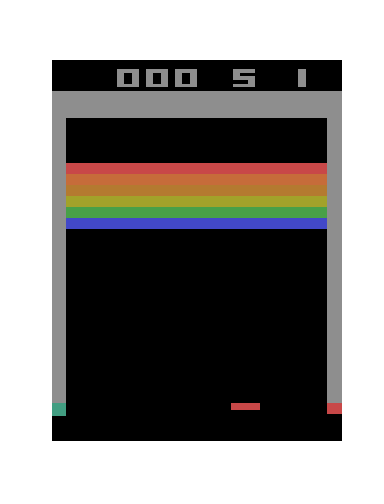
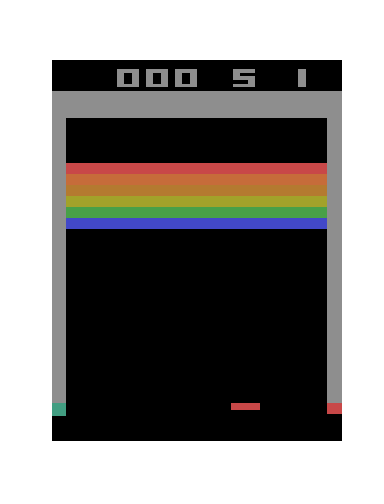
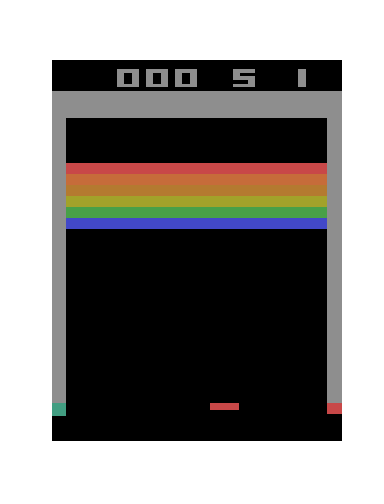
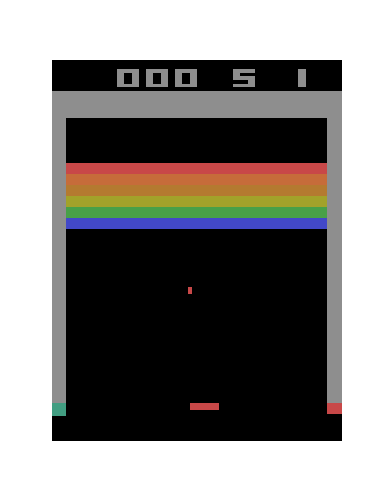
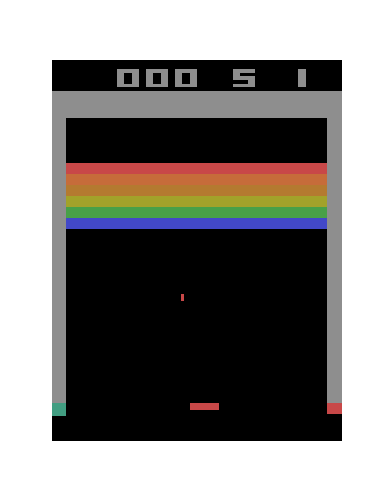
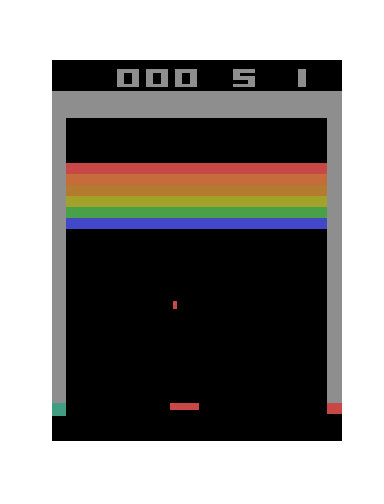
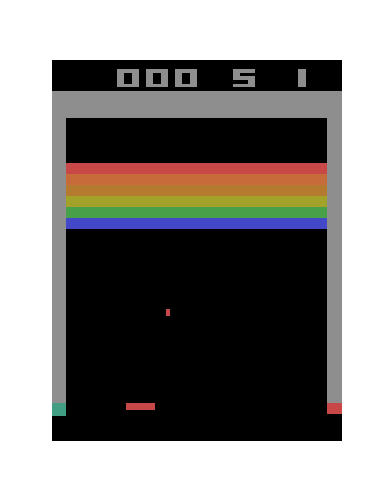
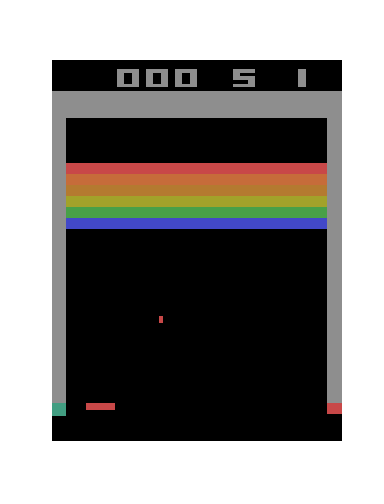
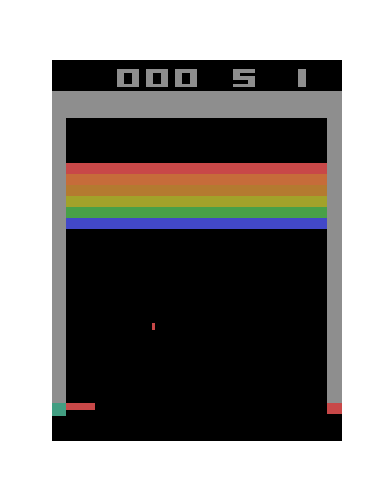
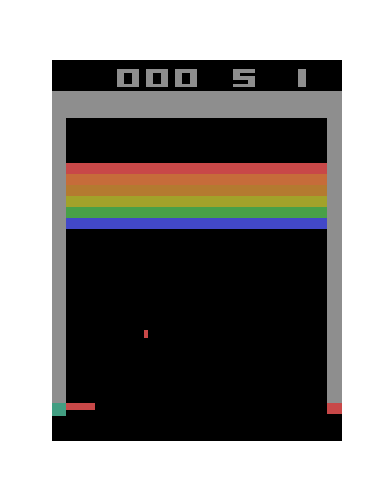
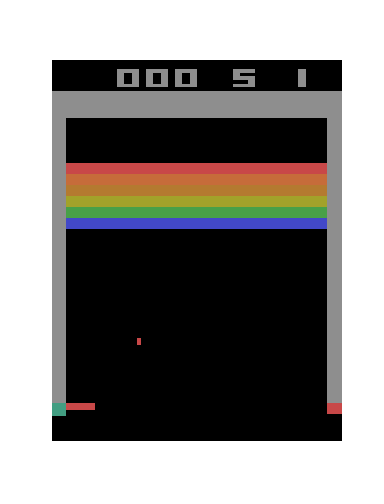
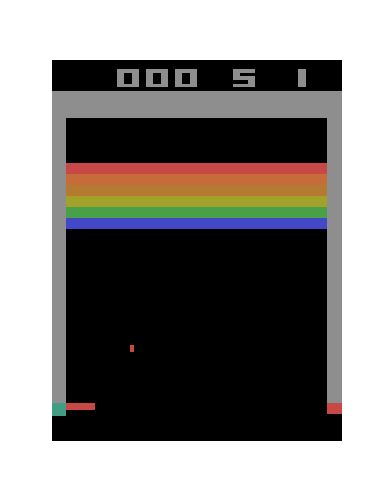
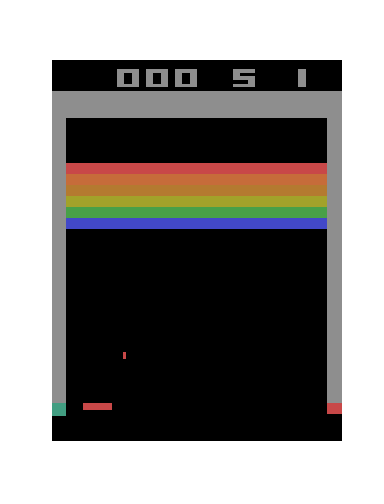
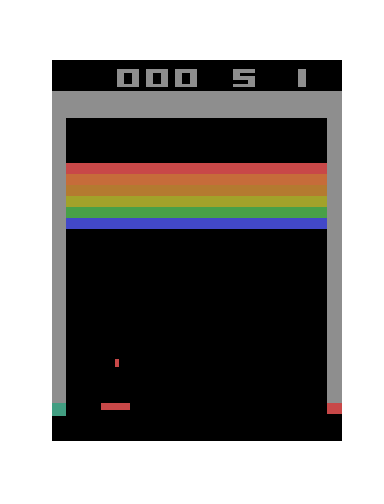
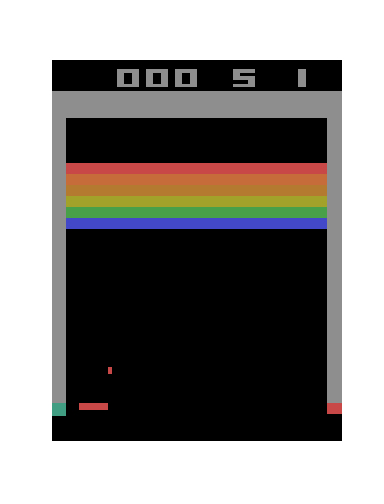
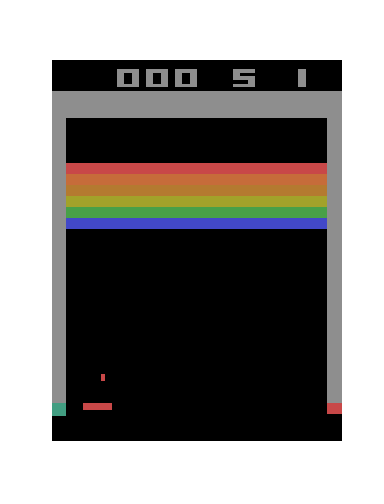
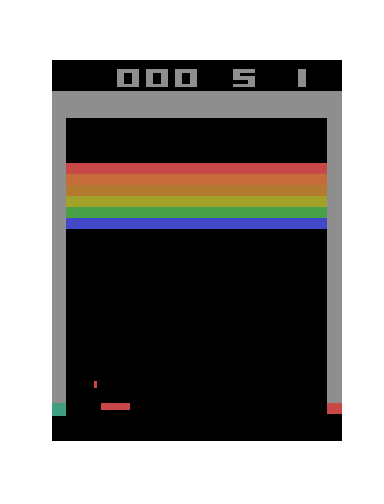
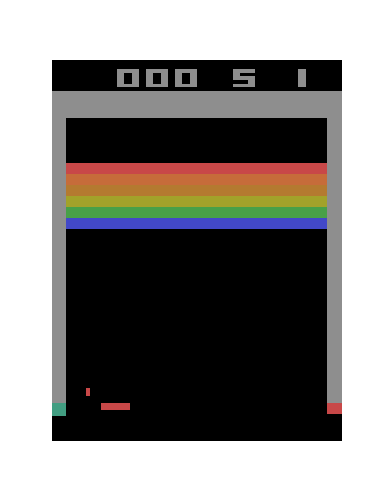
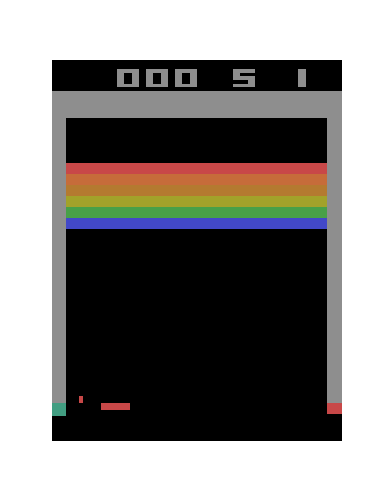
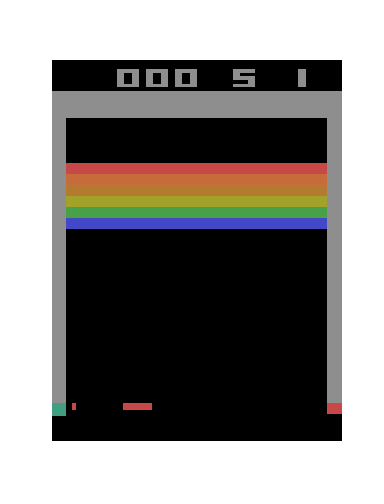
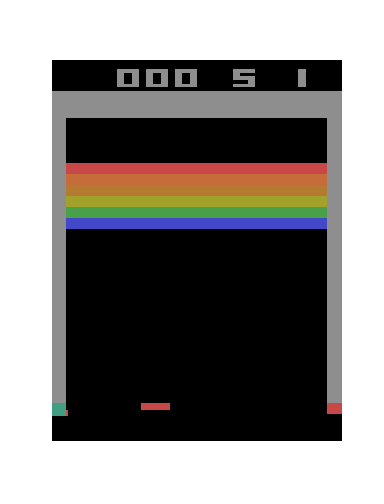
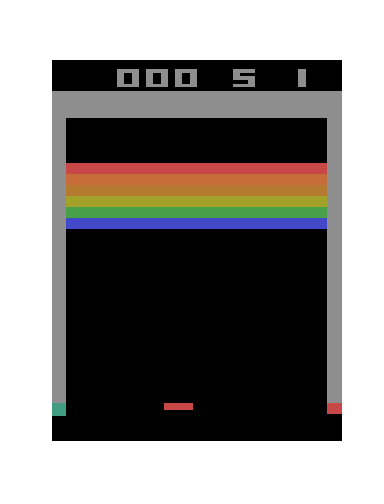
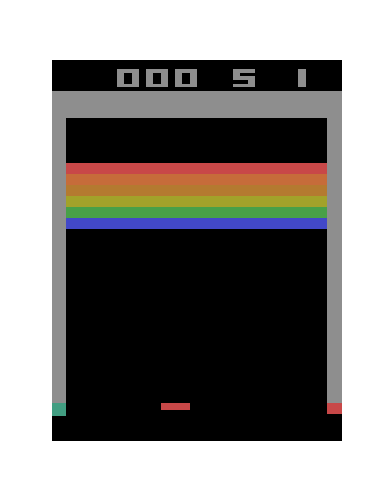
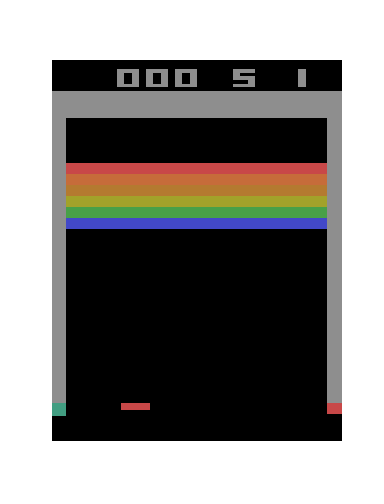
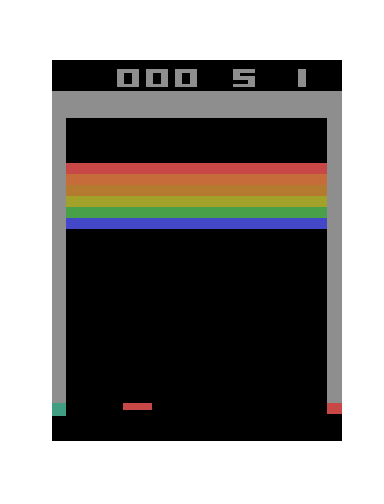
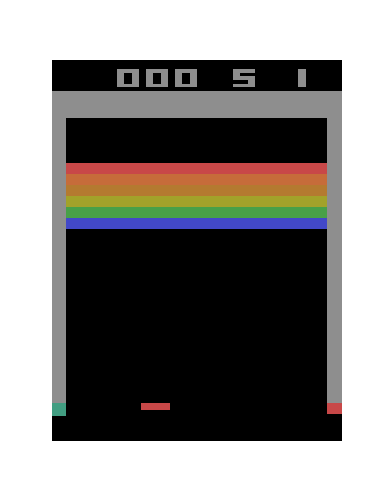
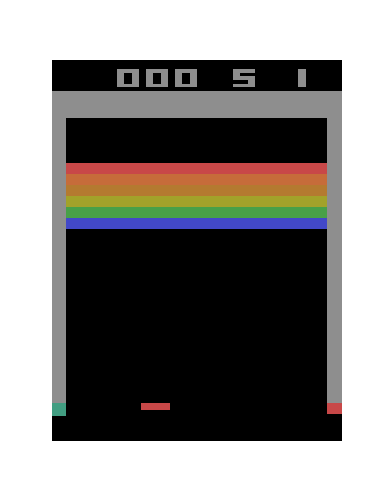
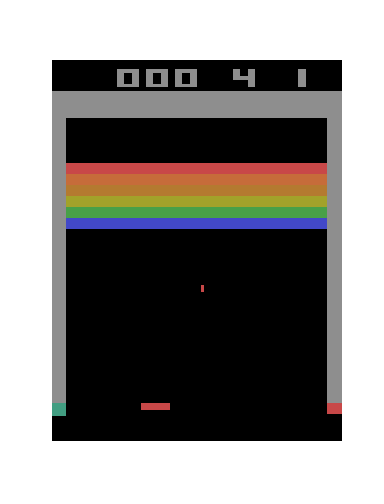
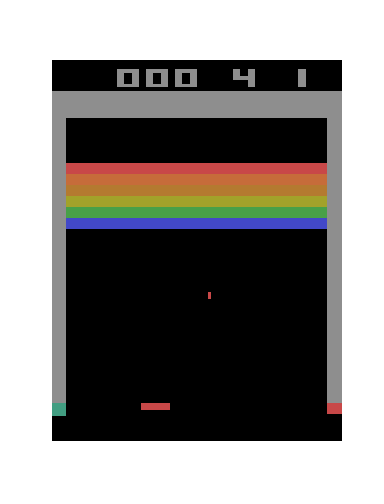
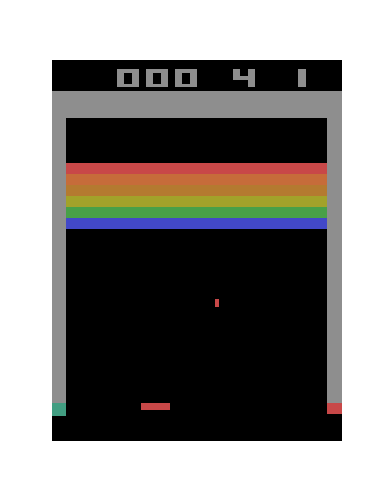
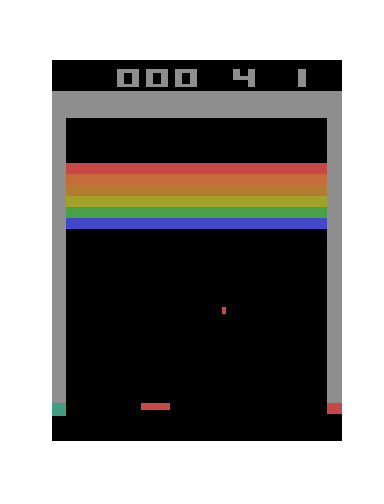
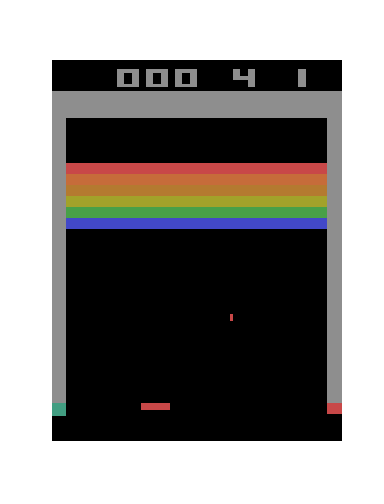
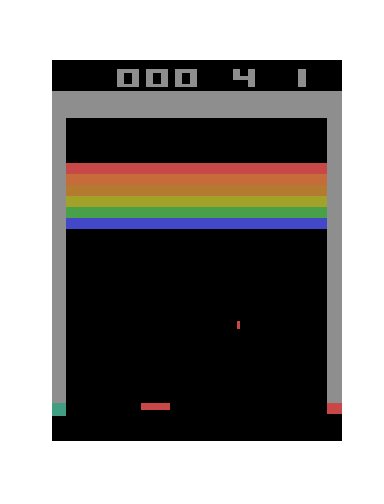
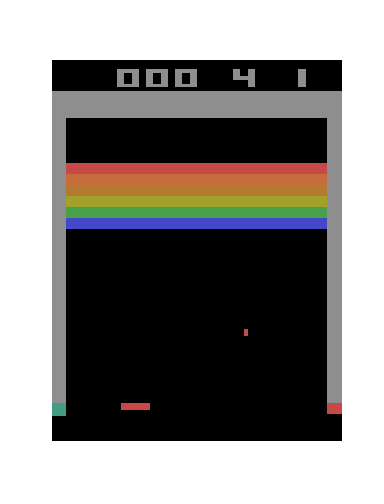
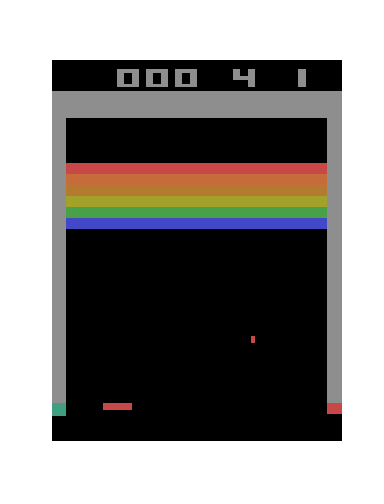
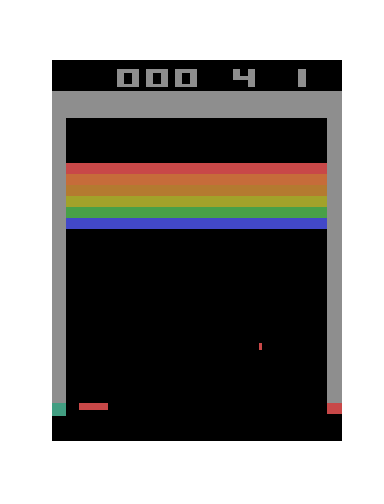
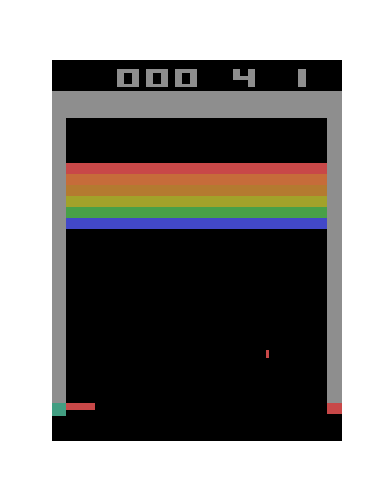
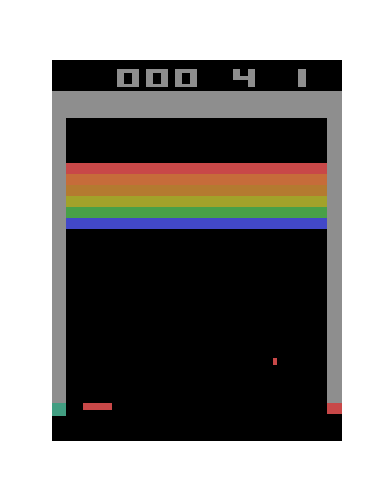
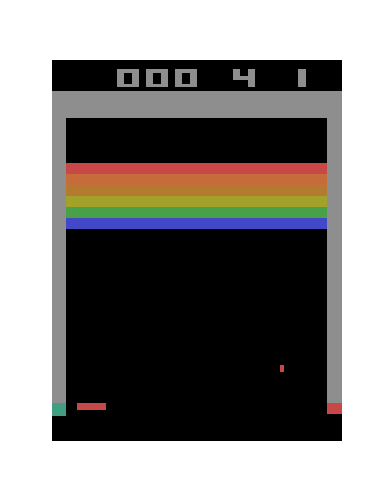
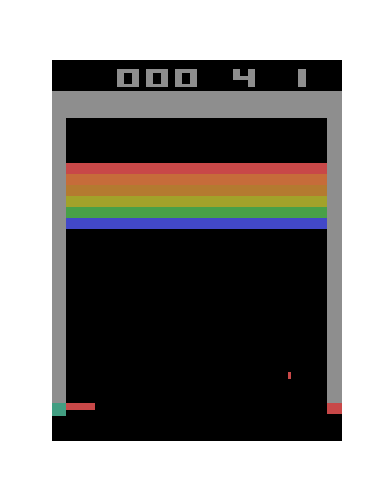
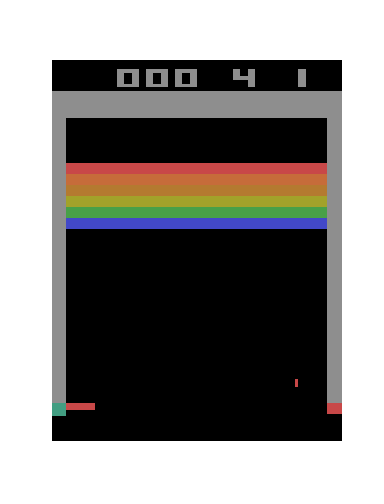
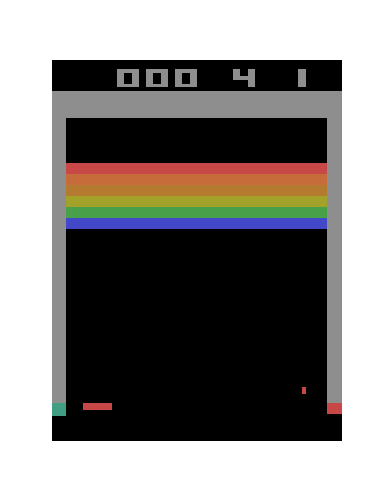
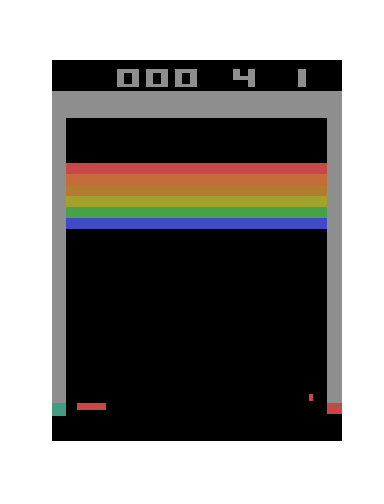
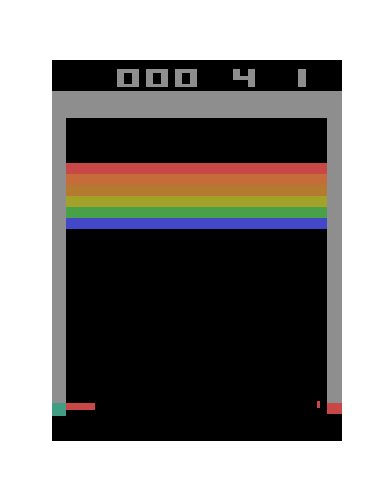
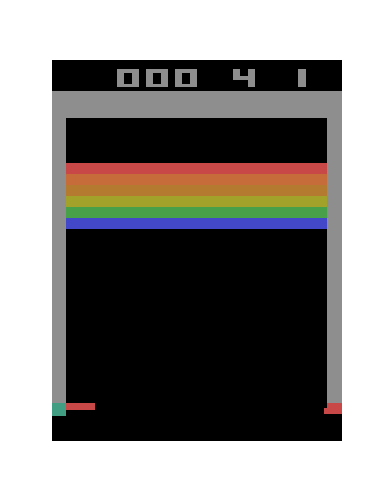
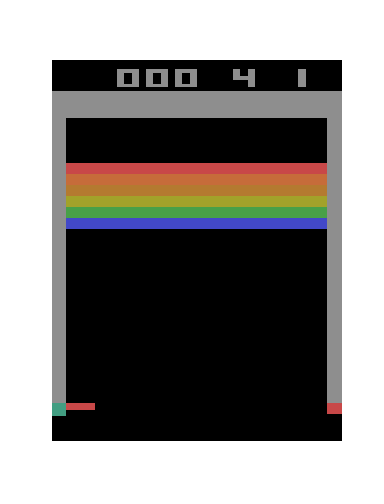
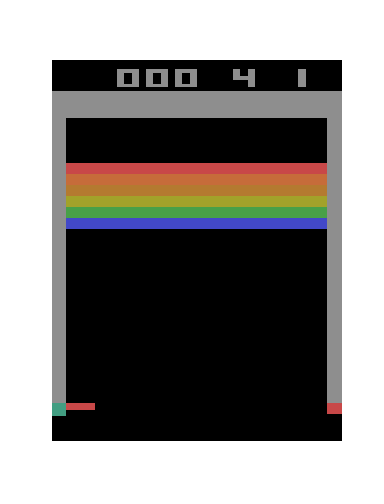
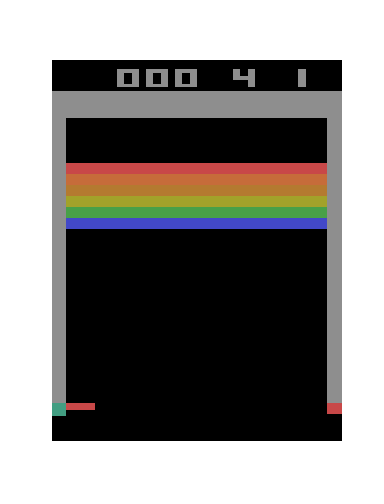
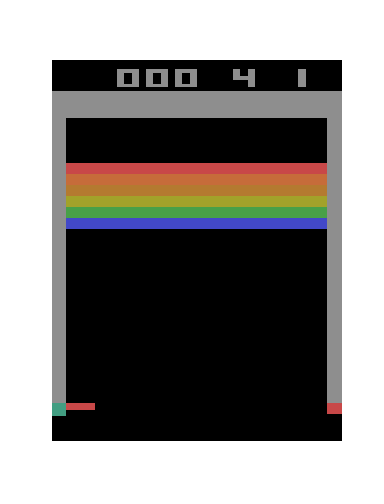
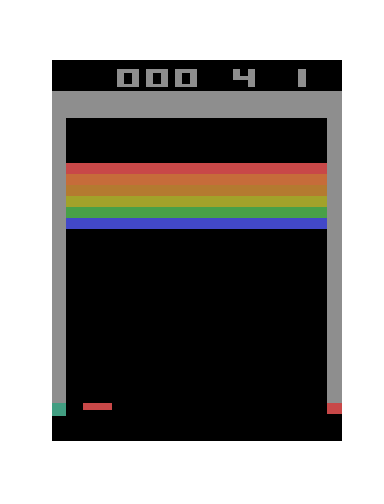
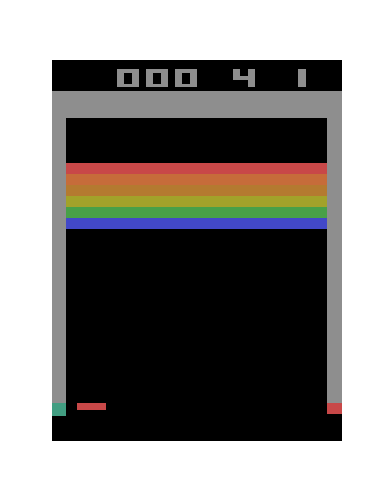
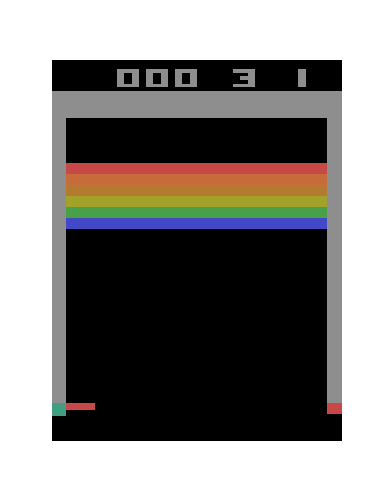
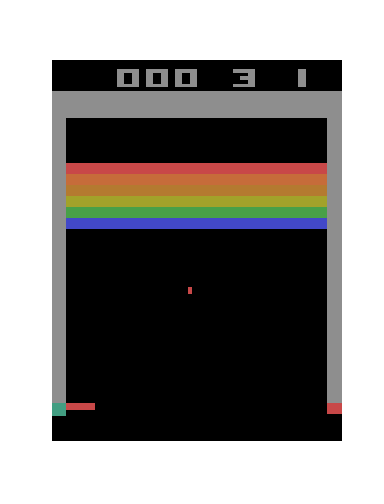
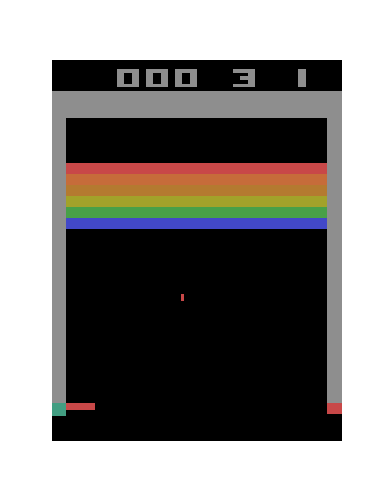
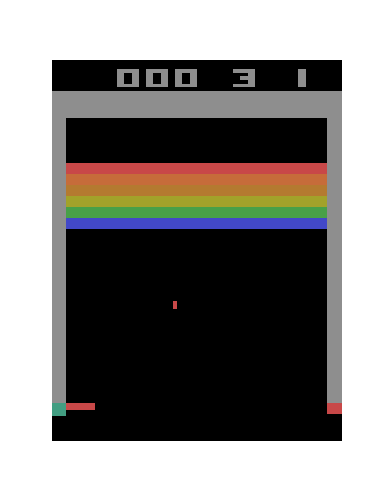
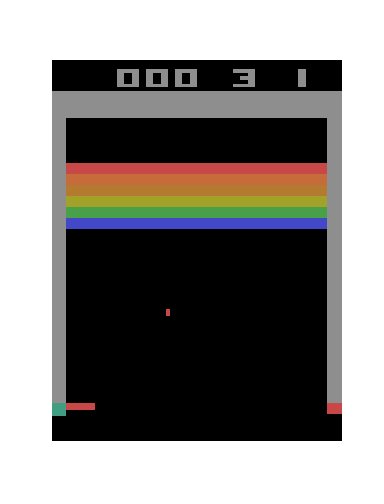
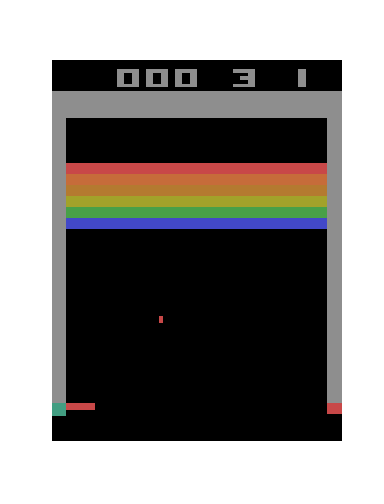
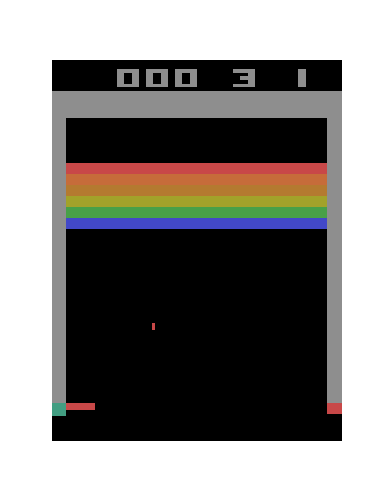
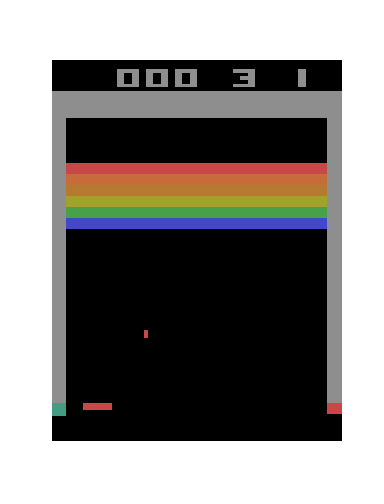
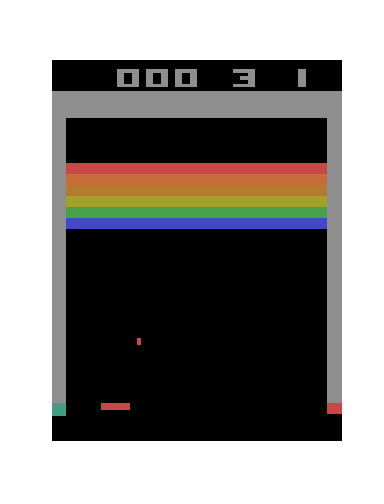
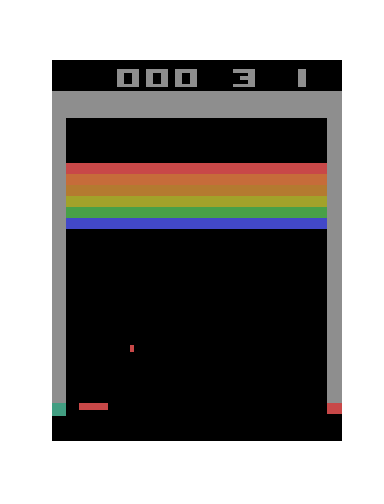
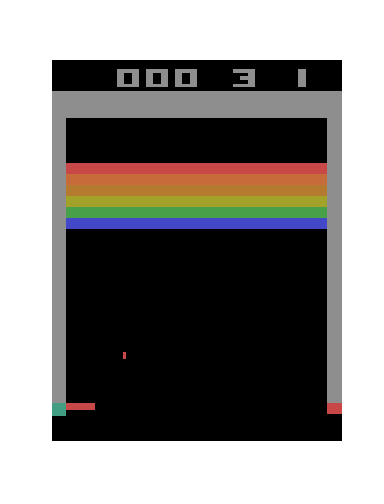
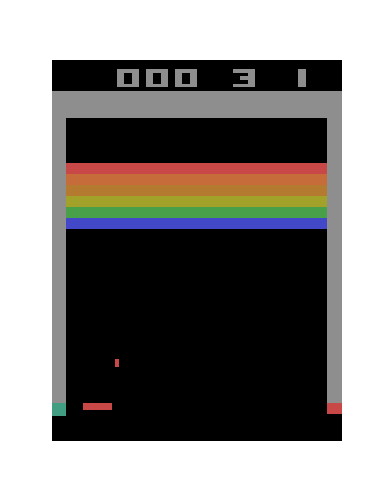
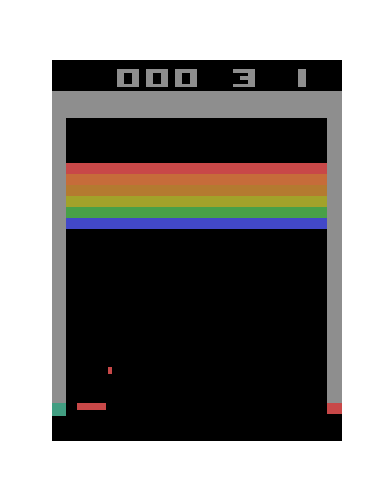
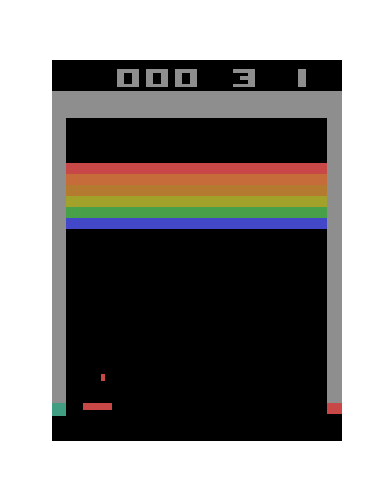
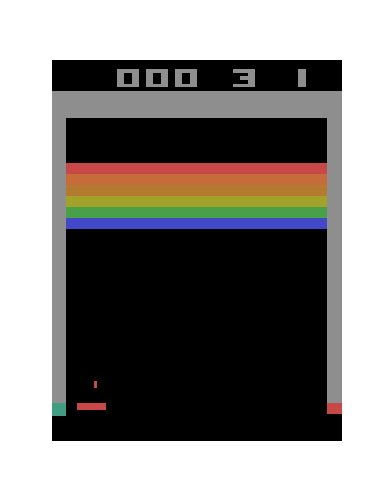
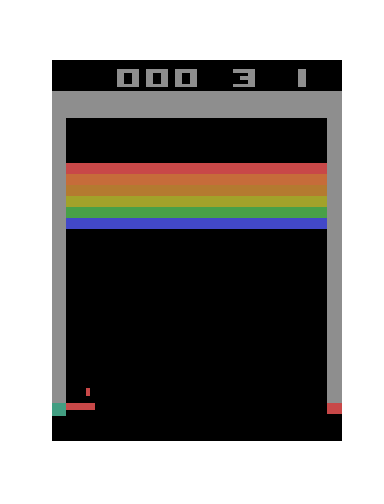
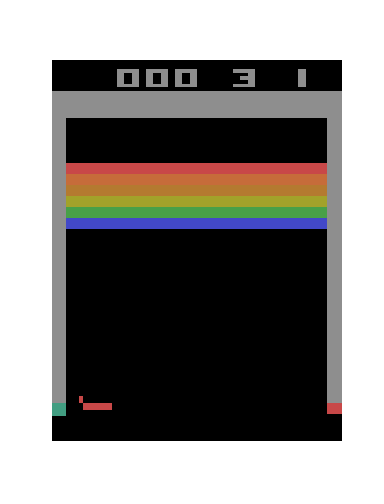
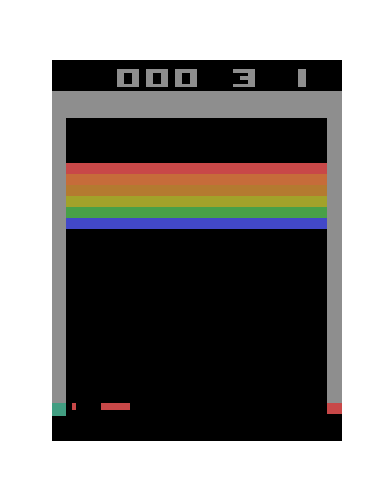
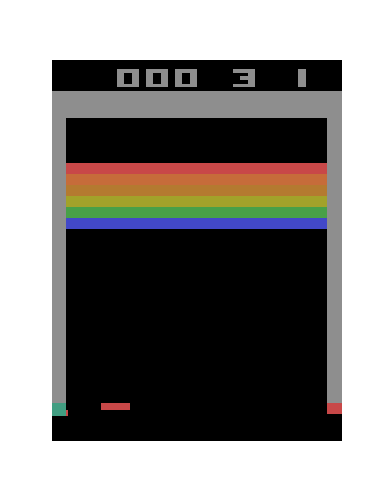
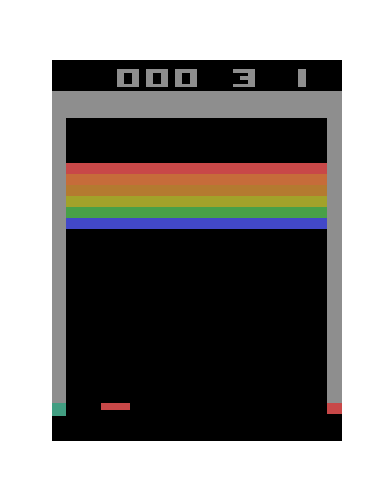
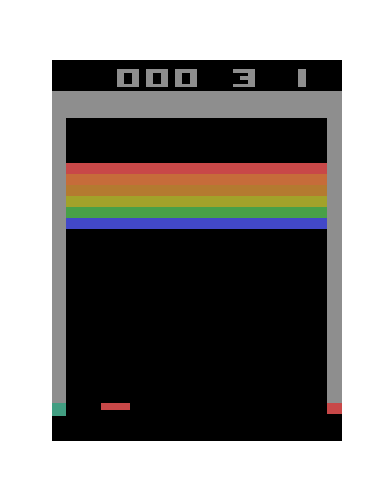
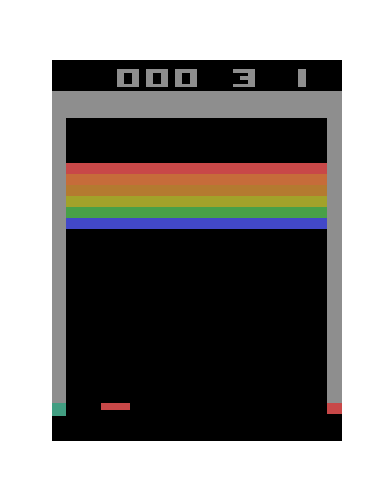
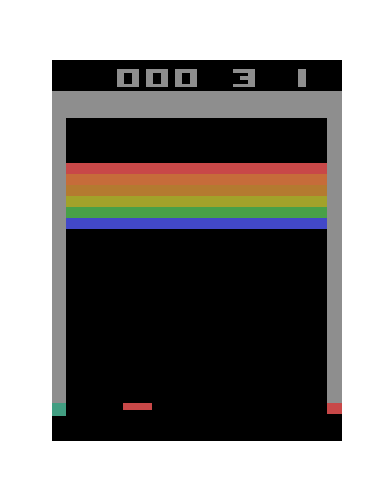
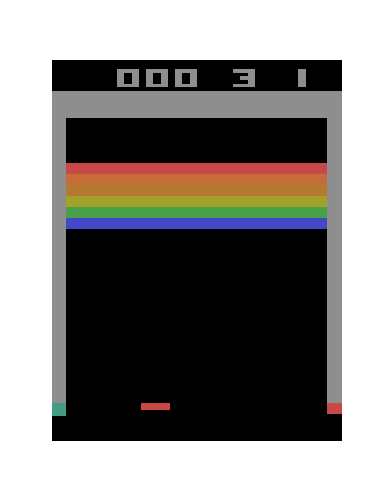
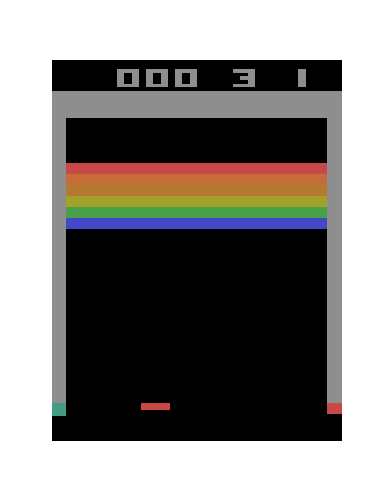
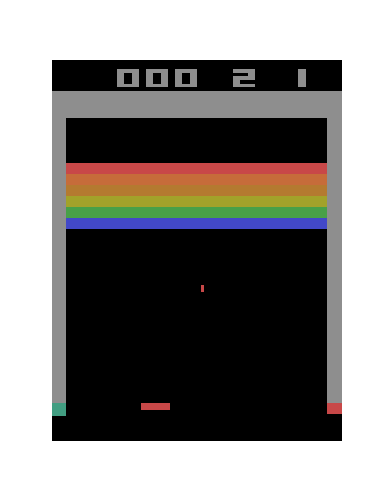
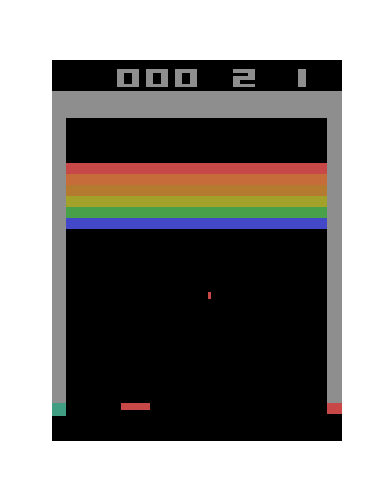
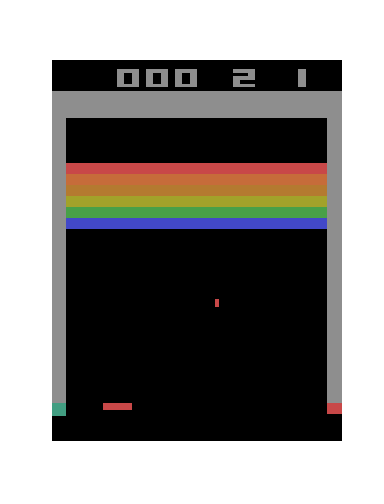
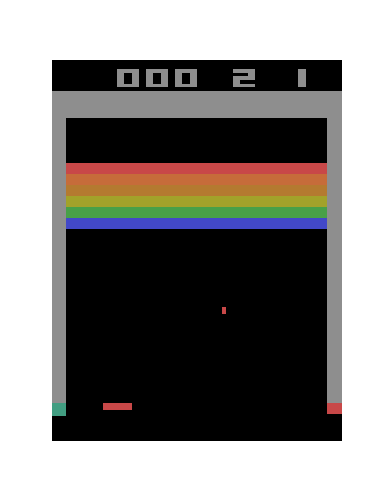
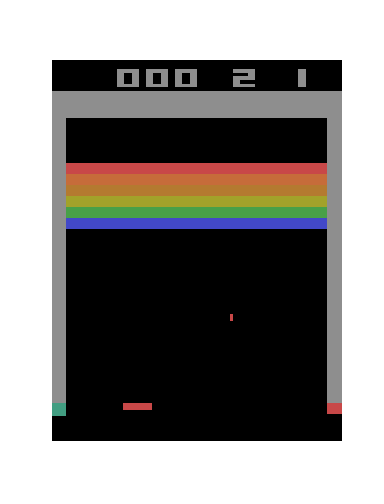
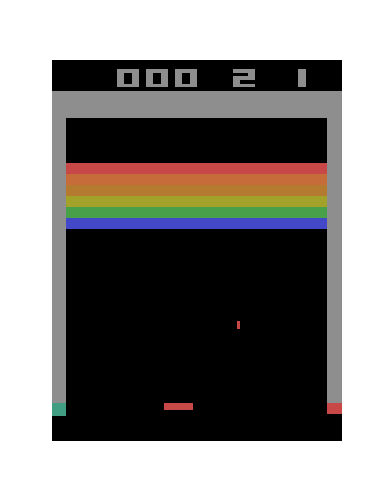
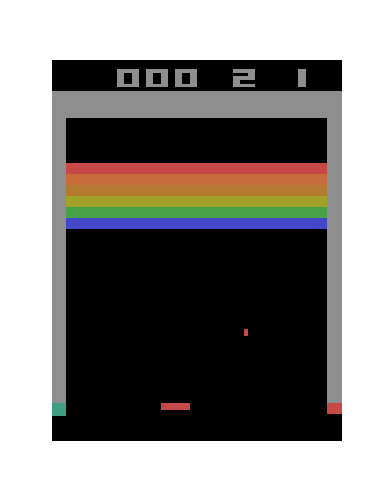
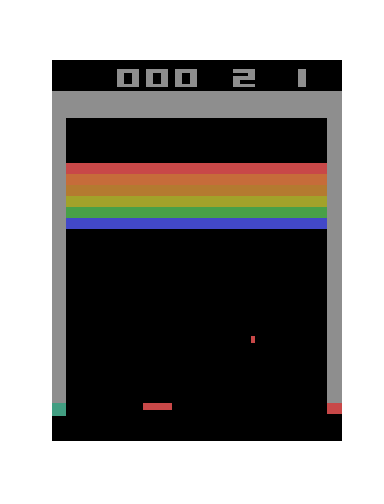
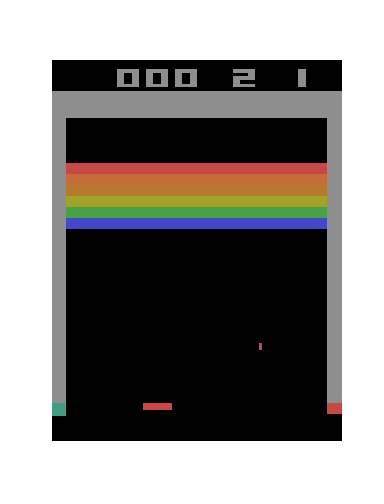
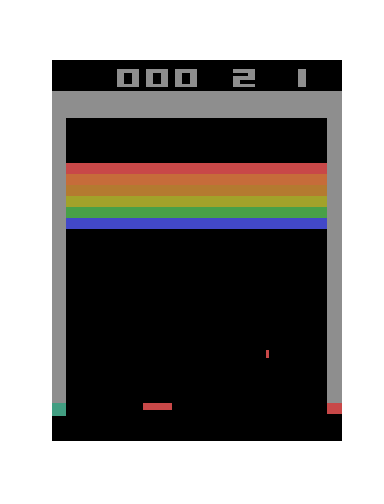
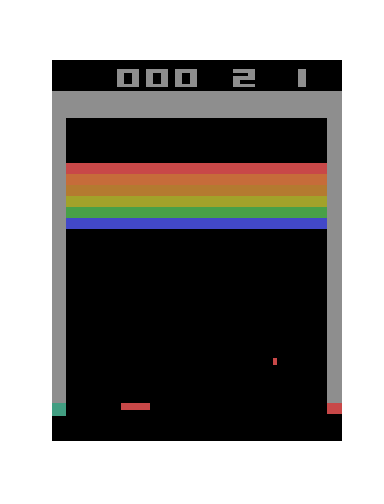
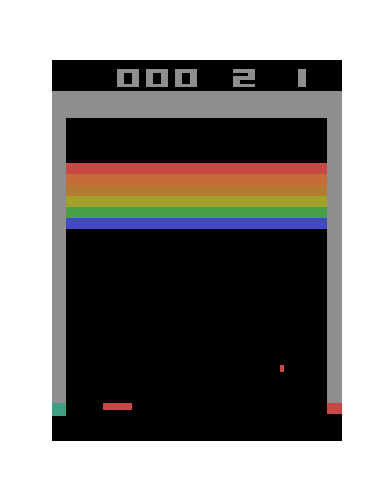
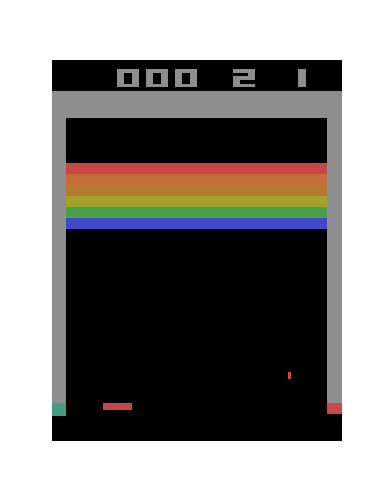
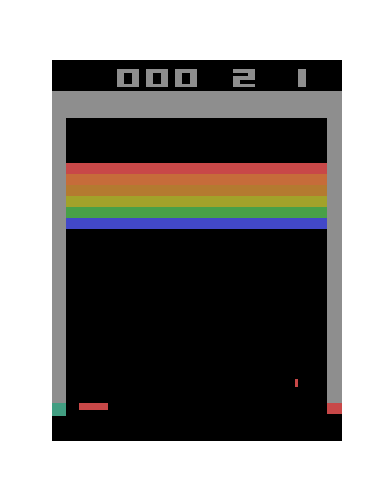
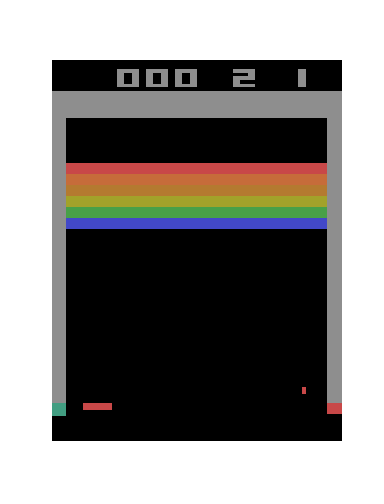
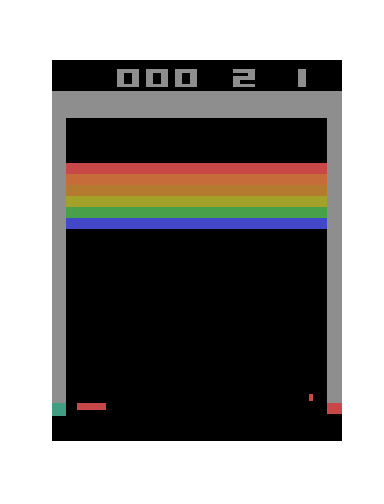
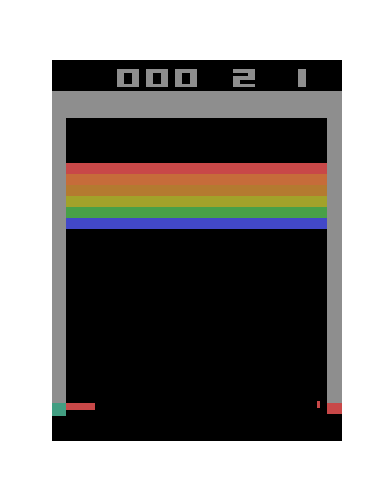
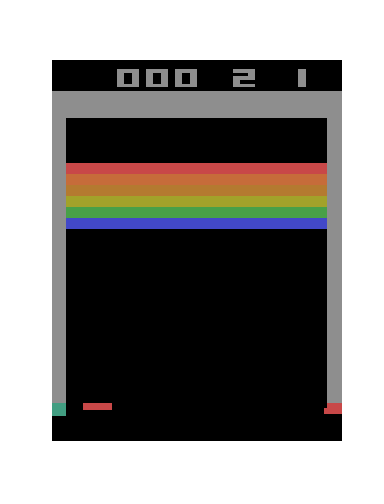
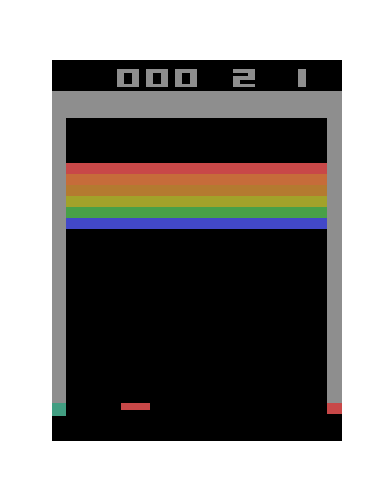
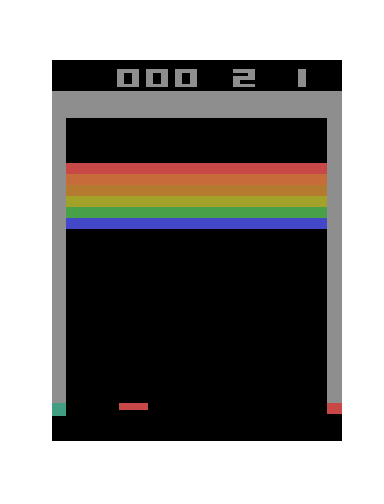
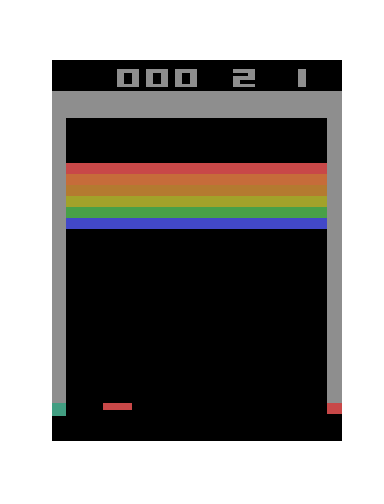
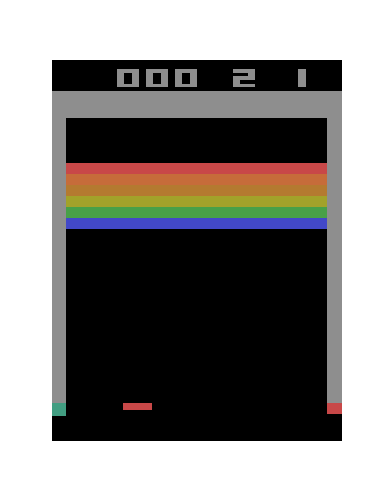
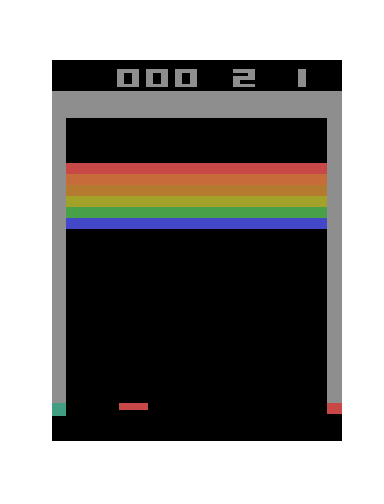
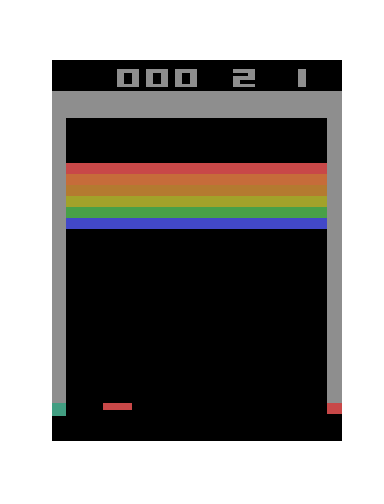
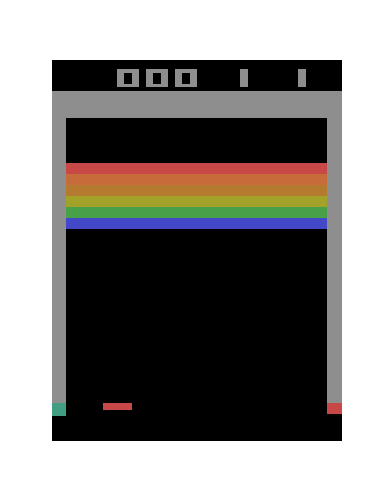
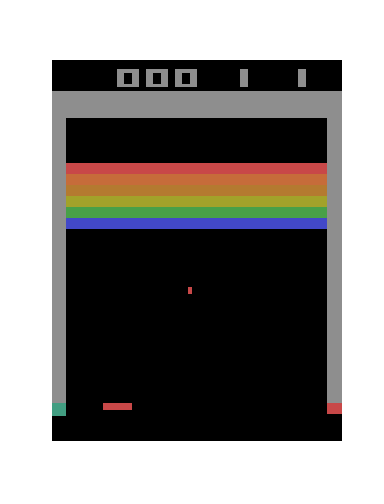
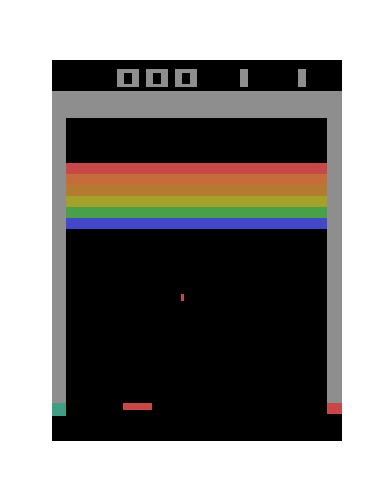
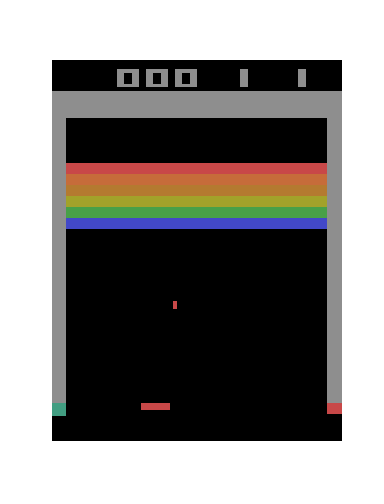
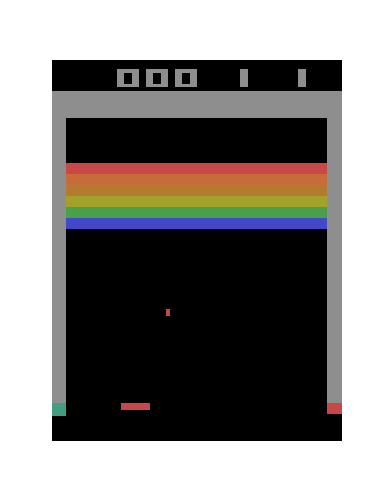
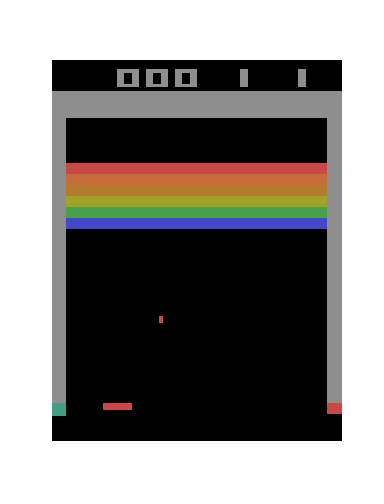
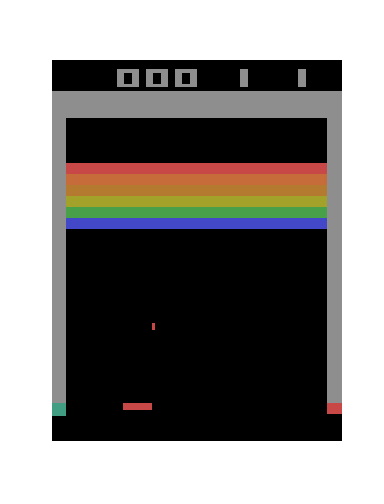
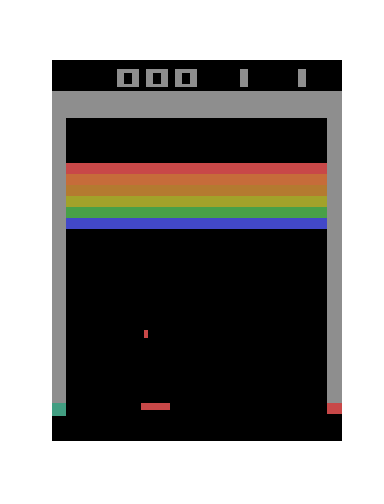
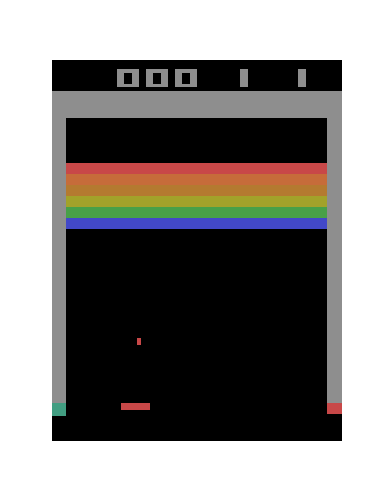
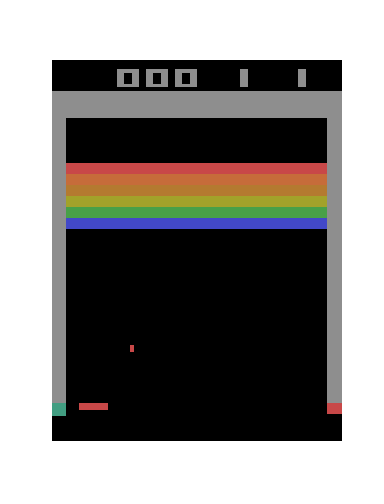
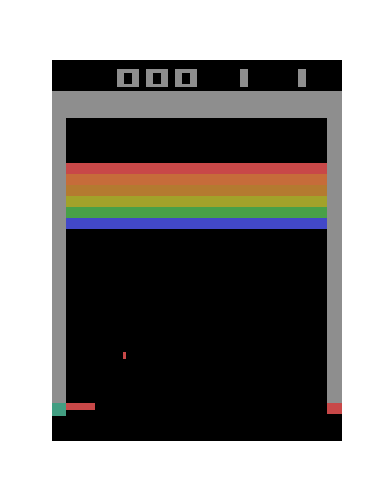
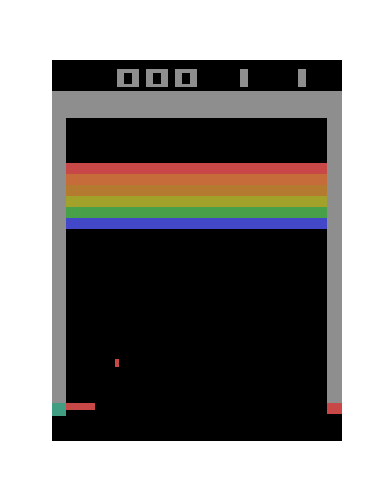
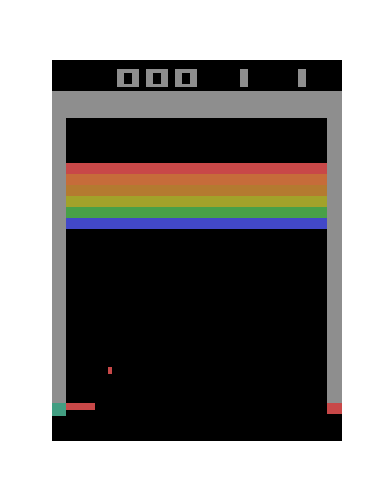
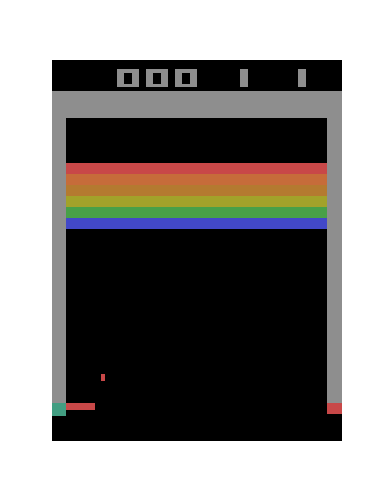
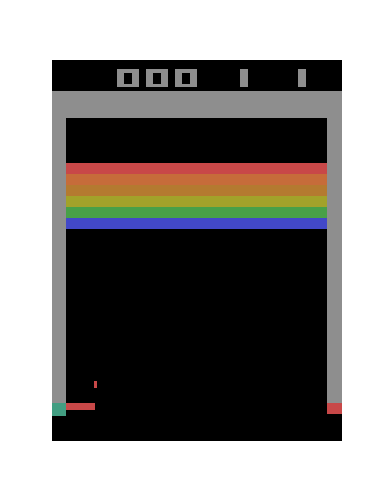
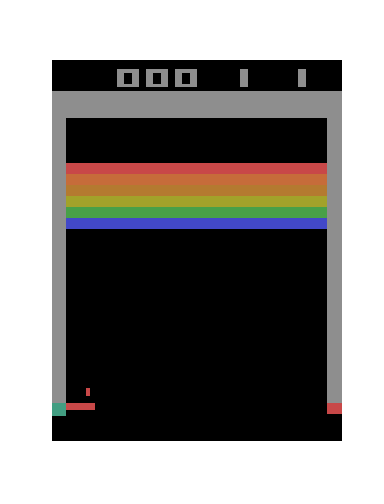
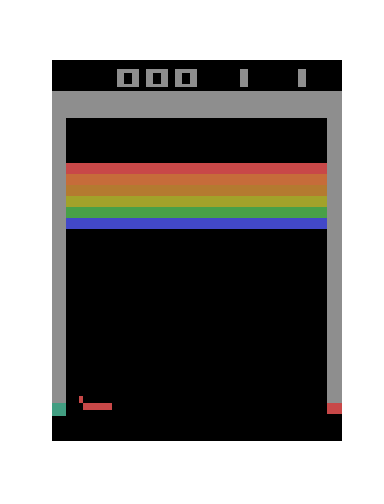
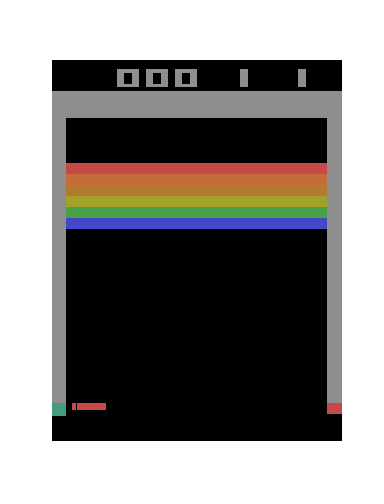
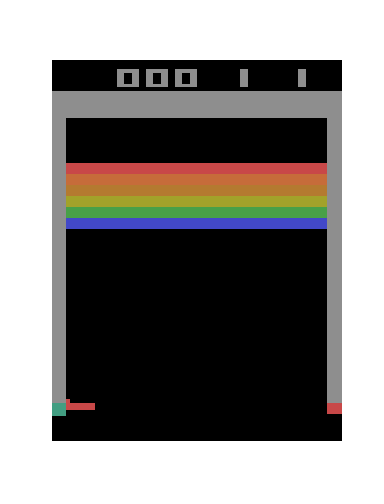
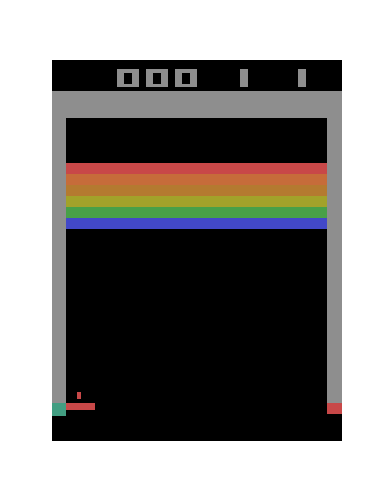
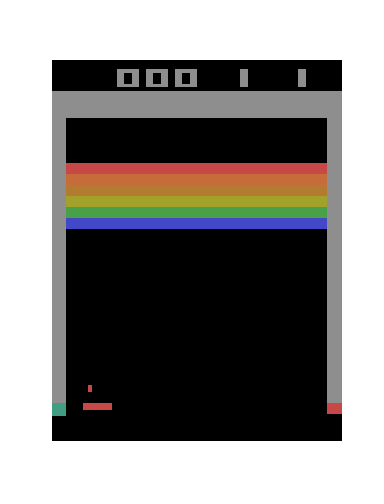
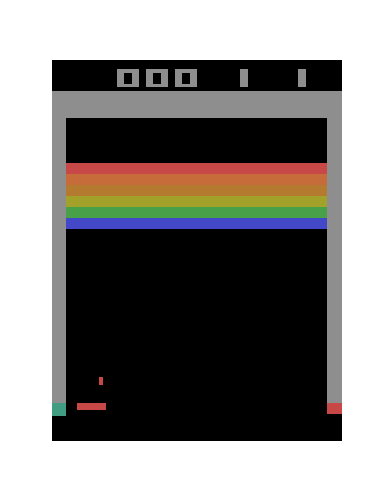
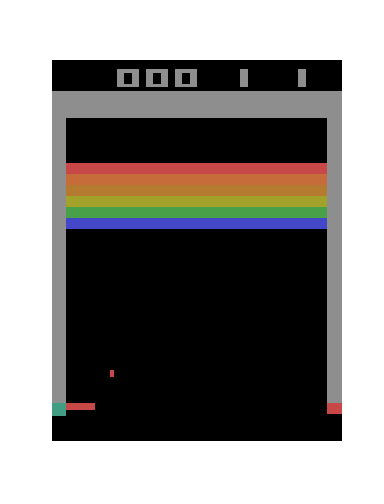
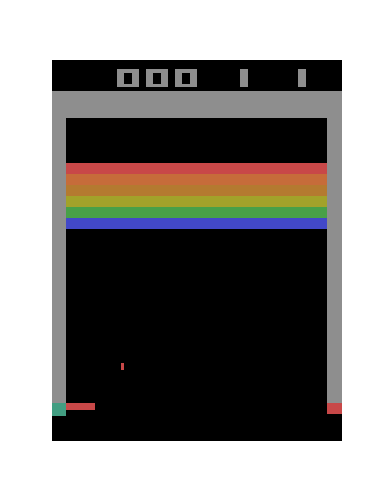
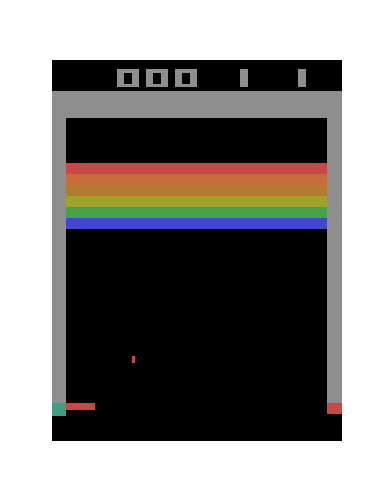
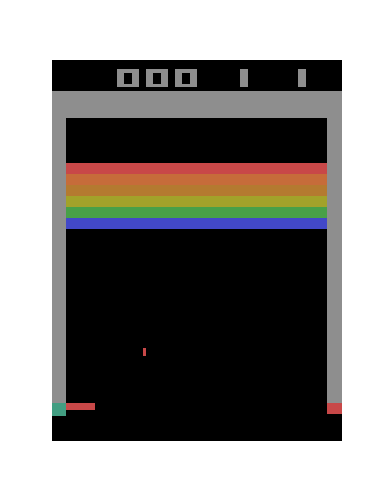
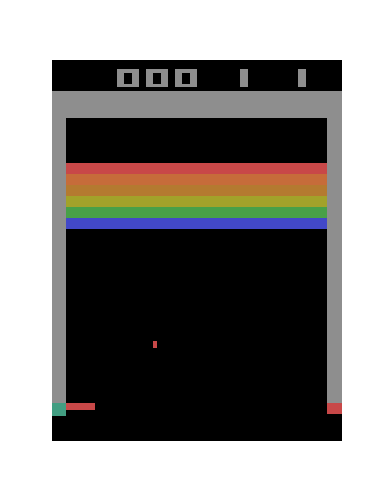
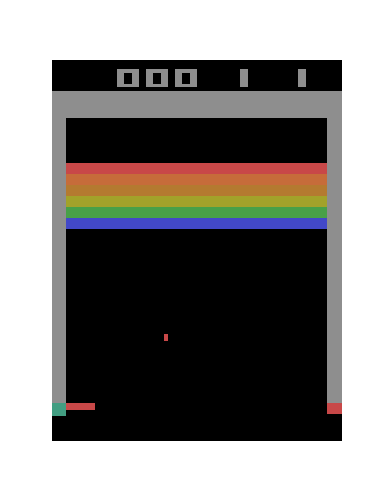
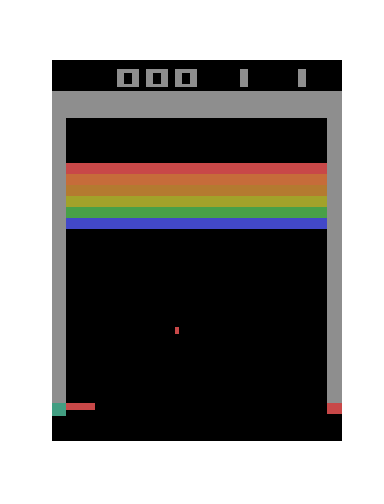
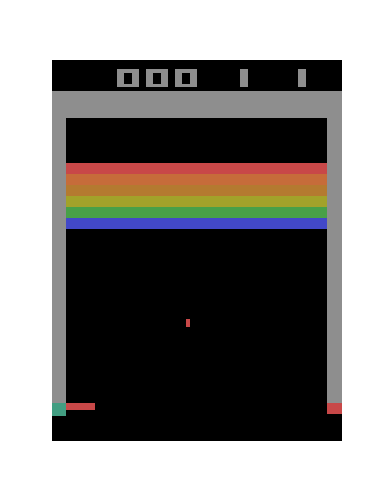
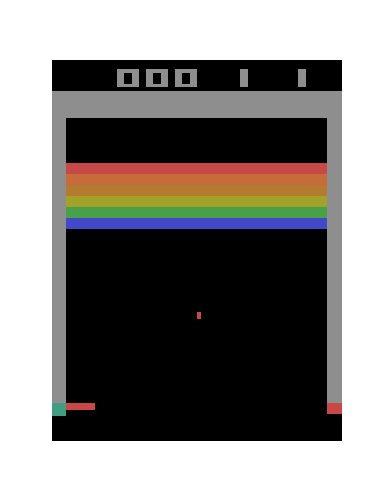
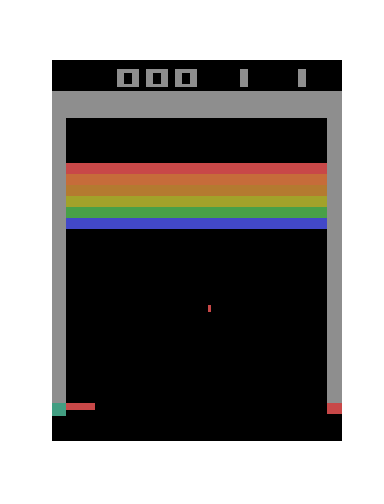
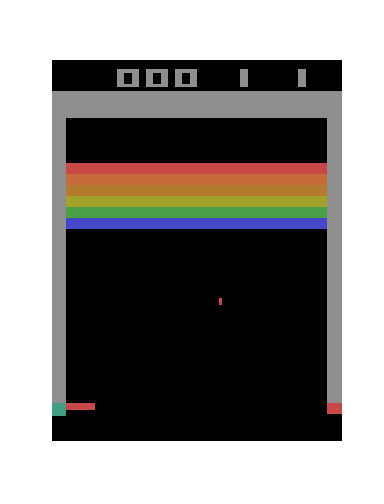
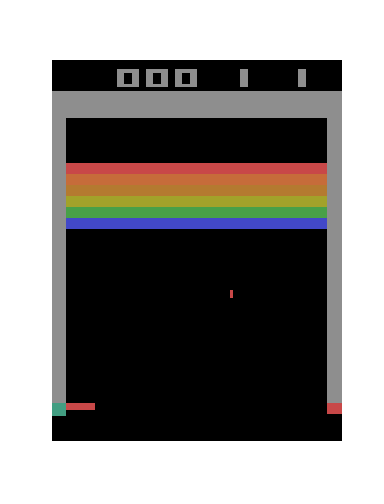
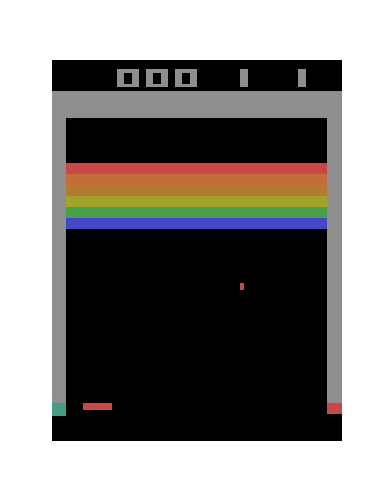
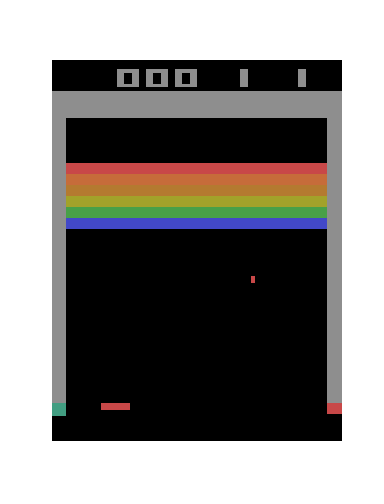
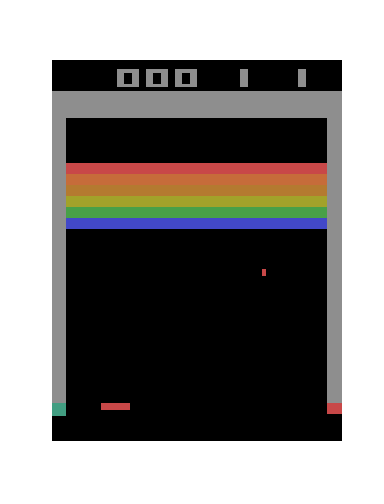
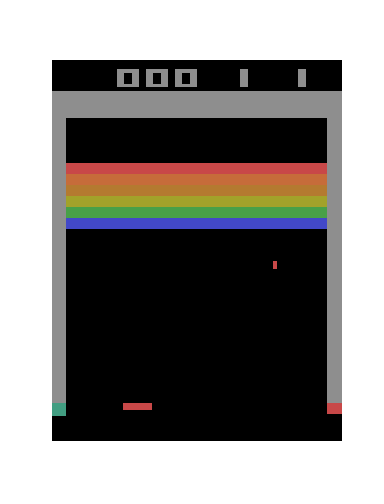
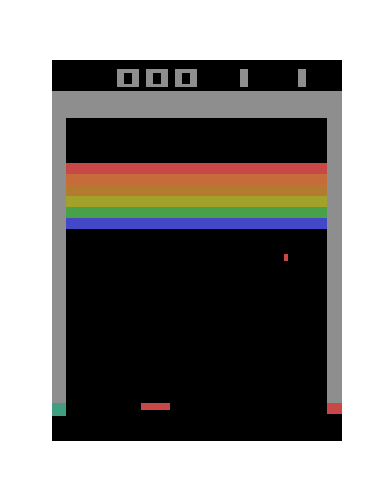
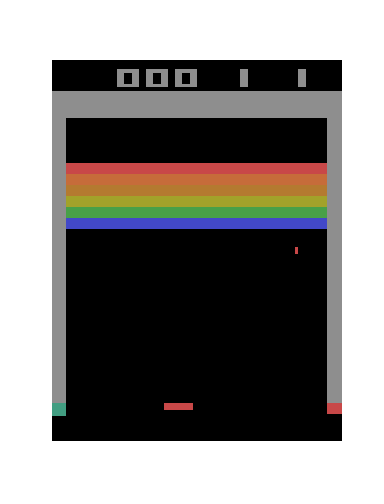
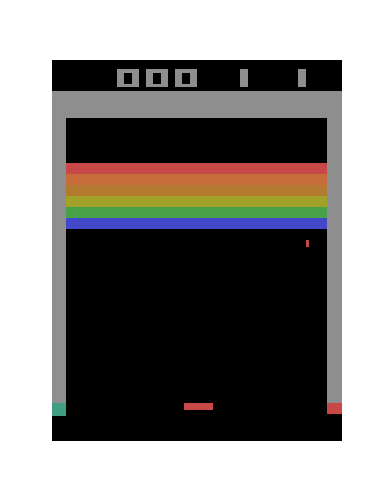
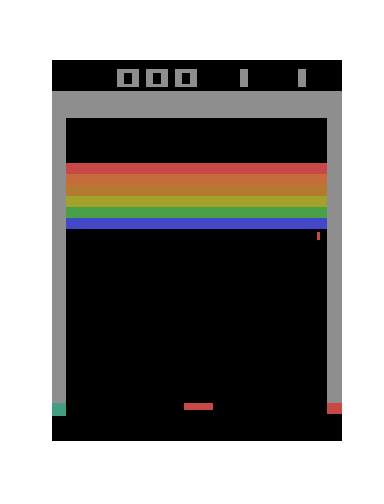
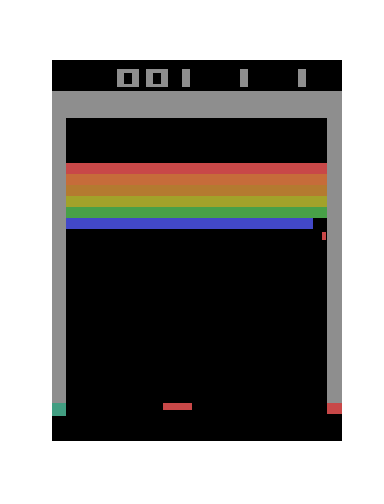
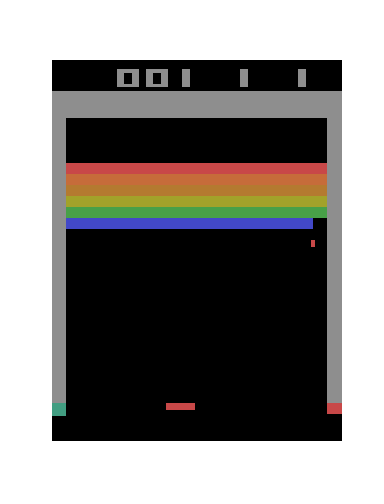
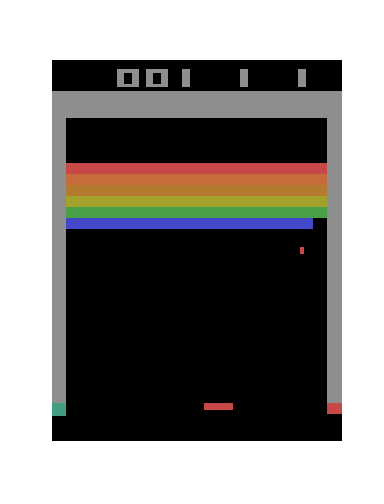
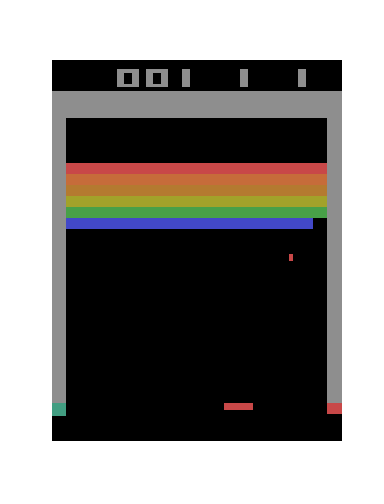
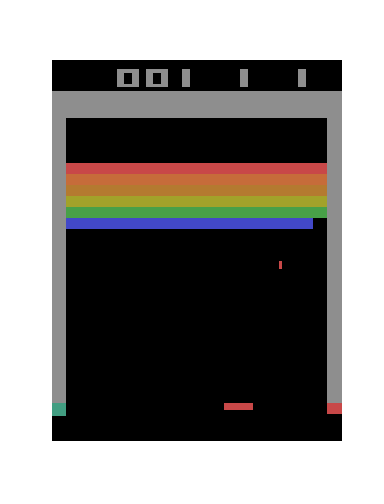
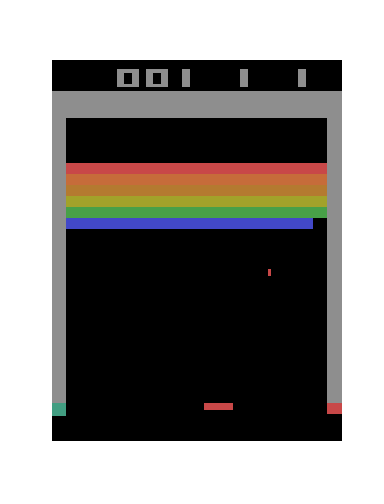
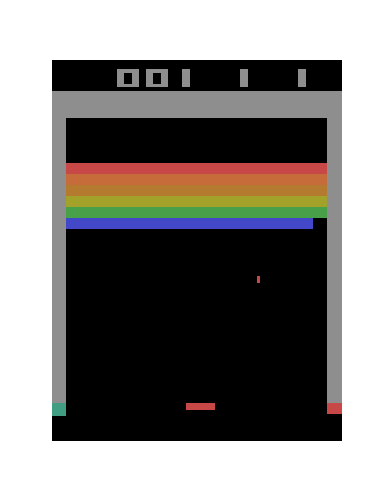
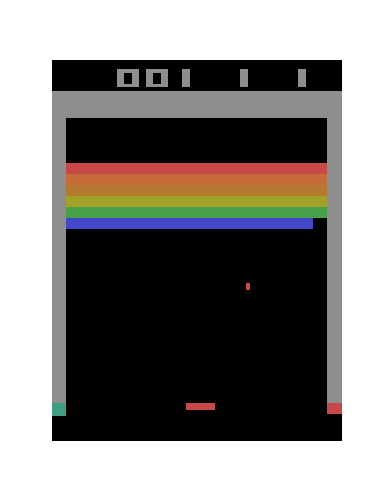
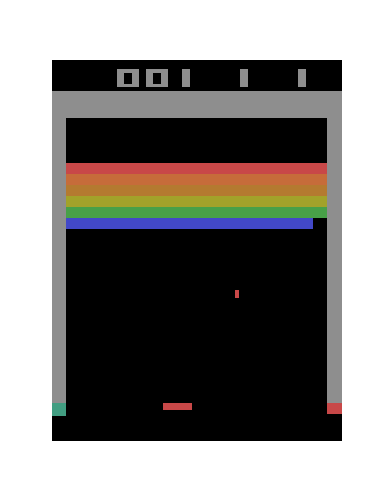
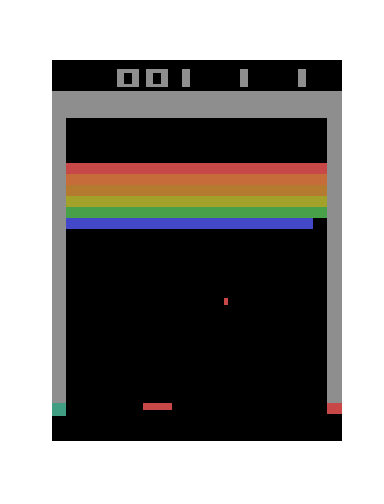
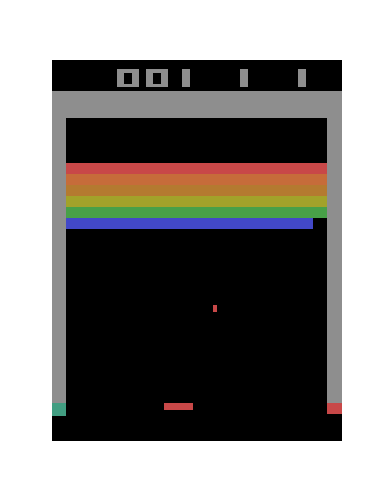
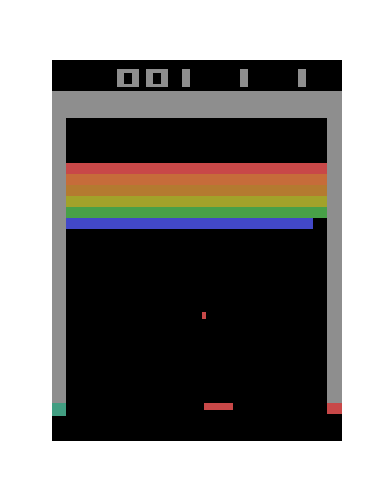
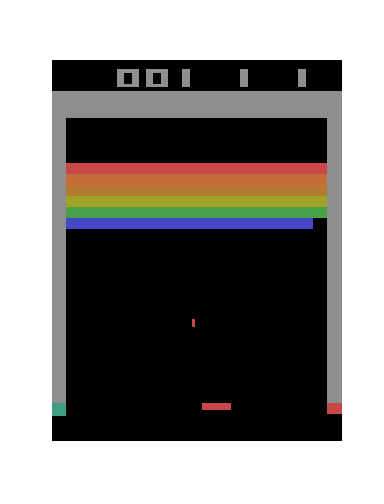
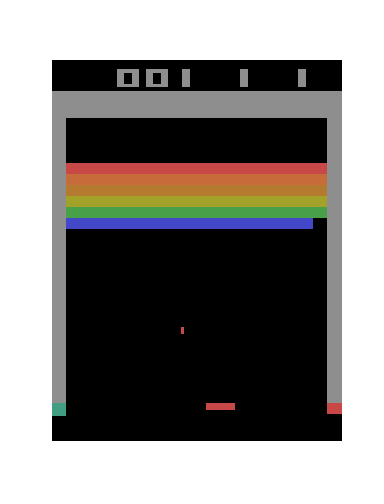
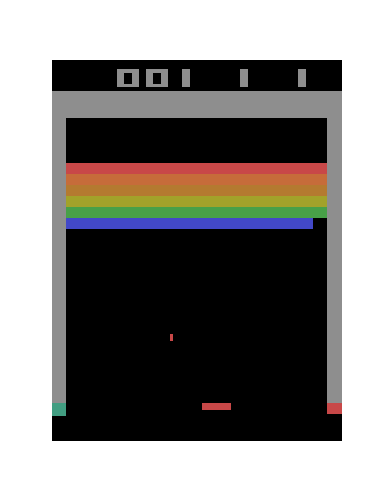
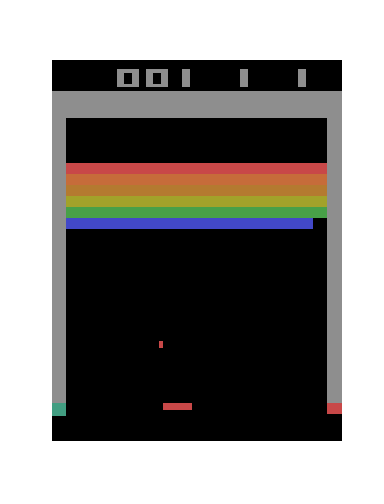
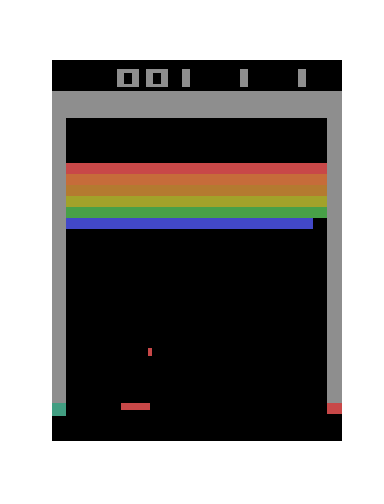
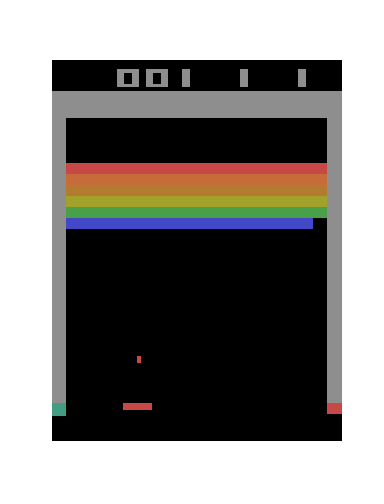
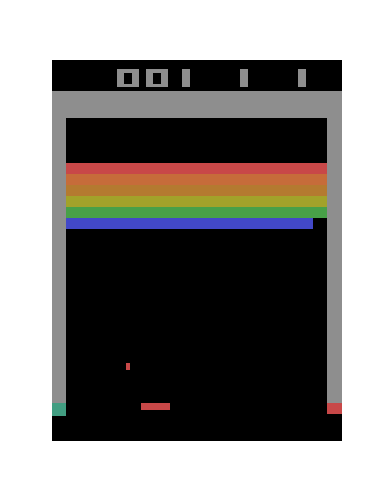
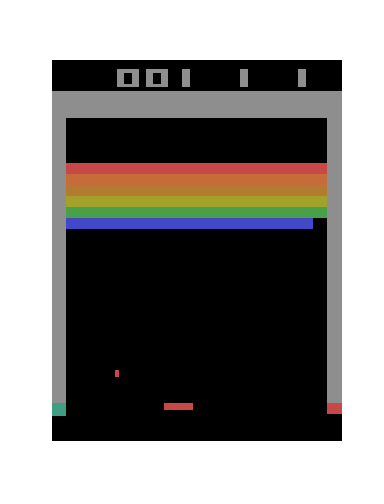
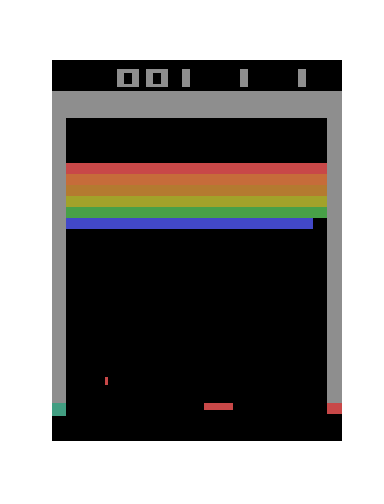
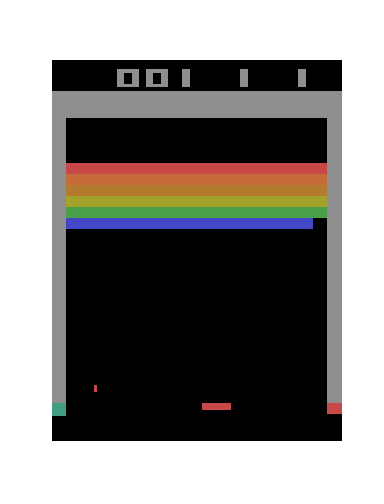
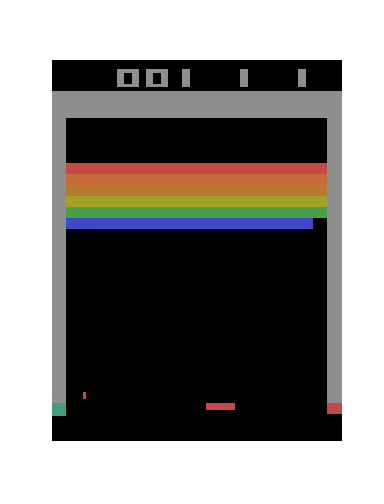
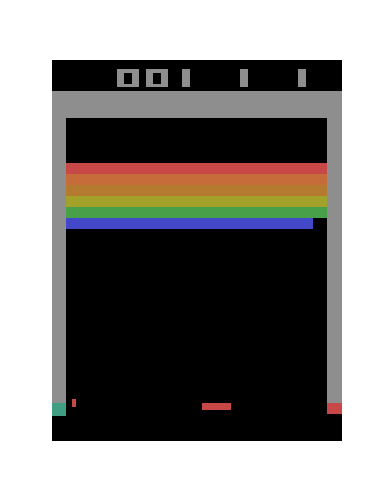
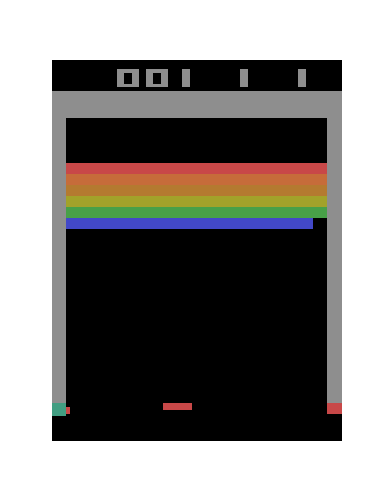
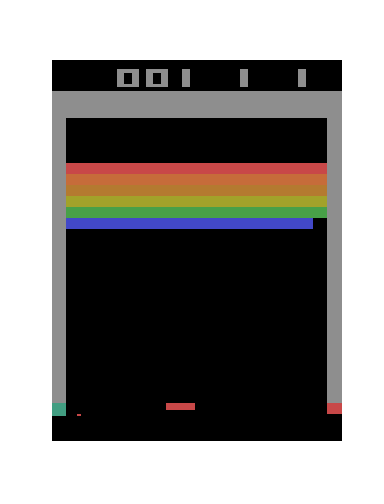
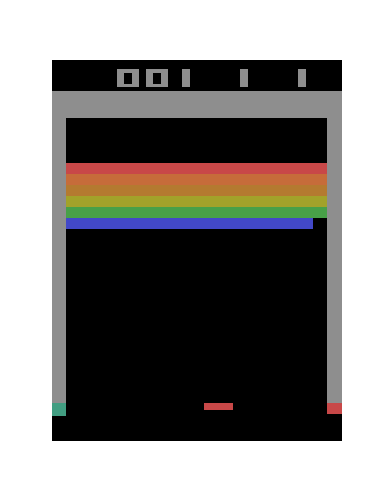
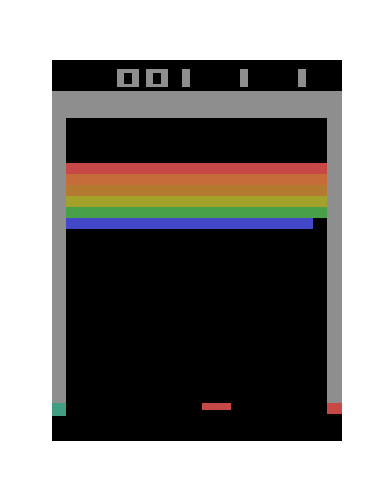
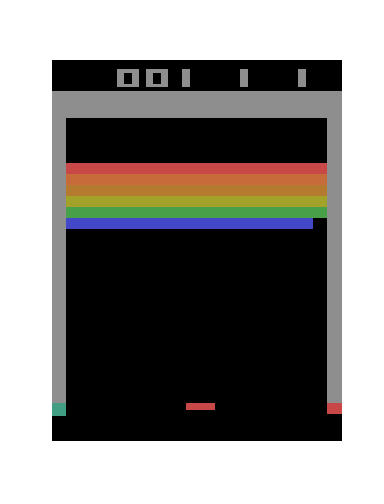
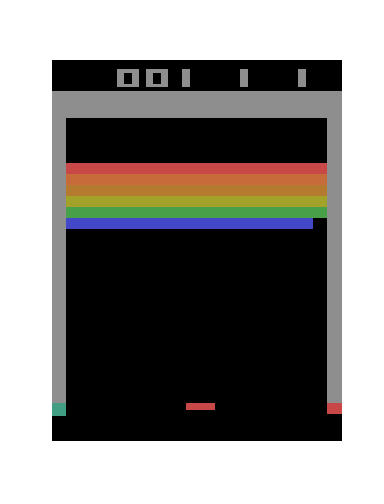
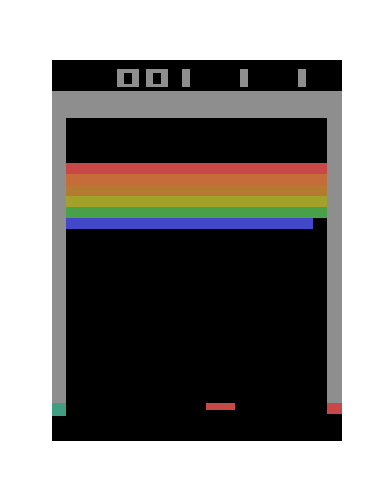

In [3]:
import gym

env = gym.make('BreakoutDeterministic-v4')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
done=False
while not done:
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

display_frames_as_gif(frames)

### Hyperparameters

In [4]:
from collections import deque

env = gym.make('BreakoutDeterministic-v4')
state_size = env.observation_space.shape
action_size = env.action_space.n

input_shape = (84, 84, 4)
batch_size = 32

learning_rate = 0.001
gamma = 0.99

sum_q_max, sum_loss = 0, 0

# parameters about epsilon
exploration_rate_max, exploration_min = 1.0, 0.1
exploration_rate = exploration_rate_max

final_exploration_frame = 1000000
memory = deque(maxlen=10000)
n_stacked_frames = 4

# model
target_model = None
target_model_update_iteration = 10000

### Preprocessing

In [5]:
from PIL import Image
#INPUT_SHAPE = (84, 84, 4)


def preprocess(img):
    img_pil=Image.fromarray(img)
    #Downsample
    preprocessed_img_pil=img_pil.resize((84,84))
    #Convert to grayscale
    preprocessed_img_pil=preprocessed_img_pil.convert("L")
    #To Numpy array
    preprocessed_img=np.array(preprocessed_img_pil)
    #Change datatype to save storage space
    preprocessed_img=preprocessed_img.astype("uint8")
    #print(preprocessed_img.shape)
    preprocessed_img=np.reshape(preprocessed_img, (1,) + preprocessed_img.shape)

    return preprocessed_img

<img src="breakout_before_preprocess.gif" style="width:300px" align="left">
<img src="breakout_preprocessed.gif" style="width:300px;">


## Exploration

In [6]:
def update_epsilon(iteration):
    a = (exploration_rate_max - exploration_min) / final_exploration_frame
    b = exploration_rate_max
    exploration_rate = np.max([b - a * iteration, exploration_min])

In [7]:
def act(state, global_step):
    if (np.random.uniform() < exploration_rate or global_step<=replay_start_step):
        return np.random.random_integers(0, action_size - 1)
    q_values = model.predict([state, np.ones(action_size).reshape(1, action_size)])
    return np.argmax(q_values)

## Experience Replay
### Remember


In [8]:
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

### Replay

In [9]:
import random
import numpy as np

def sample_train_batch():
    history = np.zeros(((batch_size,) + input_shape))
    next_history = np.zeros(((batch_size,) + input_shape))
    action = np.zeros((batch_size,), dtype="uint8")
    reward = np.zeros((batch_size,), dtype="uint8")
    done = np.zeros((batch_size,), dtype="bool")

    sample_batch = random.sample(memory, batch_size)
    for i in range(batch_size):
        history[i] = sample_batch[i][0]
        next_history[i] = sample_batch[i][3]
        action[i] = sample_batch[i][1]
        reward[i] = sample_batch[i][2]
        done[i] = sample_batch[i][4]

    return history, next_history, action, reward, done


In [10]:
from keras.utils import to_categorical
 
def train_replay(iteration):

    if len(memory) < batch_size:
        return

    target = np.zeros((batch_size, action_size))

    state, next_state, action, reward, done = sample_train_batch()
    next_targets = model.predict([next_state, np.ones((batch_size, action_size))])

    for i in range(batch_size):
        if done[i]:
            target[i][action[i]] = reward[i]
        else:
            target[i][action[i]] = reward[i] + gamma * np.amax(next_targets[i])

    action_one_hot=to_categorical(action, num_classes=action_size)
    target_one_hot = action_one_hot * target
    
    model.fit([state, action_one_hot], target_one_hot, batch_size=batch_size, epochs=1, verbose=0)

    update_epsilon(iteration)

c:\users\cenar\miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Model

In [11]:
from keras import backend as K

def huber_loss(a, b, in_keras=True):
    error = a - b
    quadratic_term = error * error / 2
    linear_term = abs(error) - 1 / 2
    use_linear_term = (abs(error) > 1.0)
    if in_keras:
        # Keras won't let us multiply floats by booleans, so we explicitly cast the booleans to floats
        use_linear_term = K.cast(use_linear_term, 'float32')
    return use_linear_term * linear_term + (1 - use_linear_term) * quadratic_term

$L=\begin{bmatrix}
   0\\
   0\\
   q_{target}\\
   0\\
\end{bmatrix}-\begin{bmatrix}
   q_1\\
   q_2\\
   q_3\\
   q_4\\
\end{bmatrix}=\begin{bmatrix}
   -q_1\\
   -q_2\\
   q_{target}-q_3\\
   -q_4\\
\end{bmatrix}$

$L=\begin{bmatrix}
   q_1\\
   q_2\\
   q_{target}\\
   q_4\\
\end{bmatrix}-\begin{bmatrix}
   q_1\\
   q_2\\
   q_3\\
   q_4\\
\end{bmatrix}=\begin{bmatrix}
   0\\
   0\\
   q_{target}-q_3\\
   0\\
\end{bmatrix}$

In [14]:
from keras.layers import Conv2D, Flatten, Multiply
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.optimizers import Adam

input = Input(shape=input_shape, name='frames')
actions_input = Input((action_size,), name='mask')
normalized = Lambda(lambda x: x / 255.0)(input)
conv_1 = Conv2D(16, 8, 8, subsample=(4, 4), activation='relu')(normalized)
conv_2 = Conv2D(32, 4, 4, subsample=(2, 2), activation='relu')(conv_1)
conv_flattened = Flatten()(conv_2)
hidden = Dense(units=256, activation='relu')(conv_flattened)
output = Dense(output_dim=action_size, activation='linear')(hidden)
filtered_output = Multiply(name="Qvalue")([output, actions_input])
model = Model(input=[input, actions_input], output=filtered_output)
optimizer = Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss=huber_loss)
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
frames (InputLayer)             (None, 84, 84, 4)    0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 84, 84, 4)    0           frames[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 20, 16)   4112        lambda_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 9, 9, 32)     8224        conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 

c:\users\cenar\miniconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (8, 8), activation="relu", strides=(4, 4))`
  if __name__ == '__main__':
c:\users\cenar\miniconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", strides=(2, 2))`
  # Remove the CWD from sys.path while we load stuff.
c:\users\cenar\miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=4)`
  del sys.path[0]
c:\users\cenar\miniconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("Qv...)`
  from ipykernel import kernelapp as app


## Putting All together

### Training

In [12]:
from enum import Enum

class STATUS(Enum):
    OBSERVING = 1
    EXPLORING = 2
    TRAINING = 3

def getStatus():
    if global_step <= replay_start_step:
        return STATUS.OBSERVING
    elif global_step <= (replay_start_step + final_exploration_frame):
        return STATUS.EXPLORING
    else:
        return STATUS.TRAINING

c:\users\cenar\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


state: OBSERVING episode: 0 score: 1.00 memory length: 153/10000 epsilon: 1.000 global_step:153
state: OBSERVING episode: 1 score: 1.00 memory length: 321/10000 epsilon: 1.000 global_step:321
state: OBSERVING episode: 2 score: 0.00 memory length: 449/10000 epsilon: 1.000 global_step:449
state: OBSERVING episode: 3 score: 0.00 memory length: 594/10000 epsilon: 1.000 global_step:594
state: OBSERVING episode: 4 score: 2.00 memory length: 781/10000 epsilon: 1.000 global_step:781
state: OBSERVING episode: 5 score: 0.00 memory length: 930/10000 epsilon: 1.000 global_step:930
state: EXPLORING episode: 6 score: 0.00 memory length: 1058/10000 epsilon: 1.000 global_step:1058
state: EXPLORING episode: 7 score: 0.00 memory length: 1194/10000 epsilon: 1.000 global_step:1194
state: EXPLORING episode: 8 score: 4.00 memory length: 1470/10000 epsilon: 1.000 global_step:1470


INFO:matplotlib.animation:Animation.save using <class 'JSAnimation.html_writer.HTMLWriter'>


state: EXPLORING episode: 9 score: 0.00 memory length: 1614/10000 epsilon: 1.000 global_step:1614



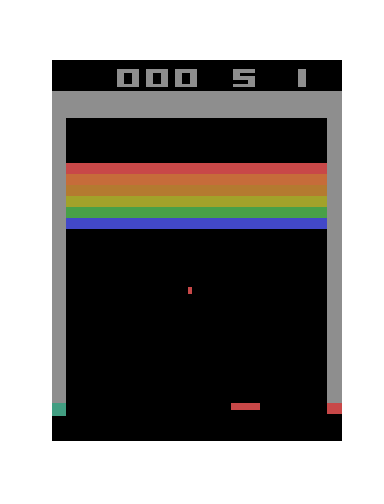
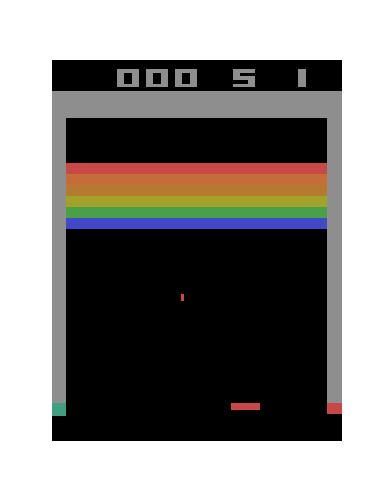
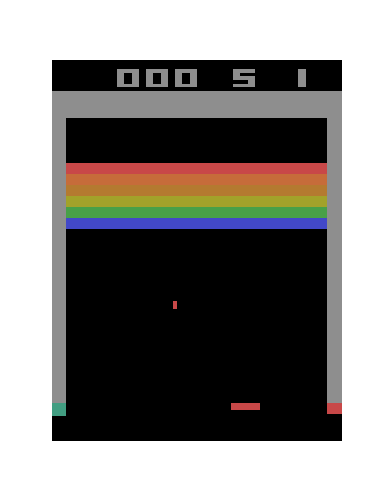
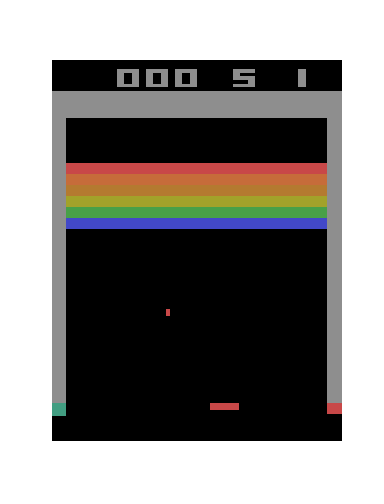
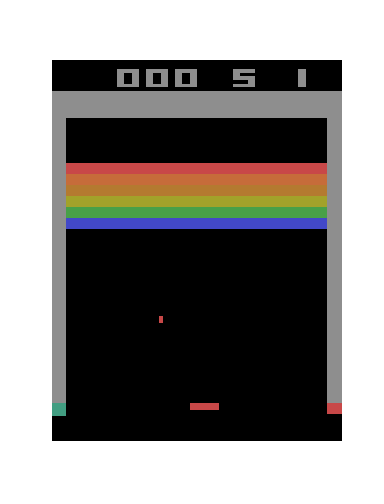
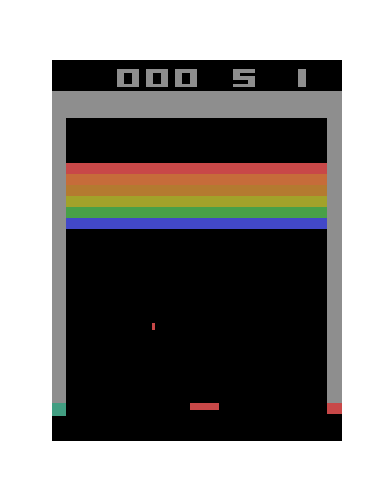
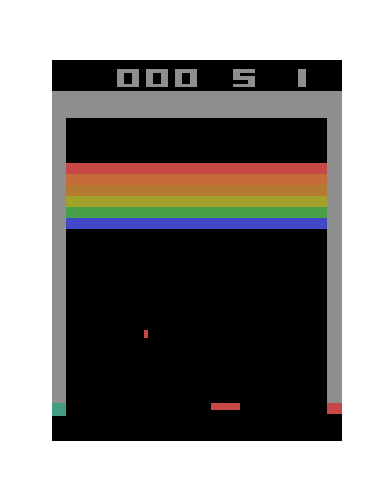
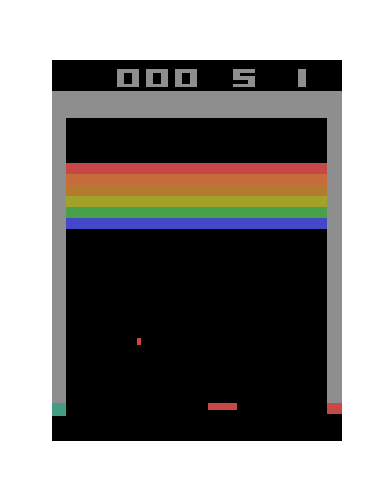
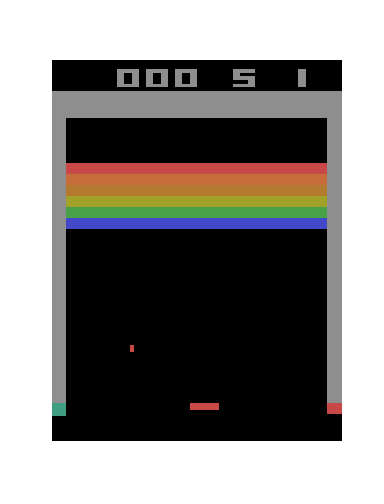
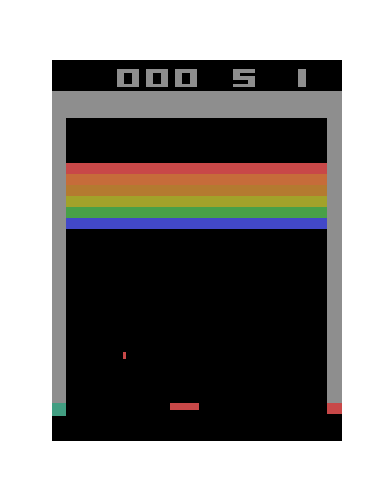
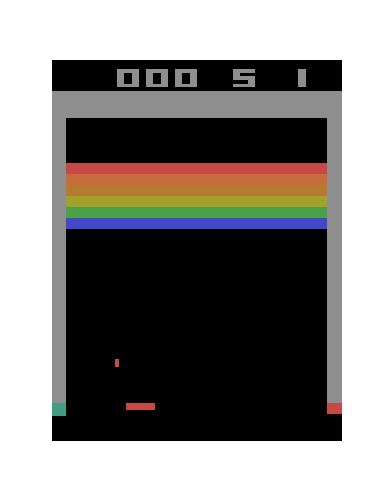
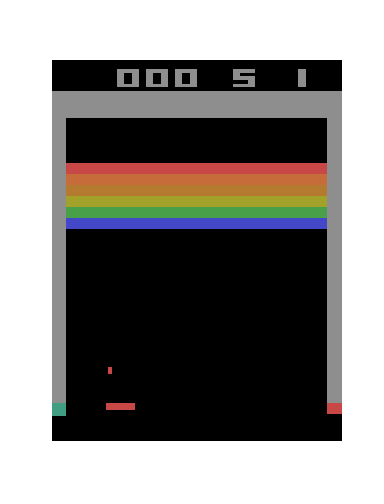
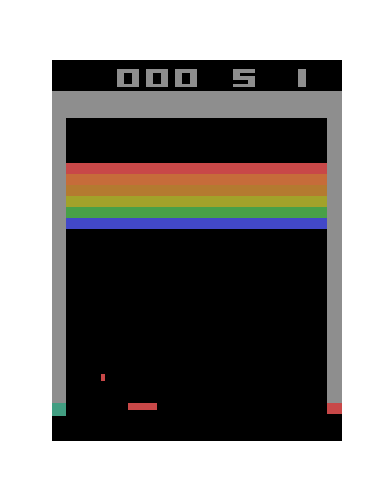
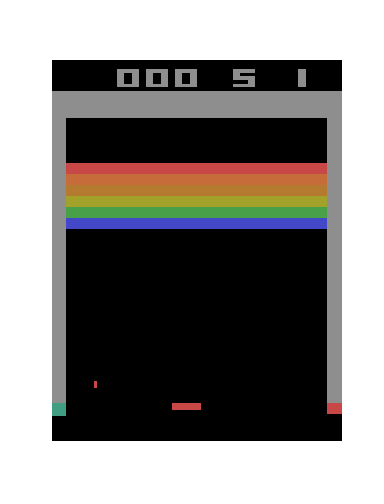
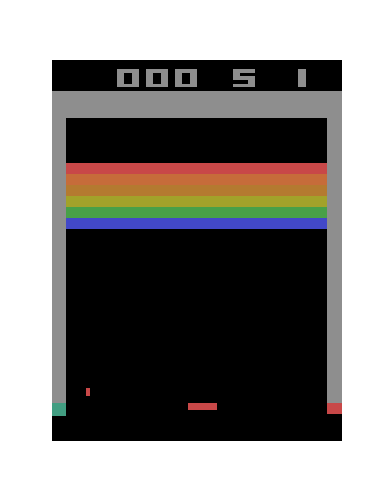
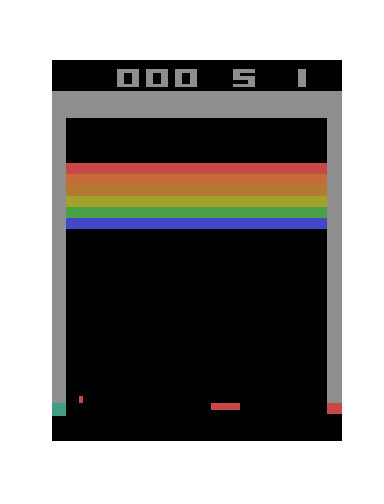
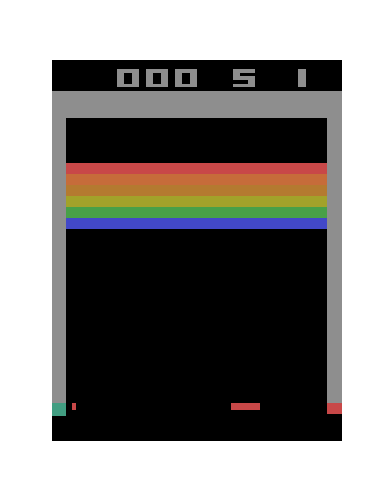
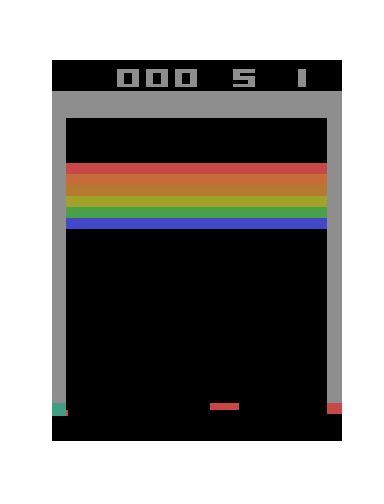
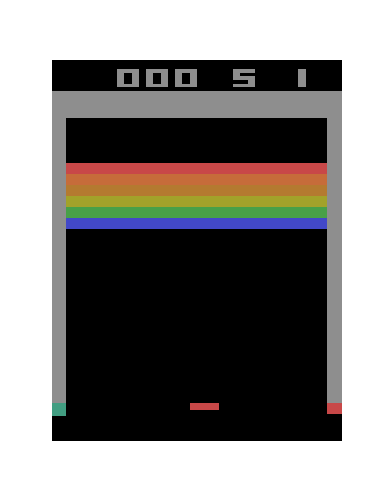
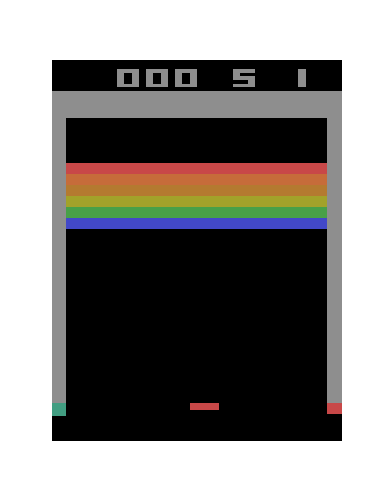
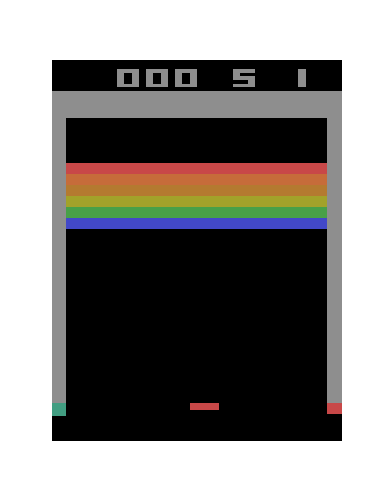
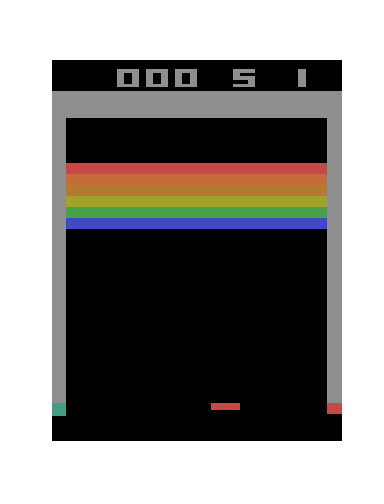
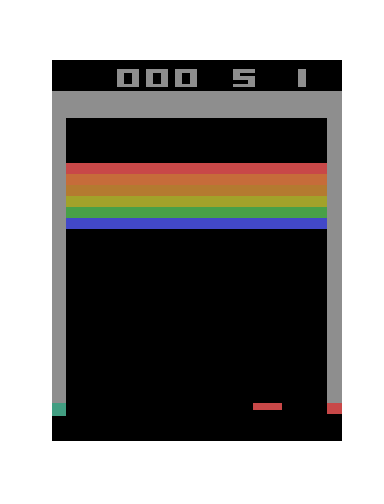
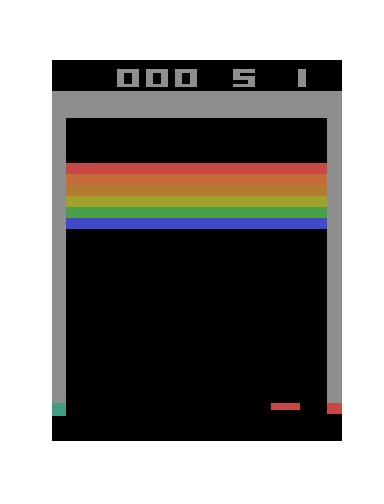
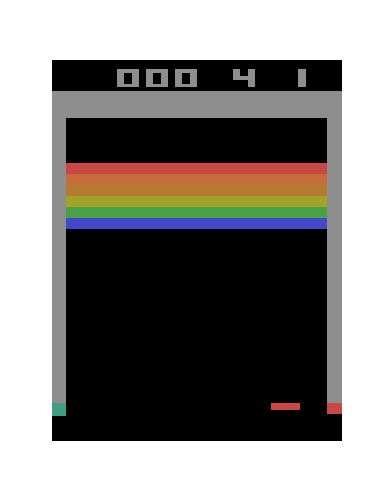
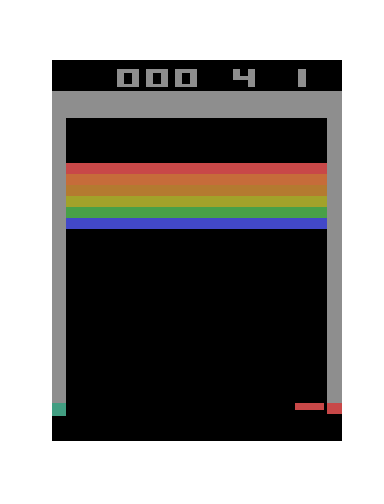
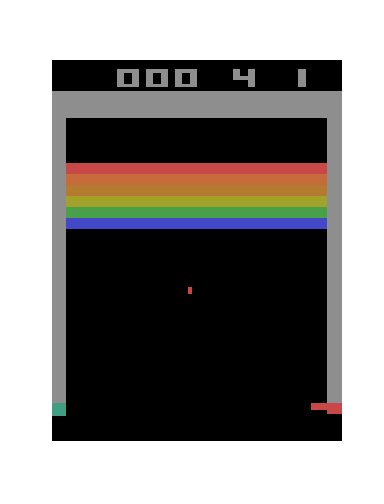
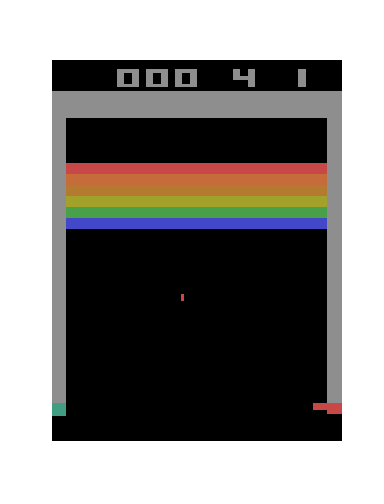
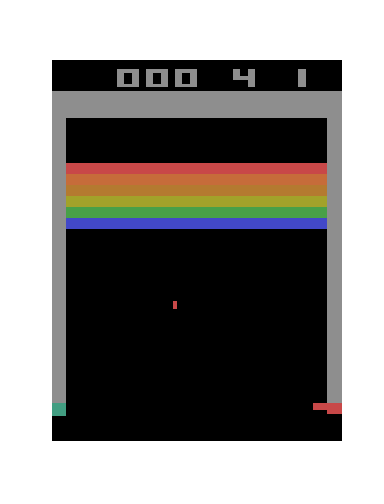
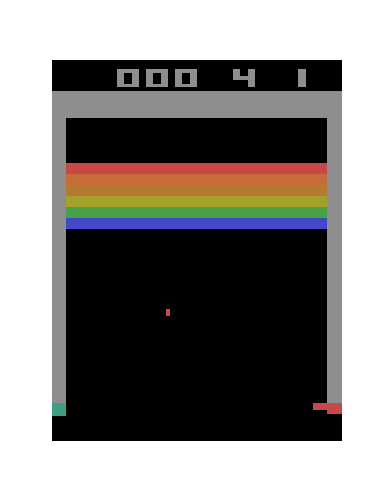
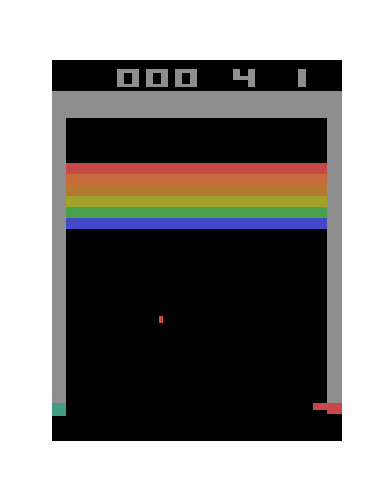
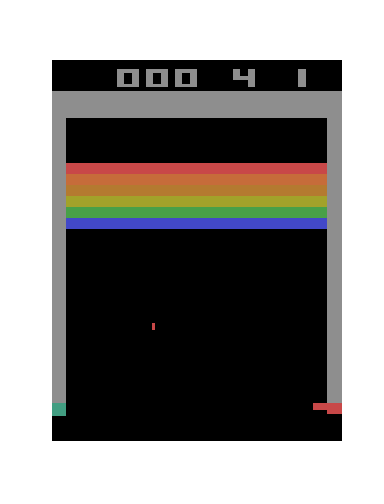
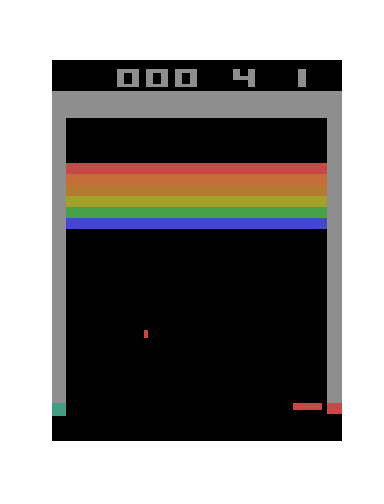
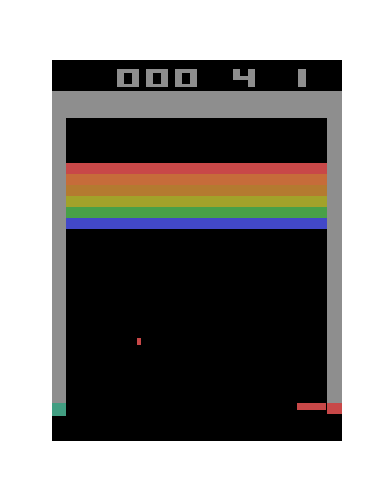
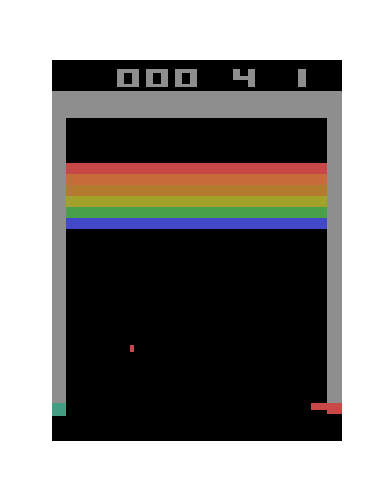
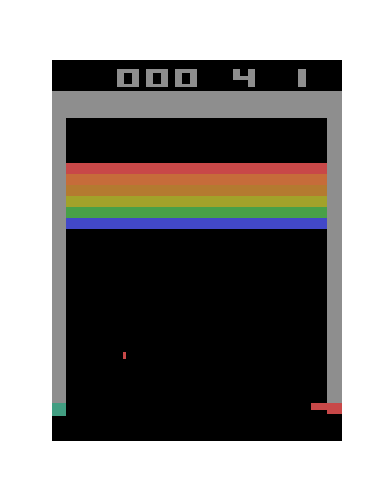
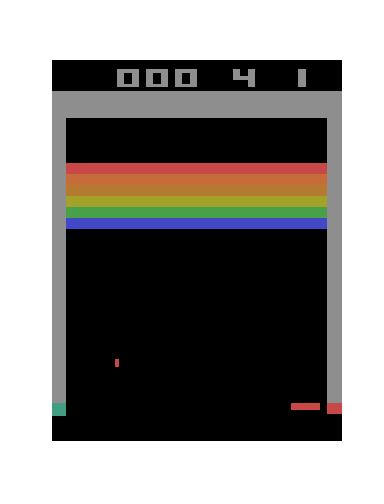
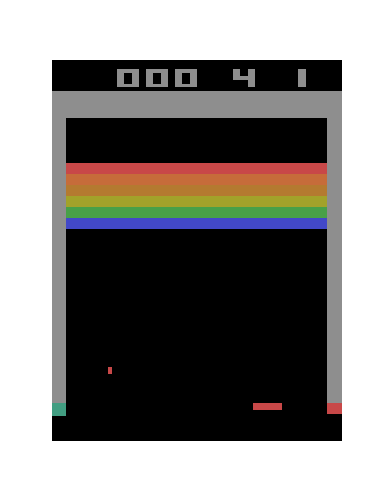
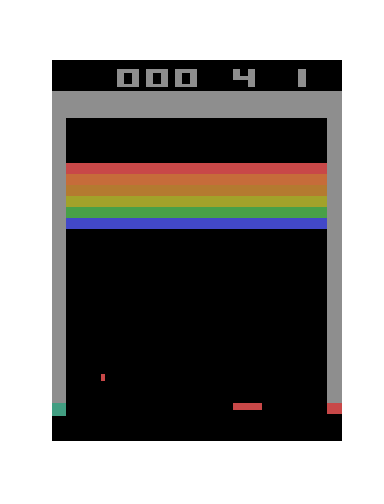
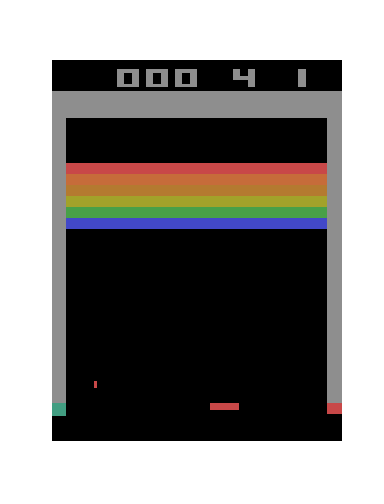
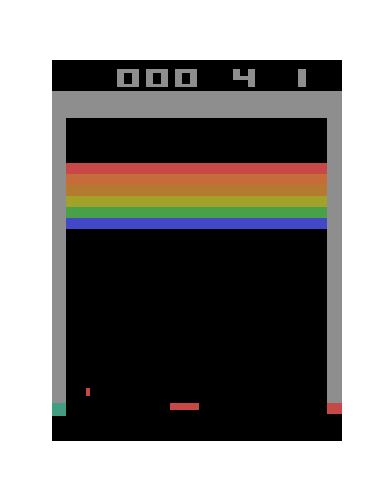
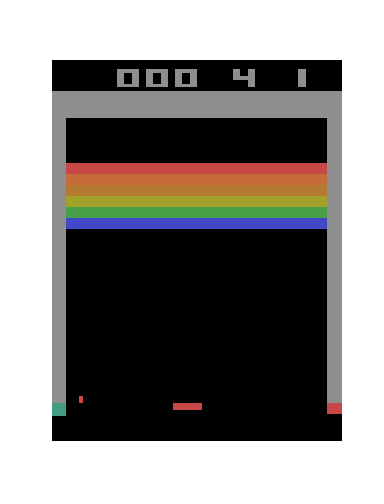
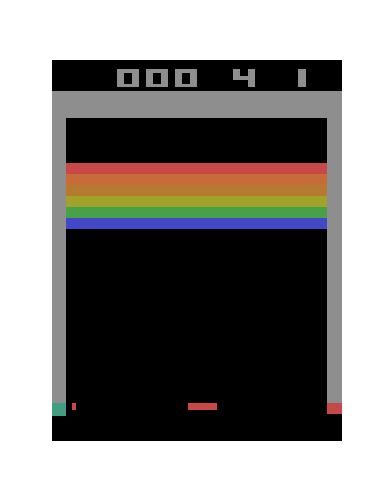
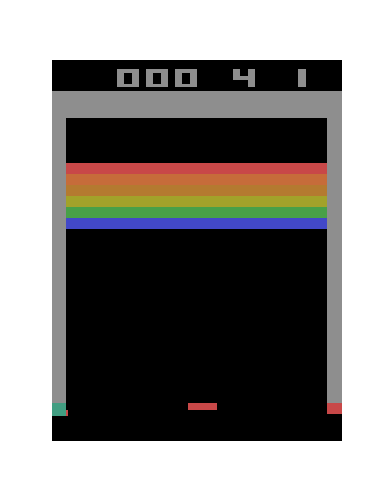
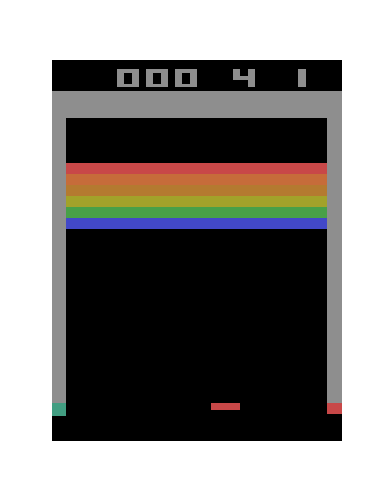
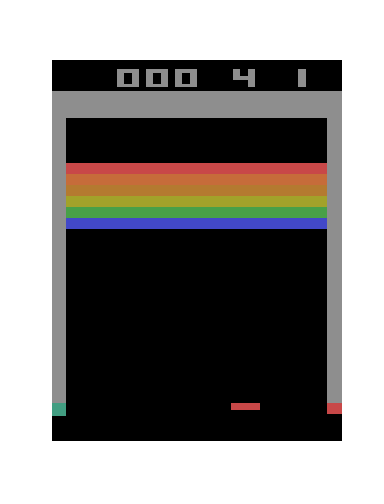
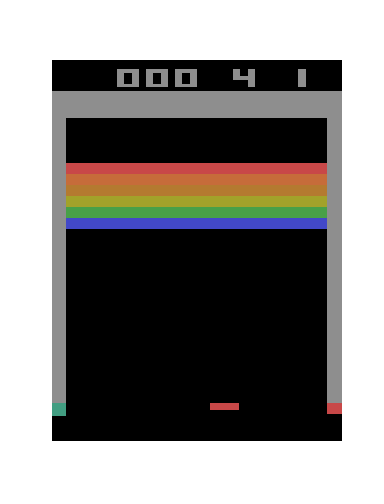
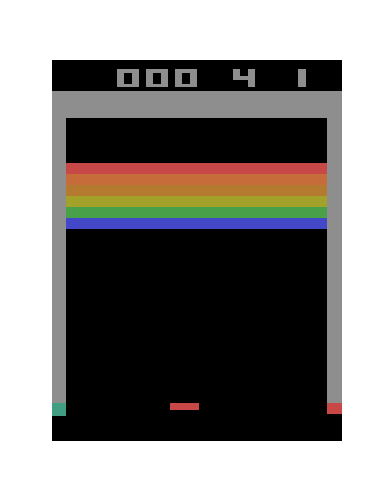
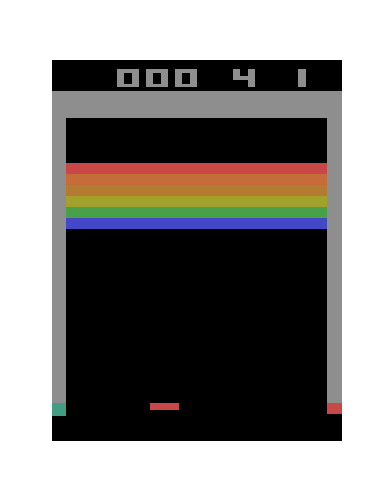
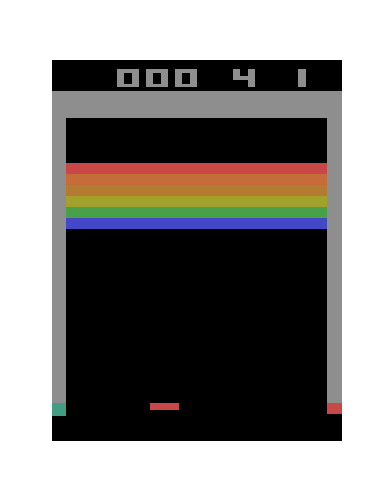
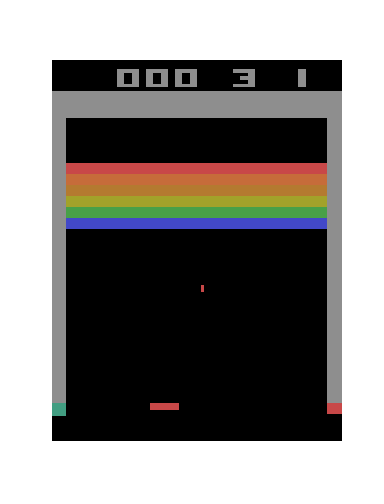
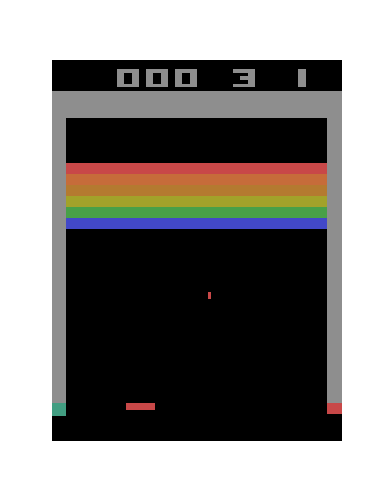
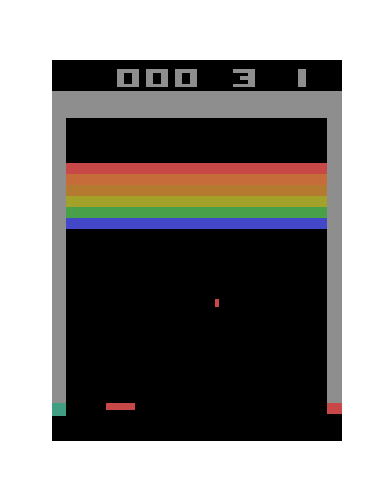
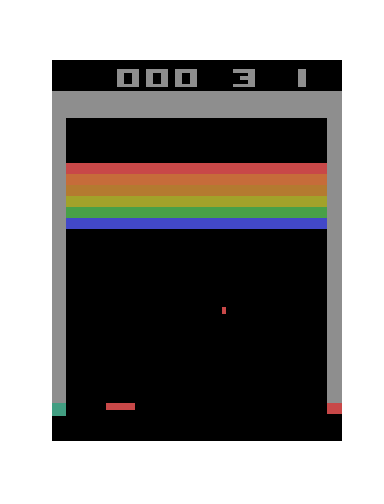
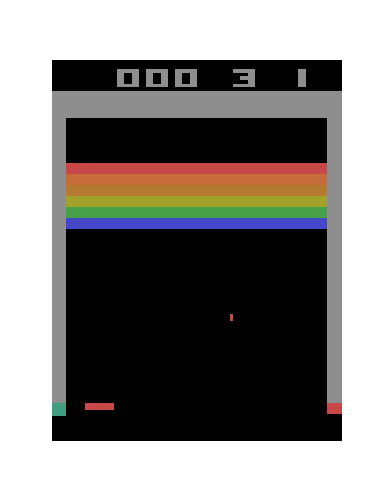
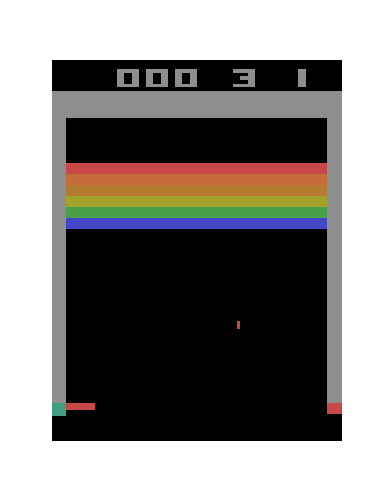
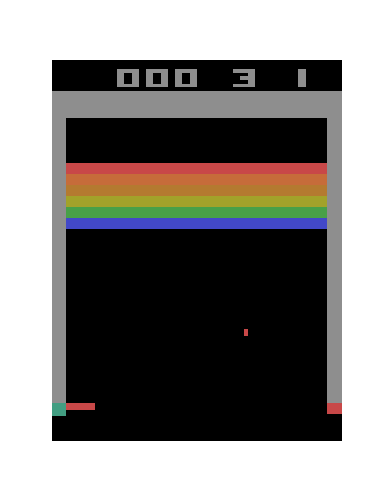
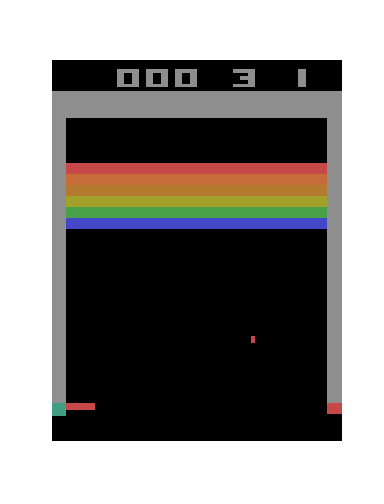
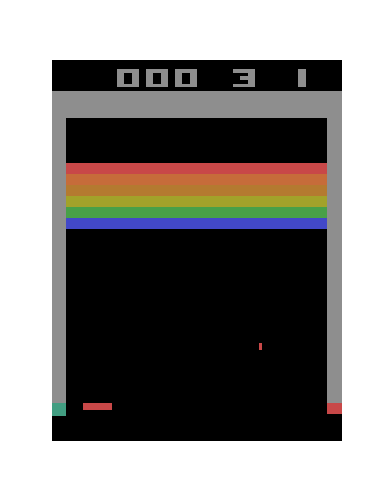
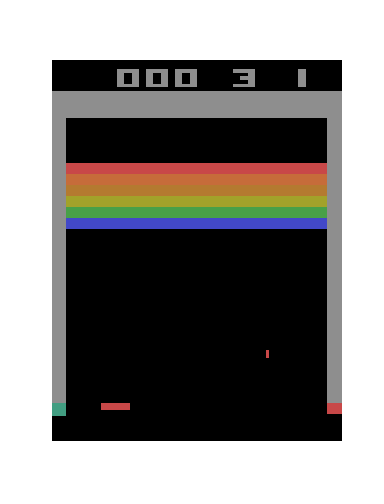
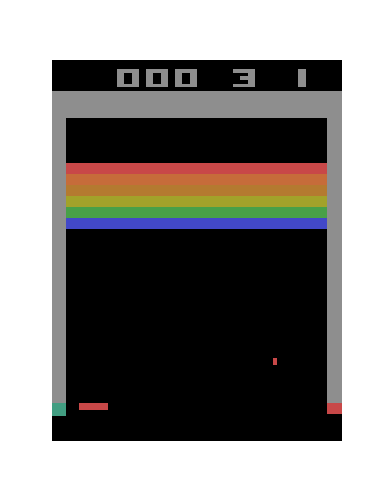
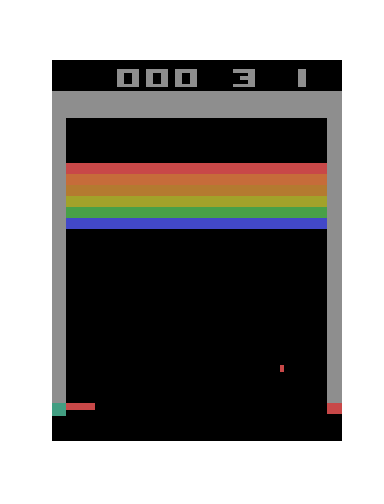
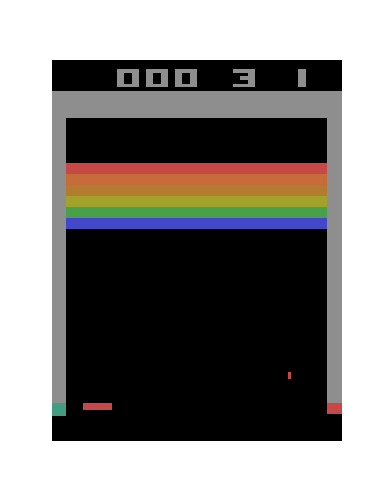
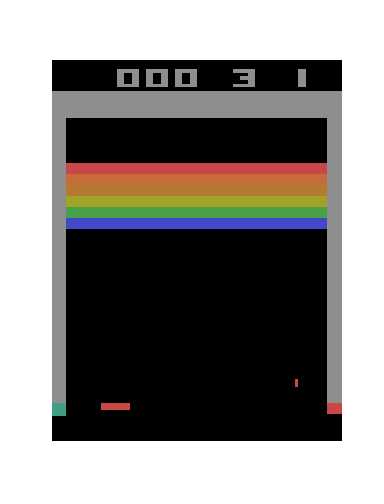
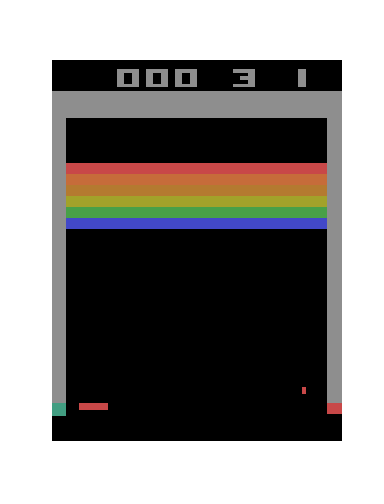
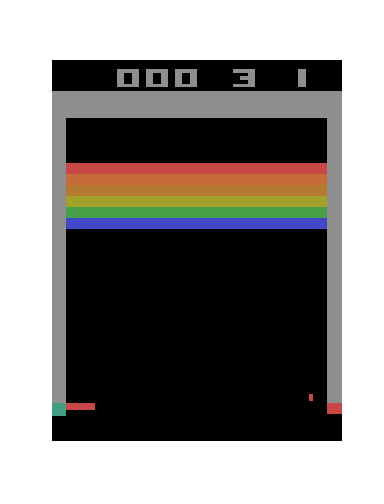
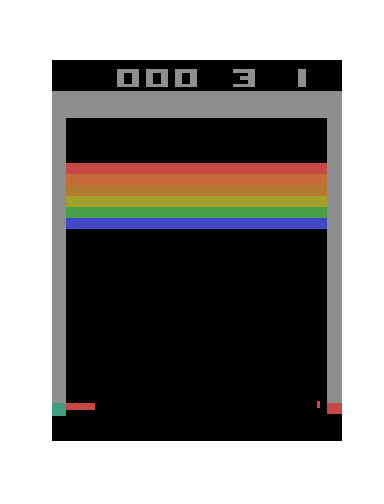
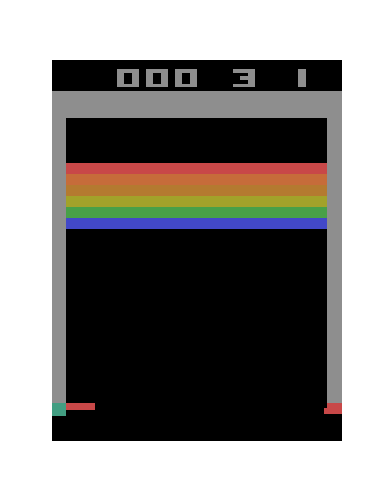
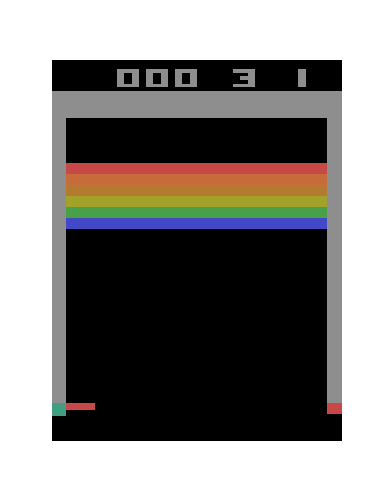
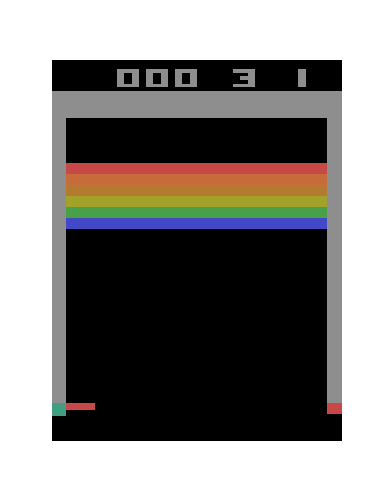
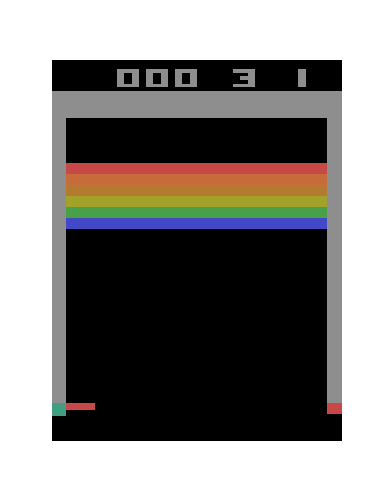
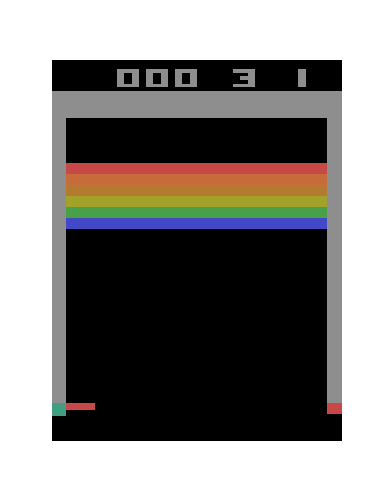
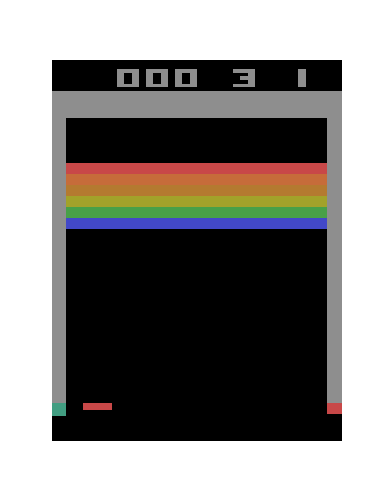
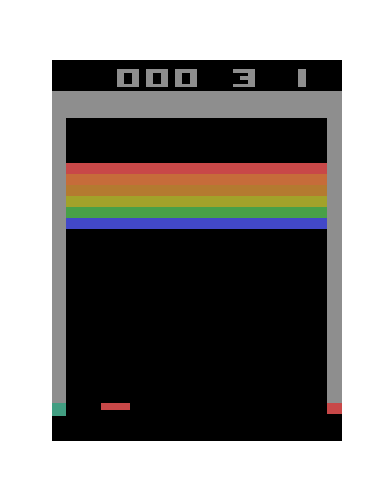
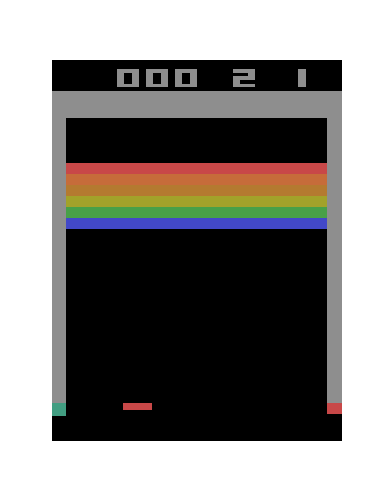
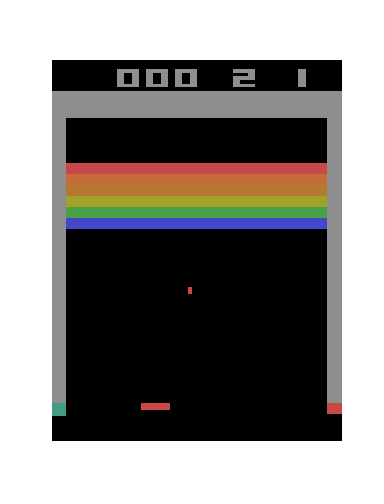
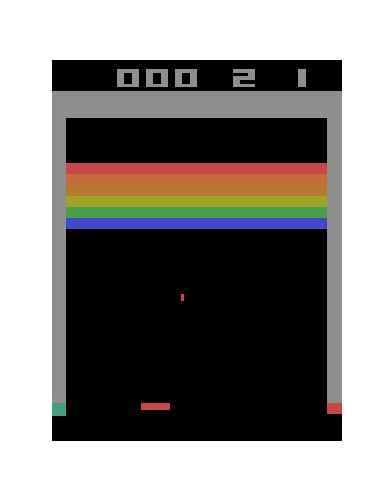
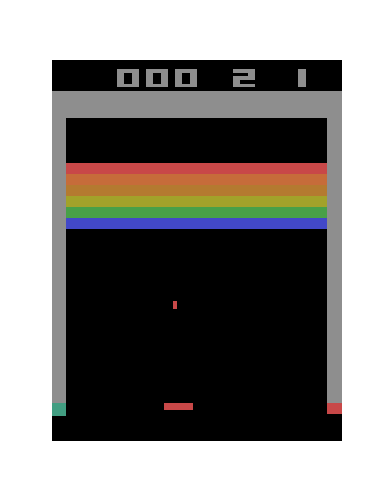
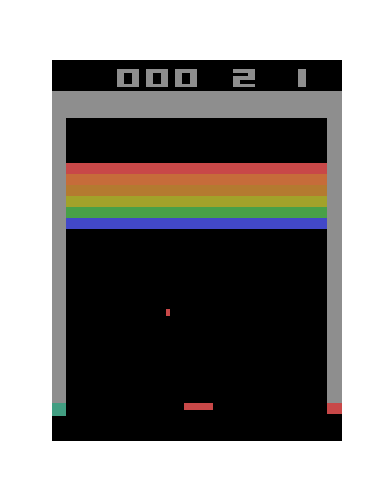
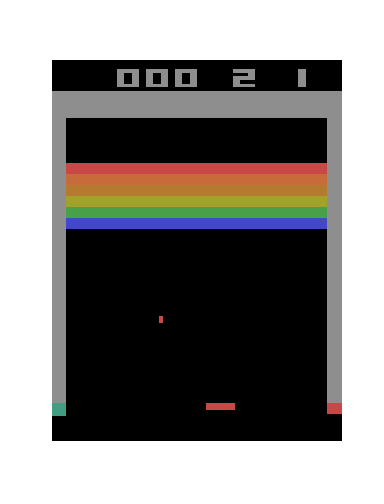
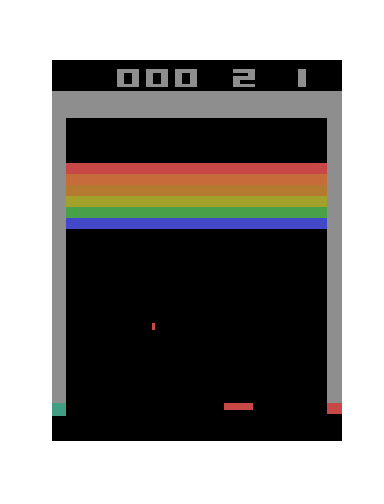
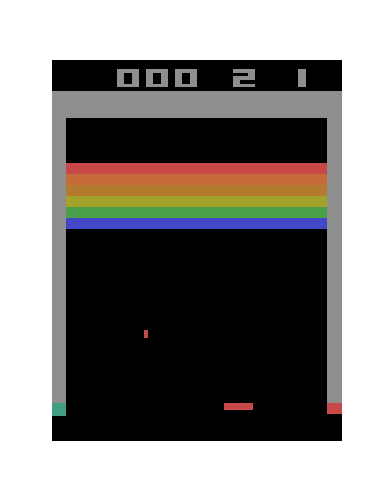
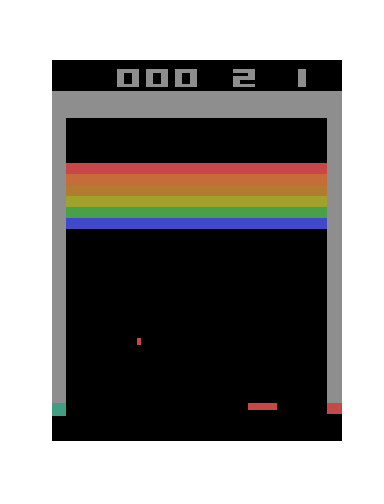
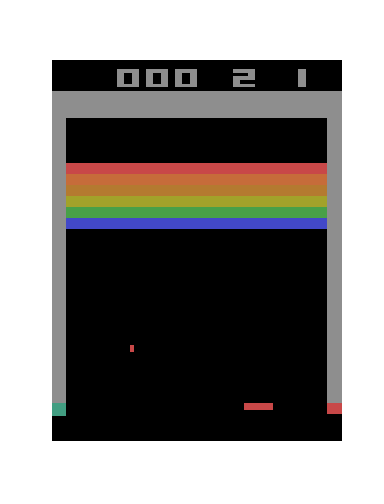
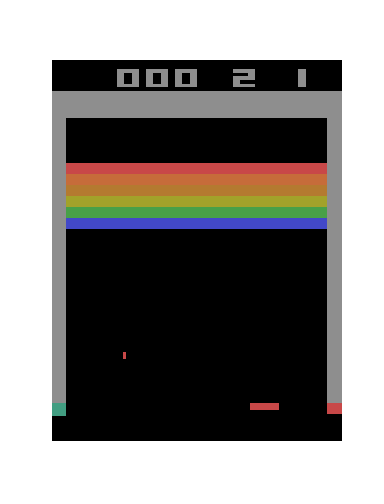
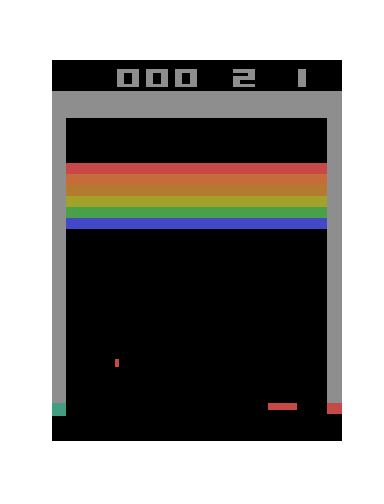
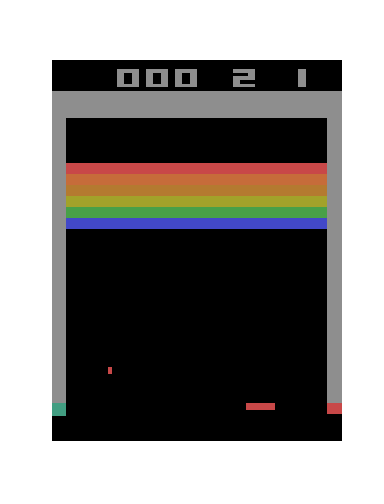
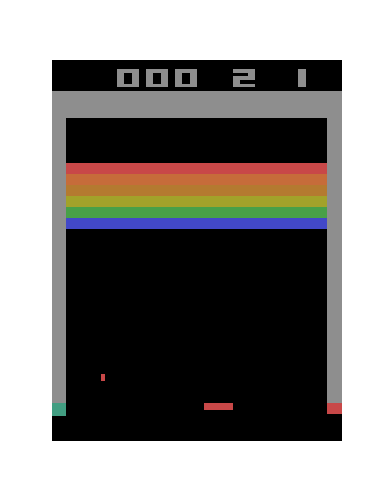
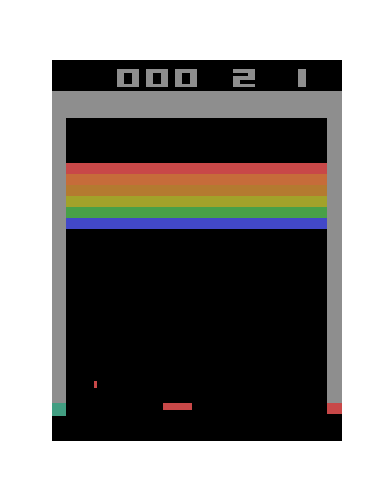
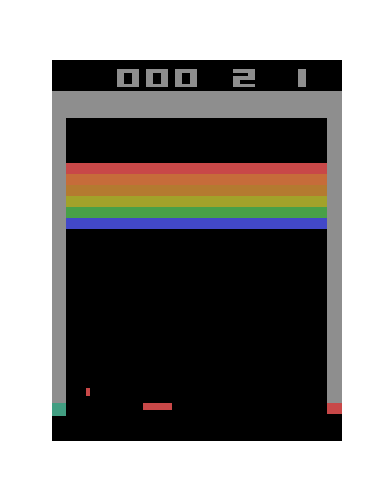
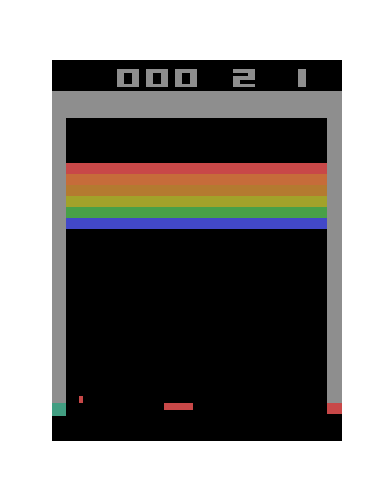
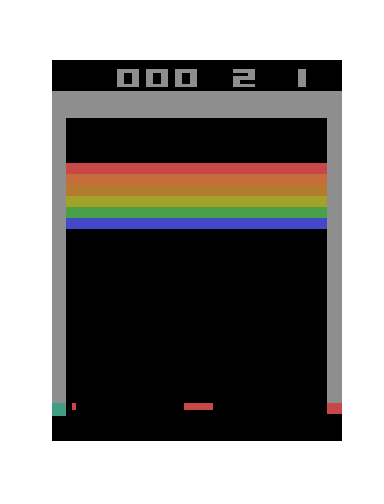
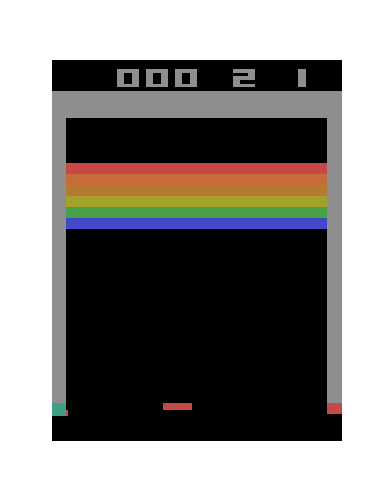
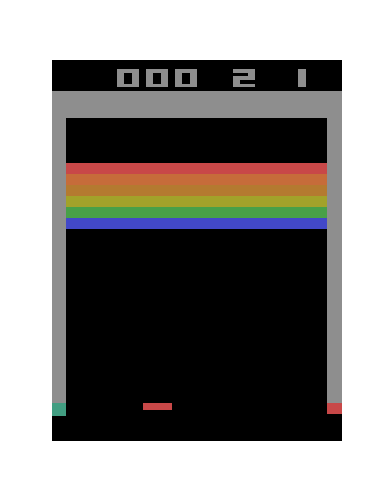
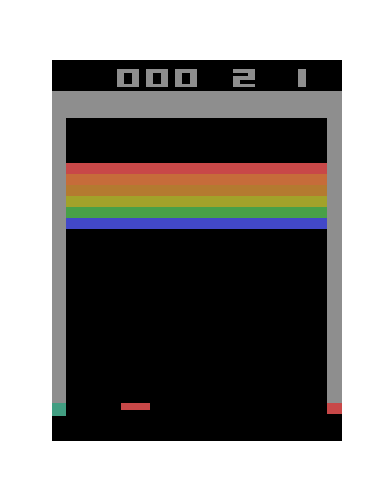
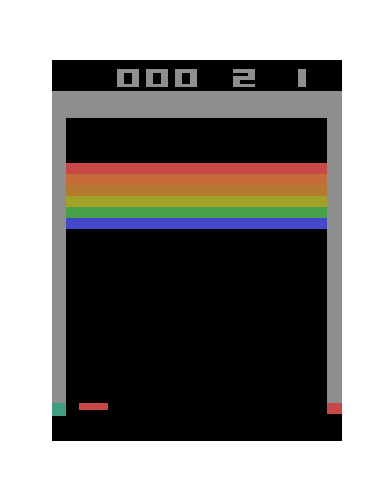
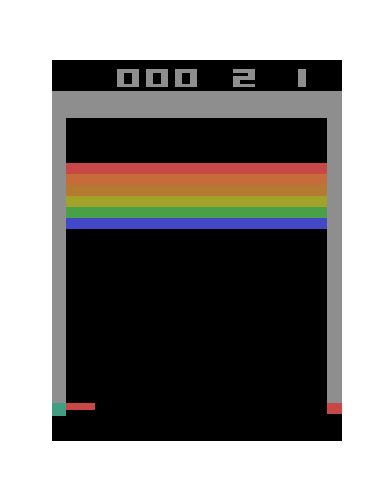
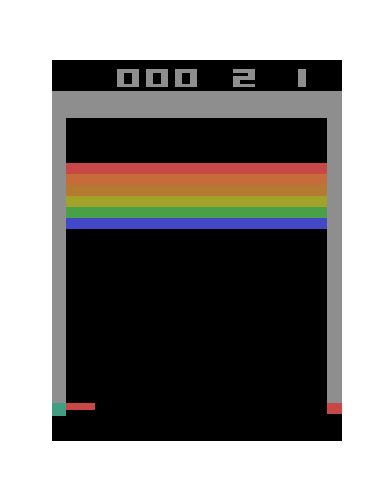
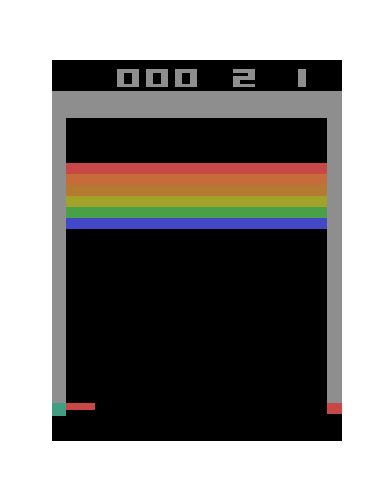
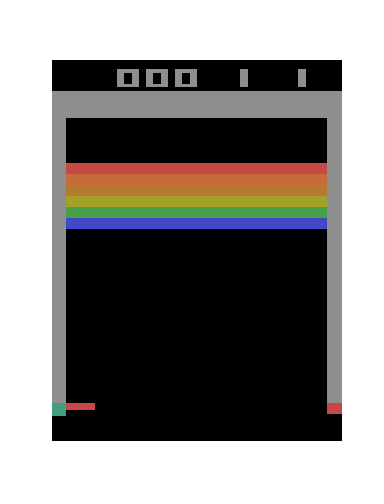
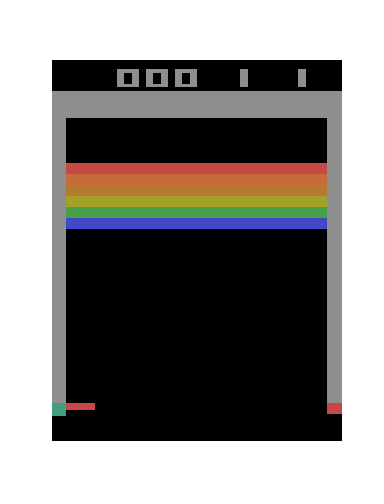
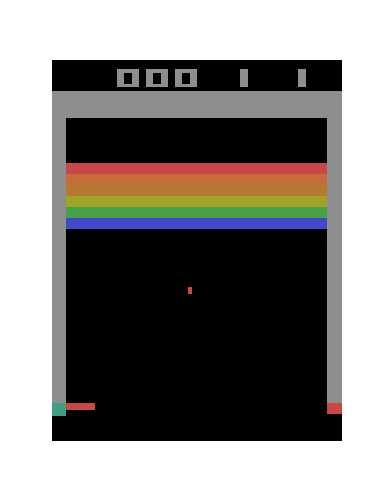
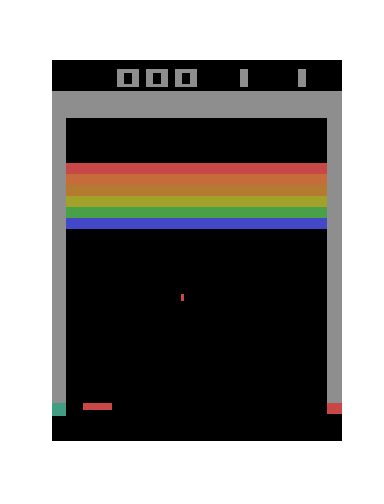
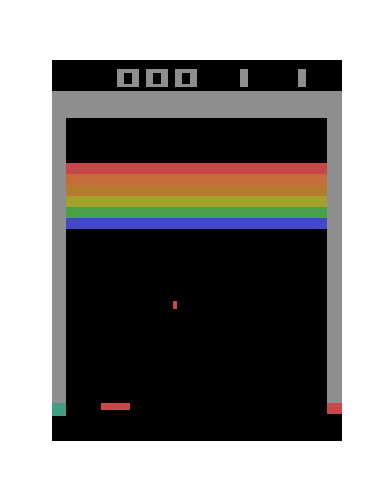
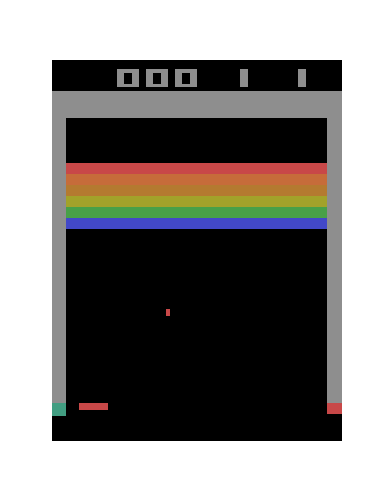
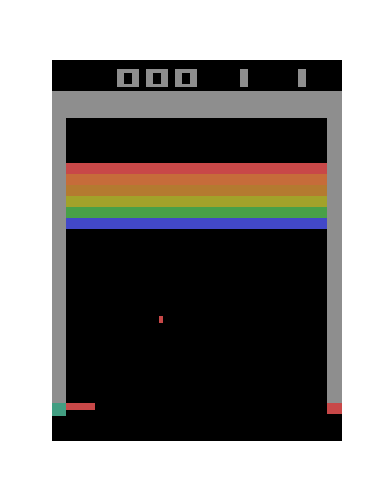
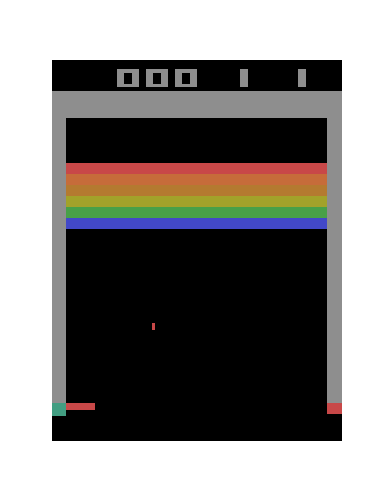
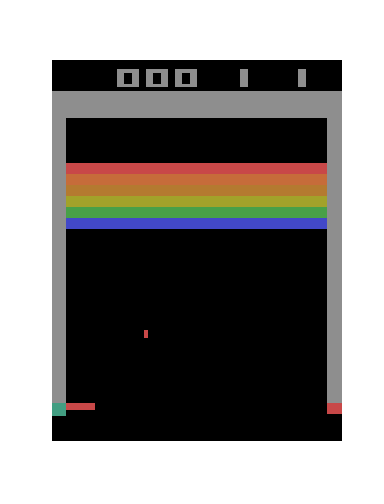
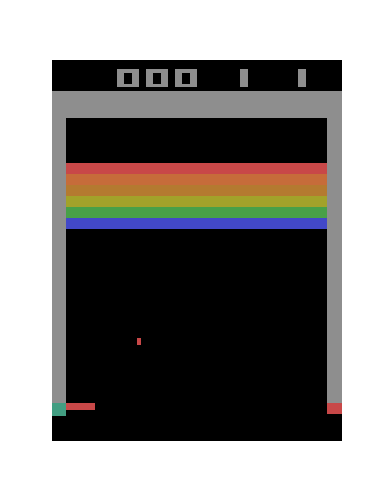
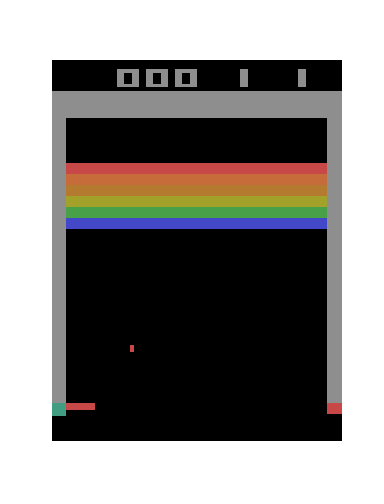
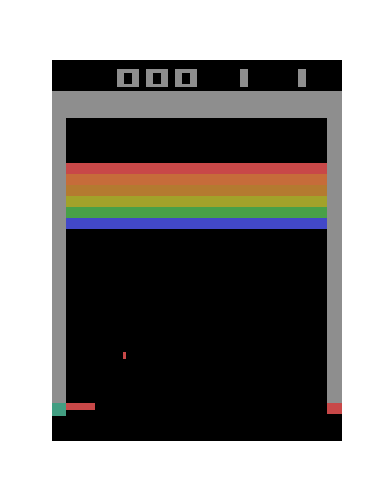
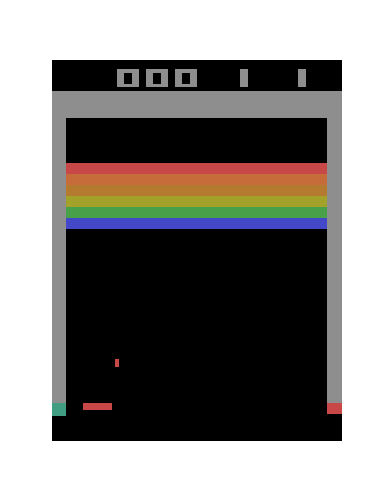
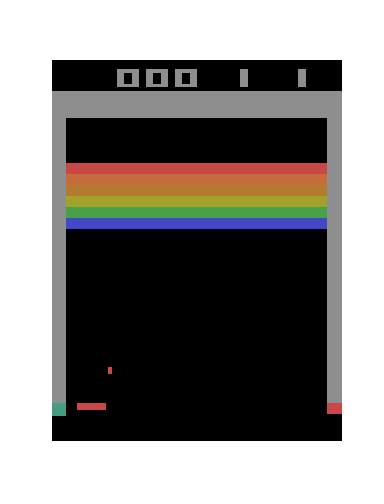
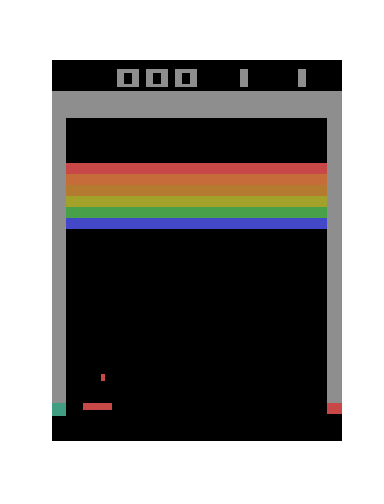
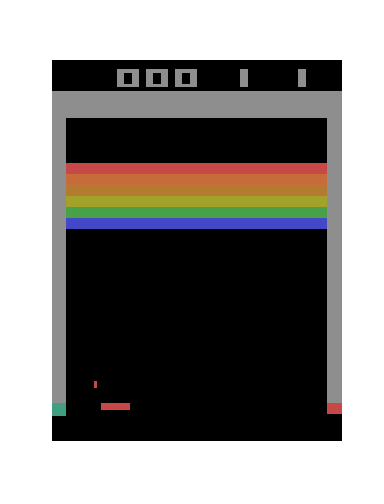
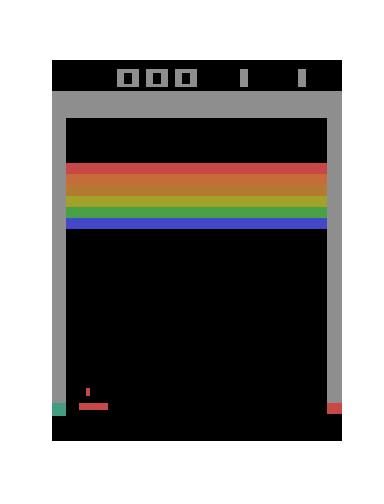
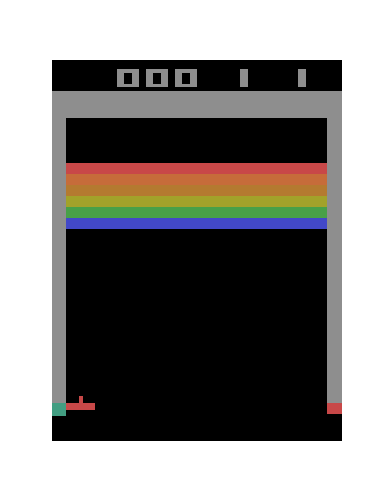
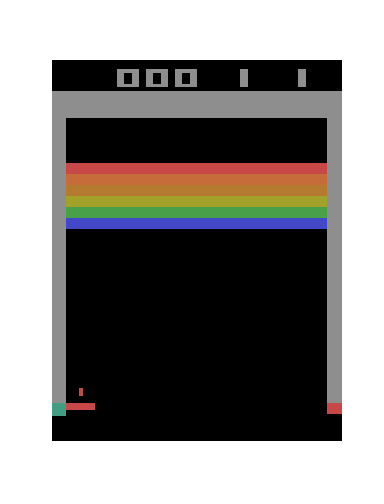
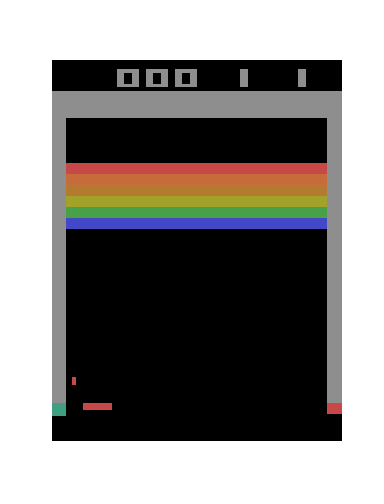
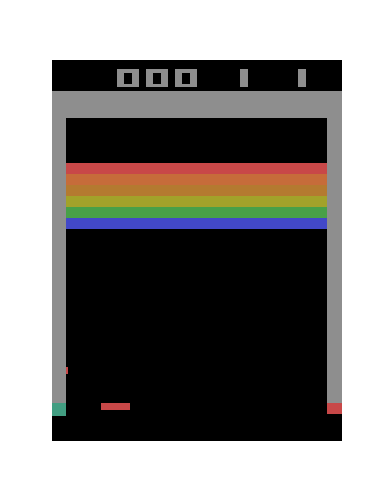
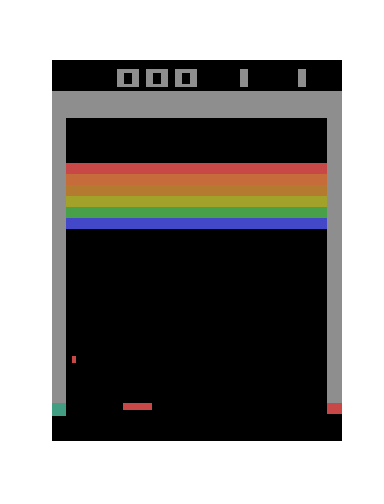
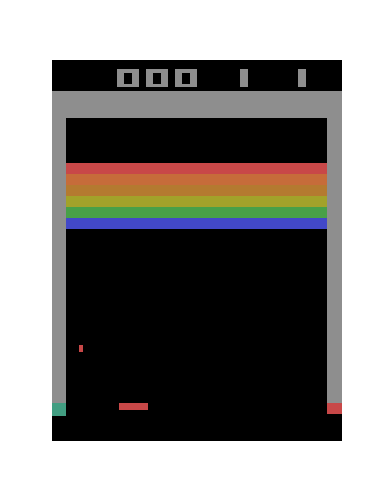
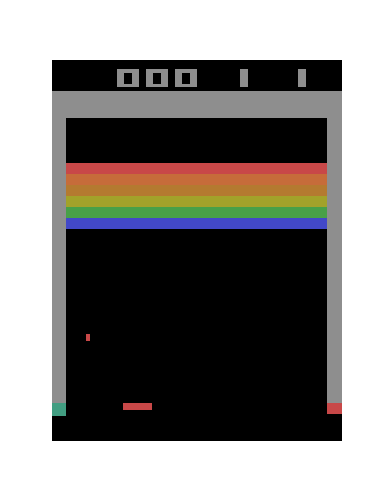
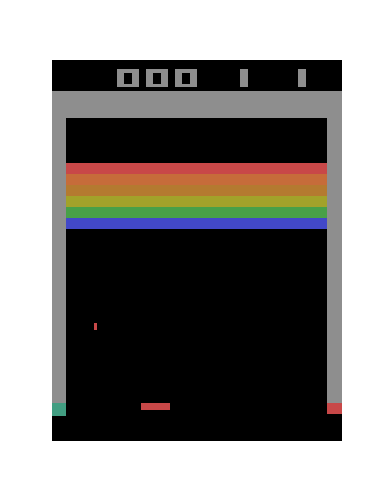
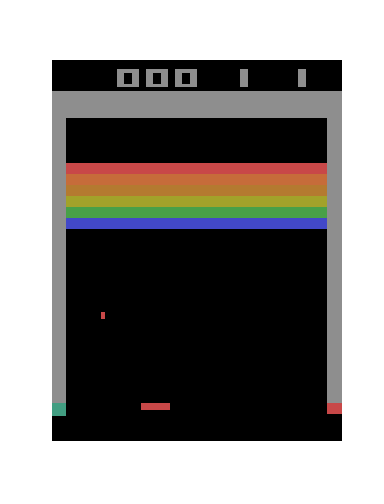
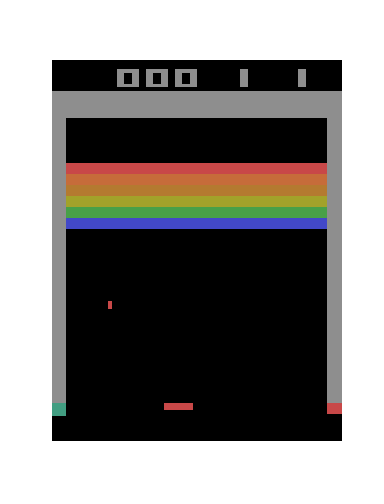
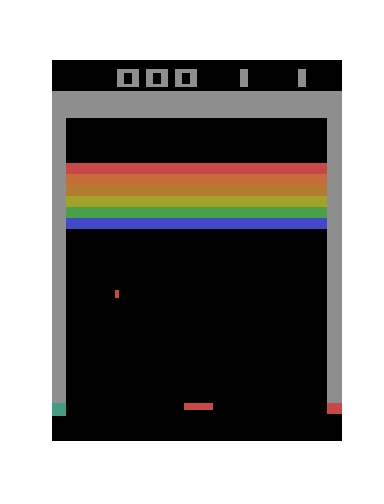
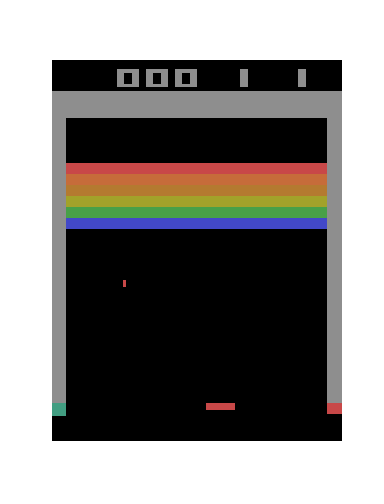
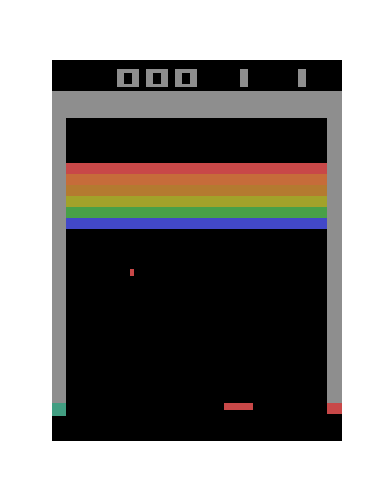
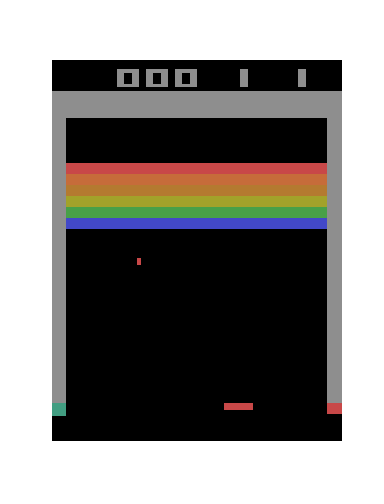
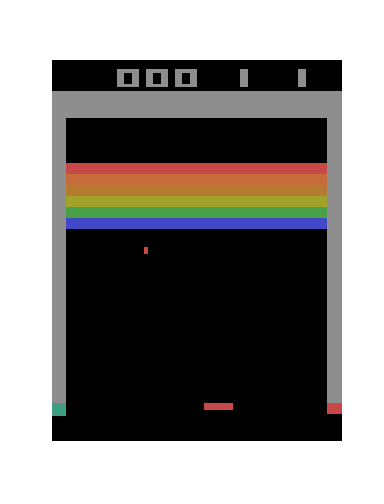
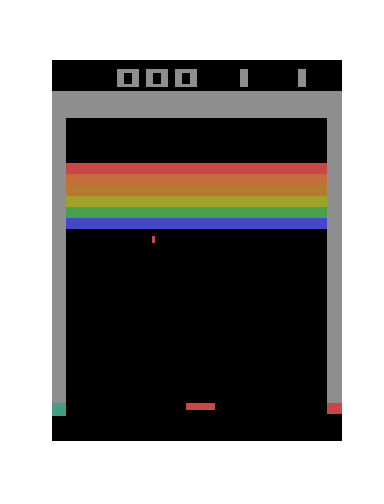
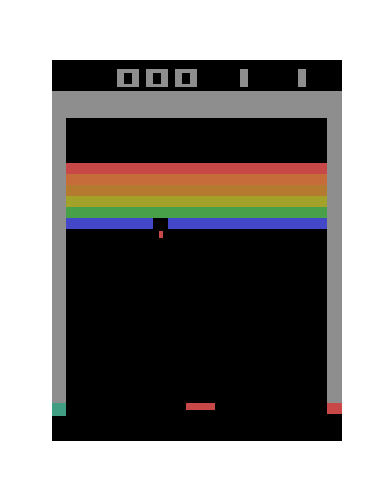
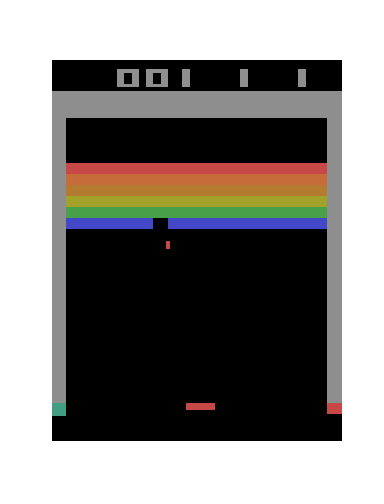
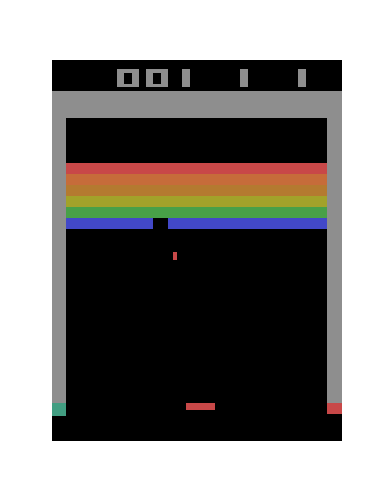
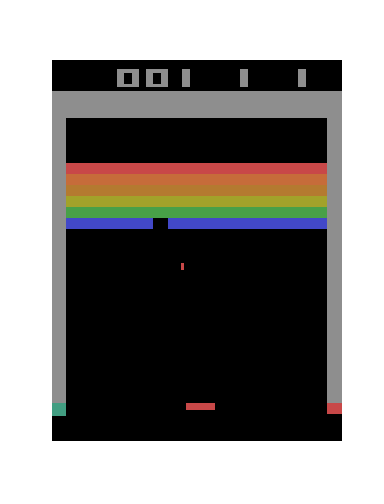
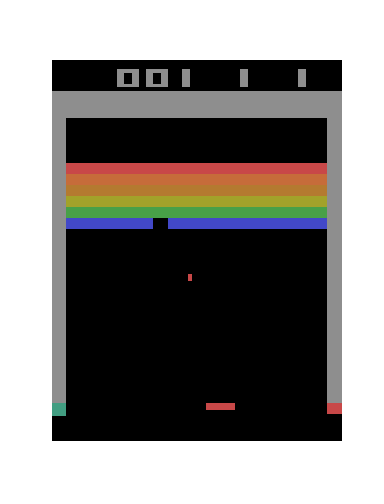
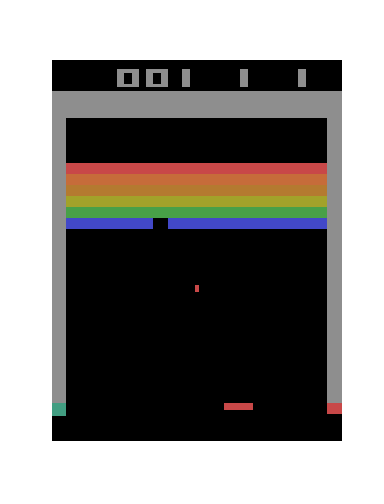
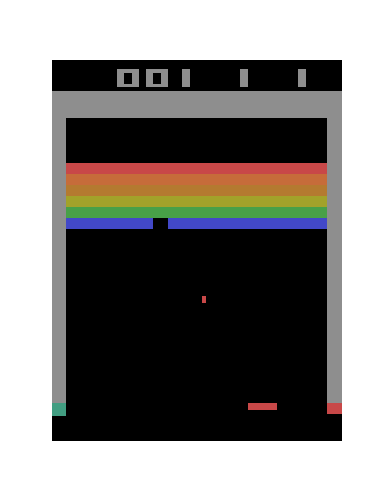
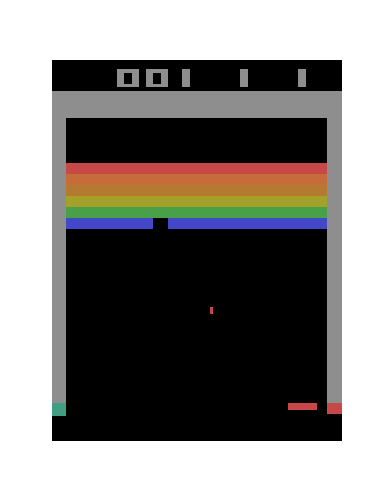
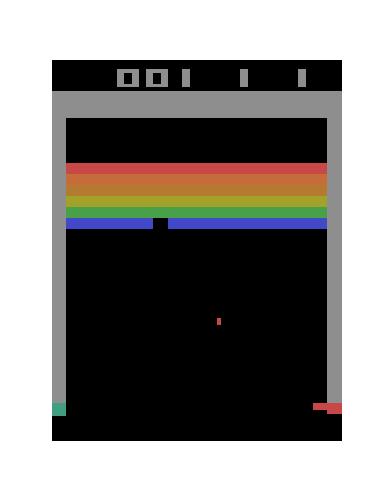
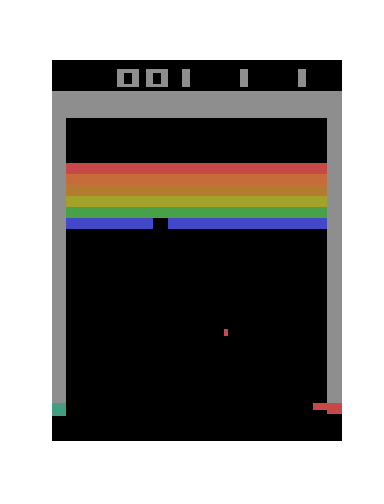
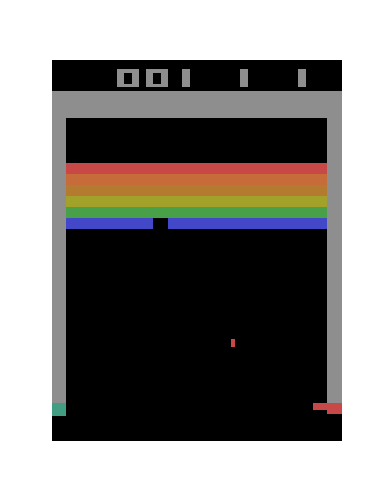
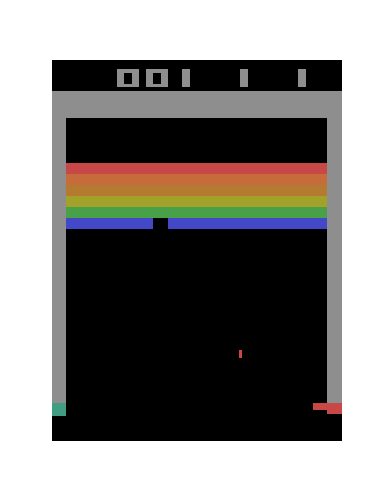
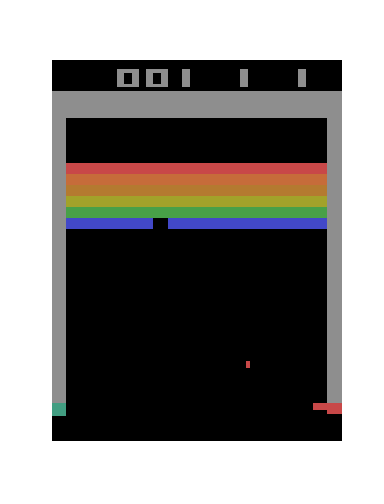
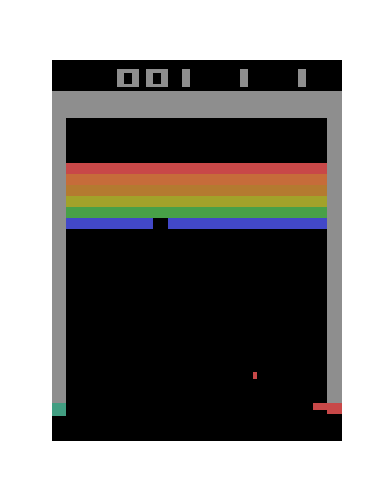
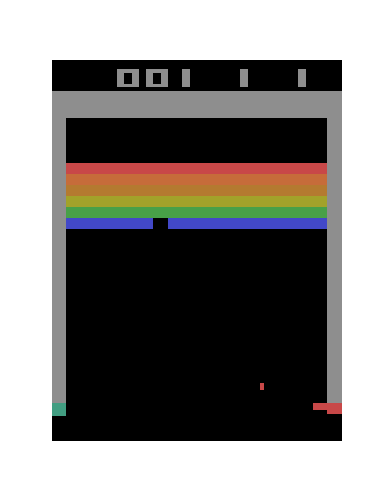
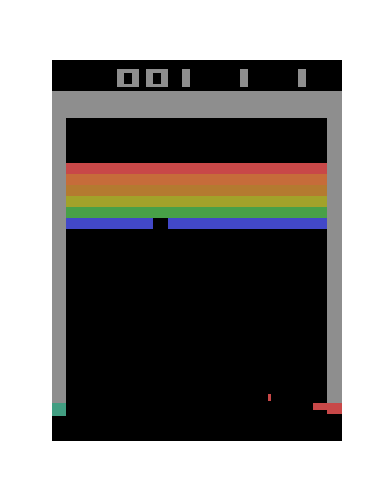
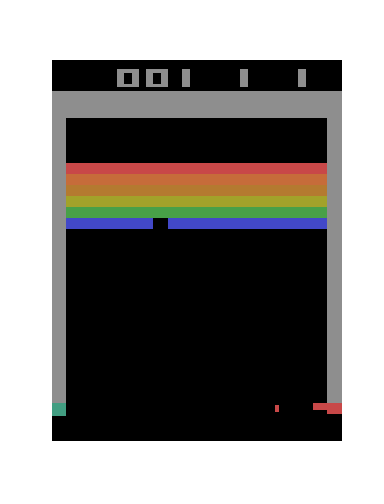
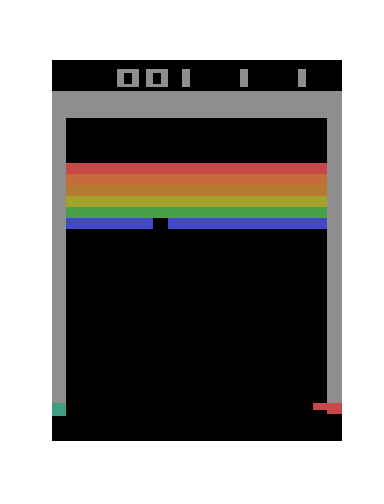
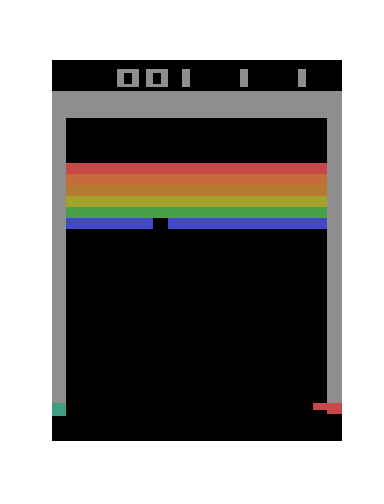
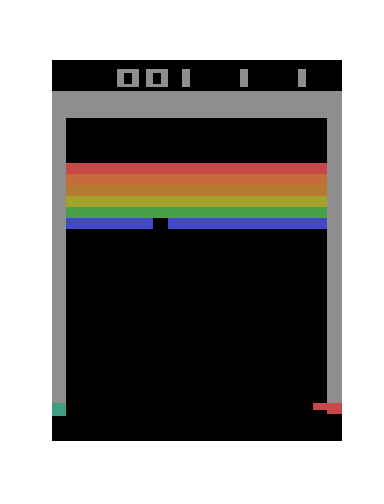
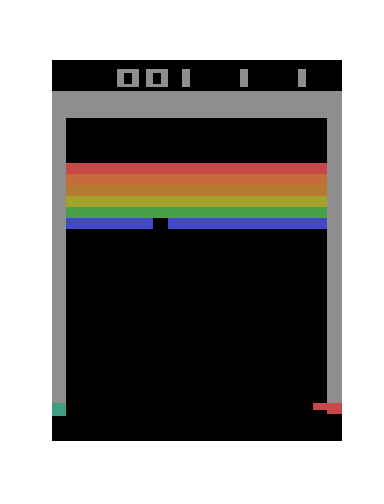
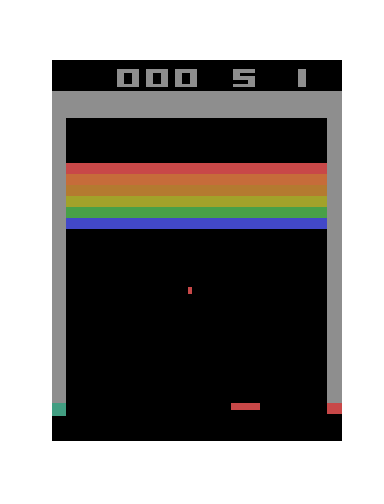
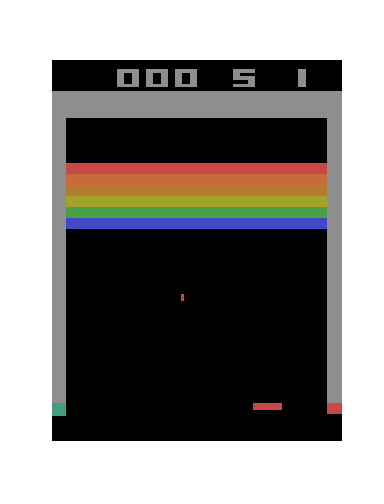
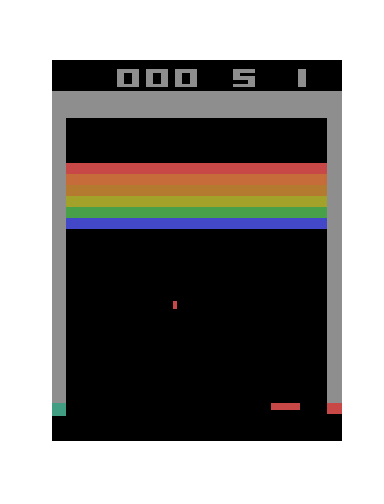
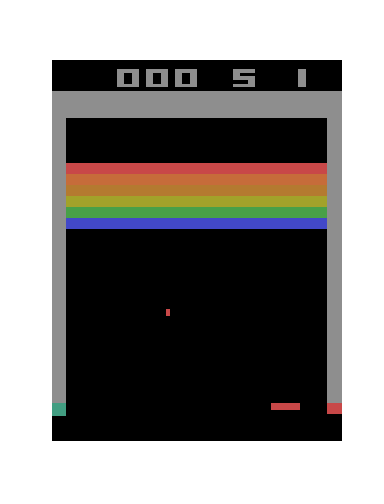
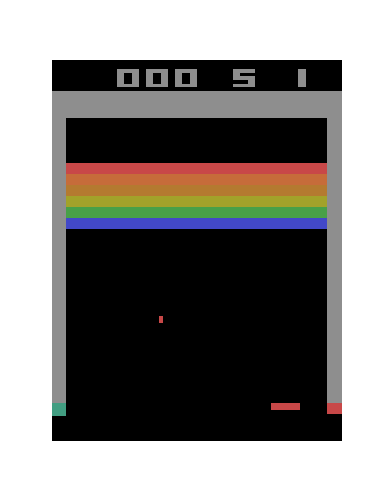
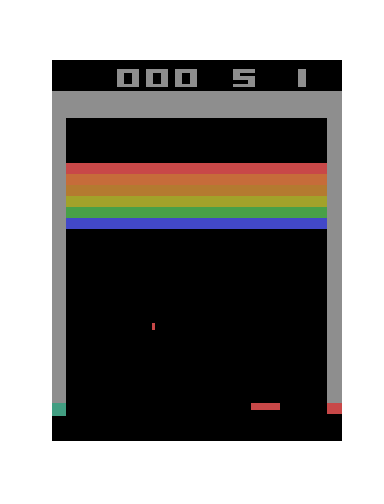
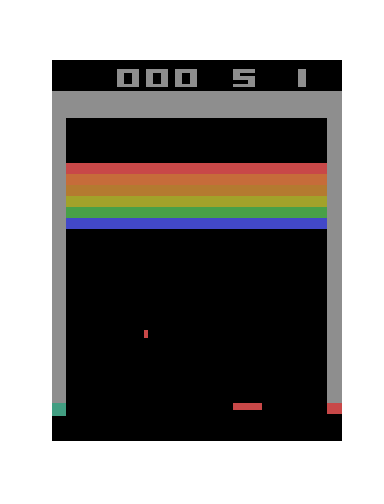
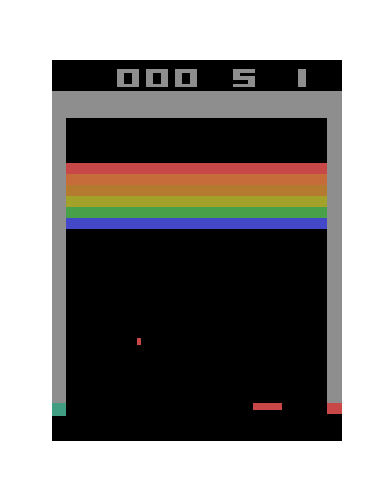
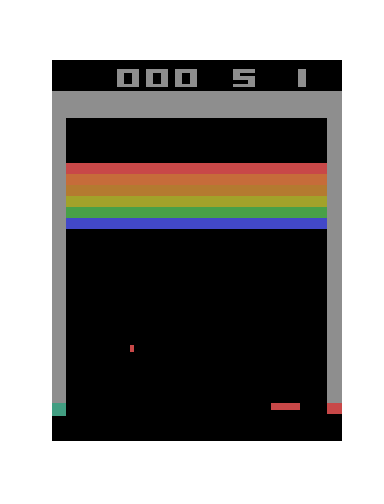
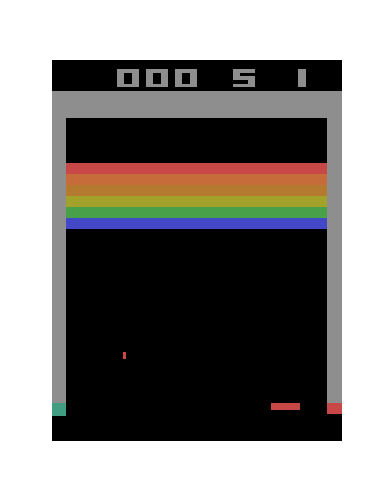
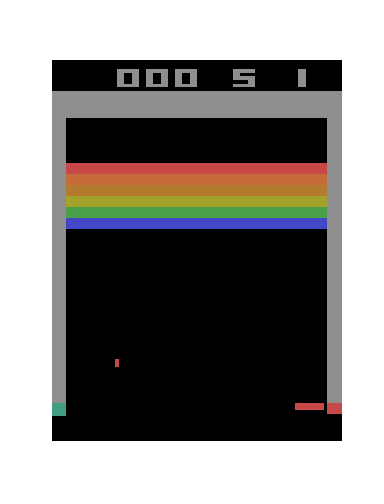
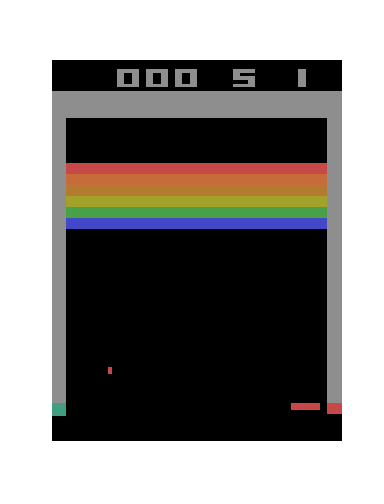
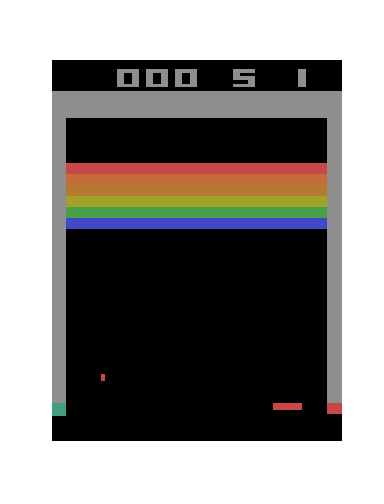
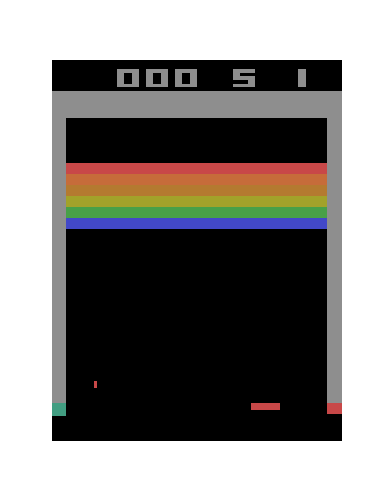
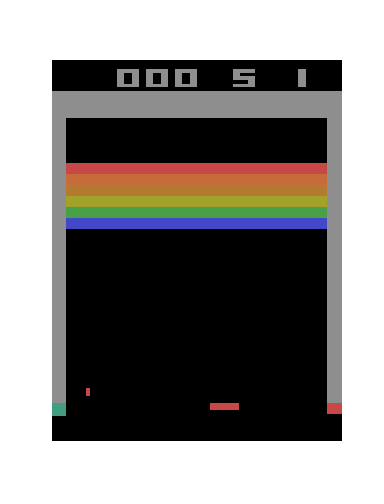
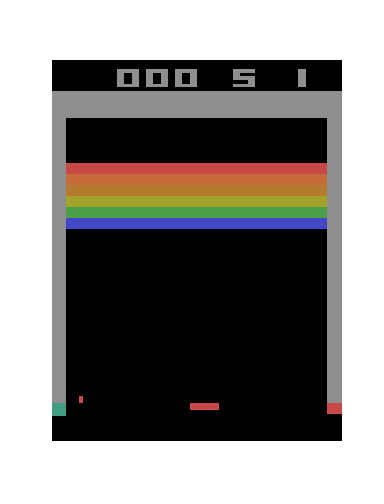
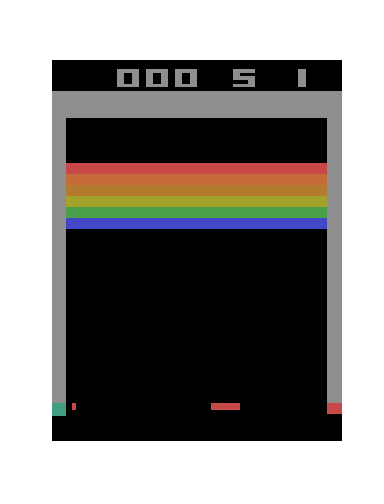
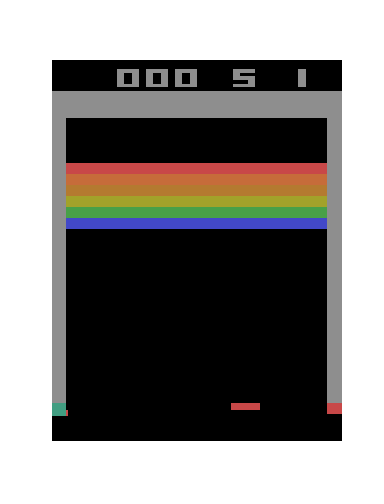
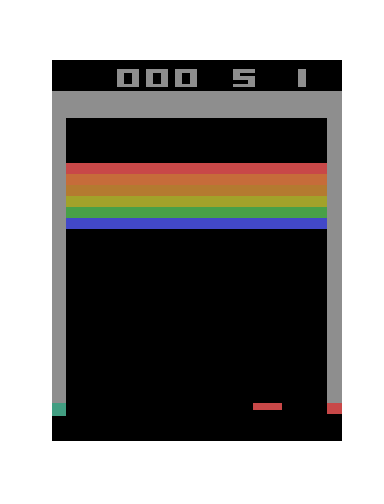
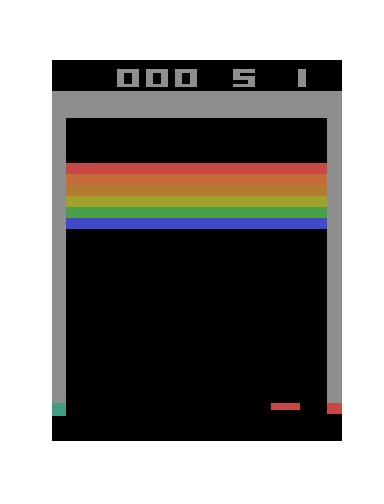
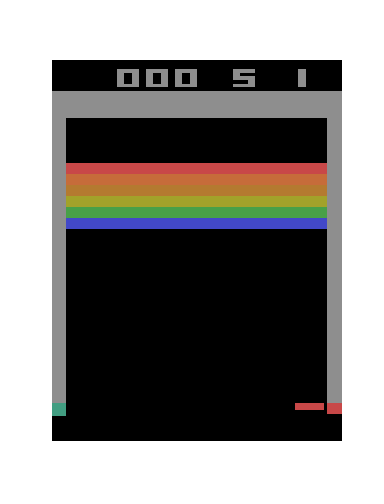
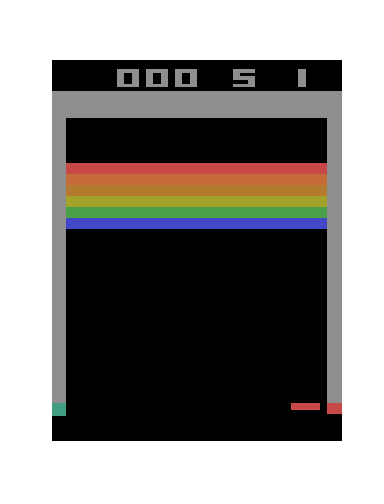
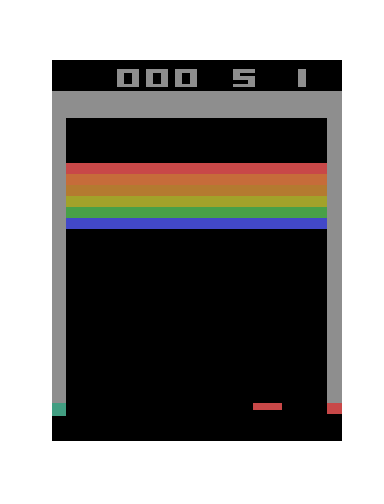
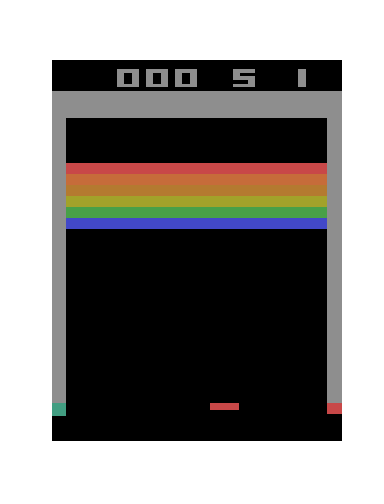
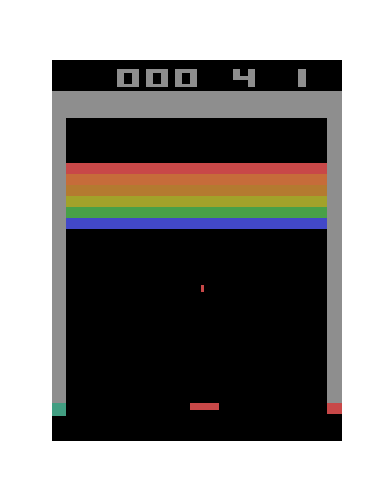
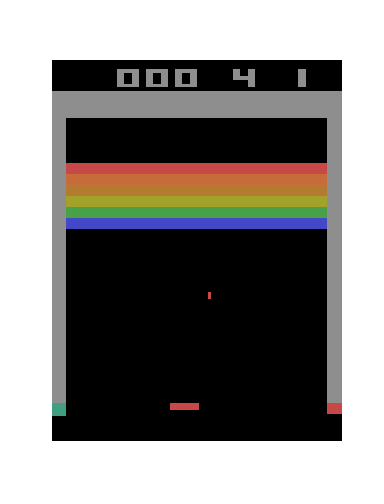
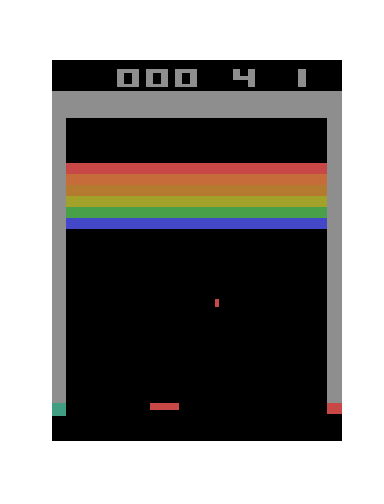
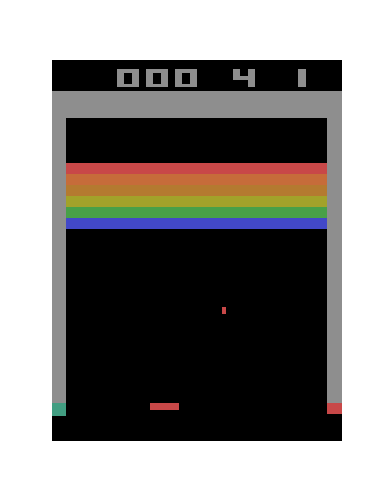
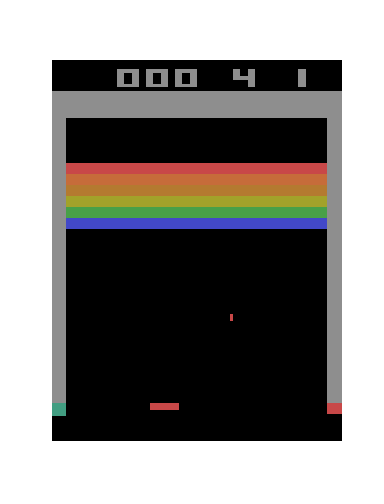
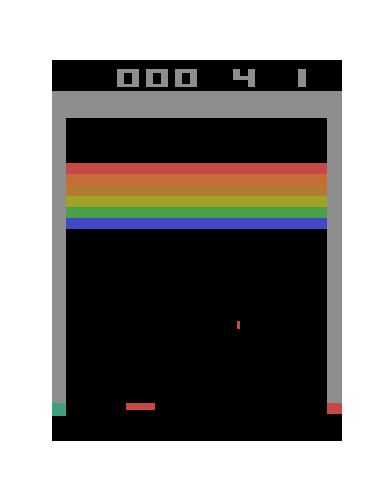
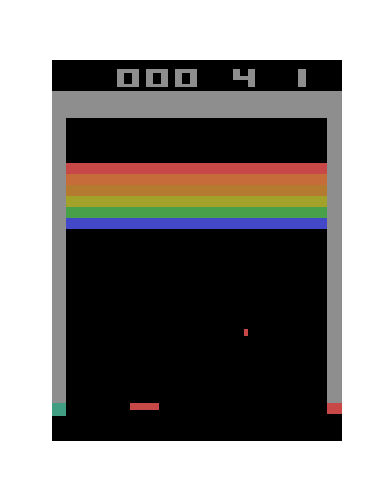
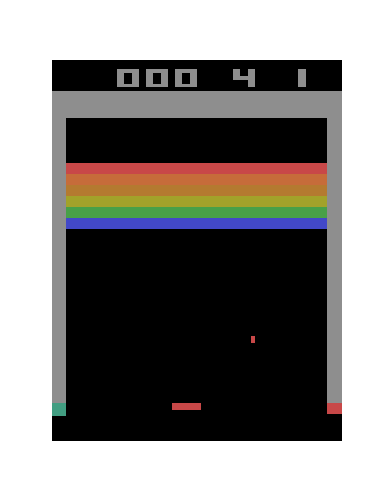
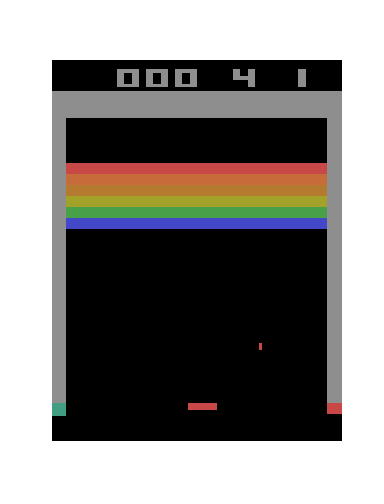
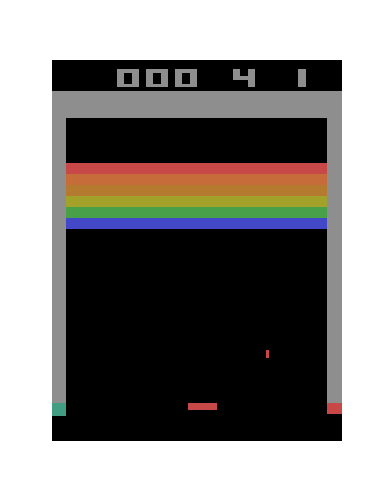
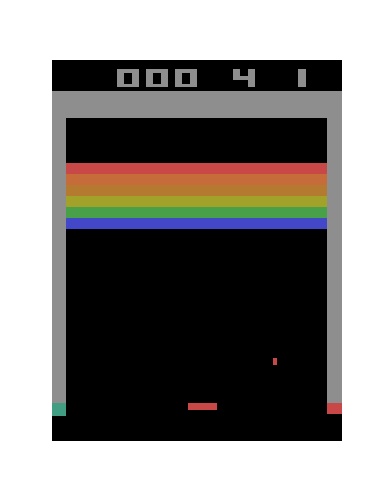
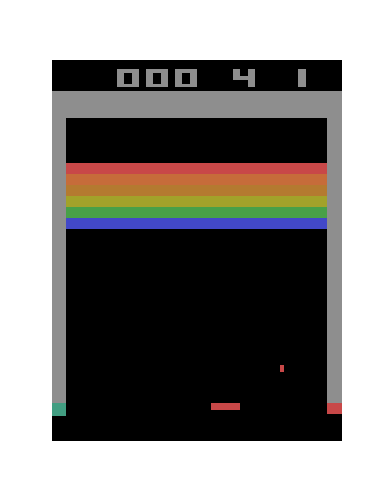
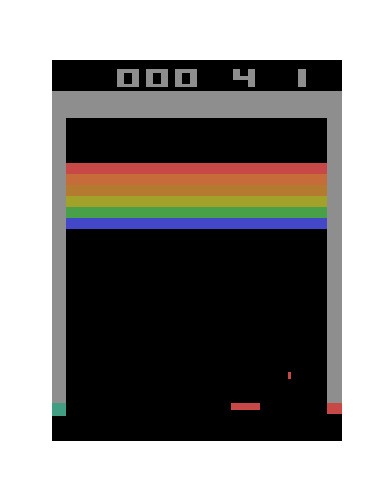
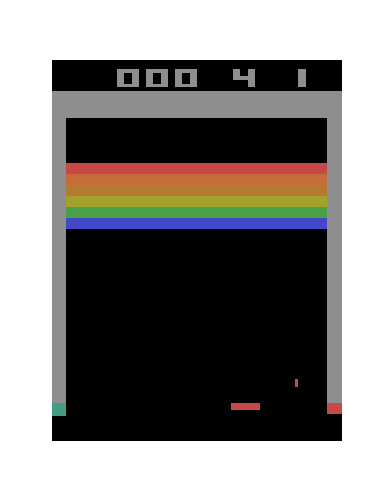
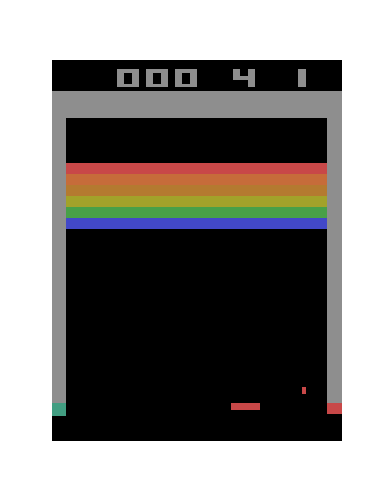
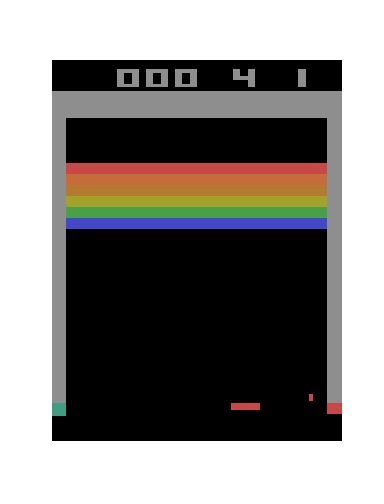
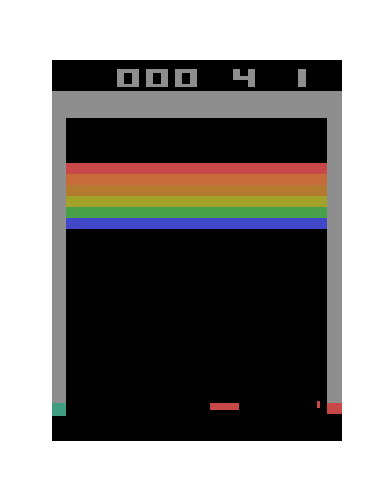
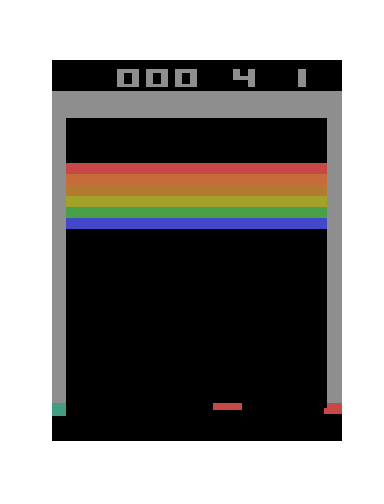
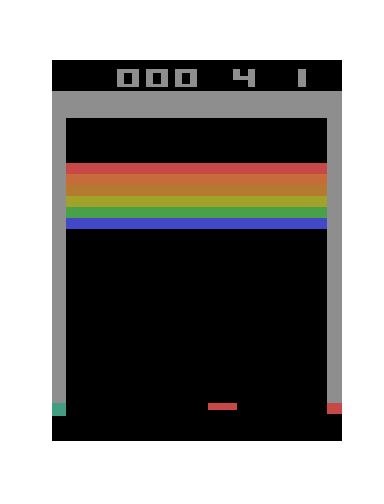
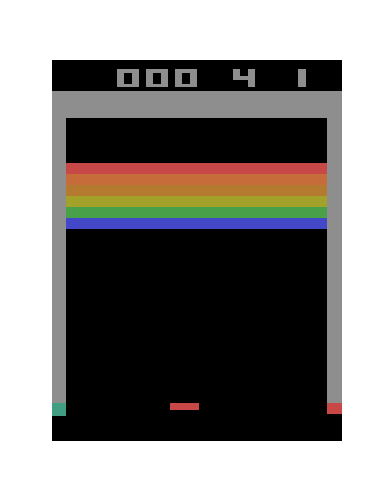
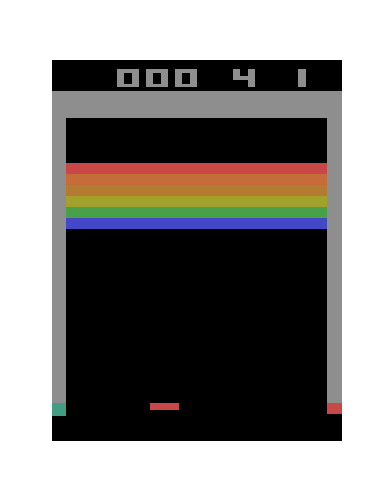
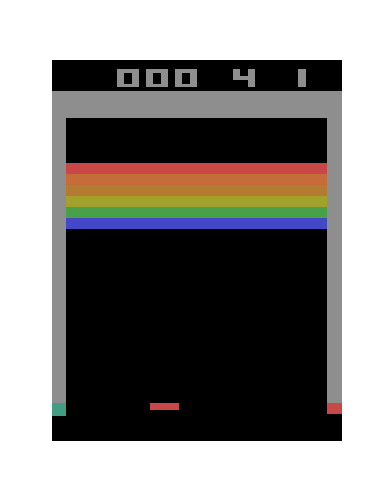
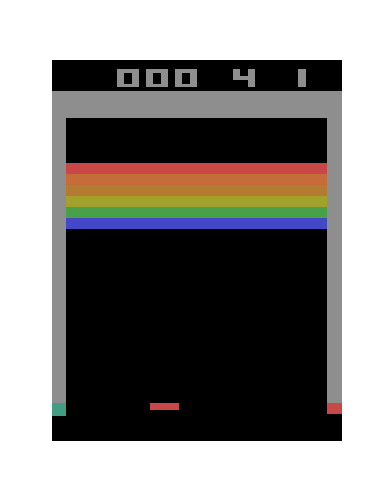
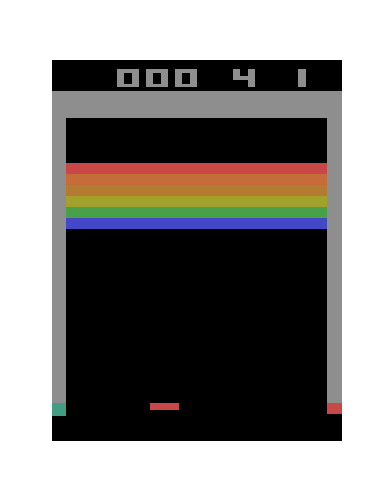
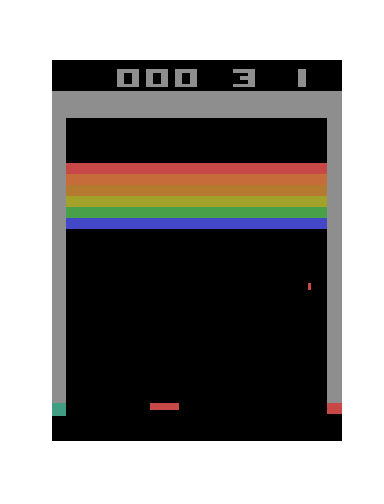
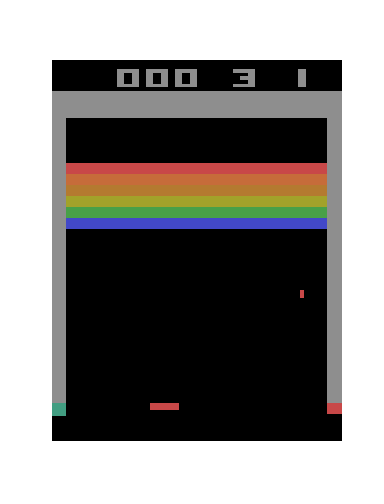
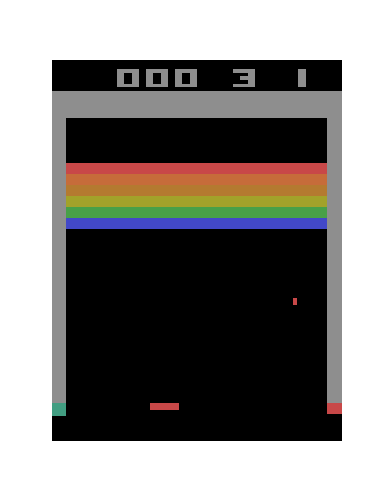
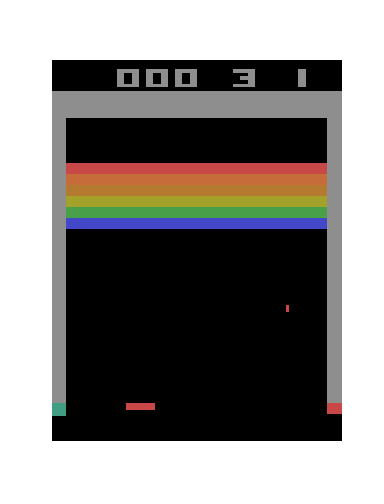
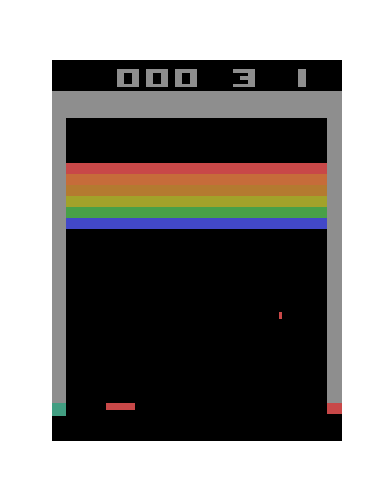
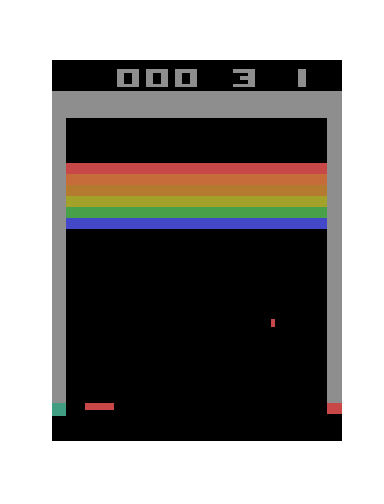
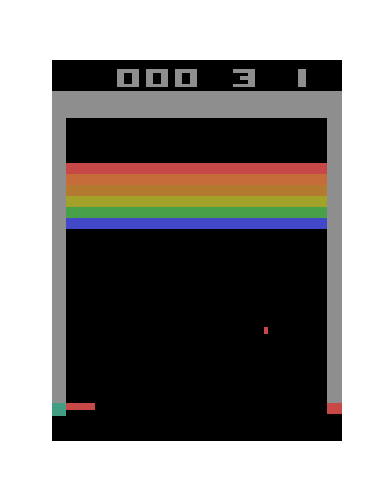
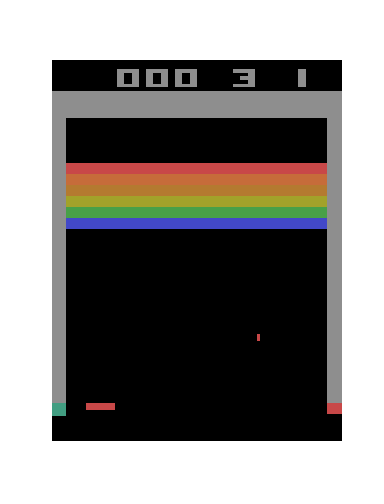
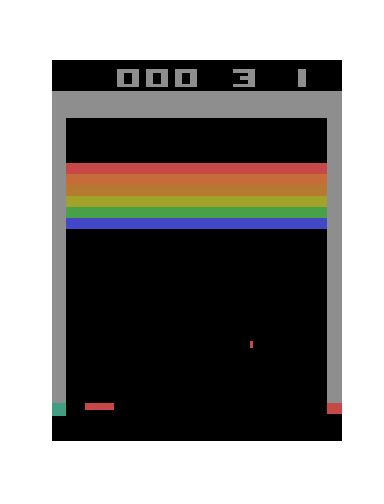
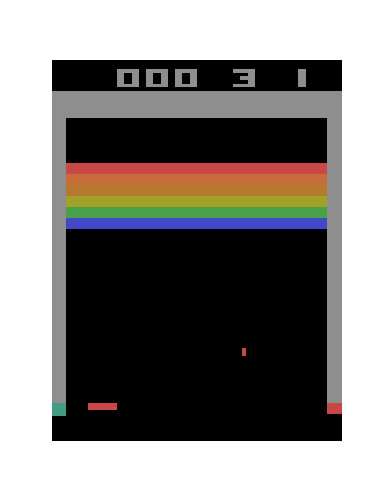
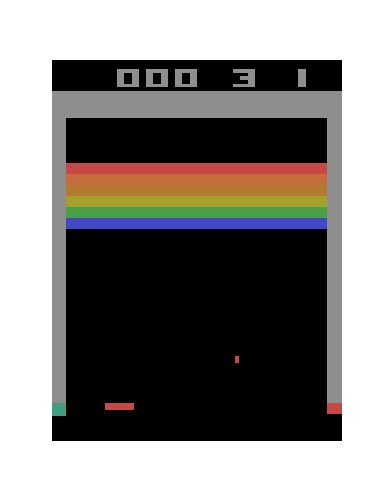
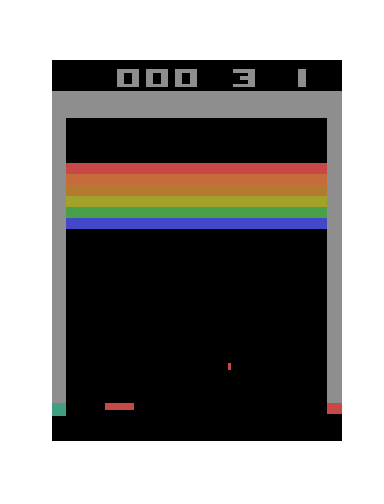
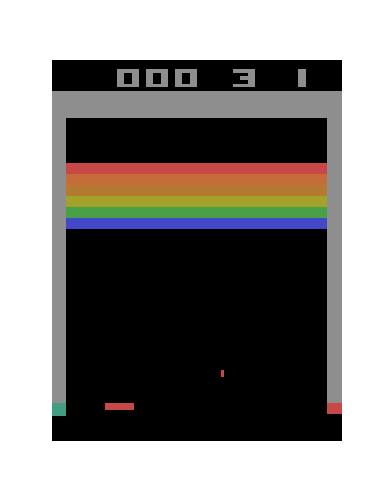
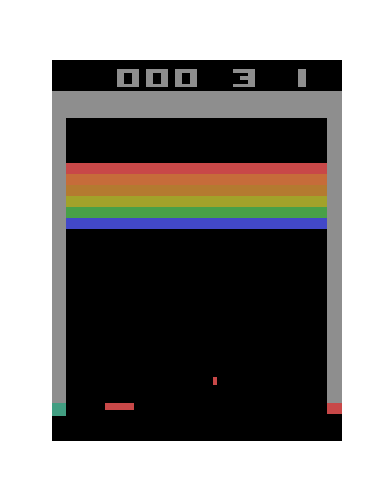
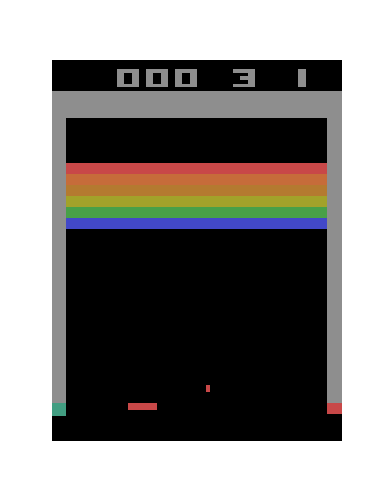
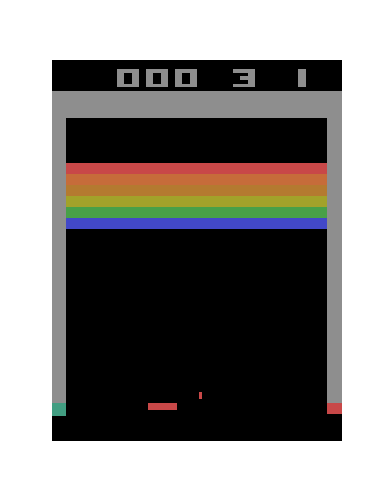
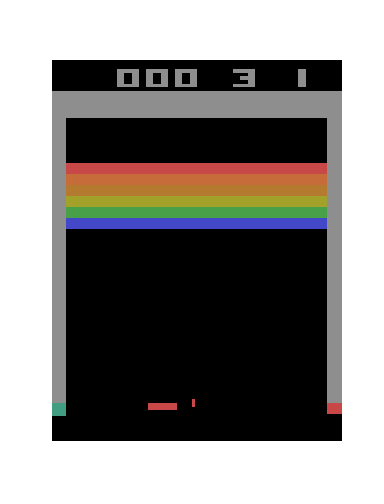
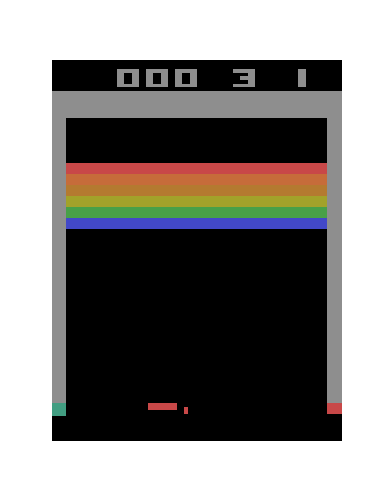
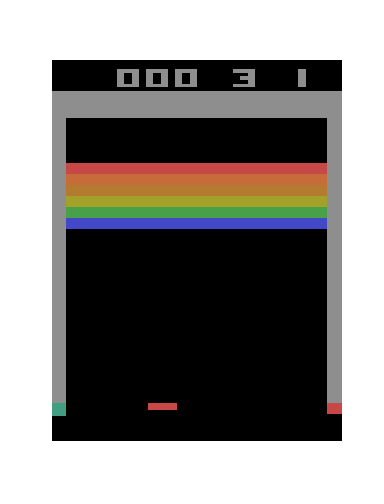
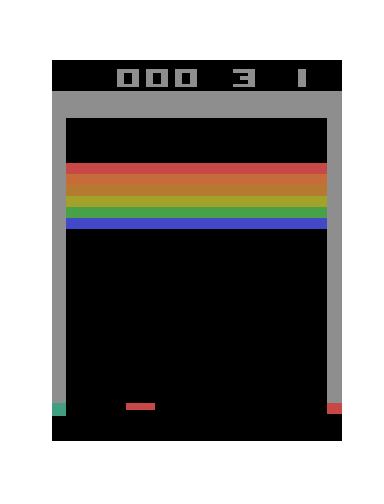
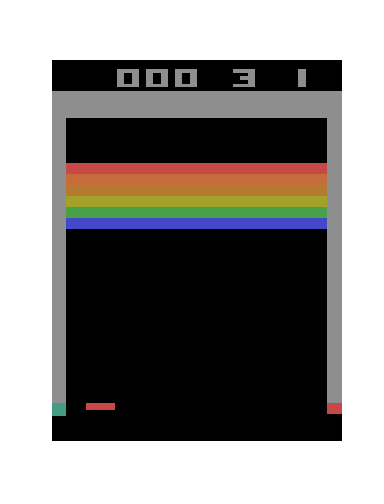
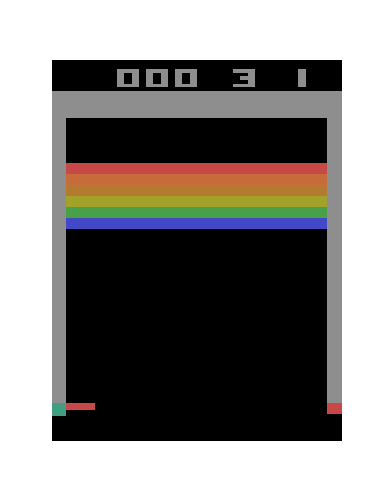
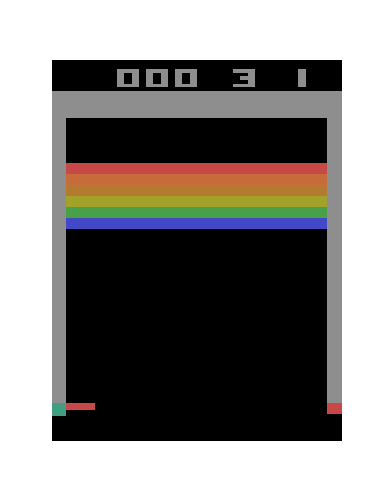
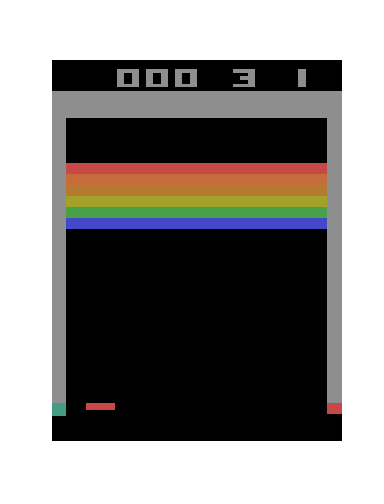
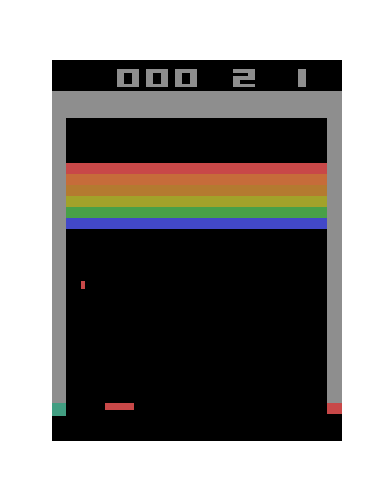
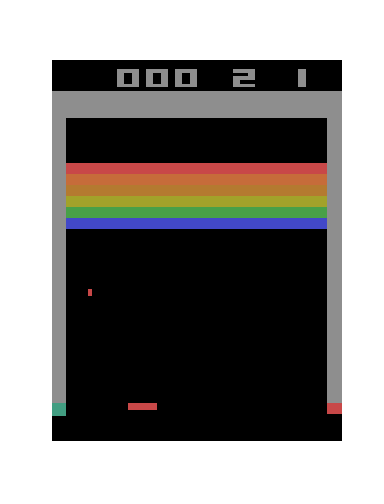
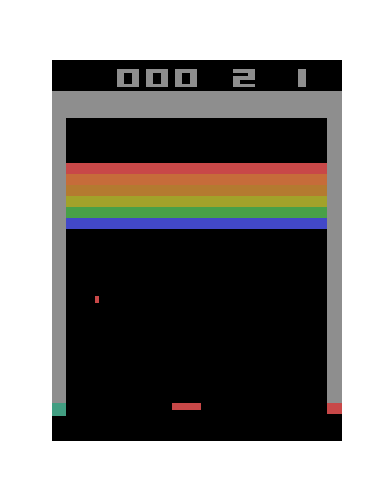
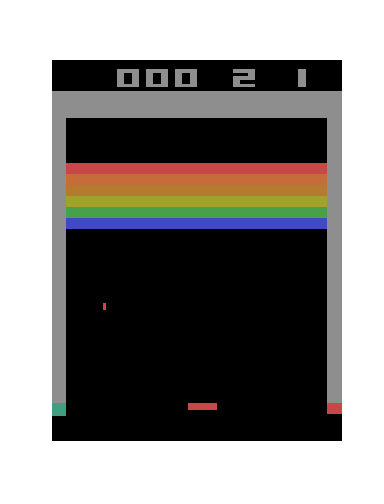
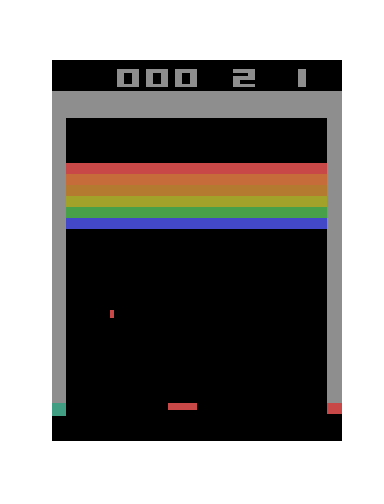
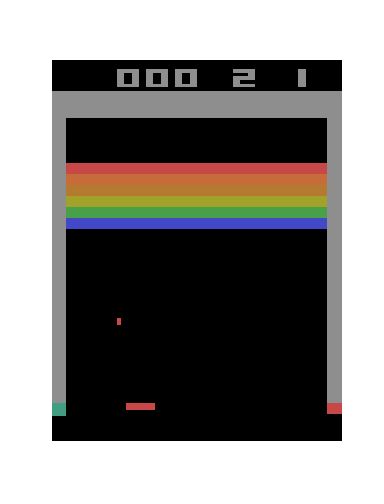
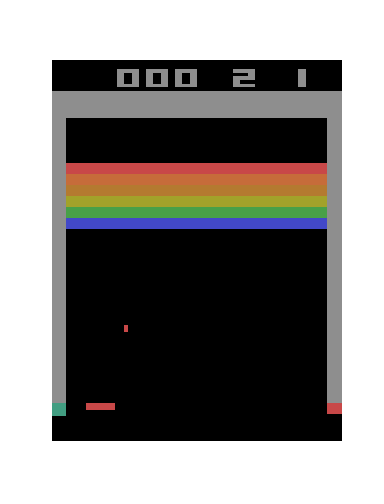
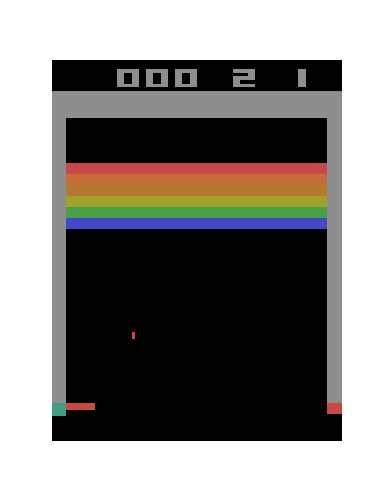
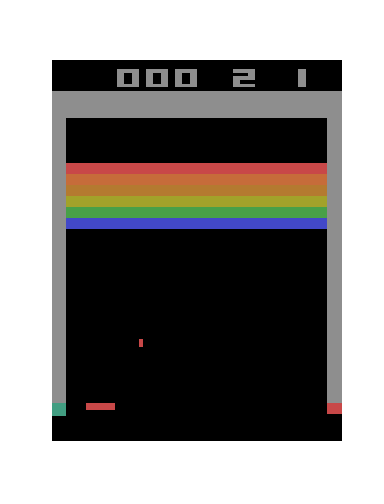
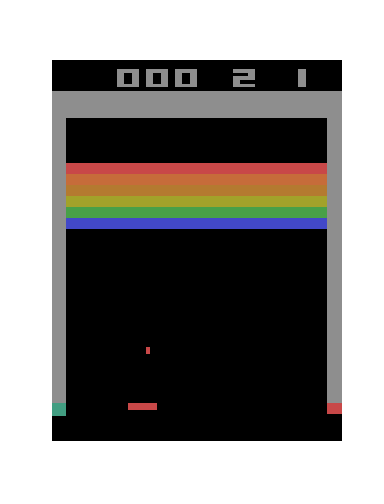
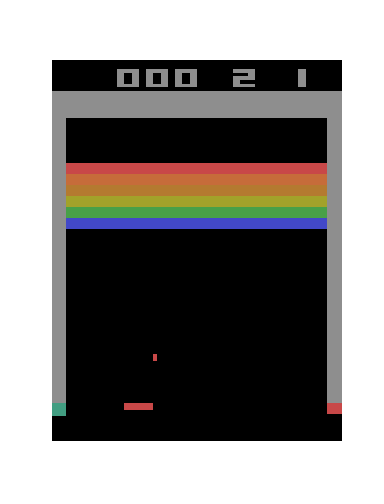
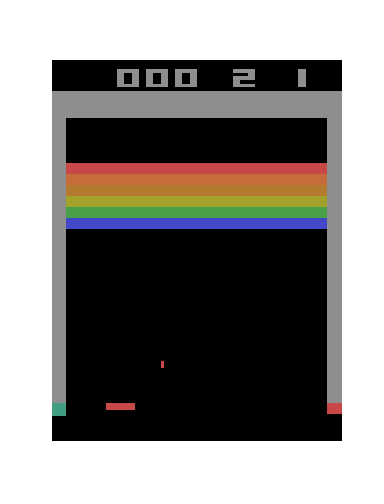
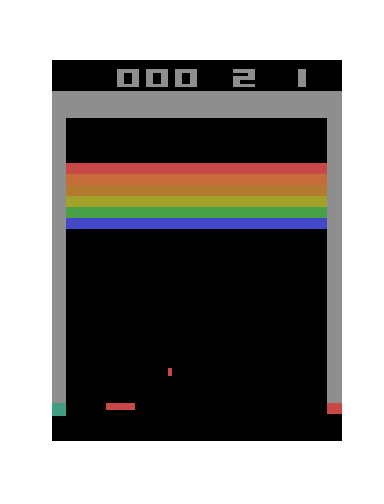
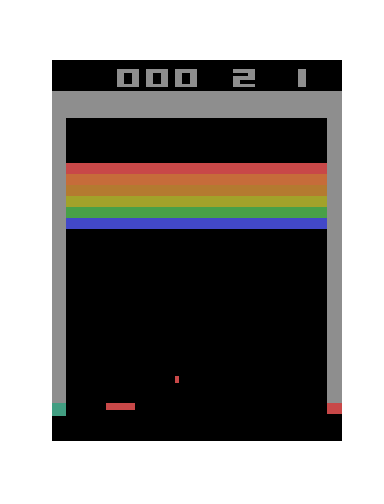
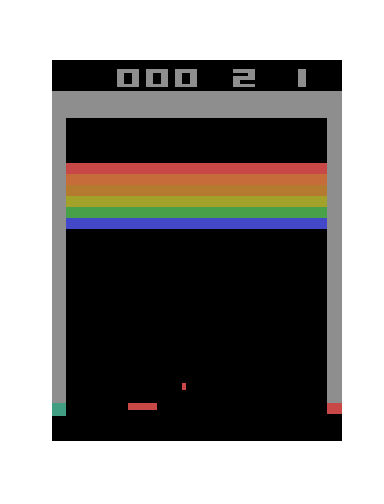
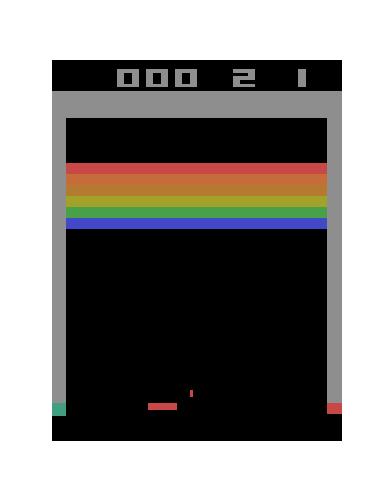
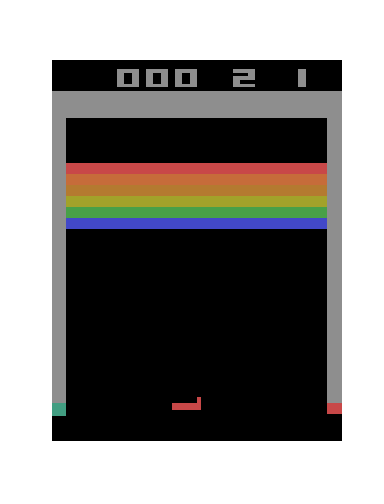
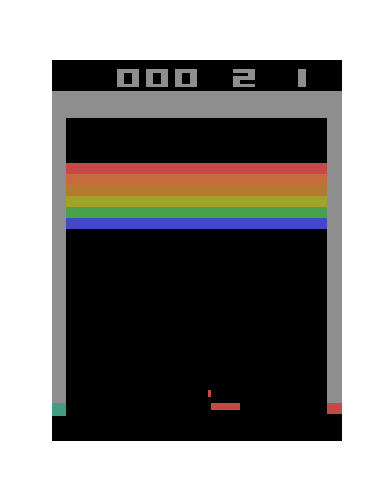
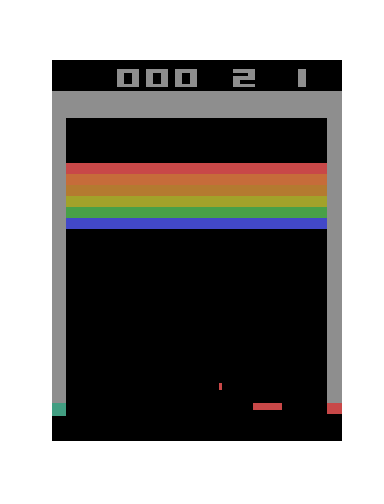
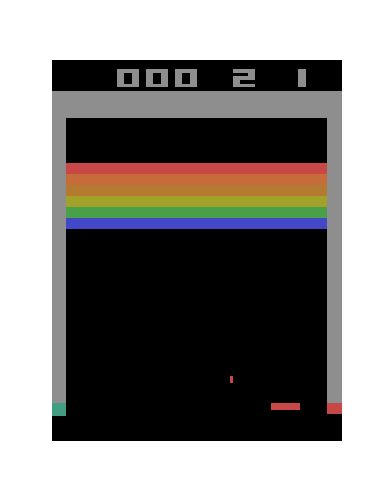
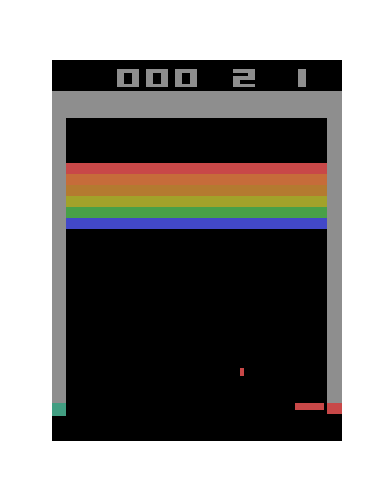
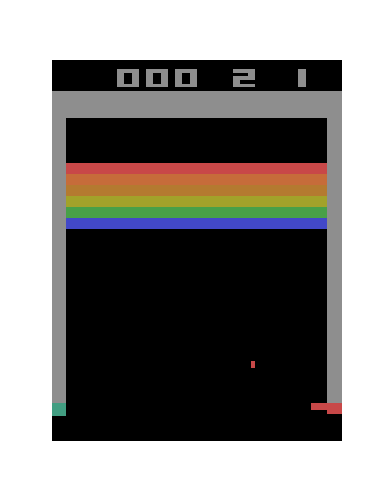
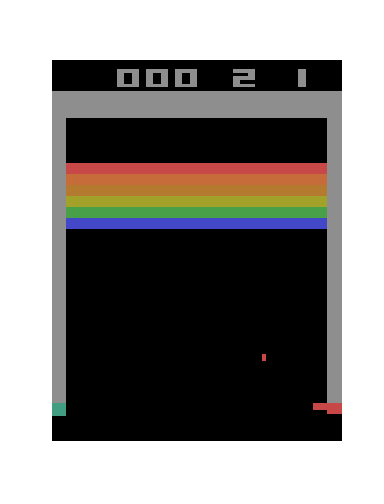
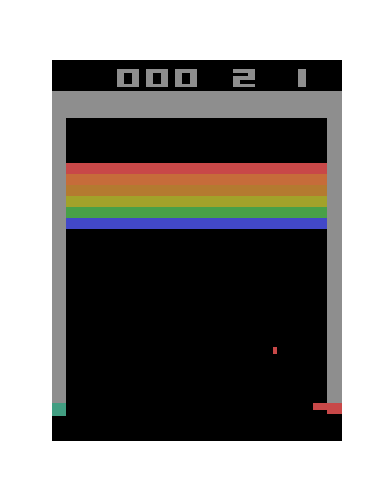
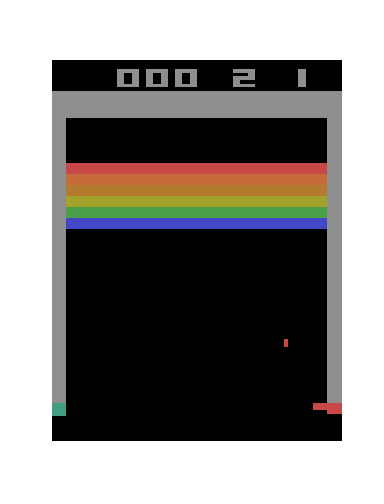
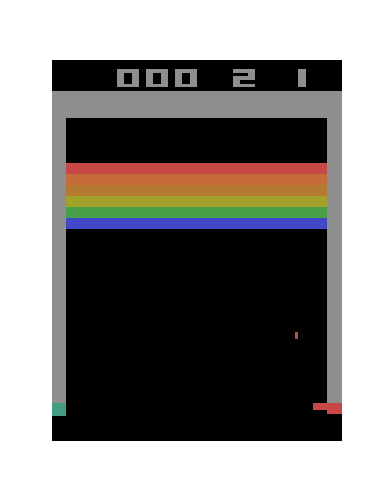
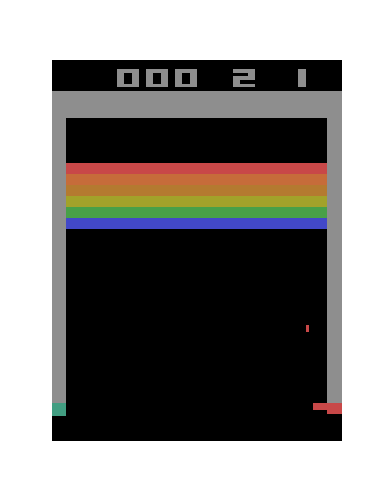
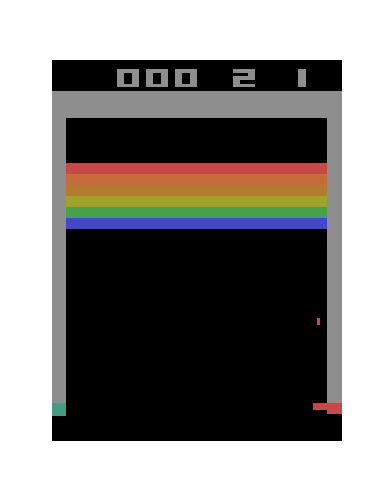
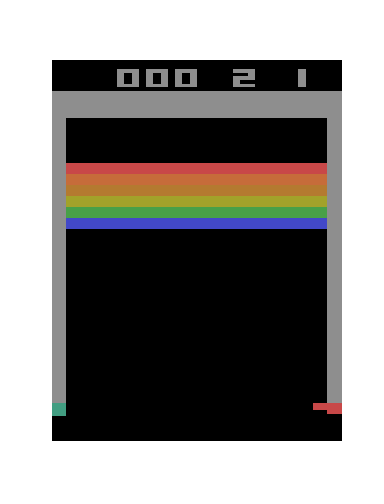
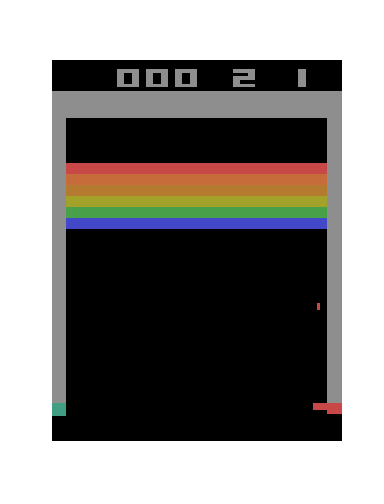
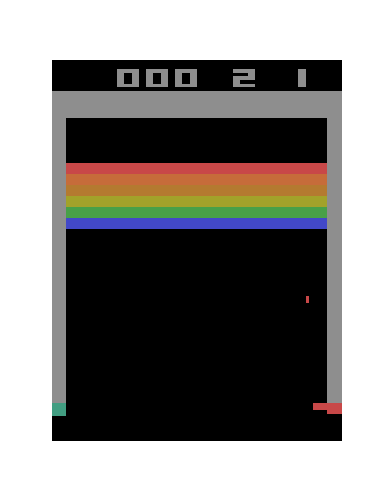
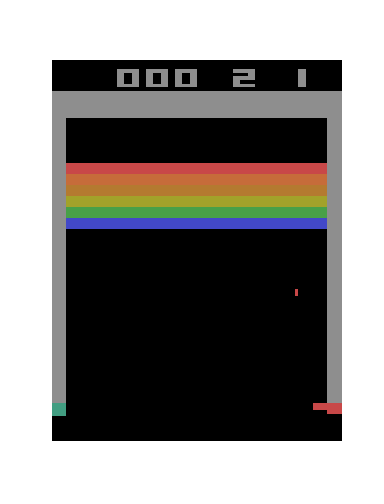
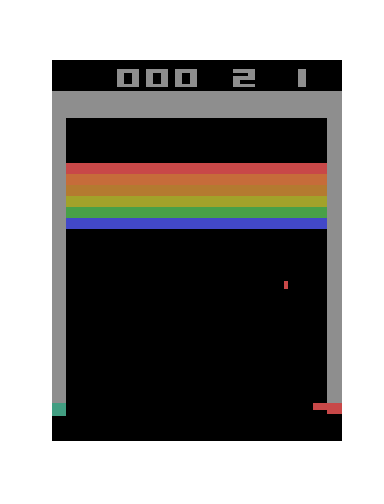
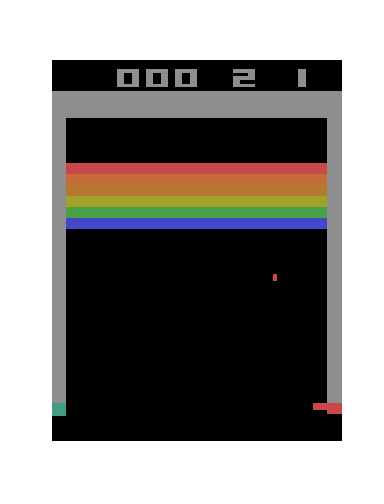
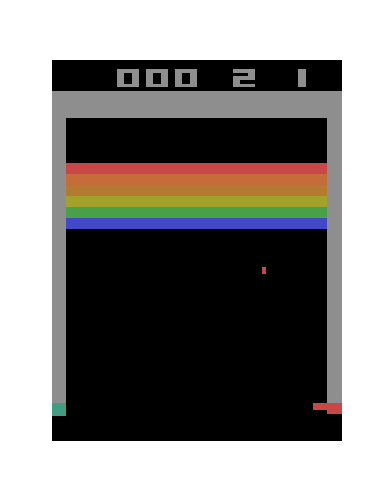
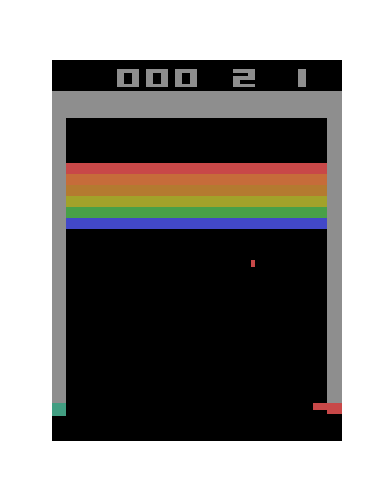
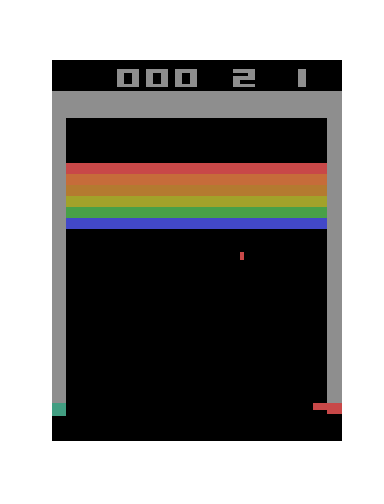
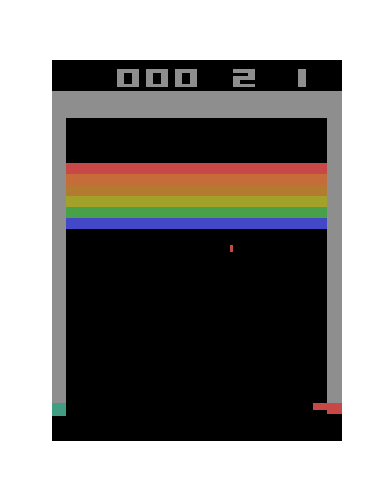
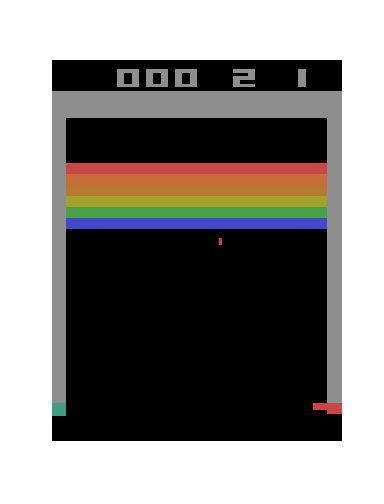
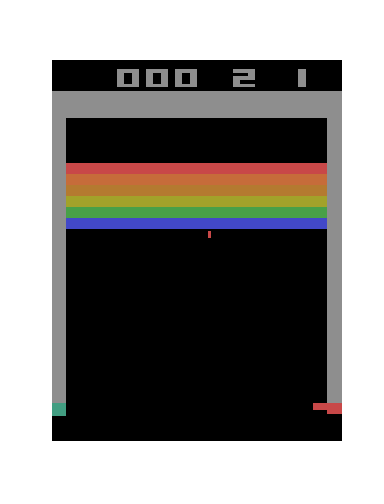
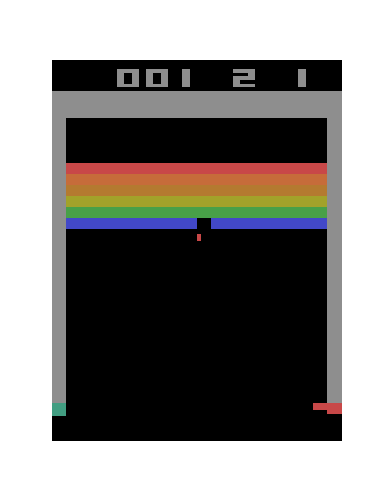
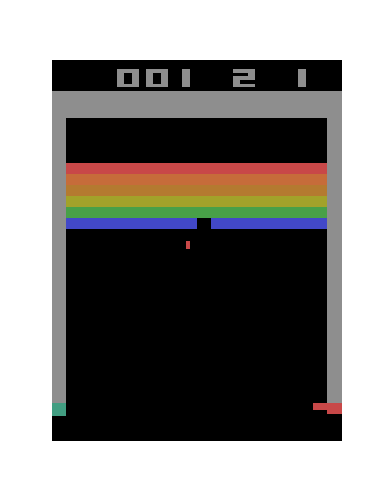
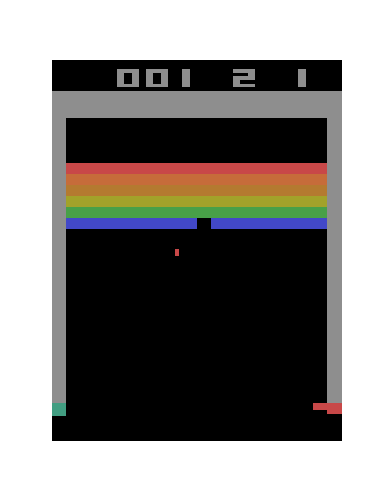
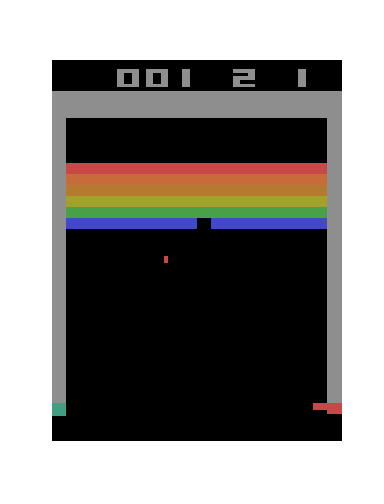
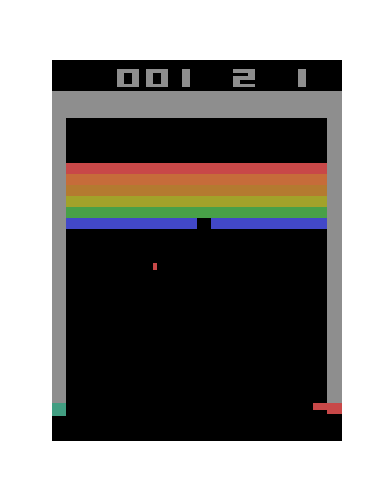
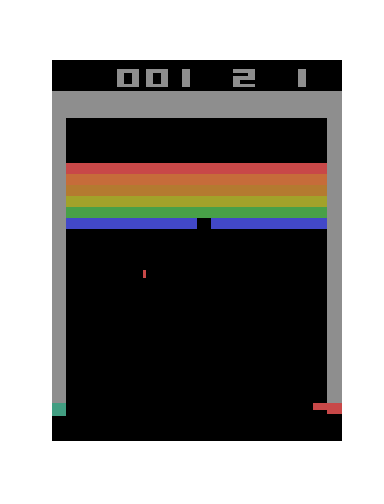
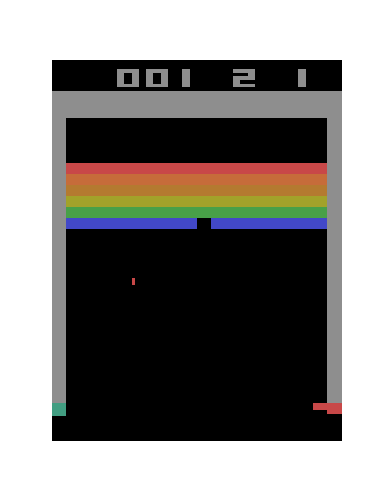
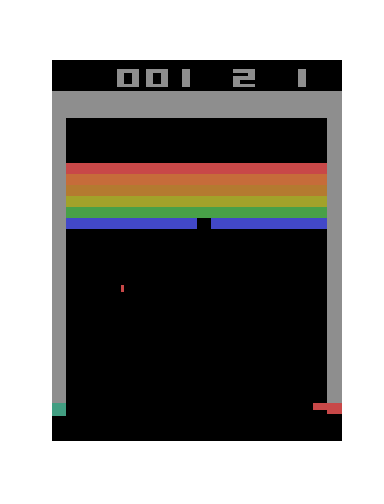
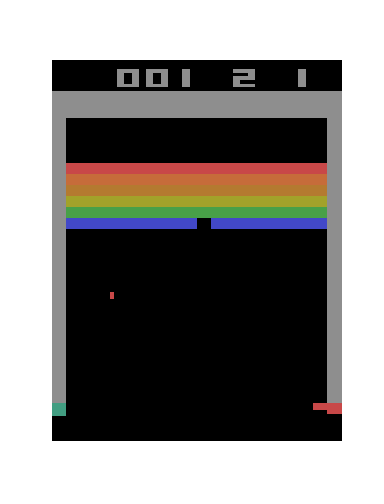
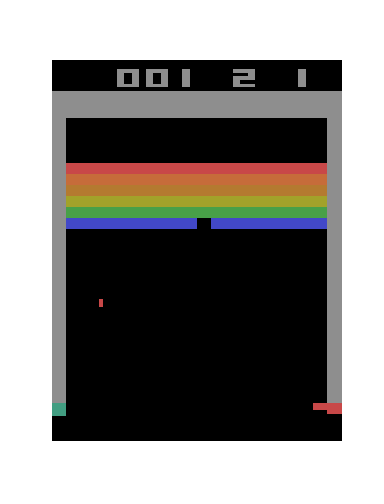
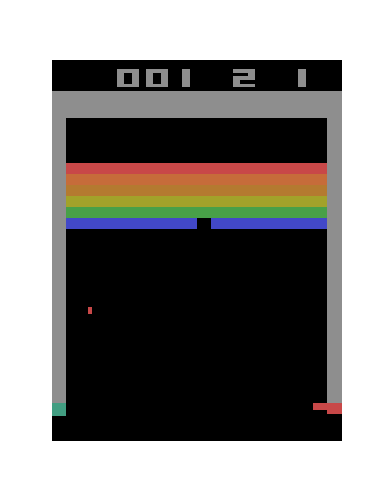
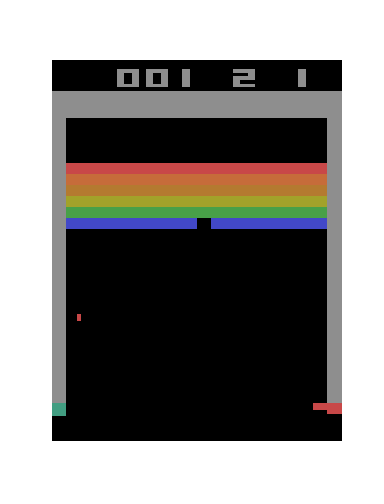
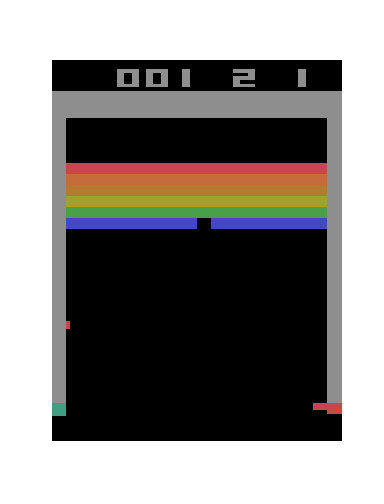
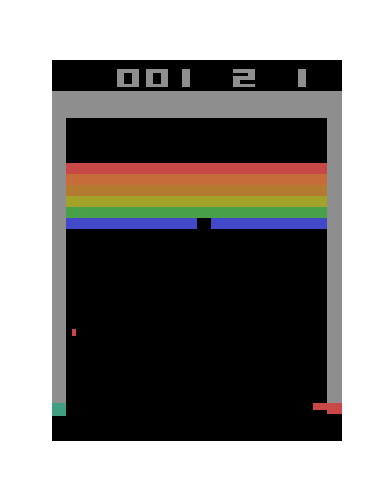
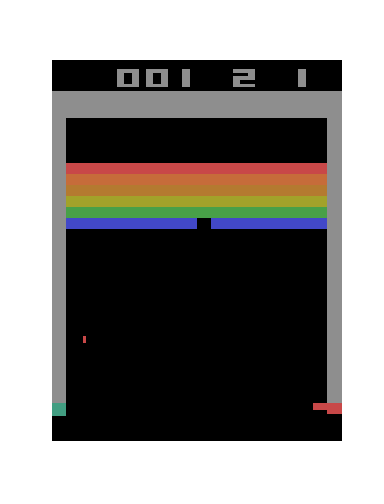
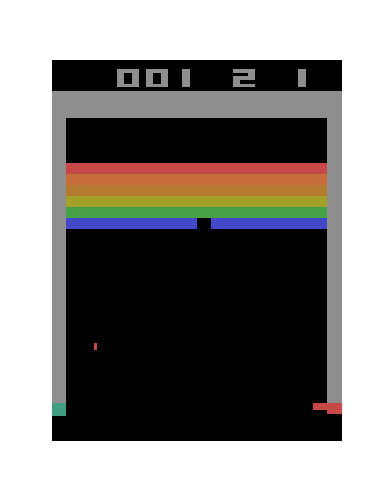
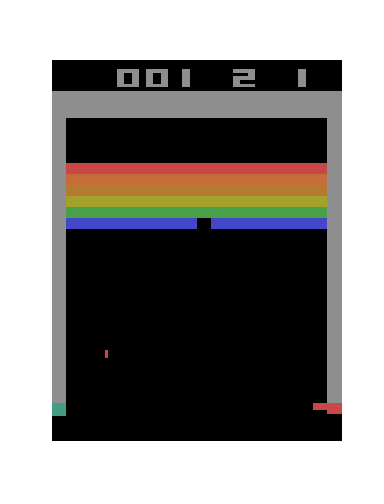
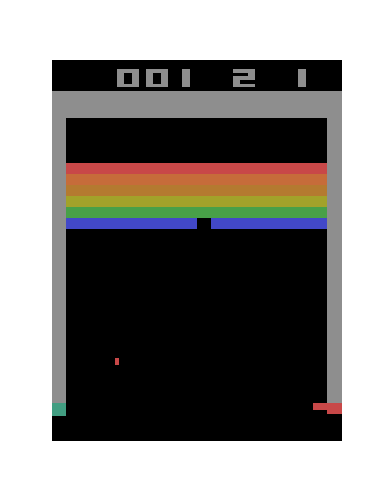
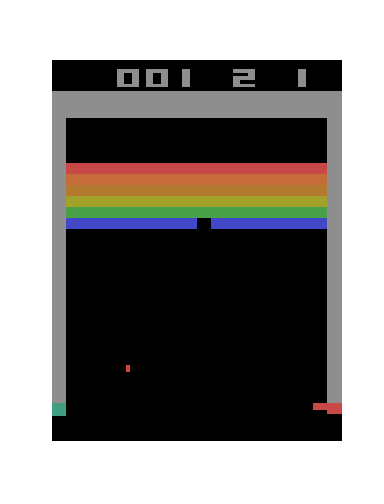
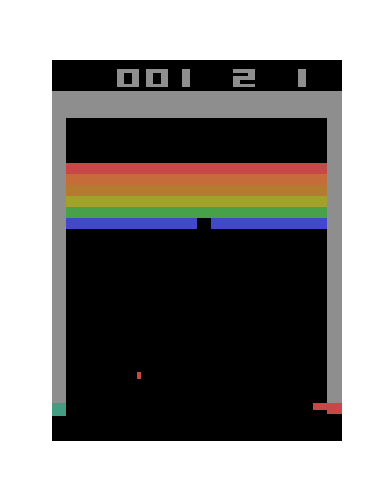
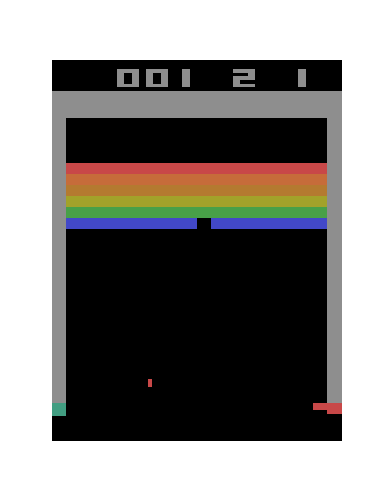
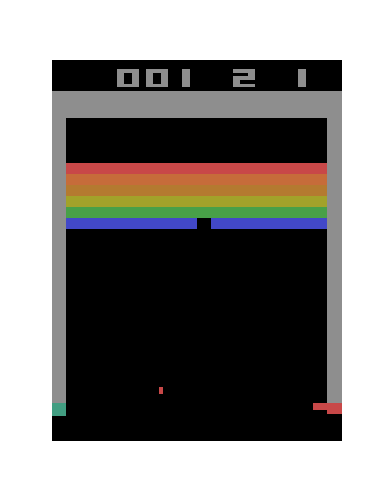
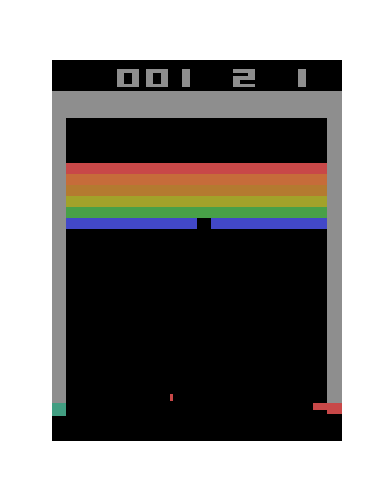
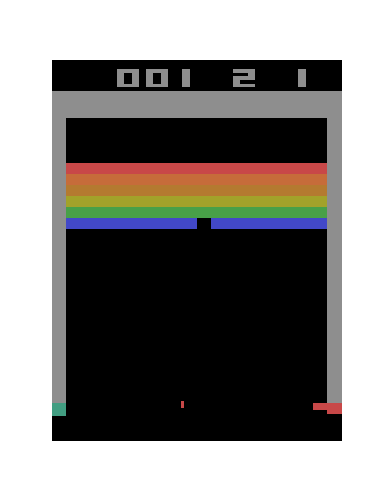
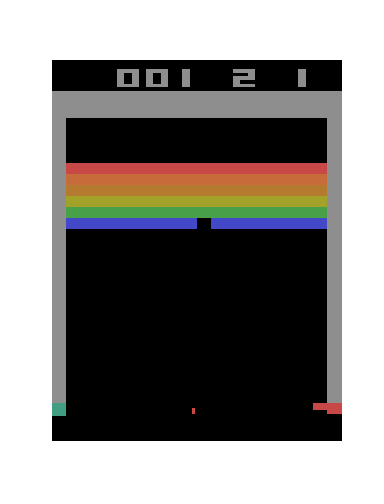
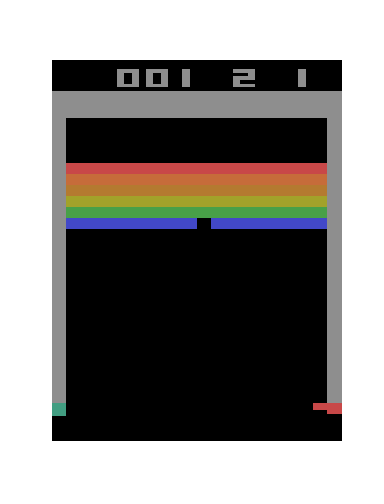
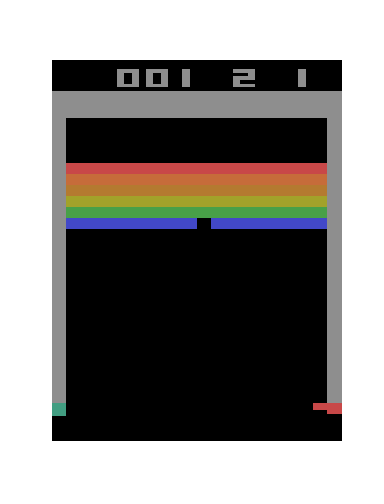
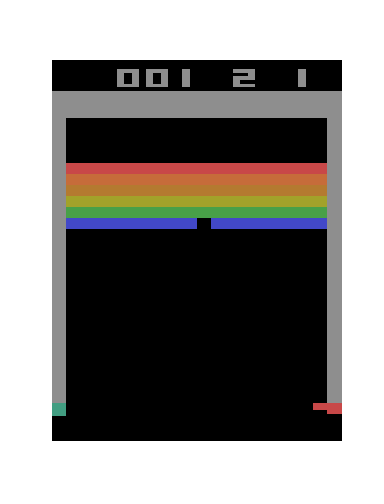
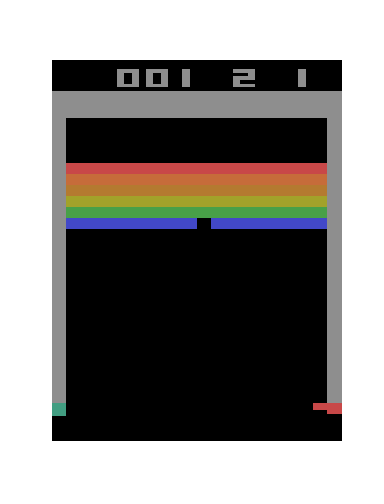
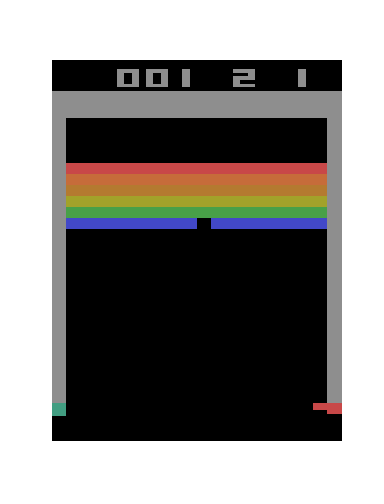
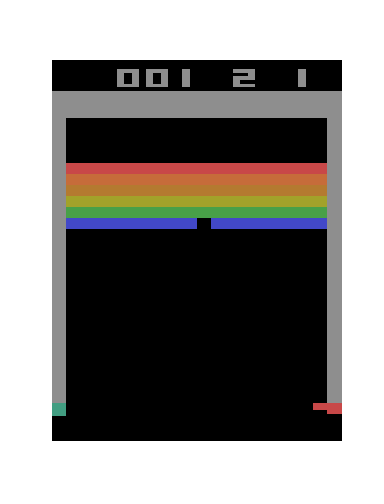
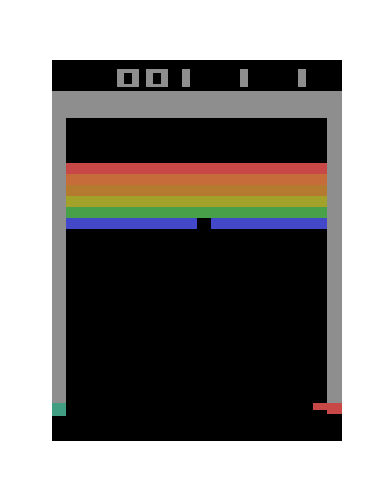
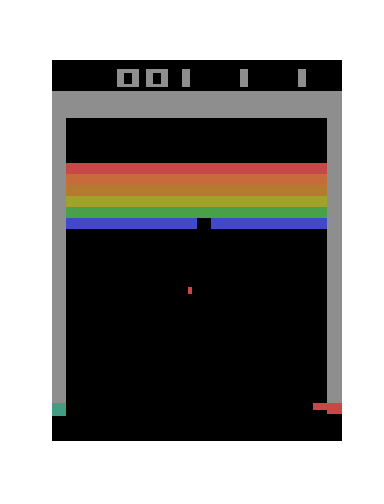
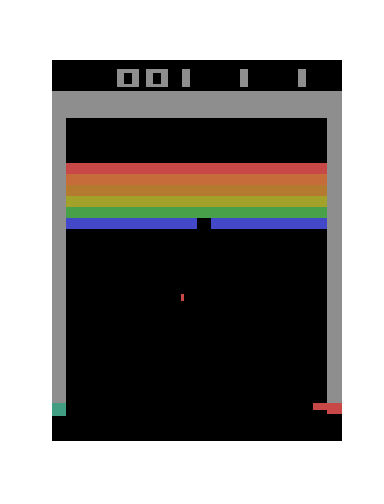
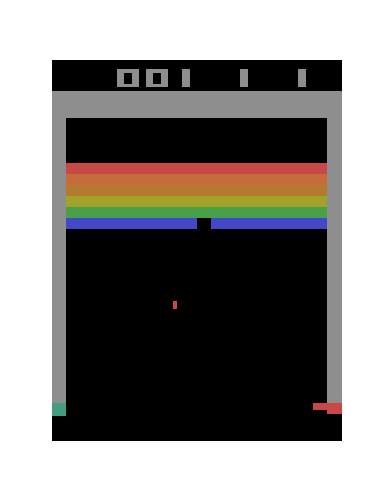
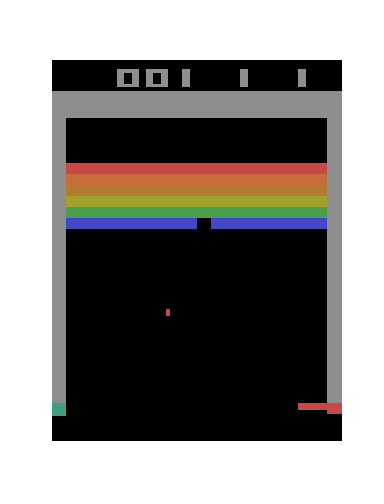
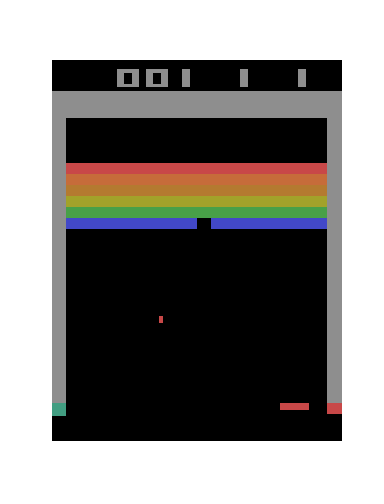
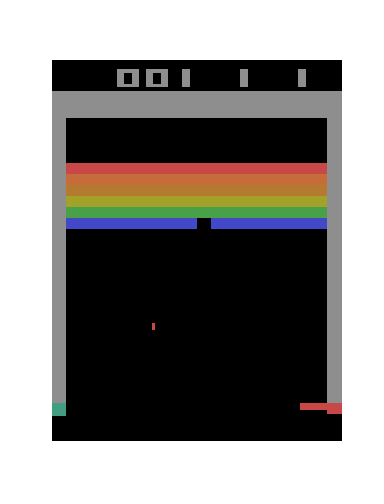
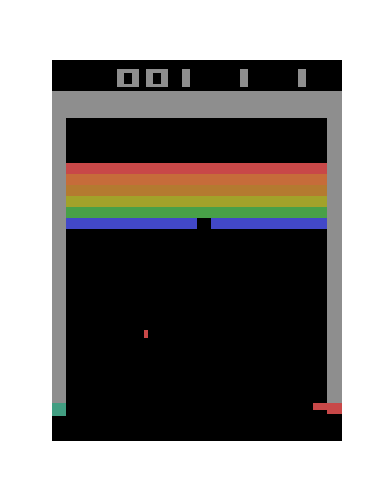
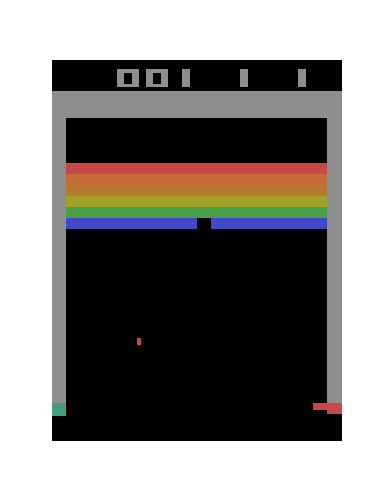
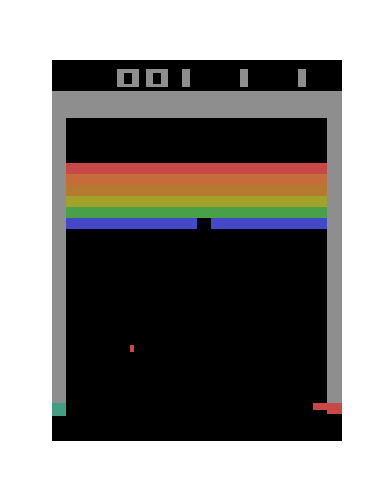
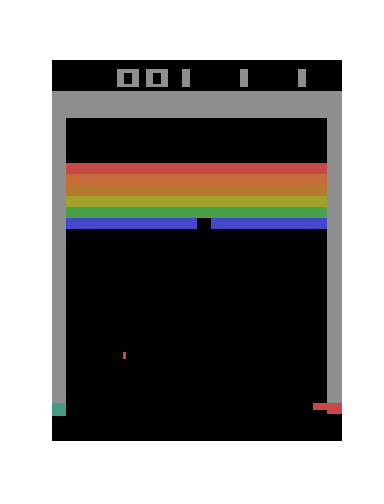
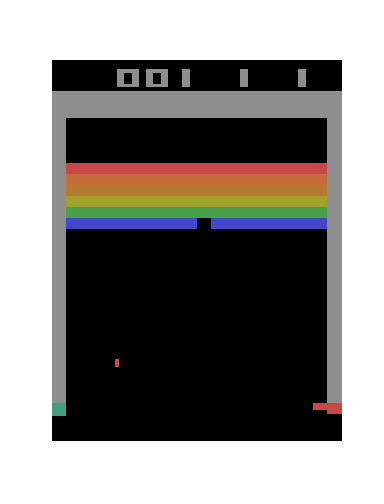
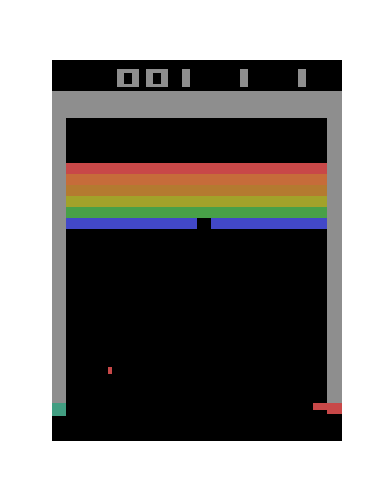
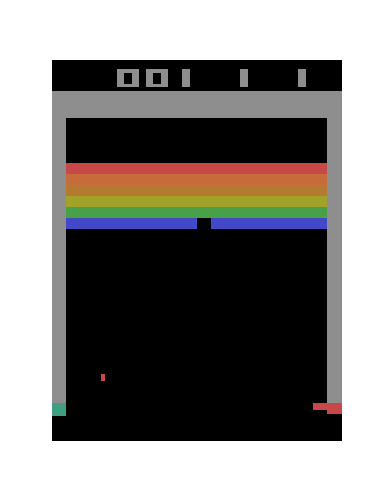
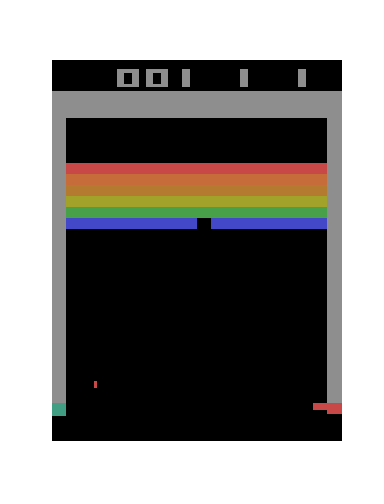
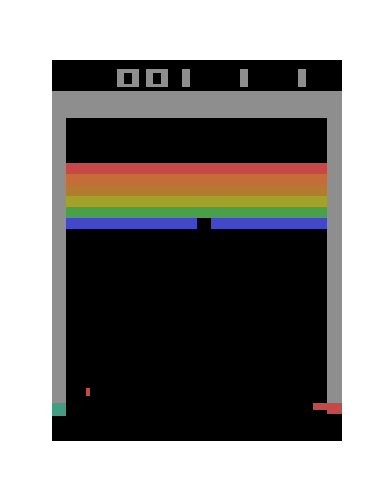
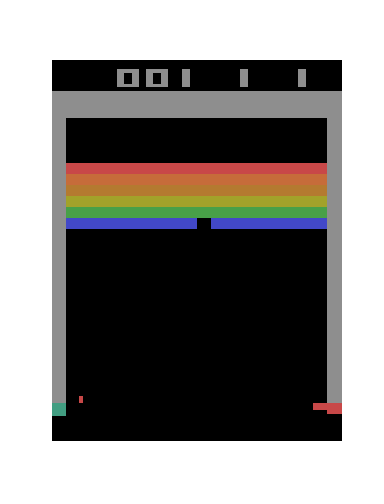
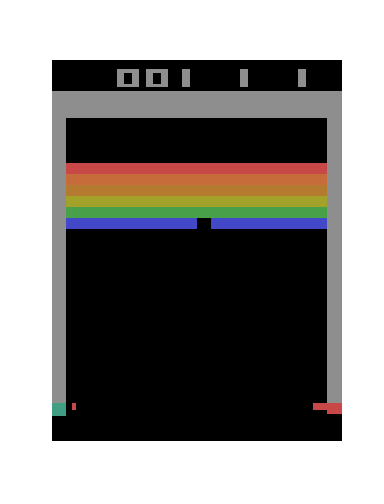
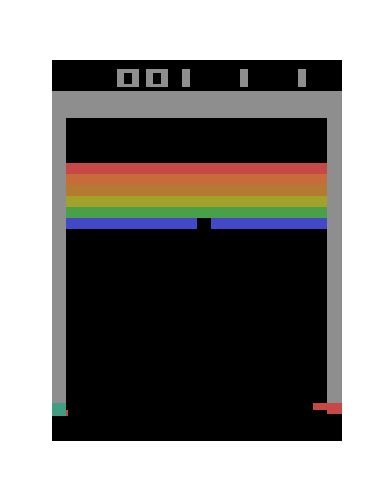
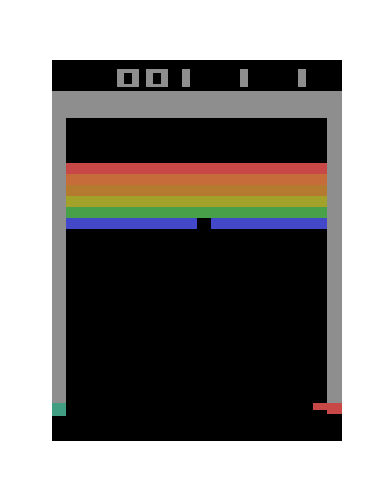
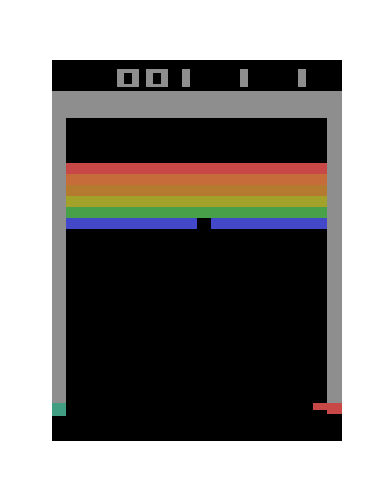
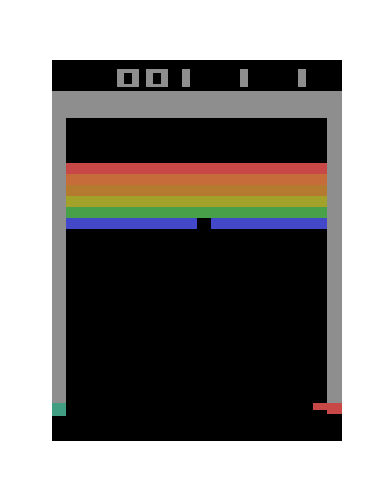
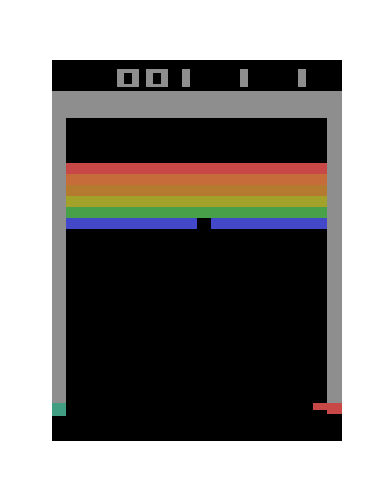
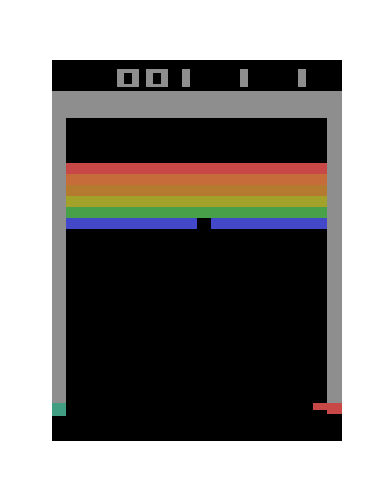
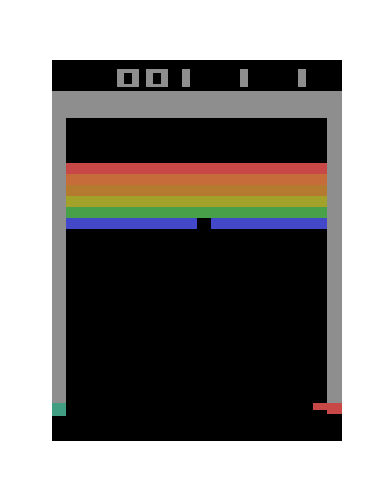
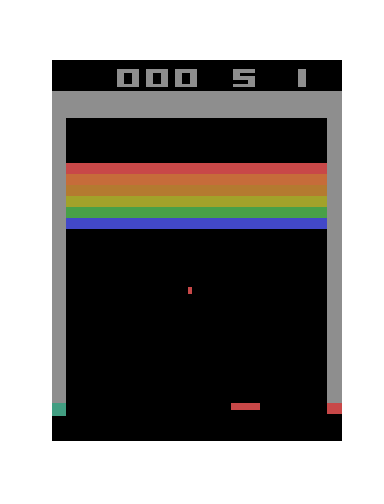
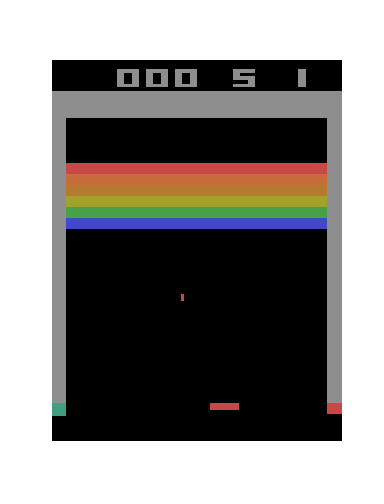
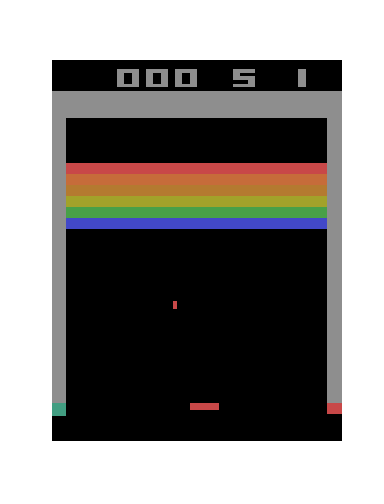
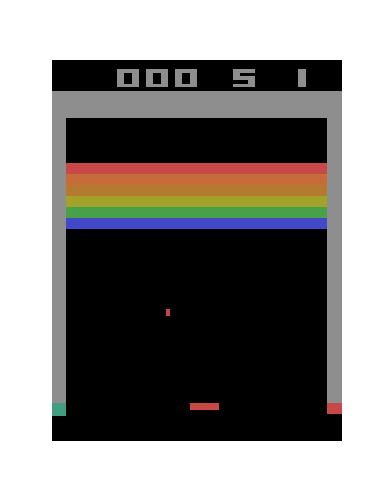
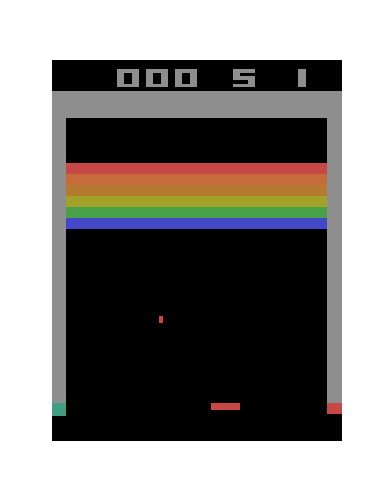
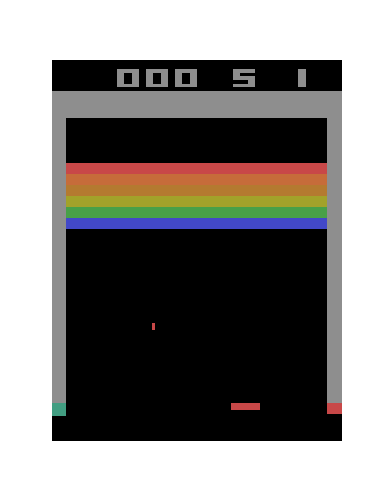
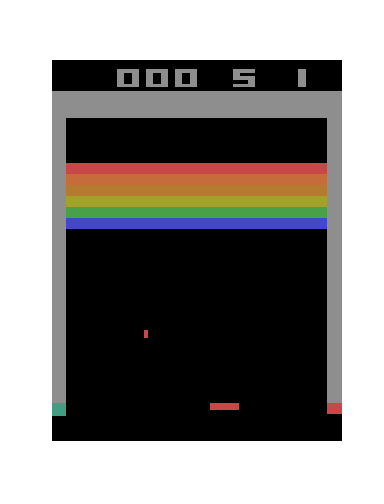
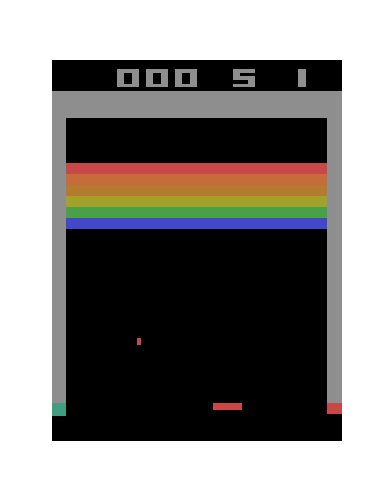
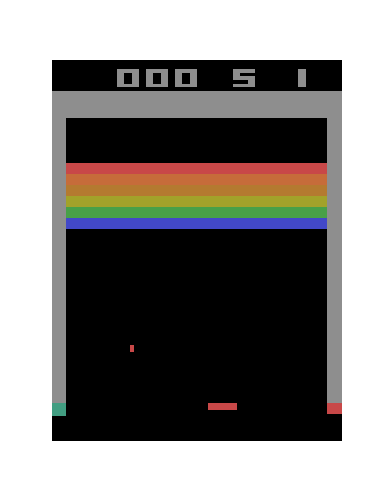
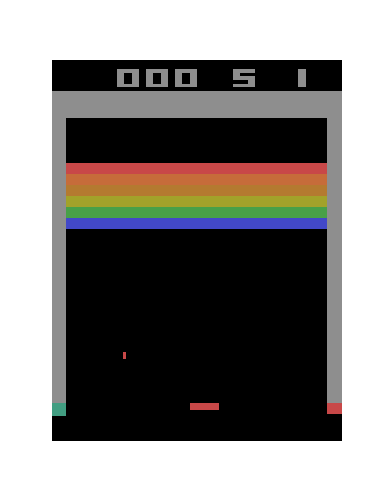
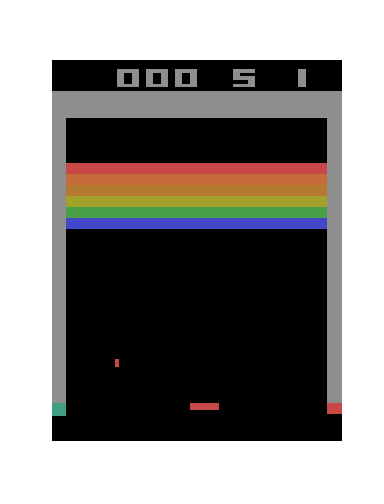
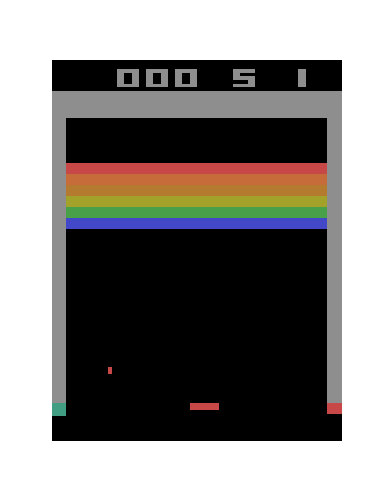
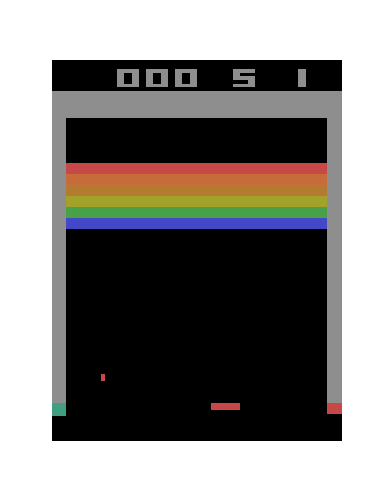
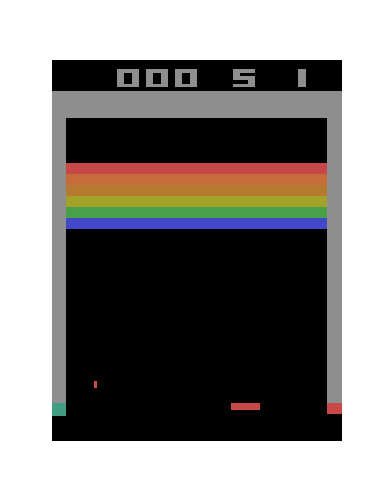
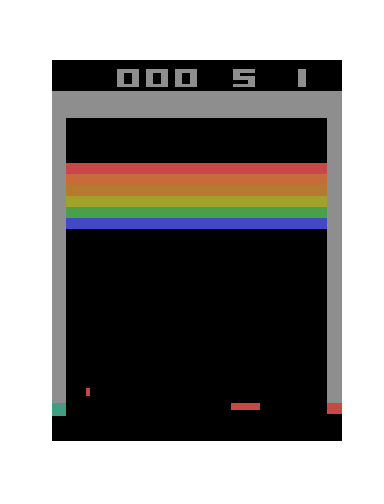
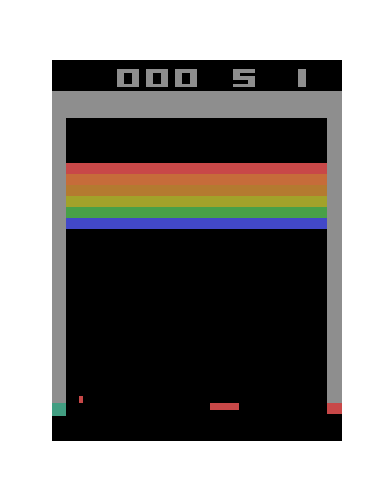
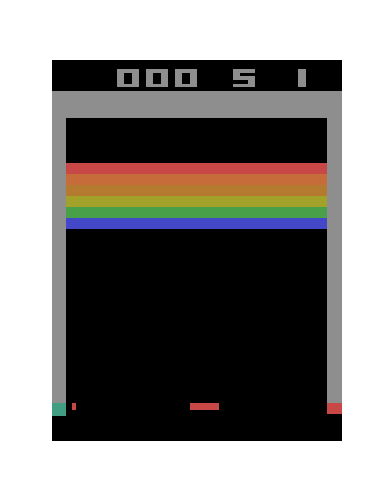
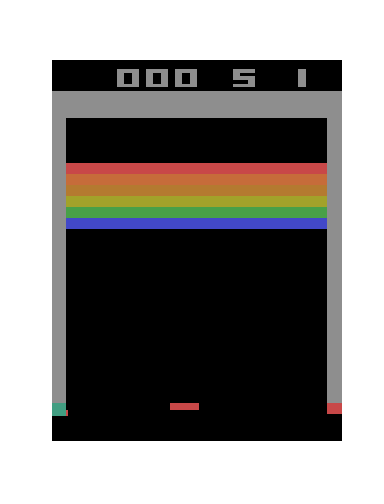
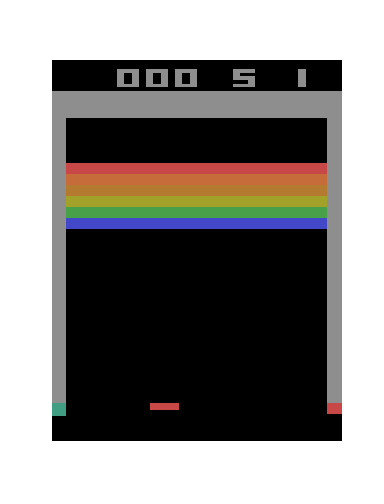
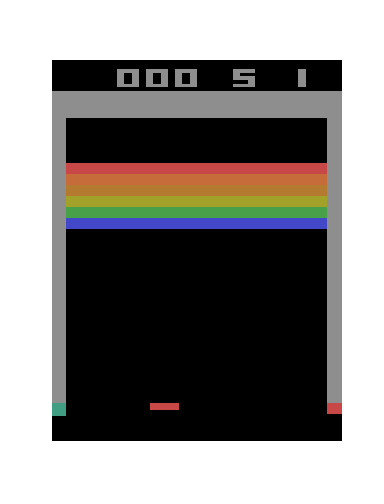
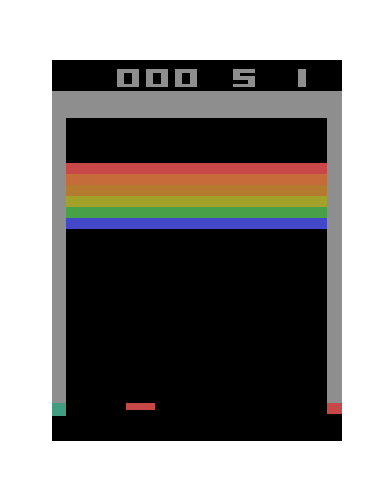
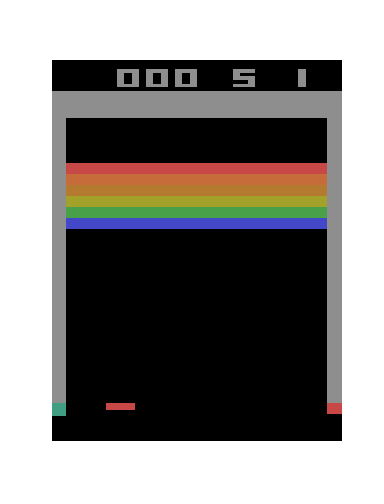
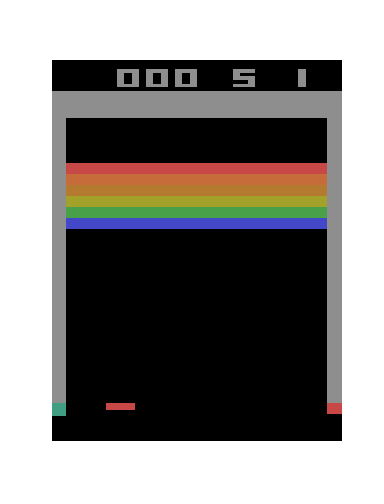
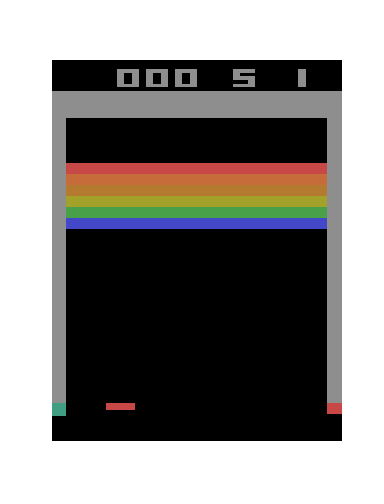
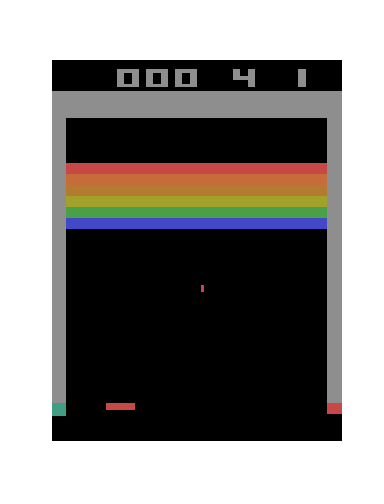
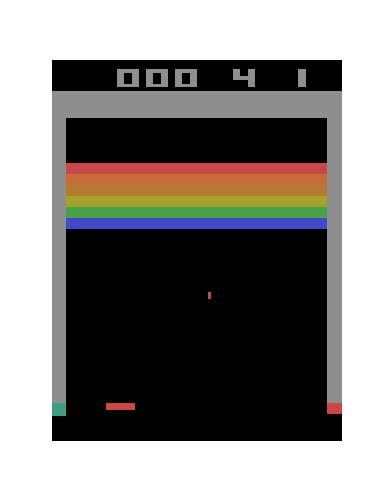
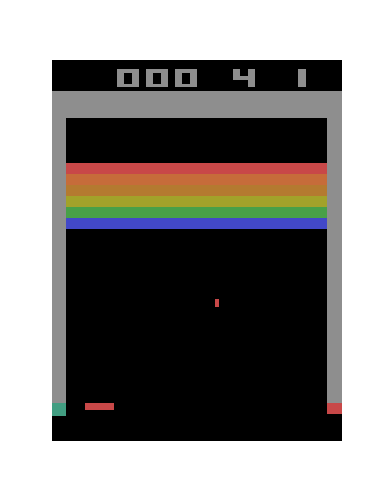
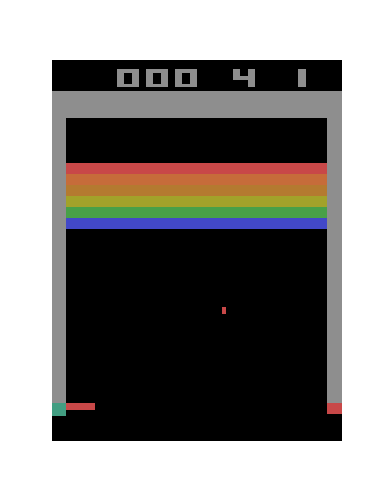
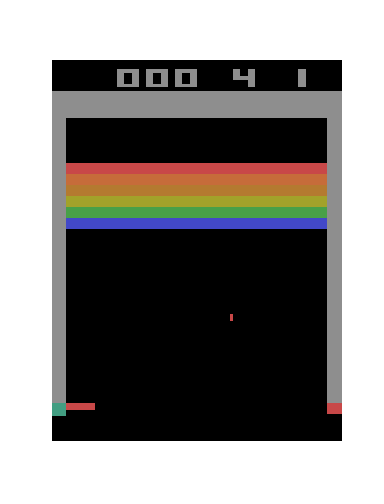
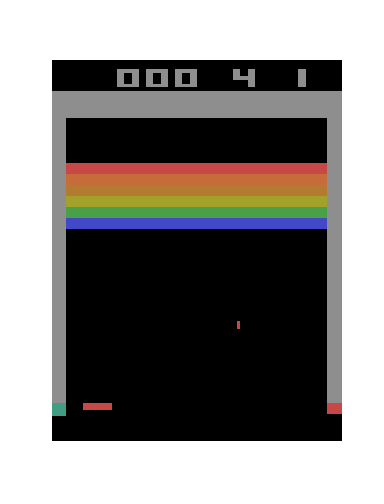
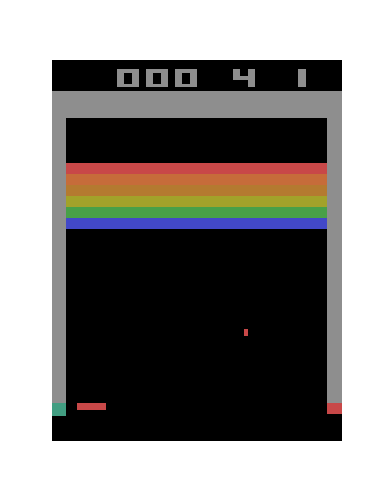
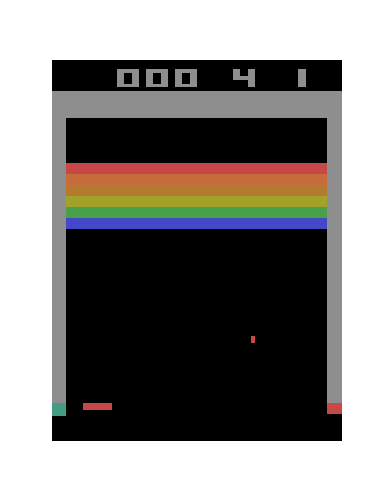
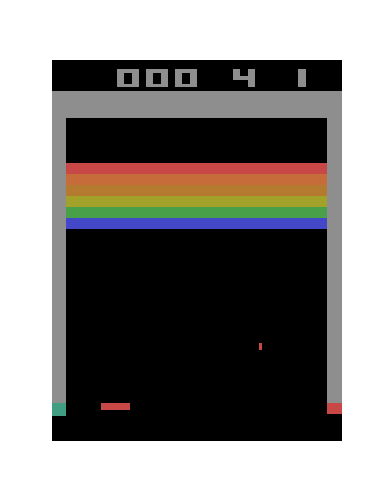
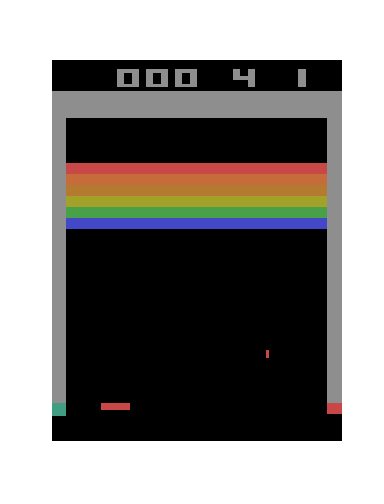
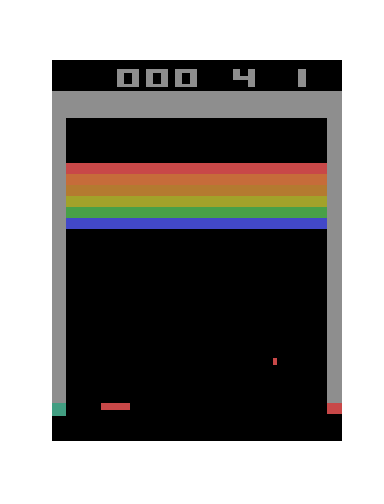
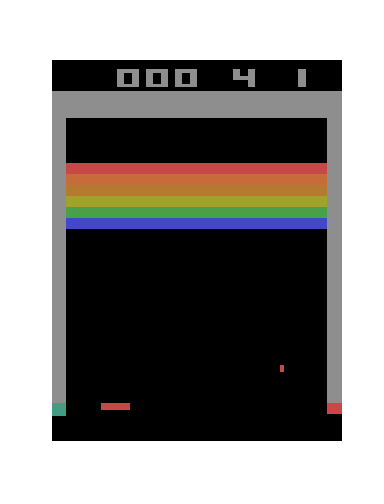
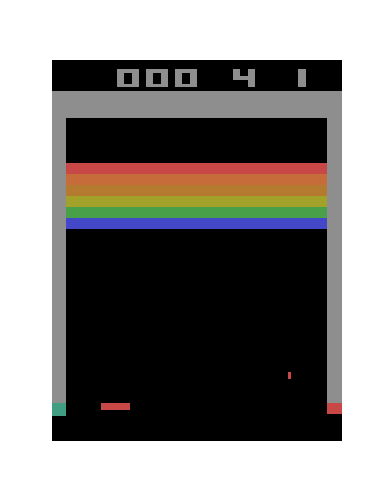
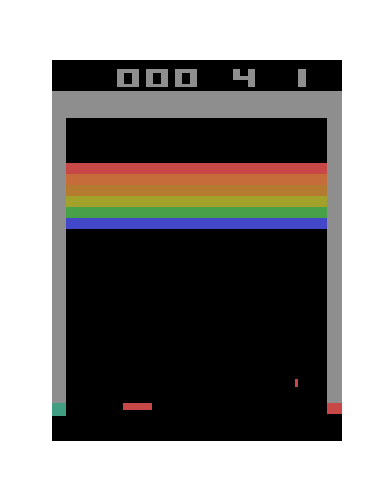
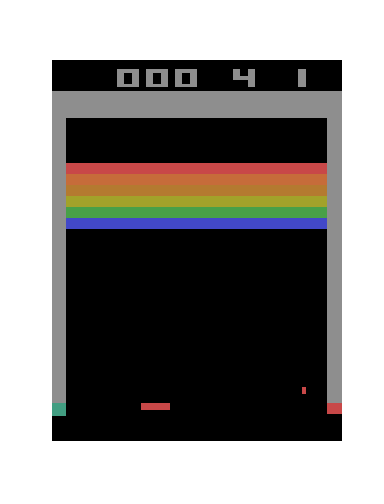
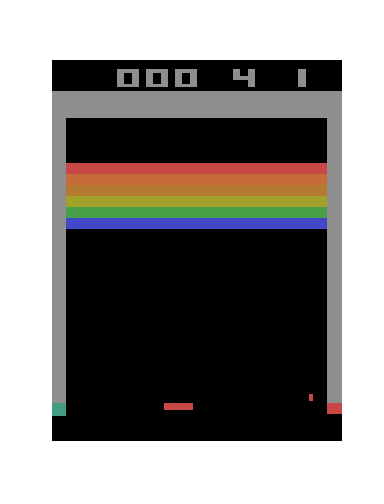
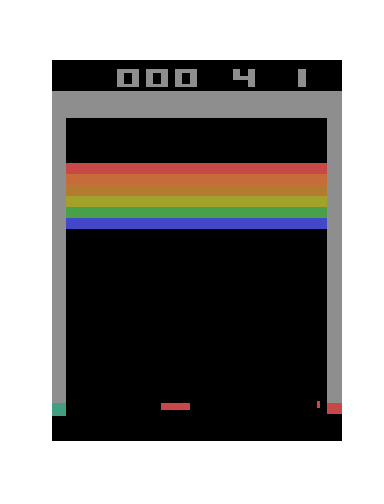
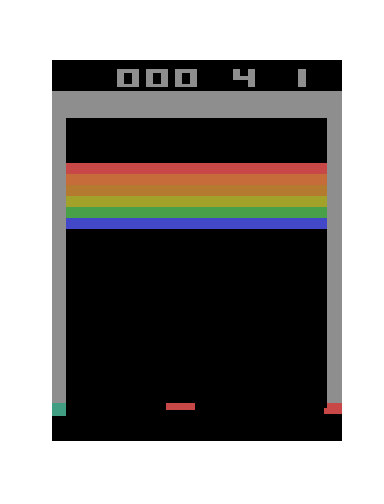
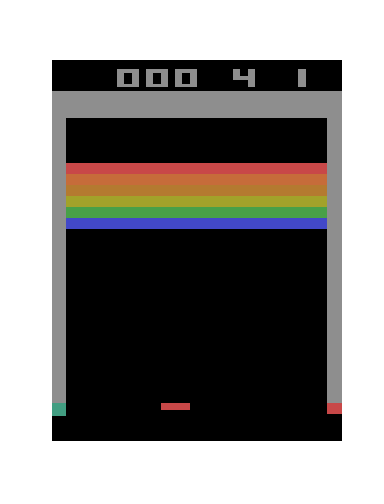
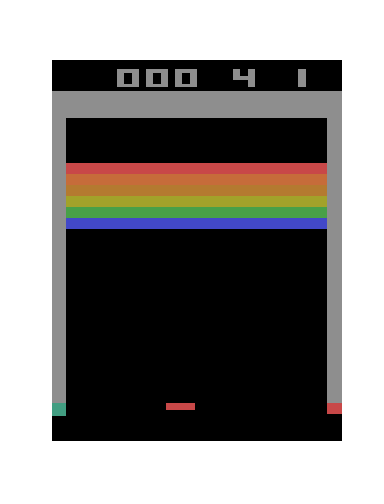
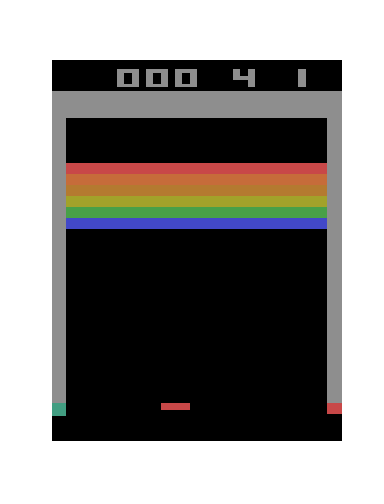
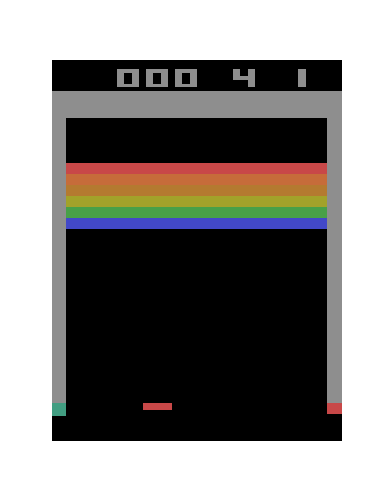
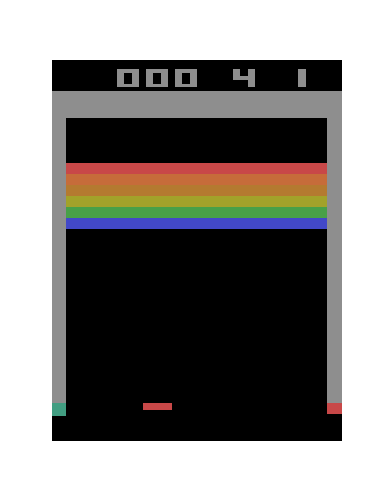
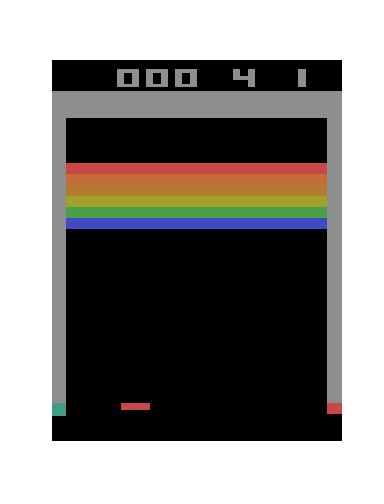
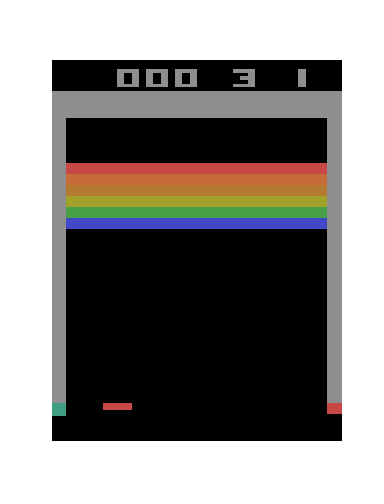
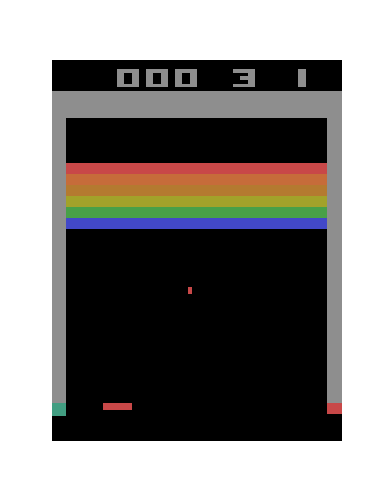
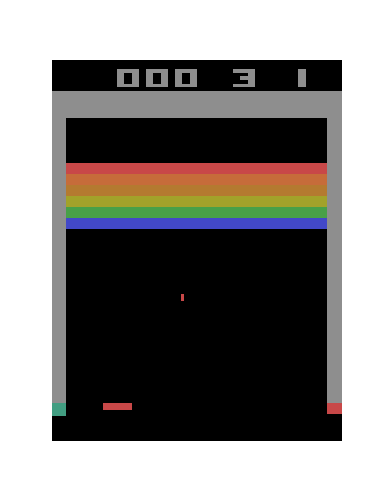
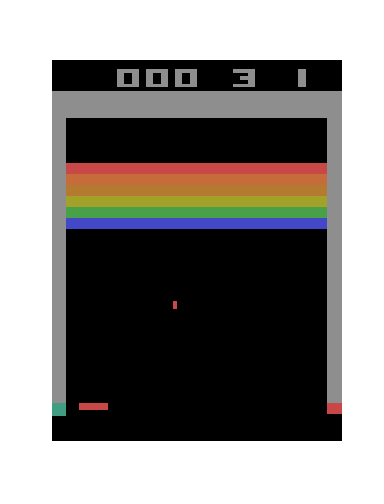
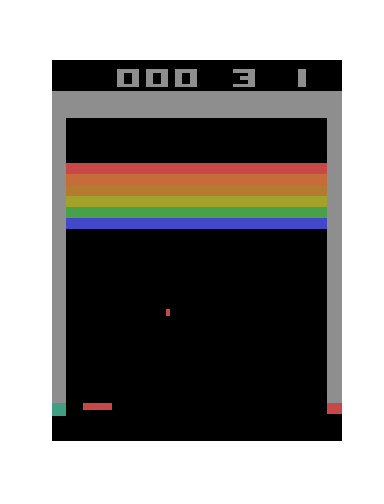
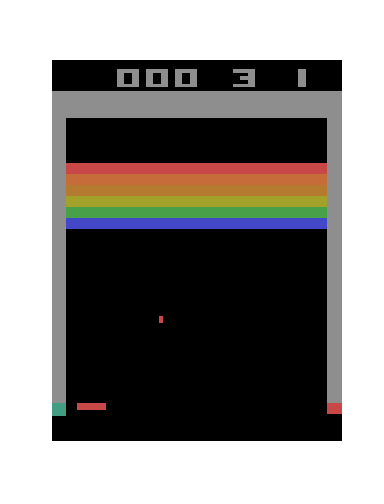
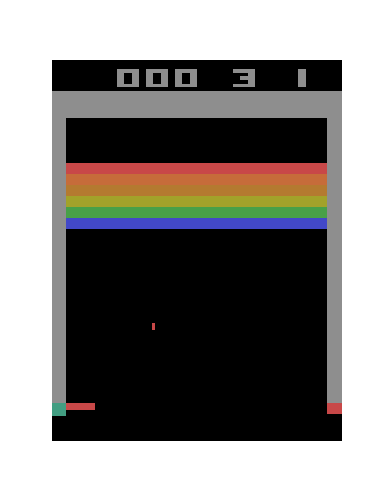
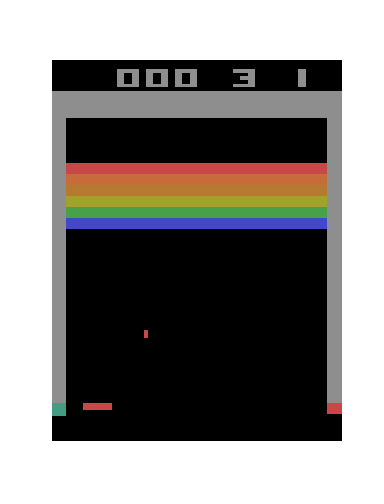
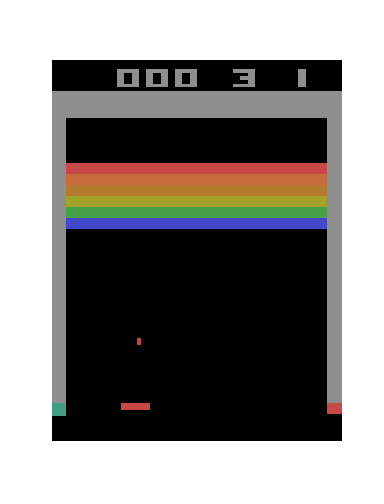
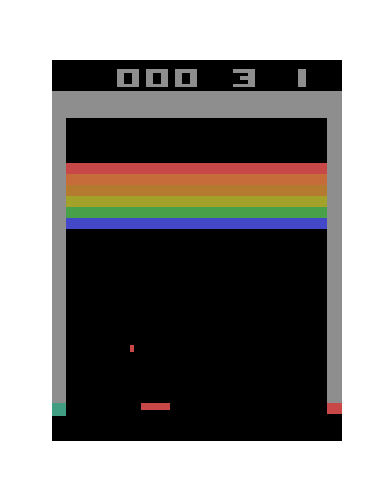
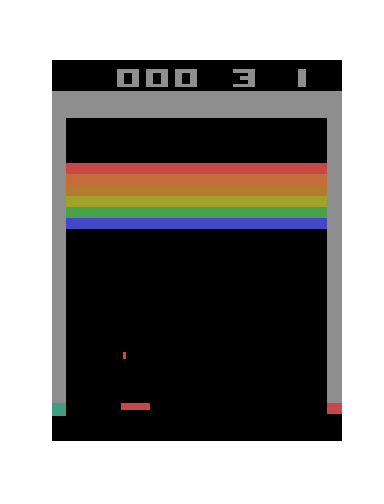
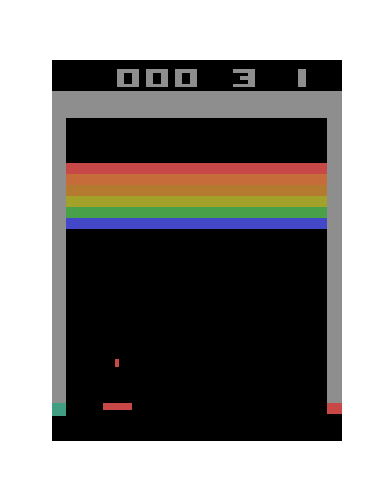
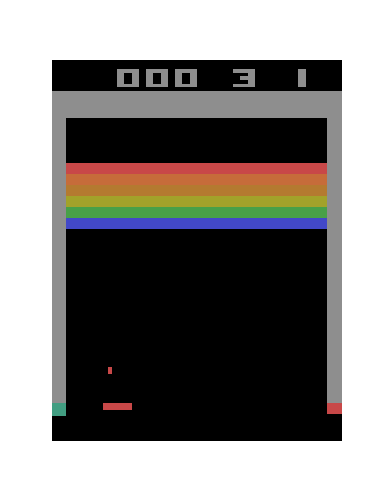
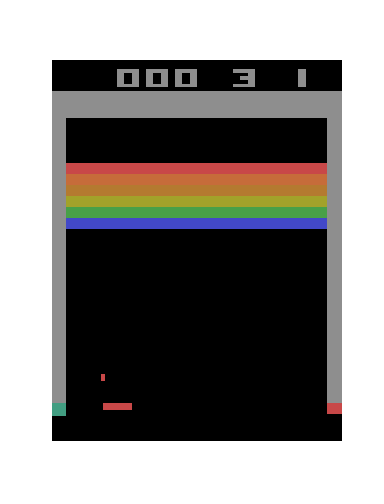
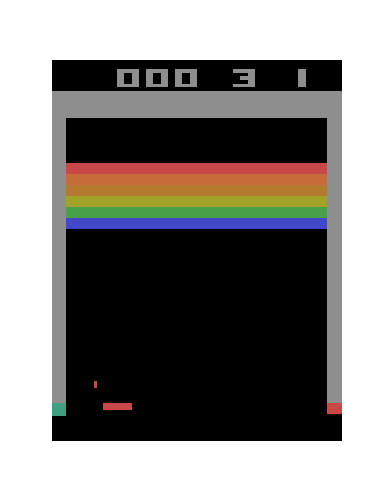
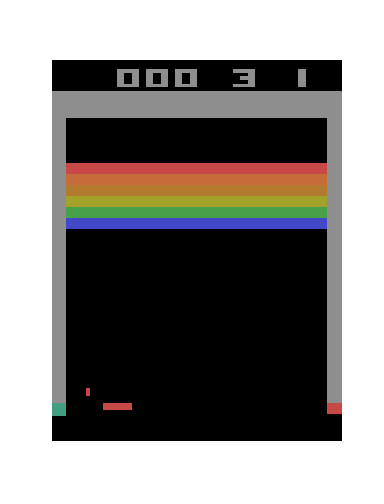
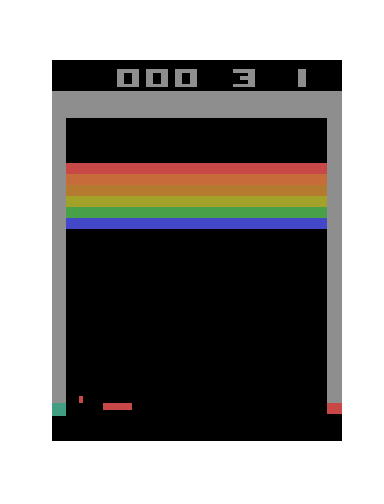
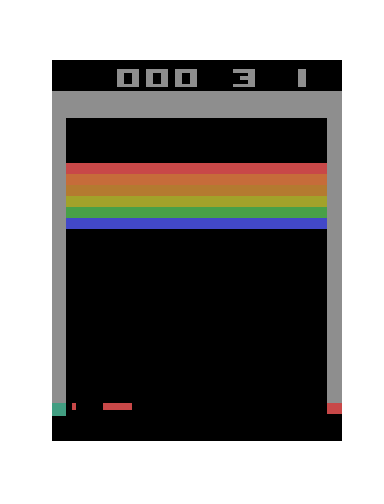
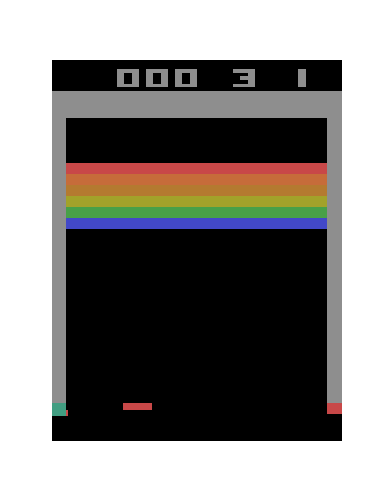
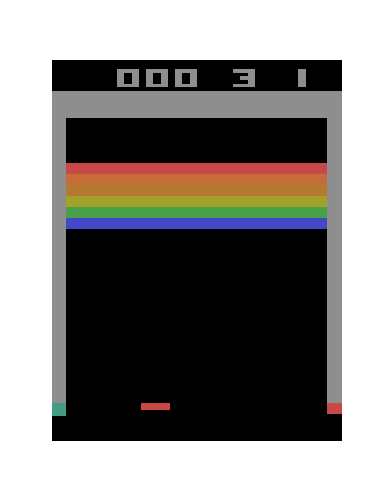
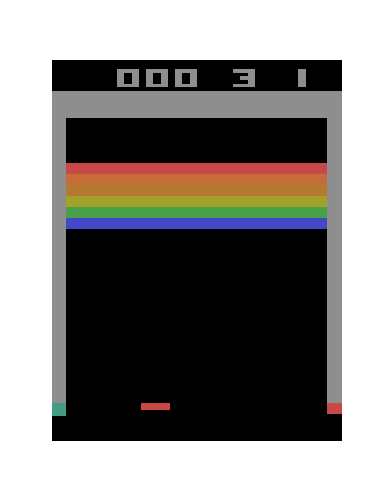
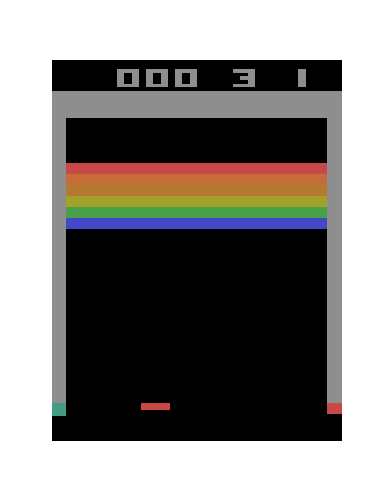
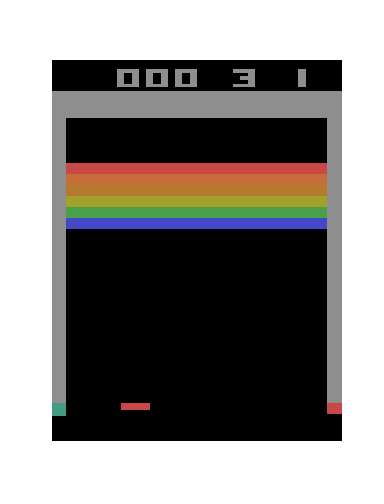
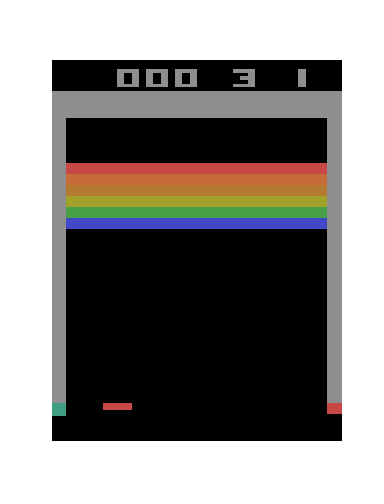
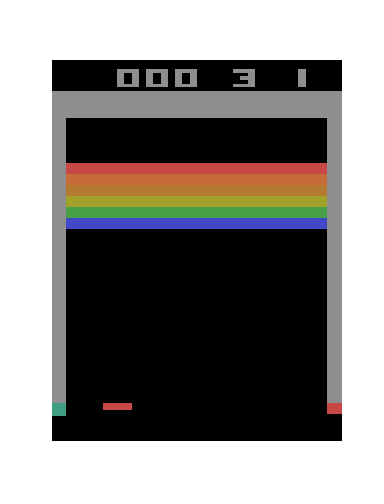
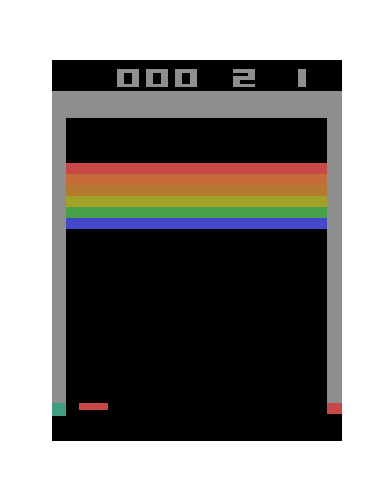
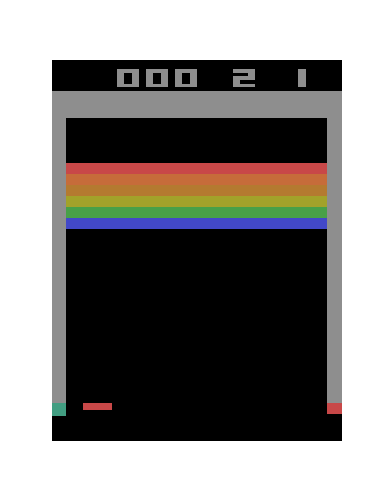
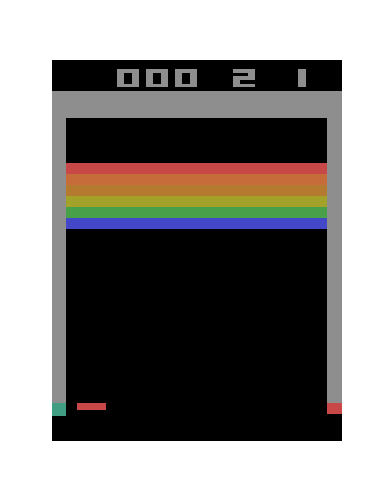
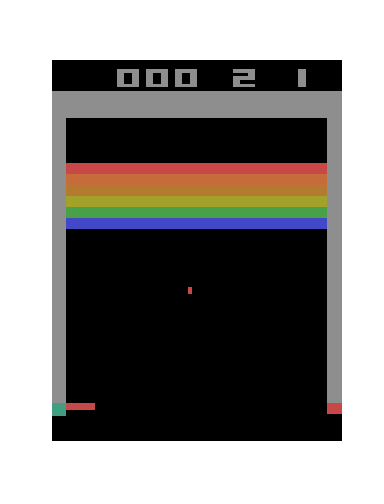
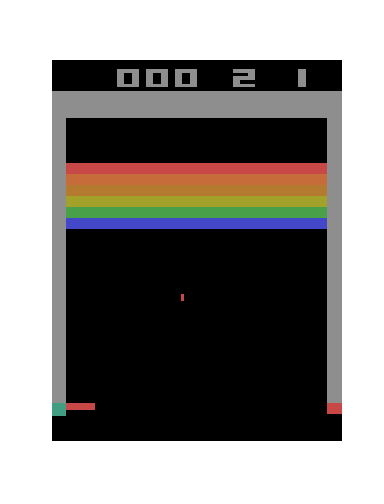
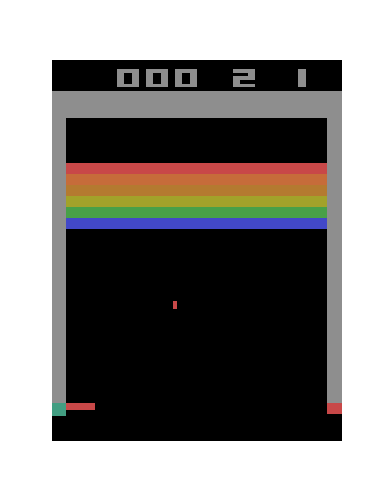
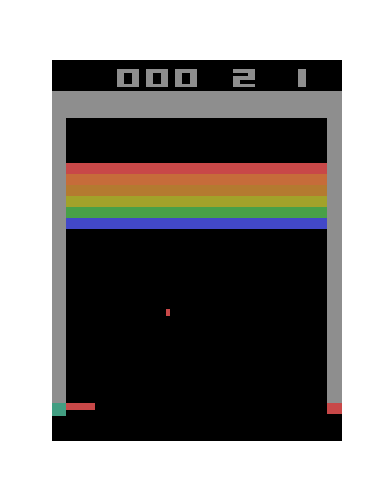
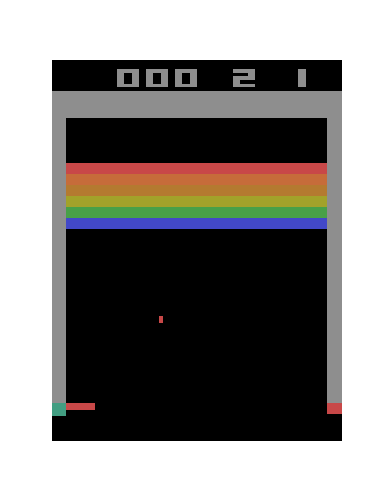
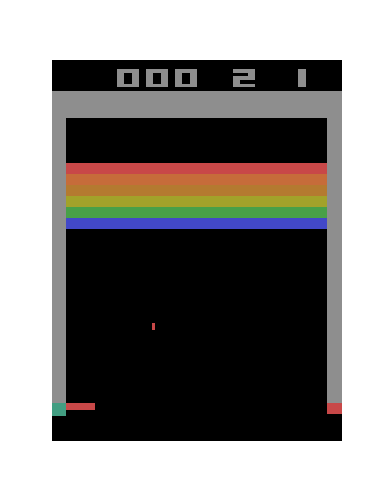
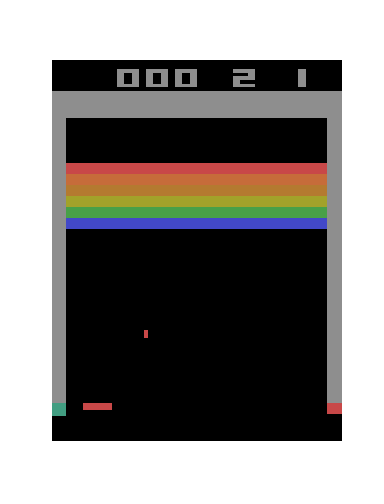
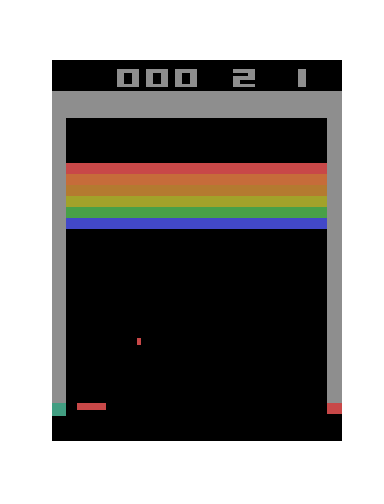
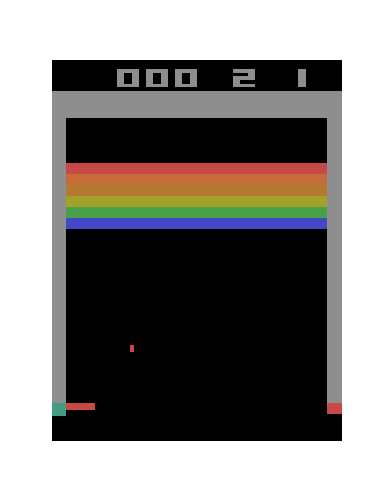
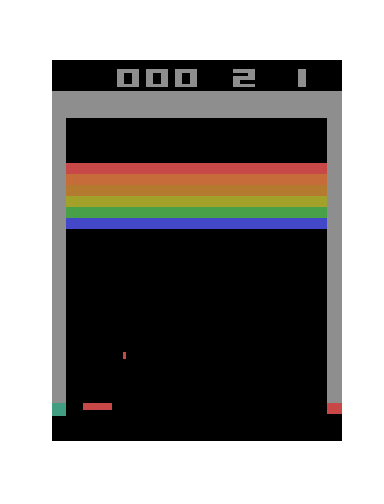
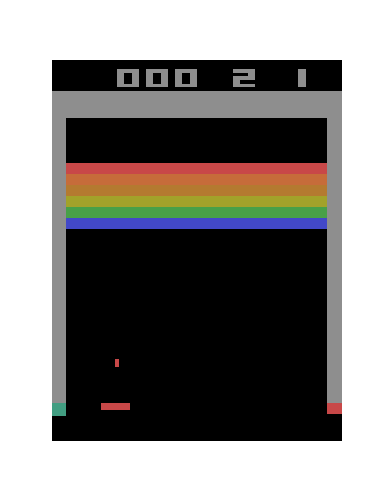
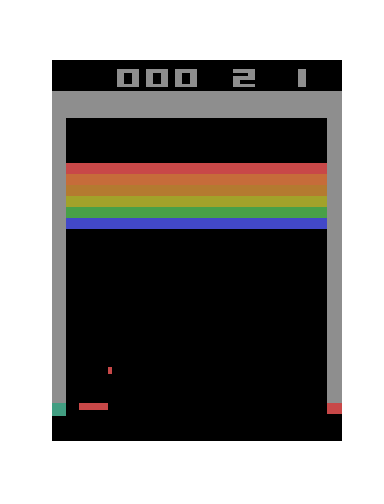
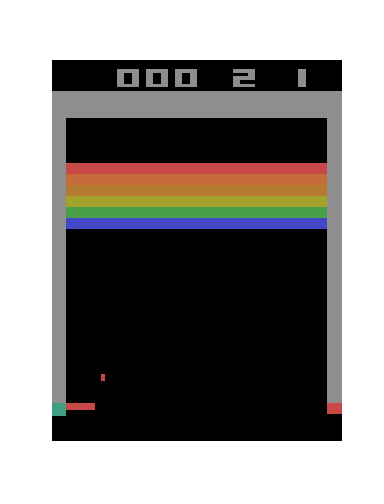
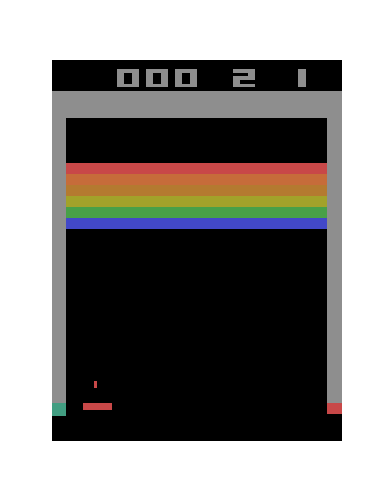
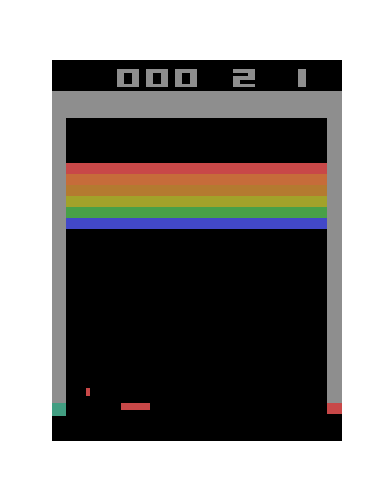
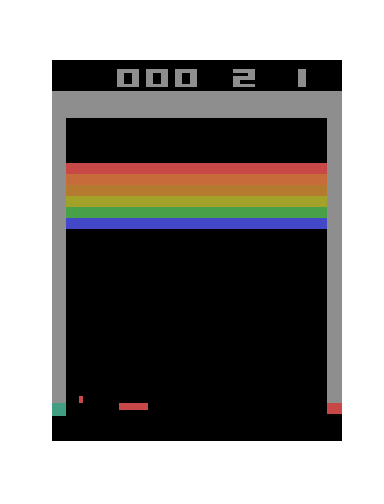
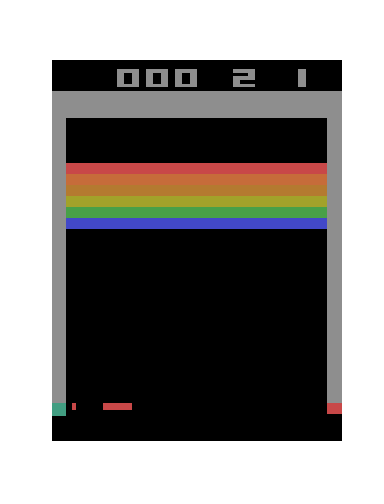
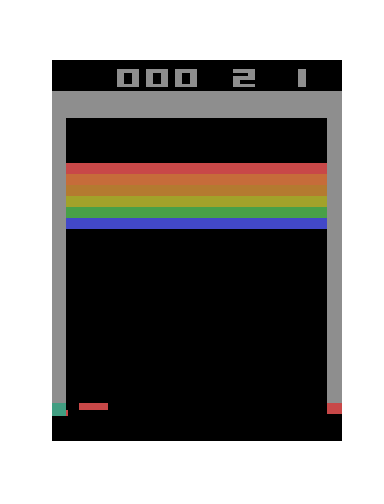
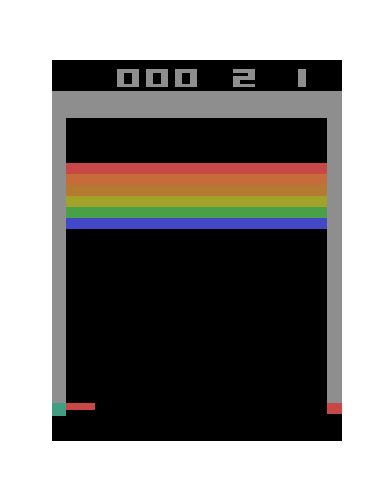
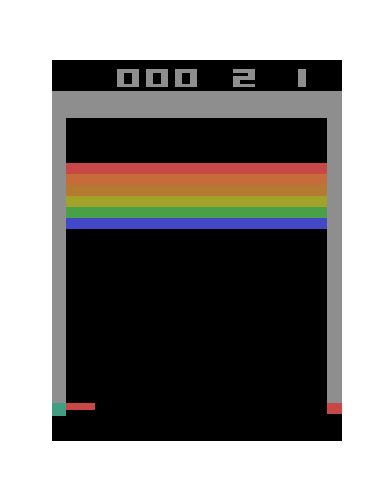
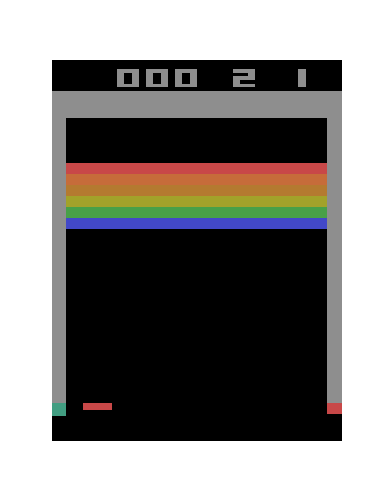
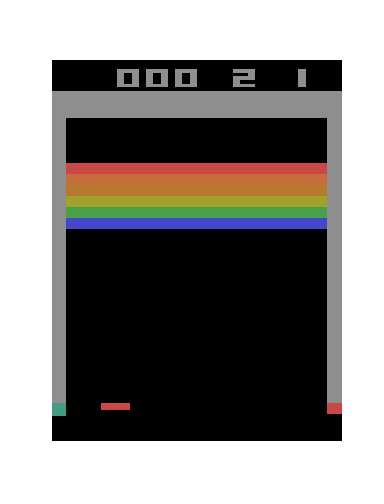
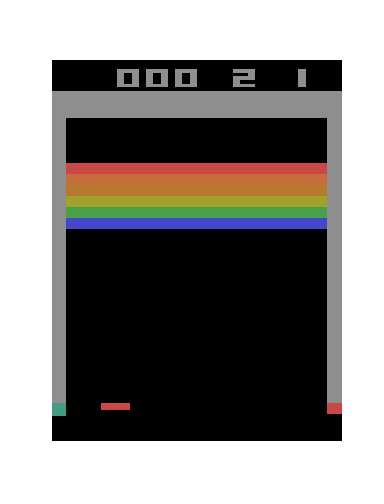
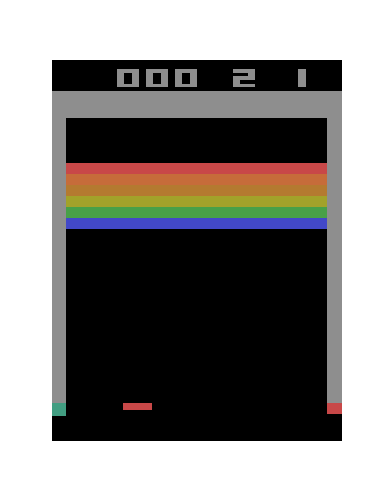
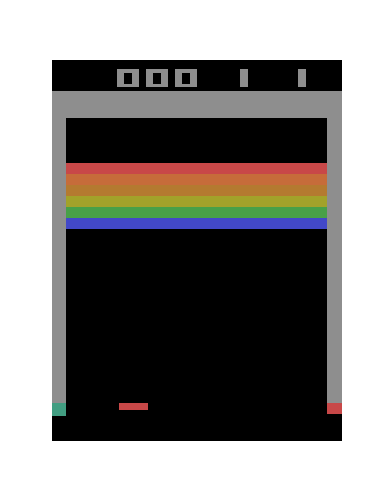
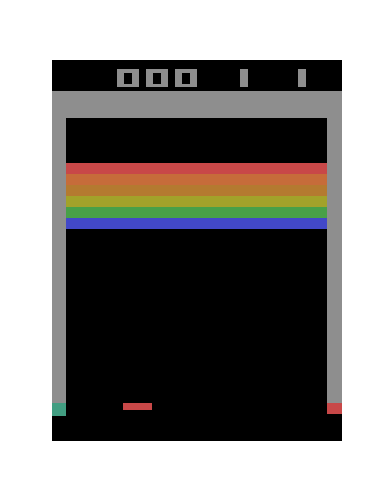
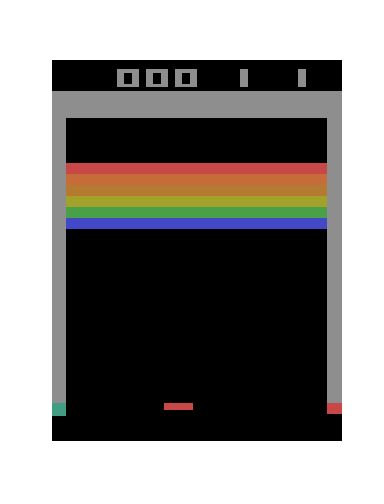
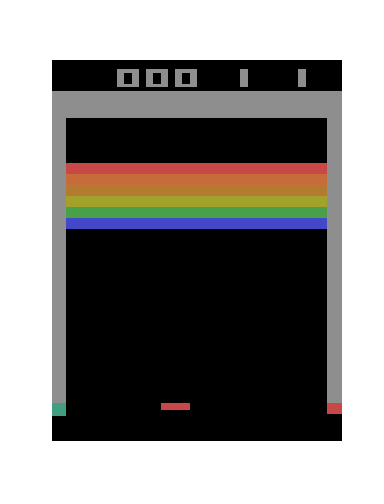
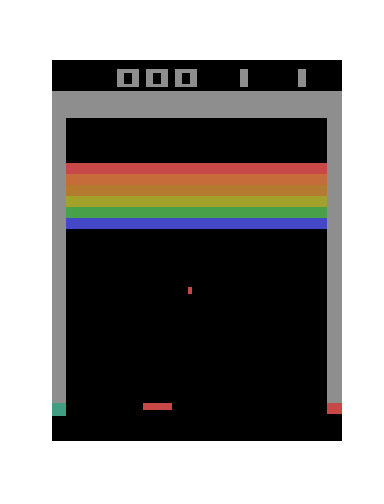
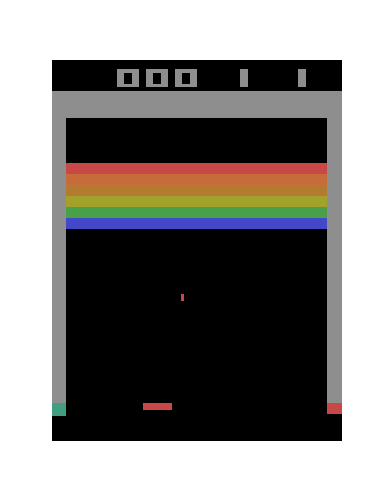
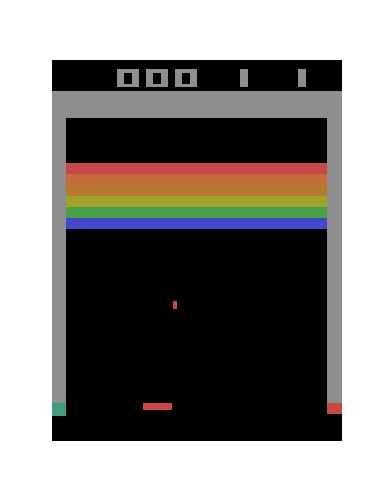
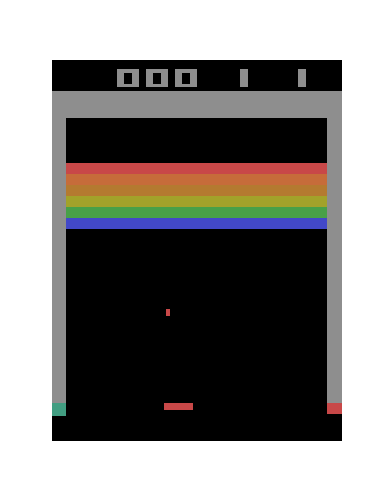
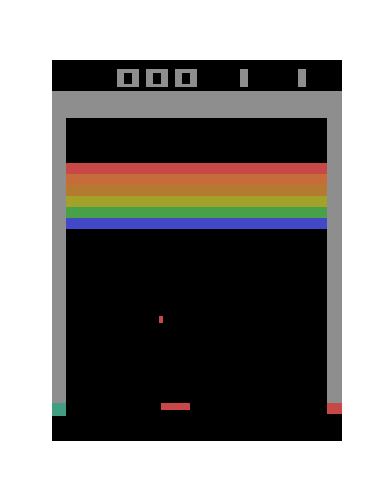
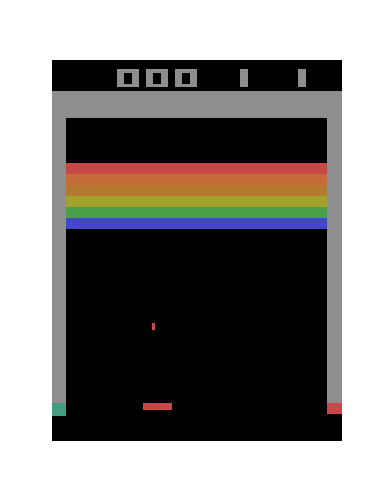
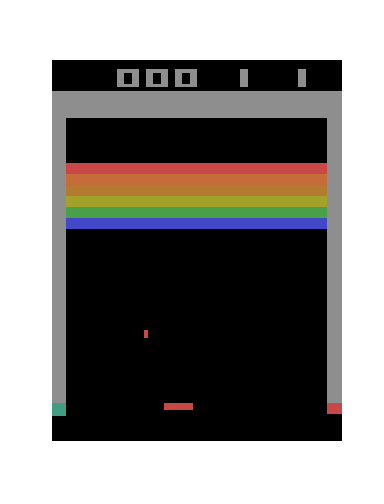
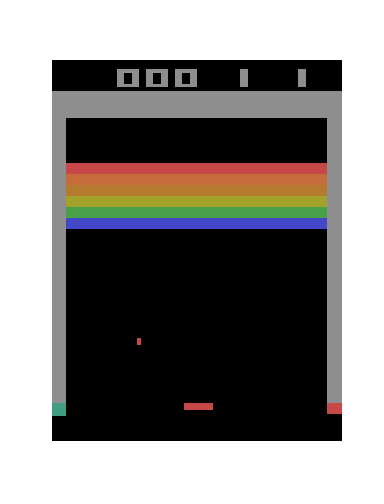
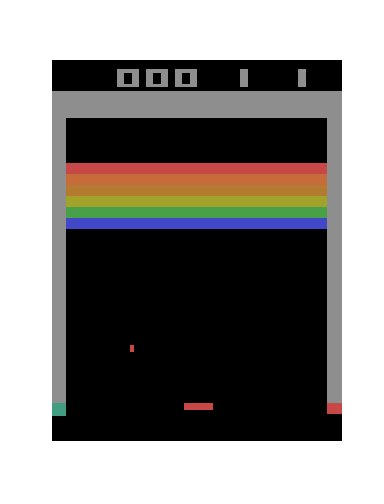
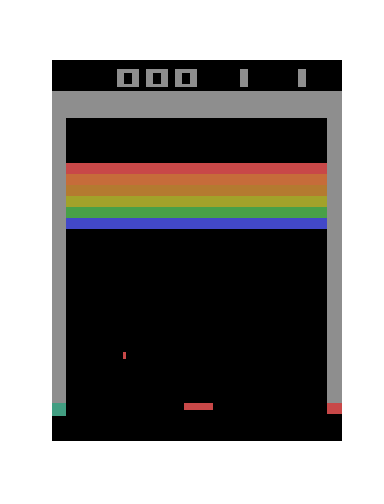
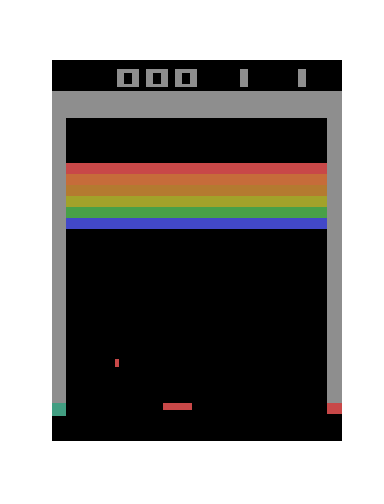
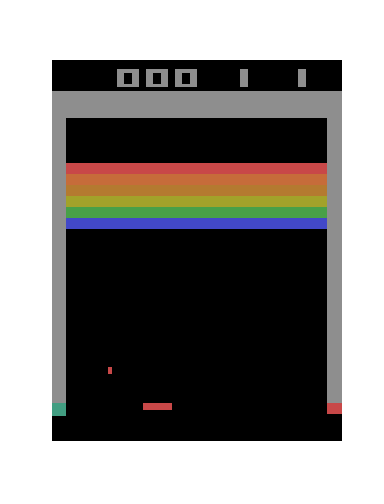
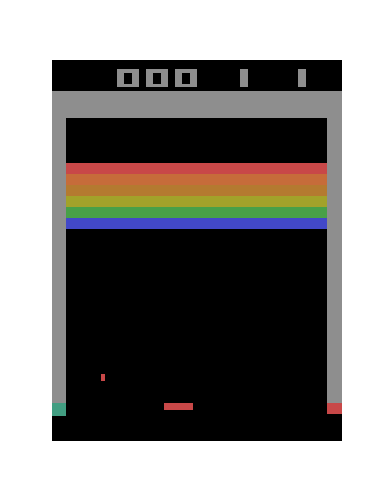
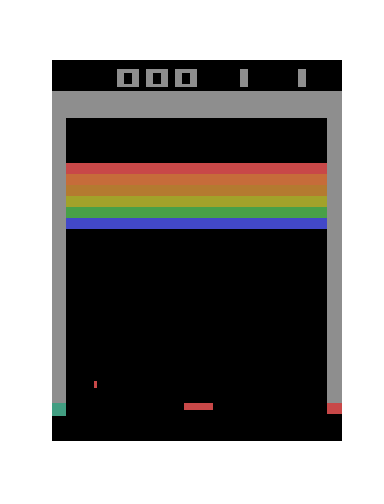
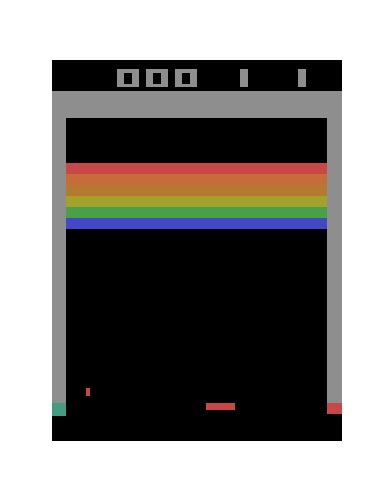
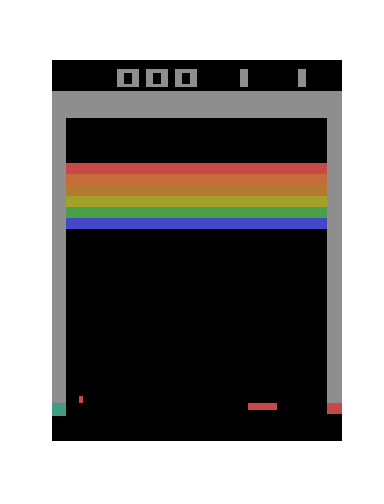
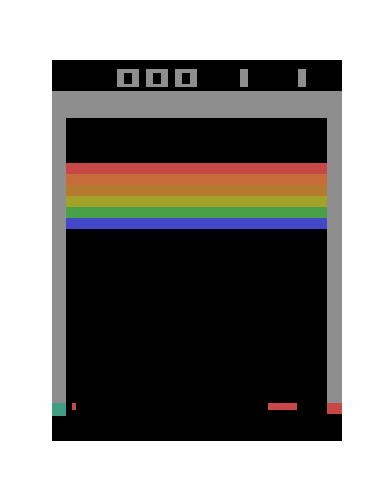
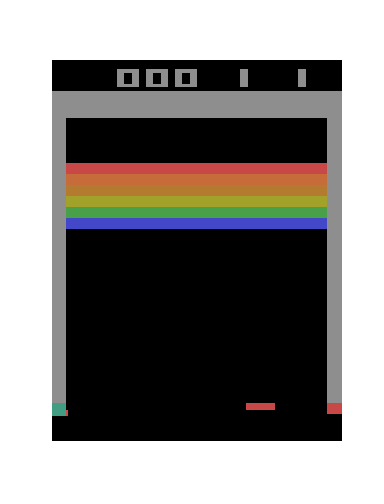
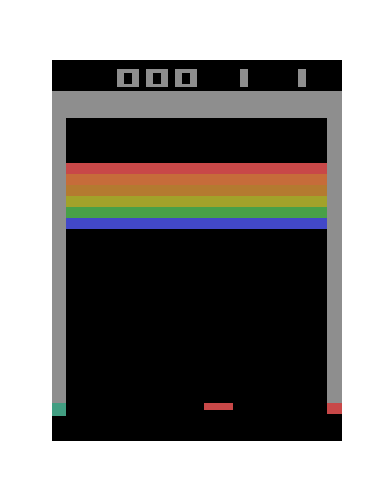
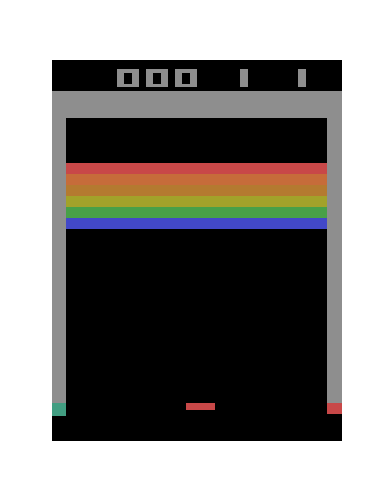
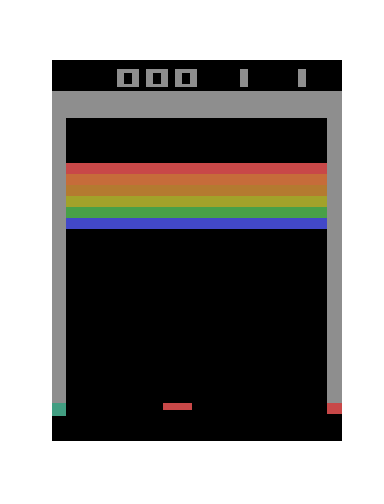
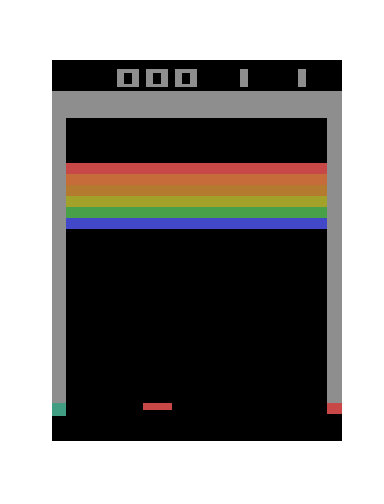
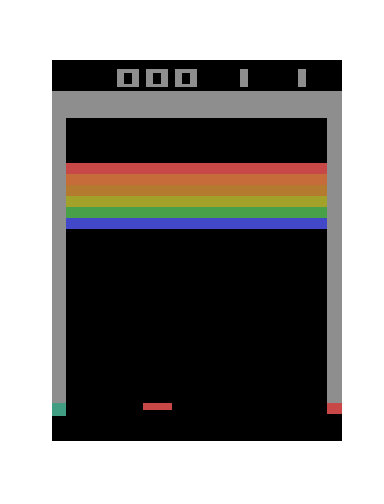
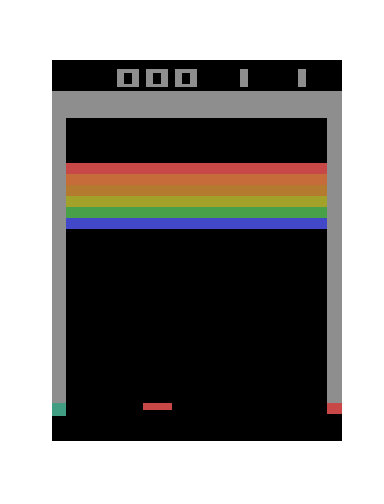
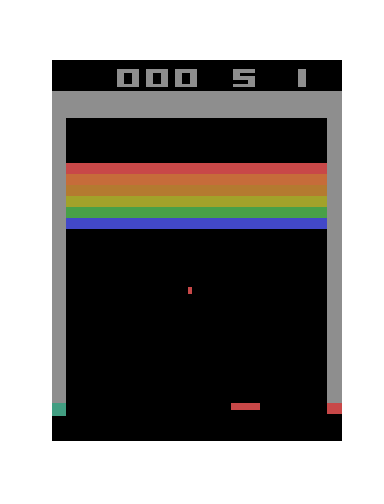
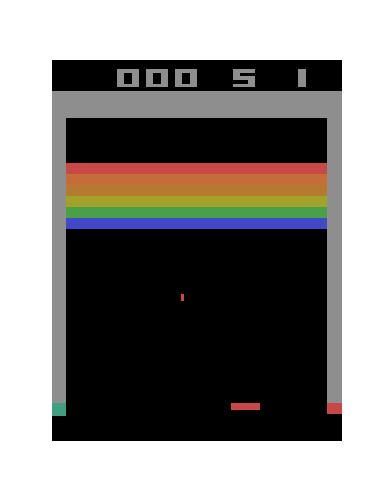
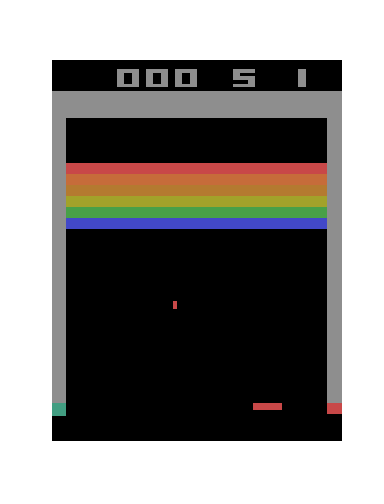
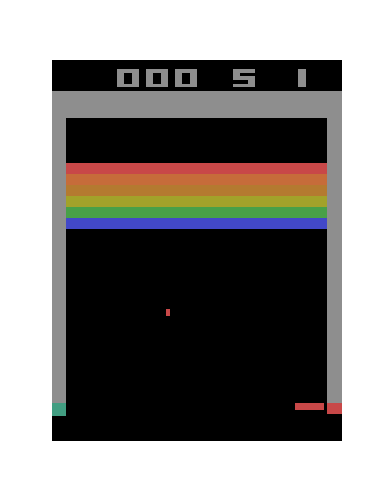
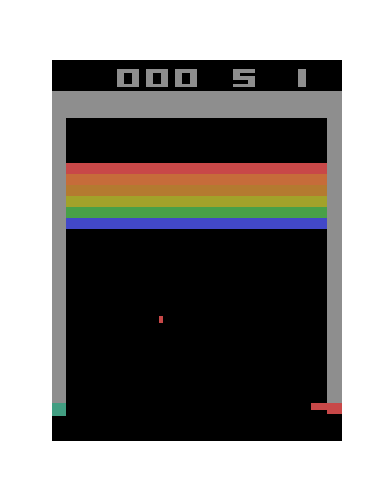
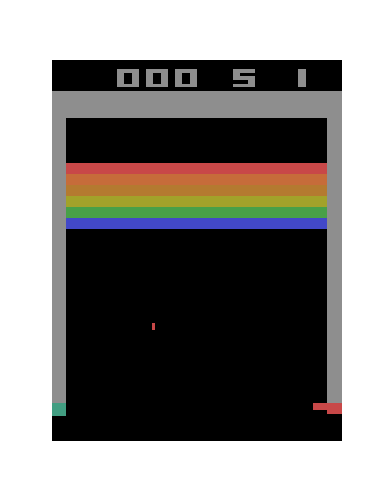
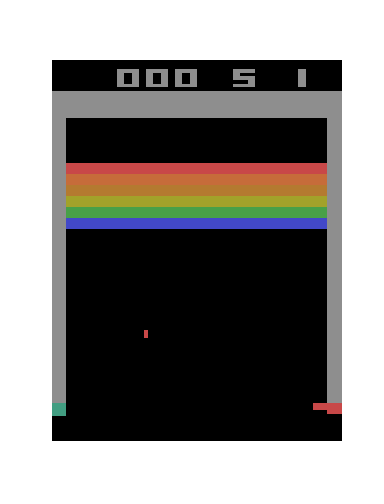
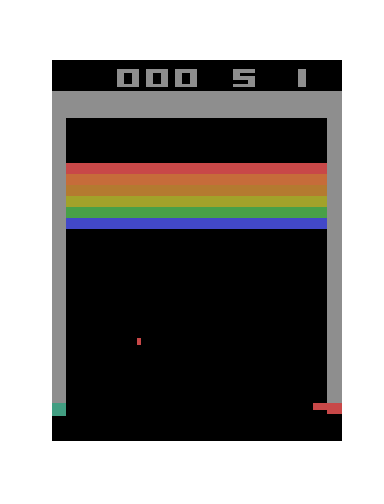
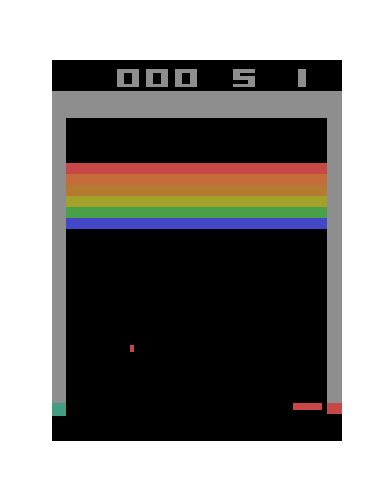
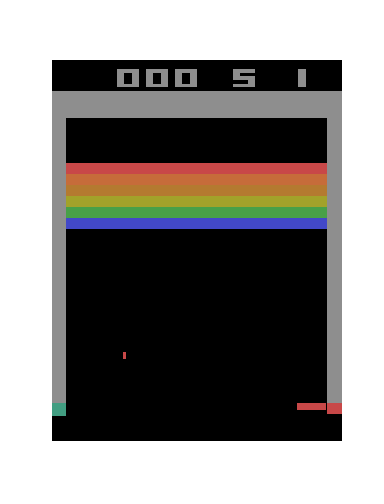
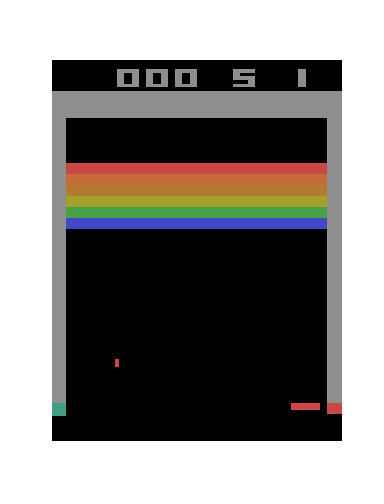
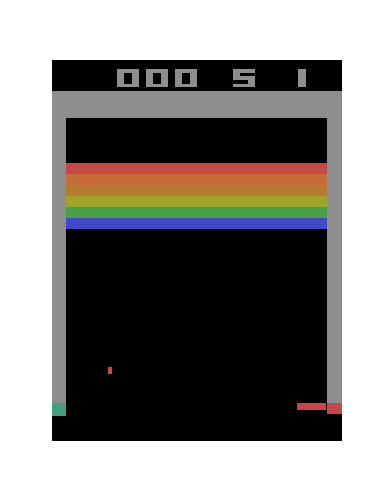
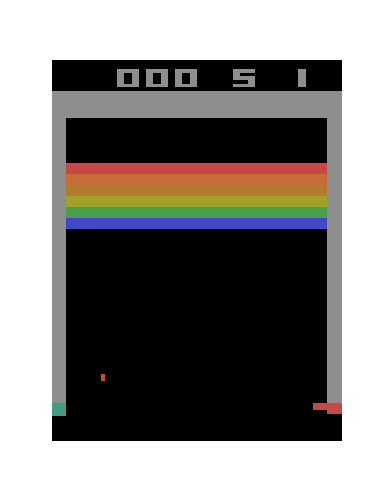
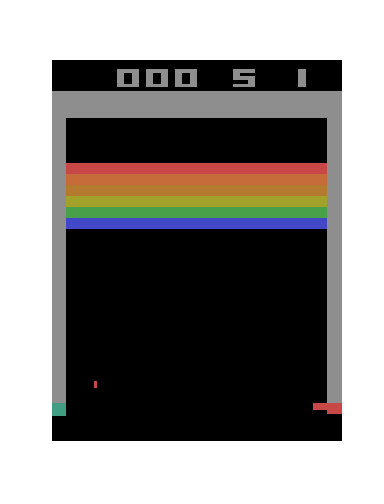
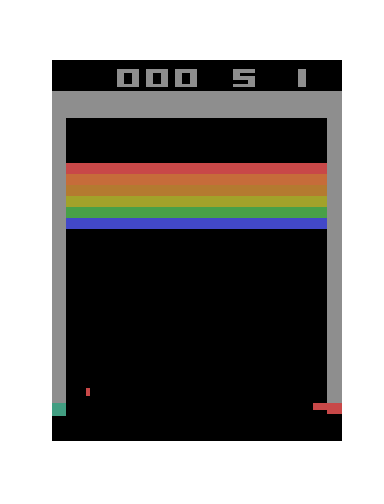
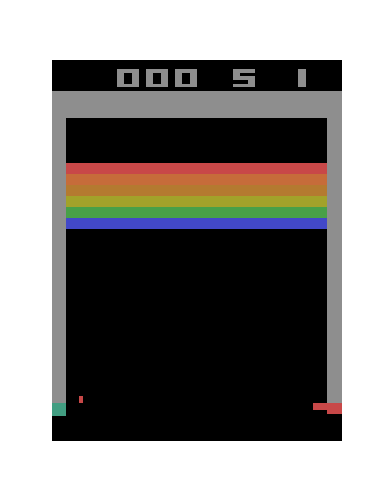
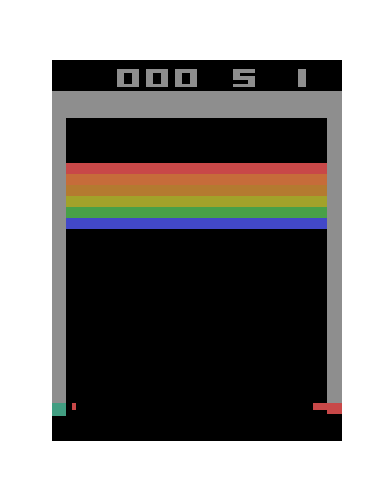
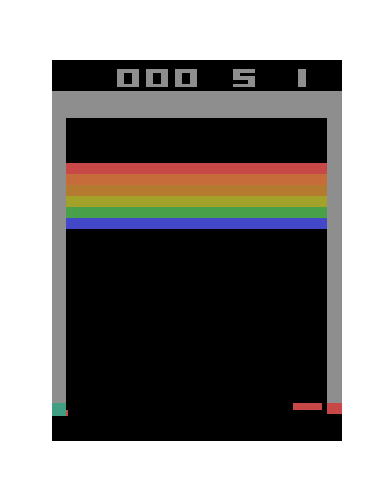
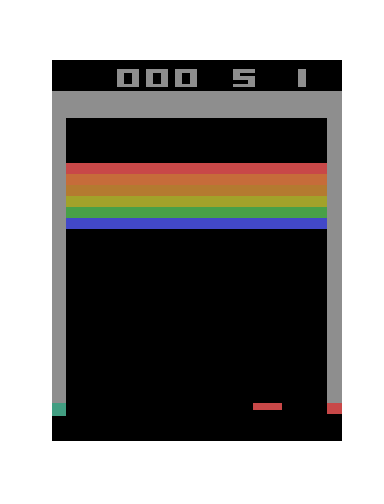
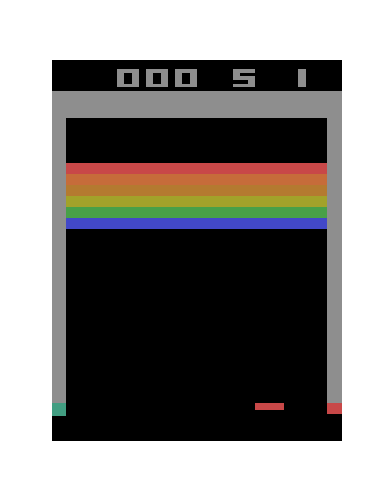
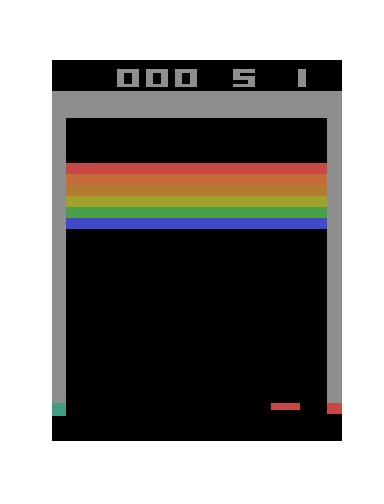
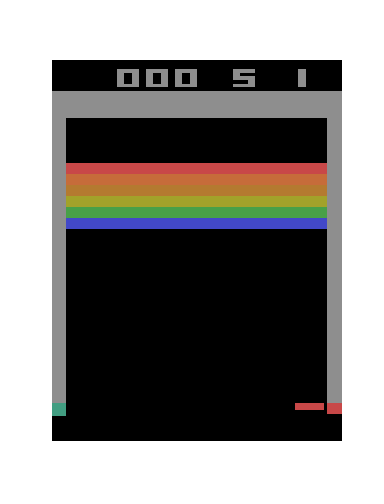
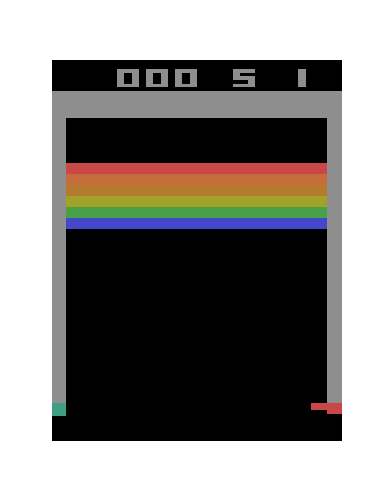
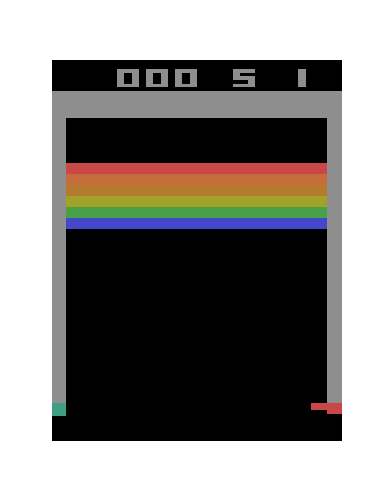
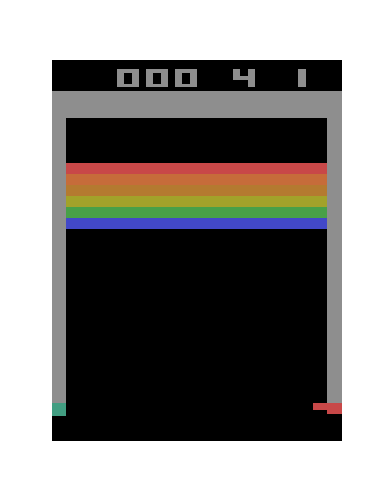
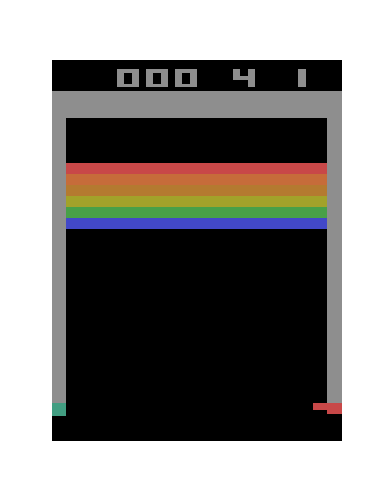
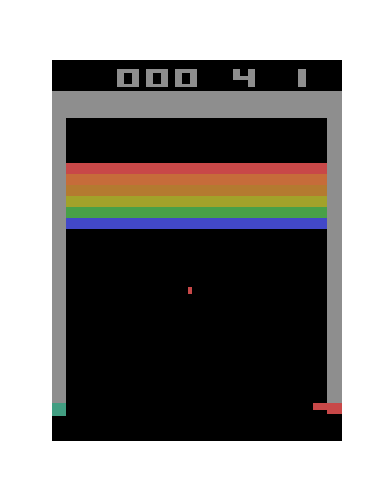
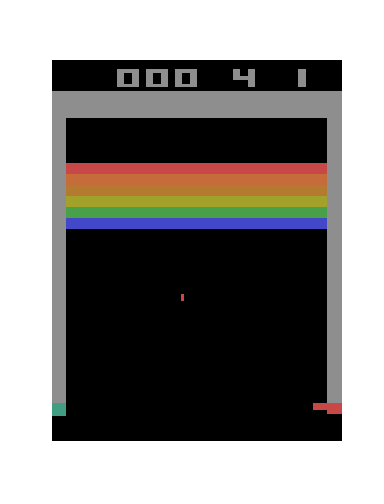
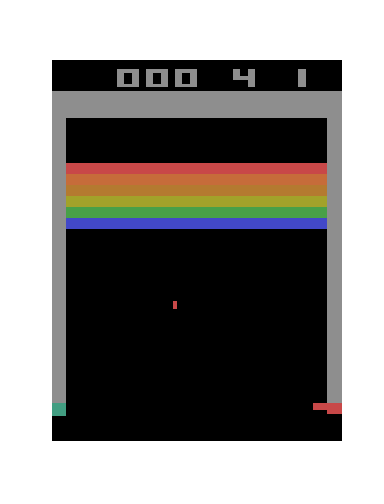
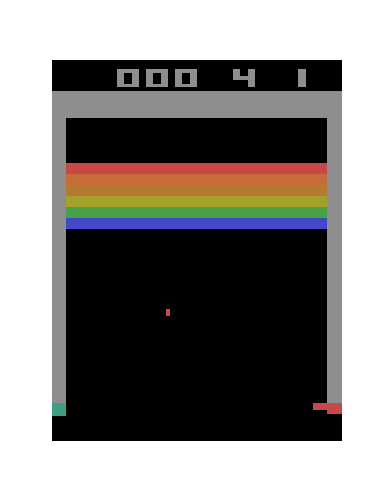
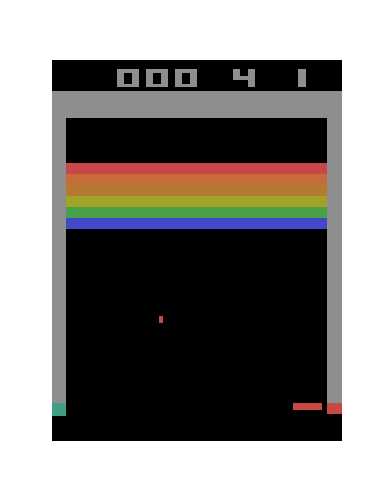
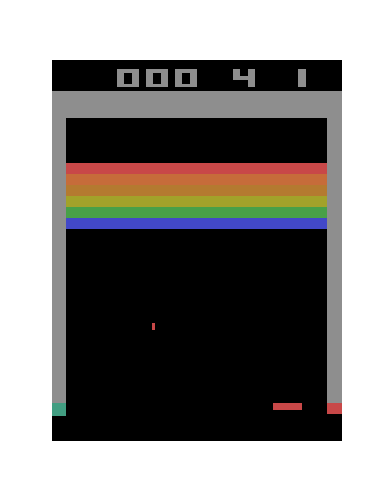
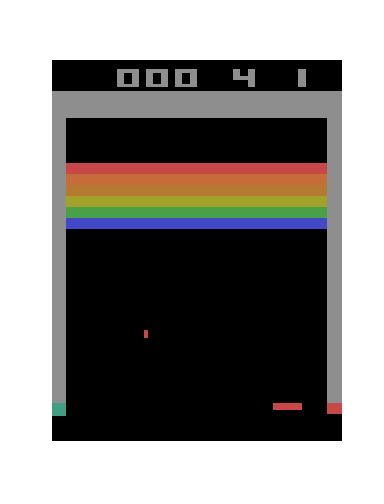
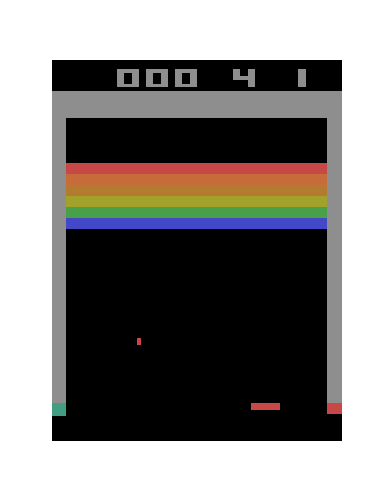
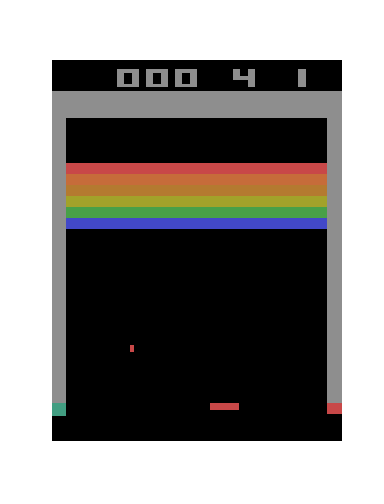
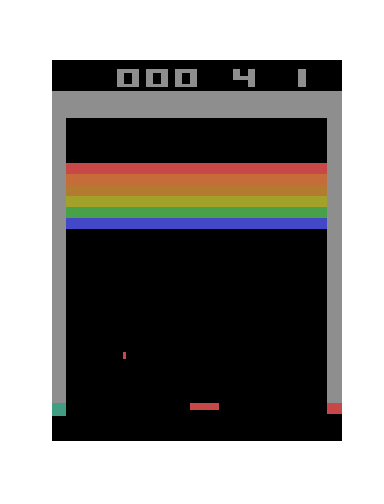
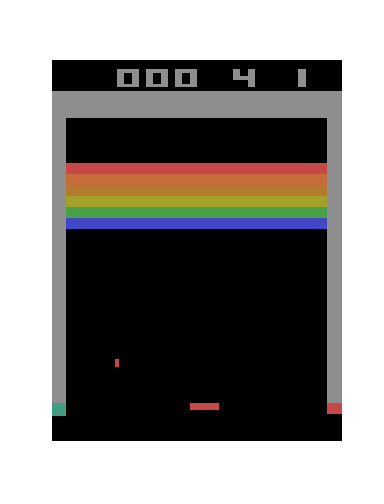
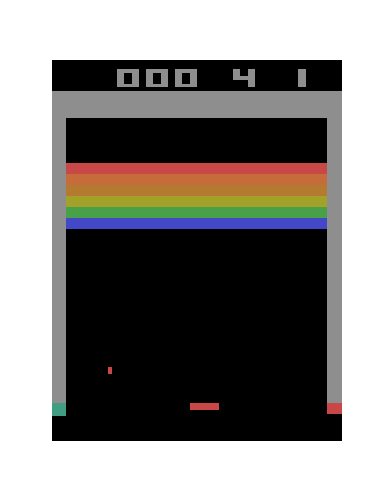
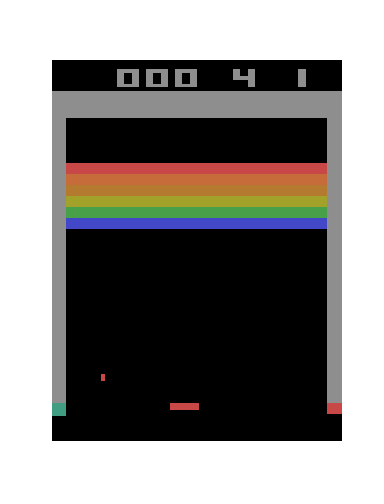
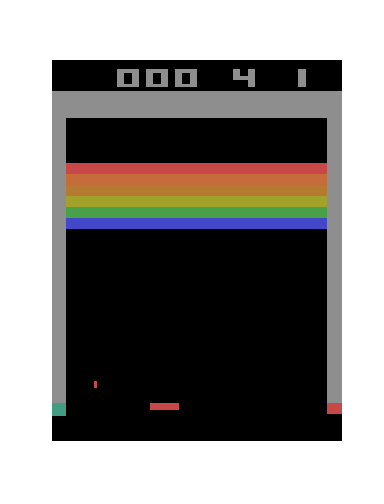
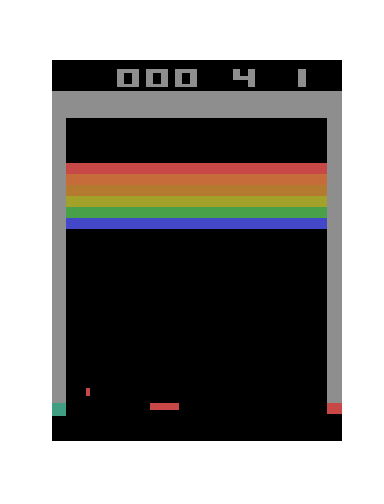
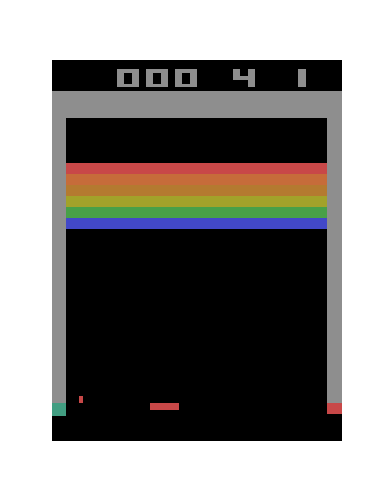
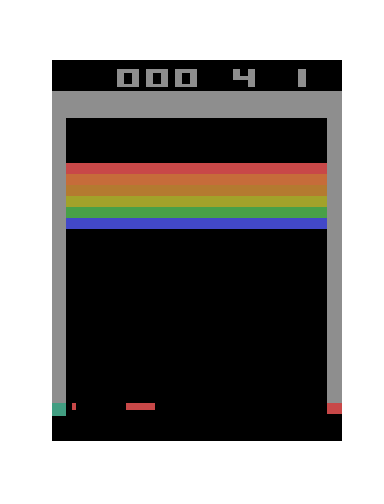
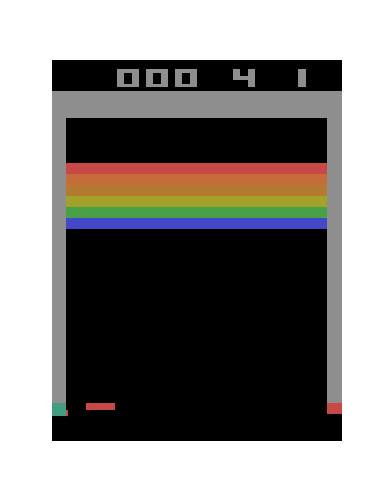
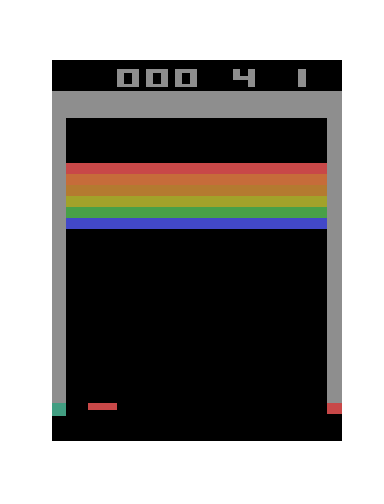
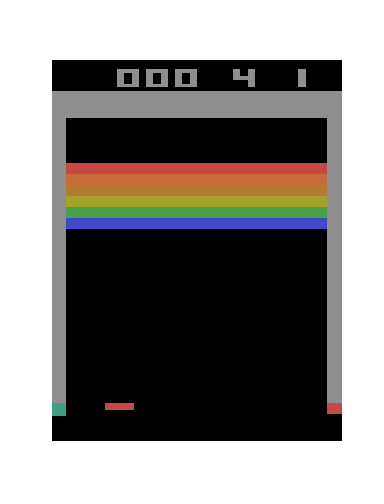
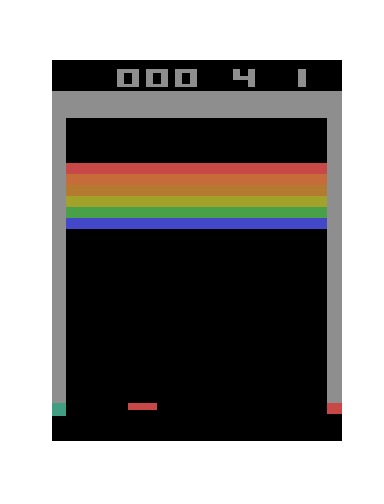
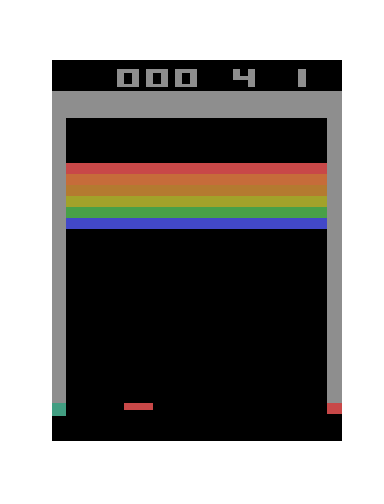
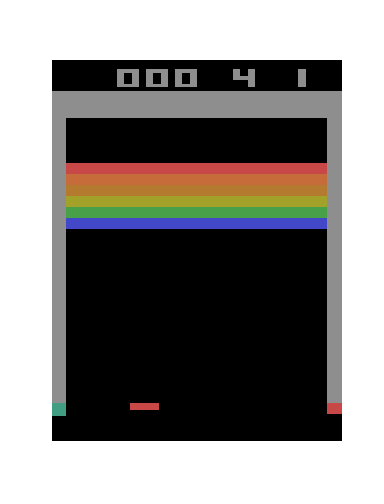
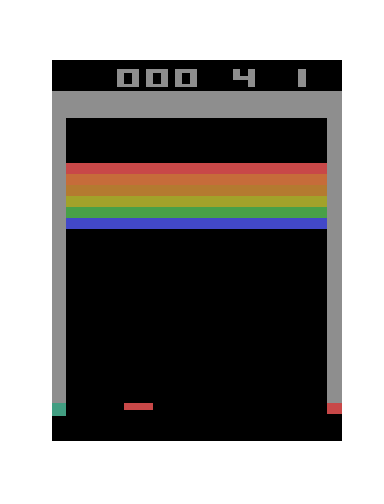
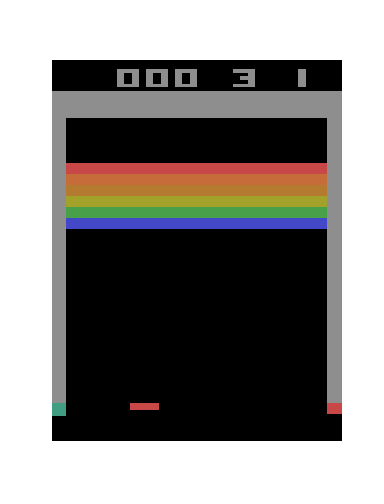
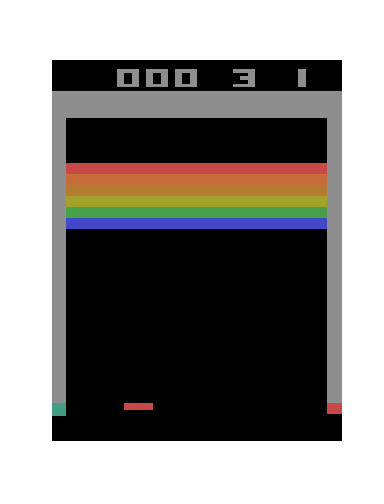
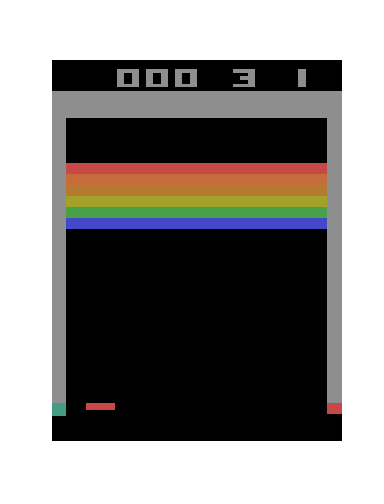
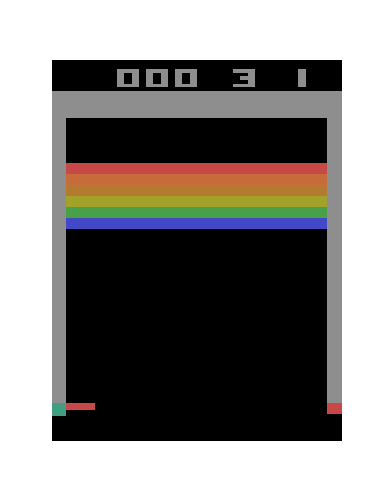
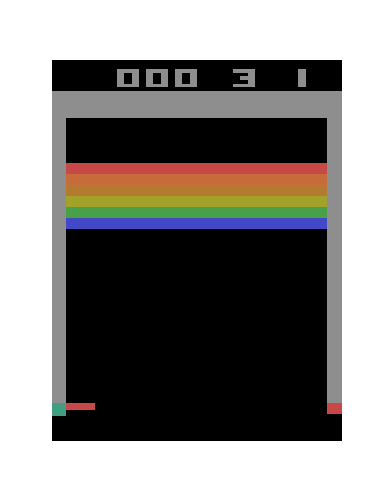
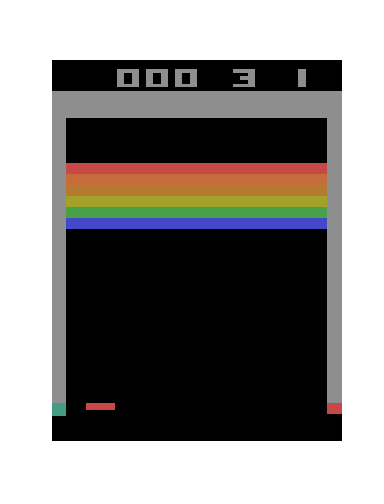
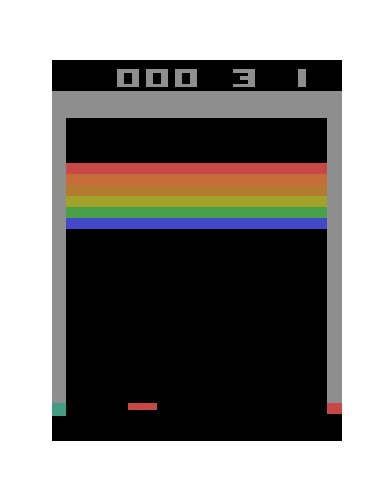
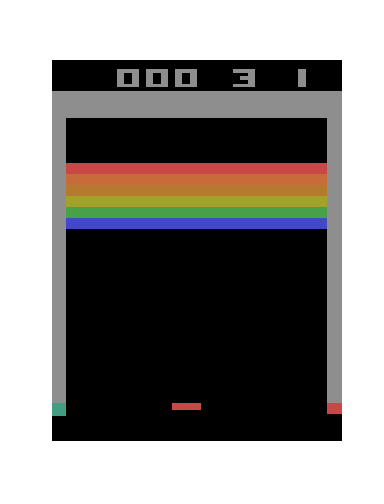
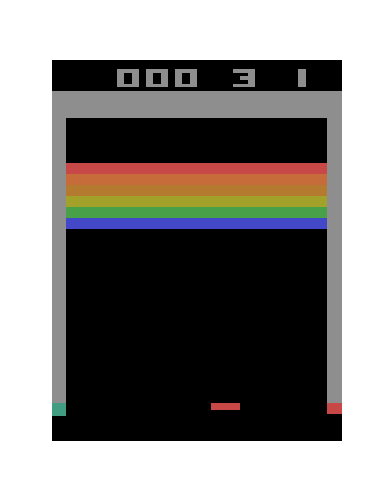
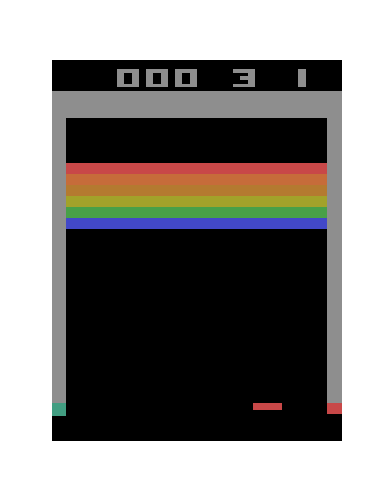
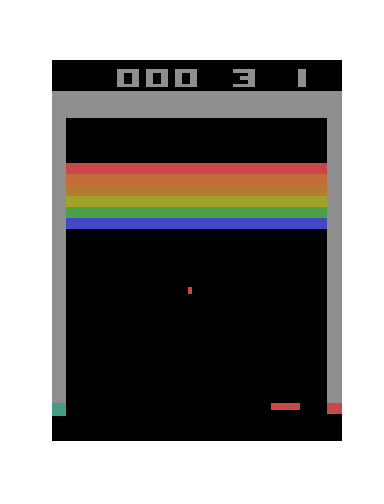
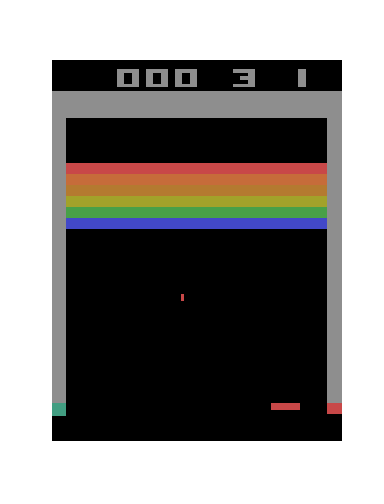
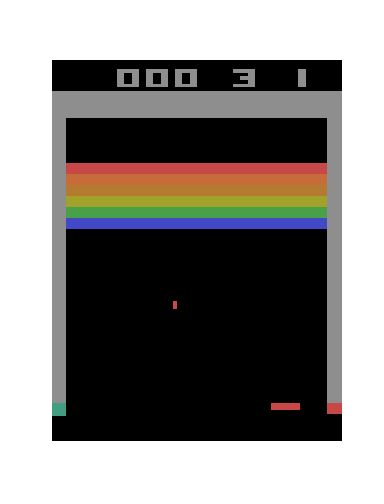
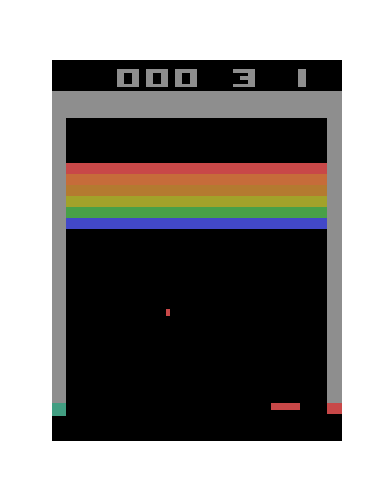
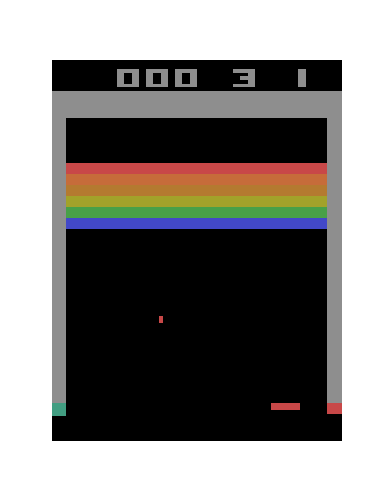
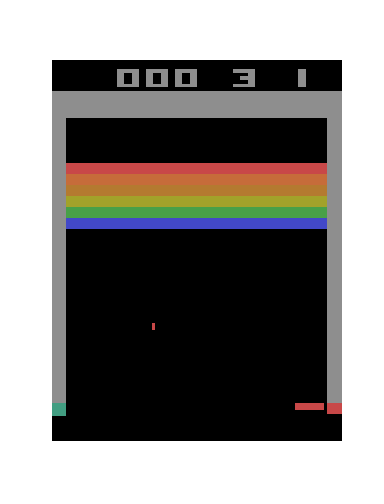
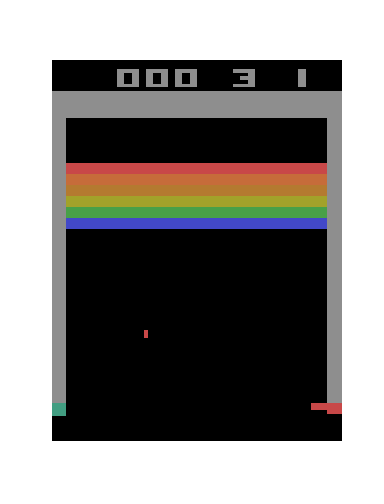
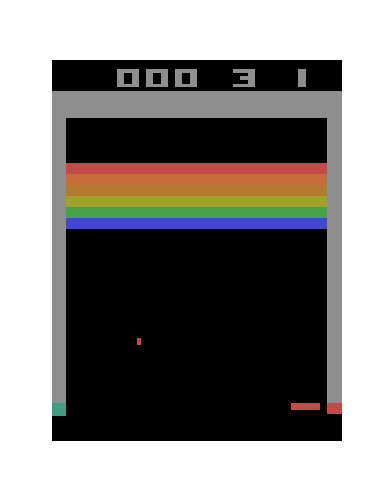
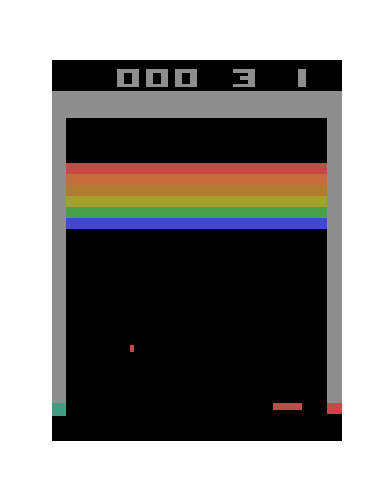
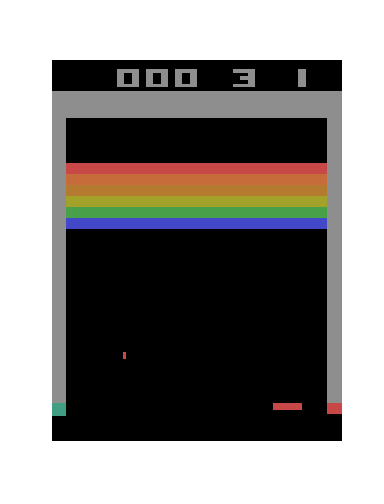
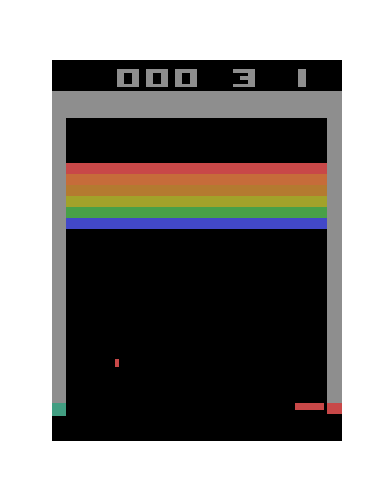
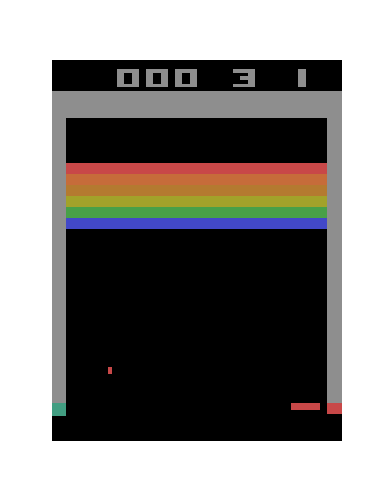
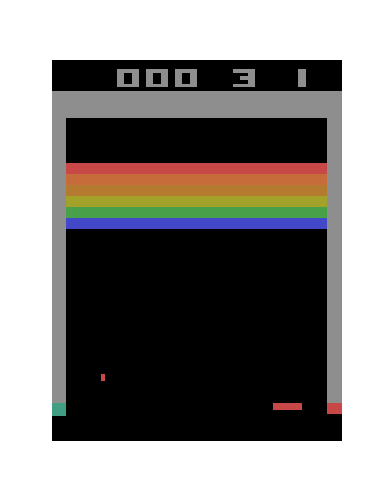
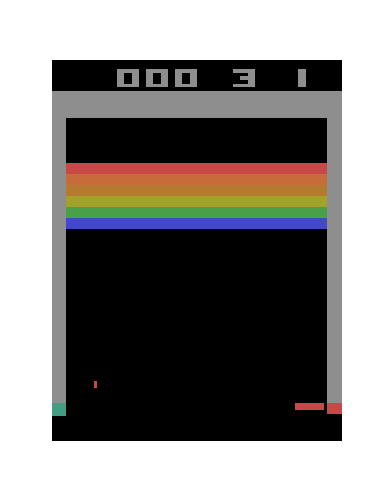
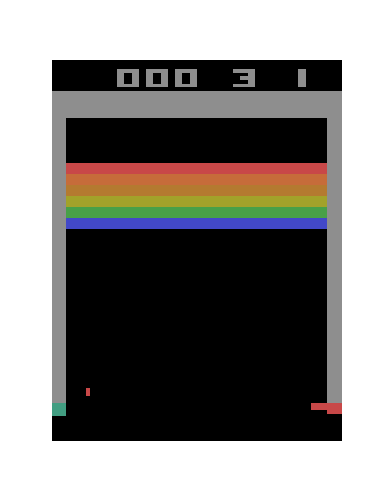
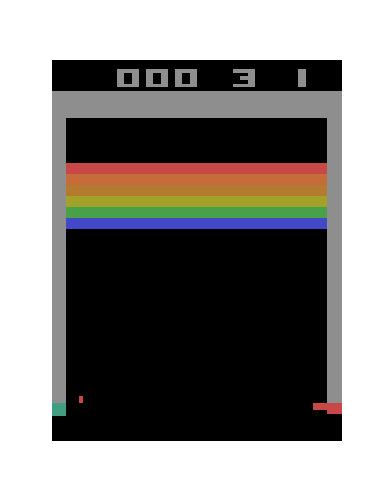
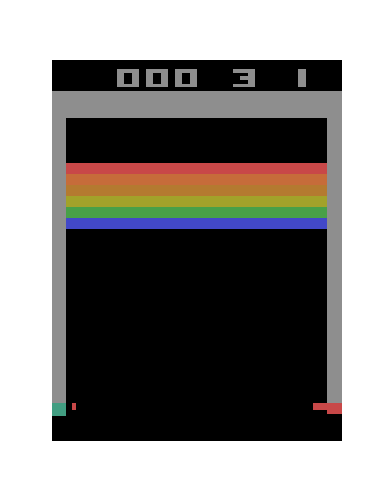
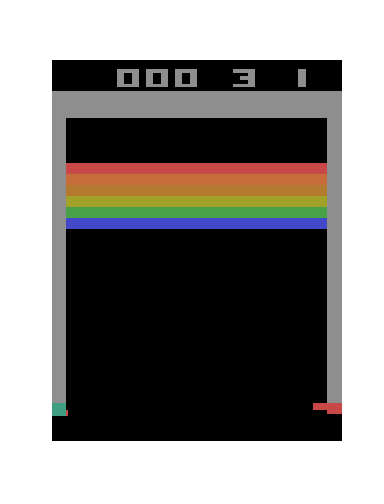
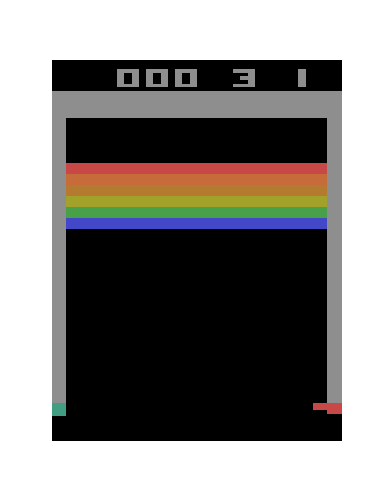
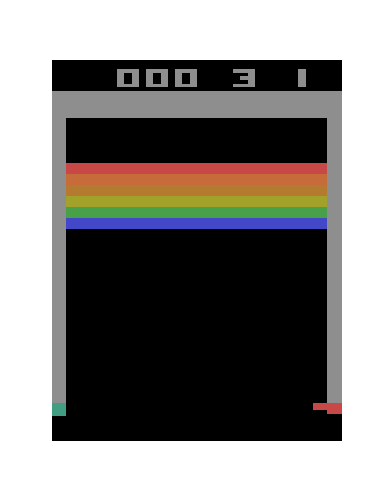
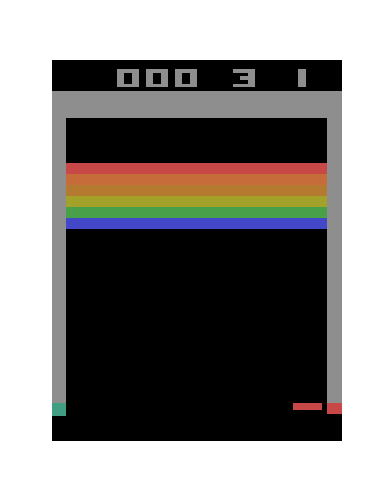
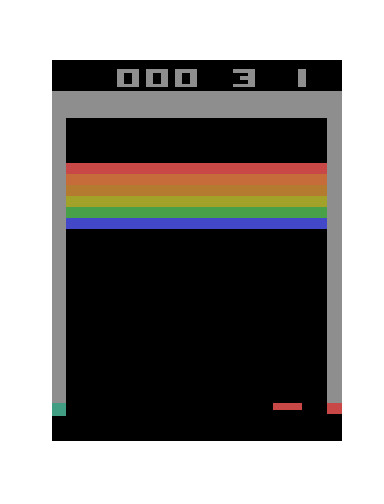
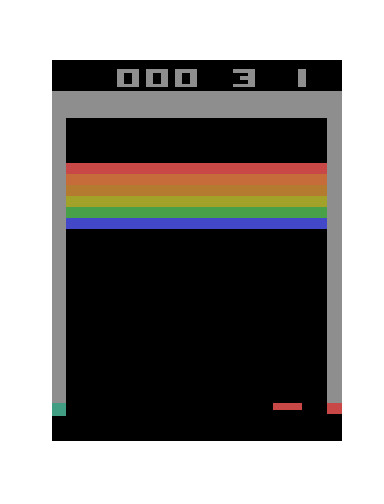
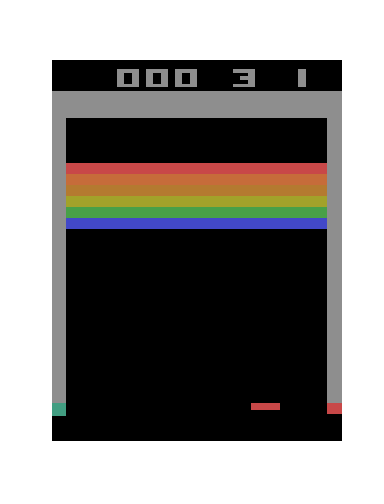
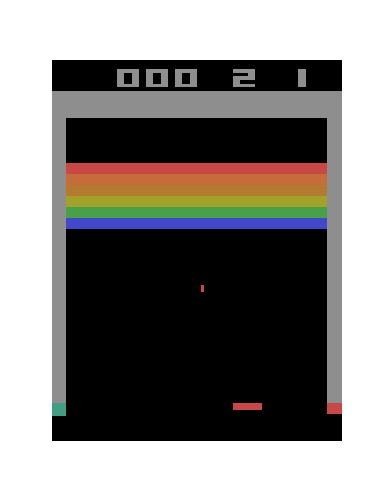
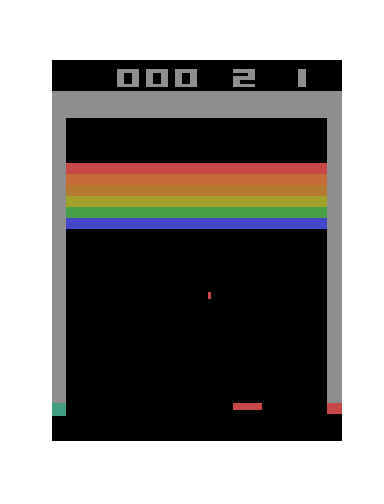
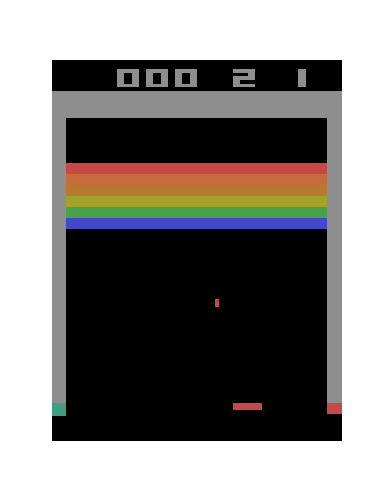
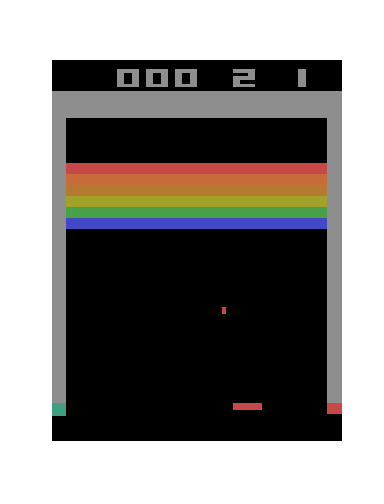
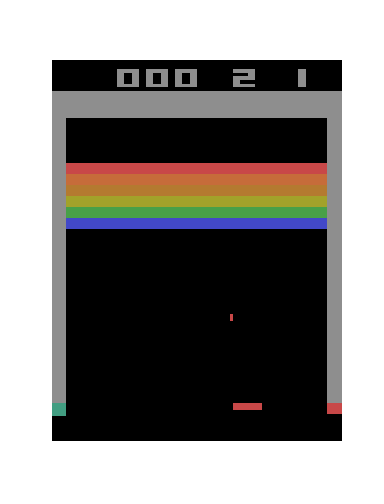
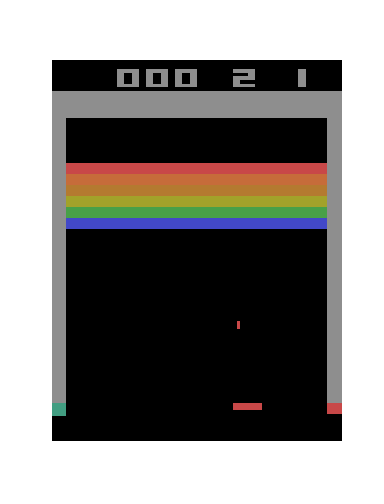
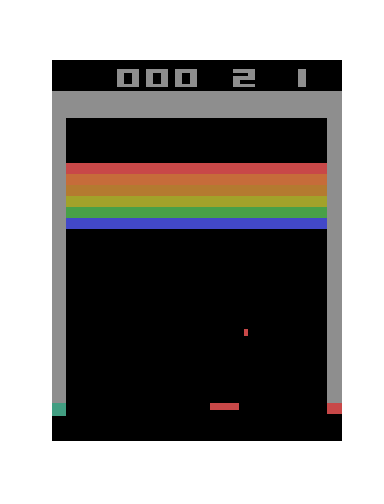
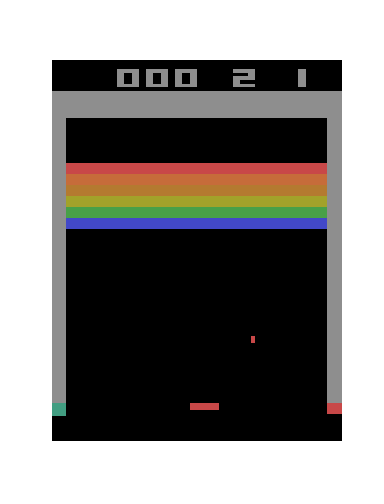
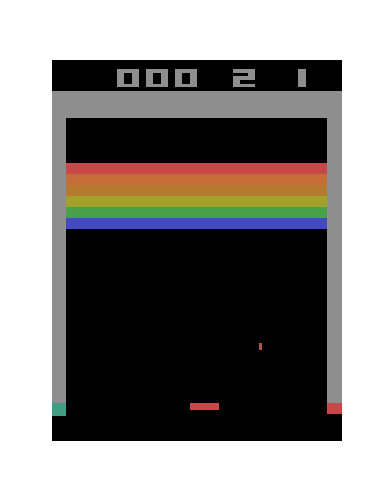
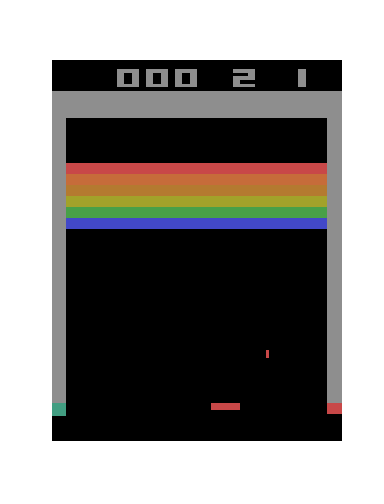
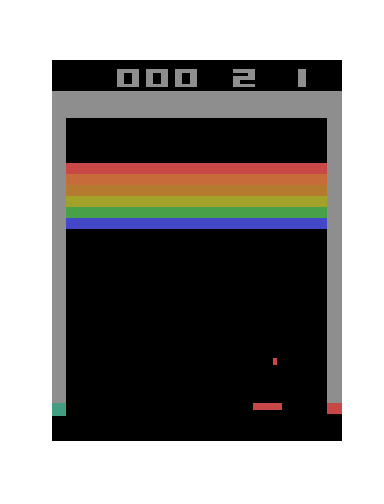
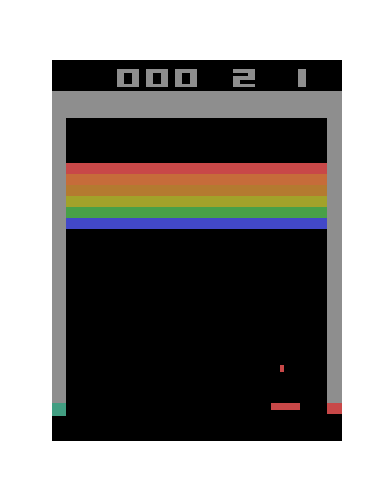
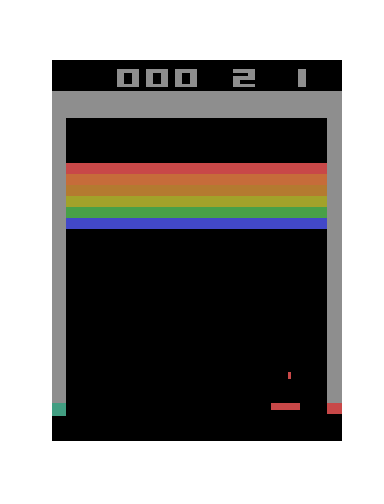
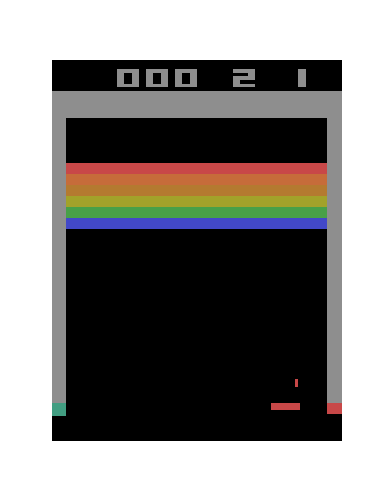
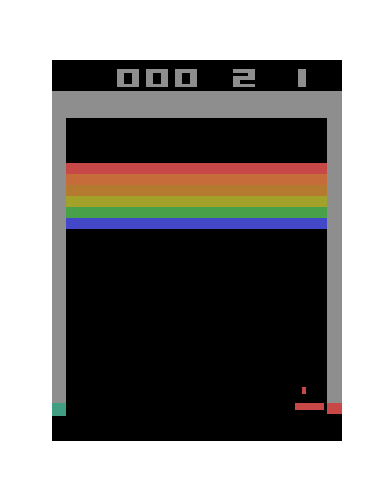
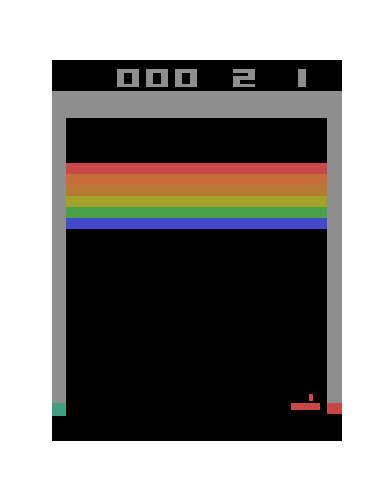
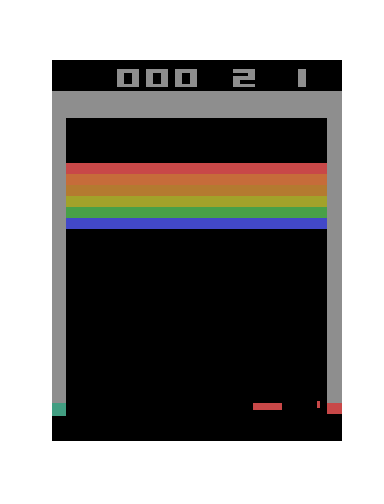
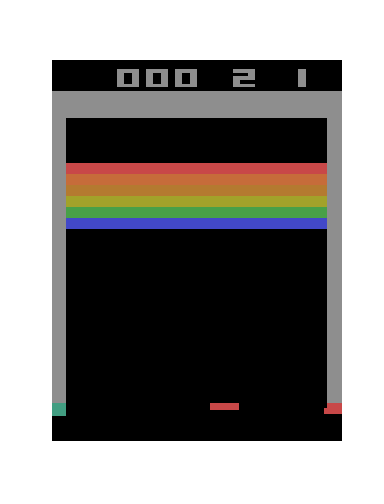
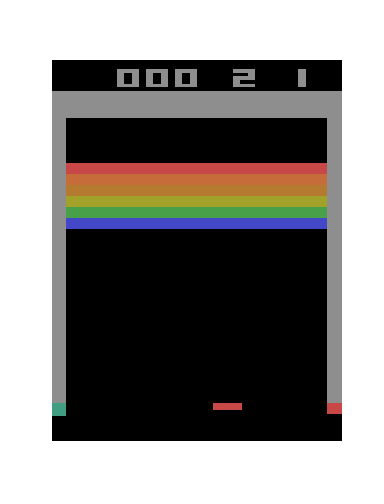
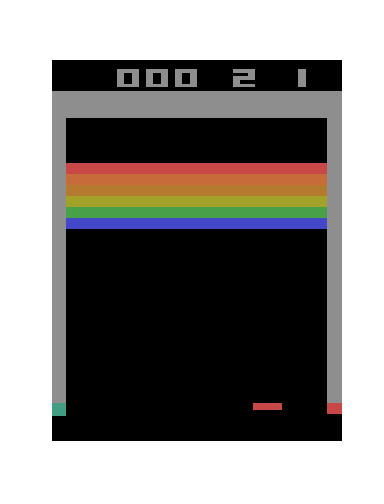
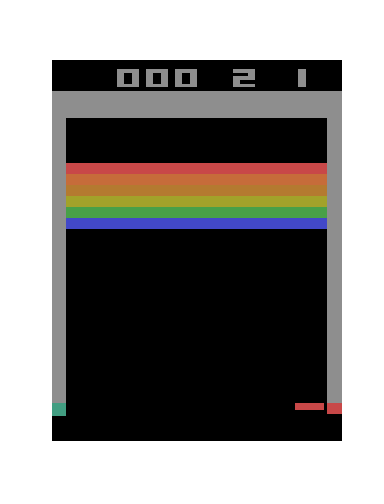
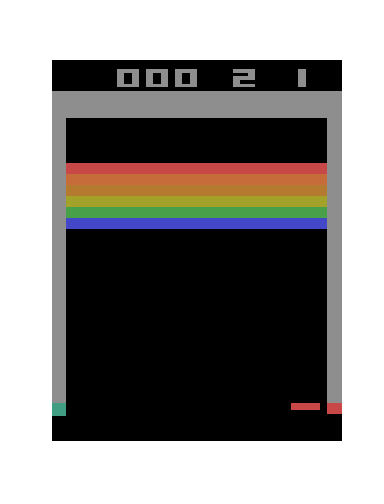
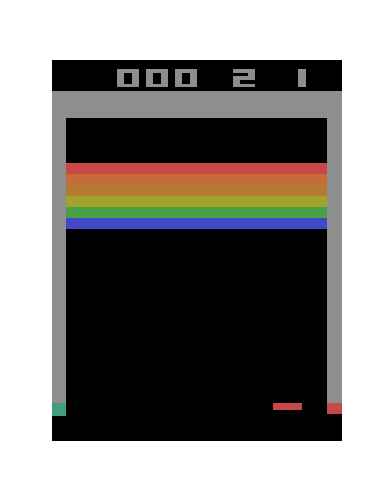
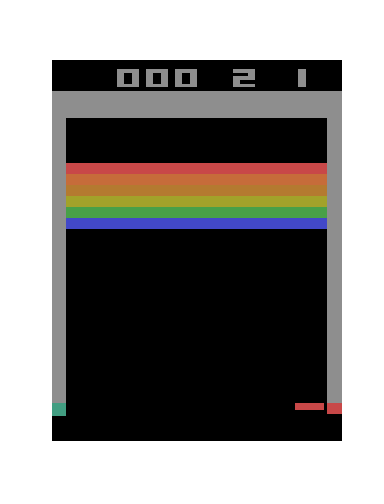
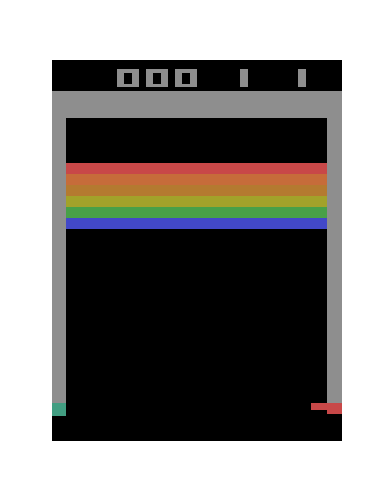
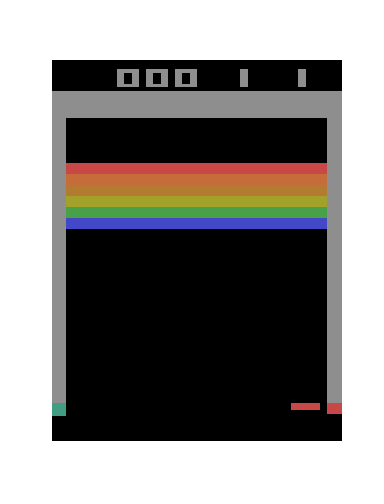
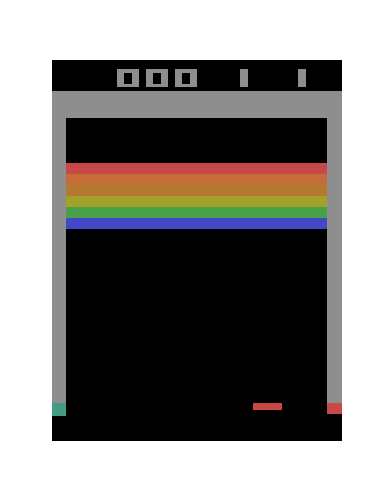
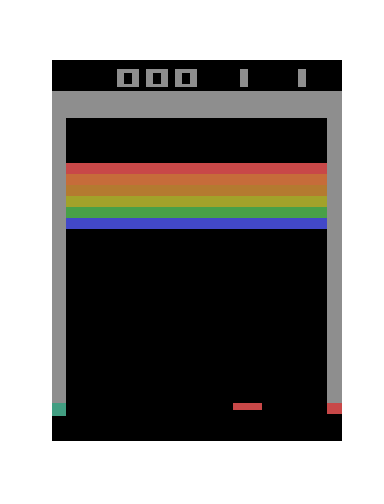
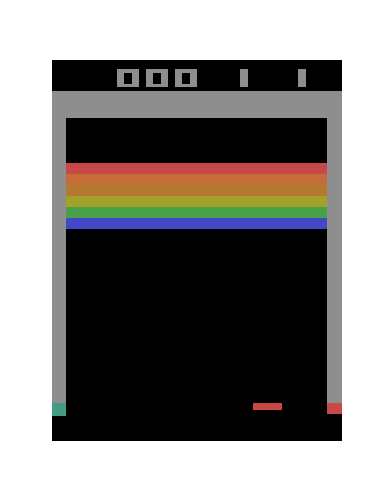
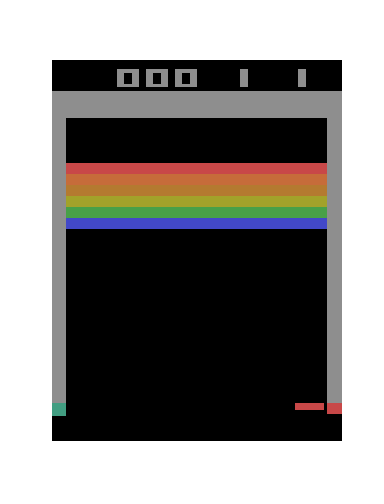
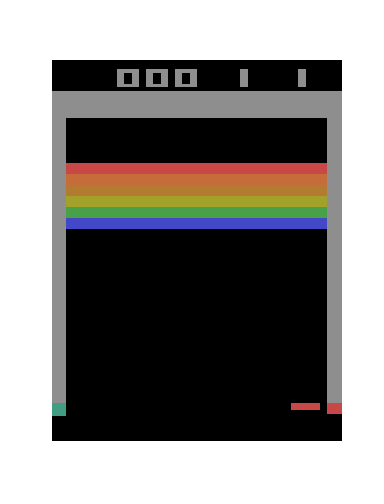
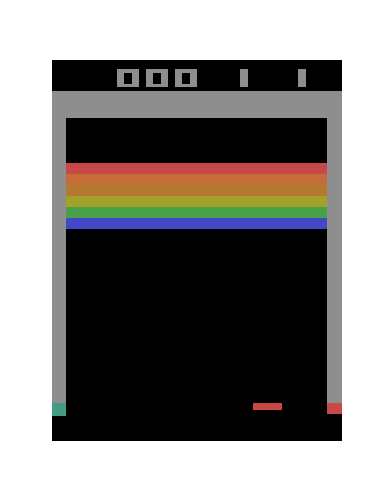
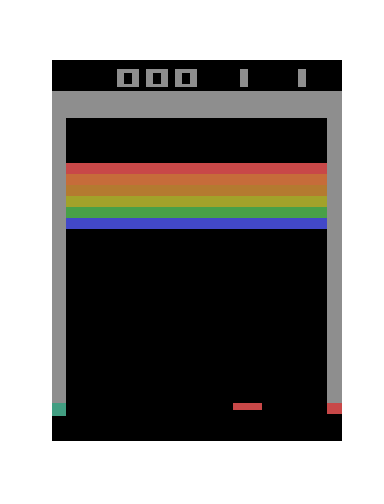
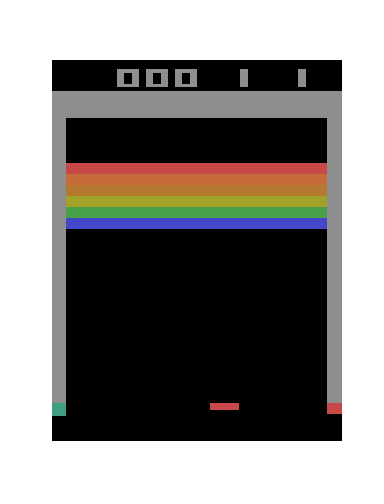
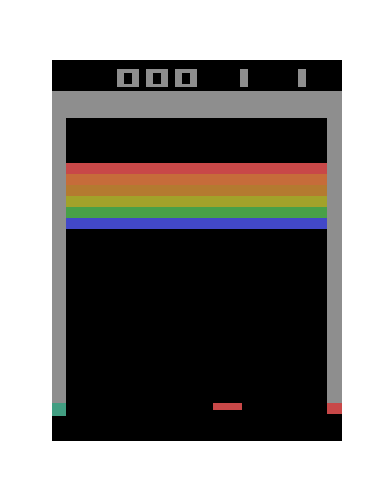
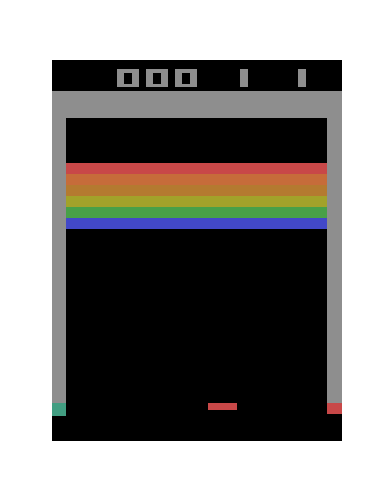
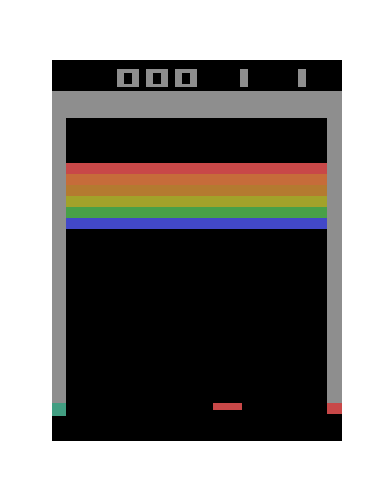
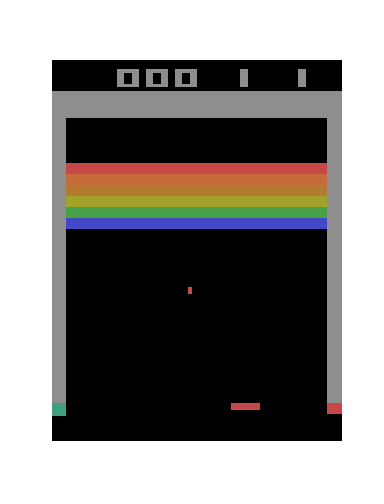
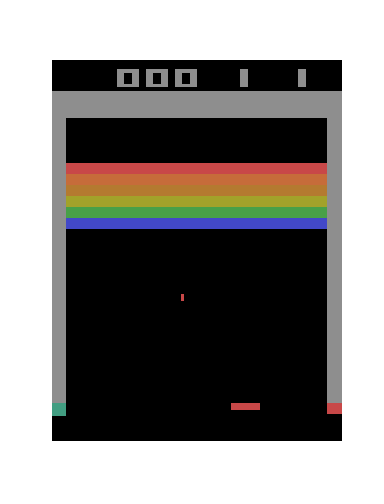
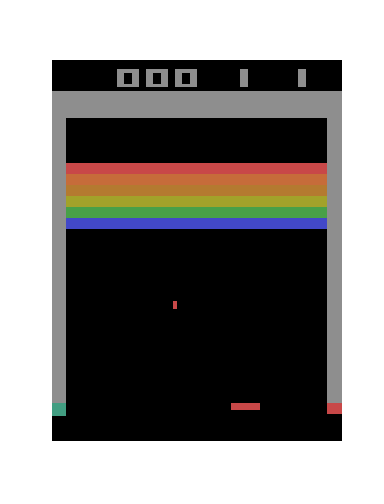
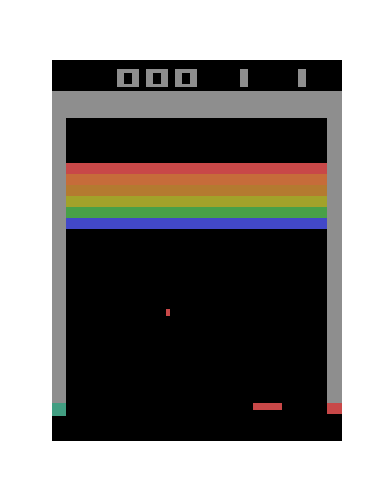
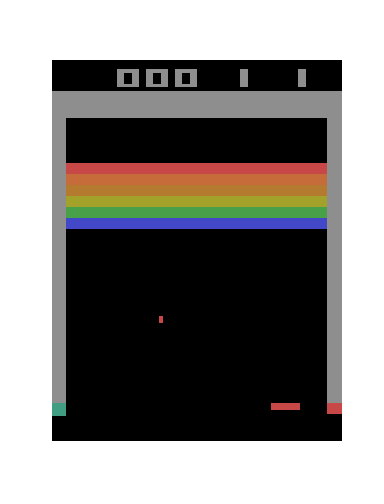
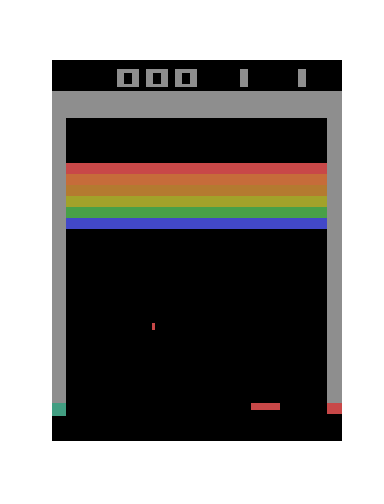
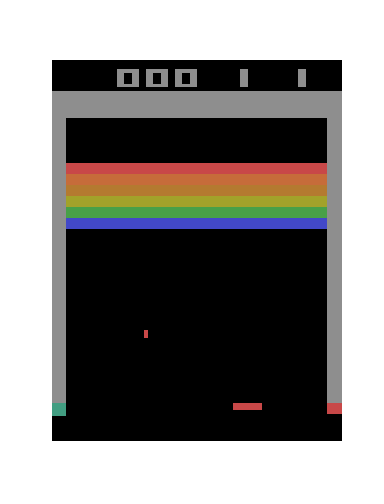
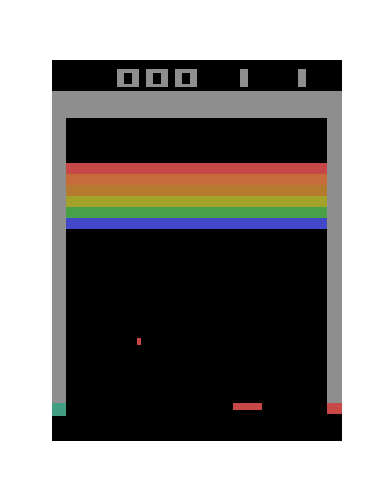
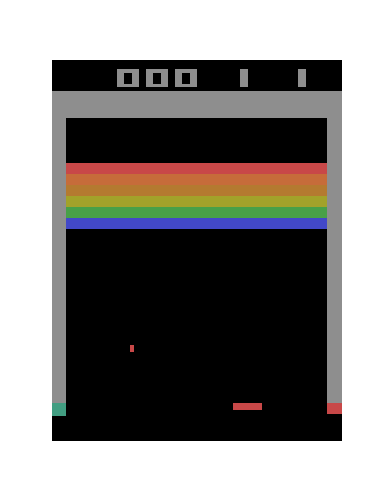
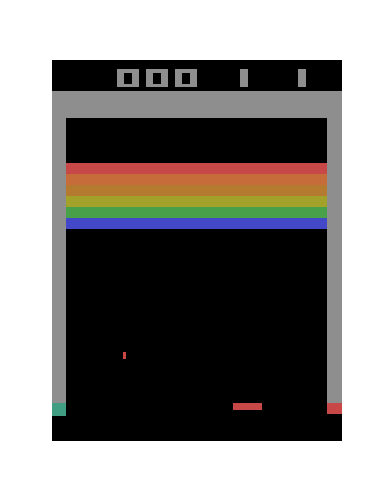
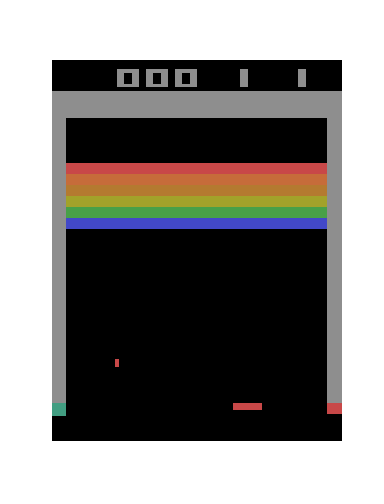
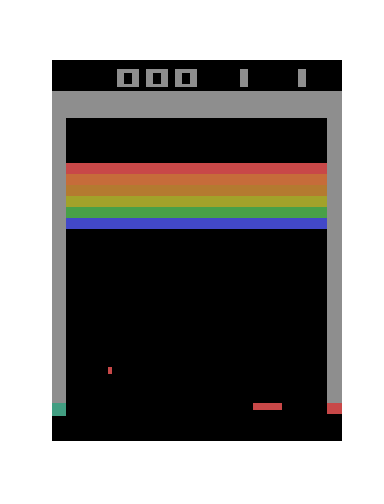
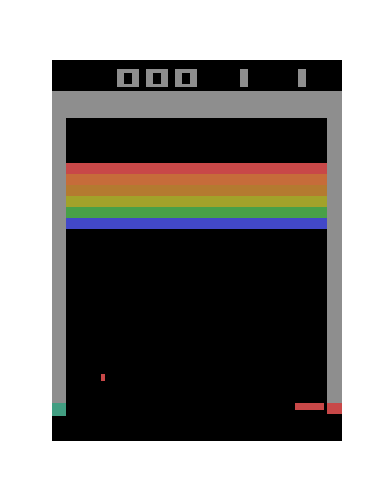
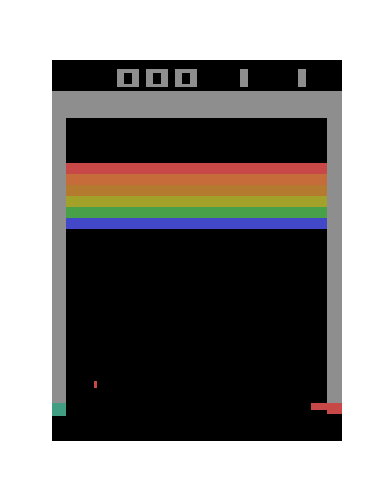
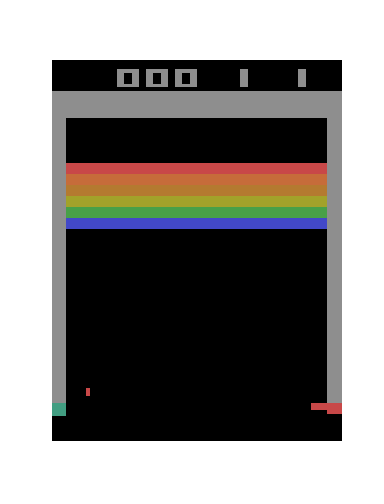
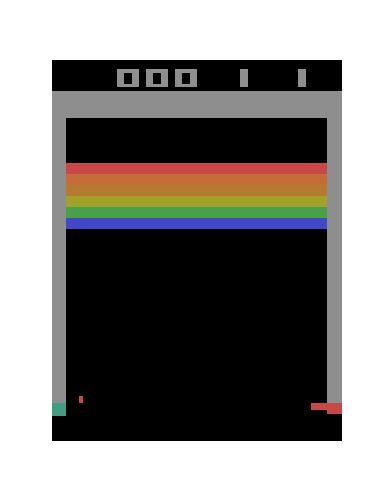
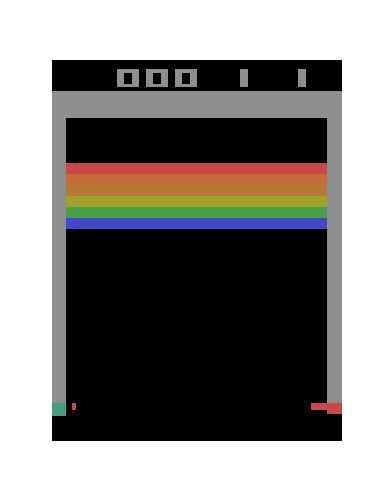
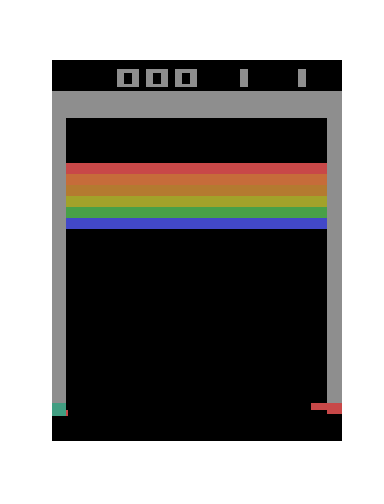
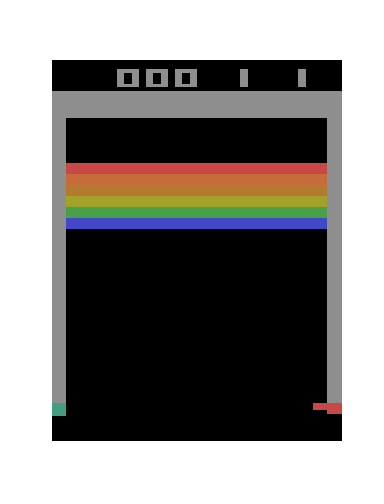
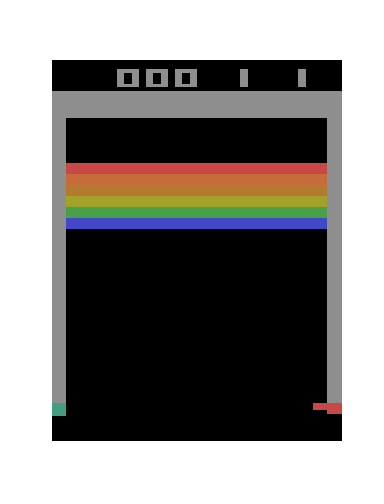
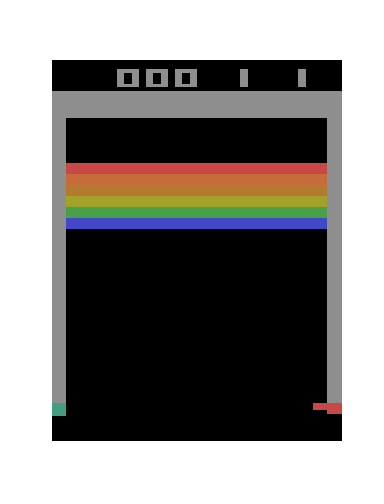
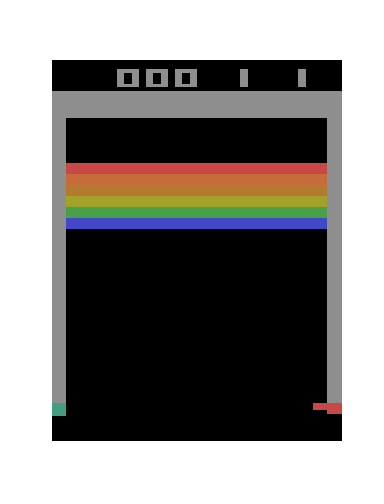
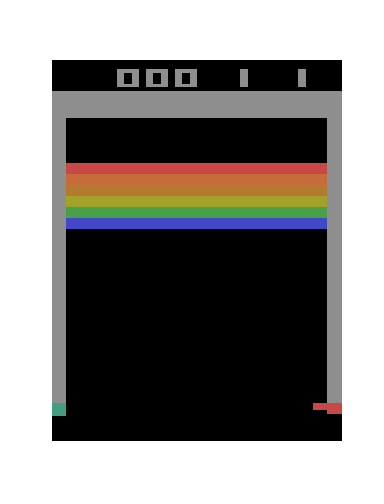
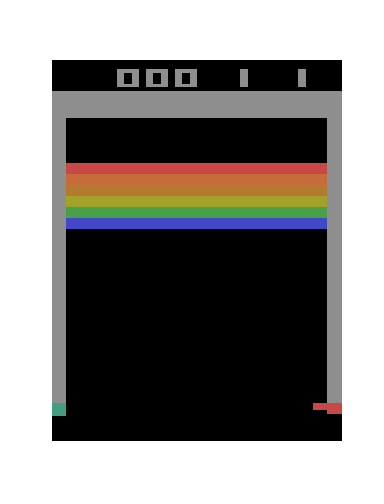
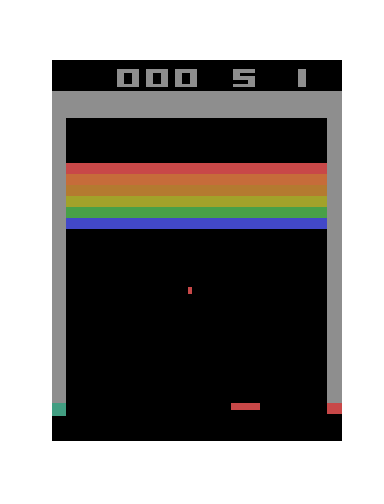
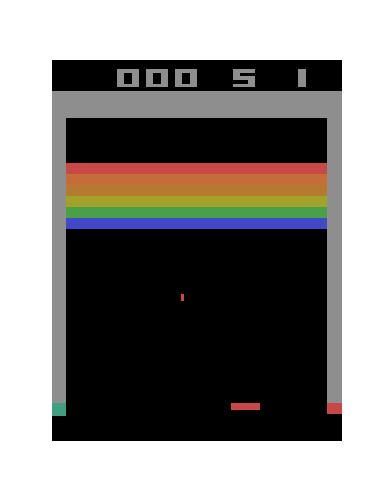
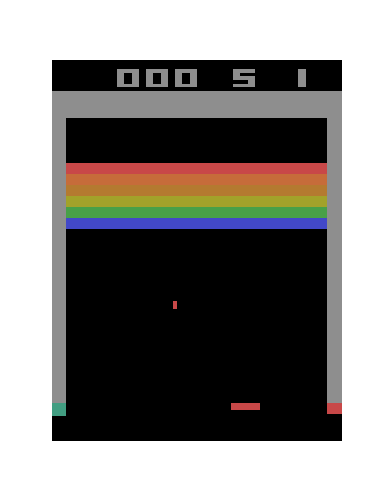
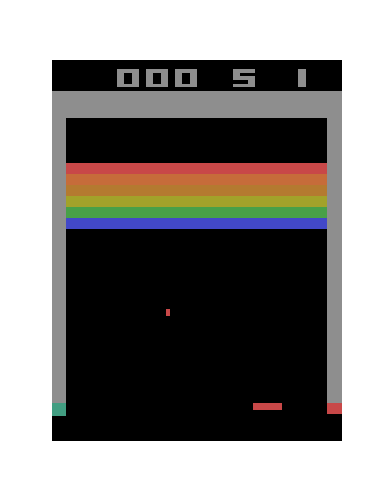
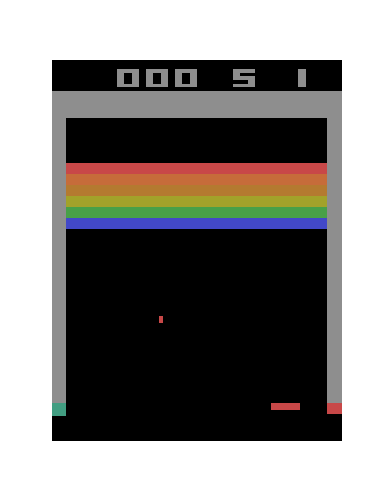
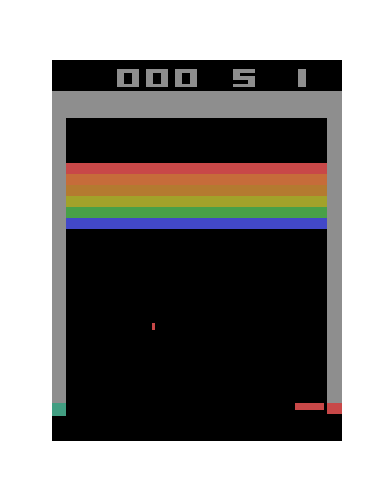
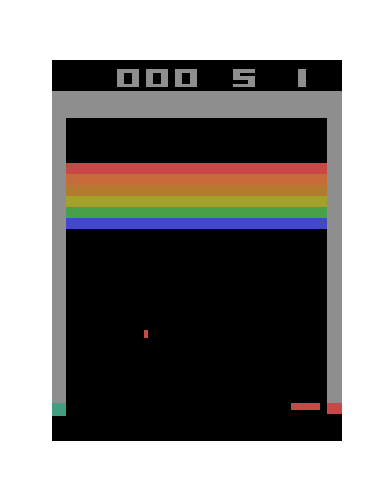
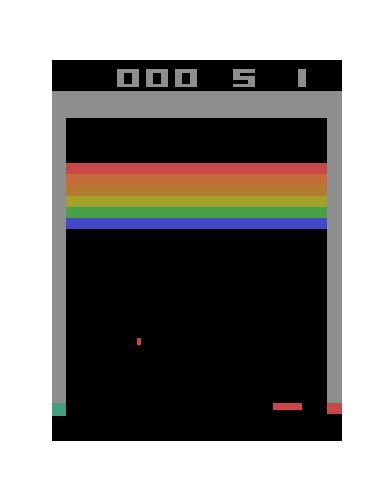
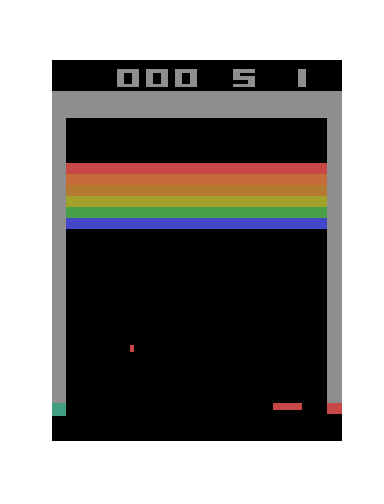
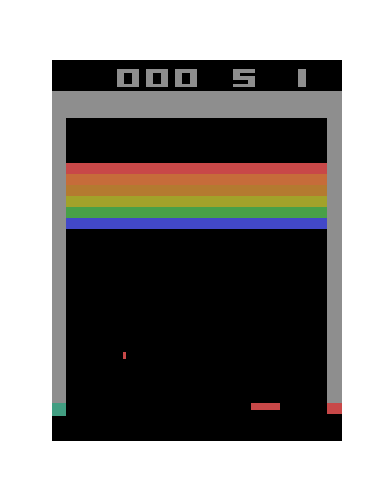
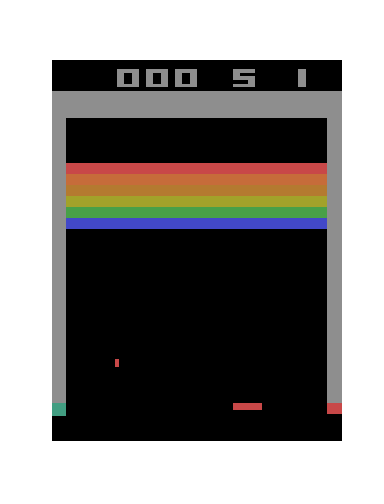
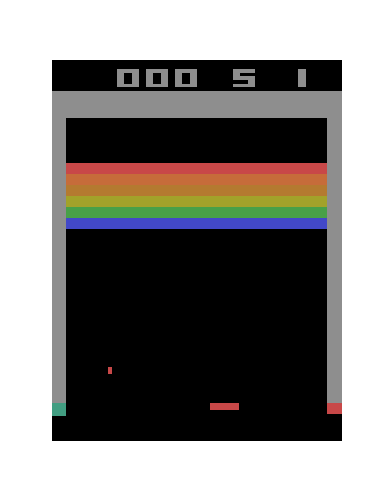
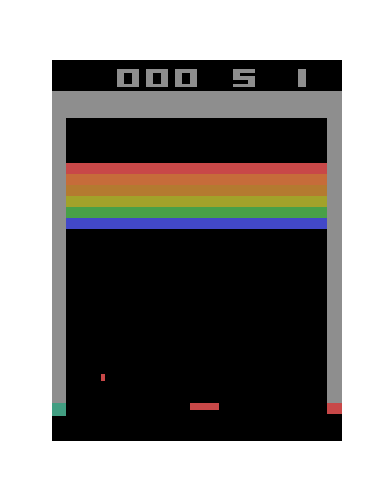
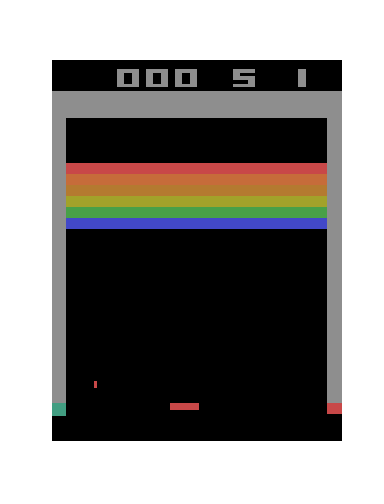
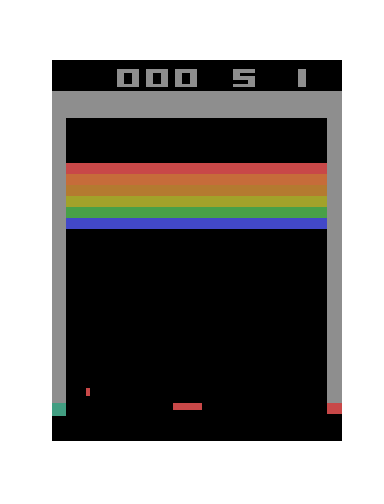
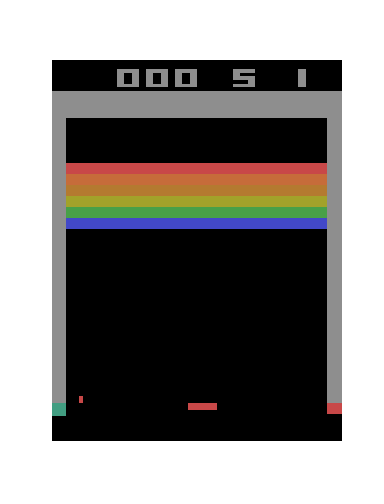
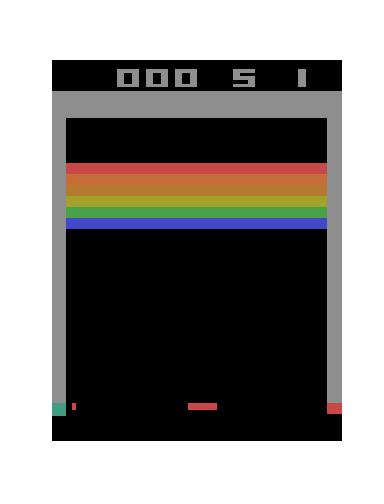
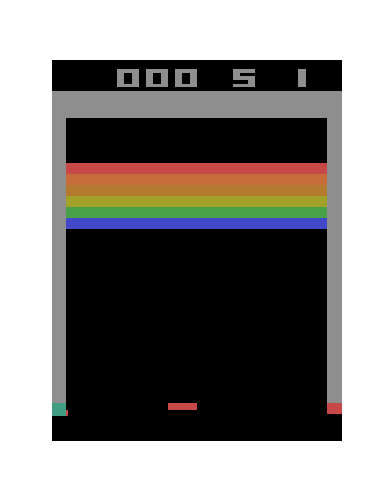
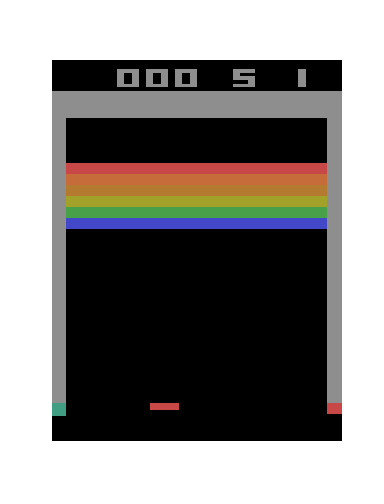
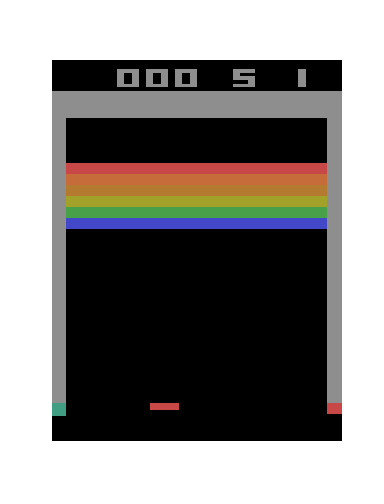
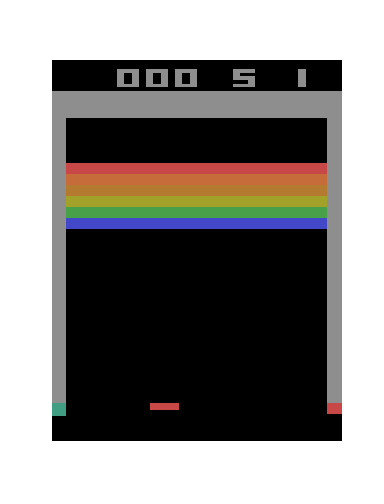
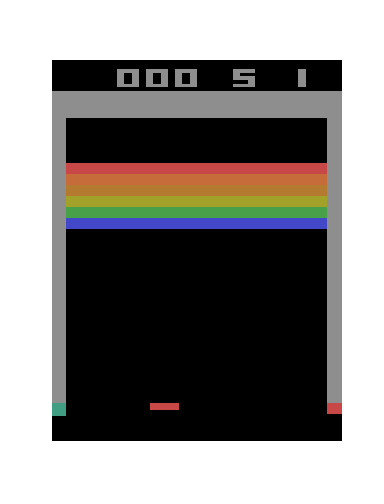
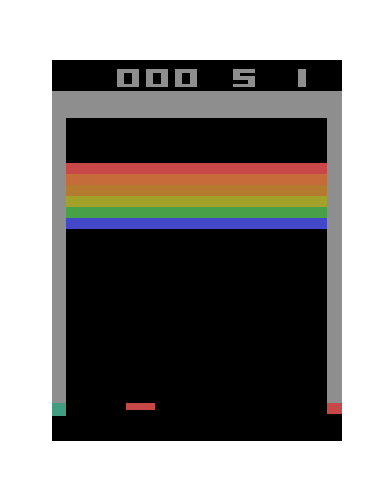
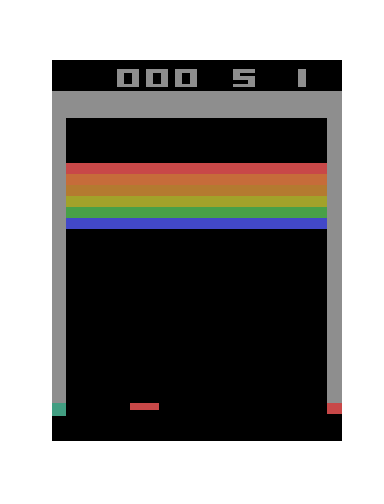
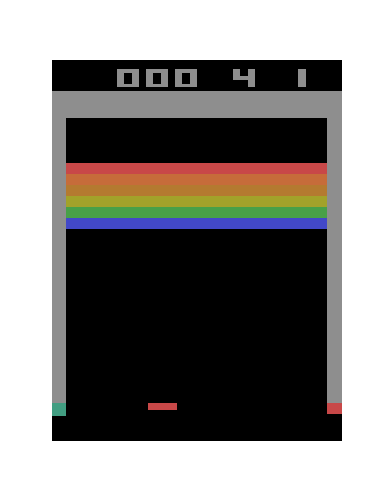
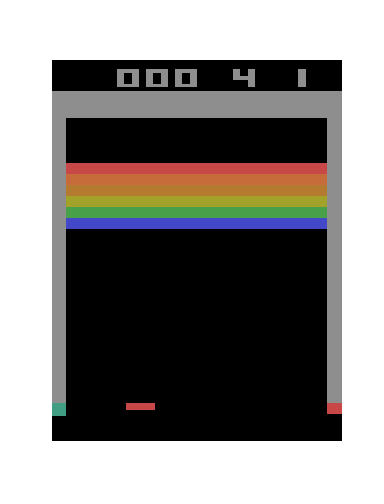
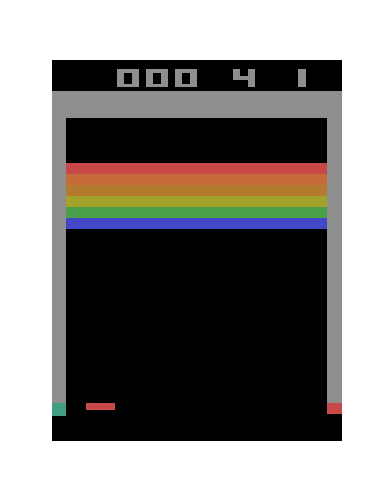
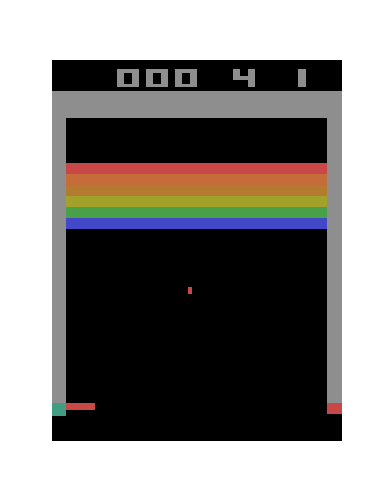
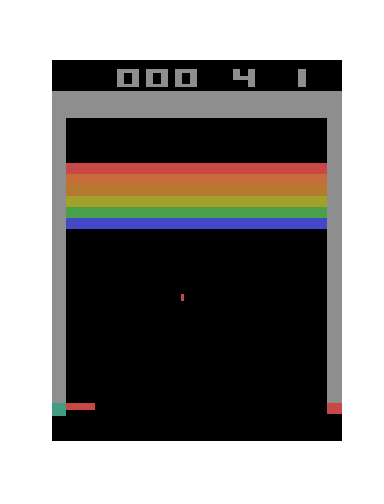
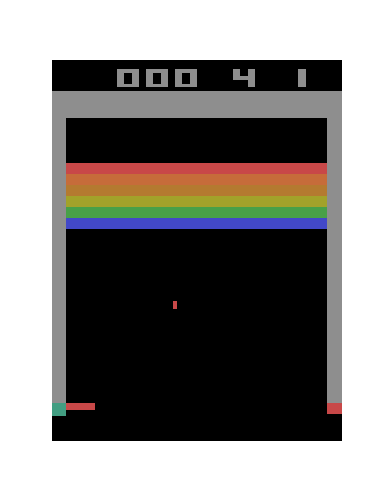
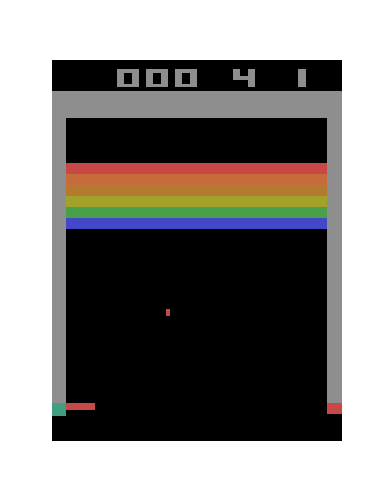
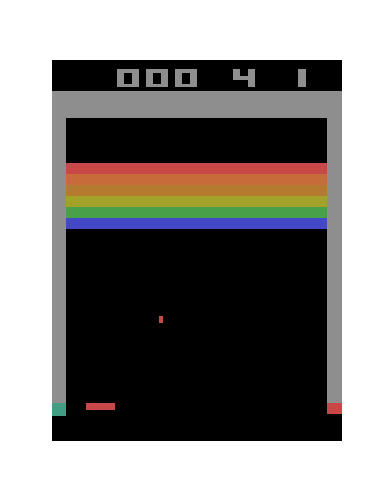
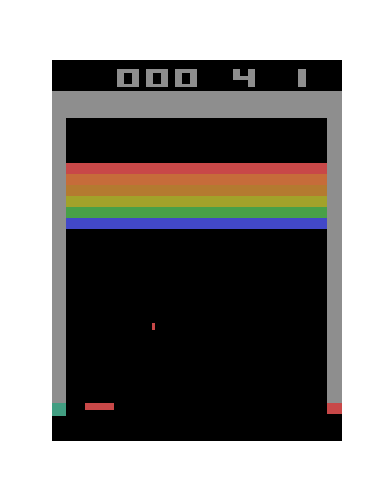
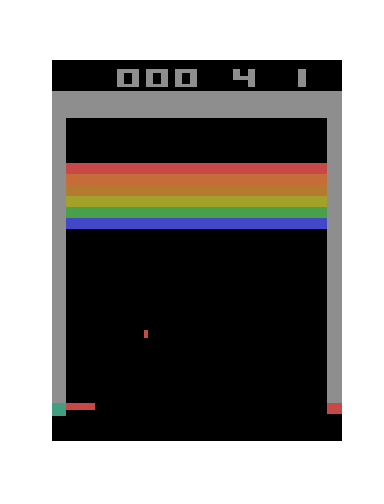
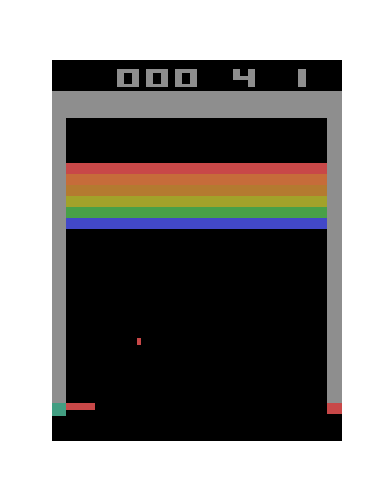
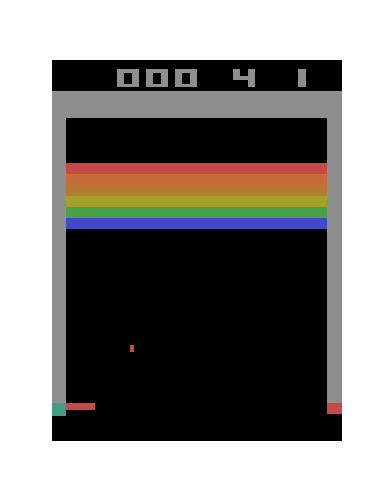
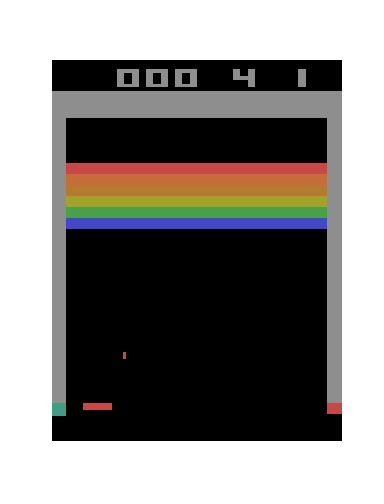
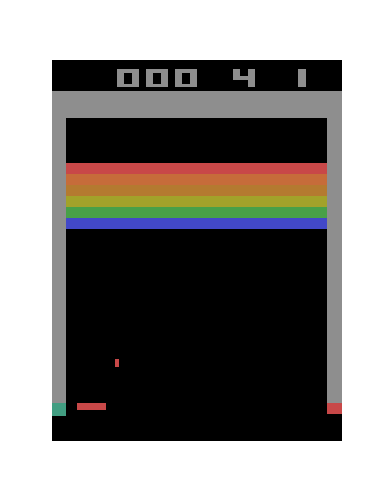
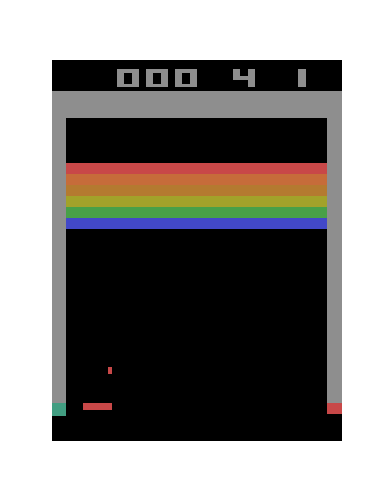
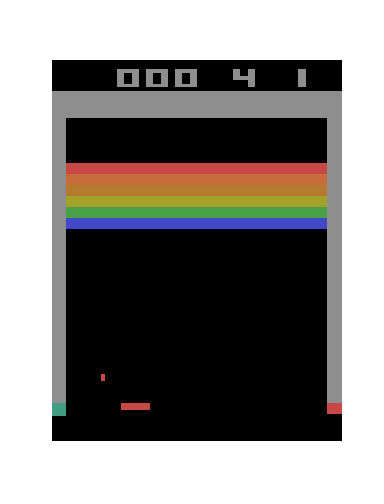
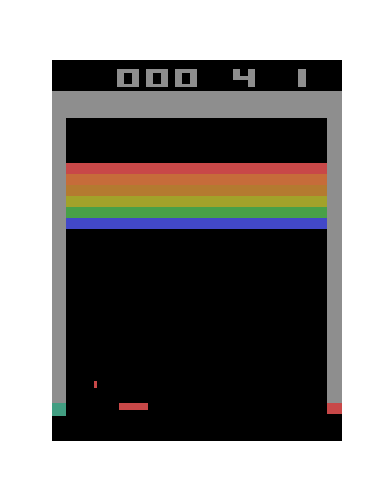
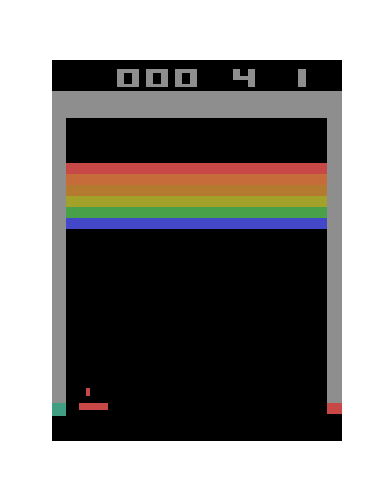
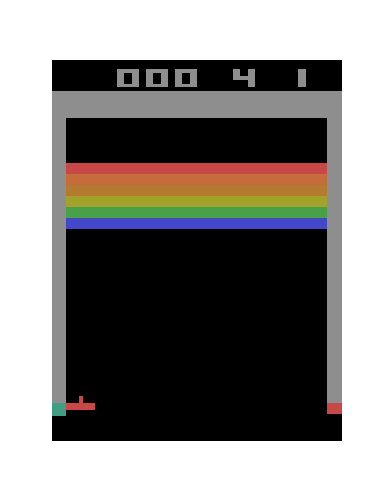
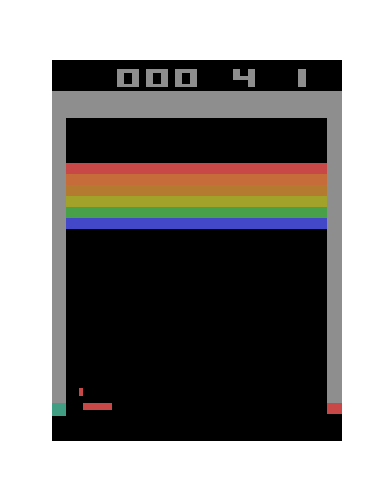
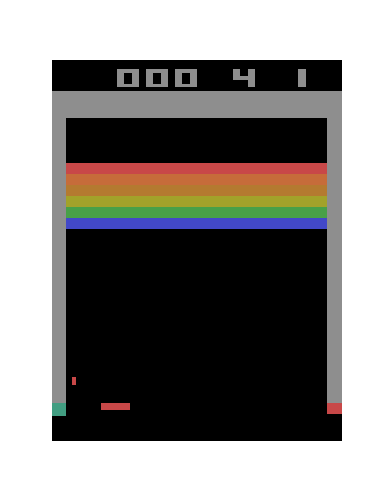
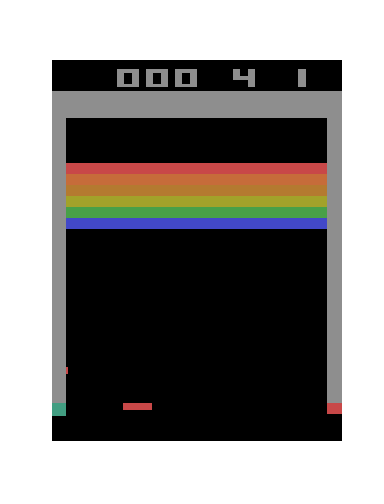
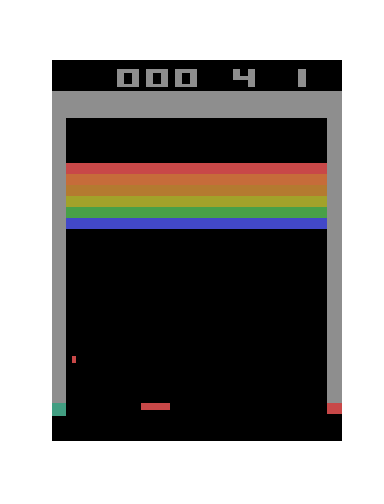
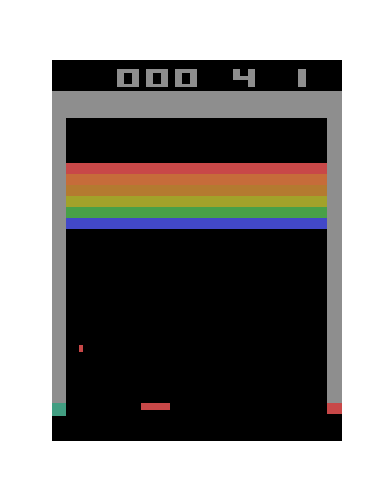
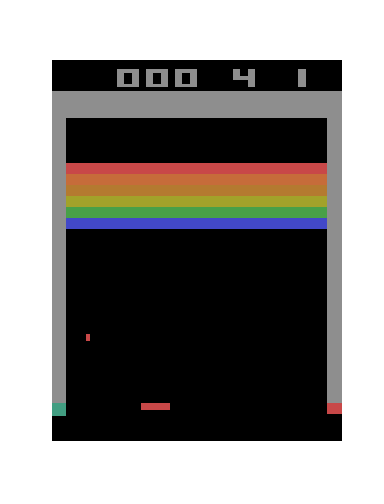
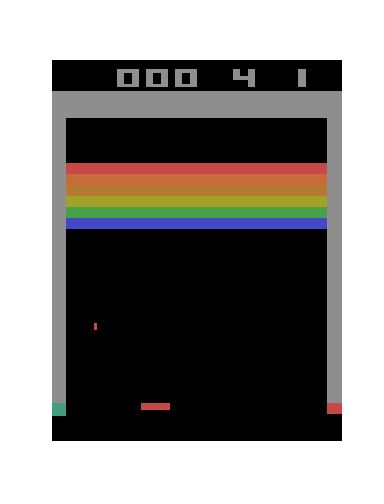
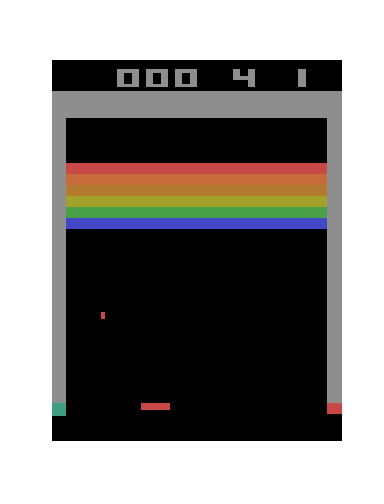
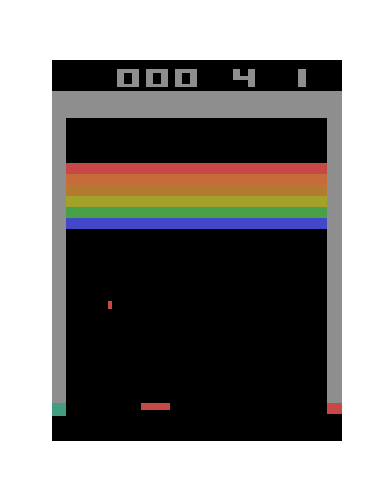
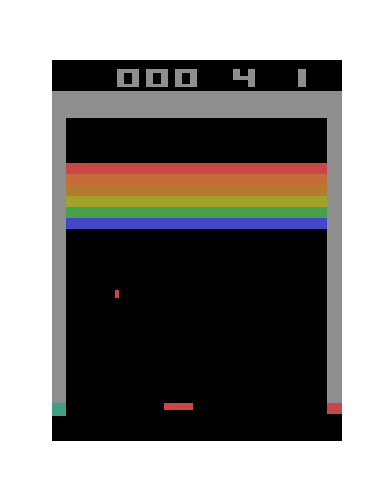
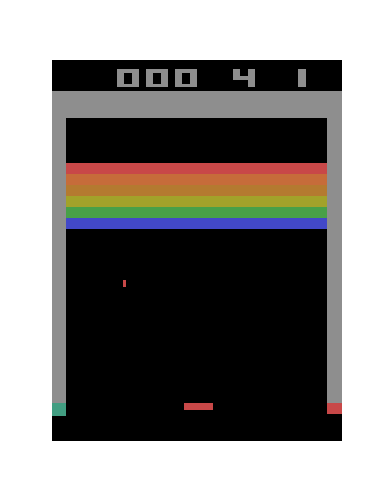
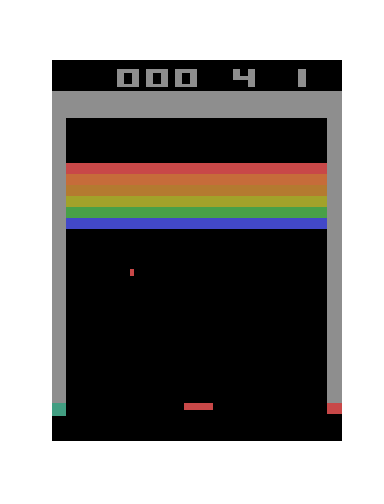
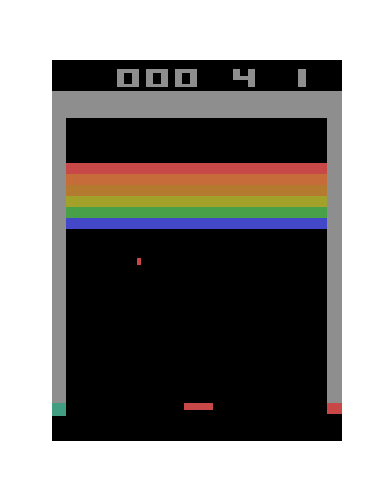
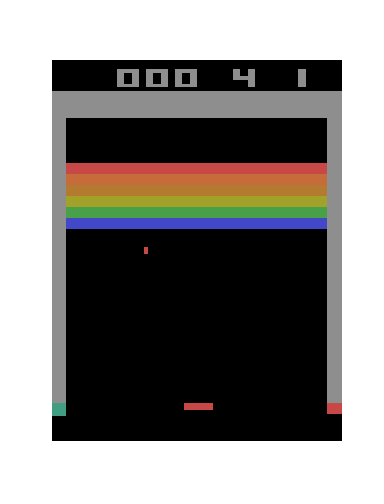
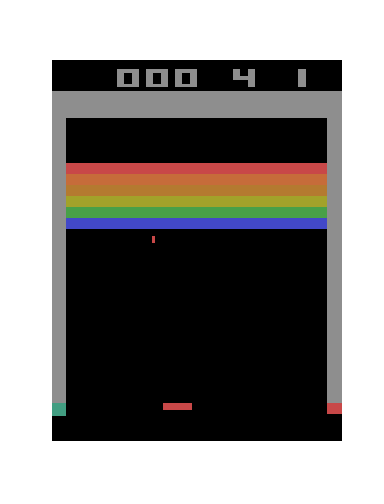
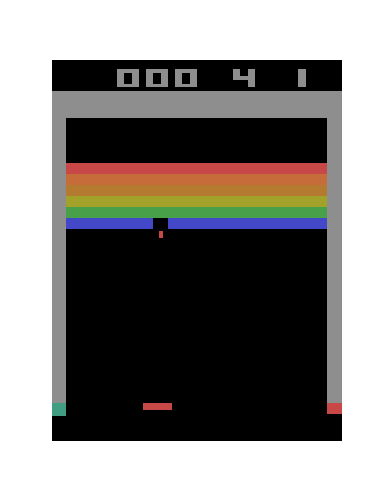
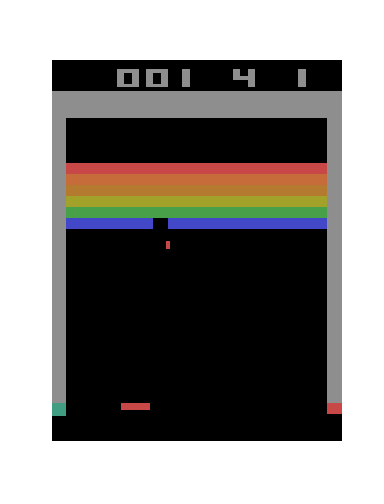
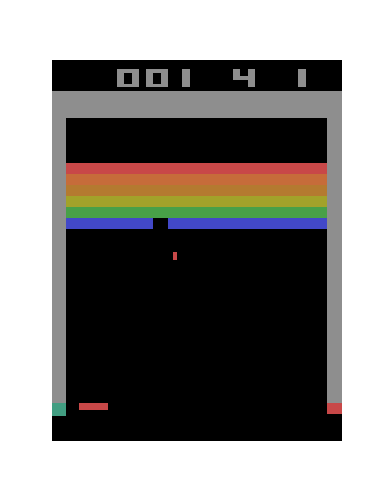
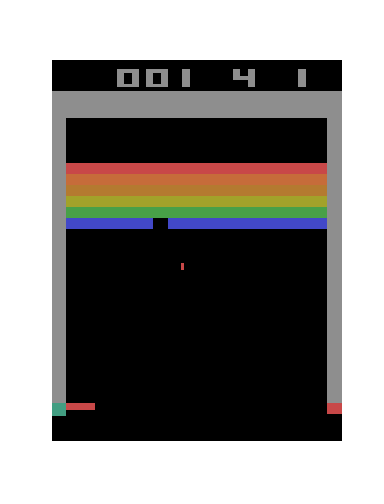
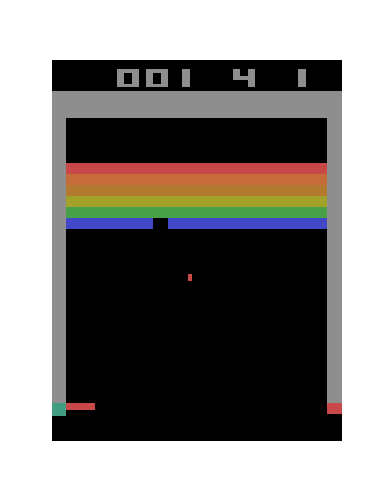
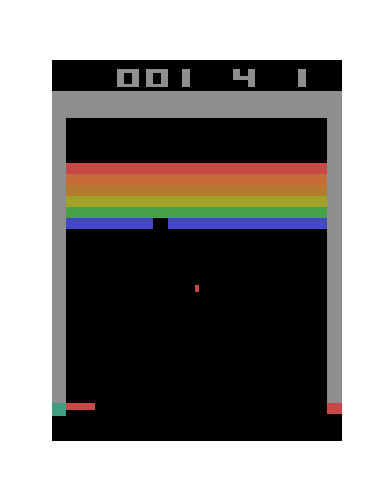
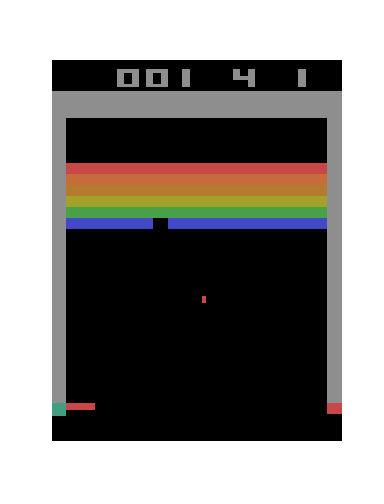
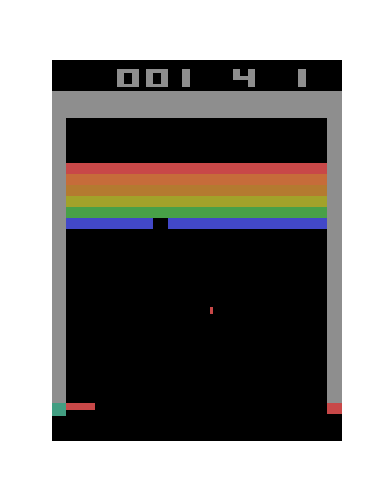
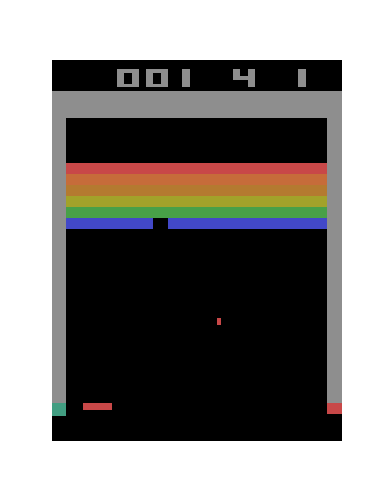
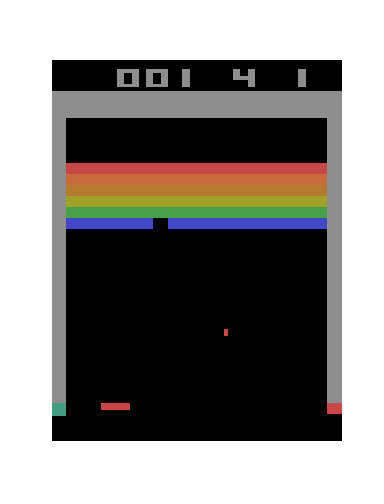
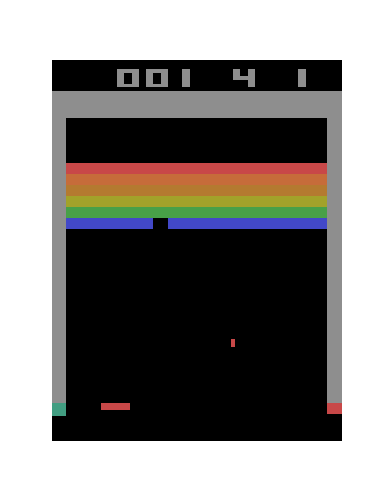
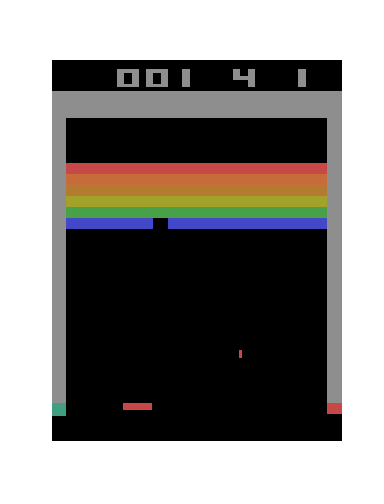
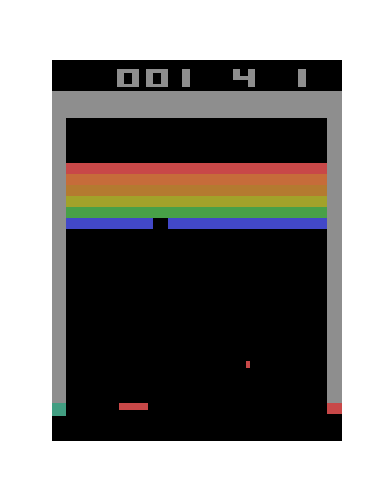
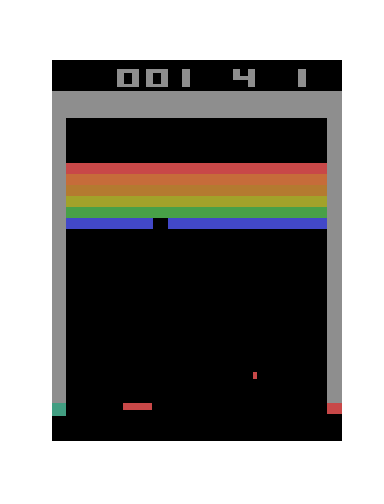
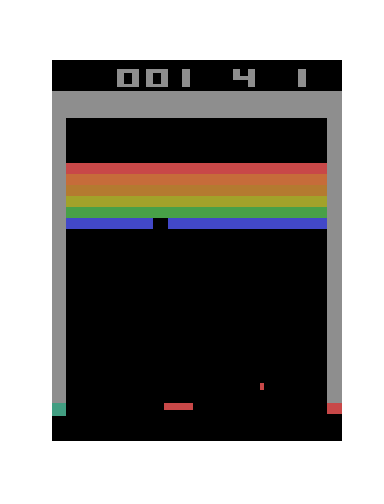
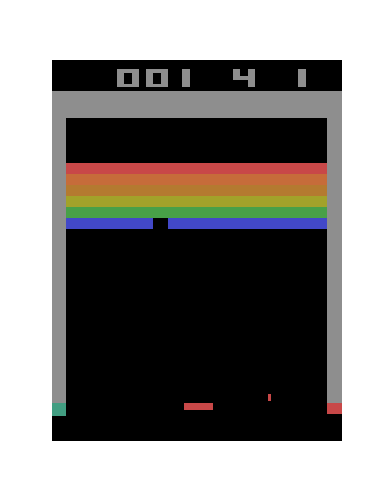
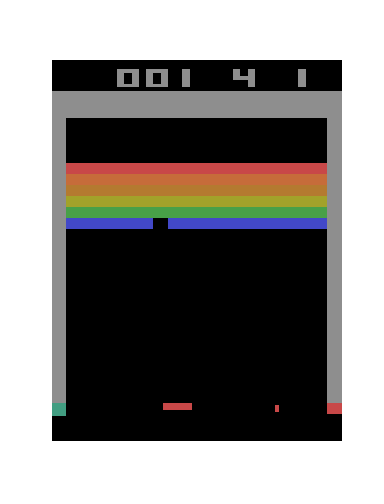
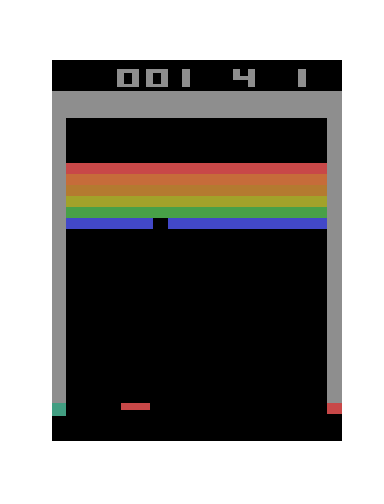
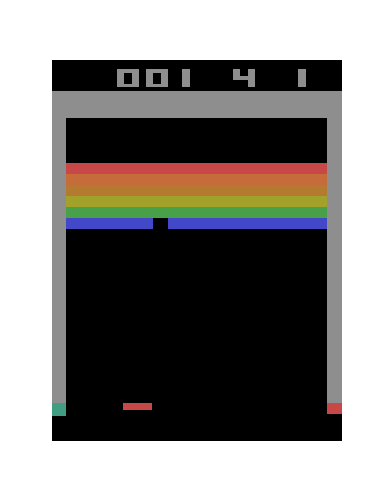
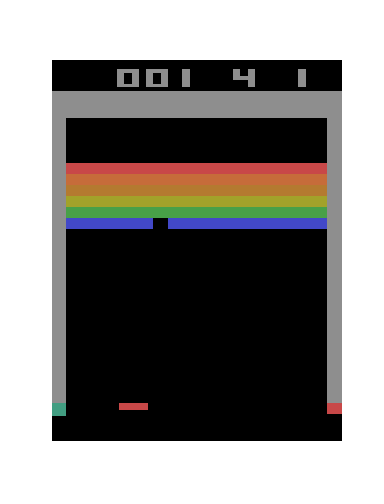
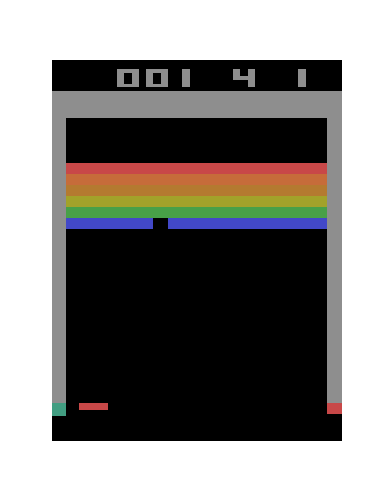
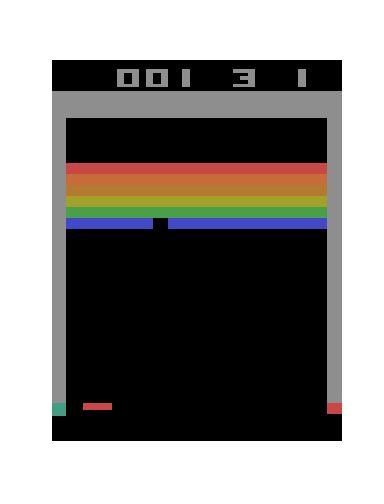
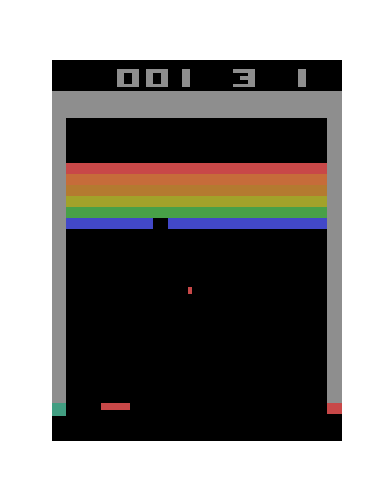
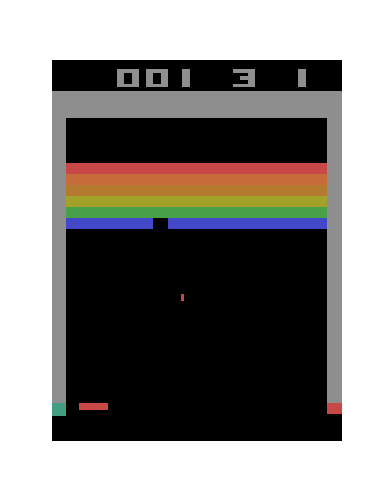
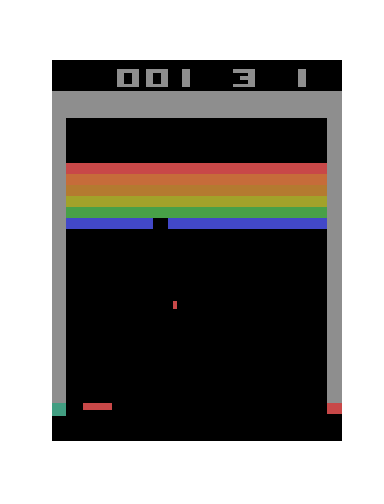
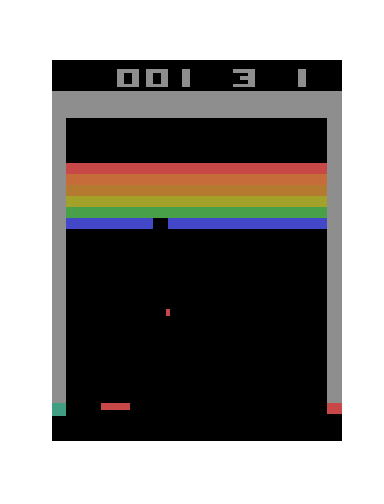
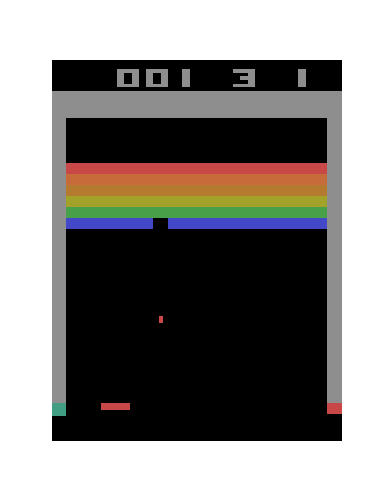
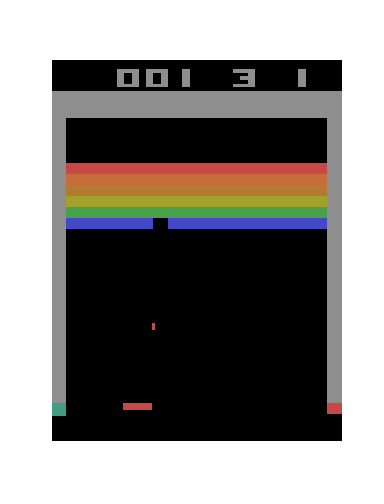
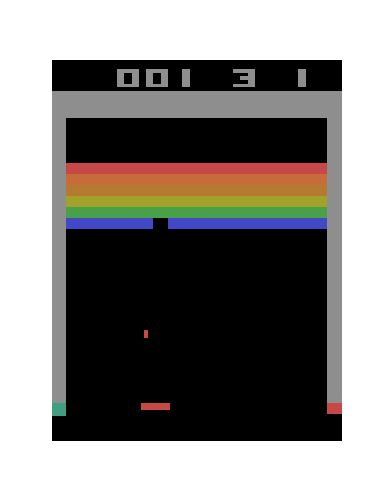
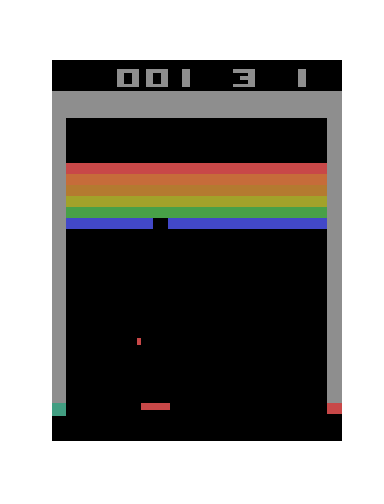
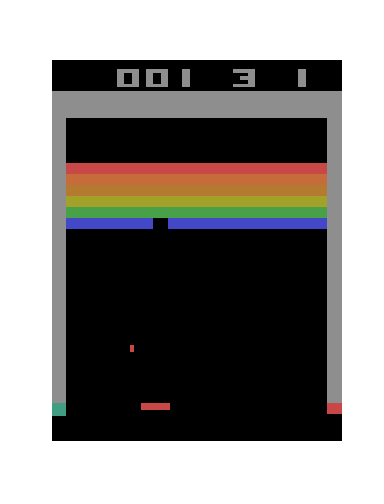
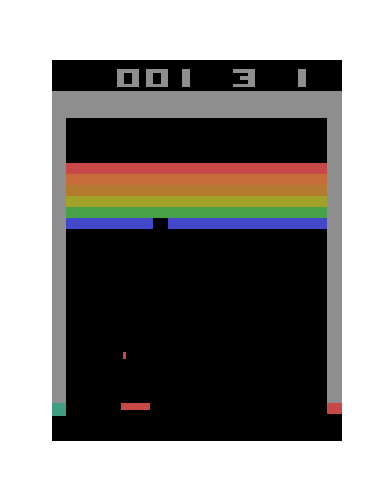
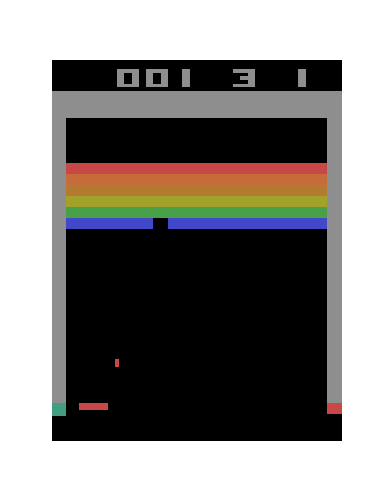
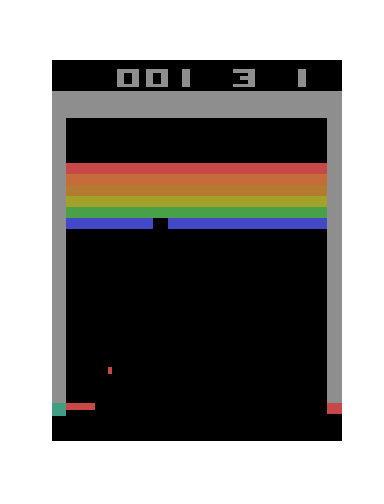
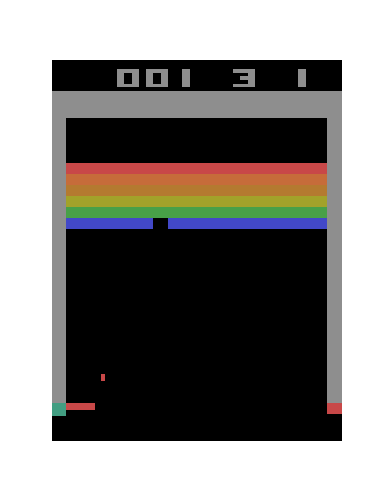
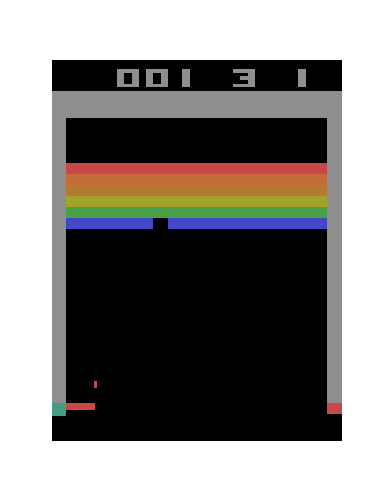
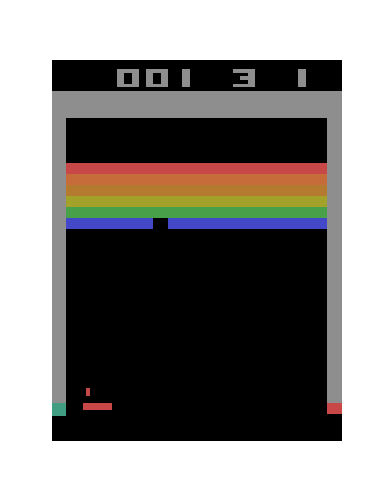
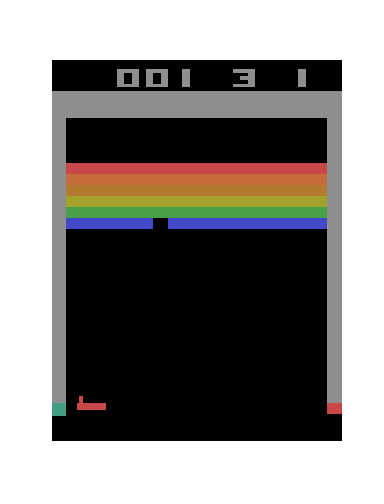
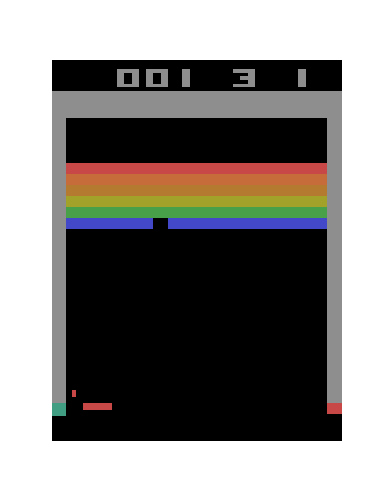
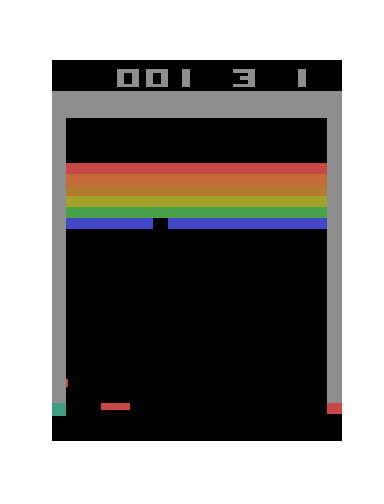
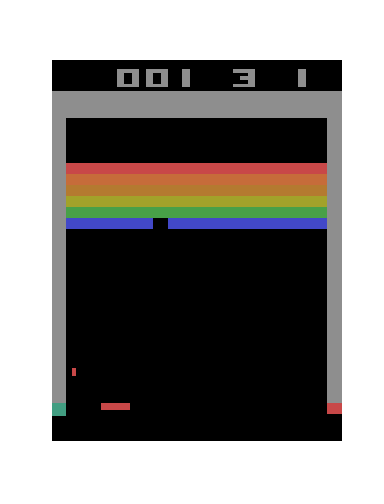
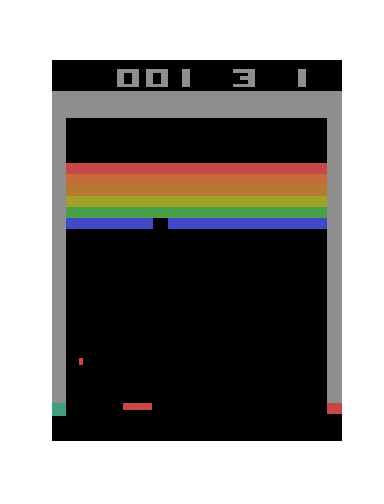
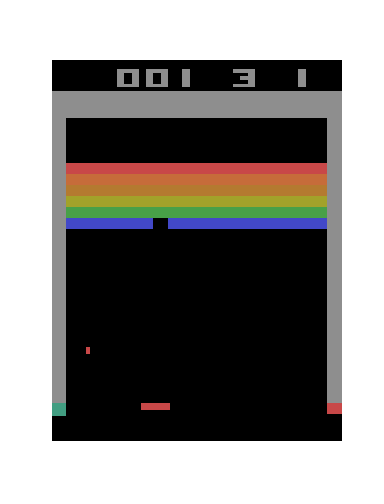
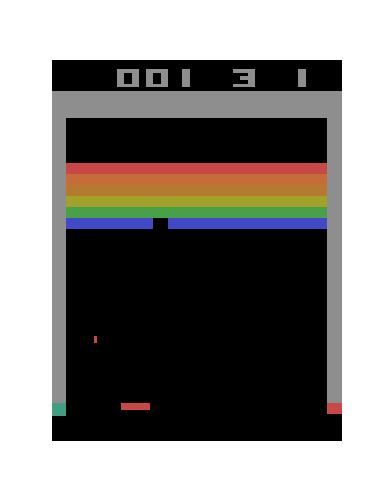
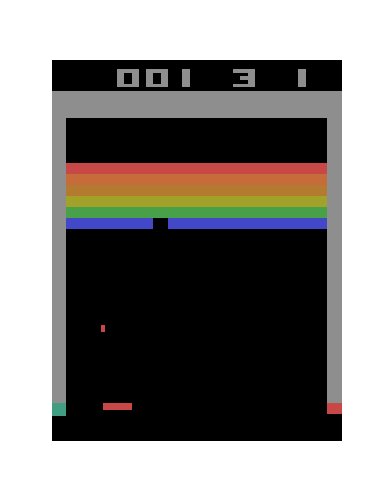
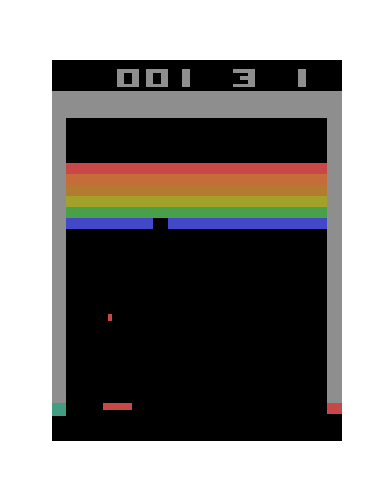
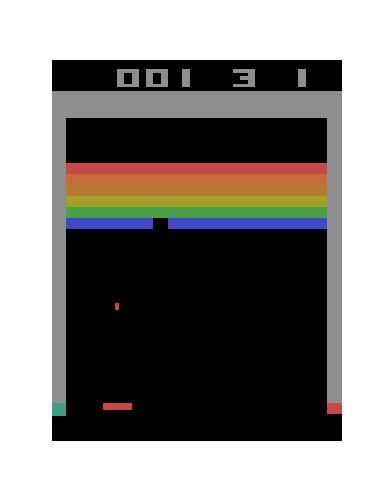
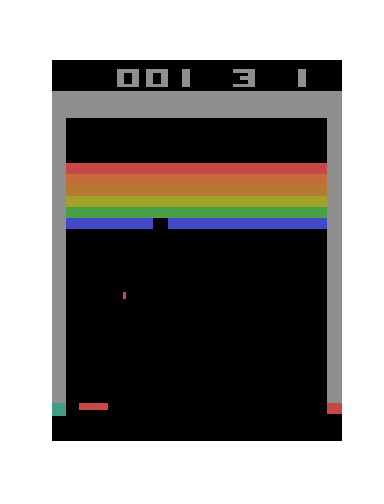
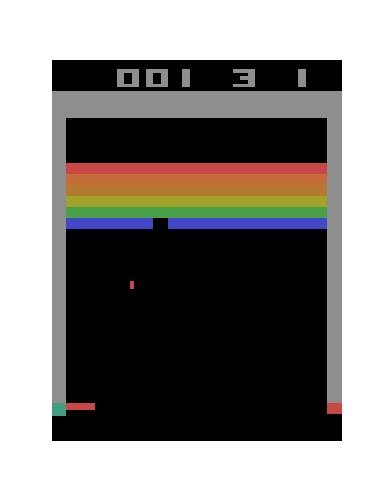
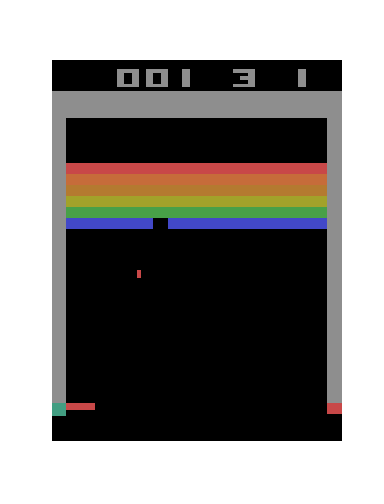
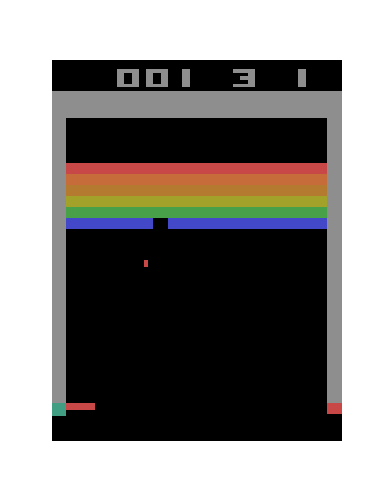
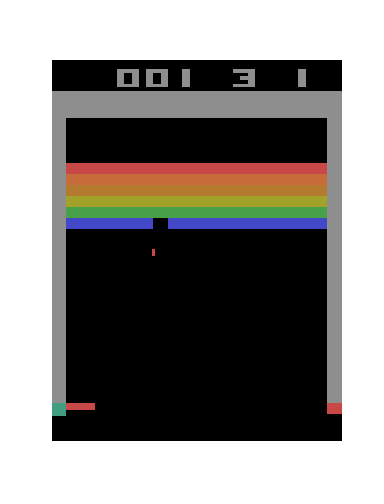
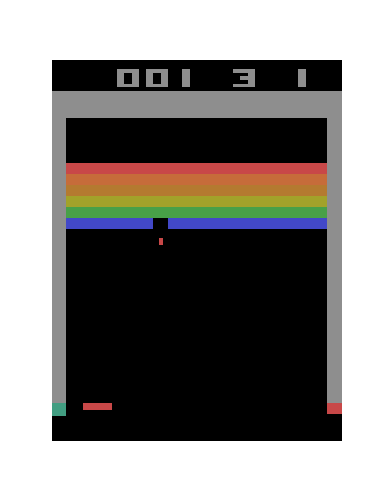
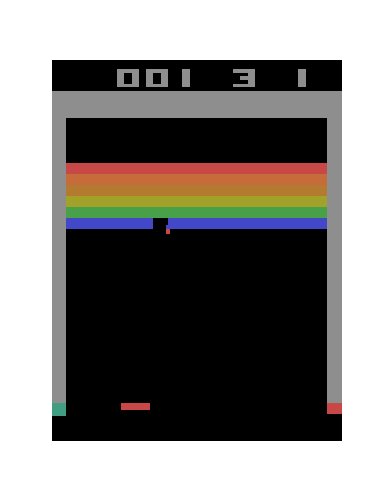
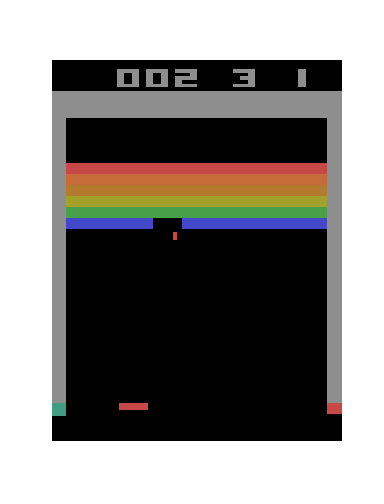
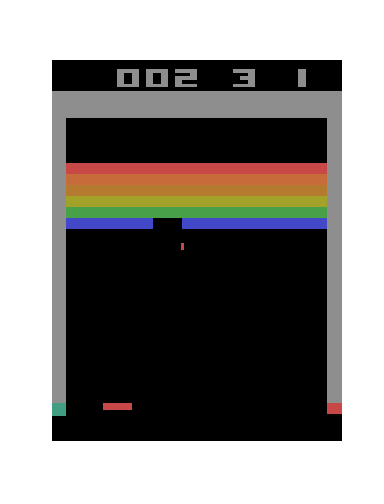
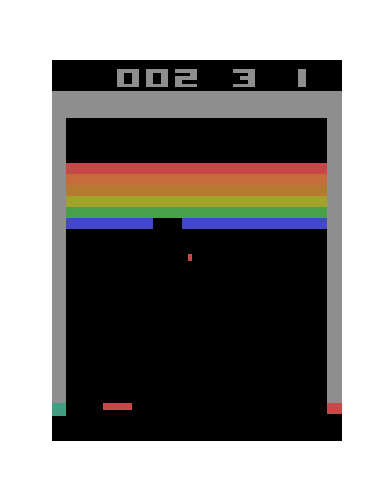
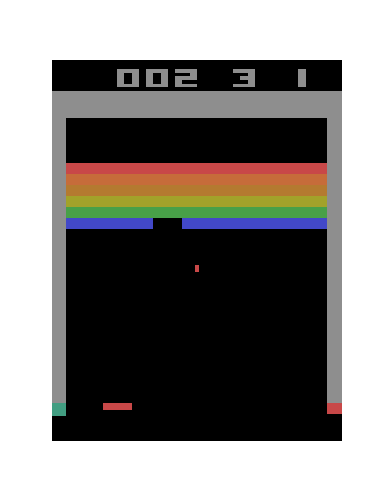
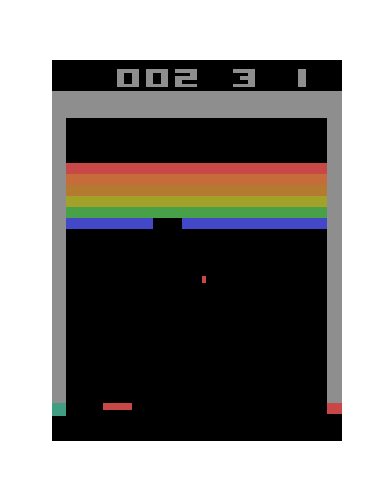
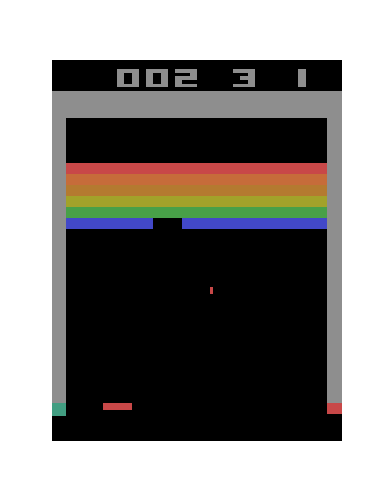
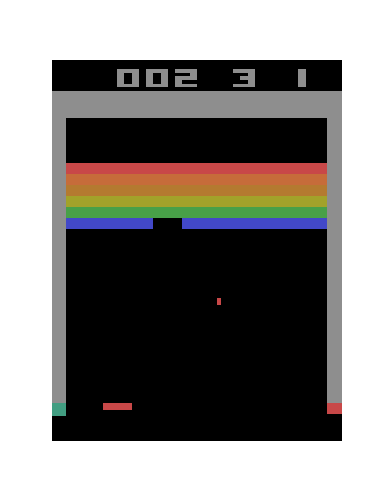
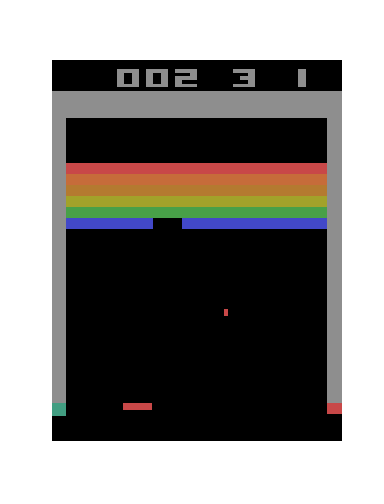
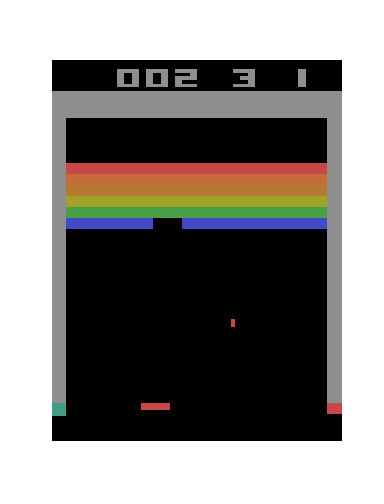
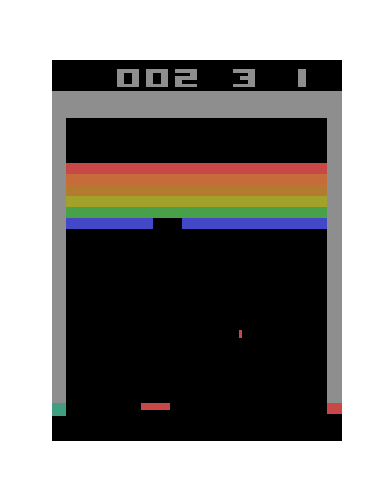
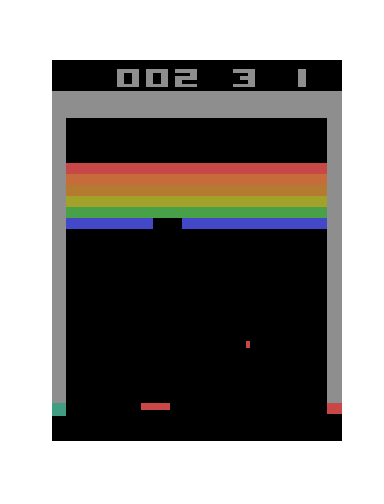
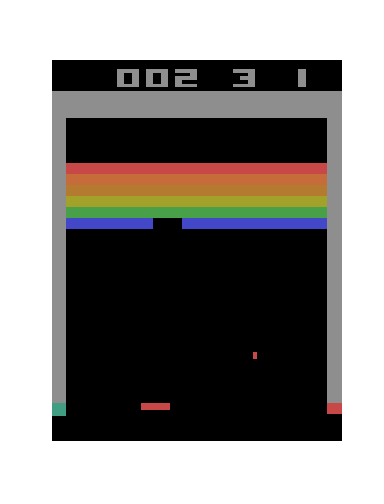
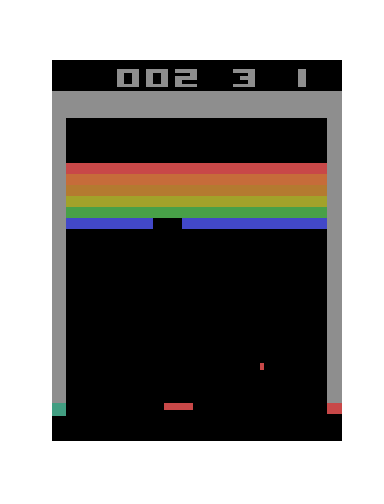
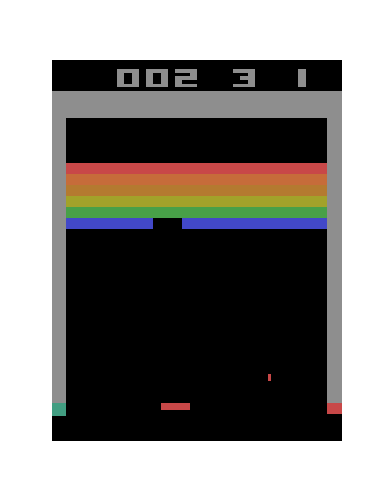
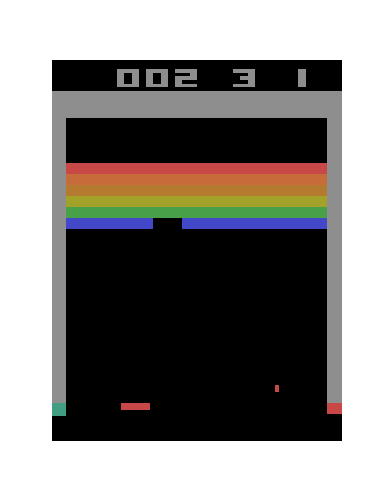
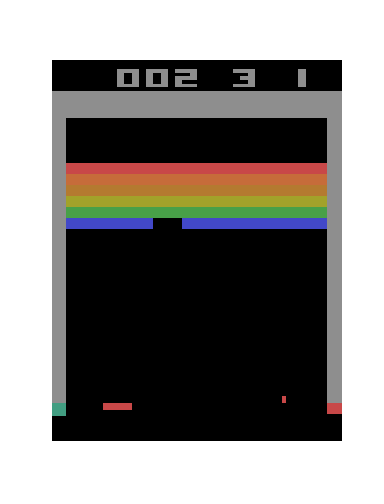
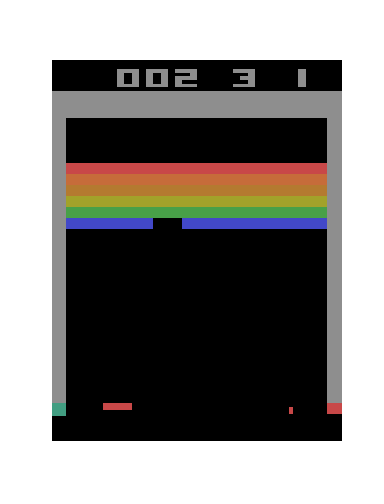
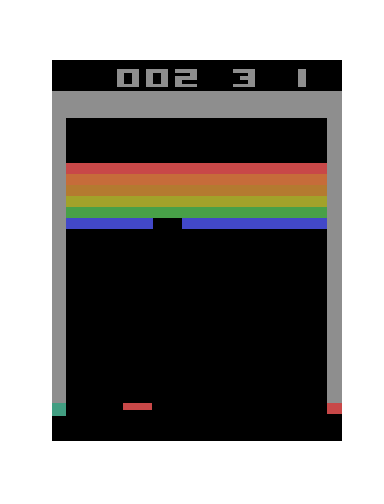
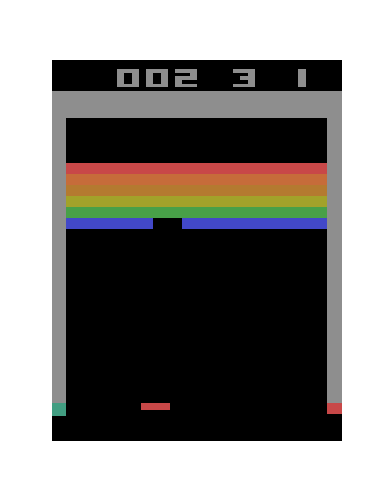
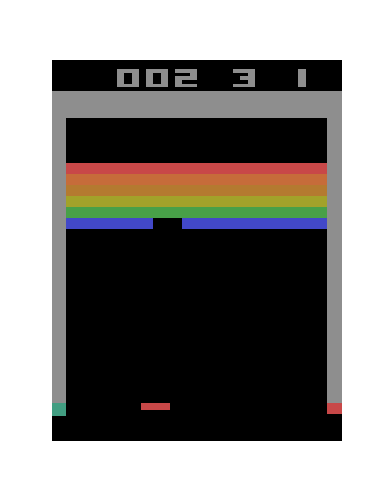
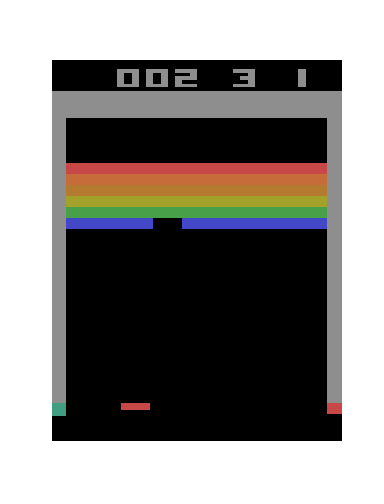
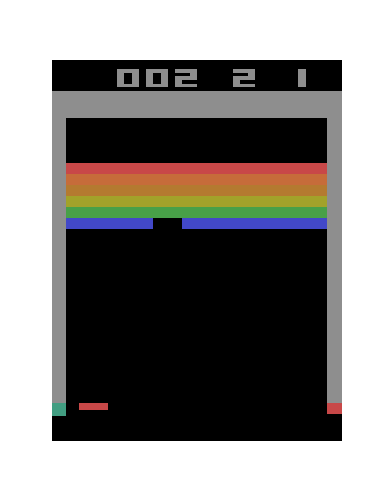
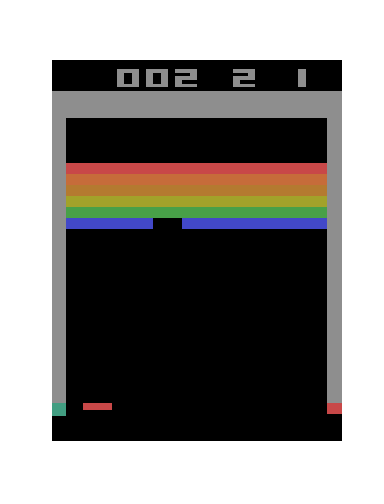
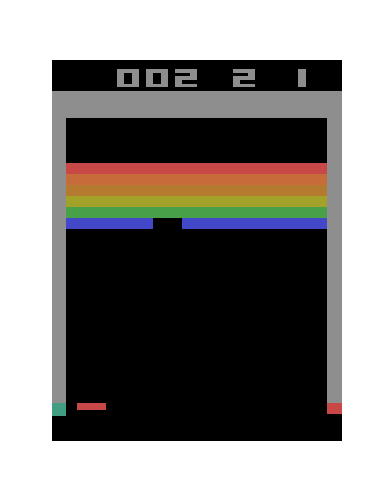
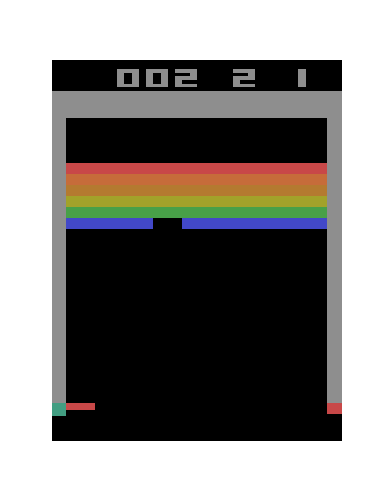
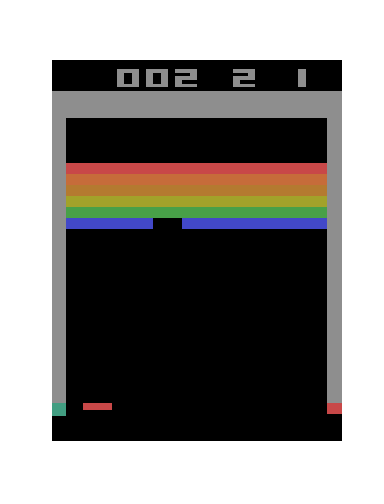
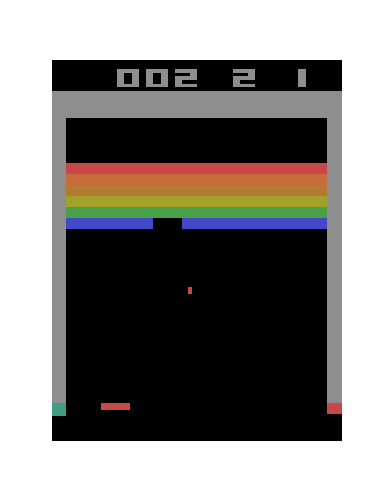
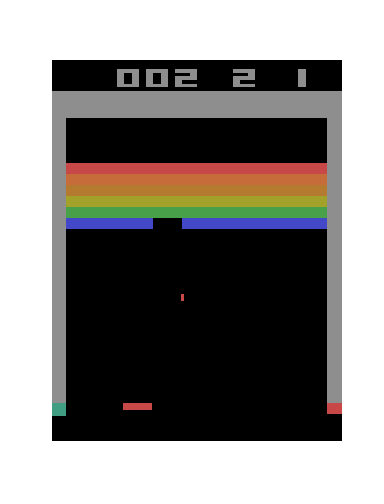
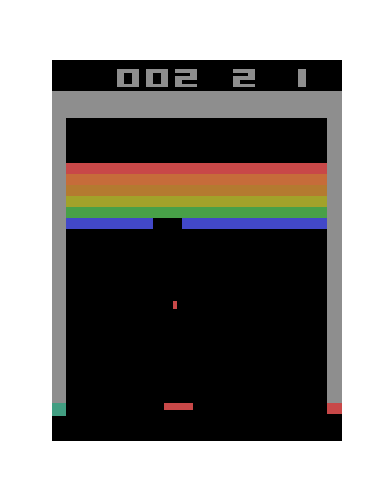
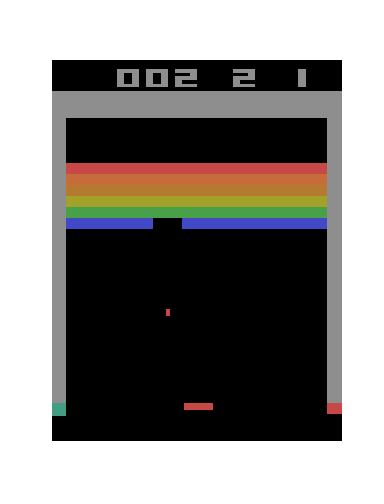
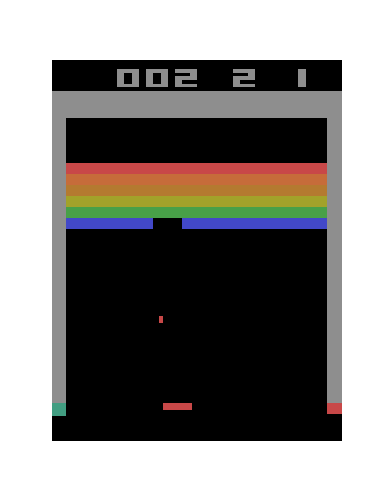
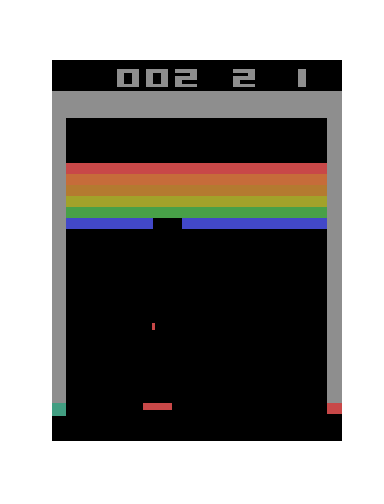
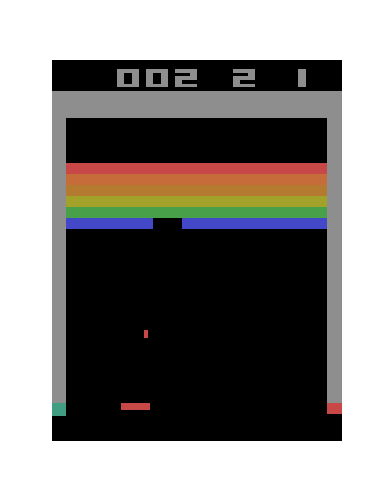
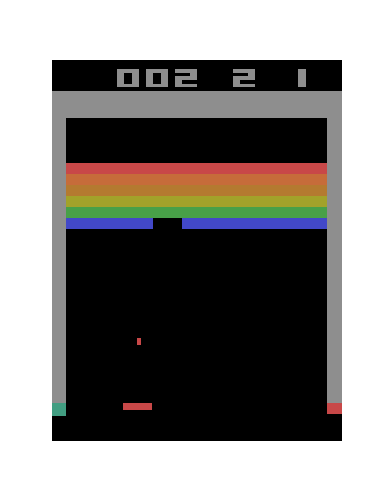
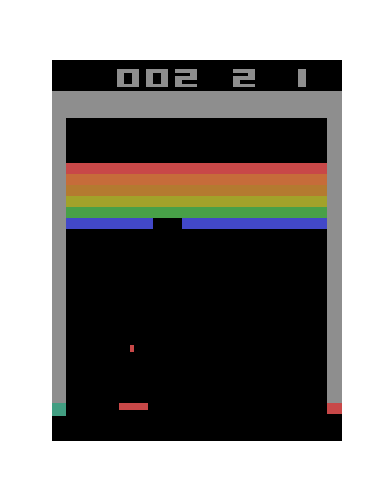
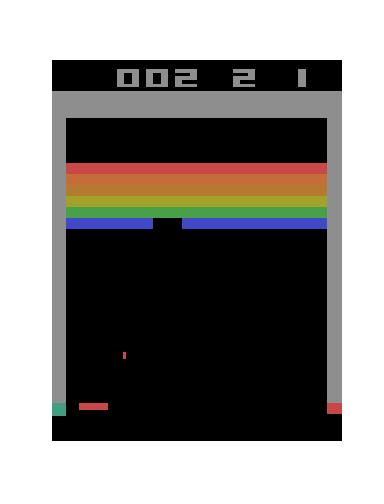
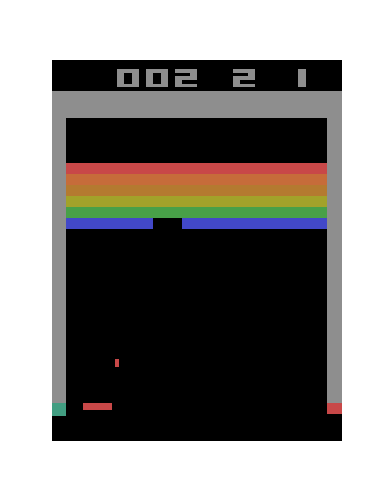
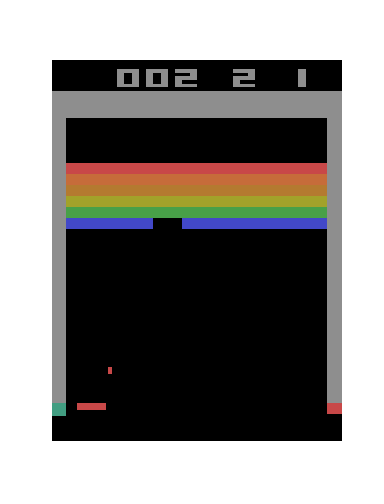
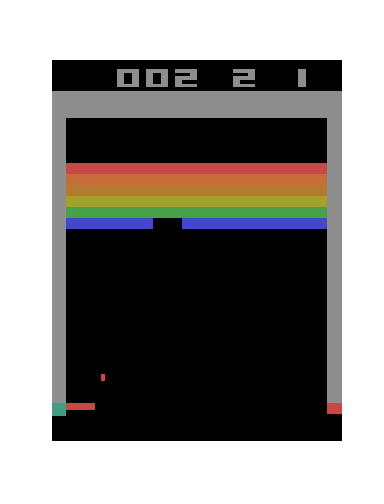
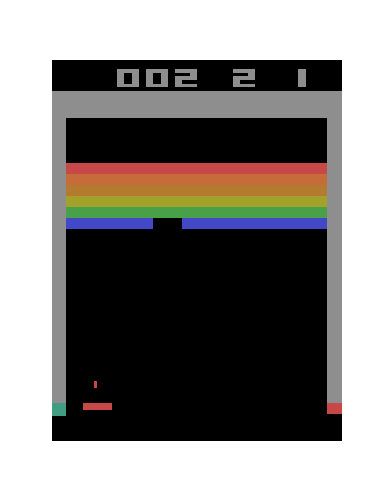
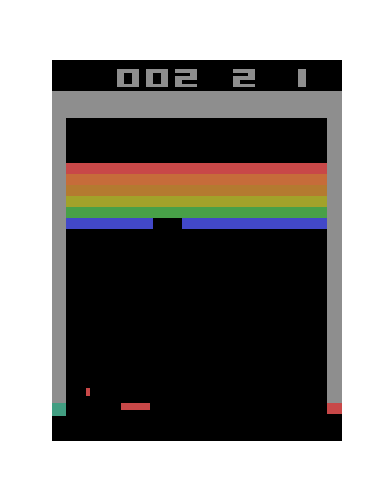
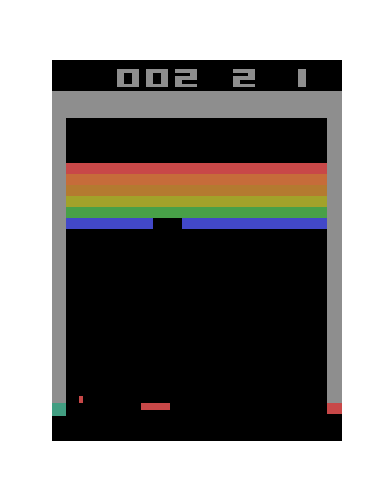
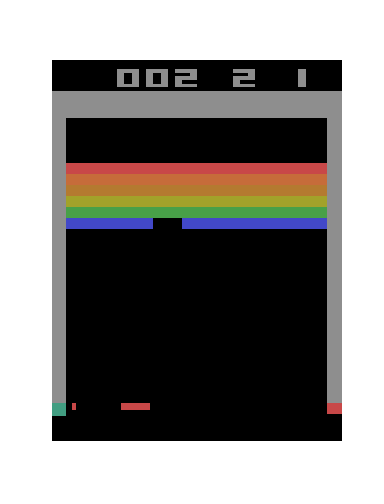
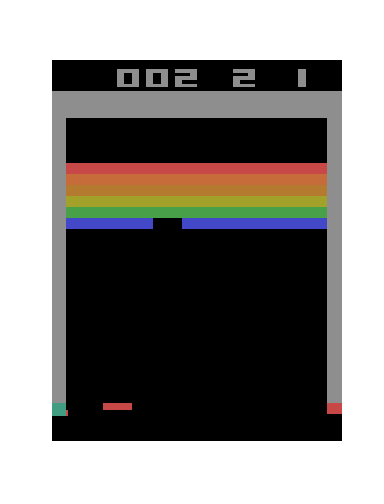
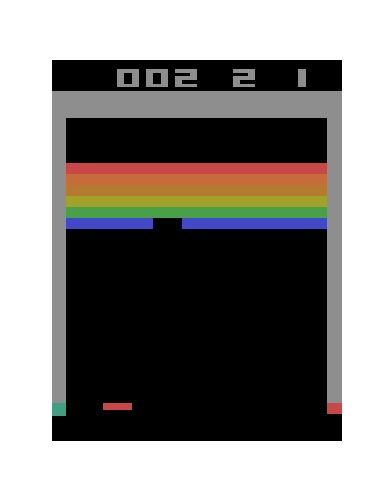
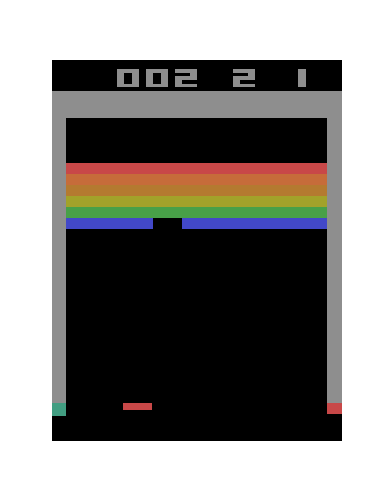
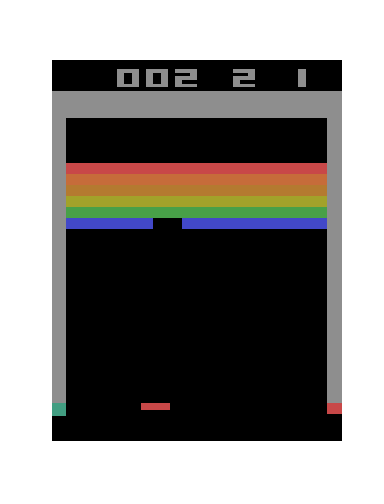
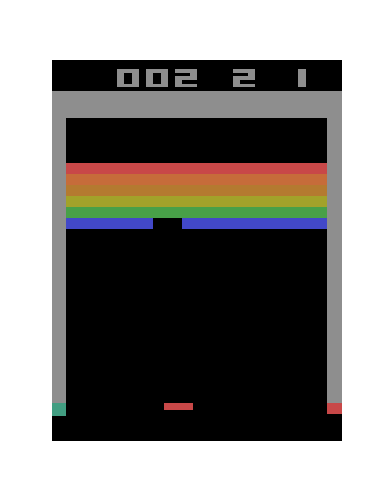
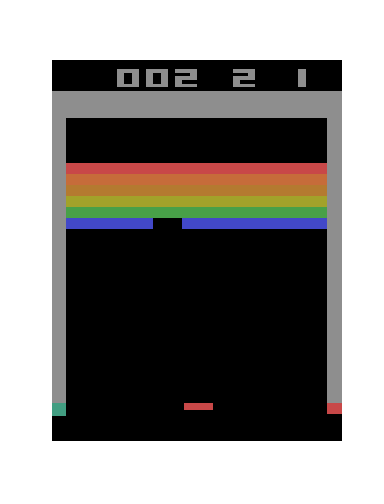
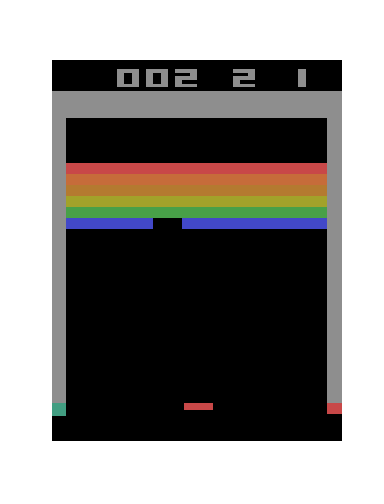
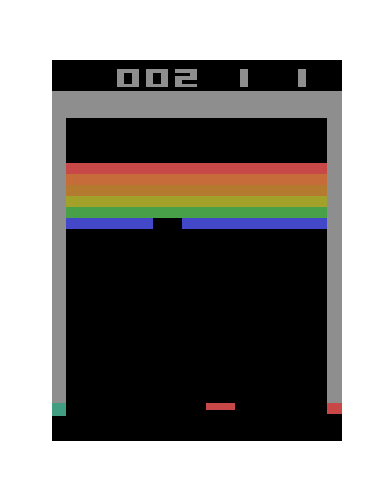
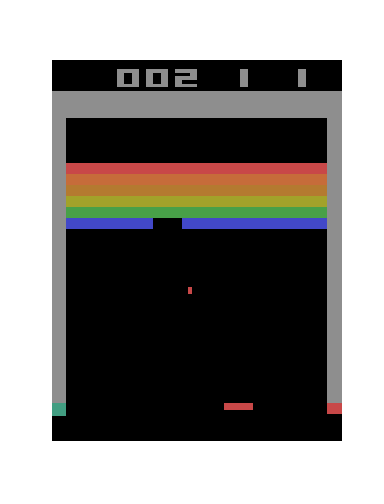
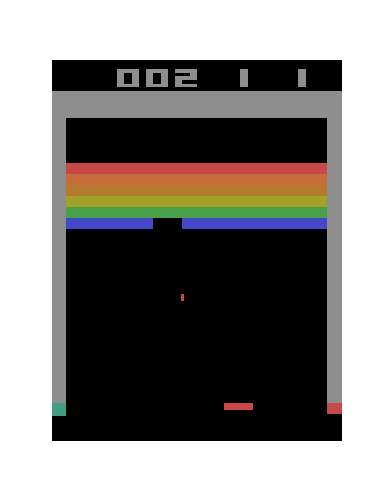
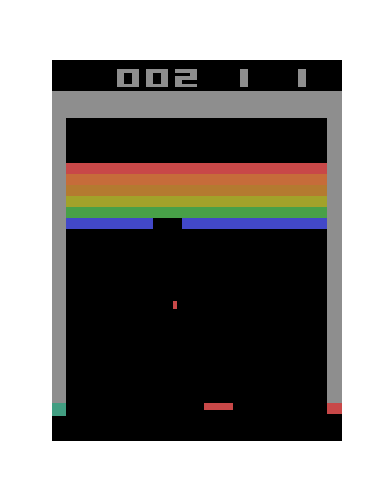
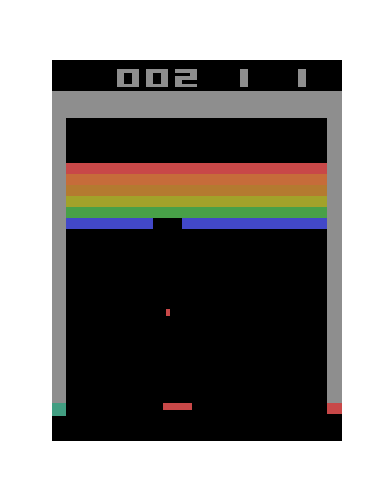
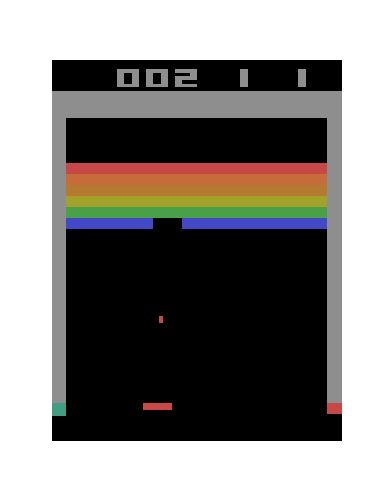
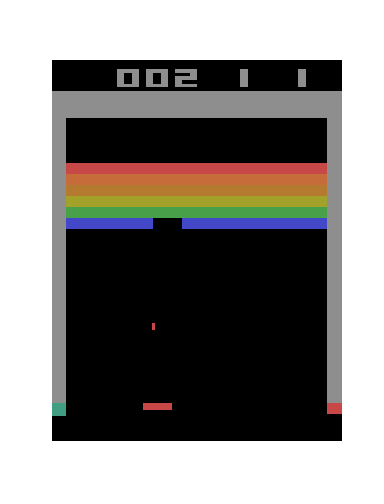
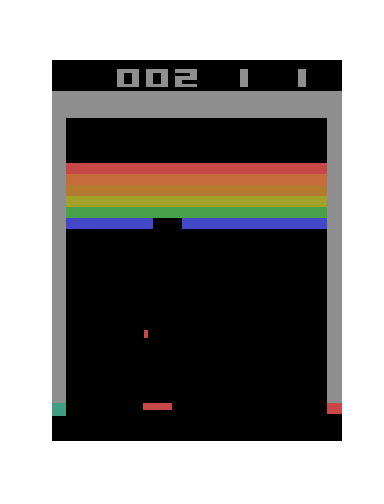
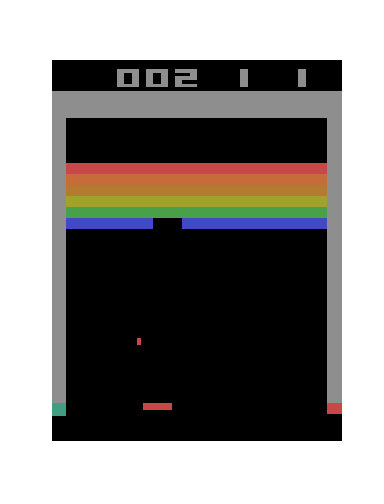
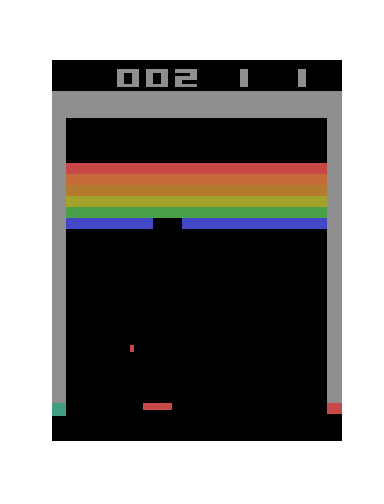
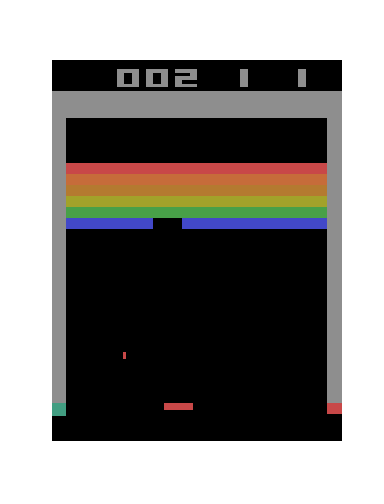
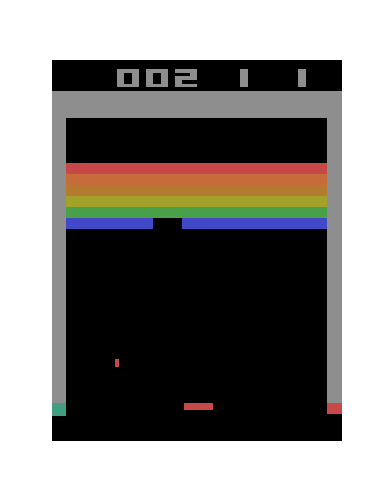
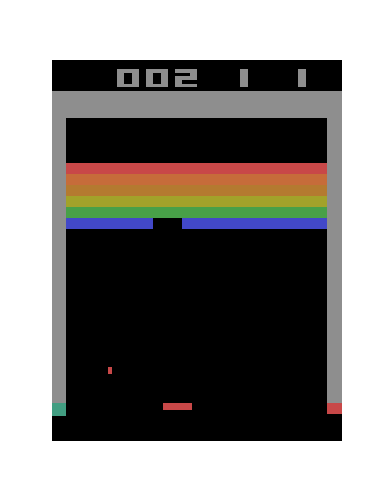
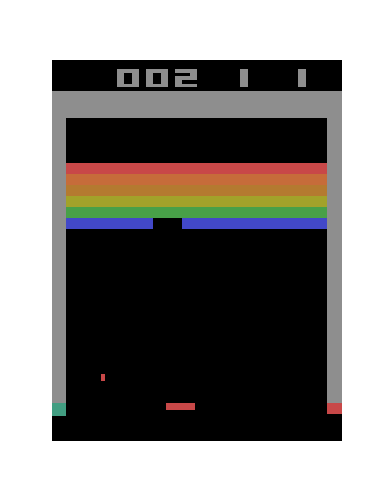
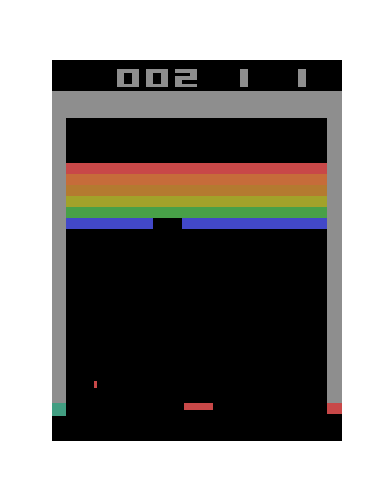
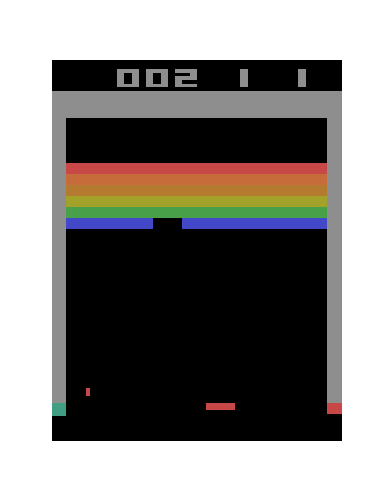
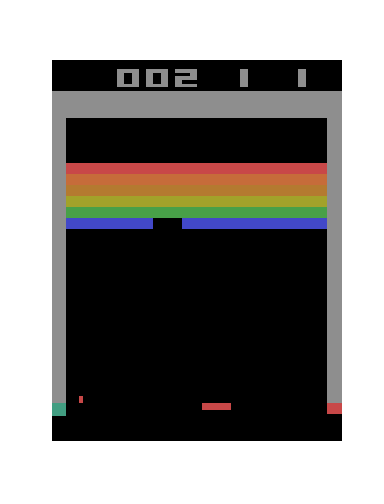
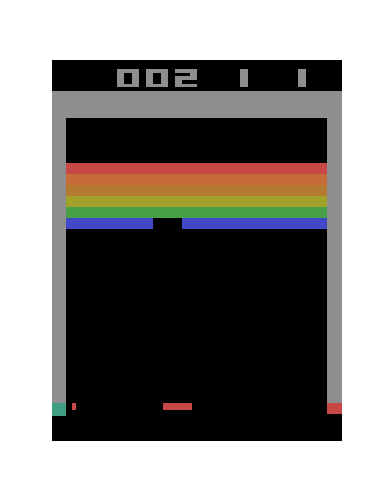
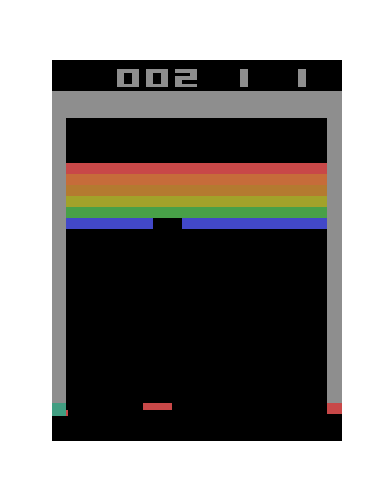
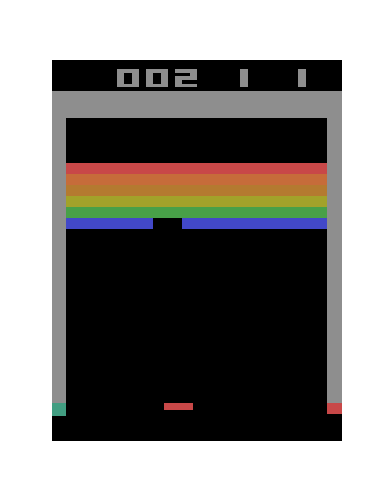
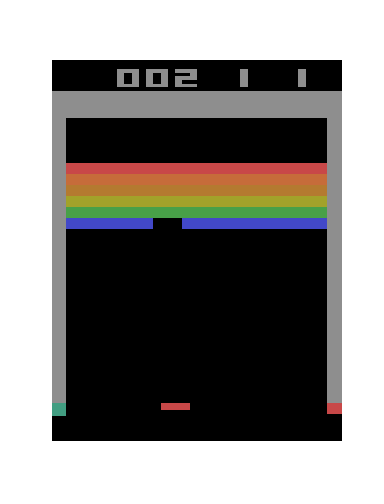
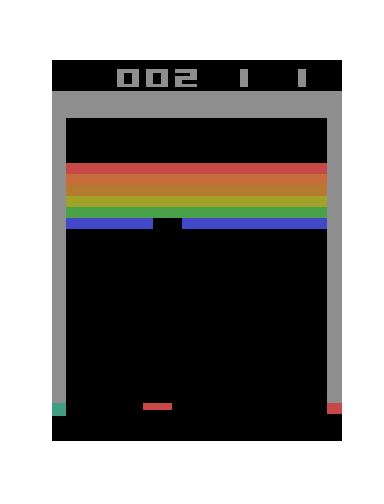
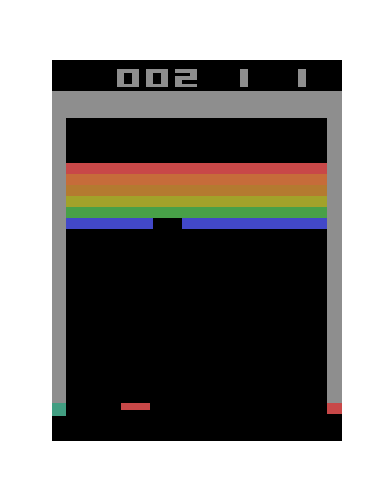
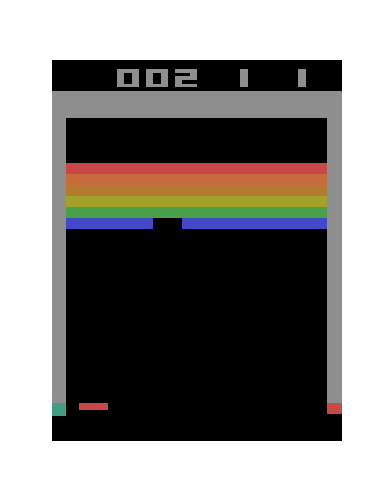
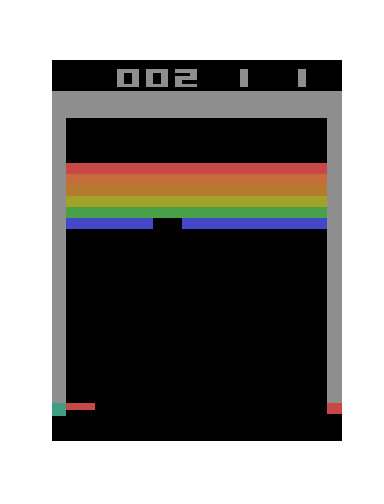
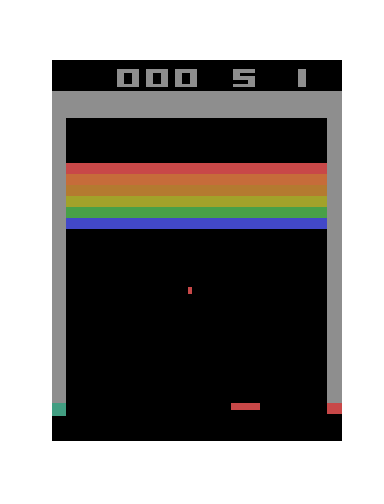
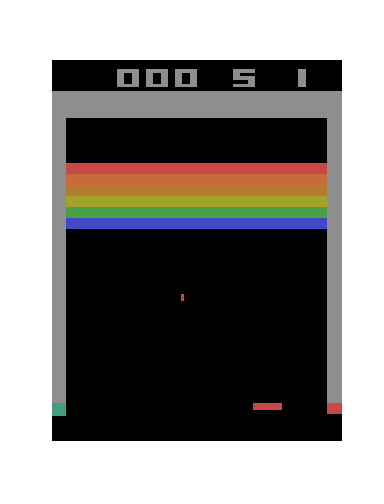
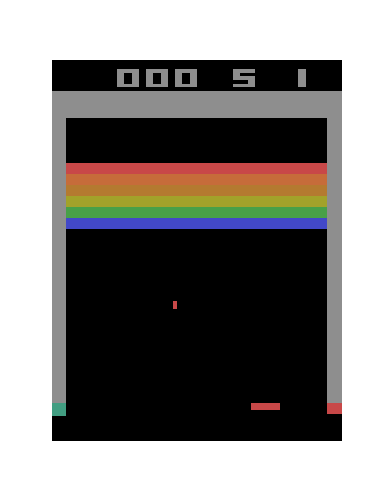
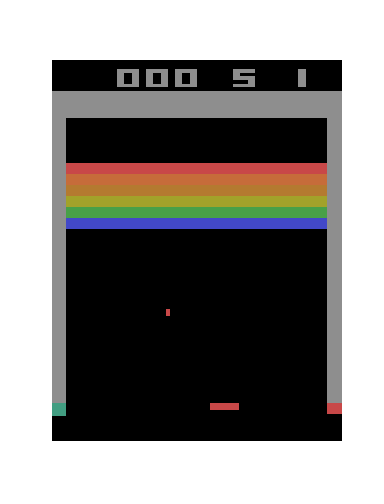
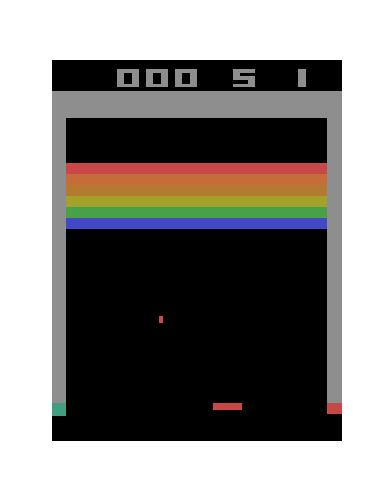
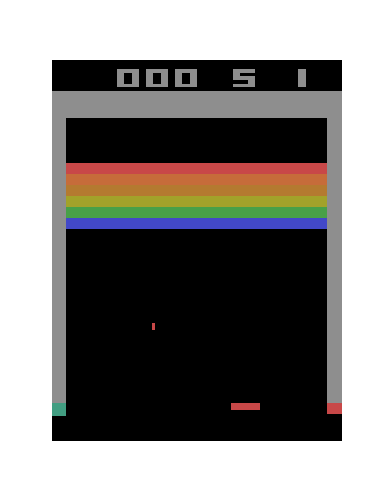
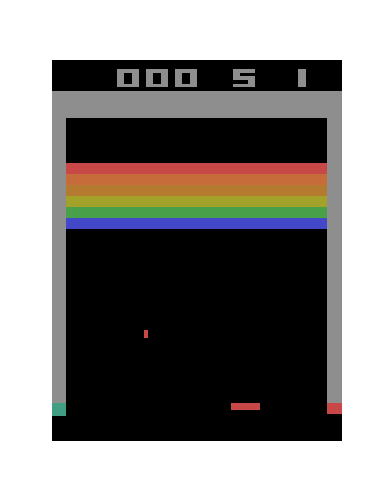
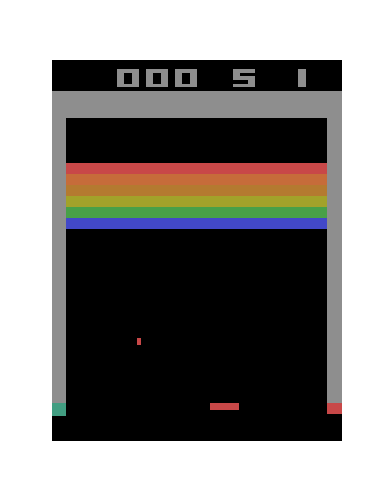
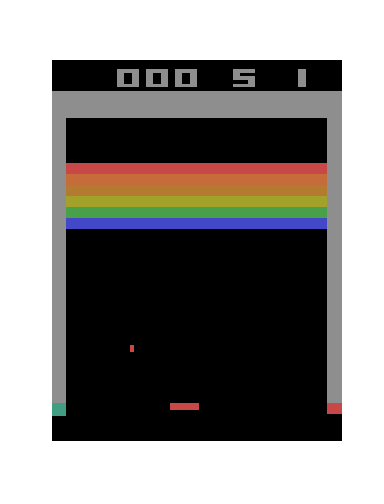
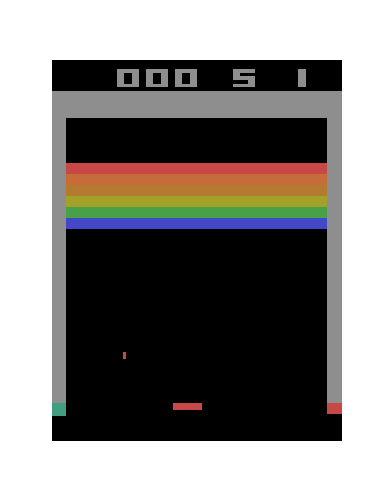
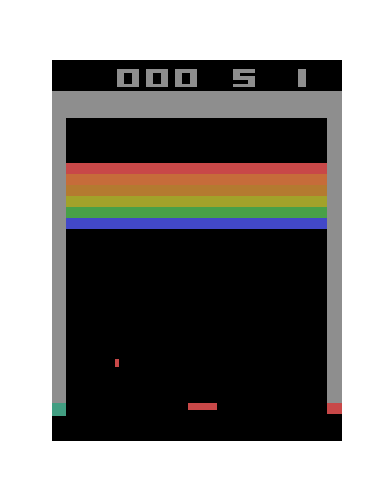
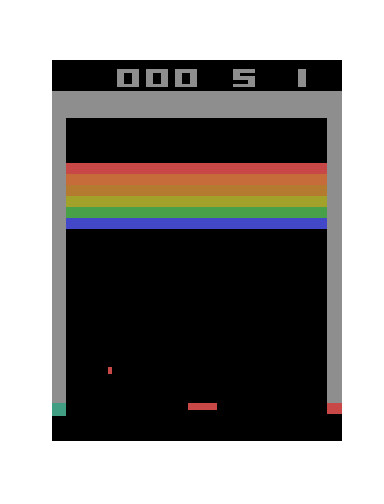
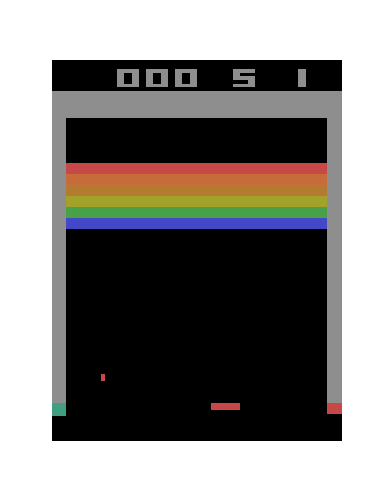
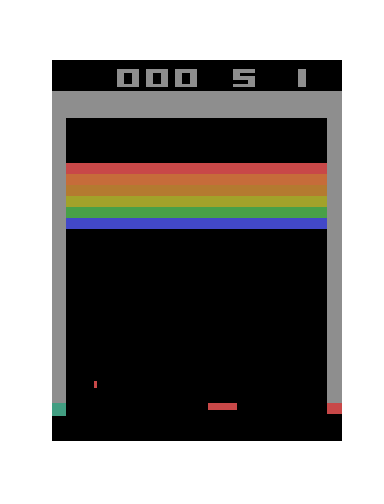
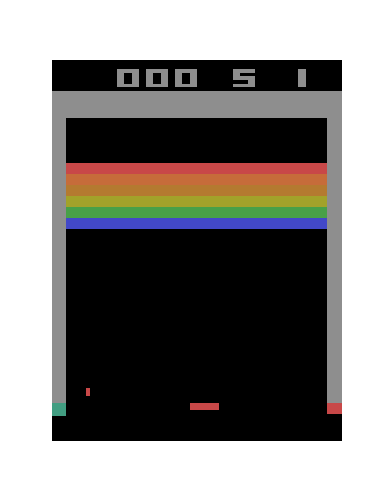
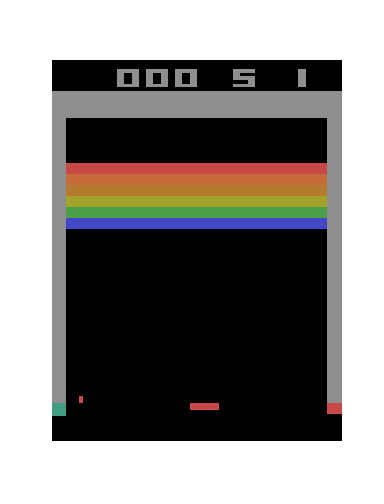
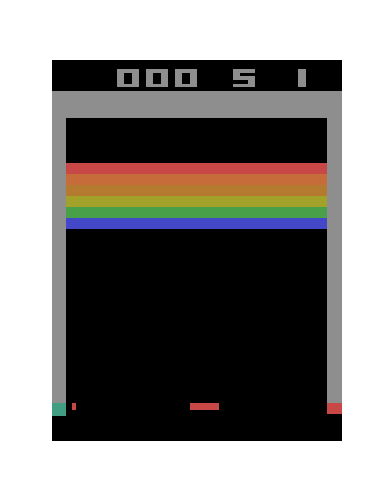
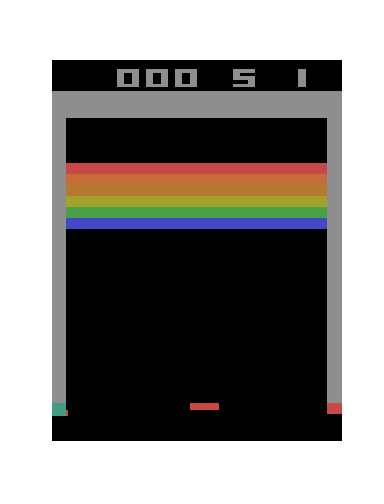
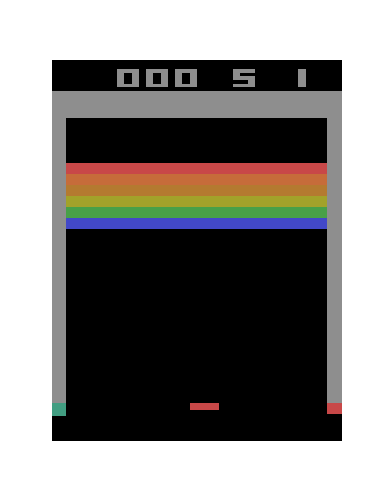
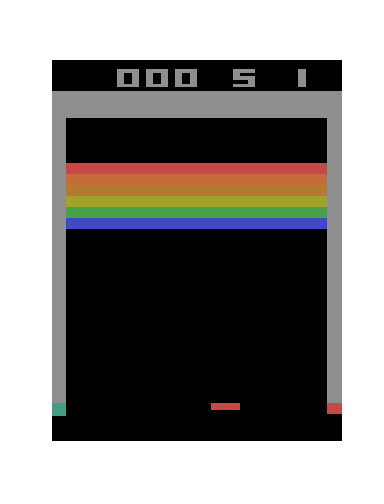
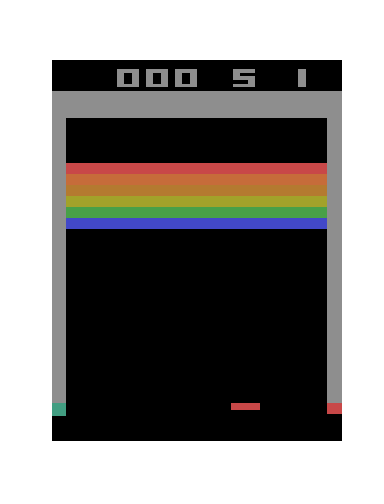
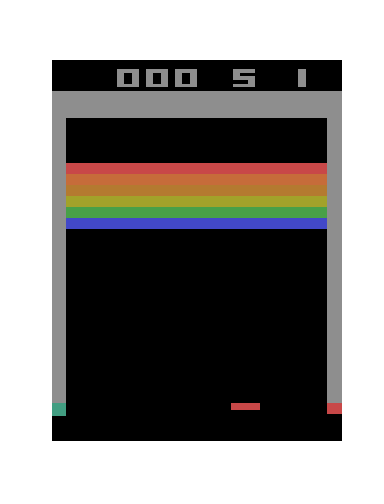
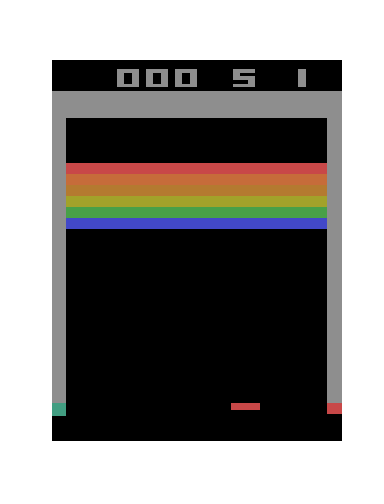
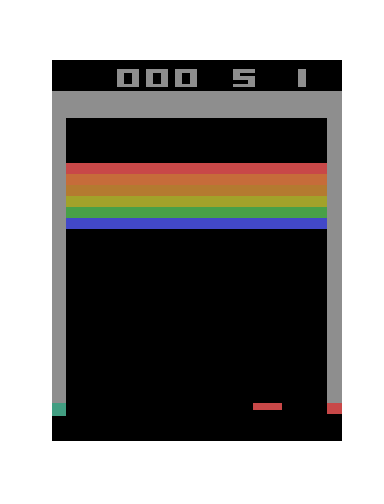
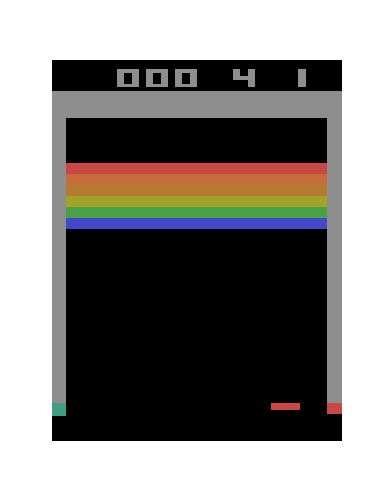
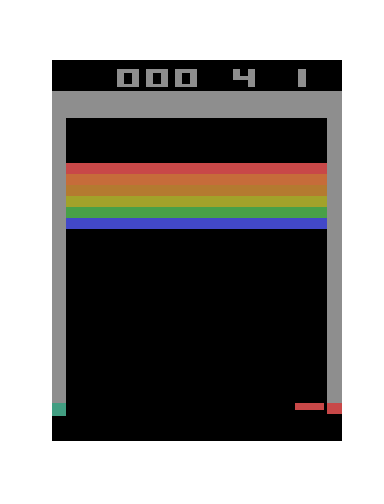
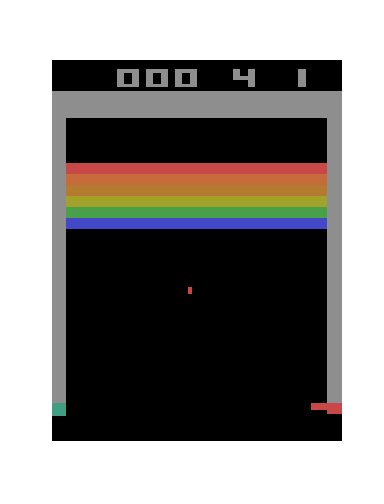
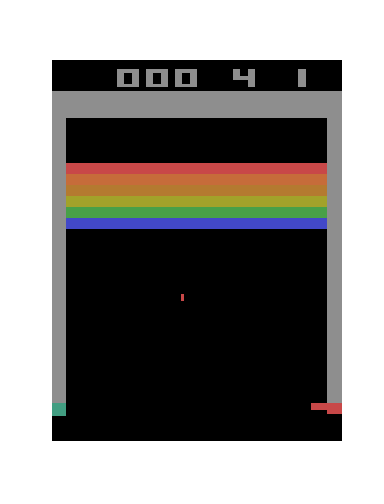
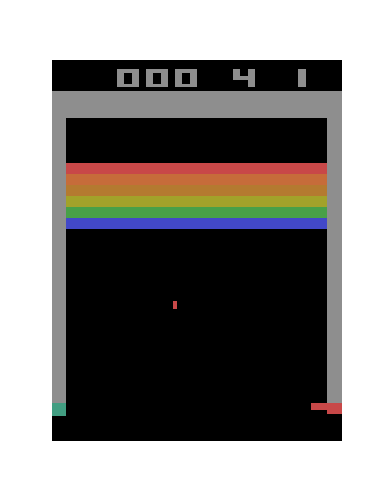
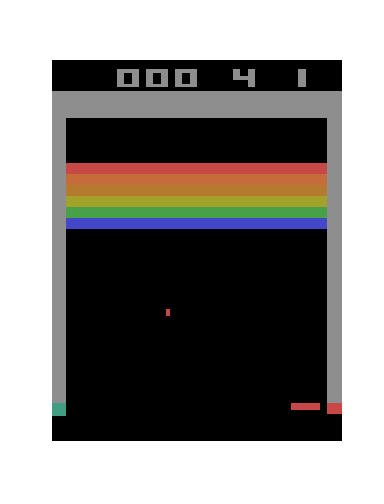
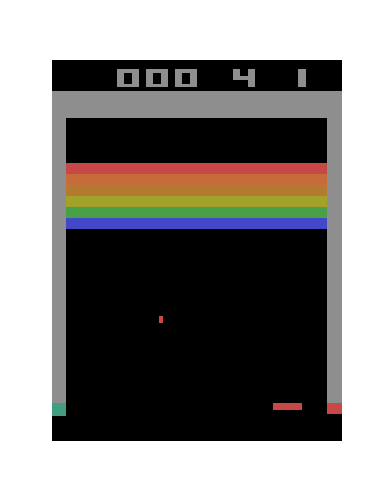
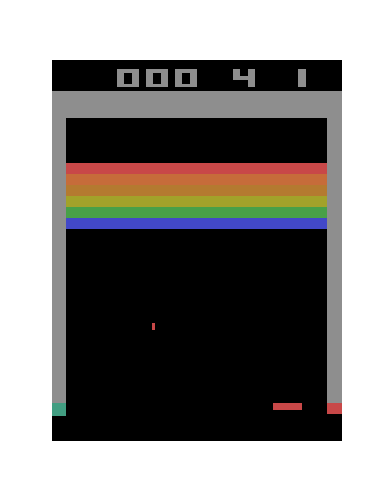
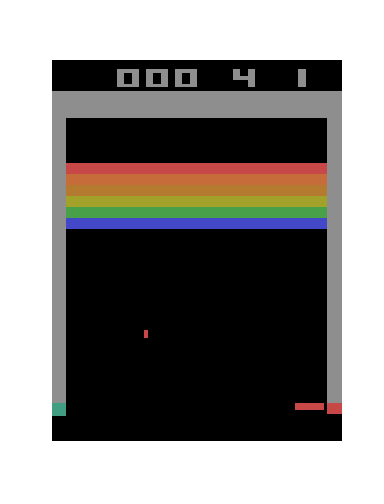
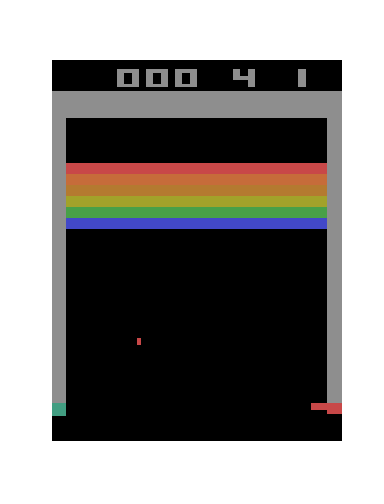
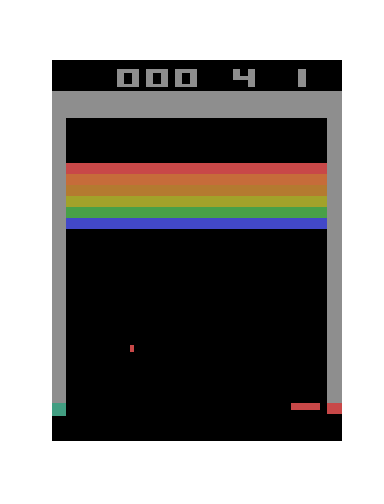
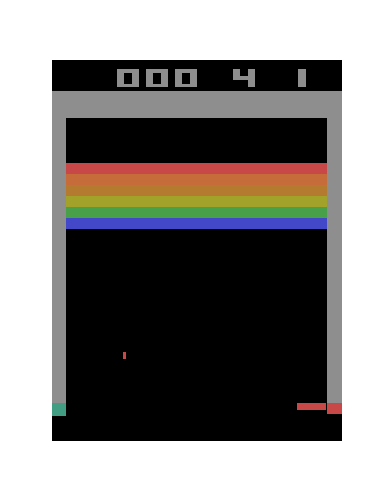
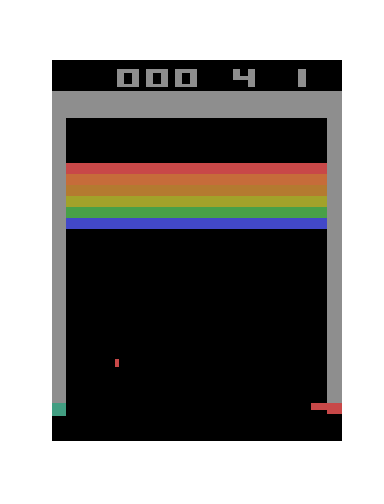
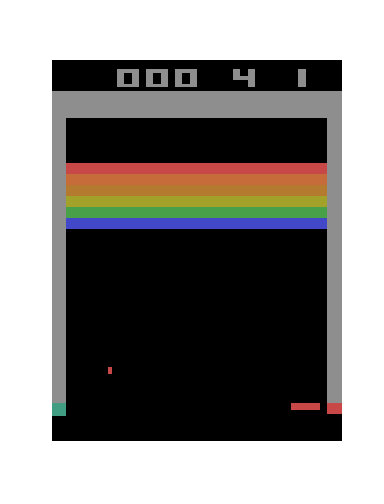
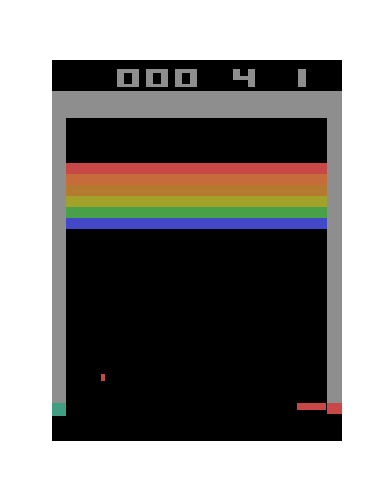
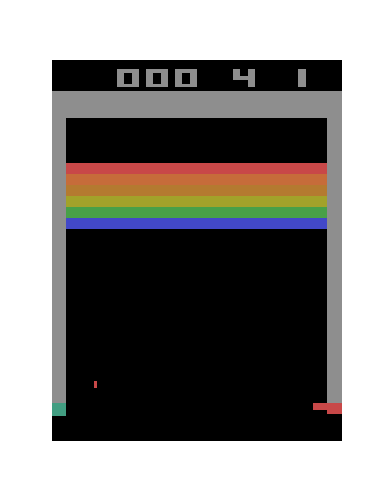
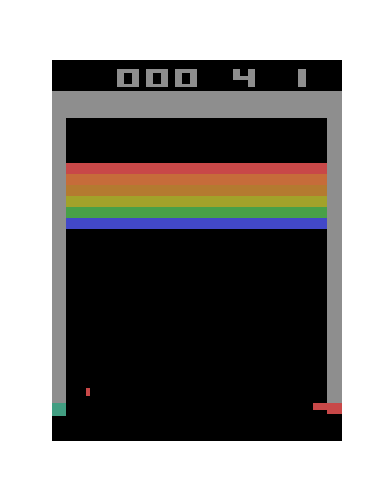
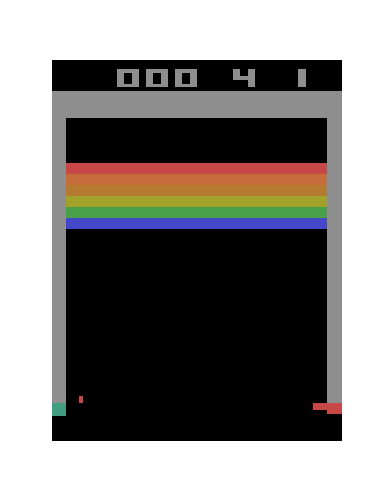
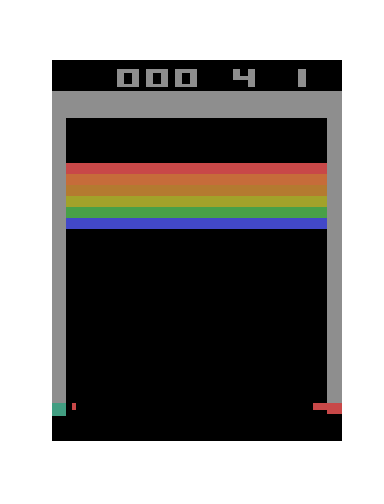
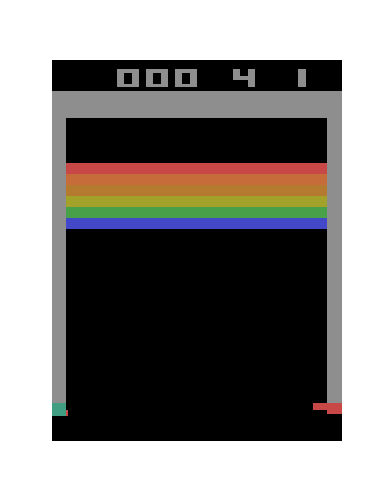
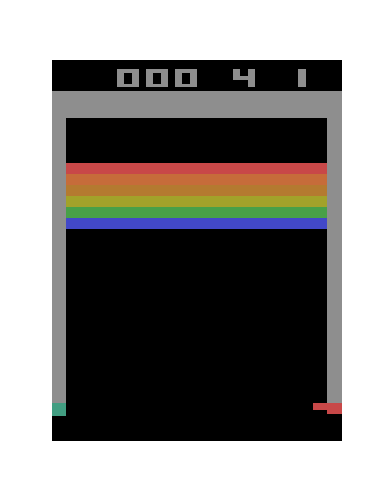
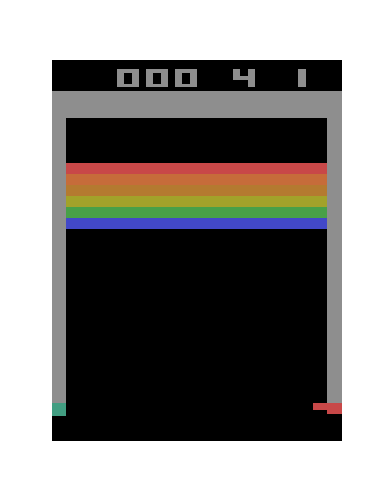
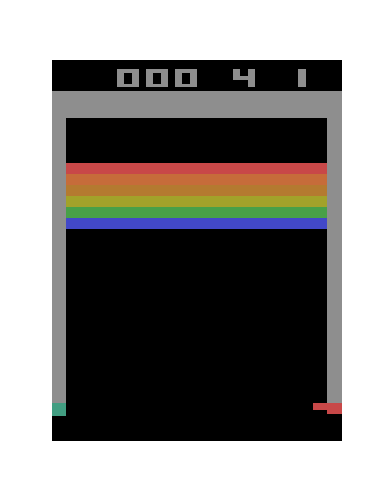
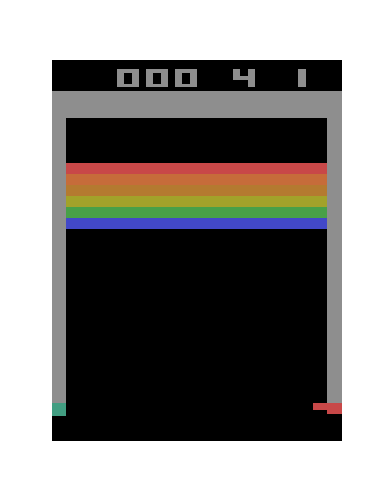
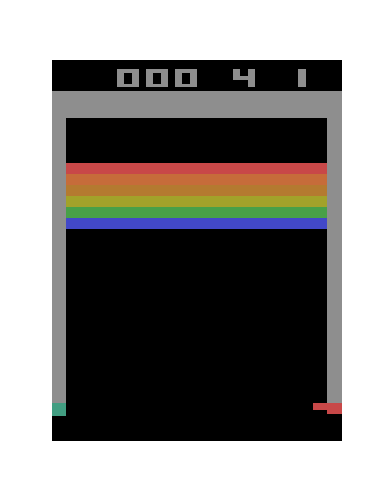
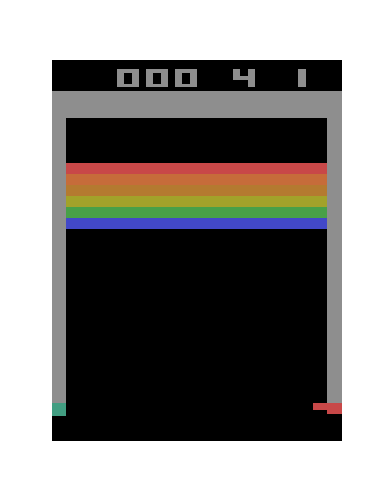
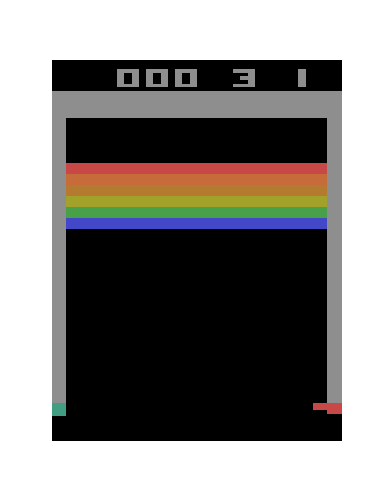
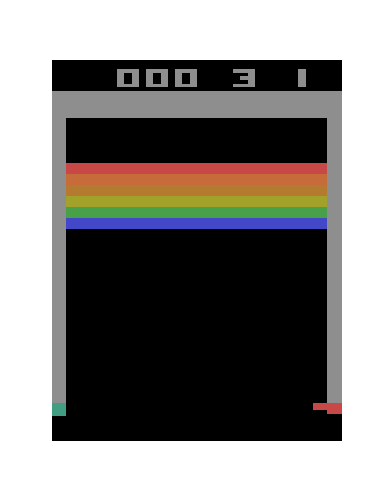
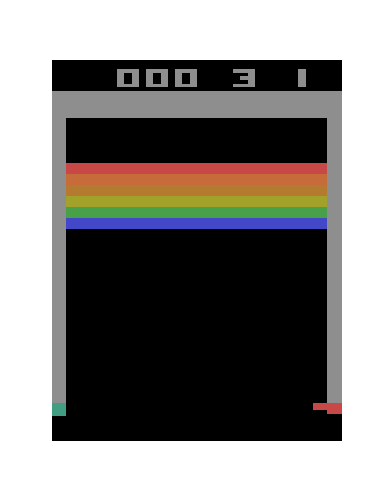
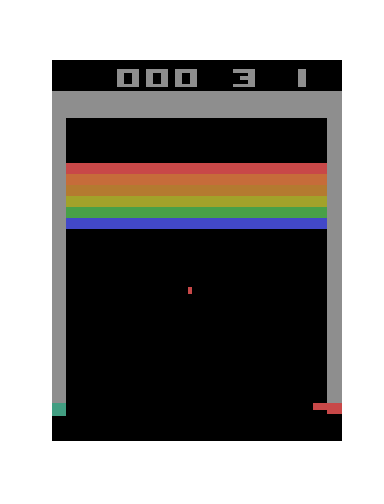
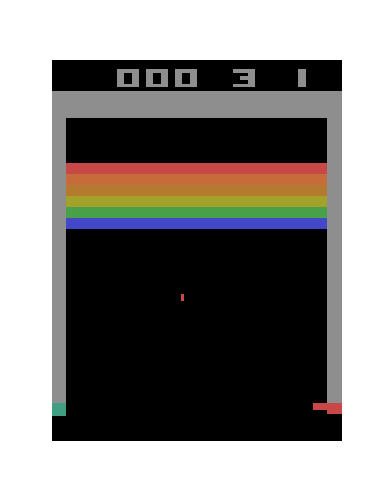
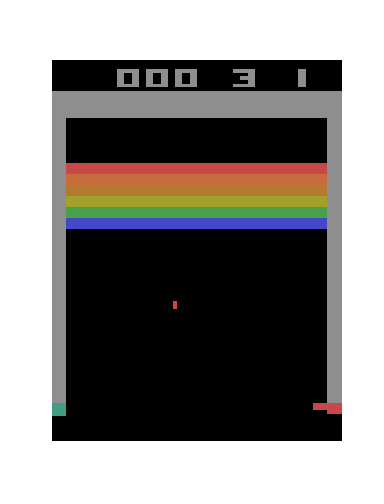
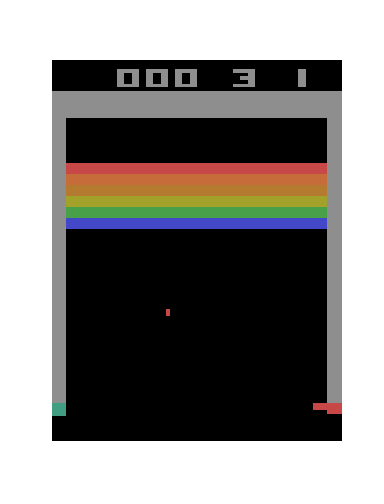
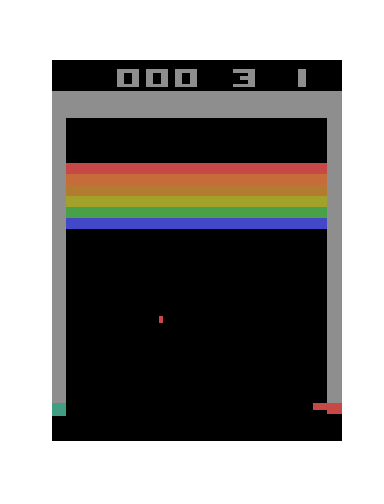
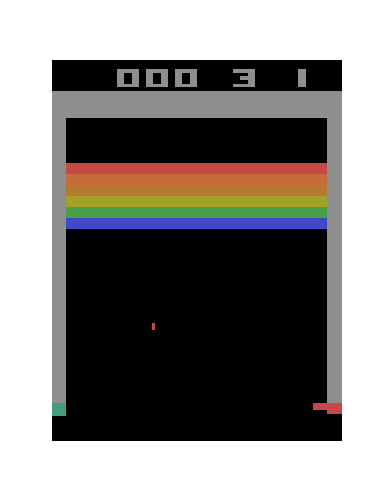
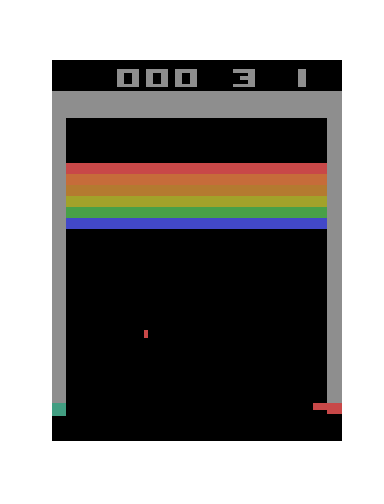
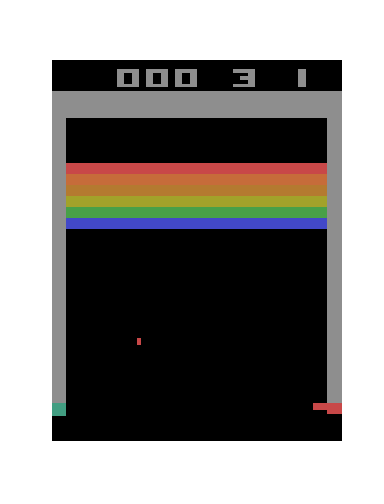
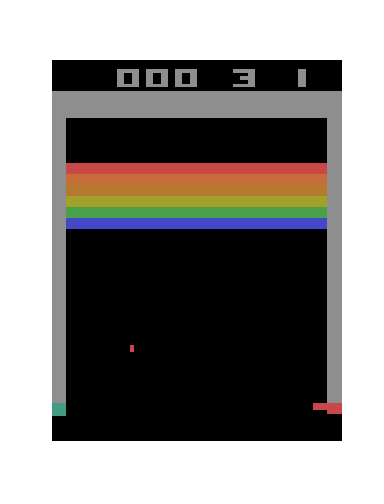
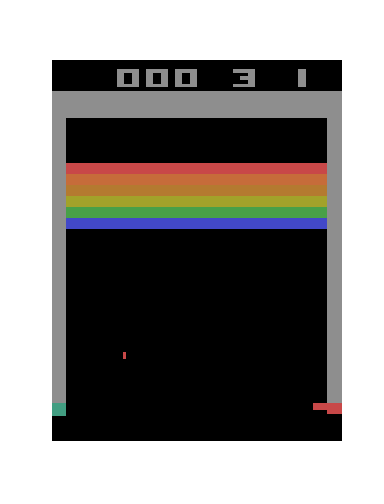
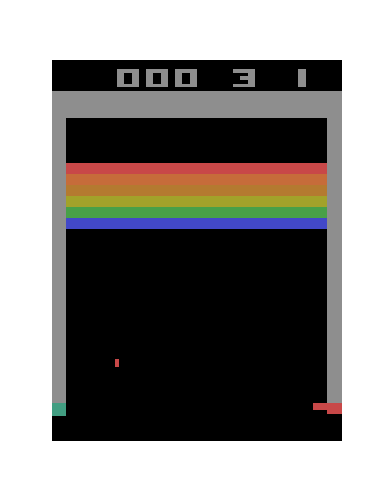
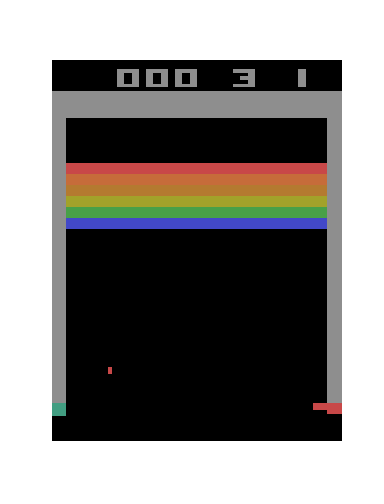
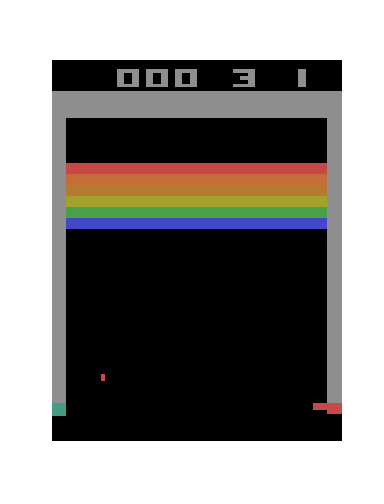
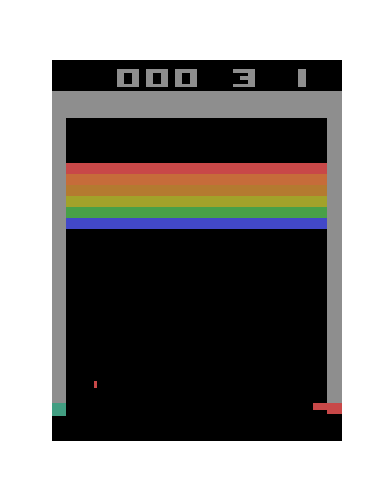
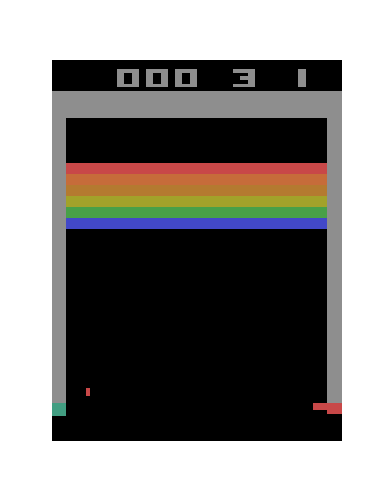
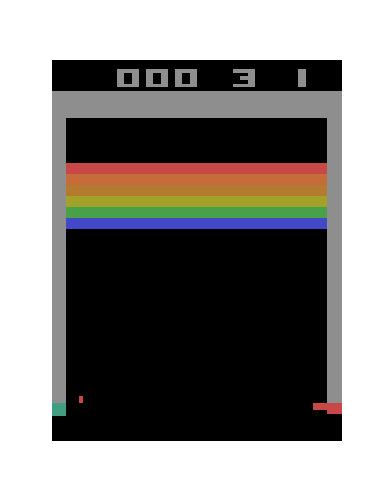
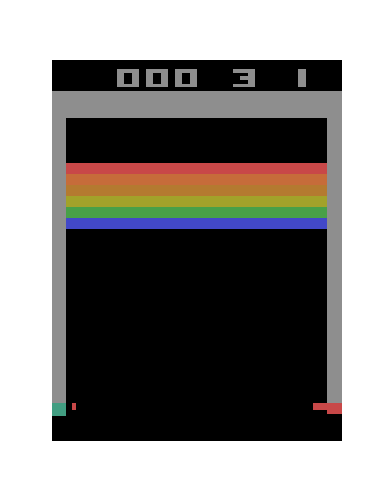
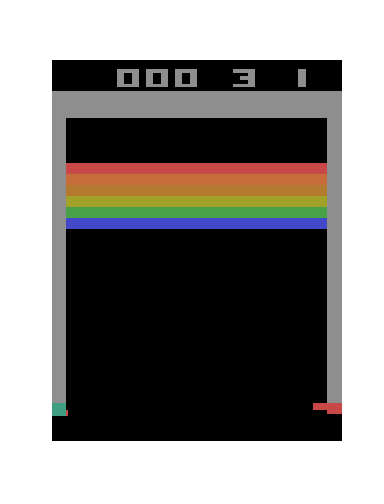
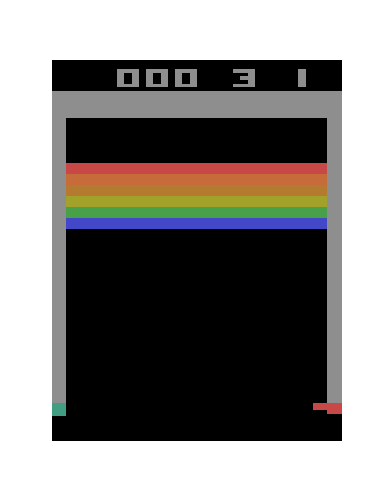
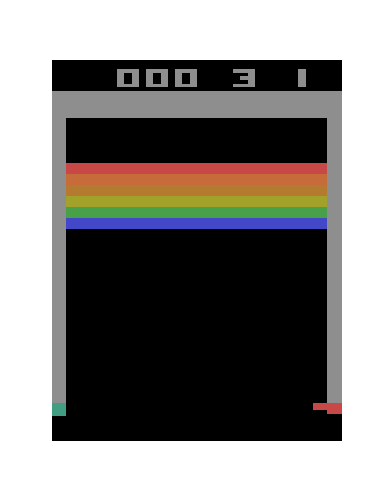
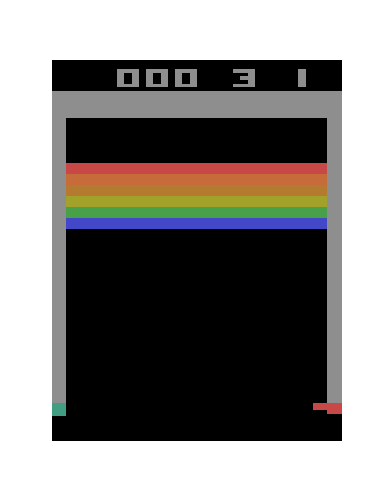
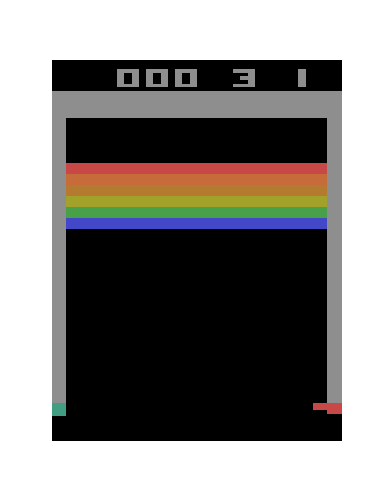
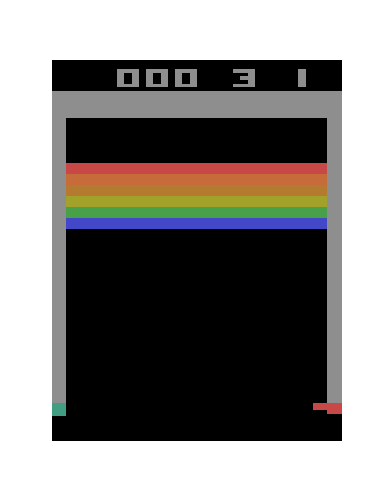
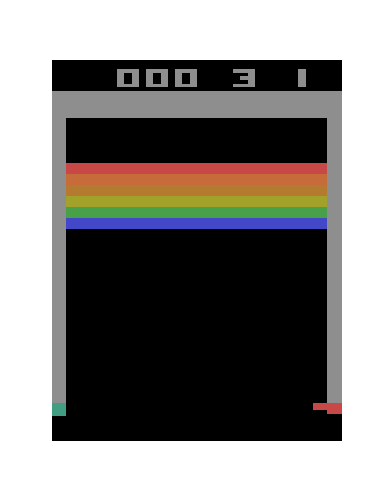
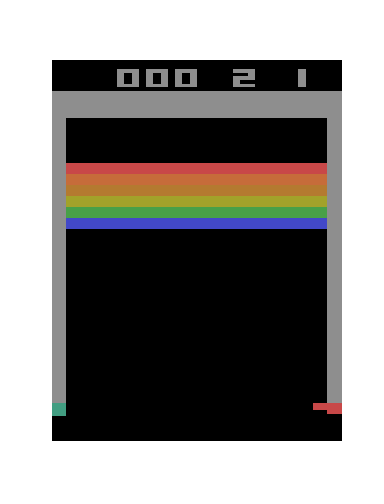
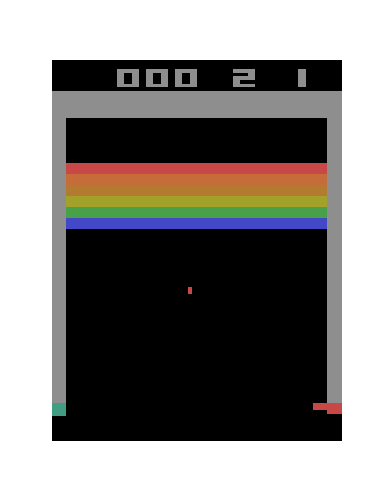
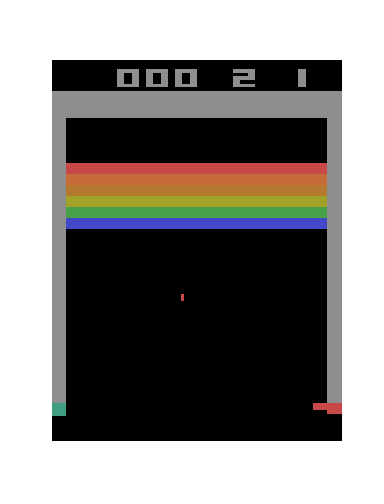
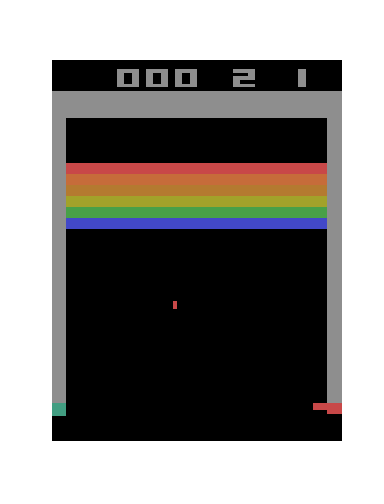
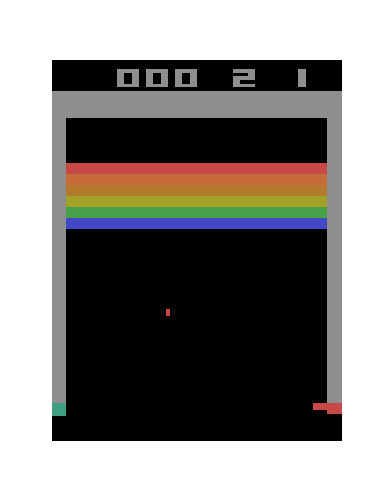
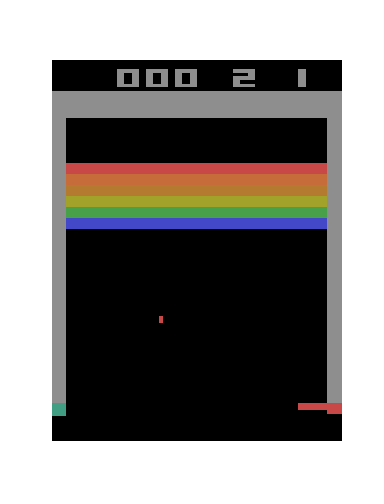
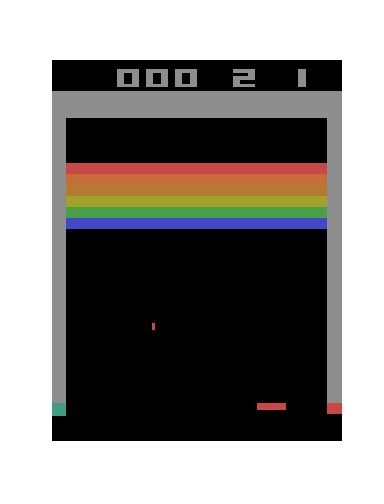
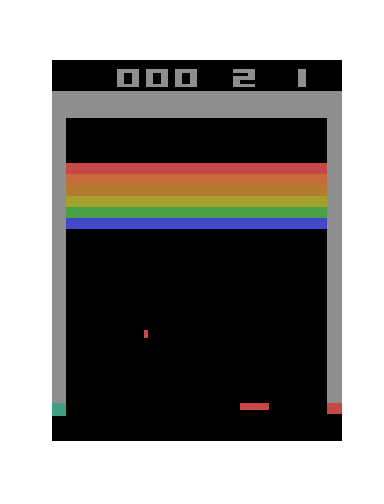
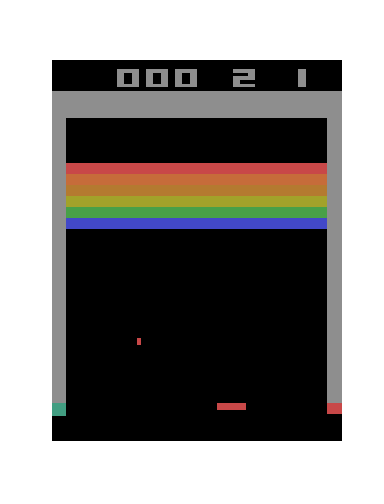
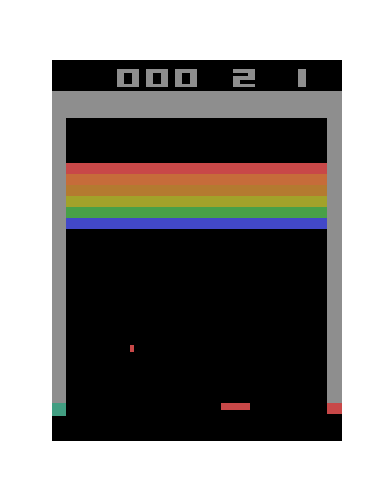
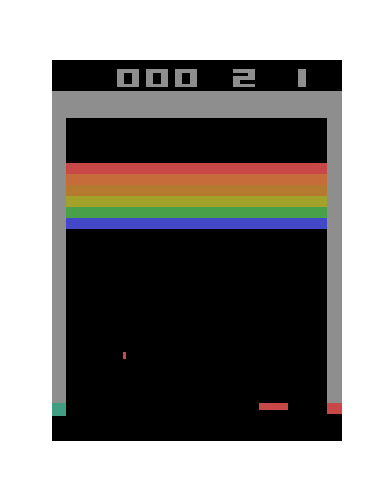
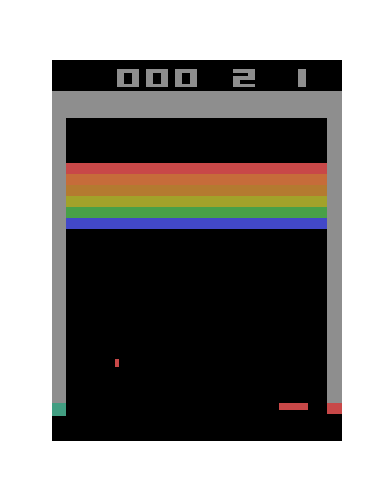
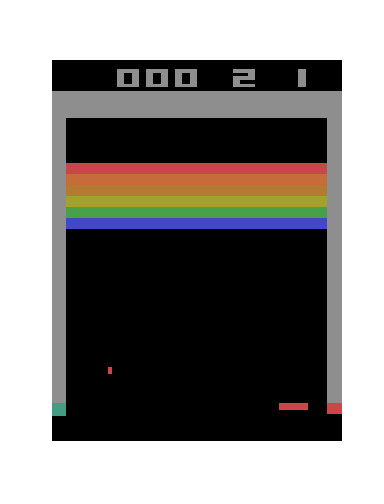
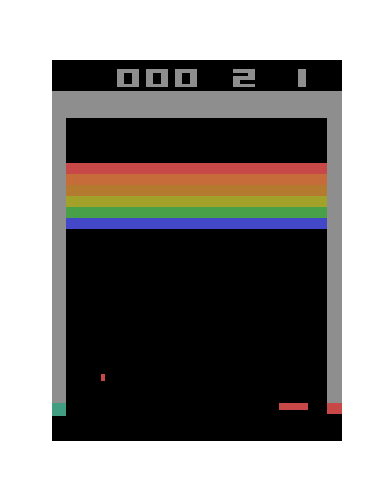
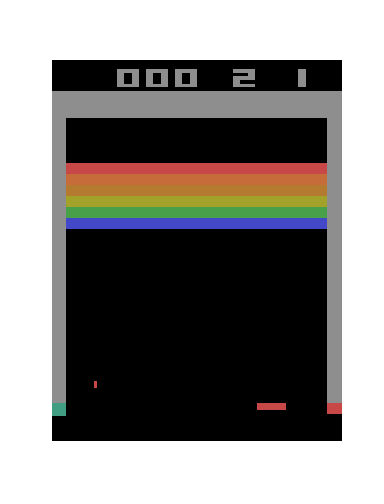
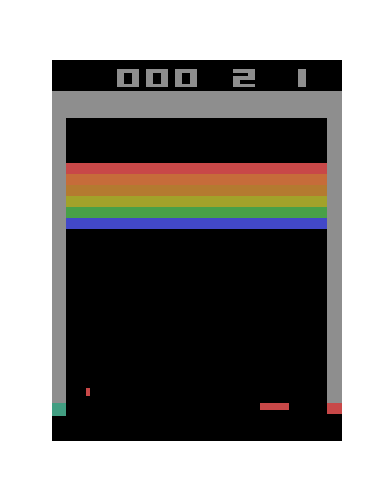
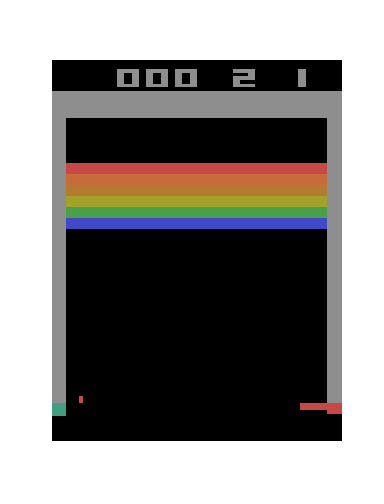
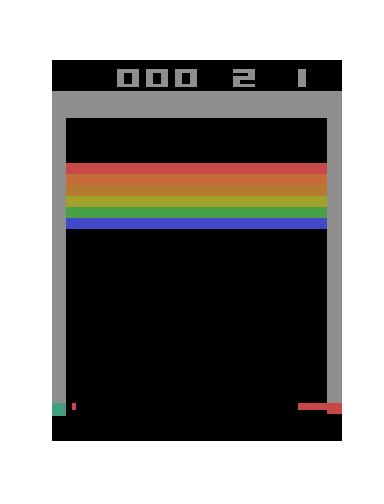
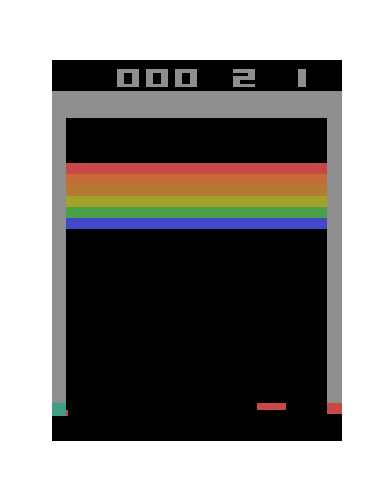
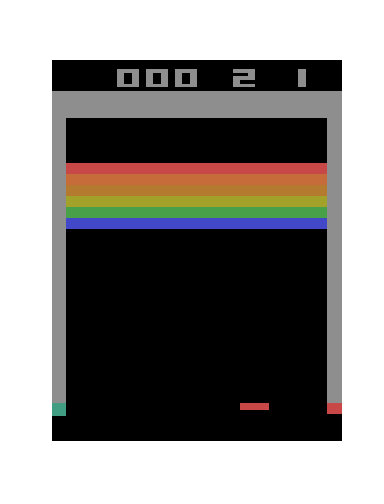
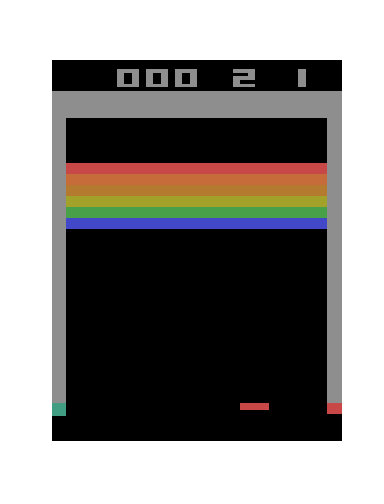
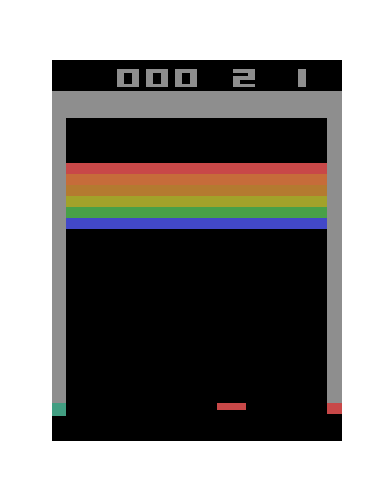
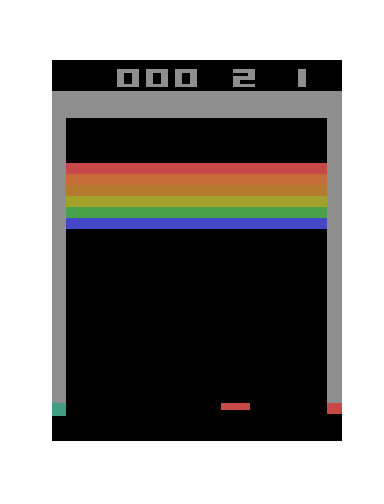
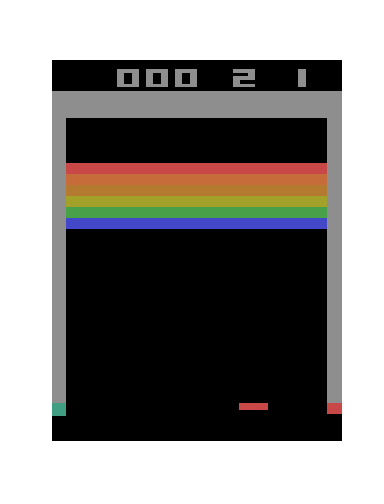
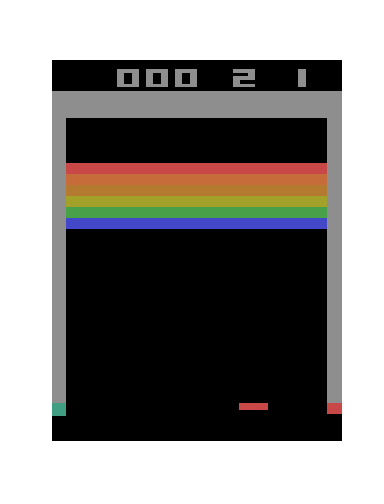
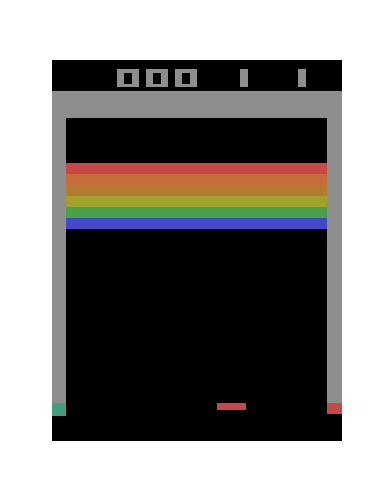
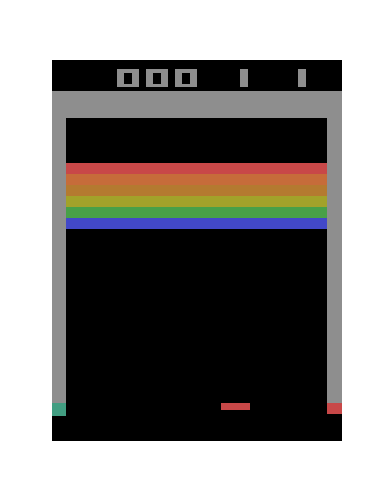
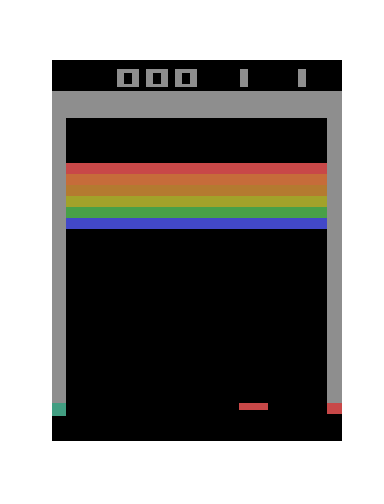
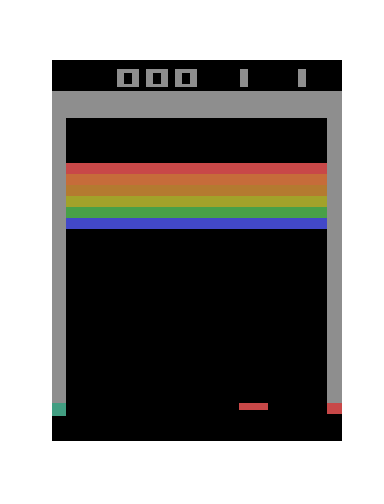
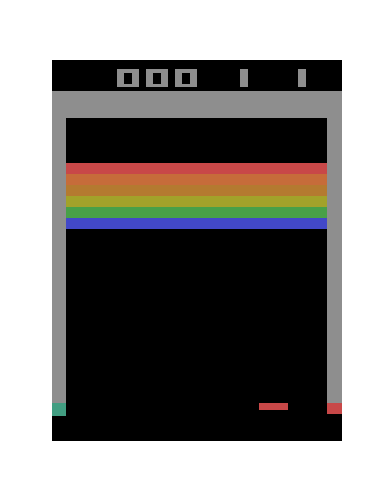
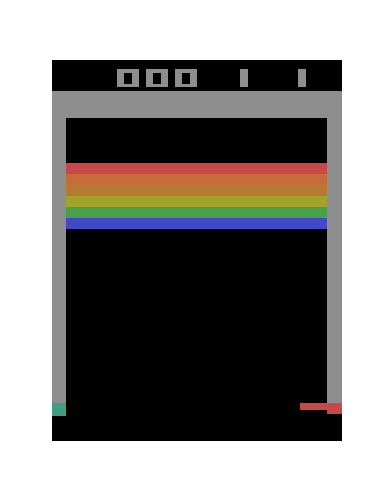
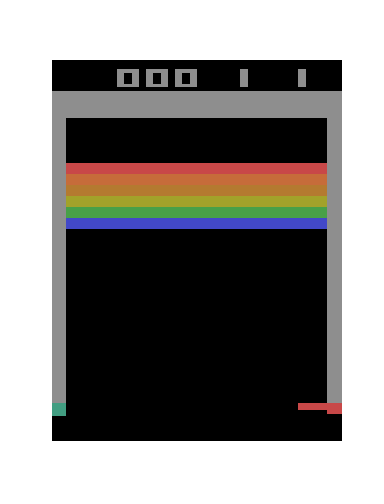
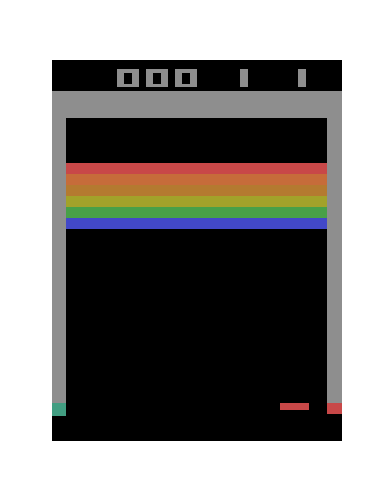
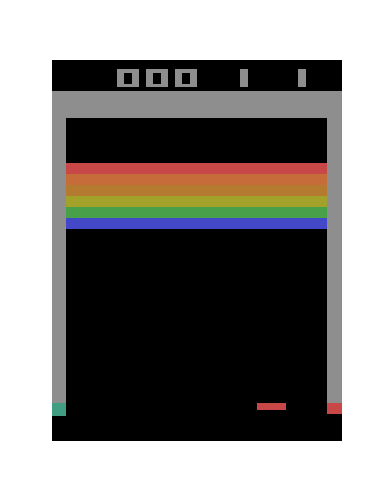
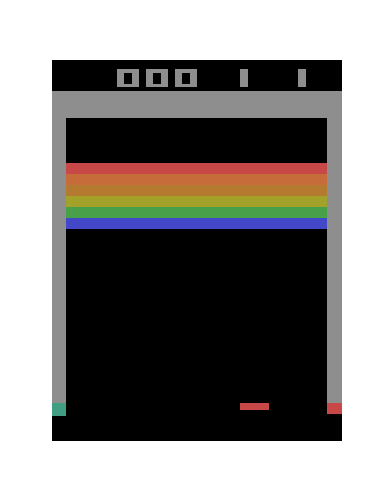
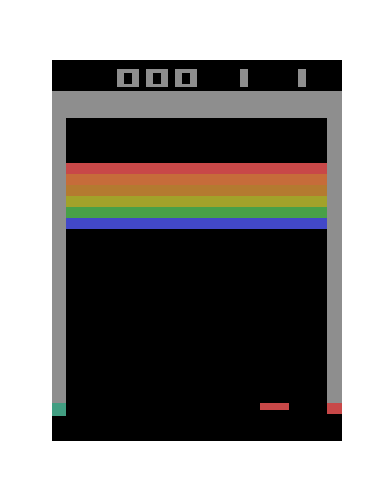
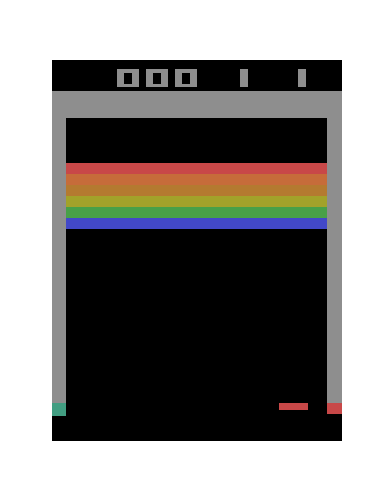
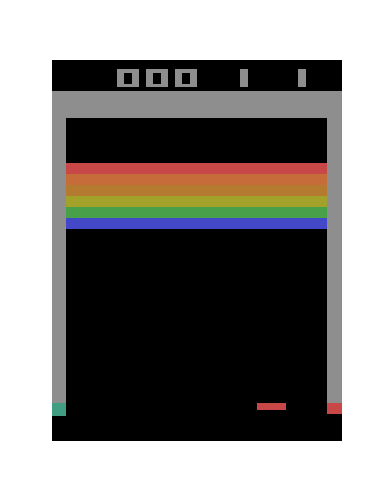
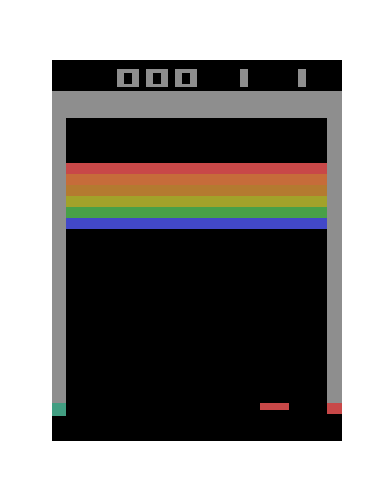
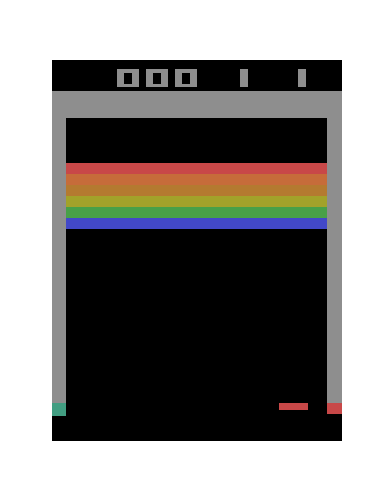
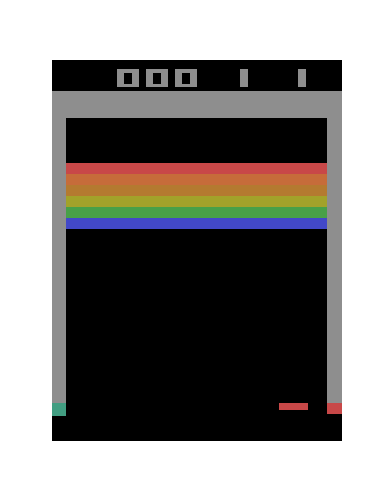
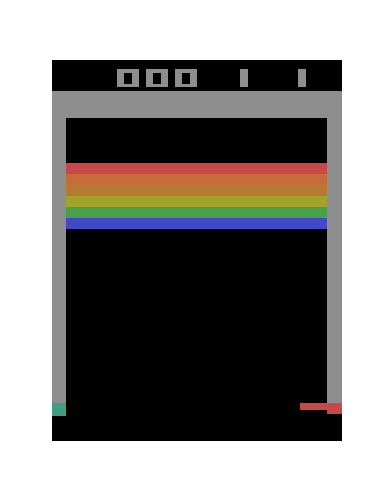
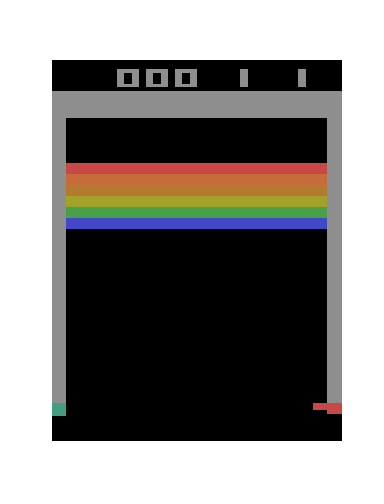
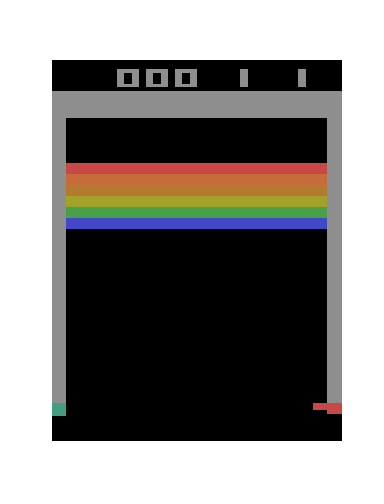
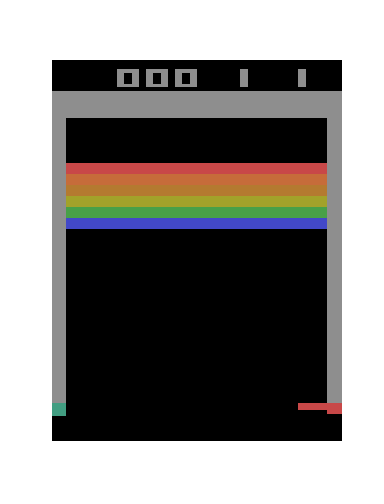
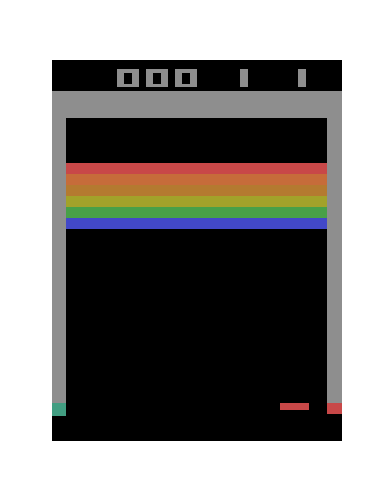
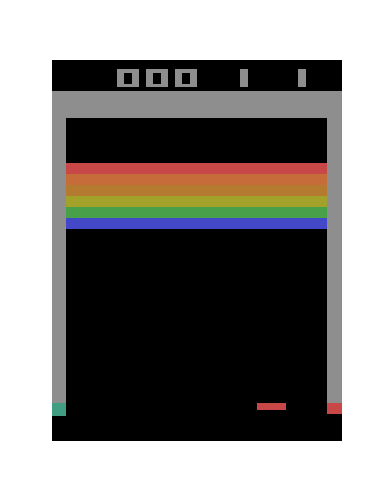
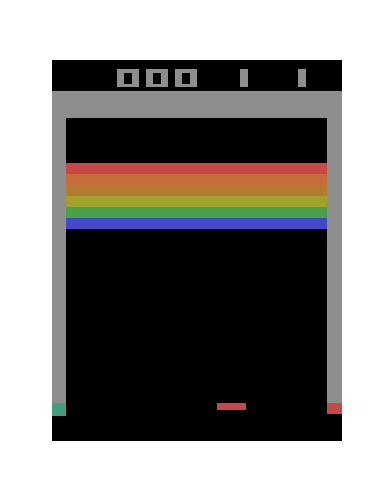
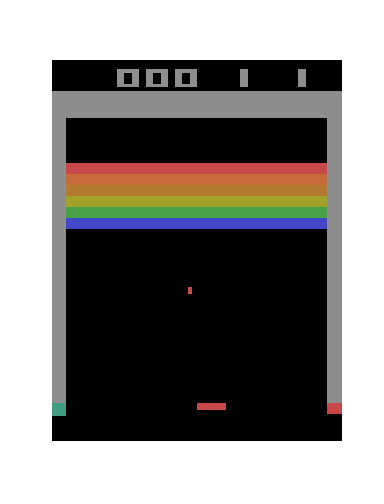
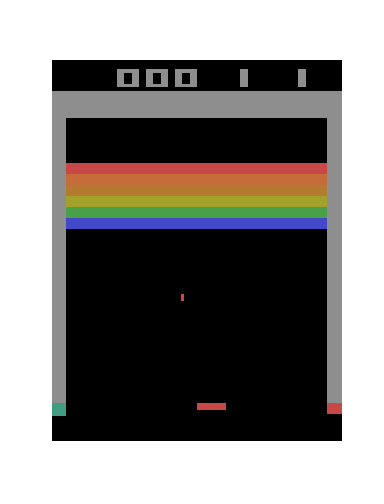
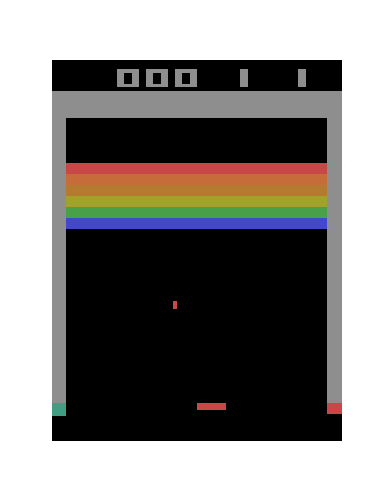
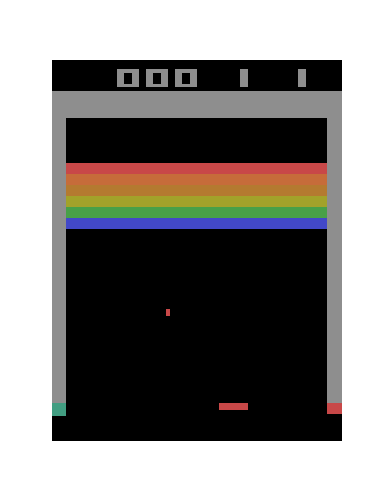
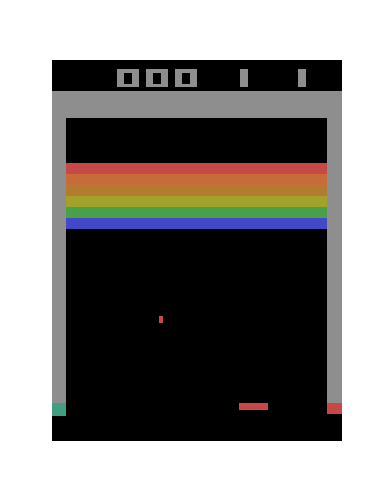
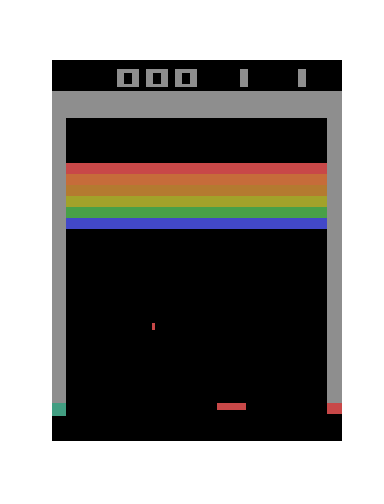
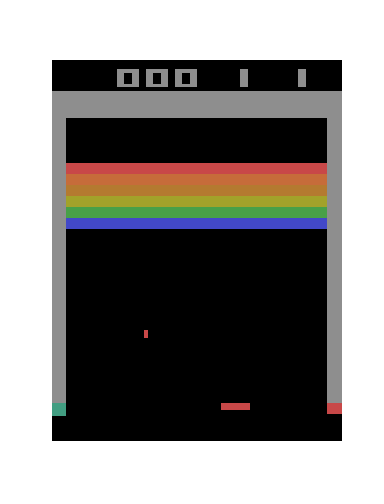
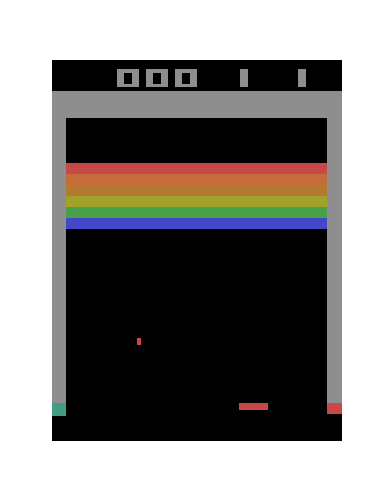
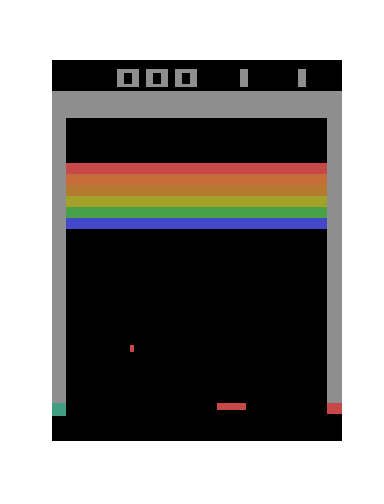
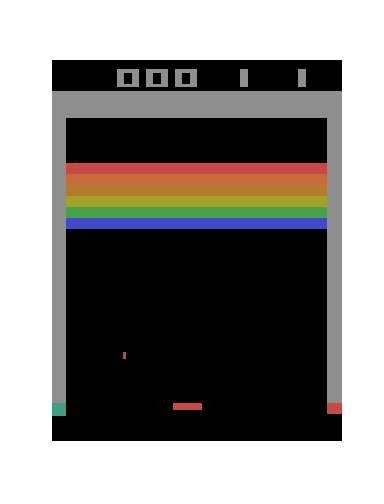
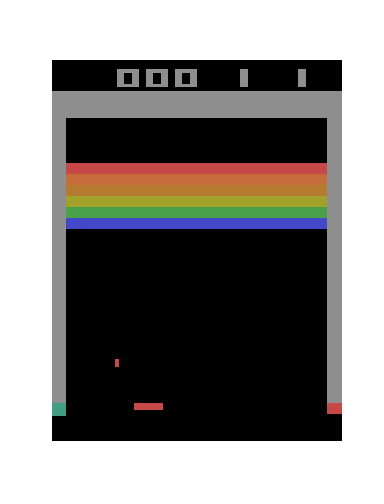
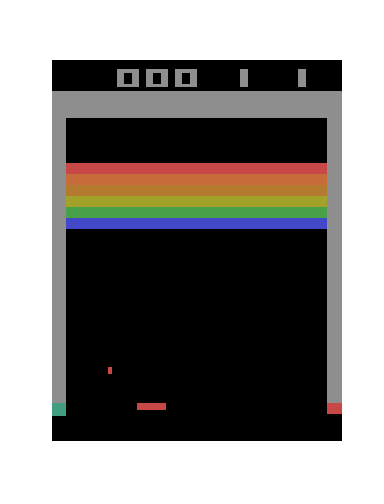
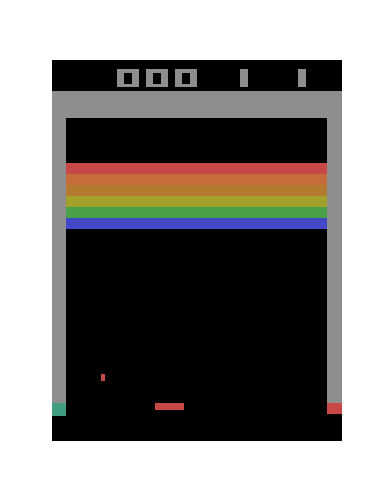
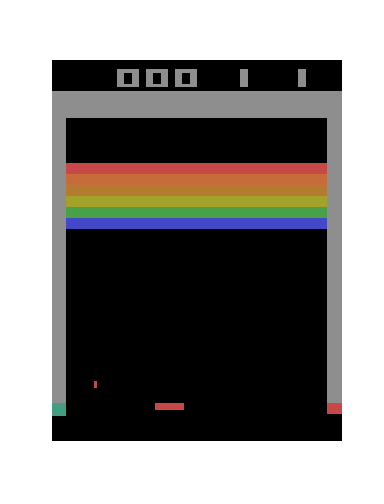
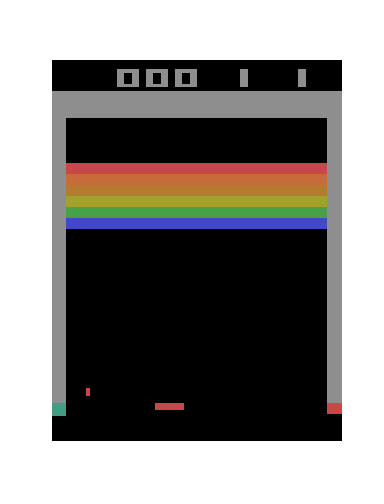
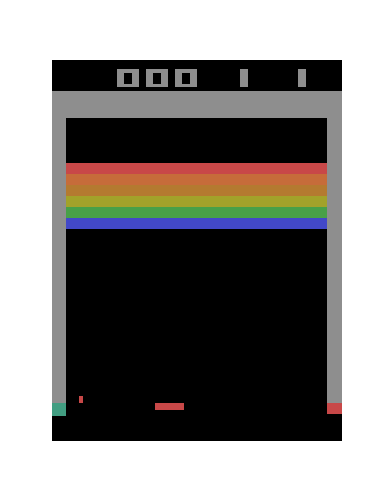
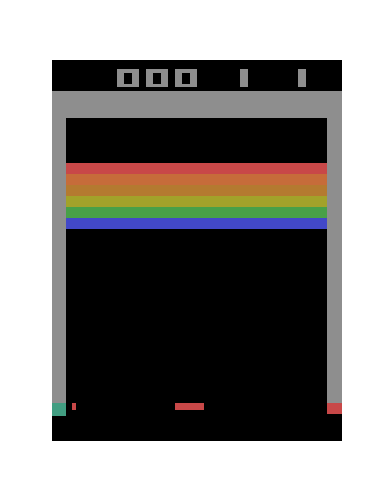
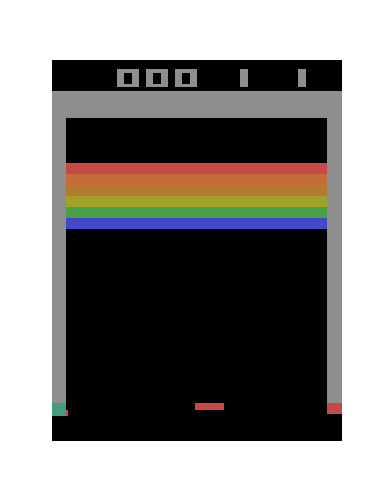
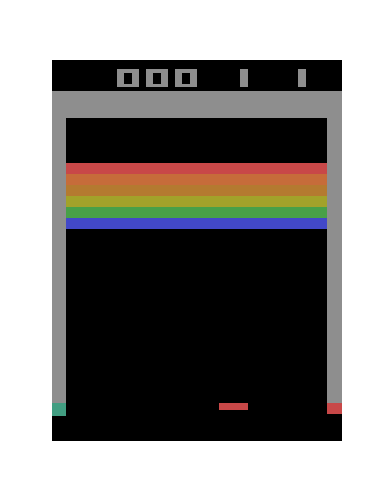
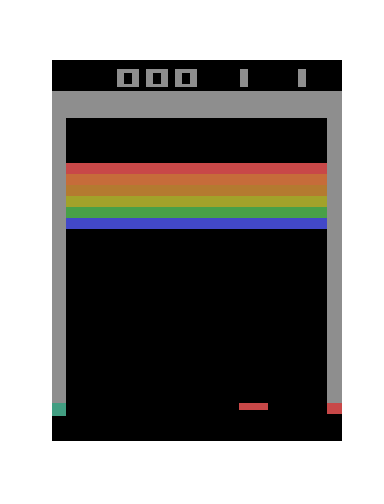
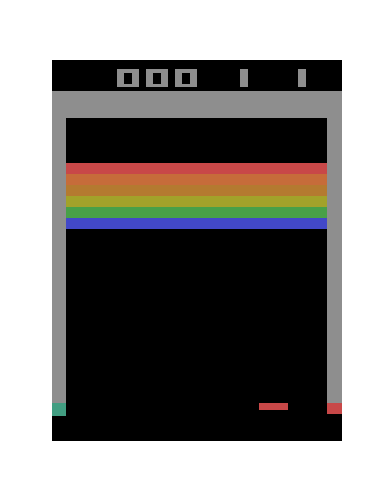
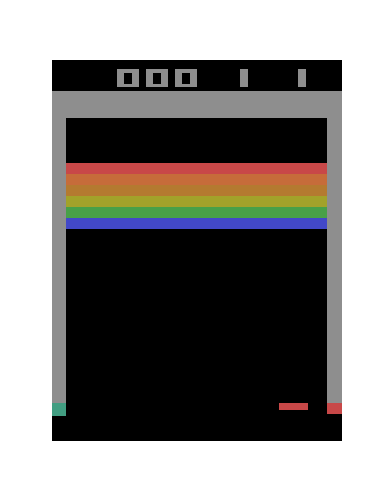
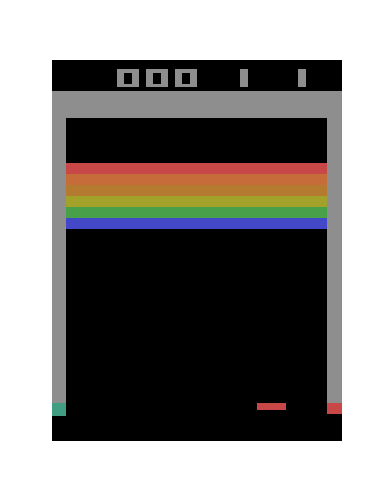
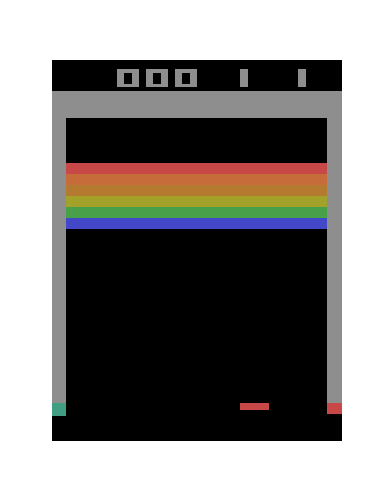
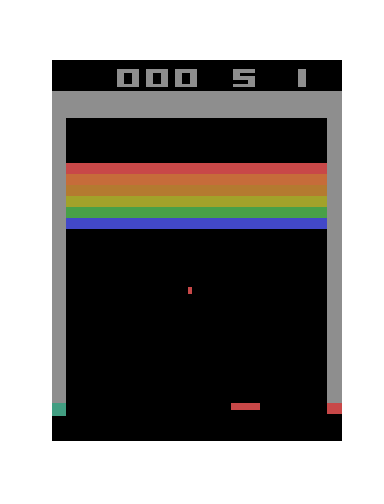
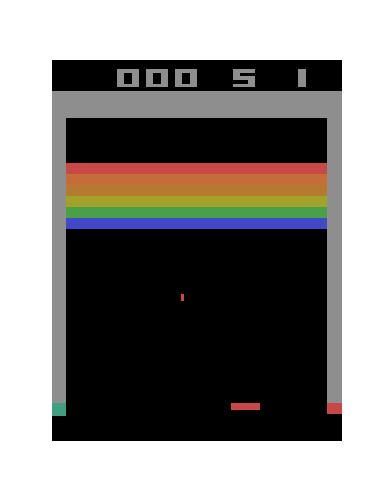
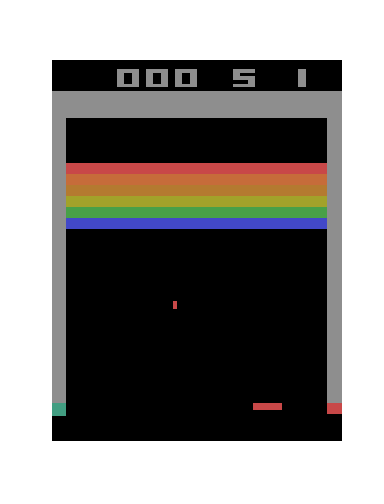
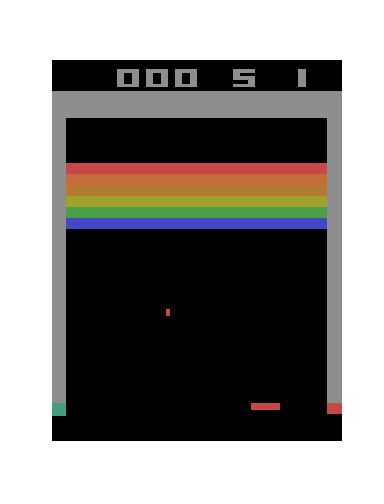
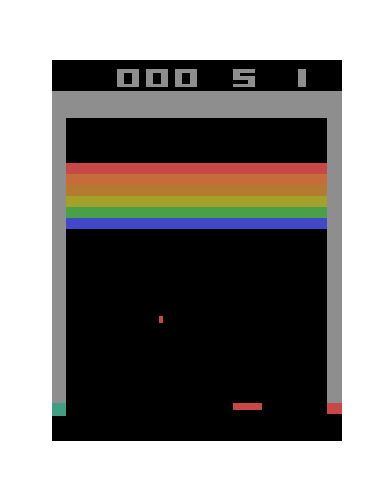
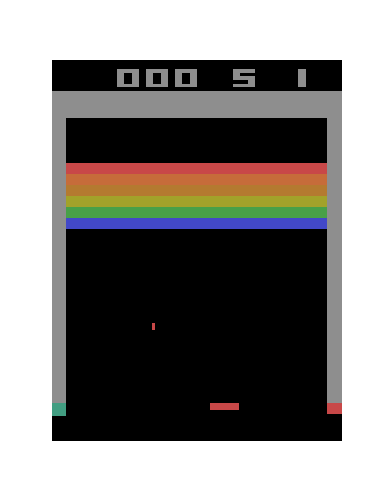
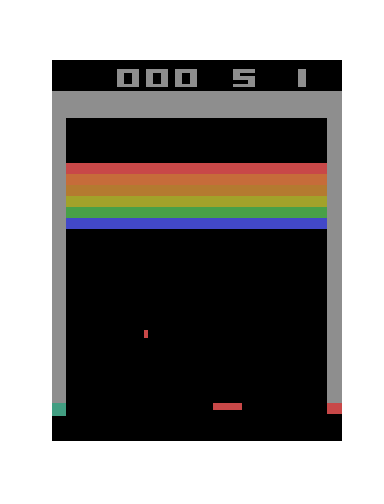
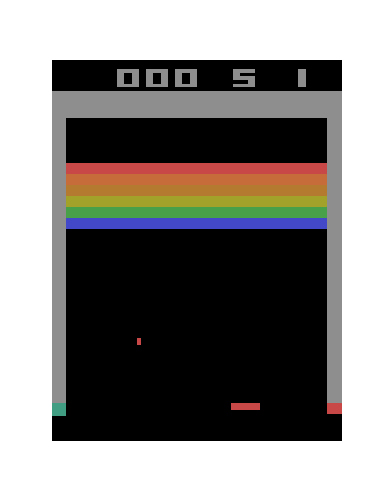
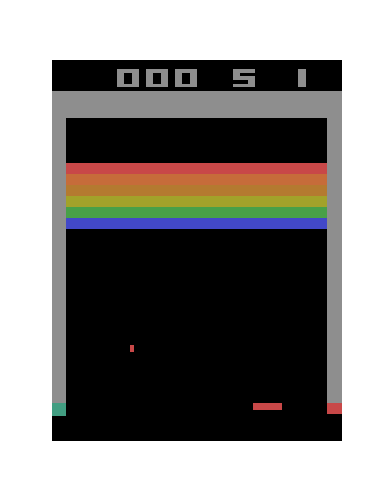
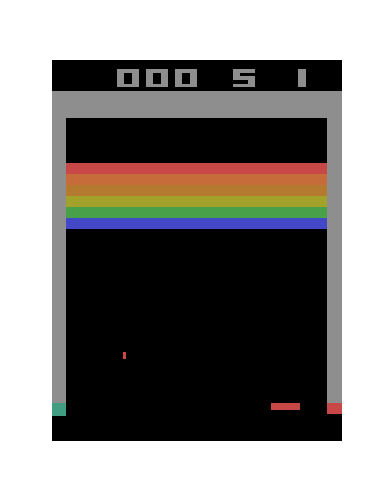
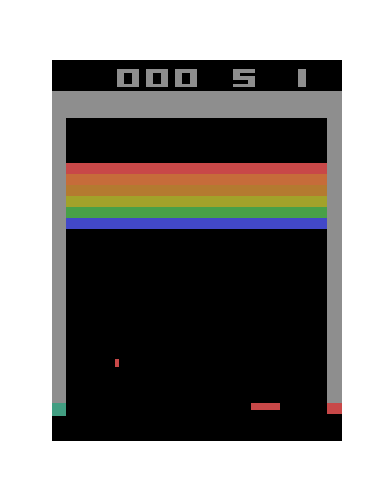
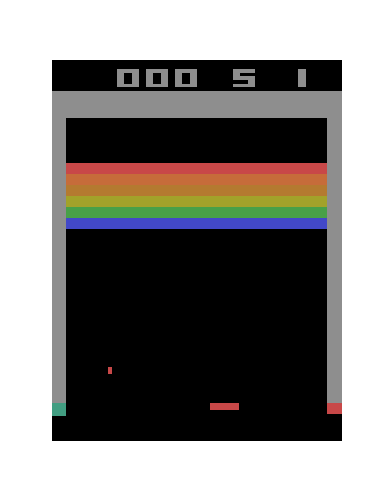
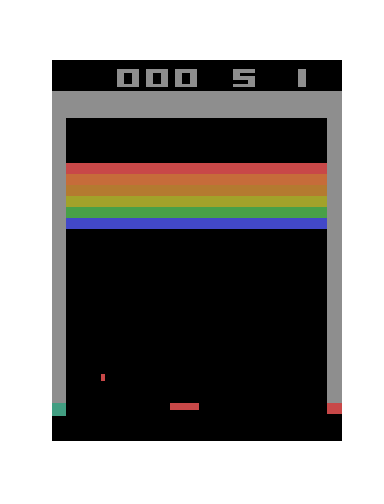
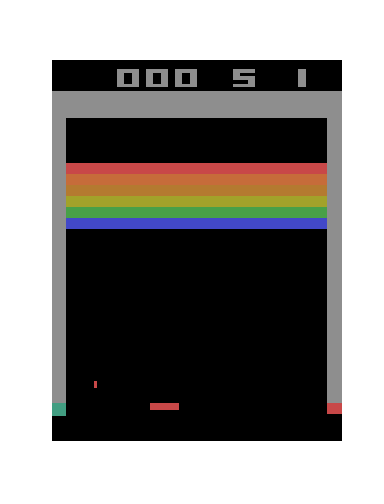
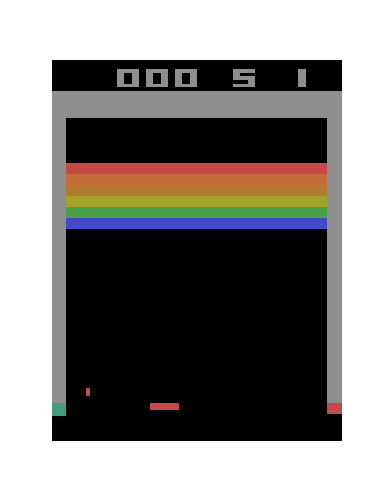
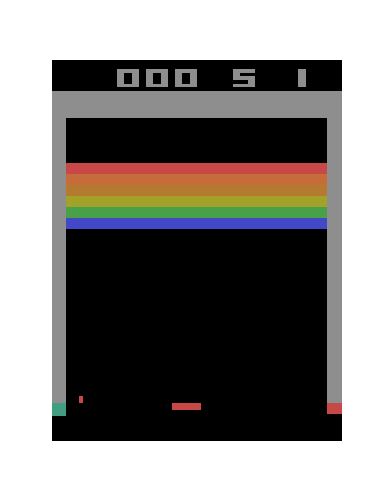
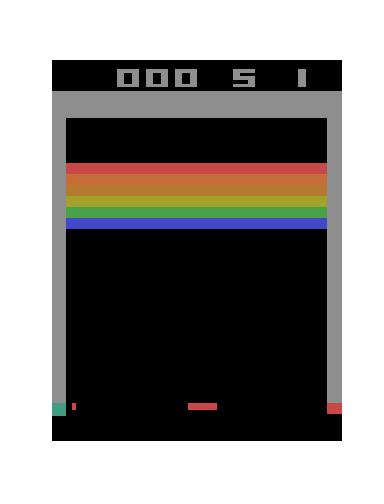
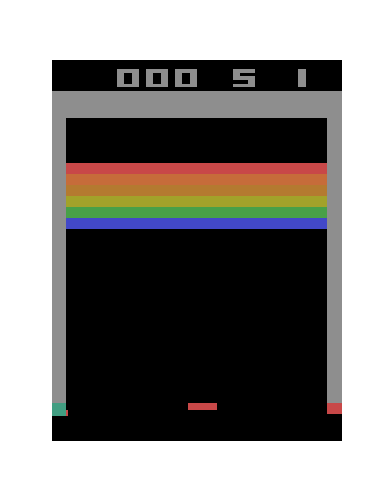
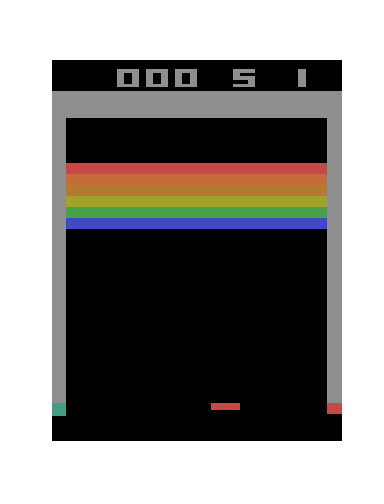
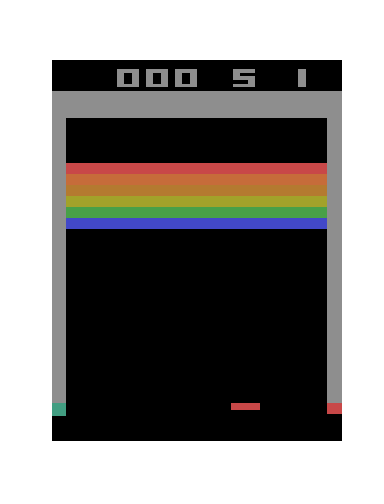
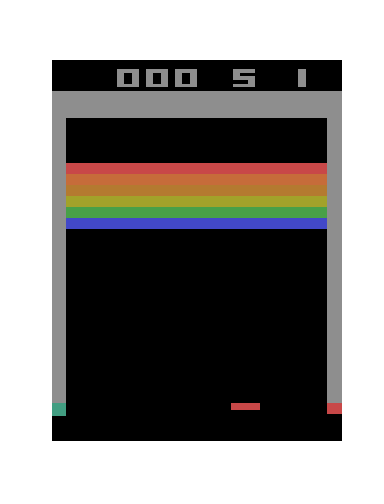
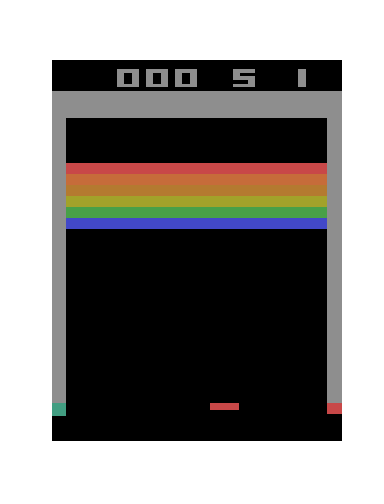
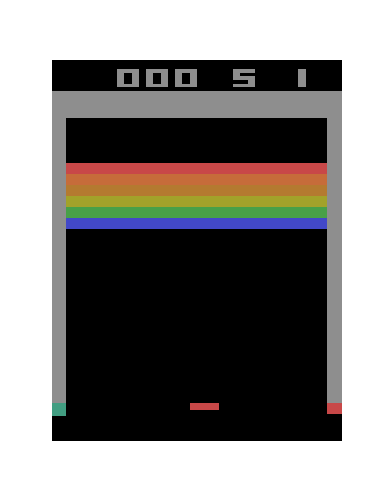
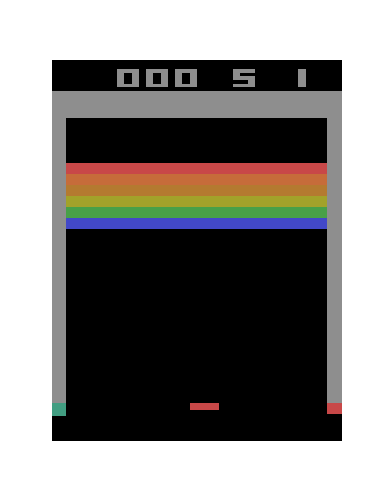
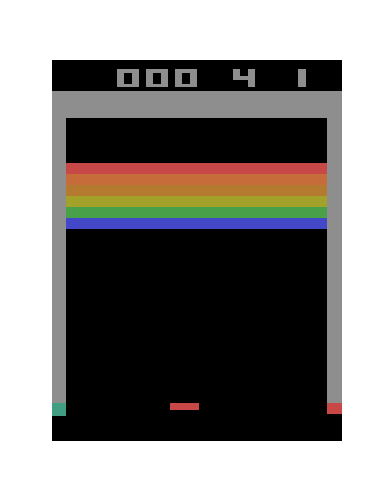
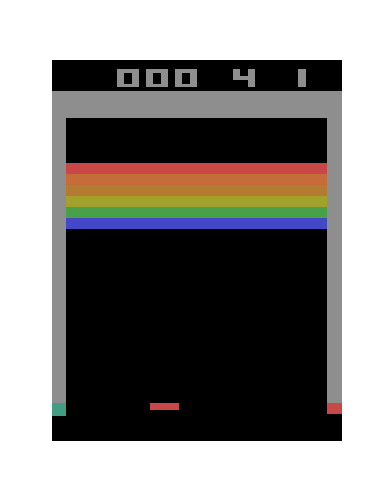
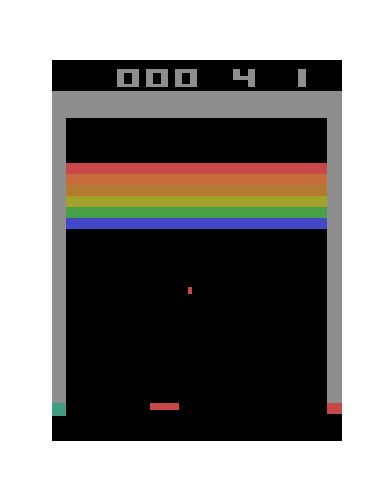
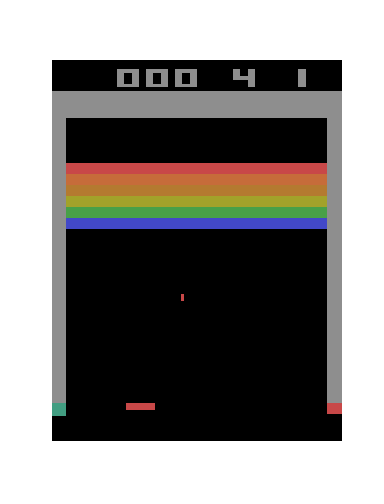
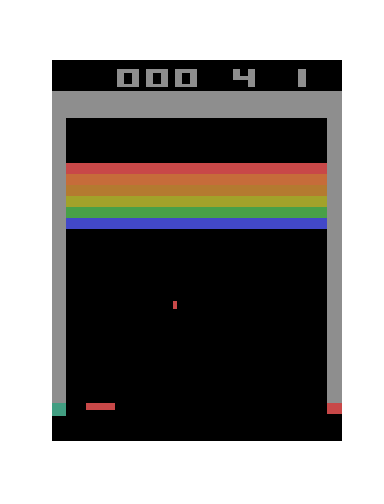
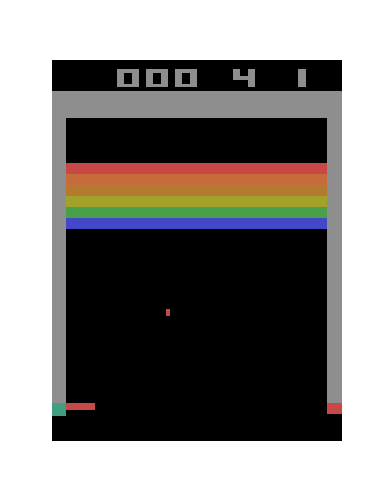
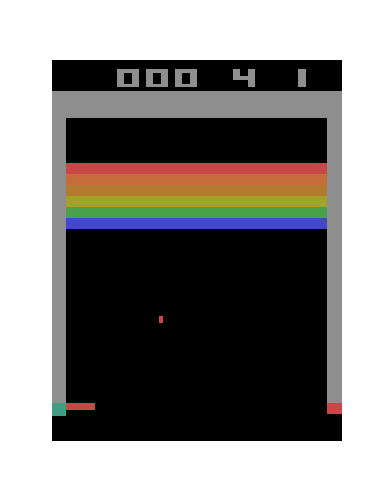
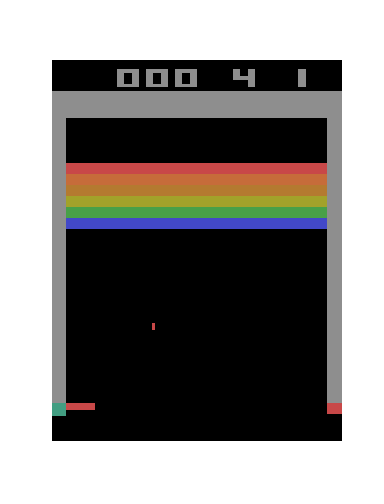
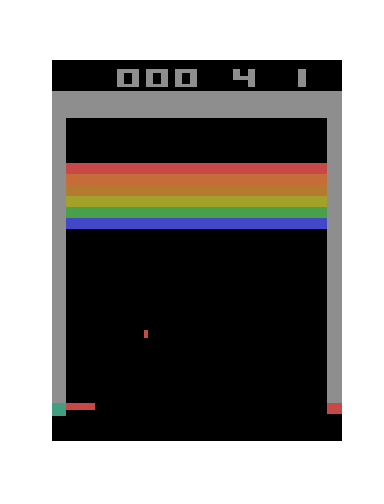
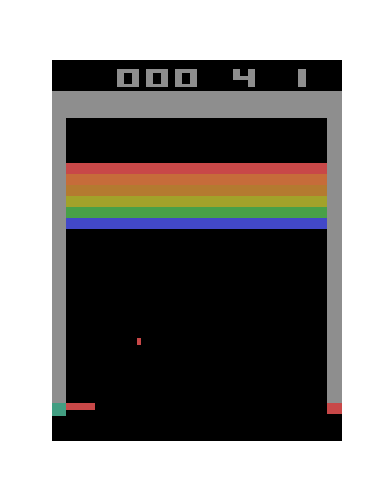
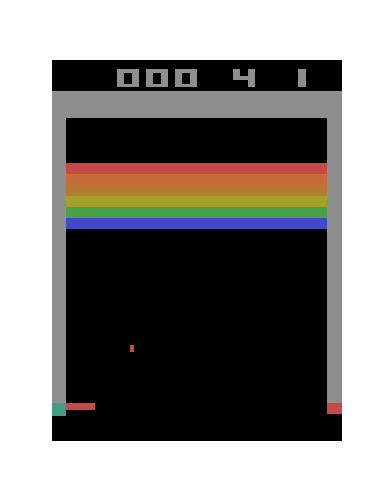
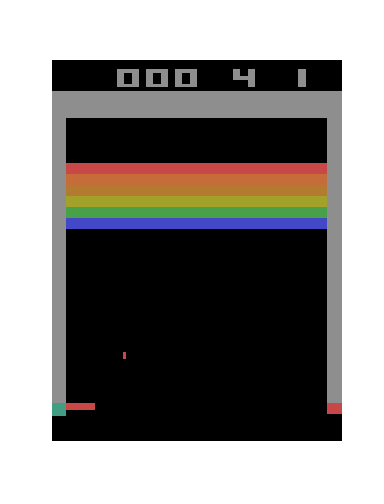
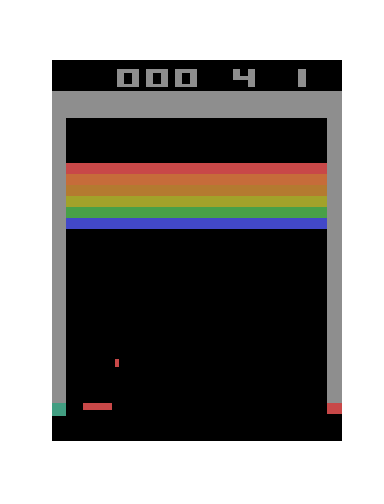
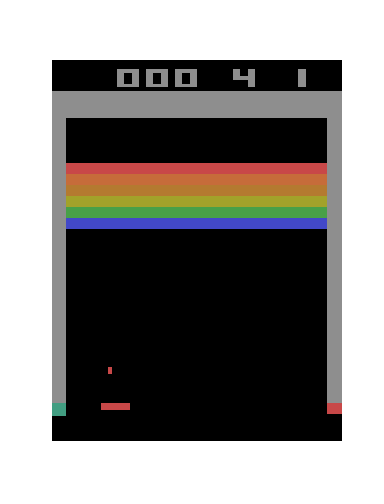
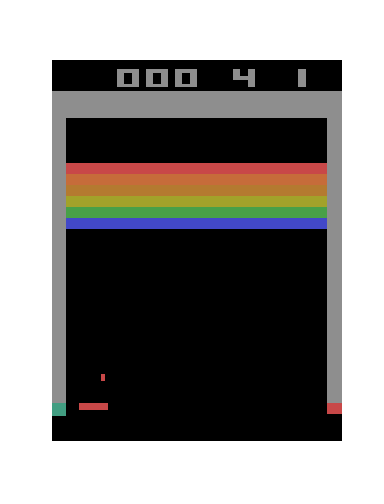
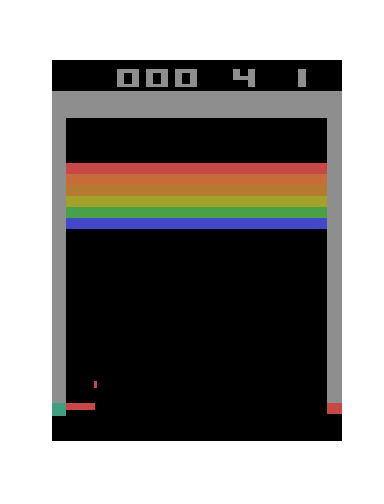
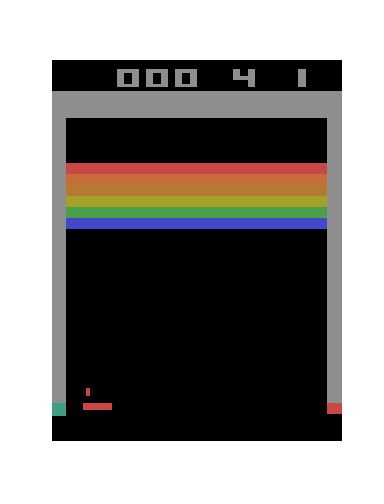
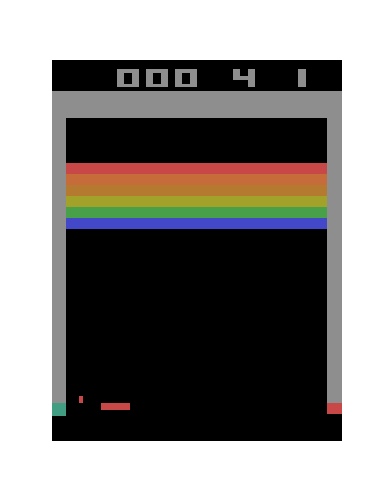
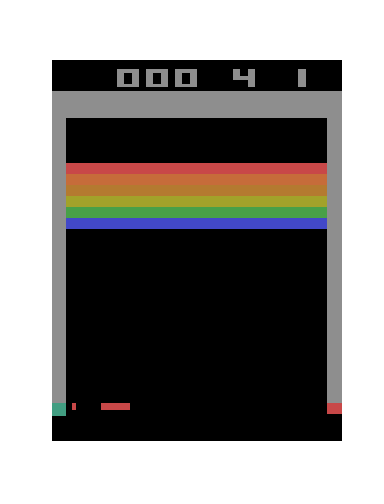
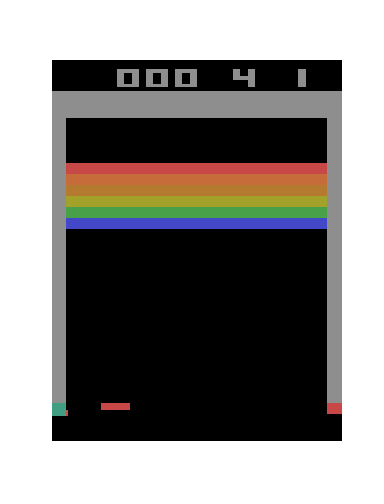
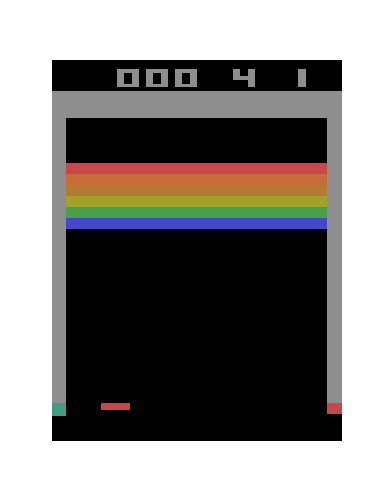
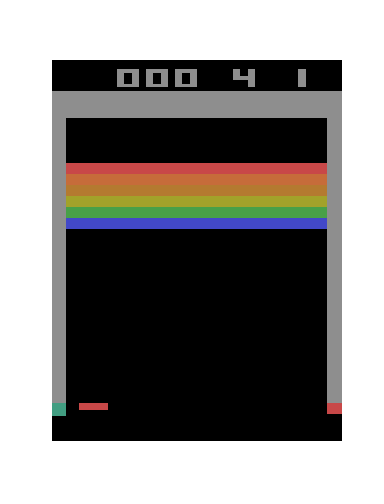
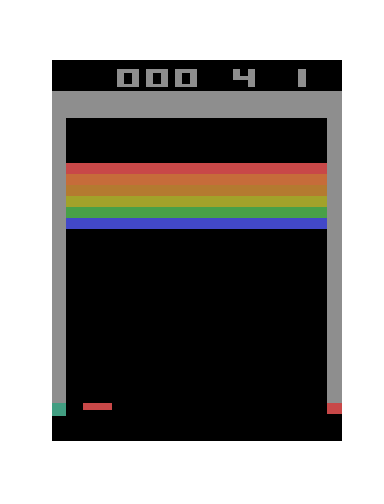
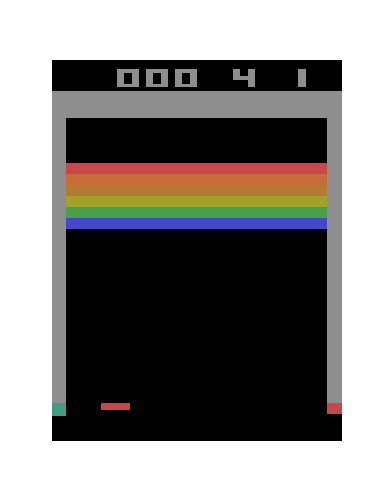
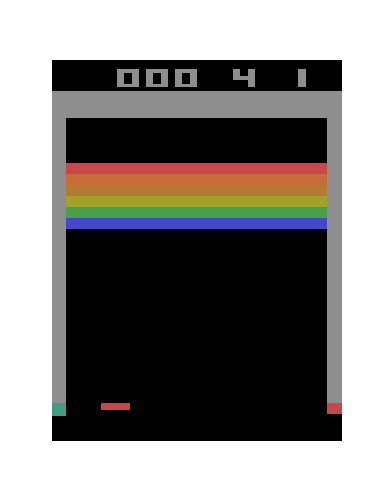
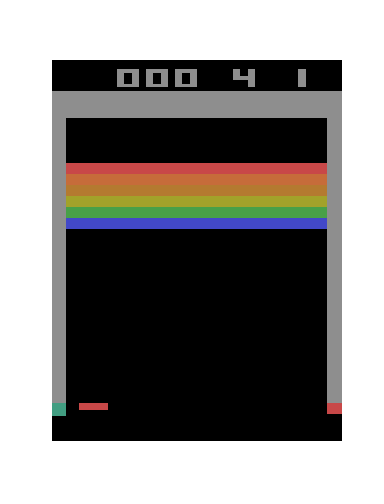
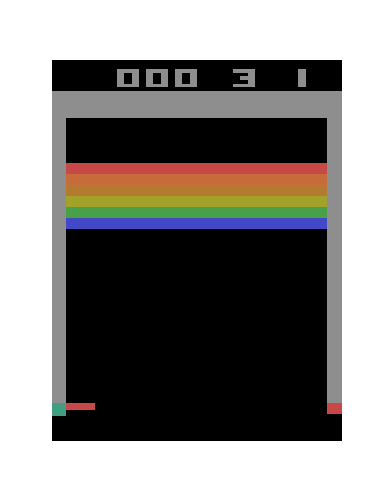
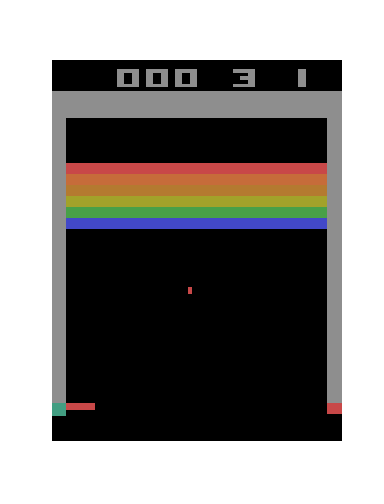
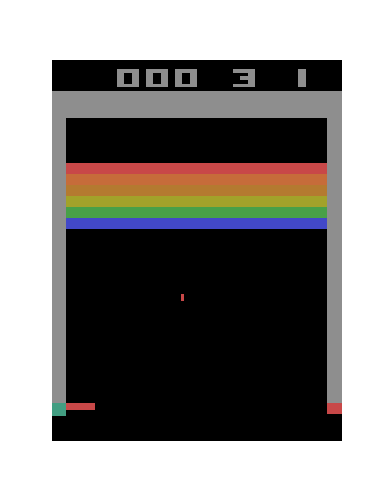
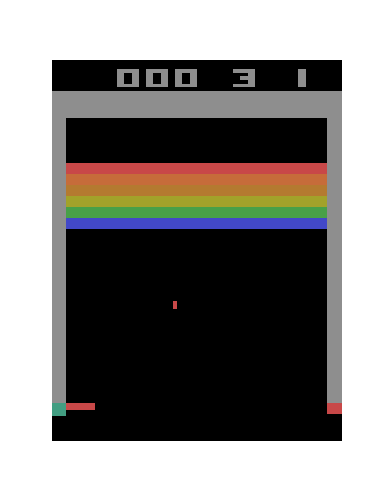
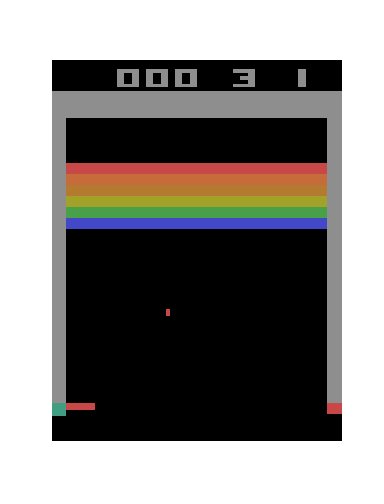
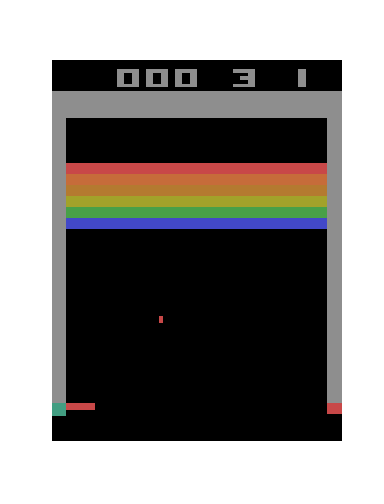
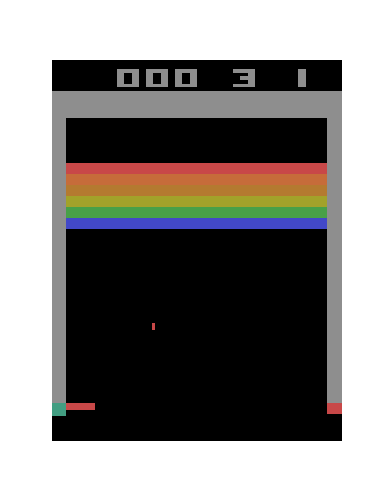
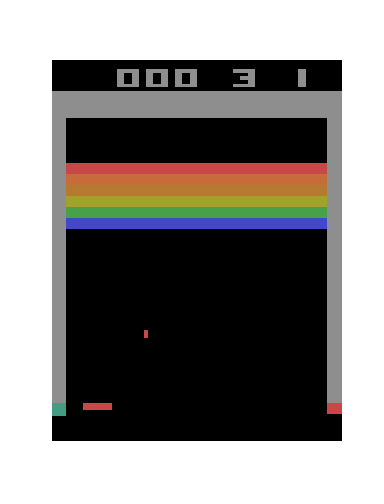
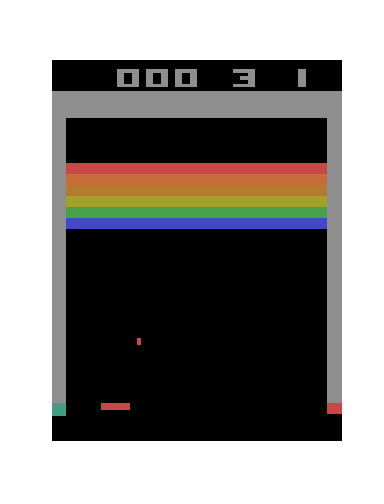
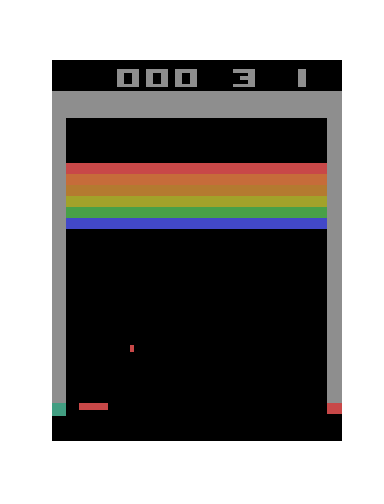
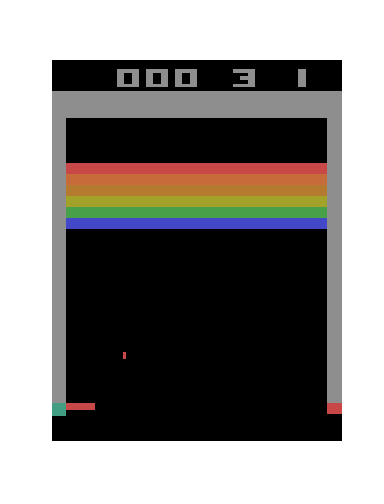
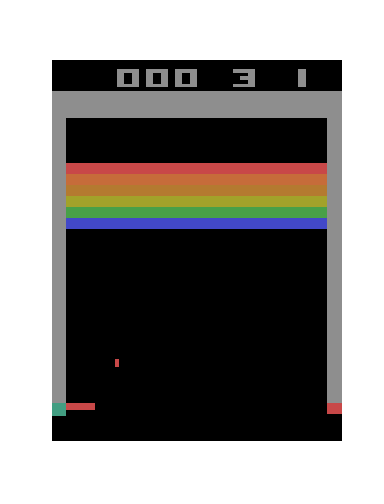
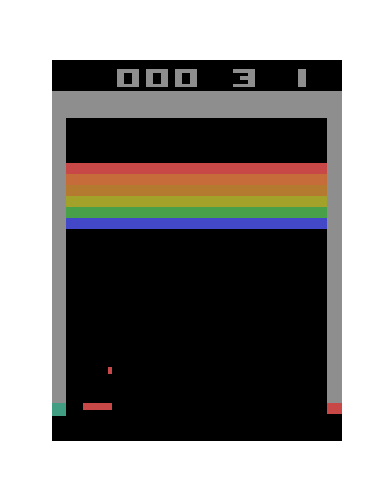
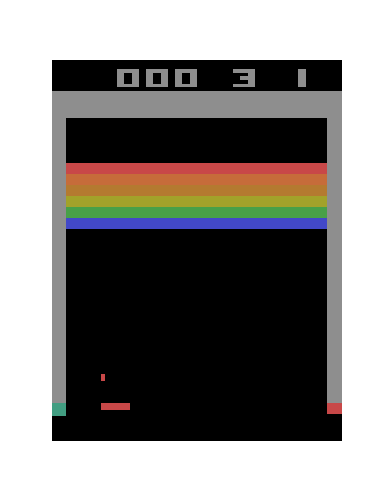
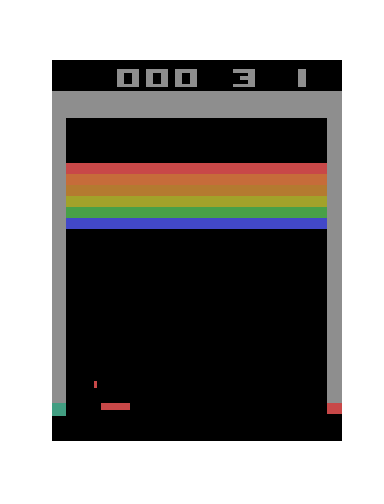
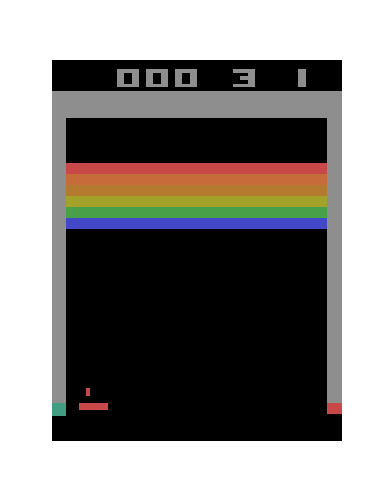
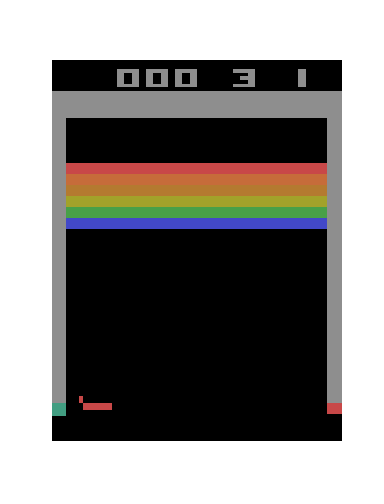
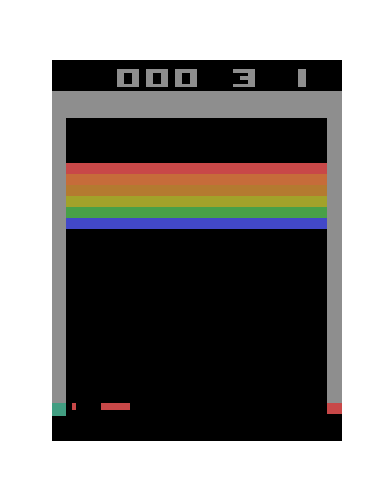
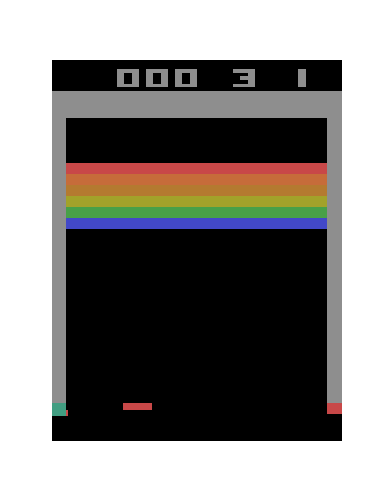
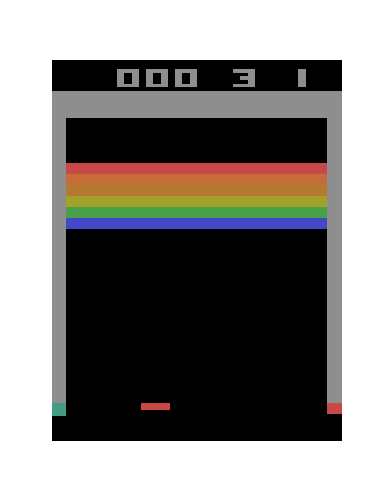
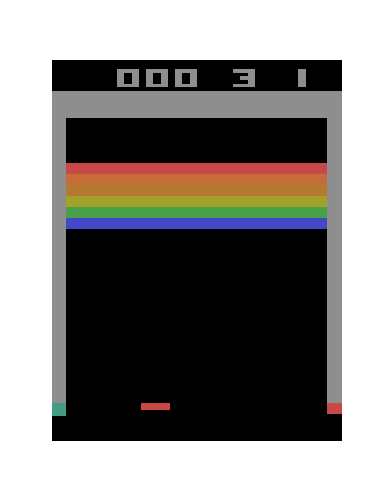
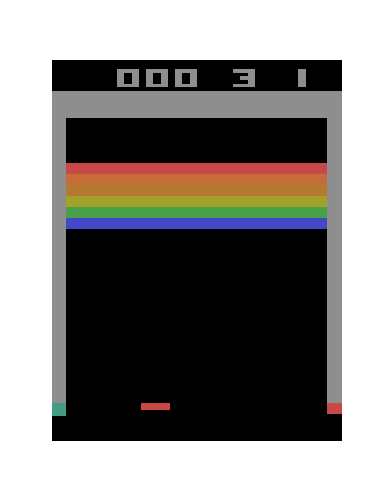
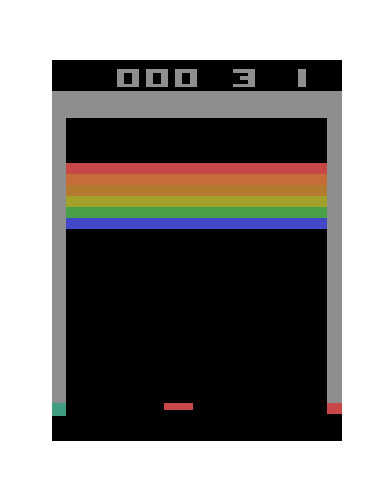
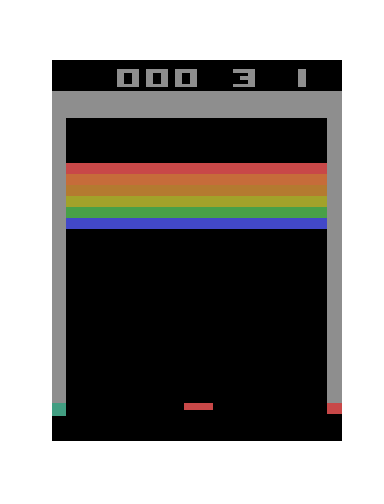
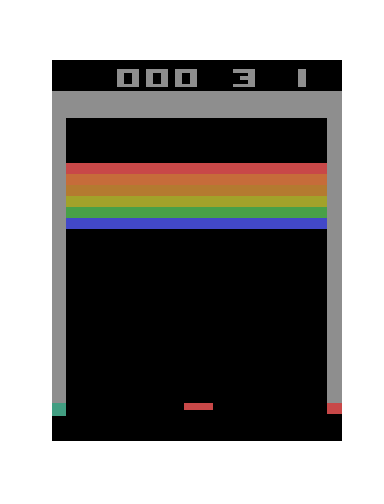
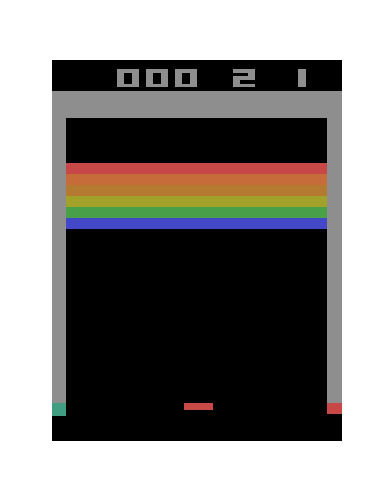
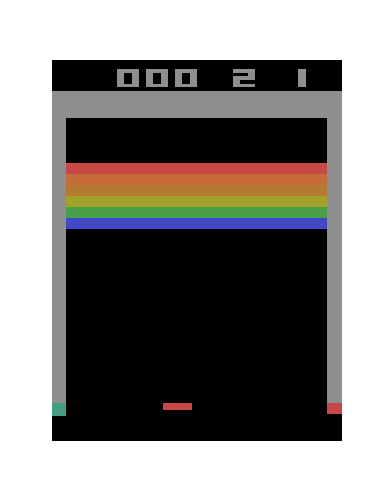
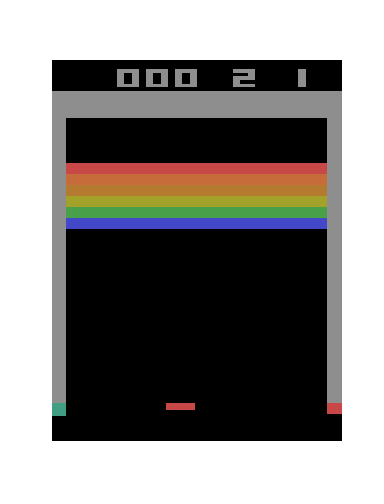
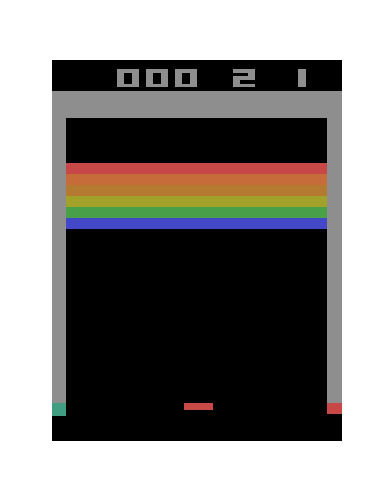
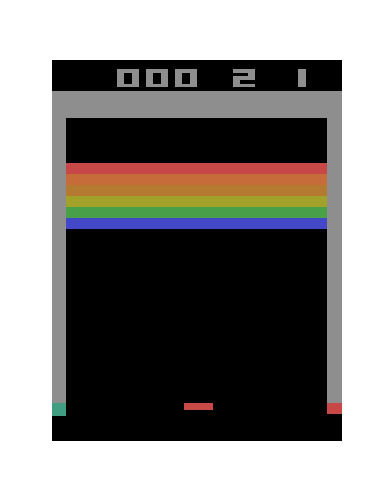
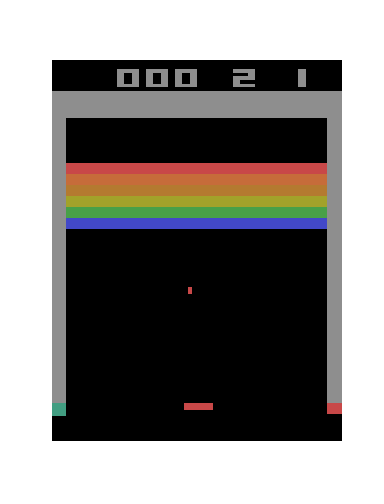
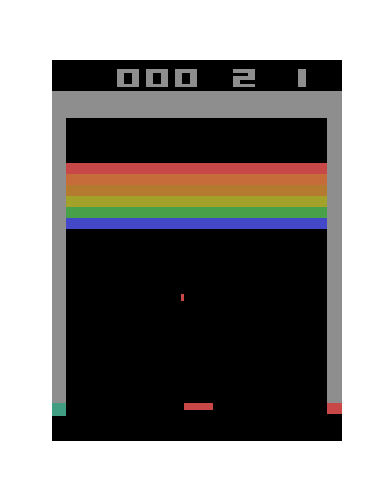
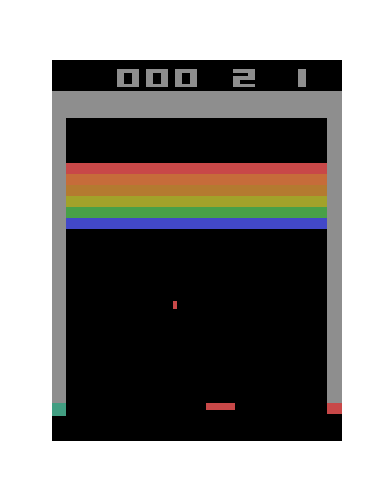
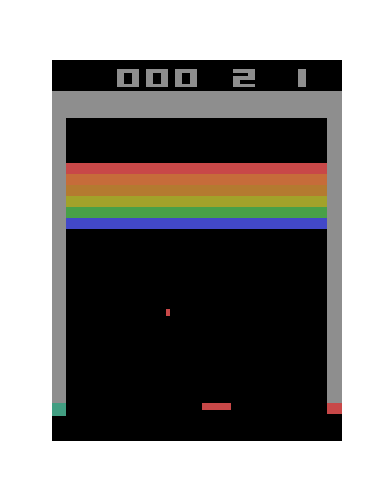
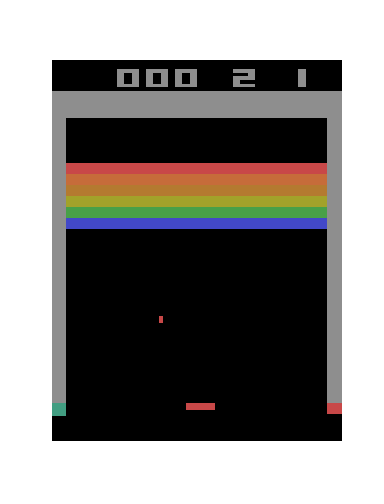
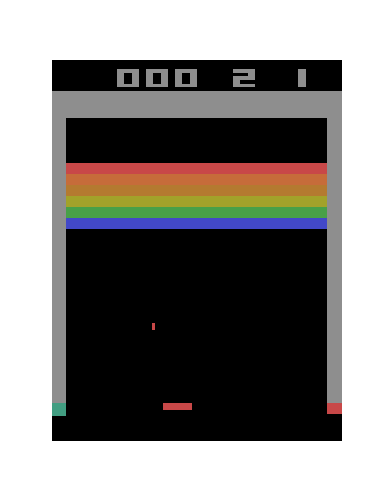
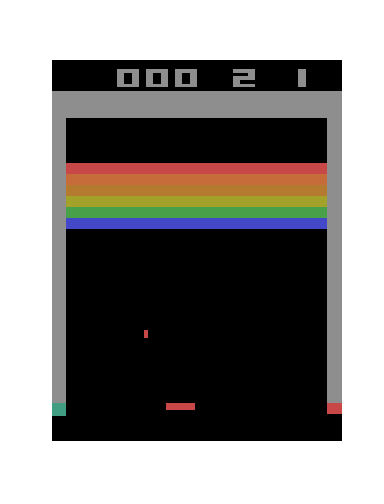
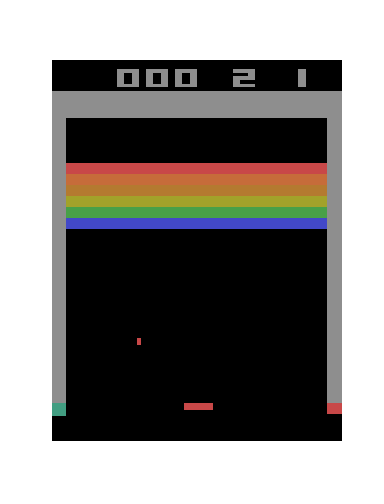
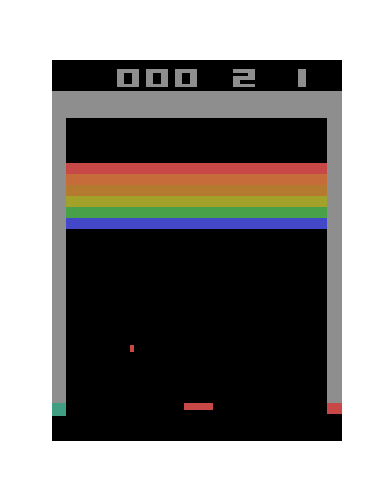
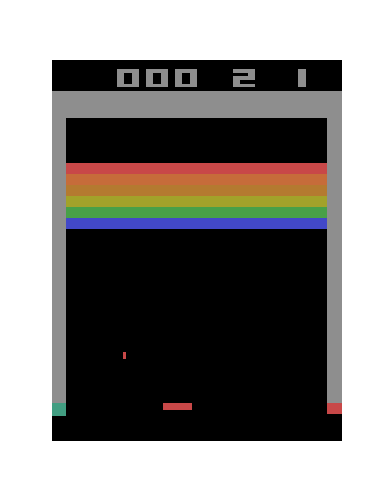
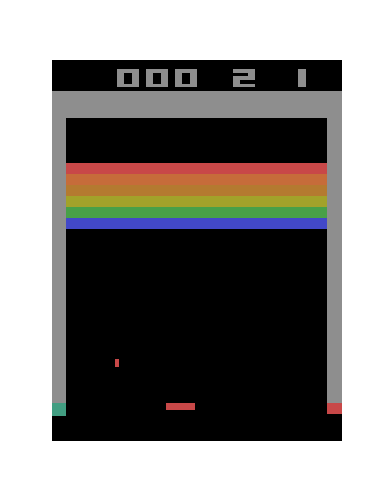
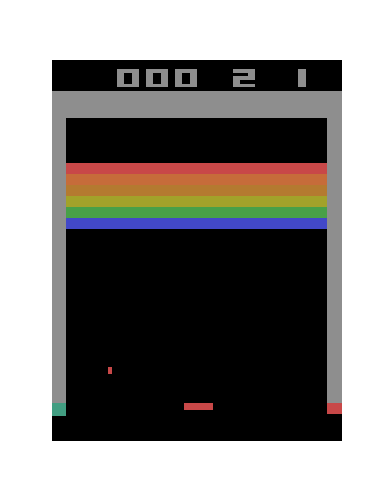
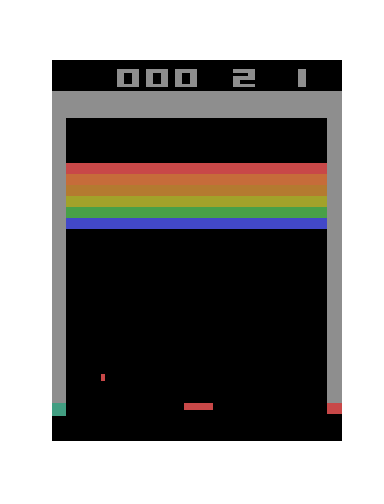
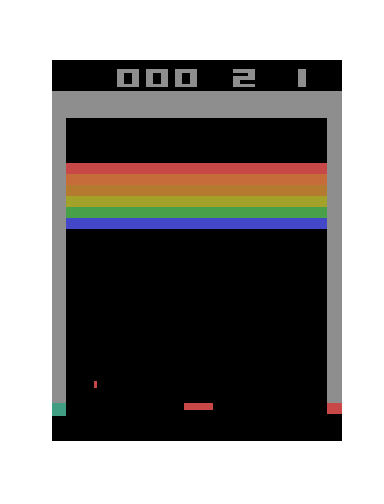
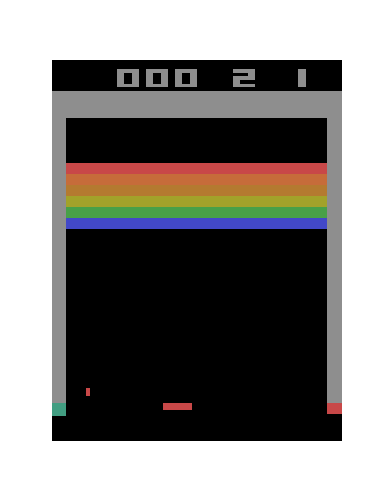
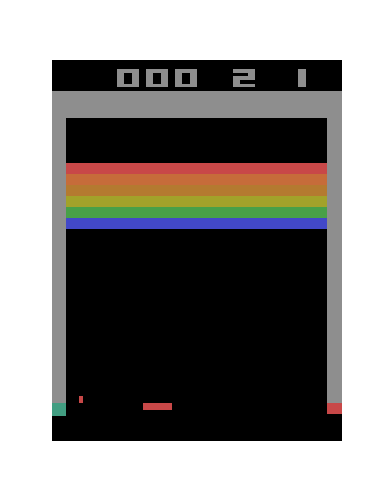
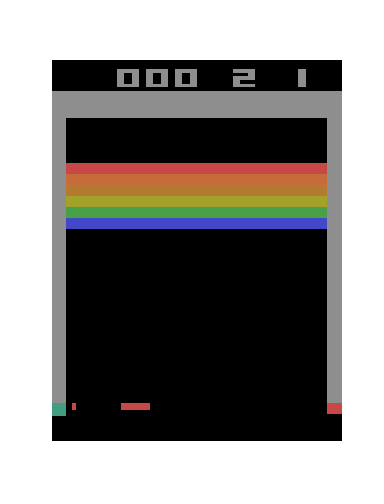
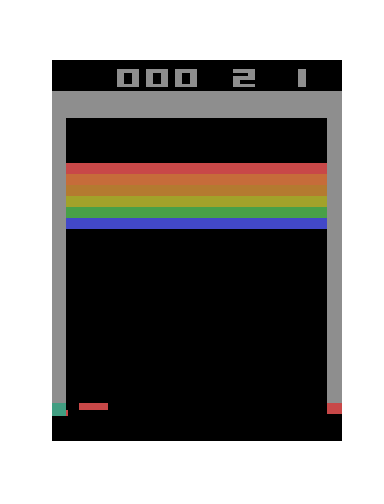
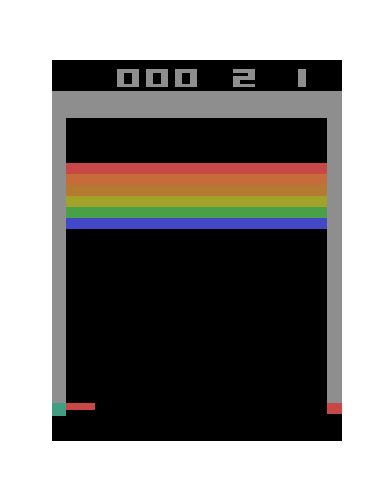
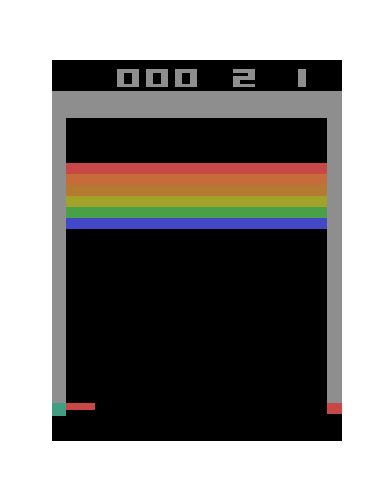
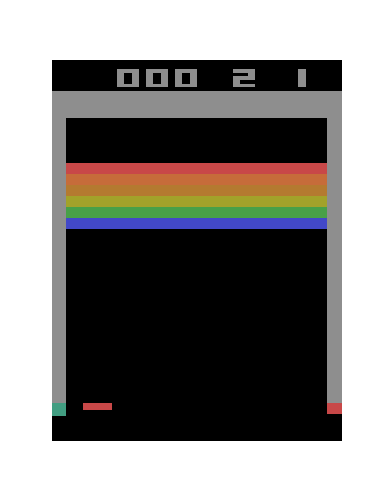
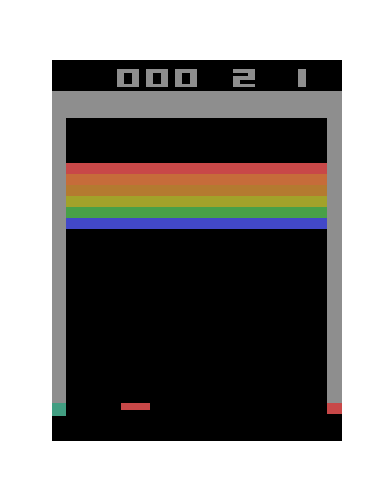
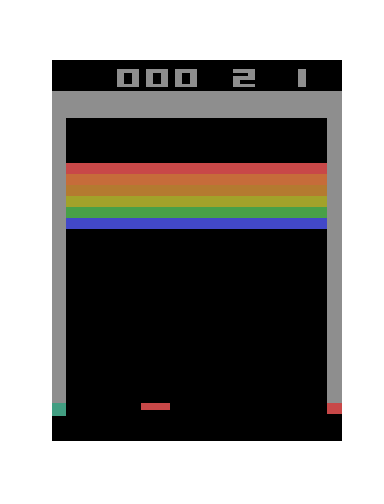
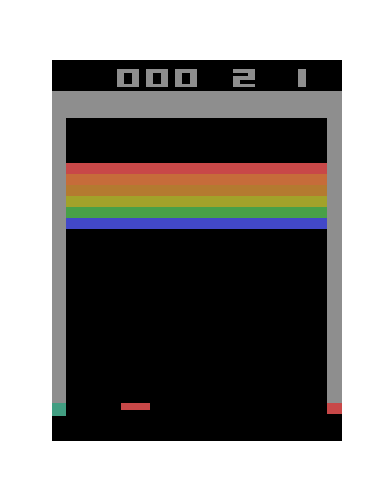
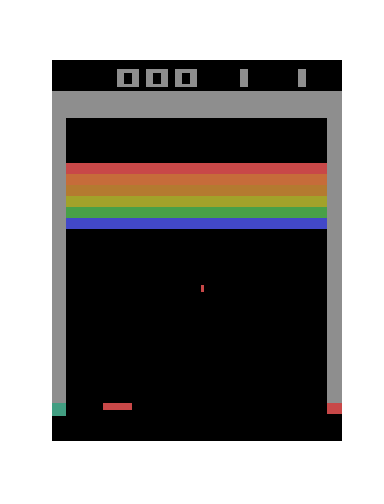
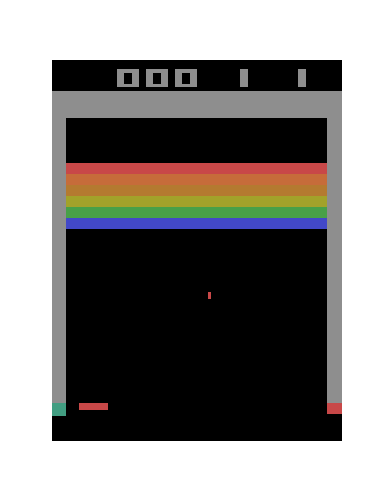
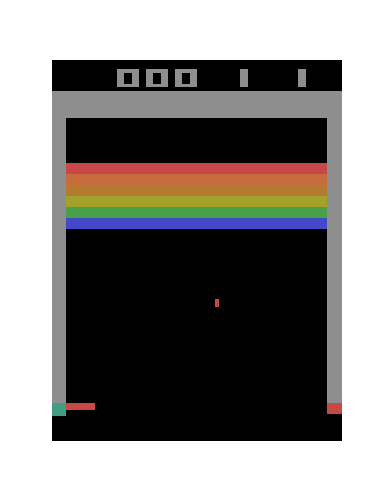
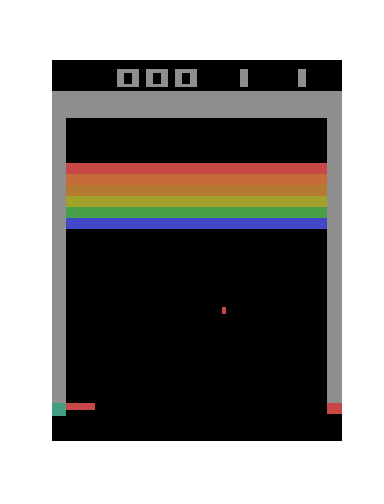
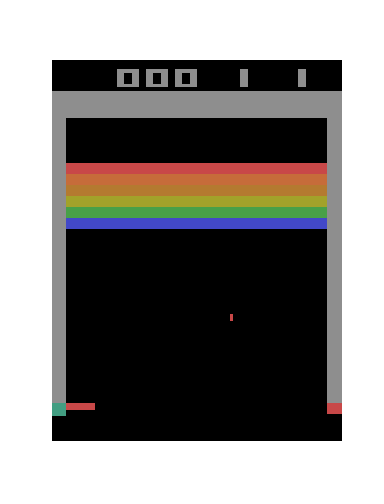
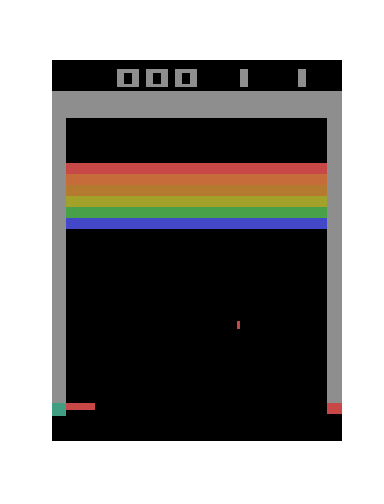
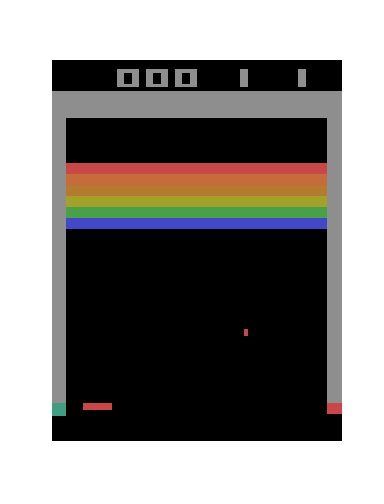
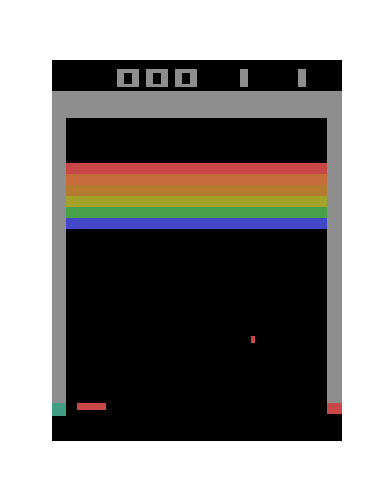
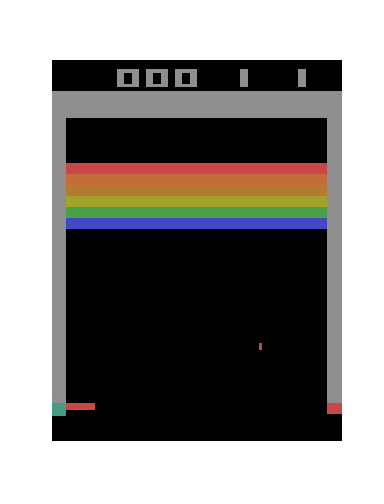
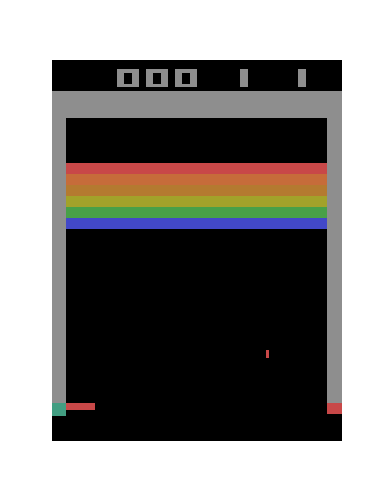
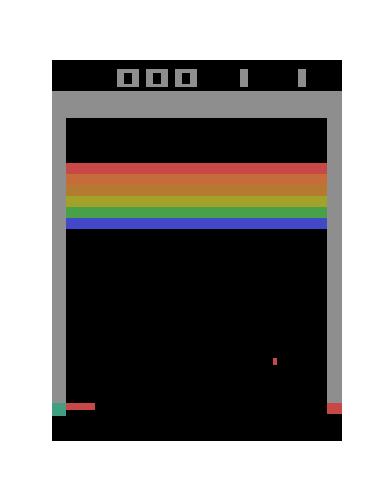
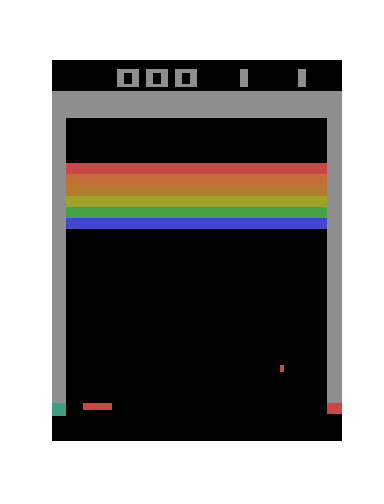
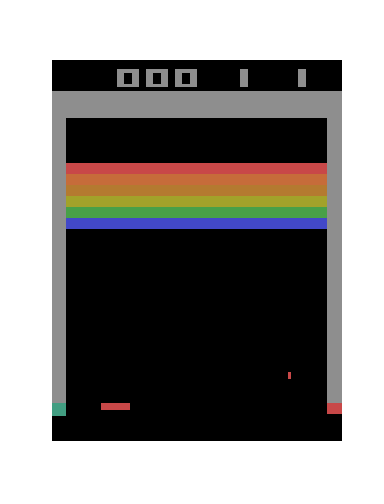
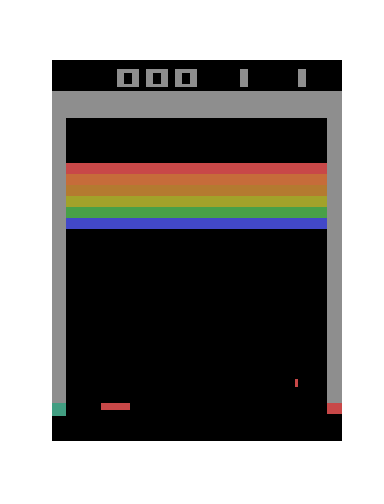
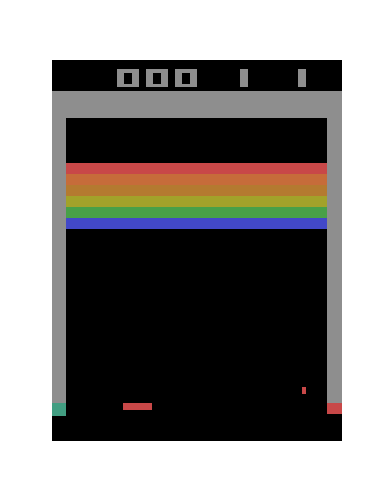
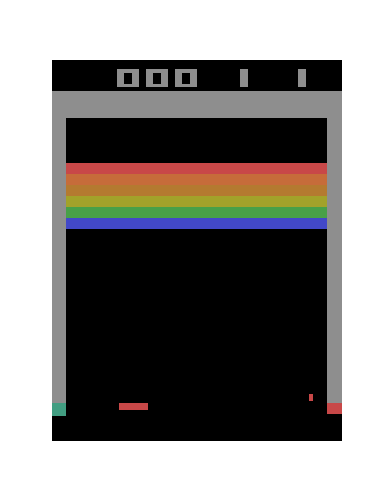
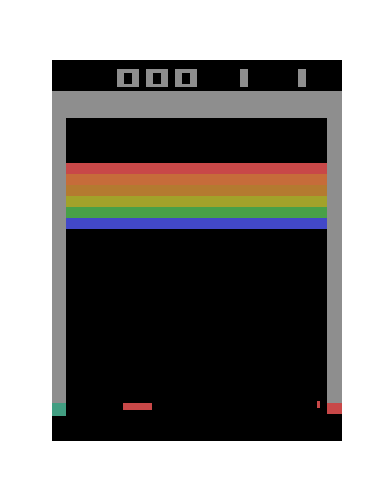
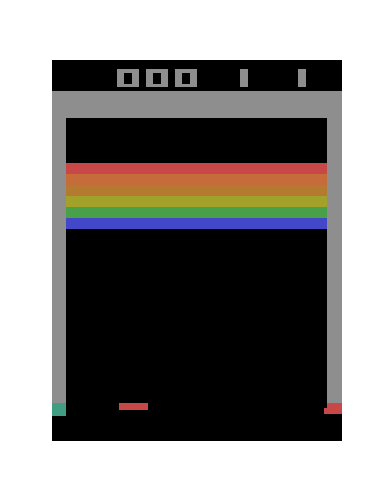
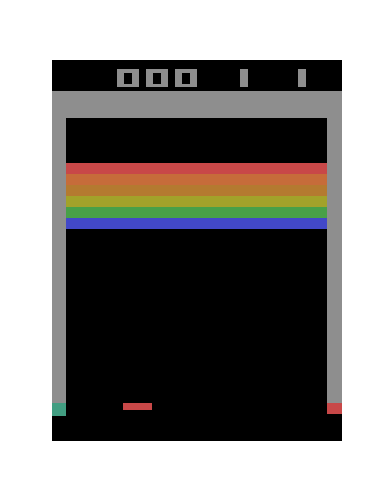
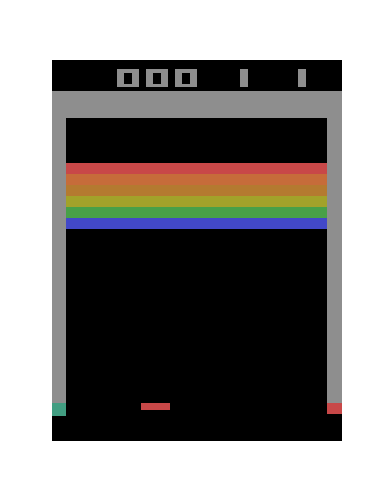
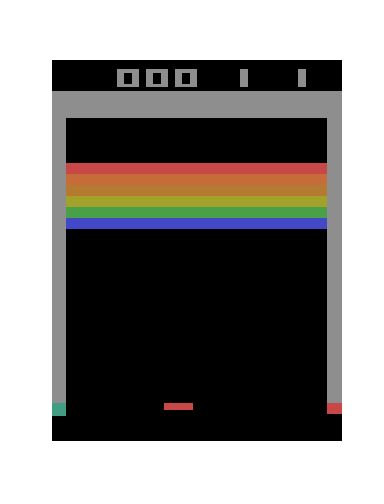
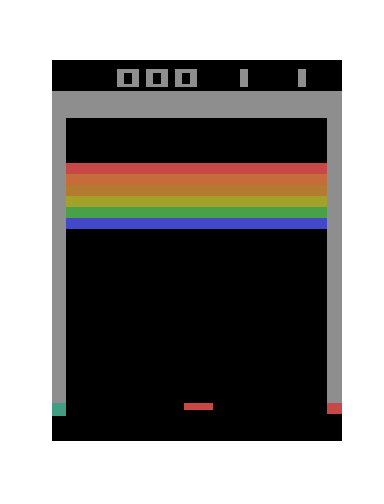
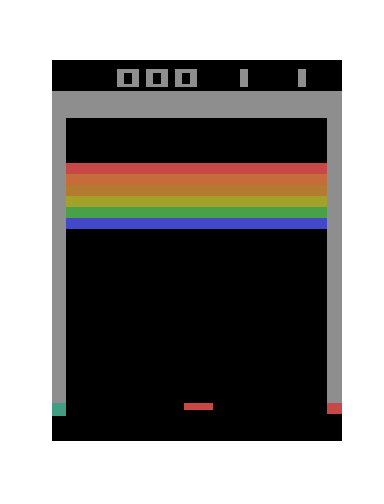
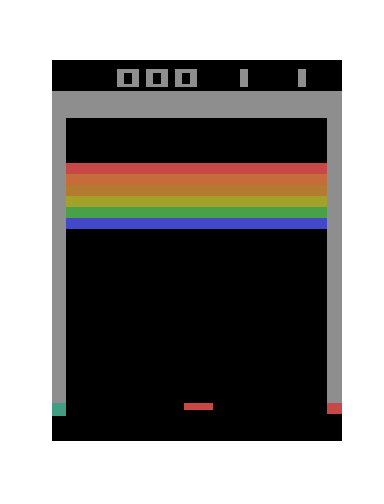
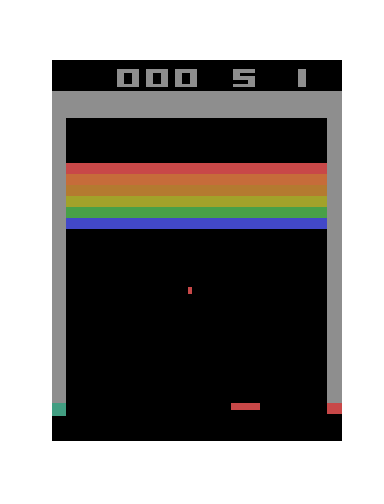
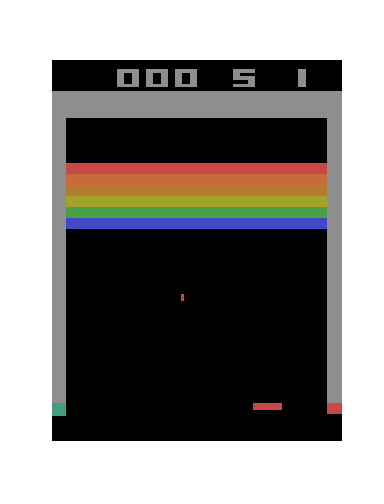
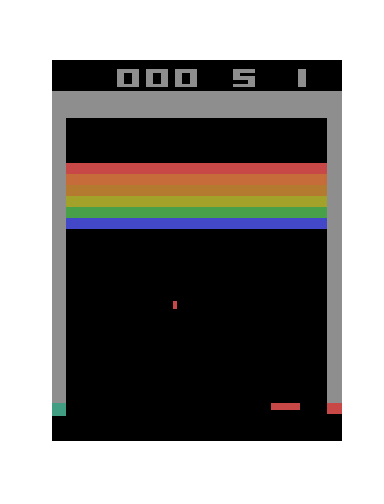
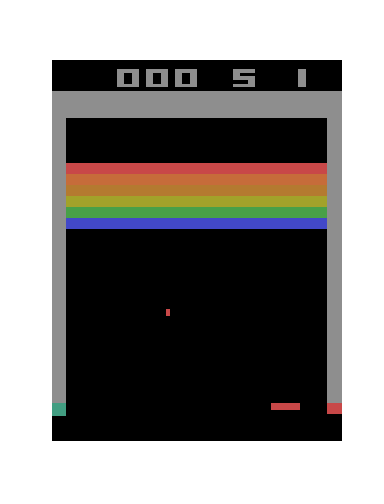
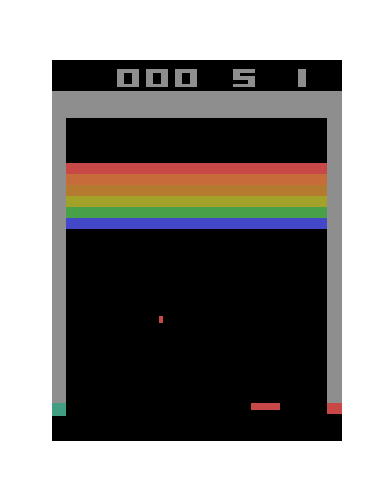
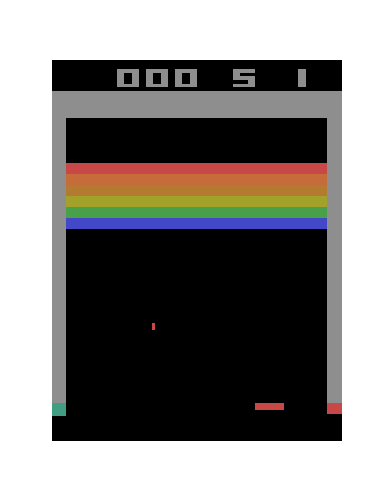
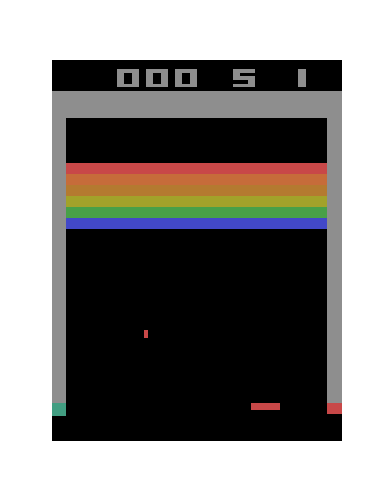
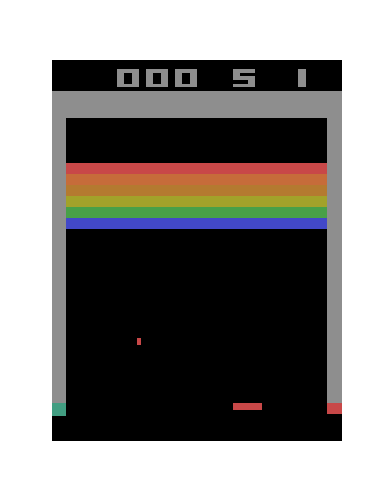
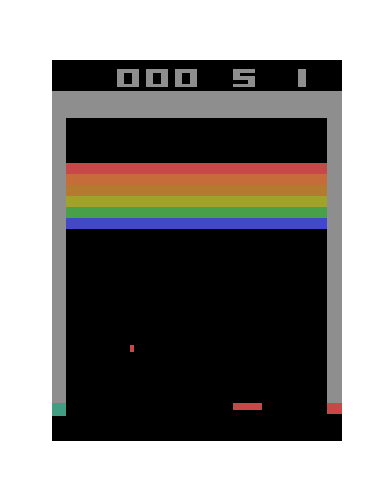
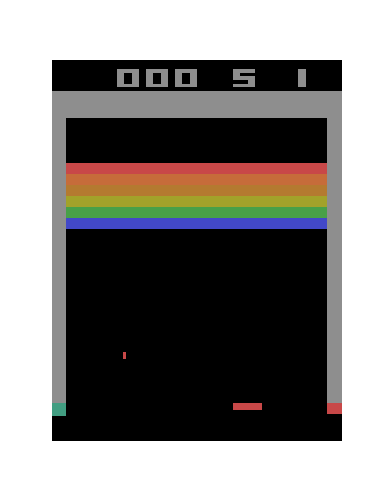
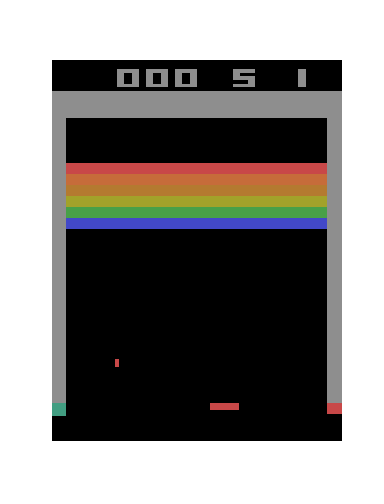
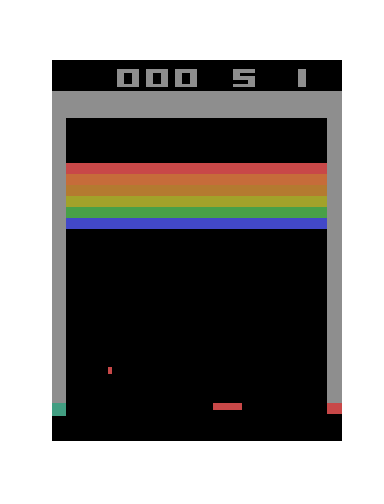
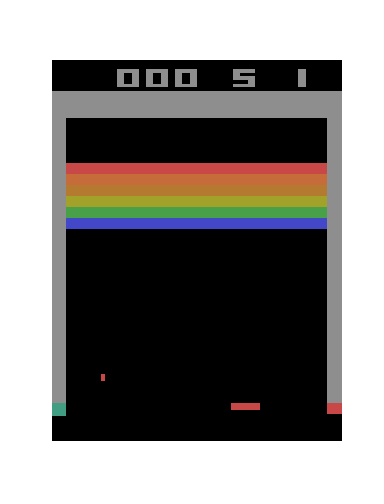
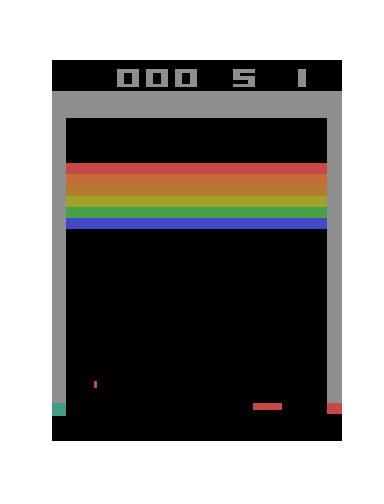
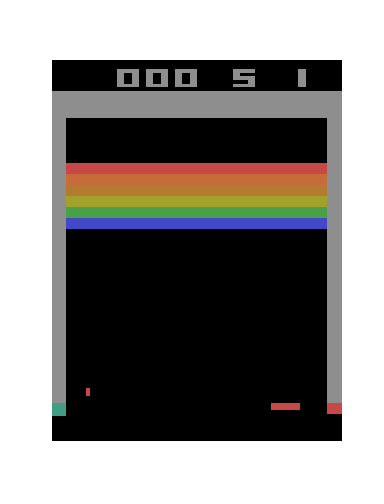
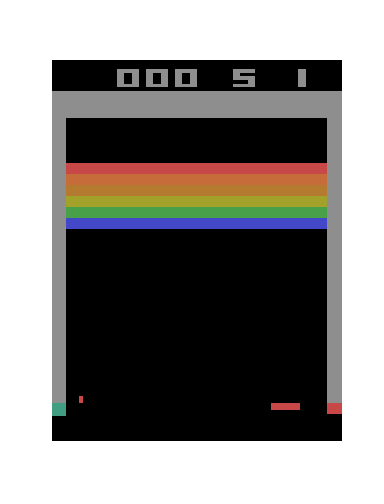
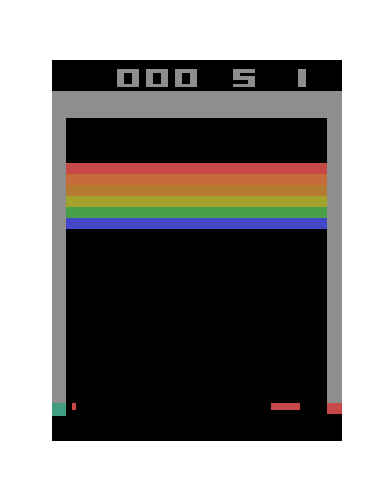
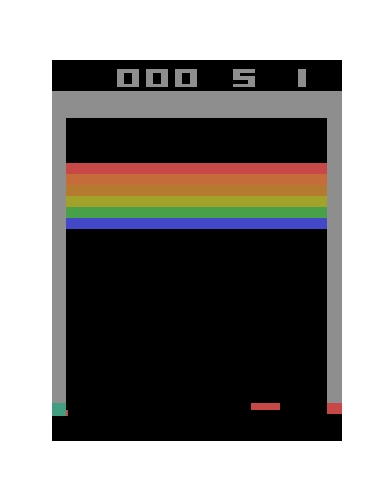
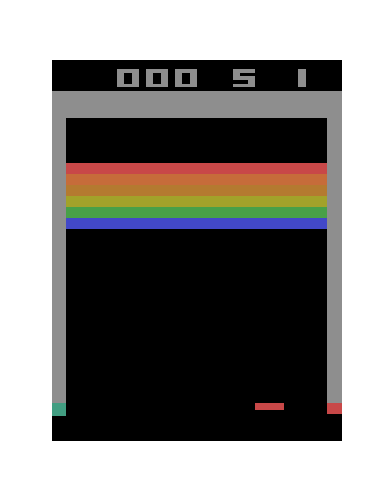
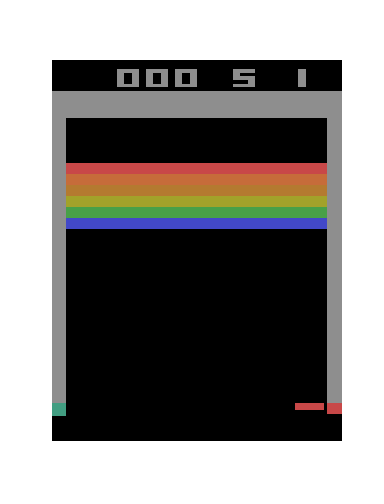
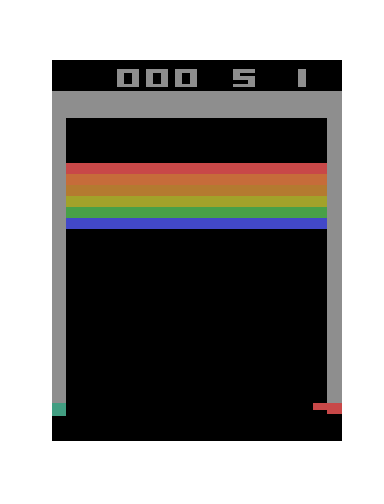
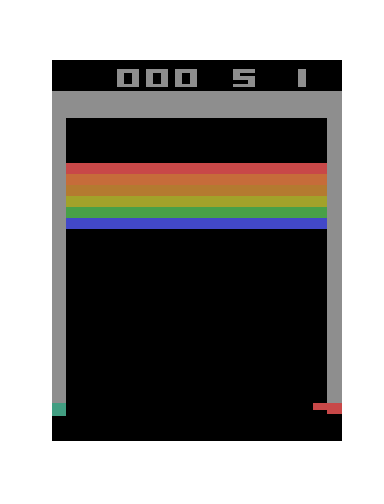
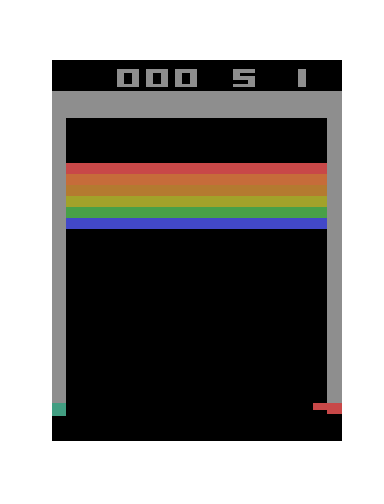
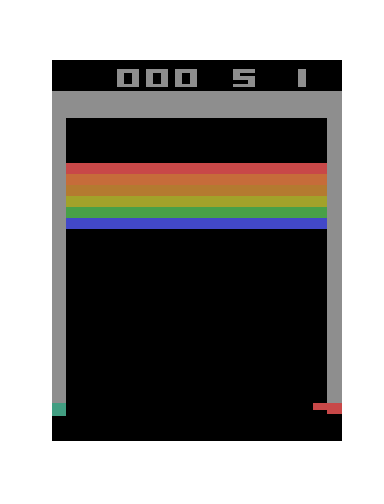
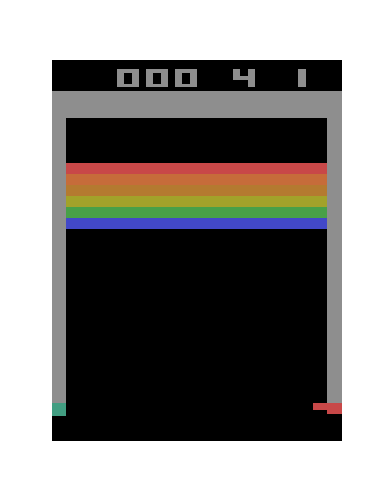
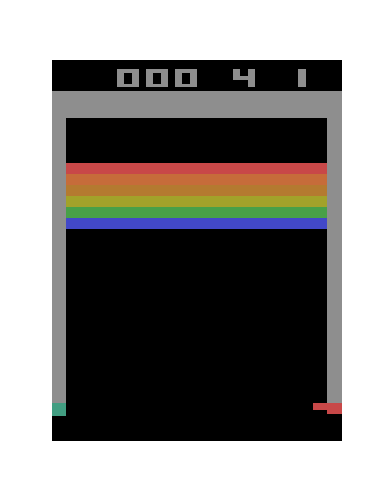
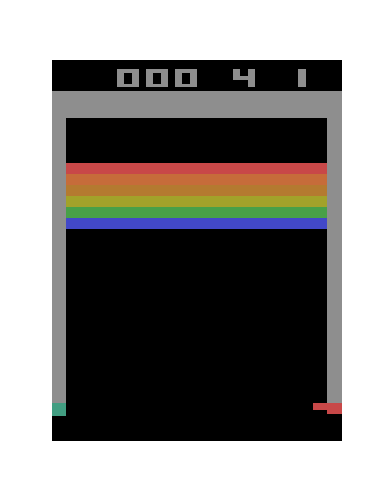
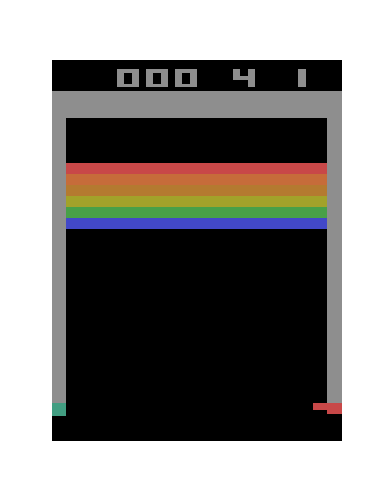
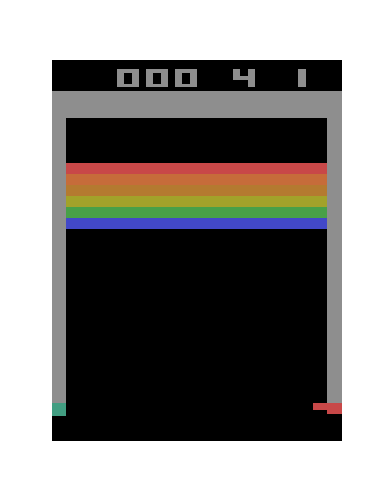
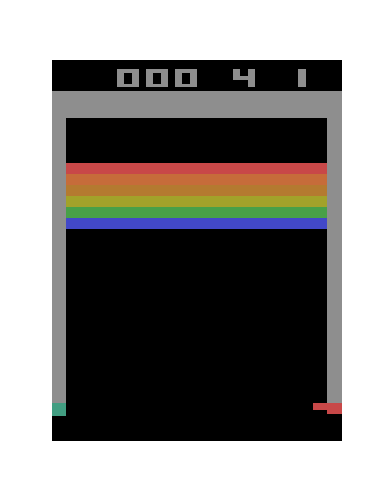
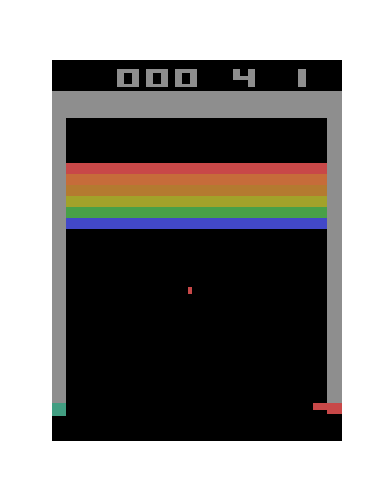
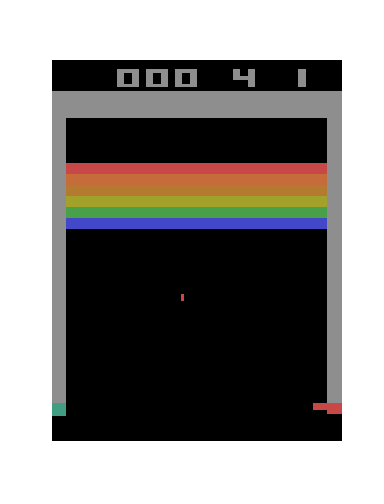
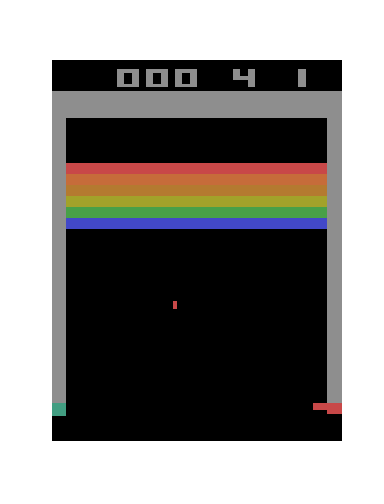
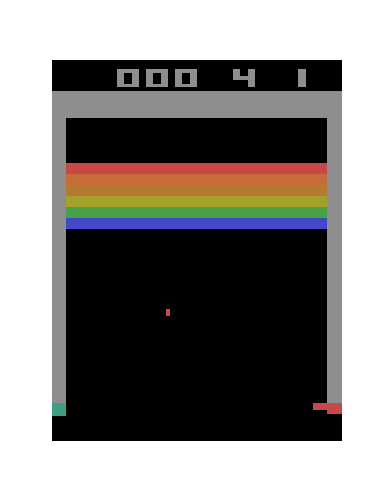
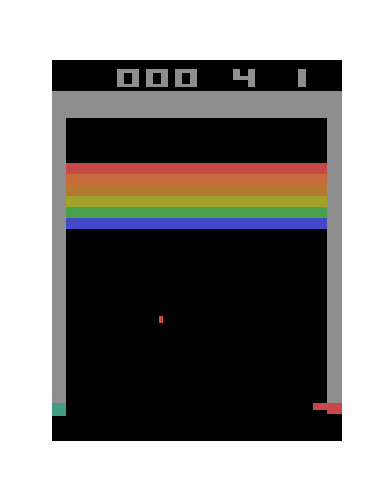
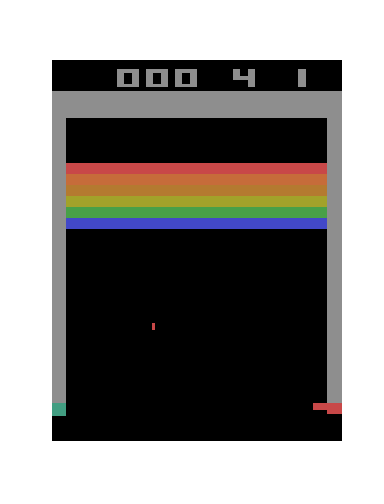
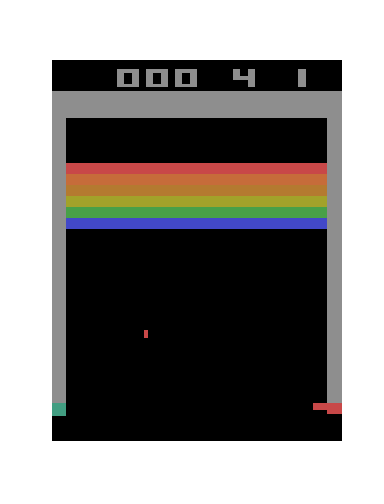
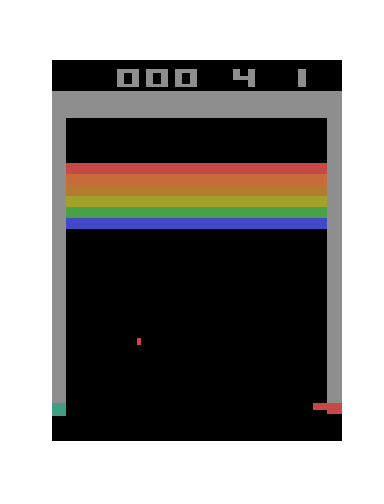
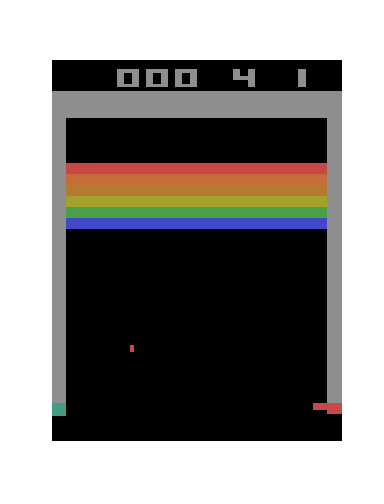
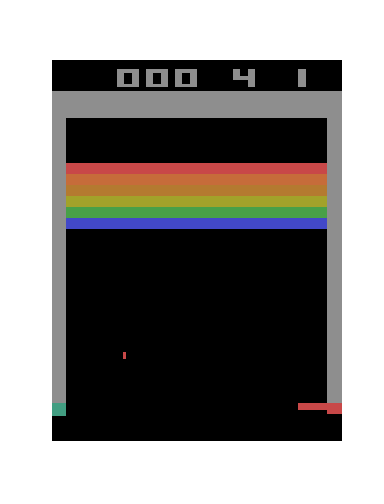
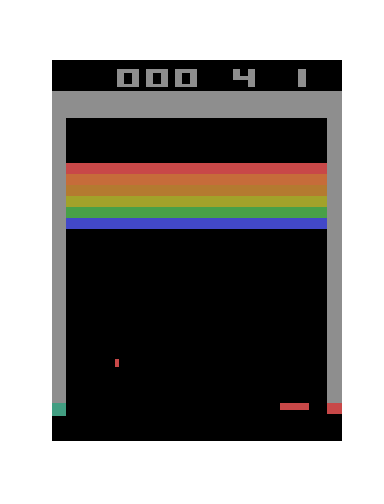
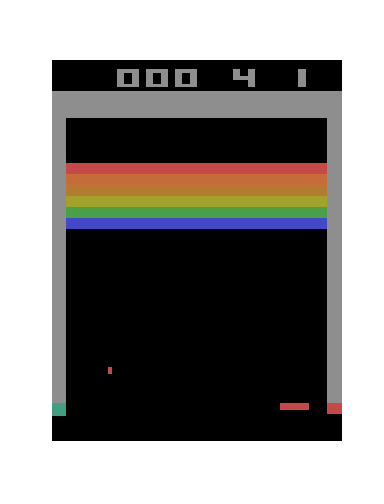
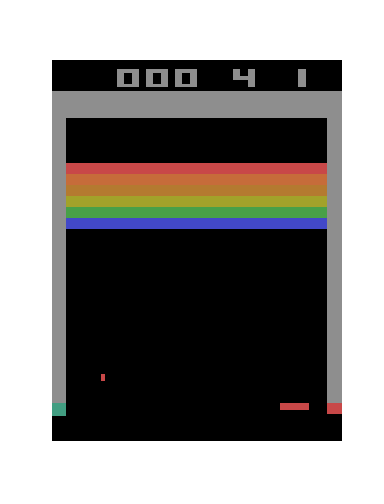
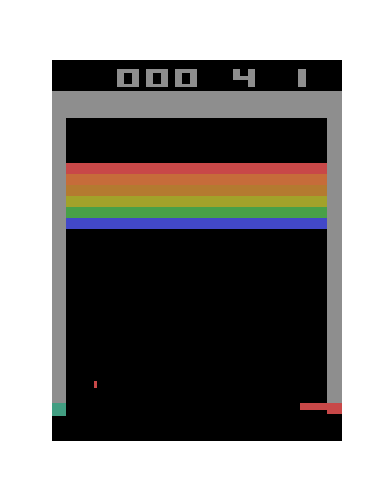
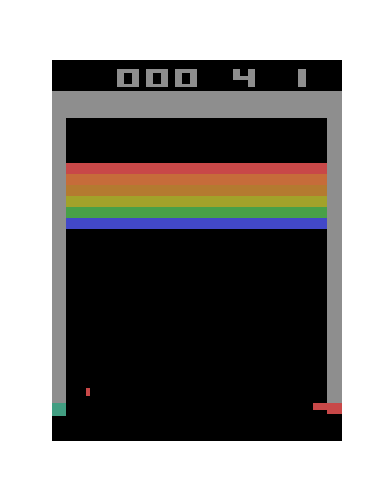
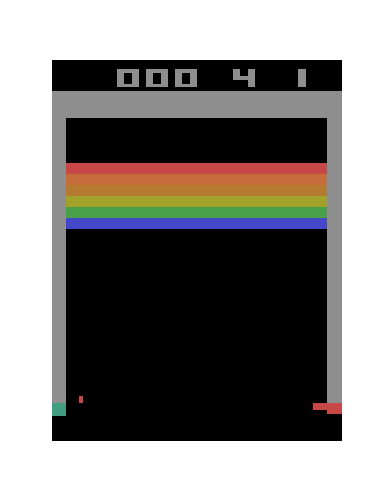
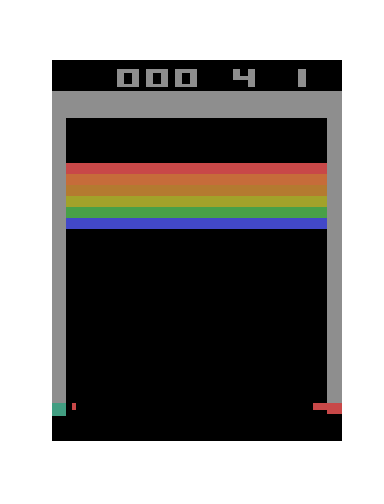
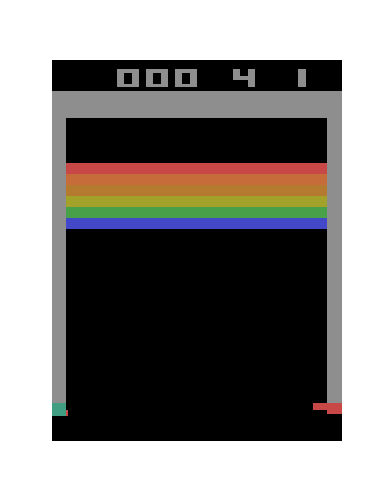
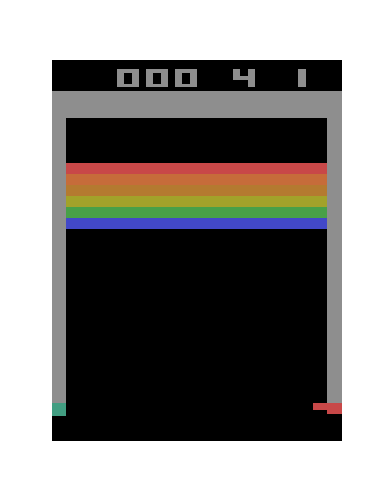
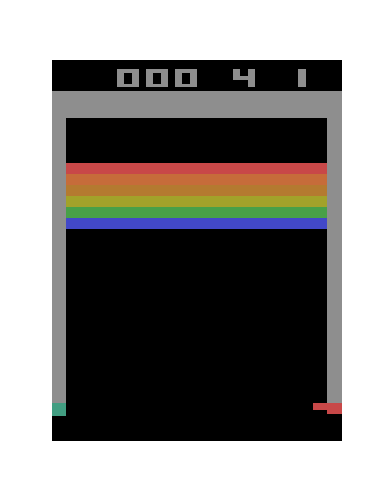
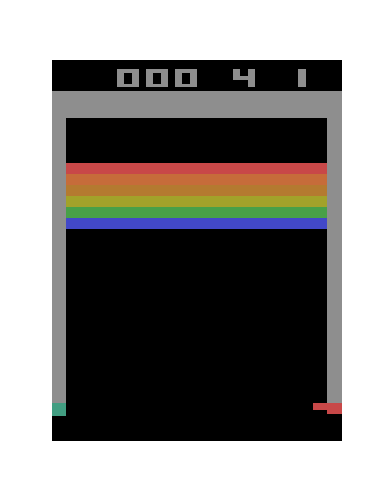
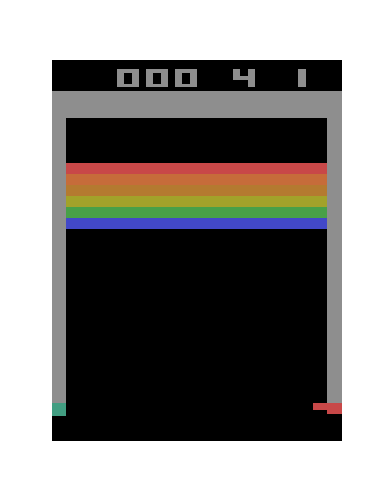
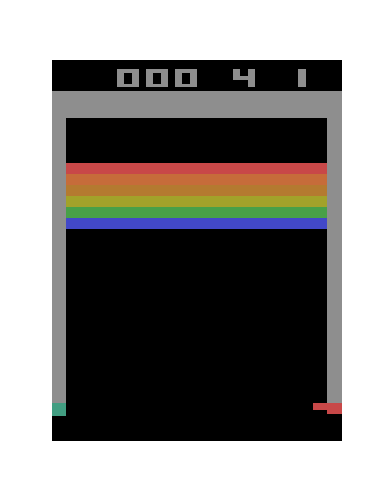
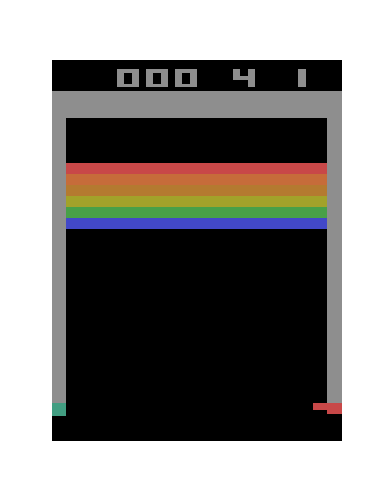
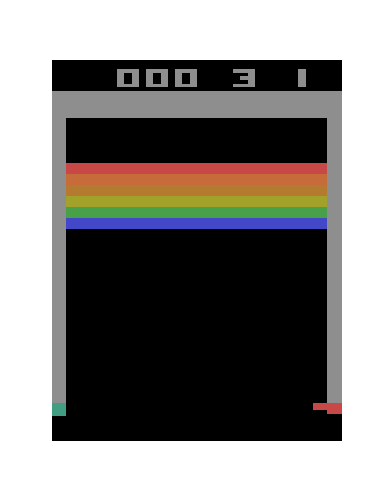
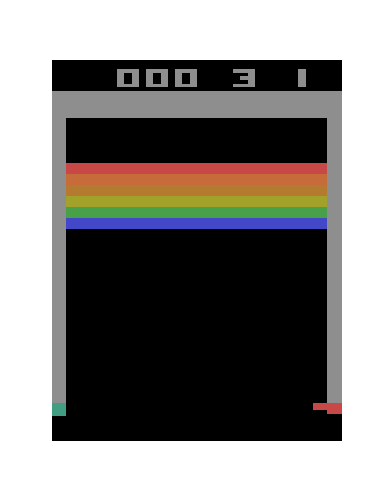
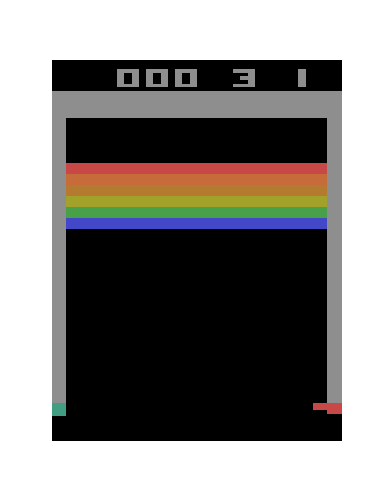
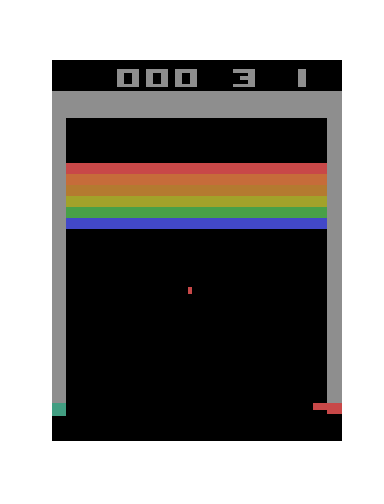
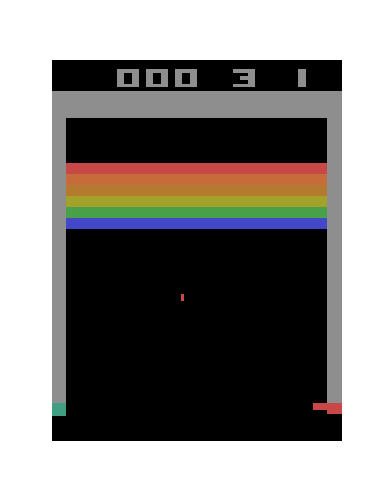
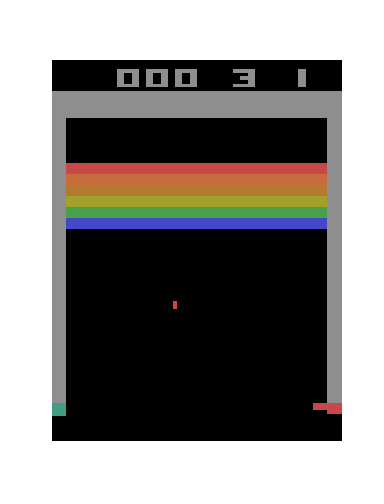
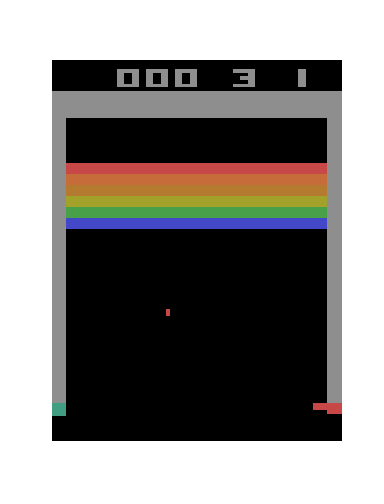
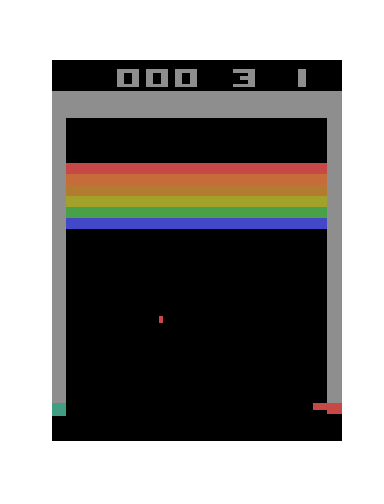
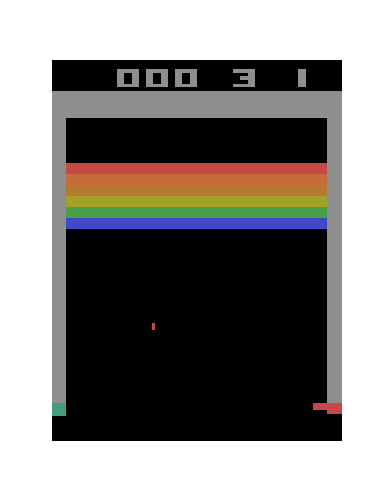
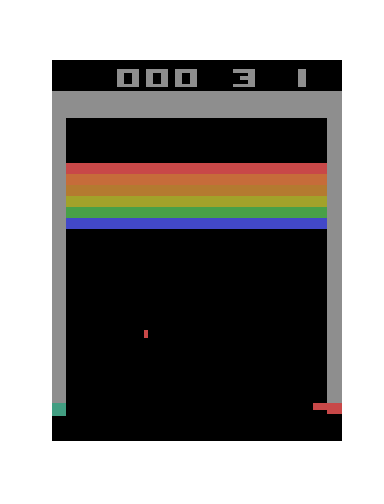
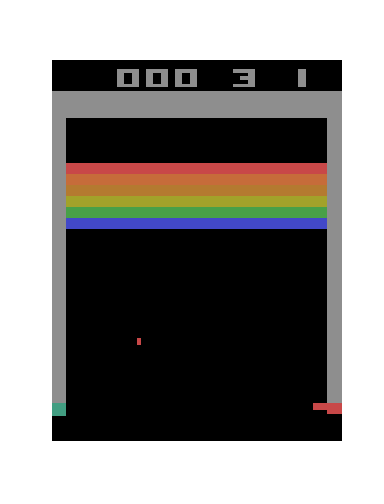
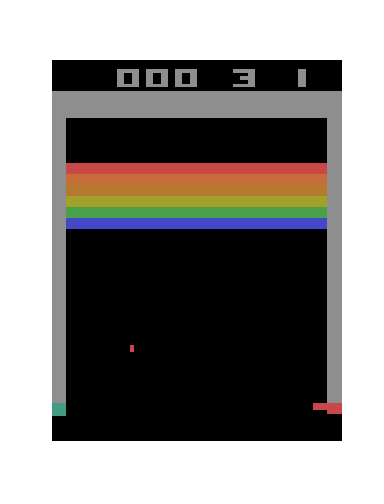
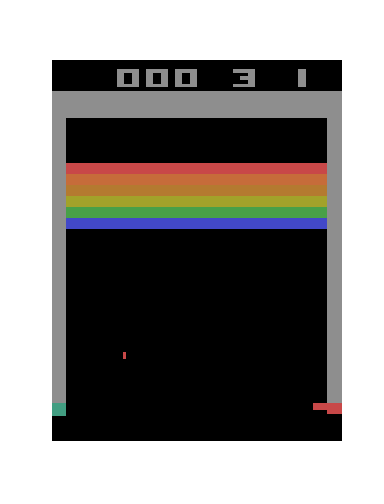
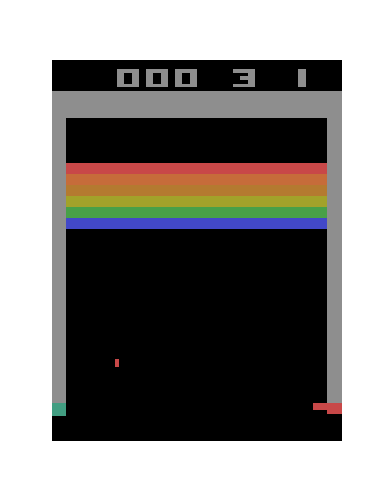
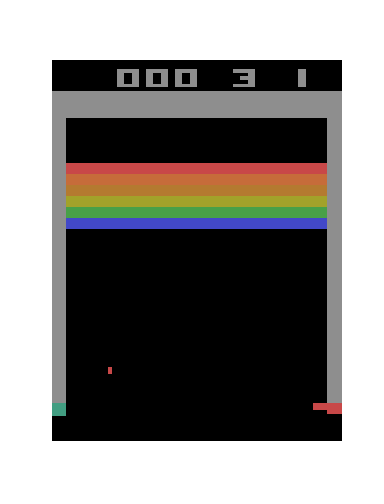
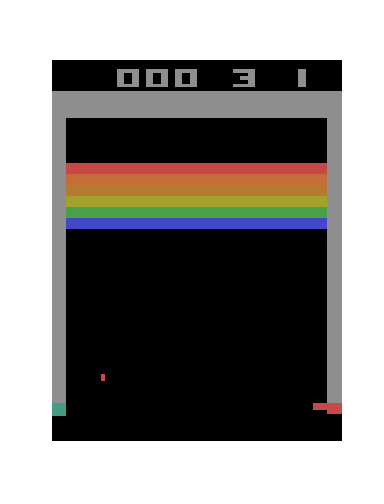
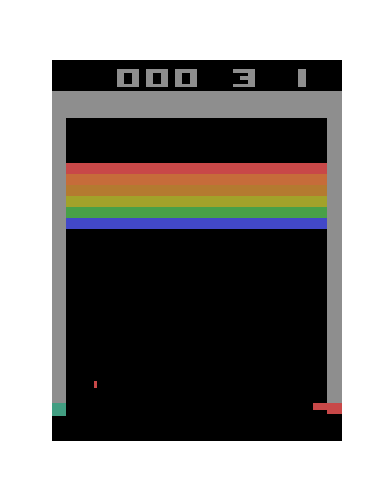
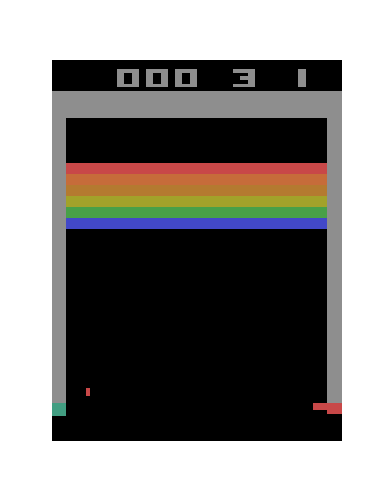
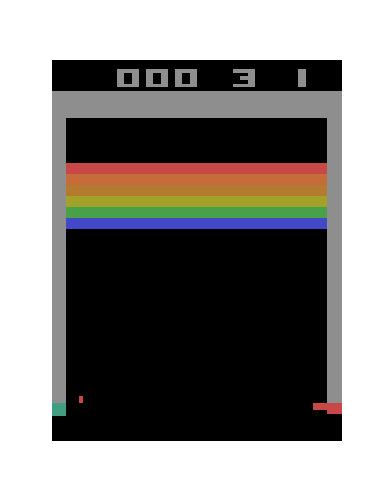
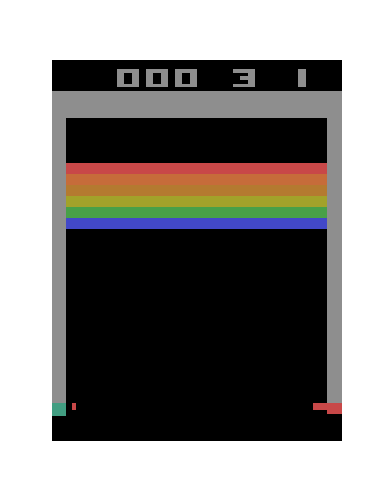
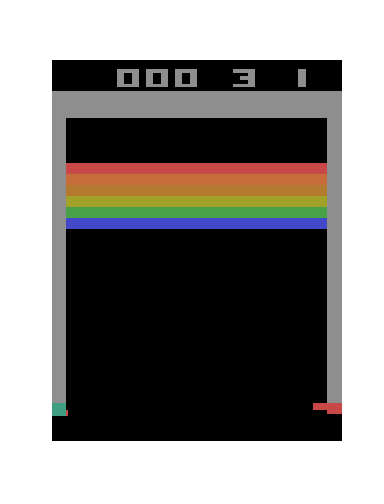
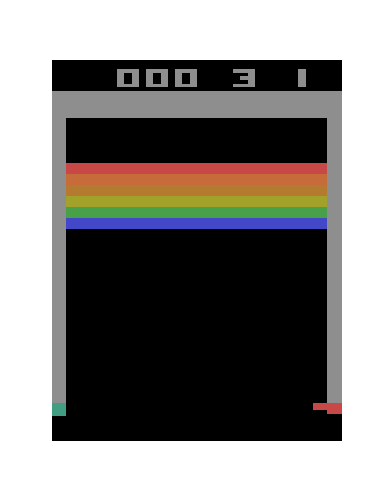
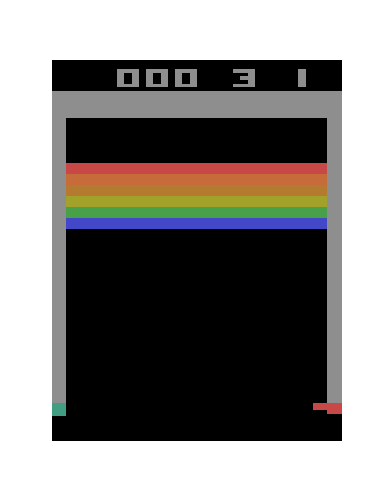
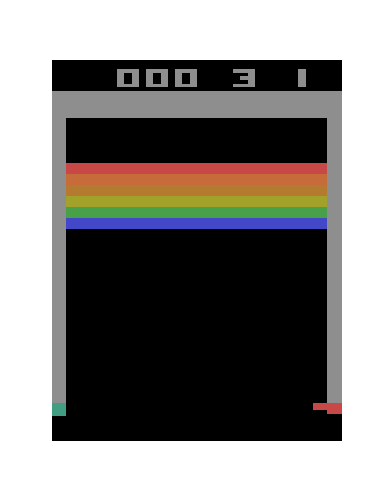
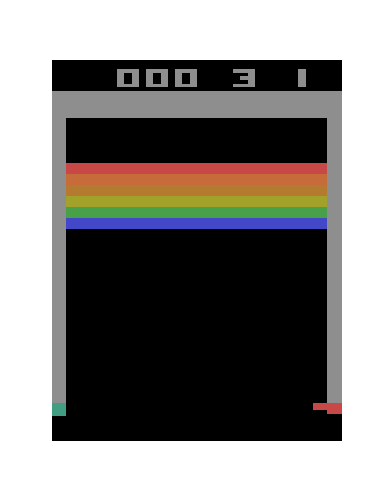
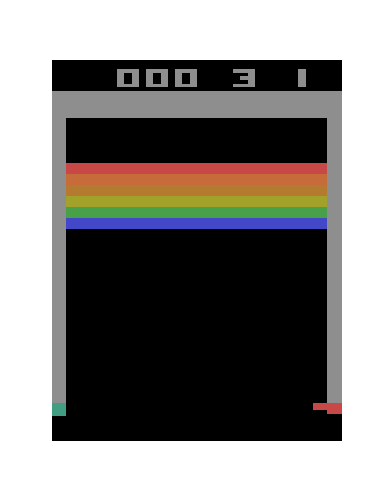
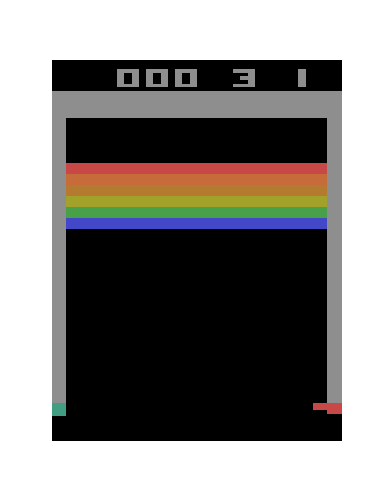
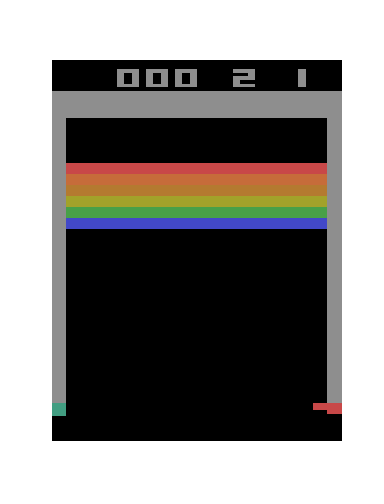
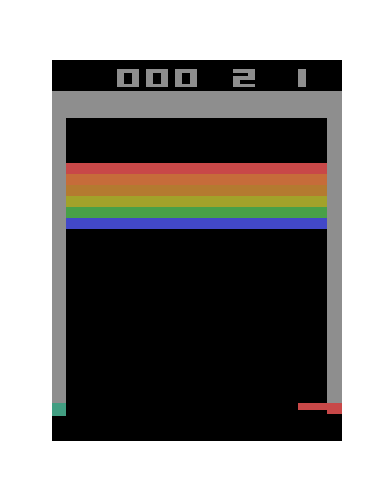
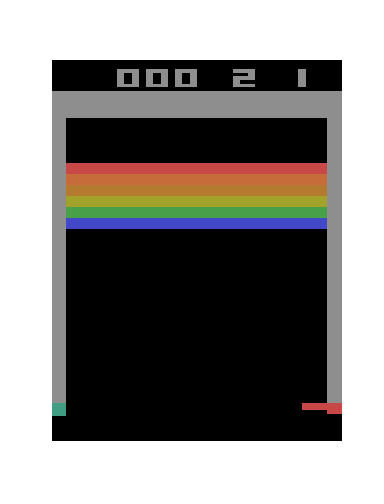
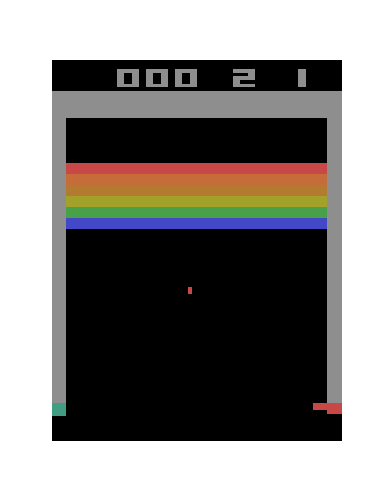
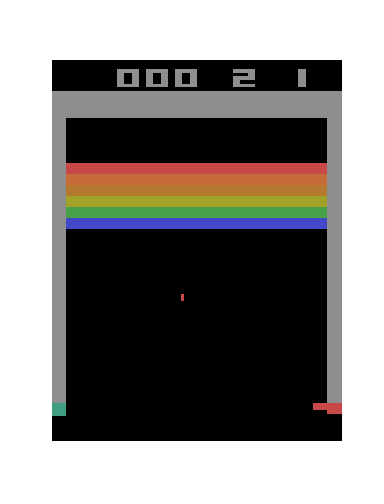
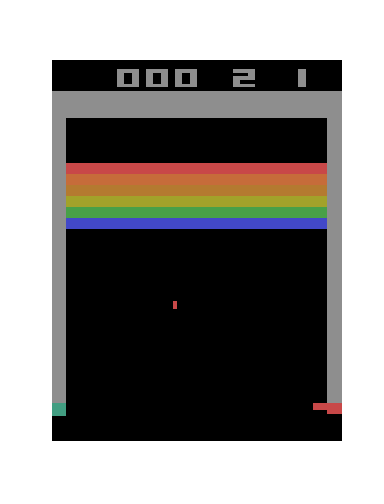
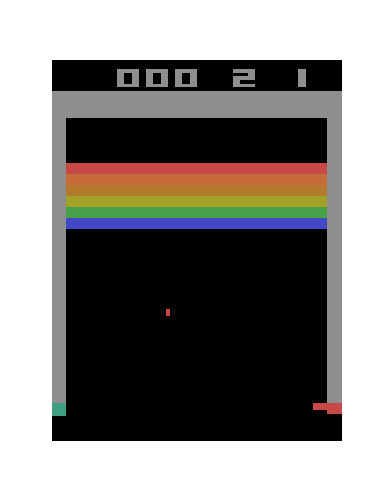
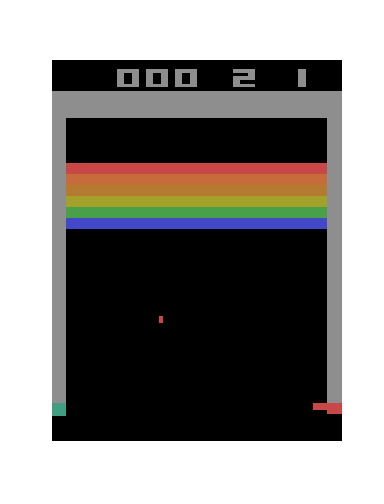
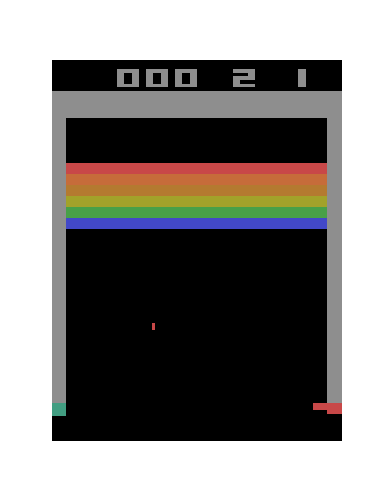
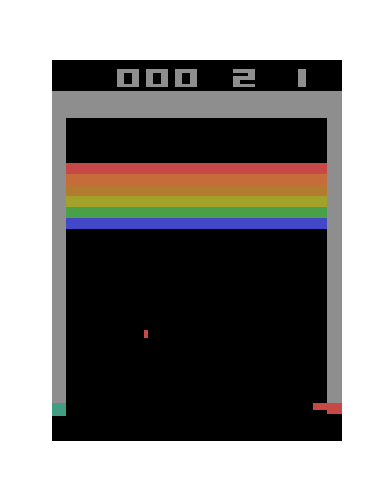
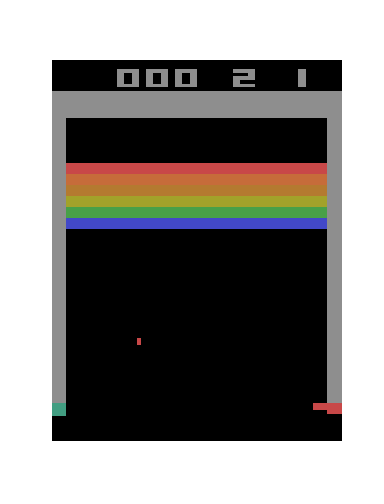
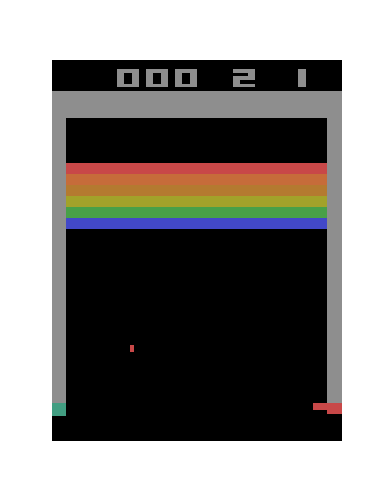
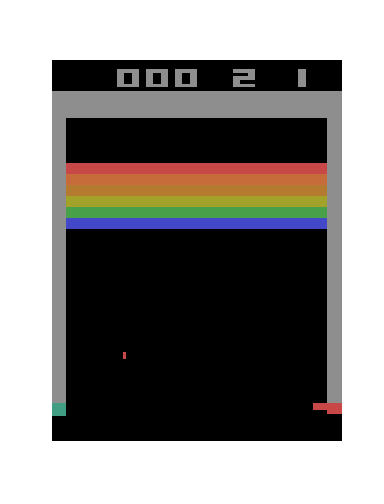
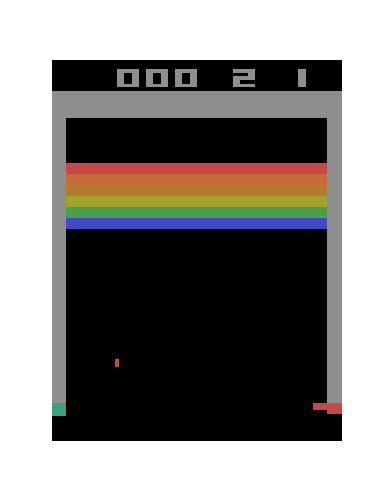
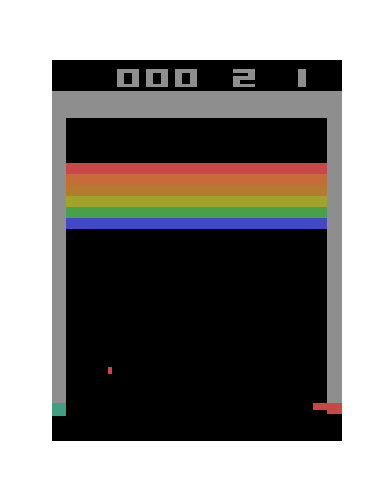
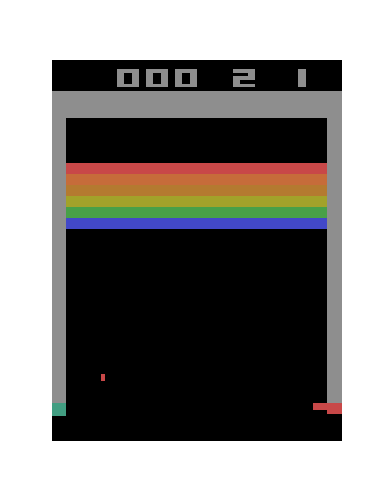
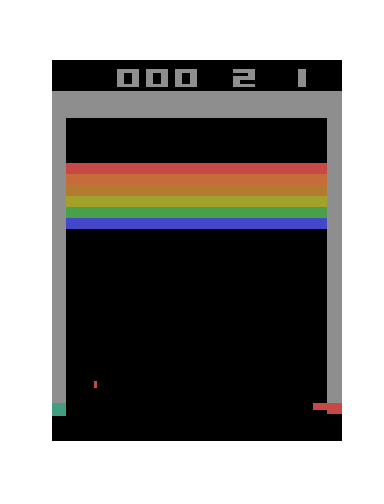
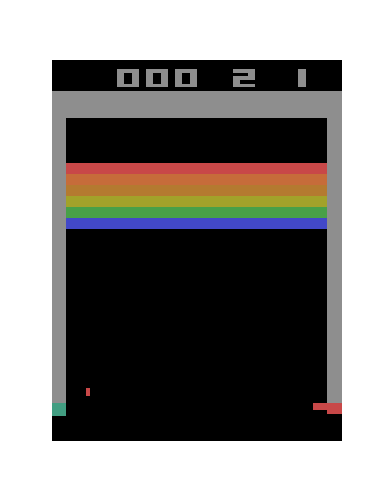
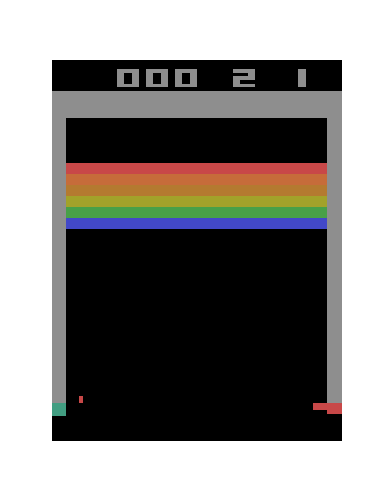
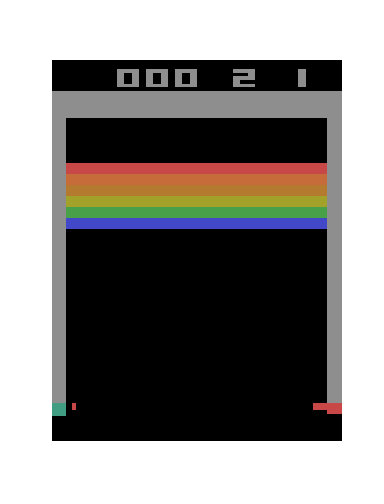
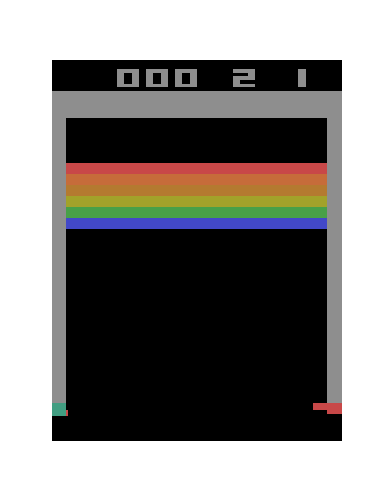
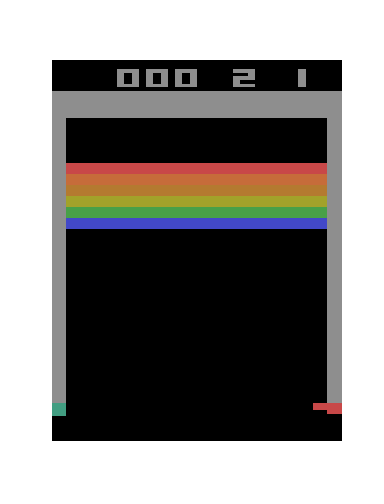
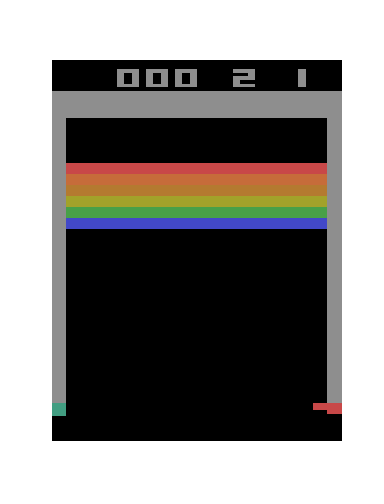
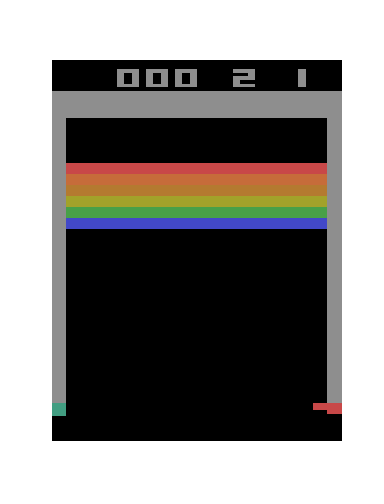
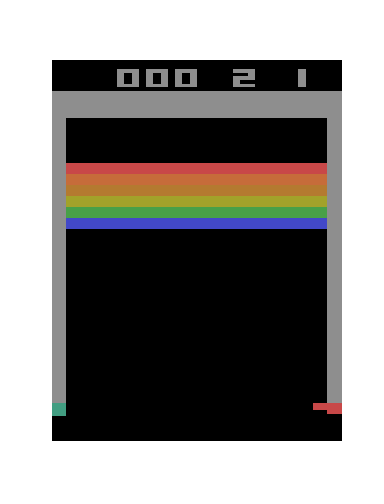
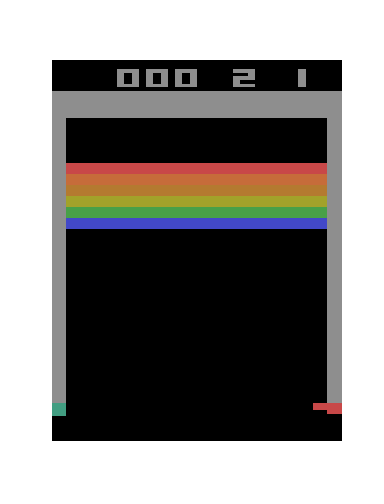
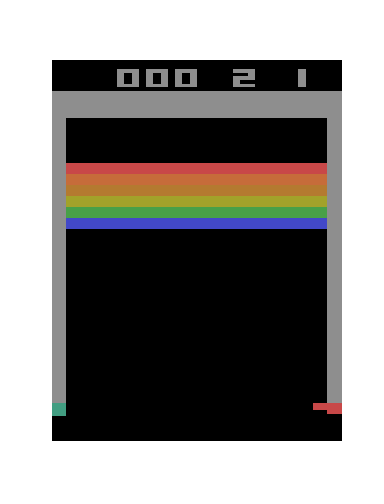
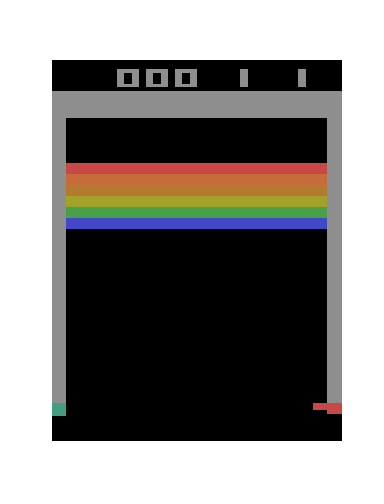
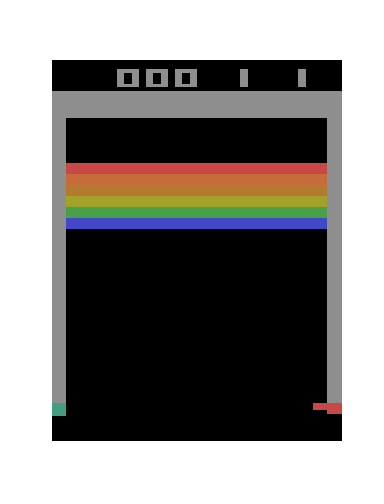
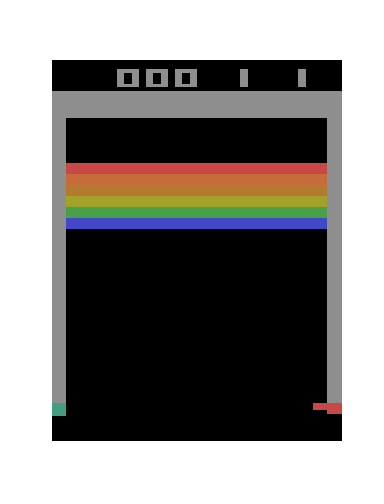
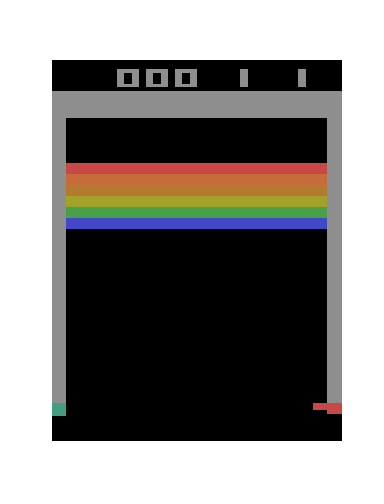
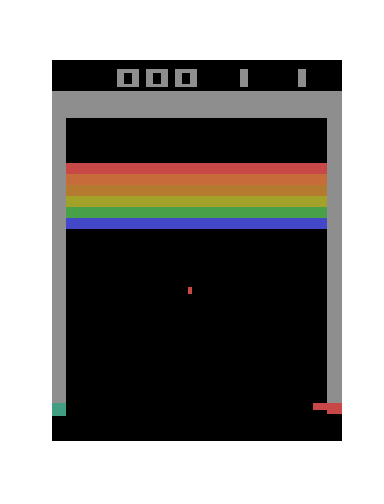
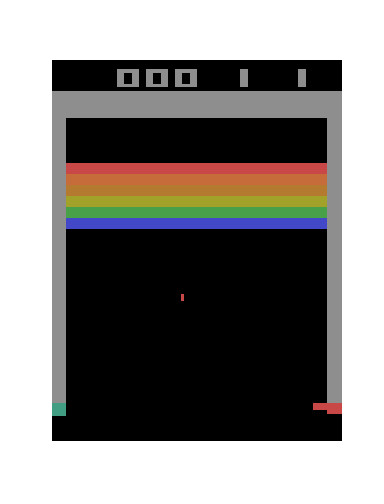
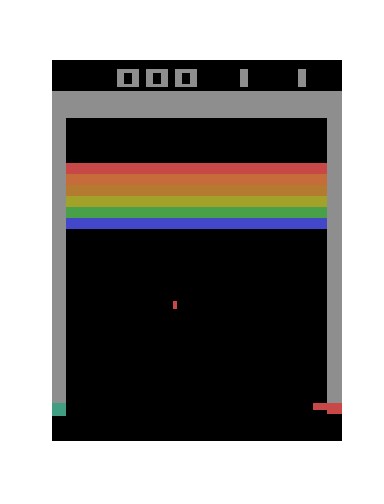
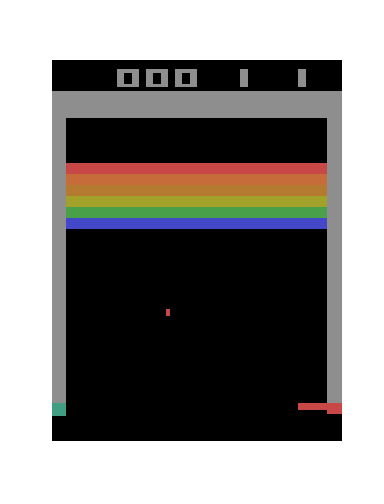
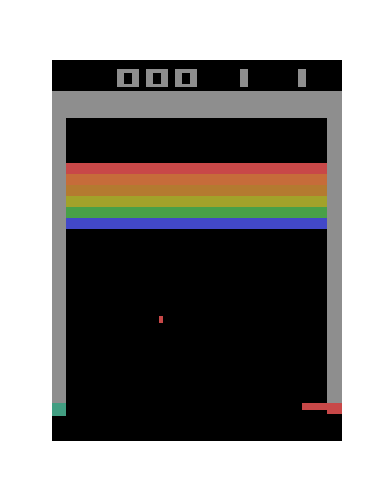
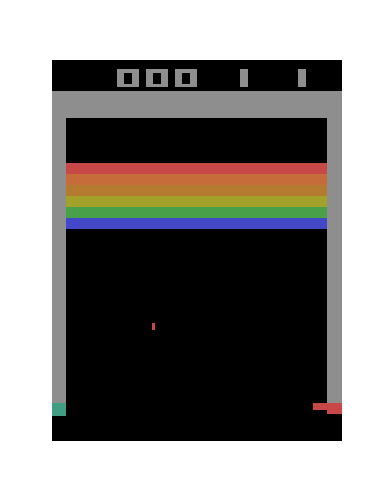
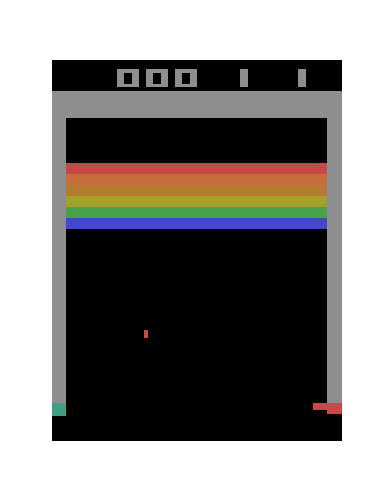
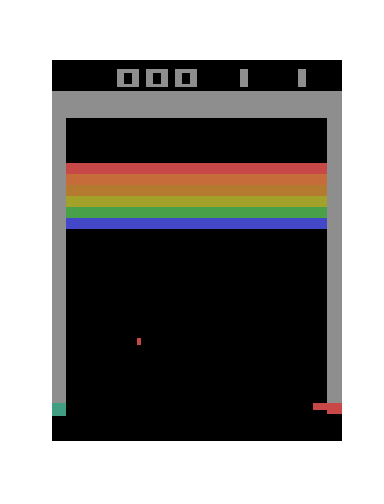
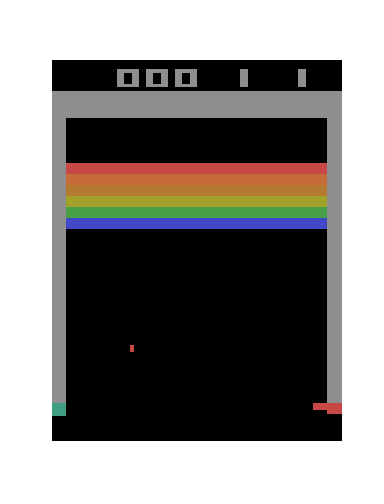
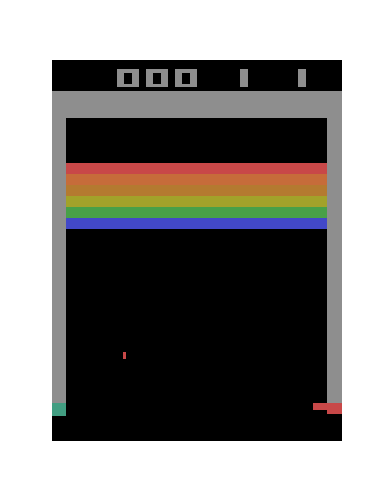
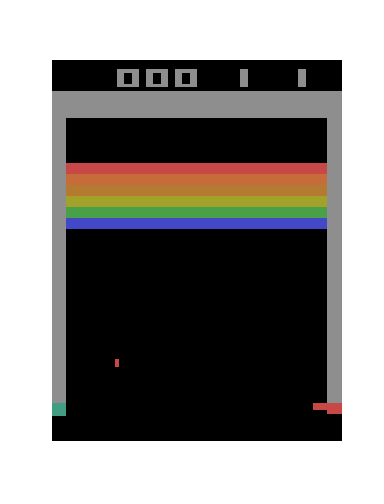
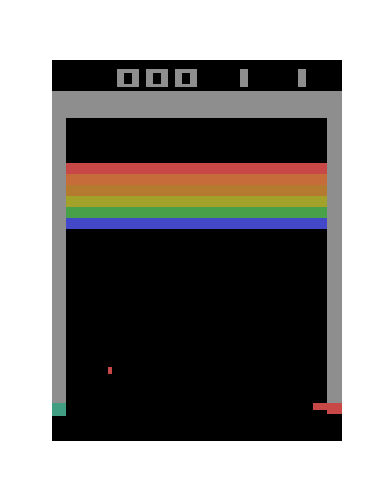
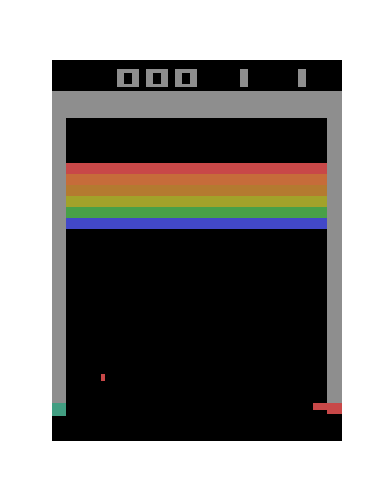
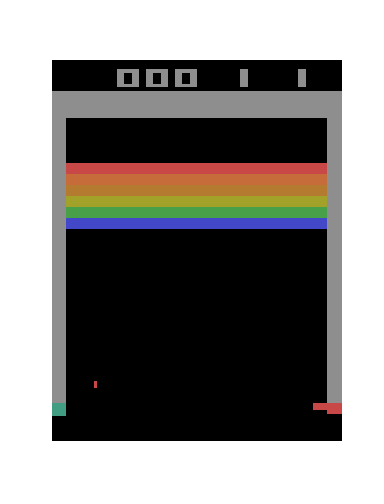
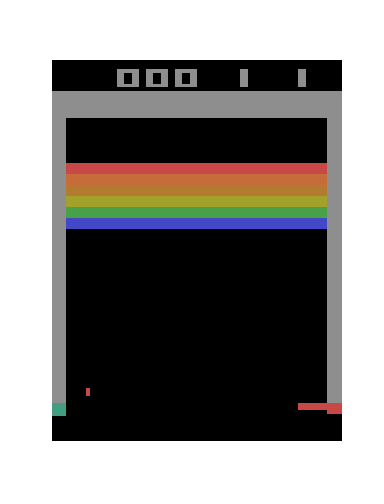
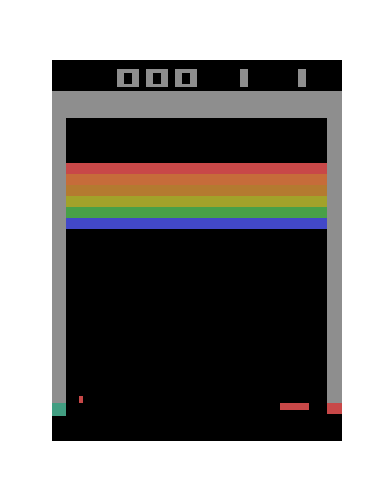
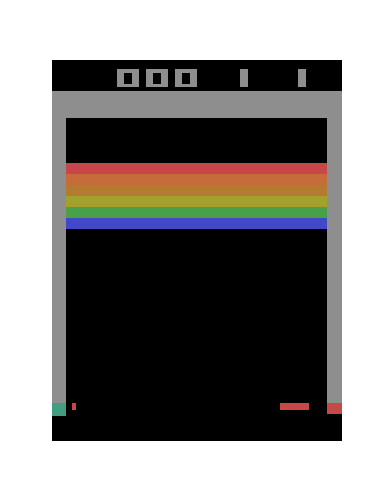
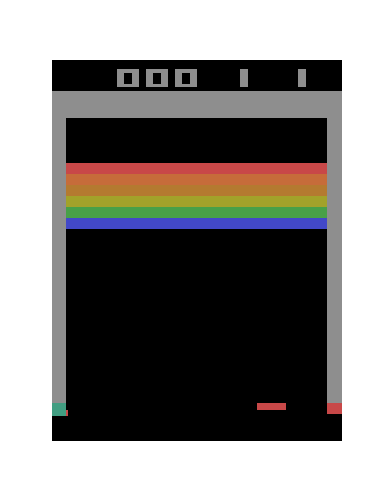
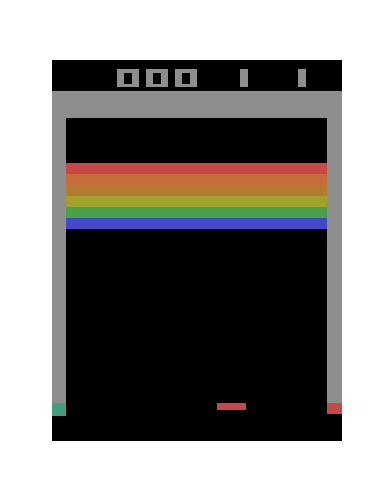
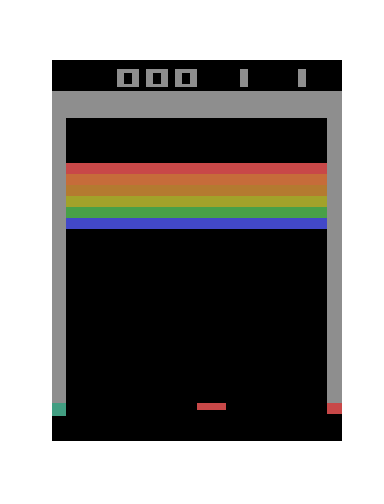
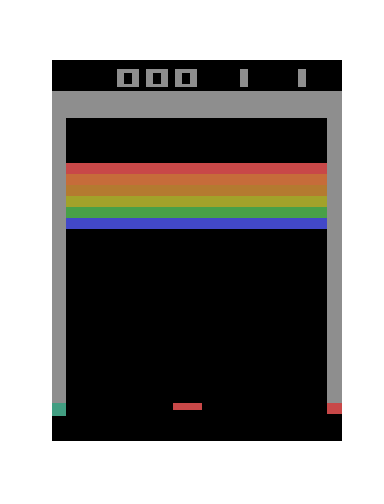
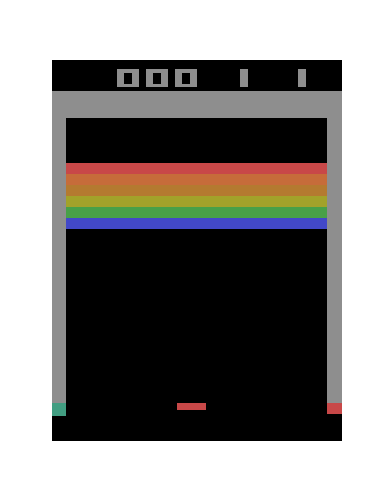
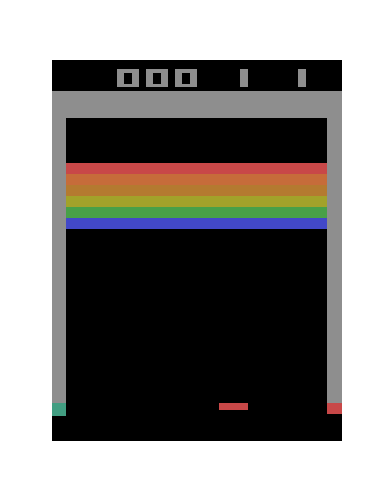
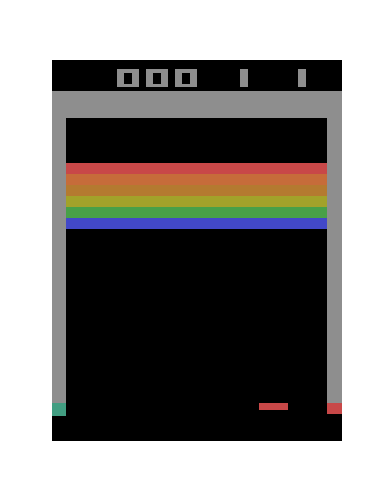
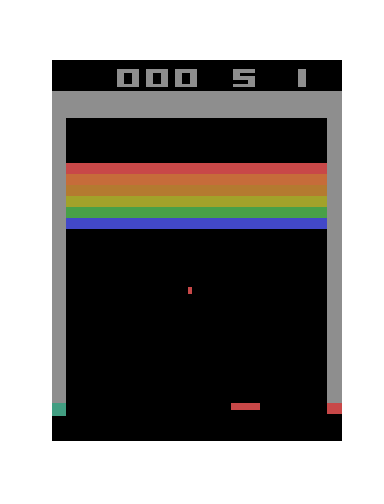
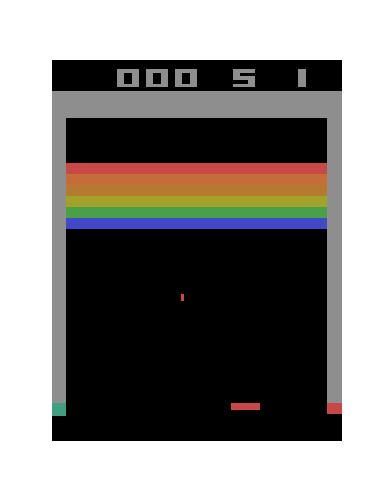
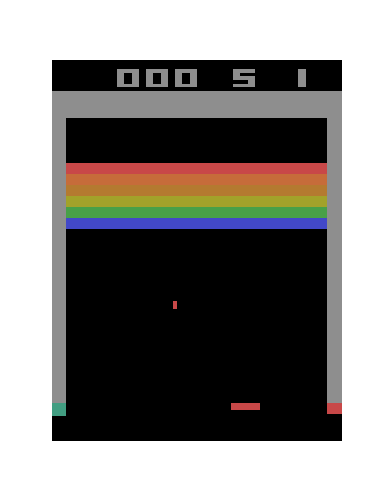
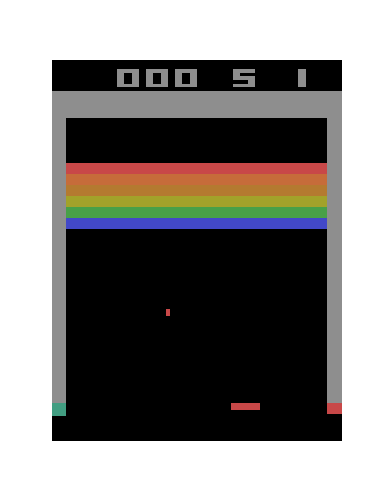
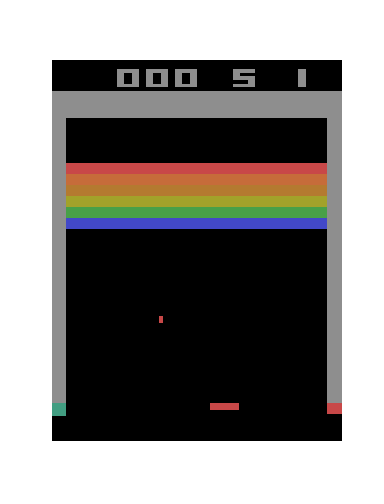
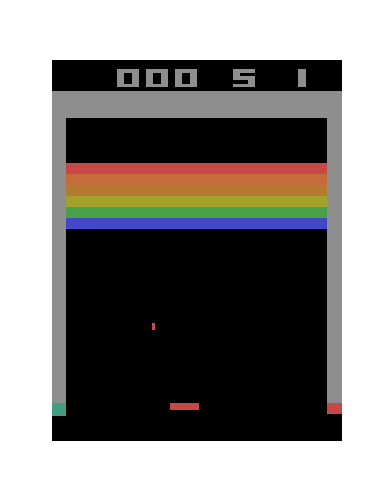
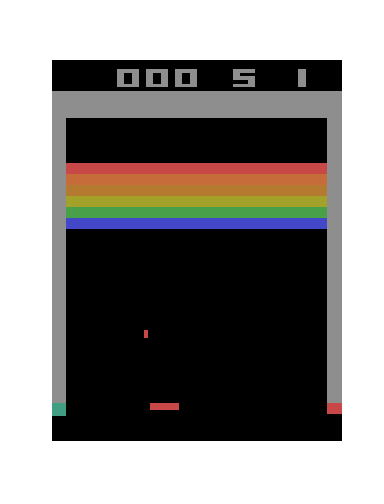
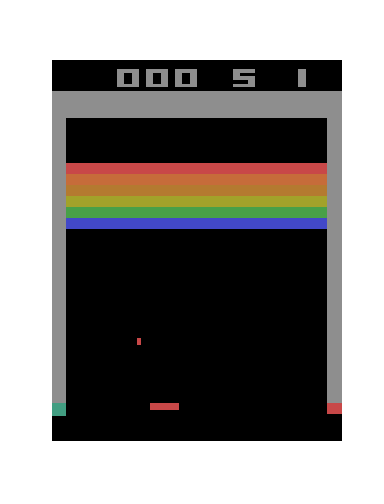
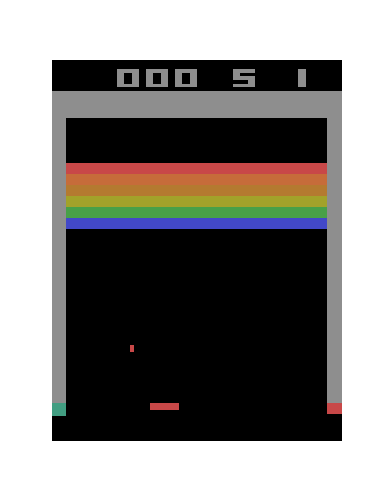
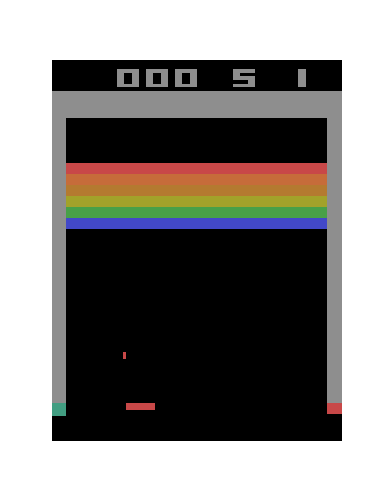
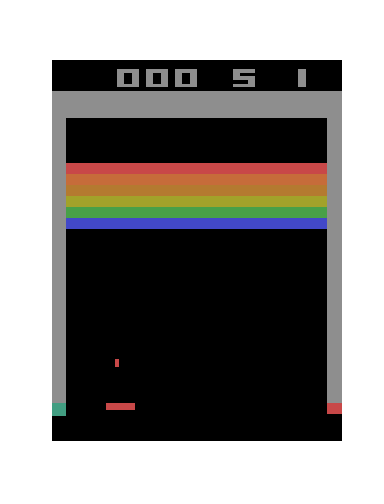
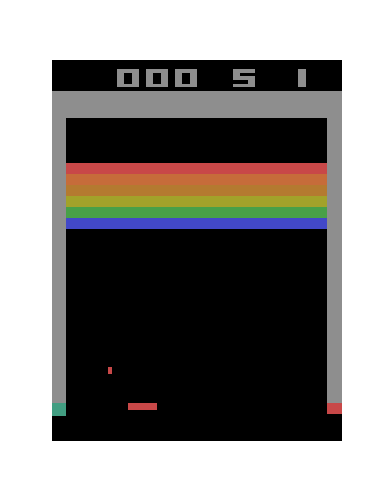
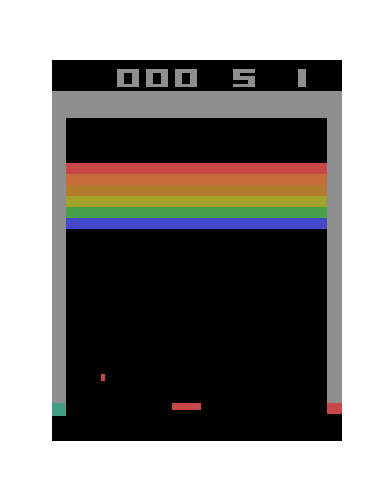
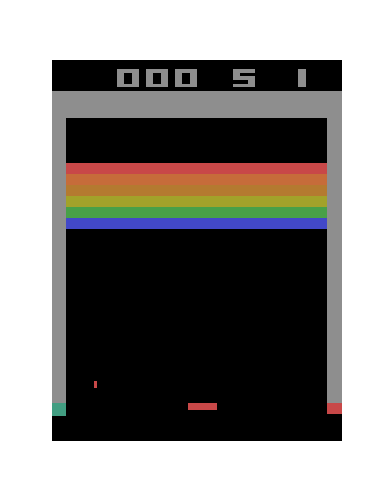
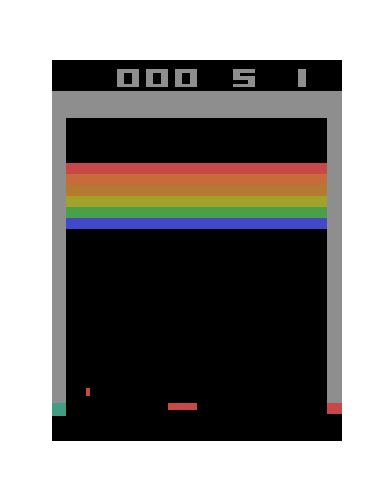
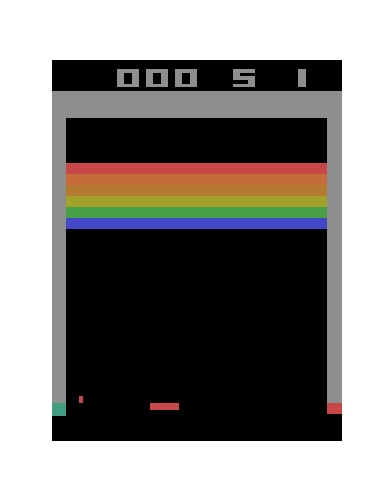
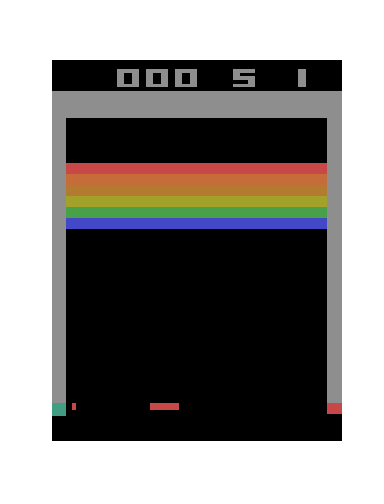
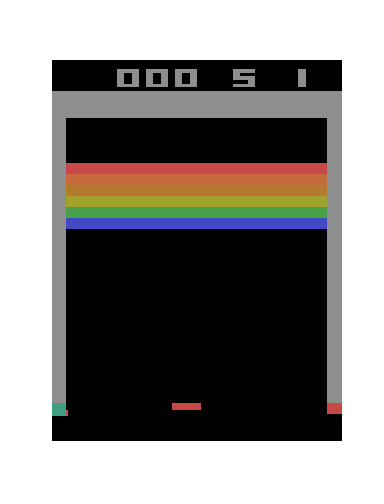
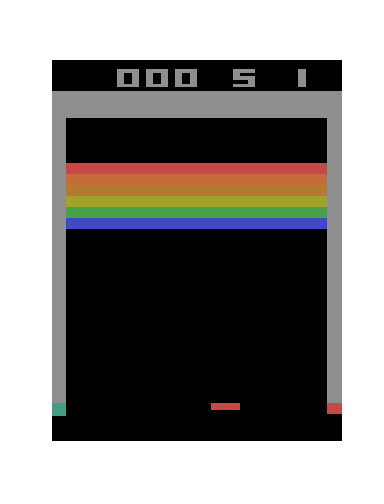
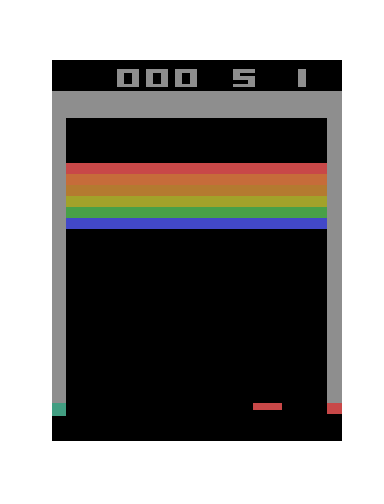
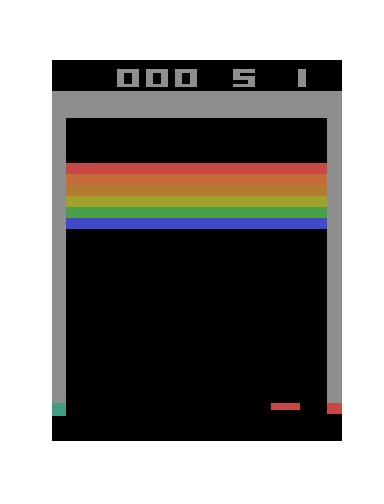
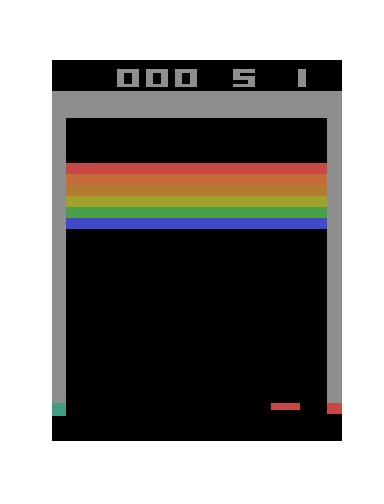
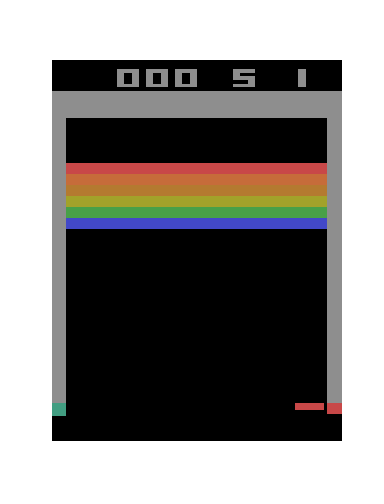
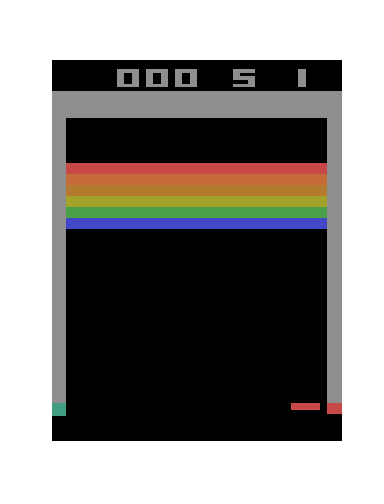
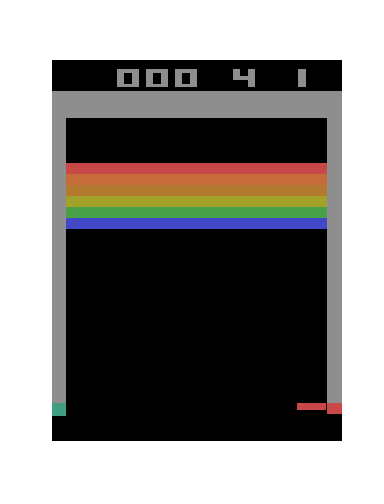
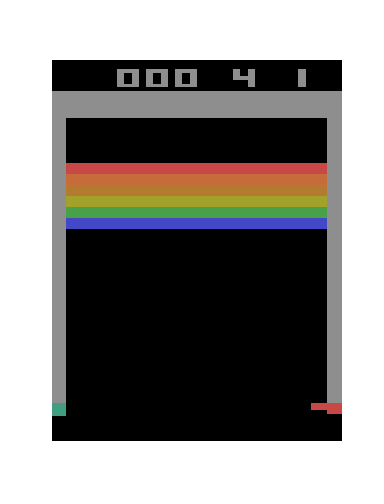
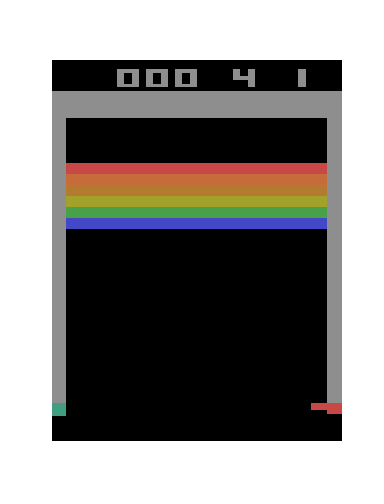
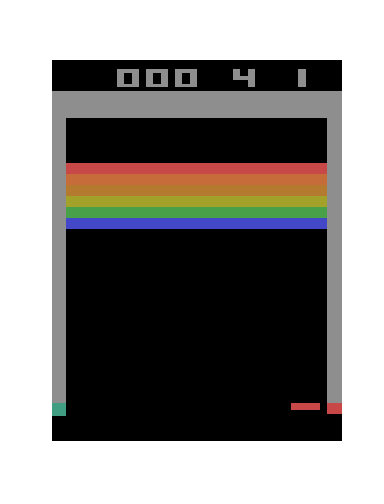
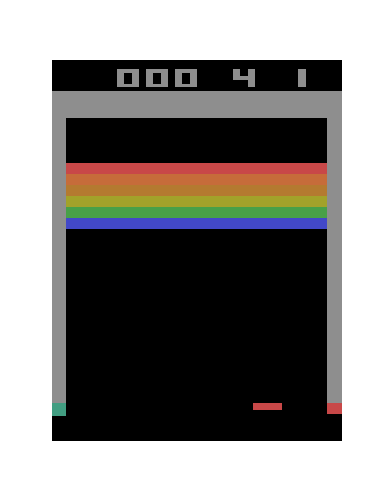
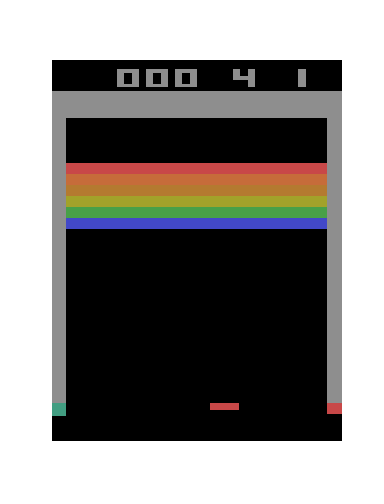
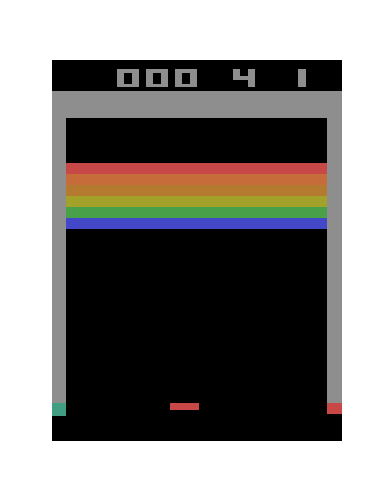
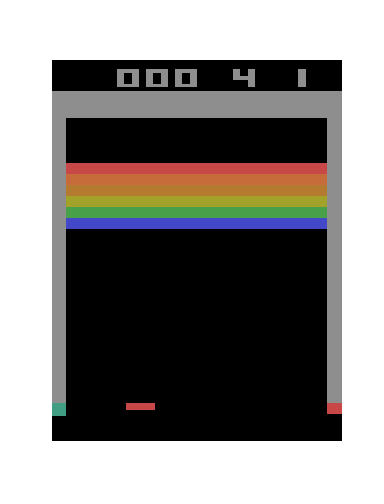
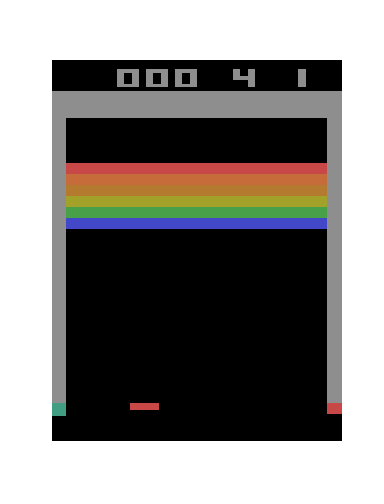
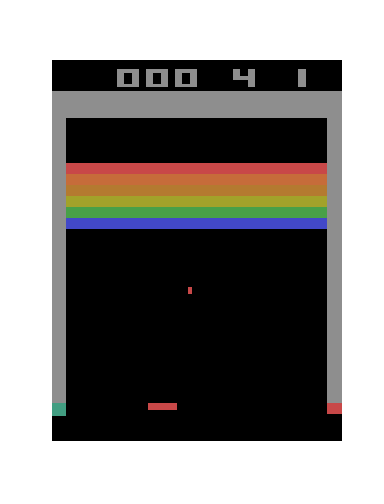
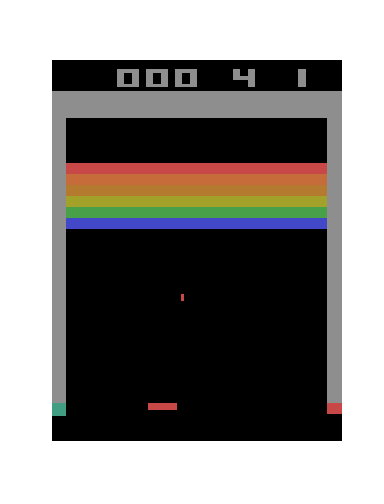
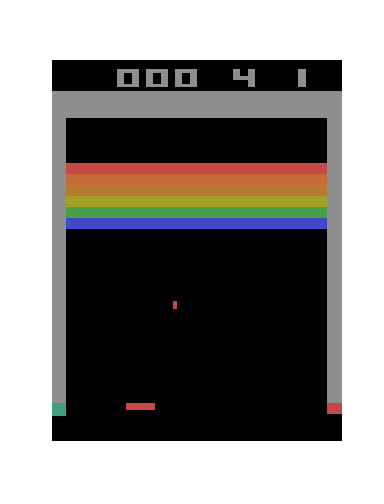
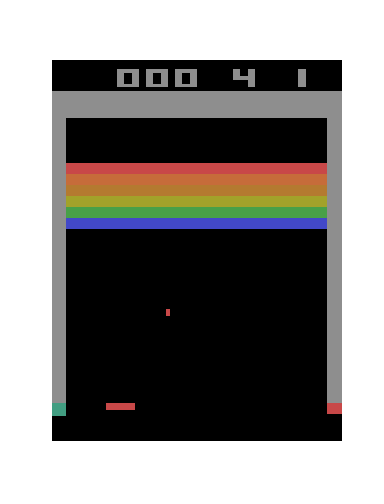
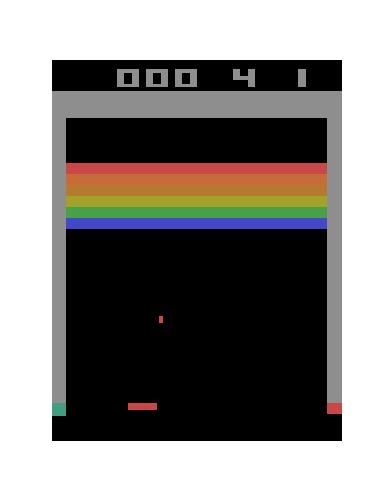
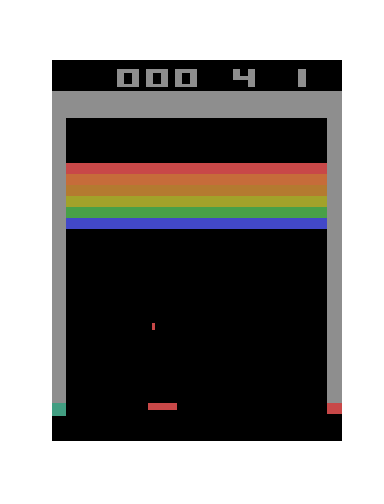
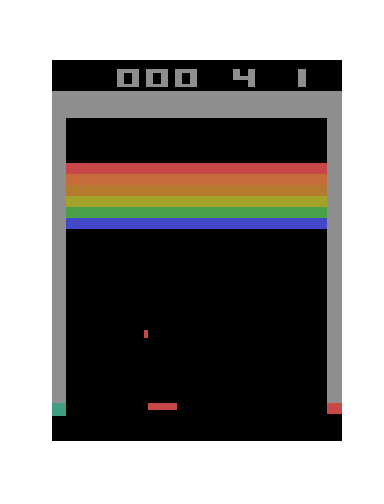
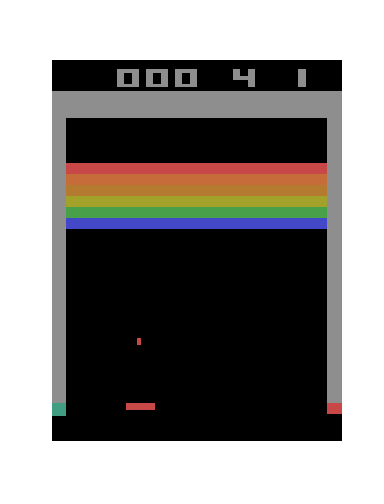
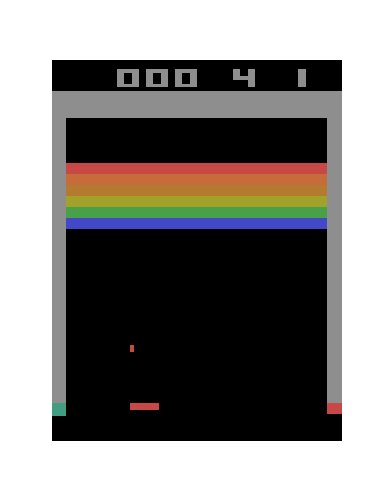
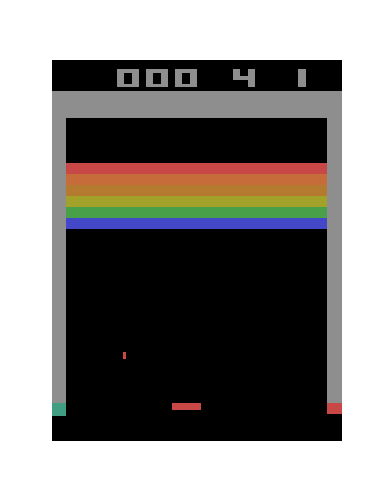
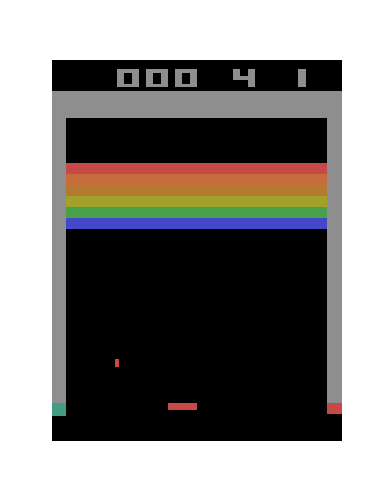
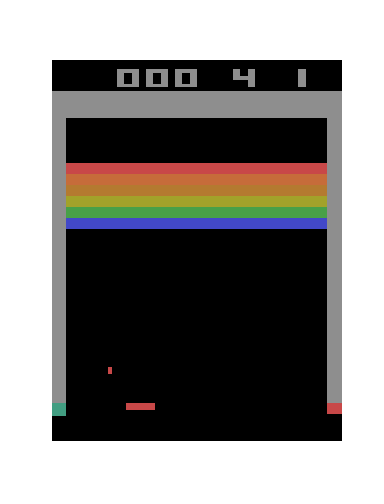
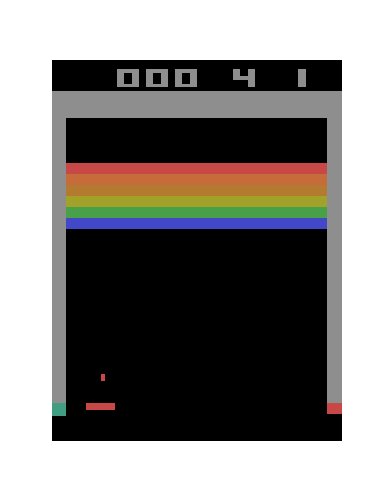
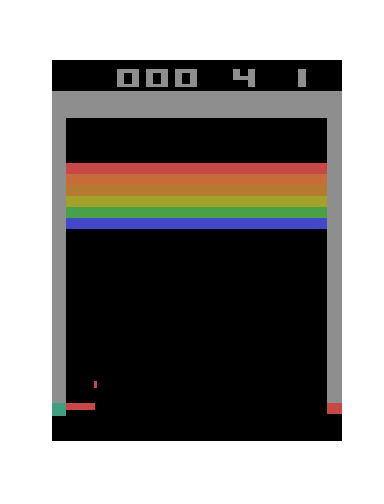
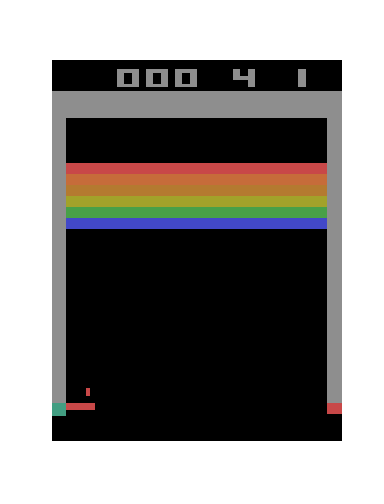
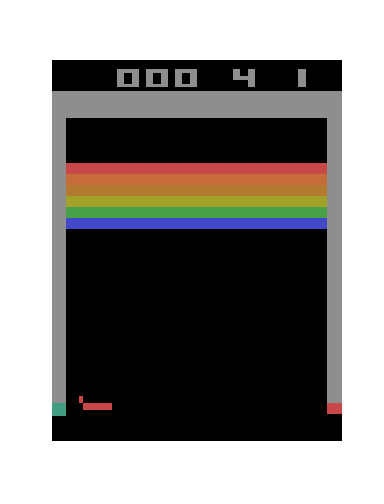
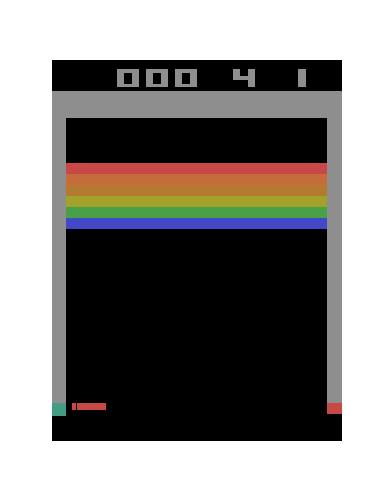
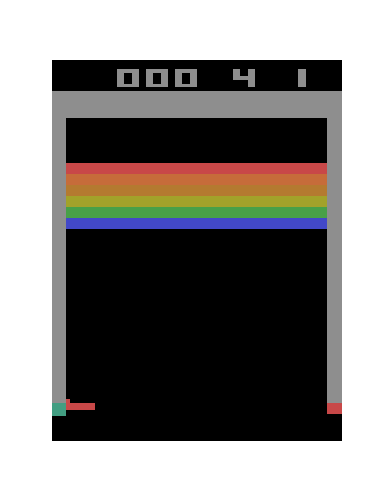
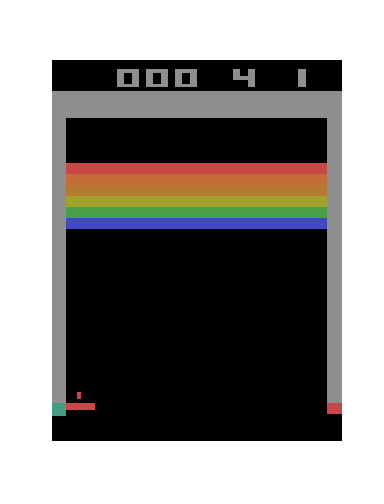
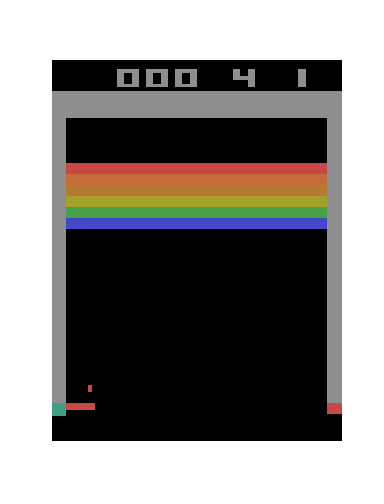
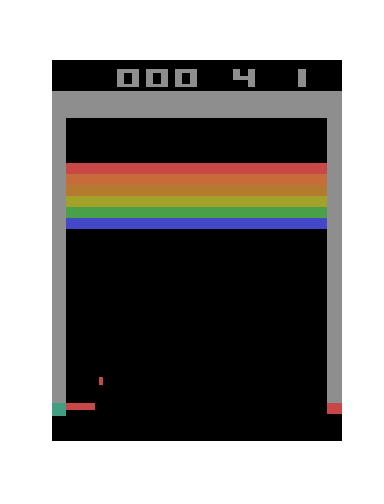
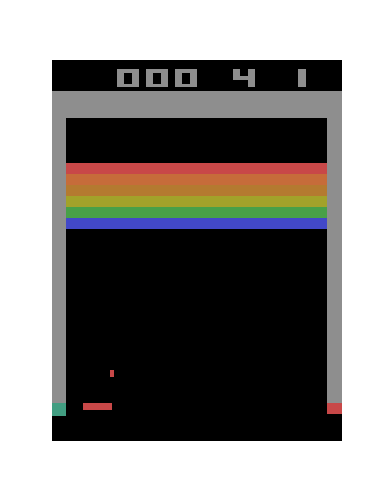
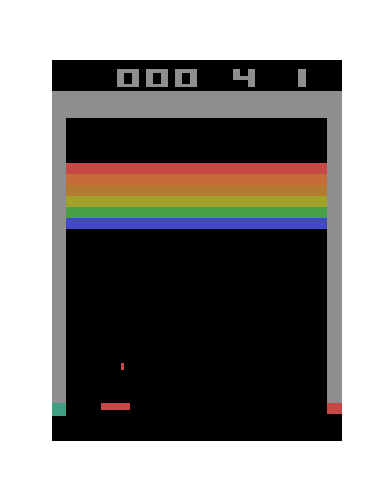
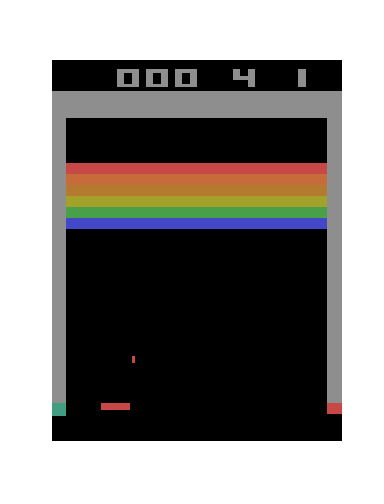
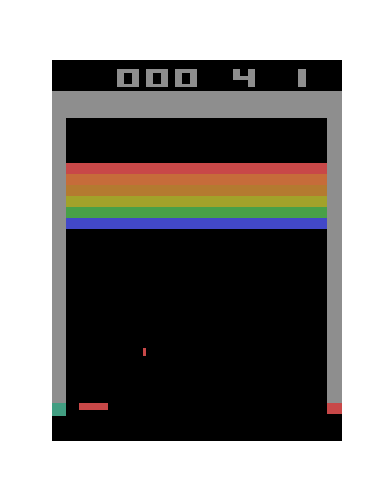
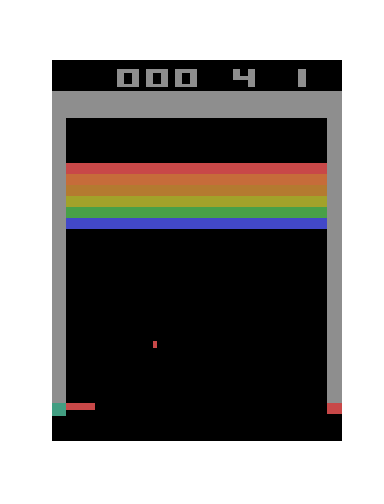
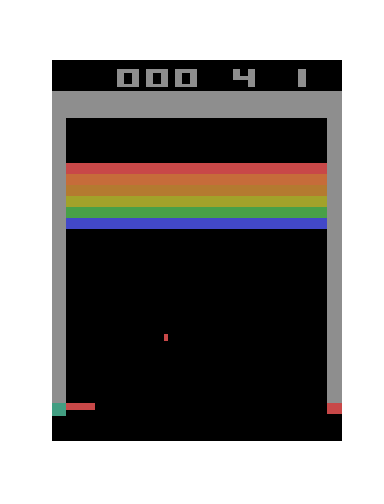
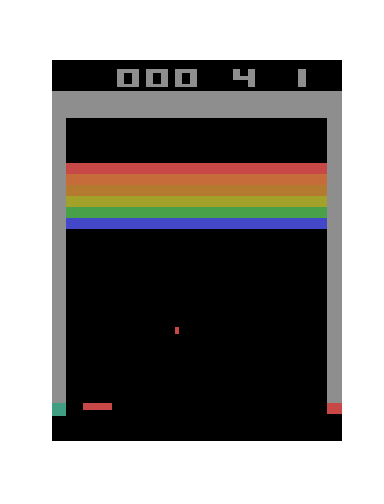
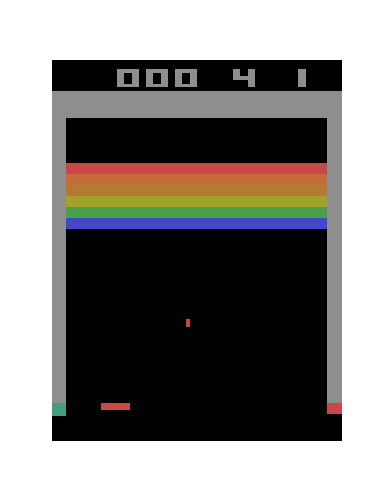
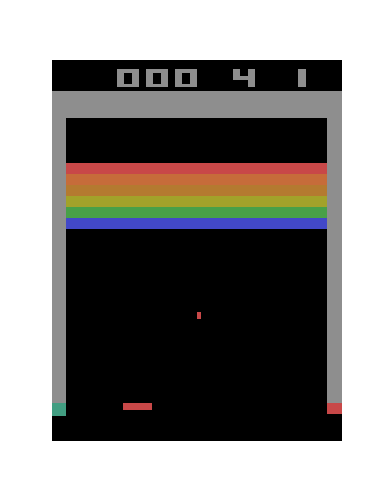
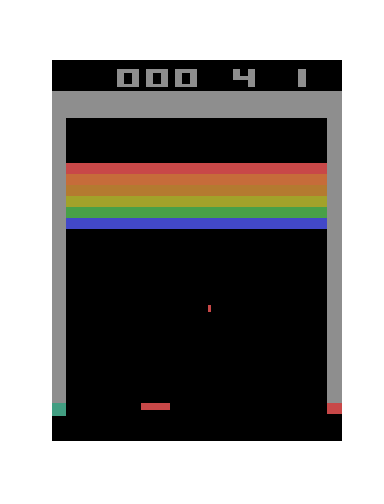
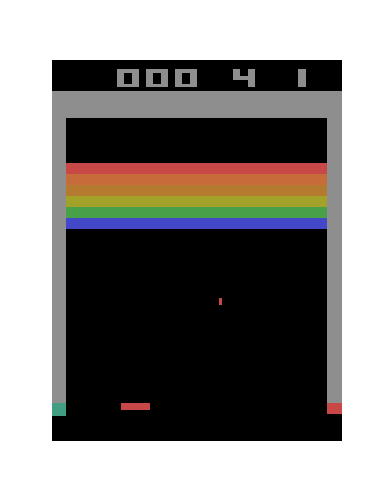
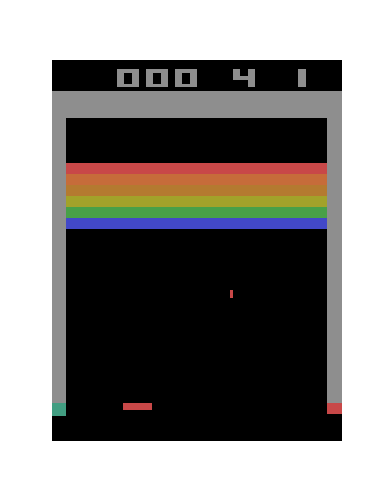
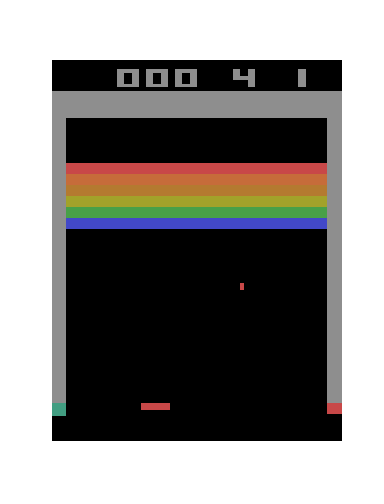
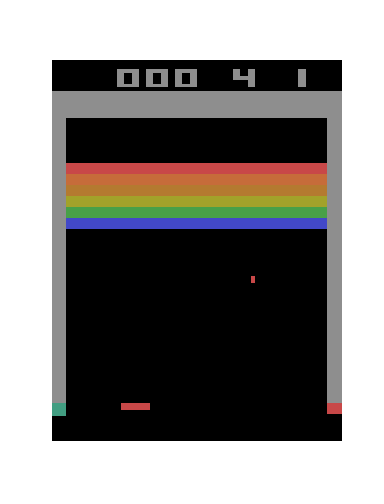
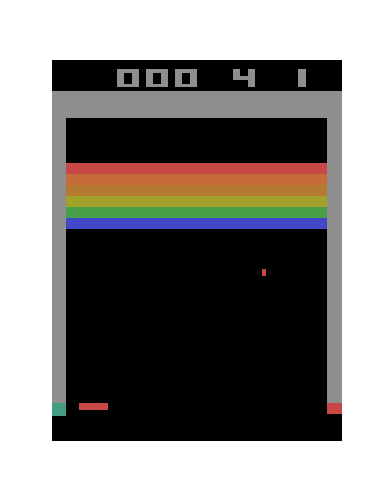
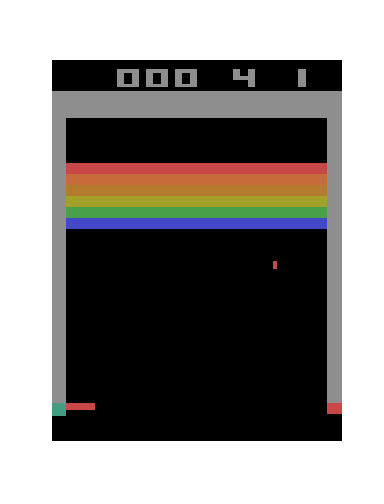
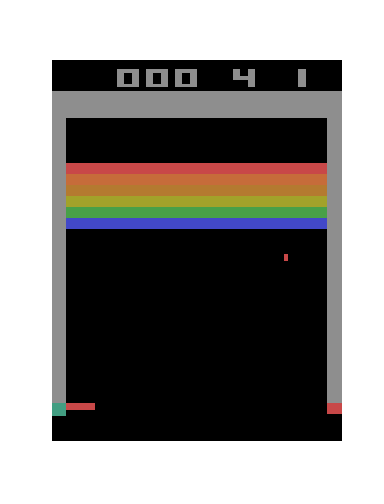
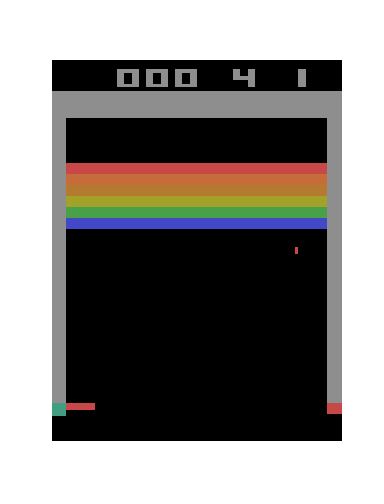
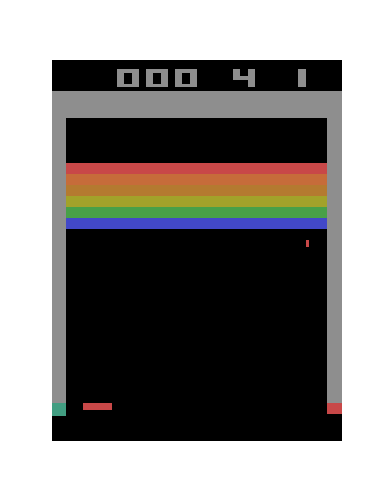
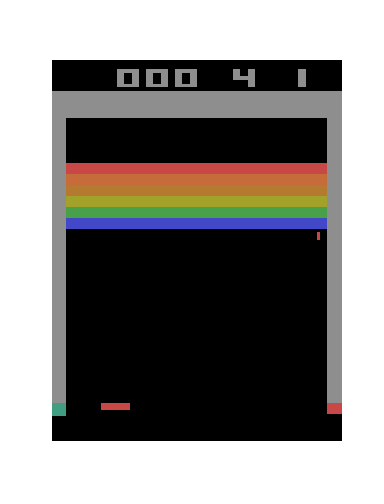
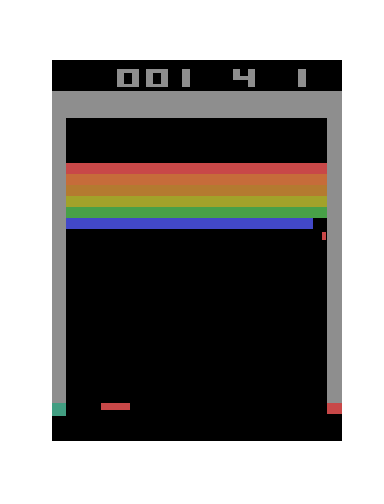
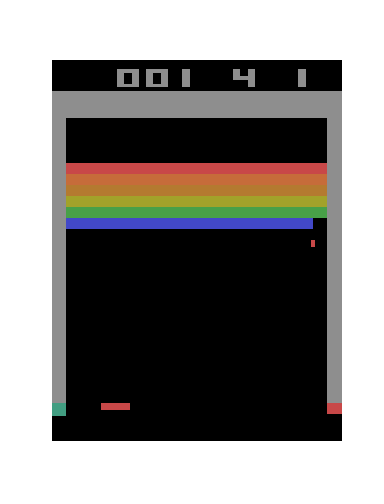
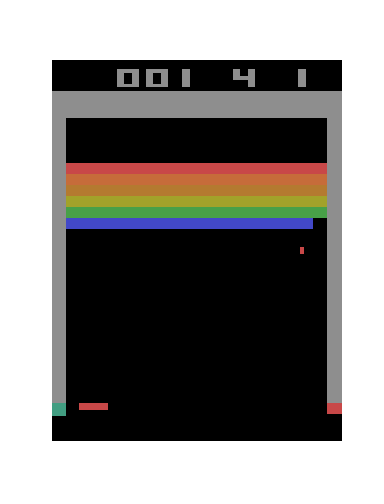
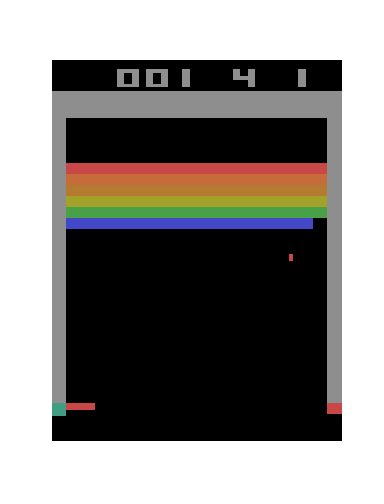
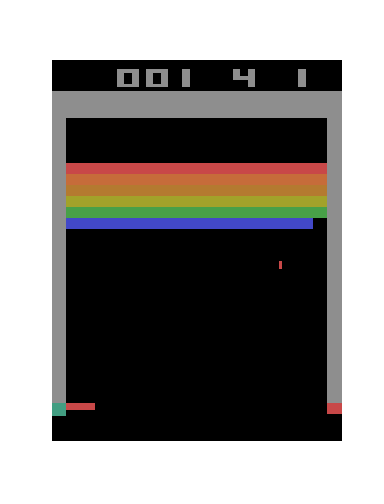
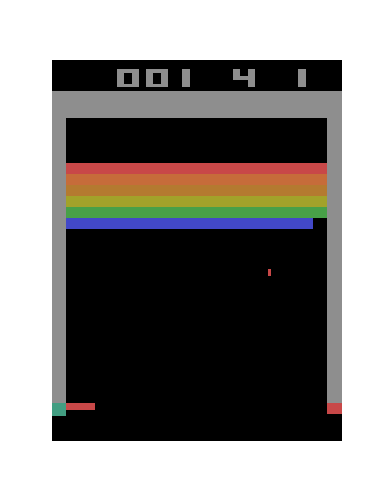
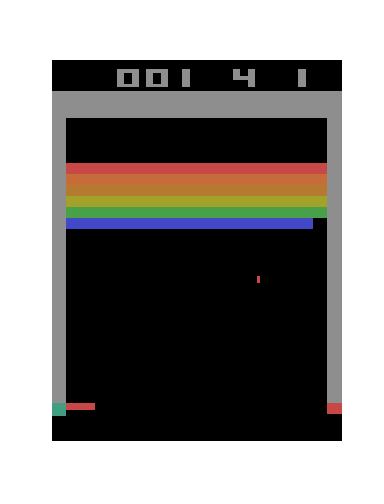
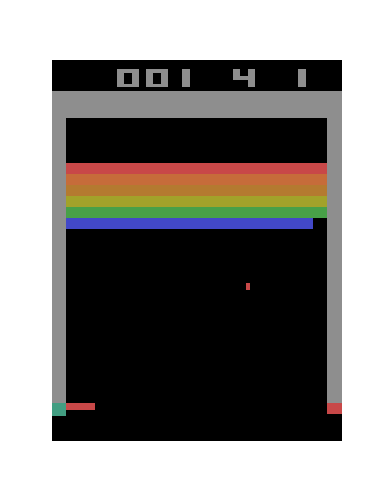
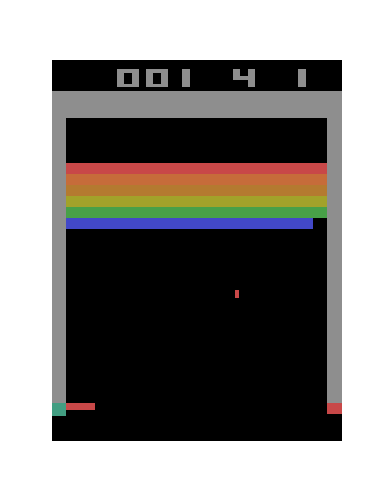
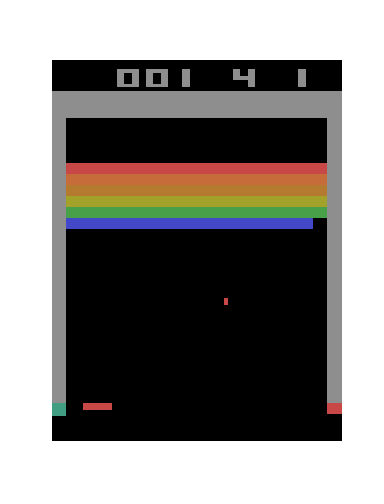
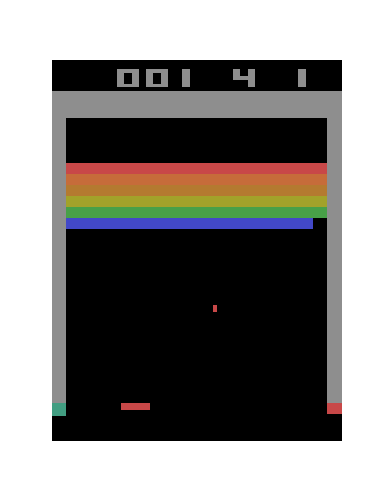
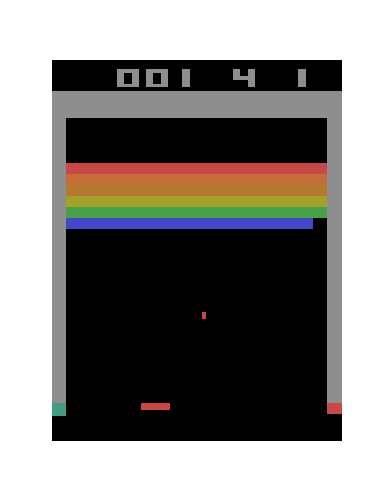
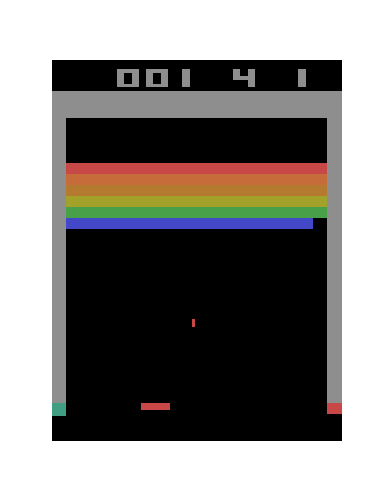
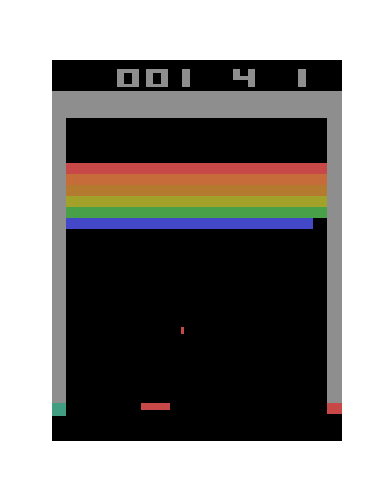
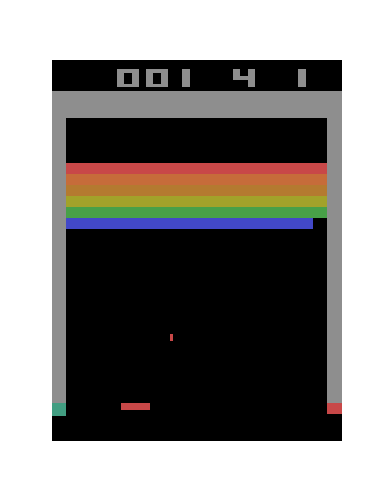
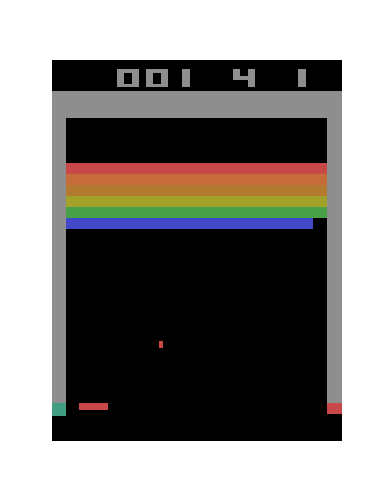
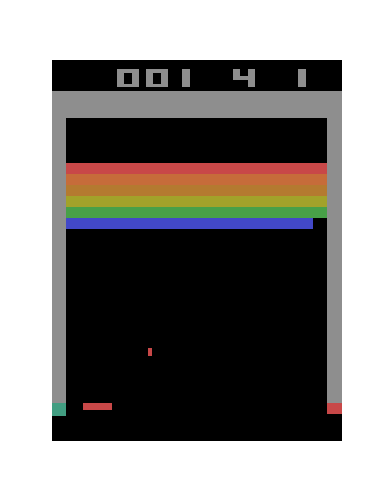
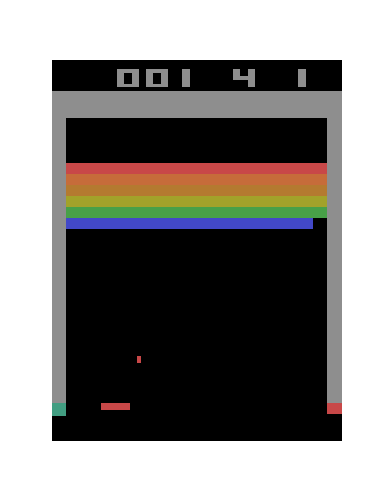
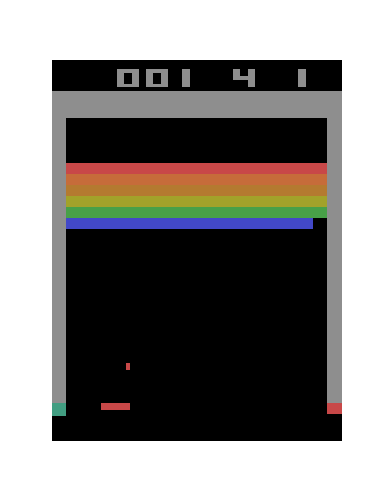
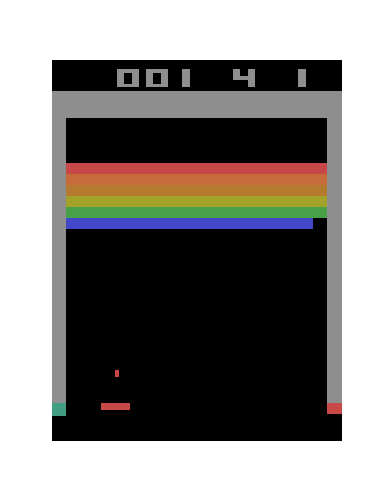
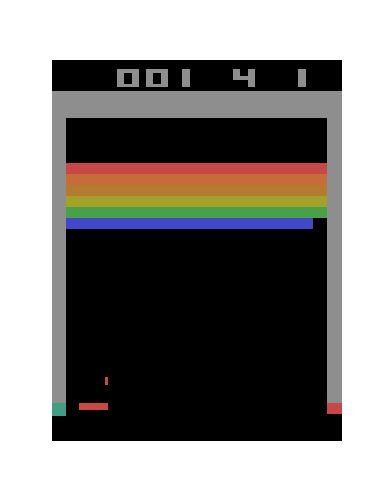
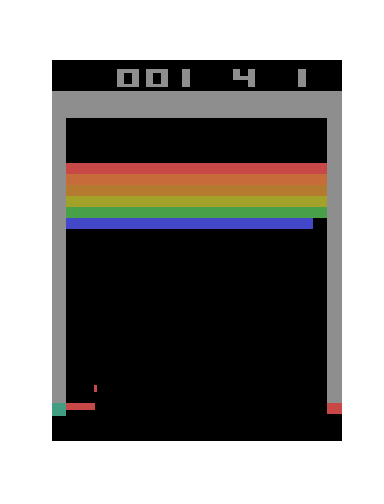
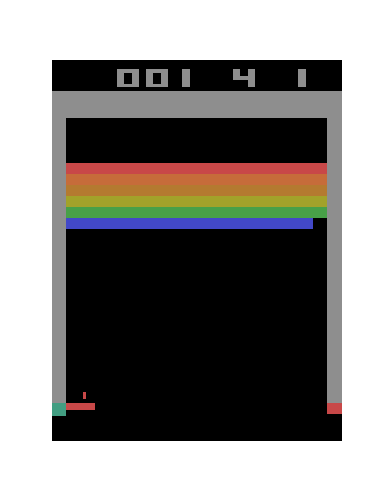
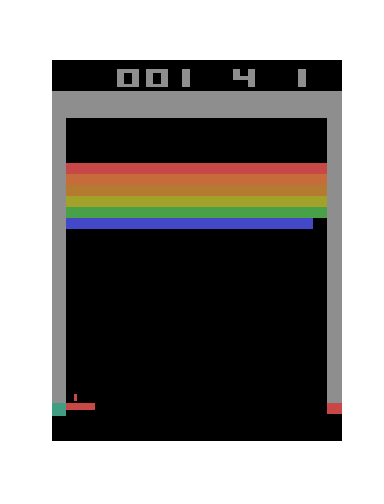
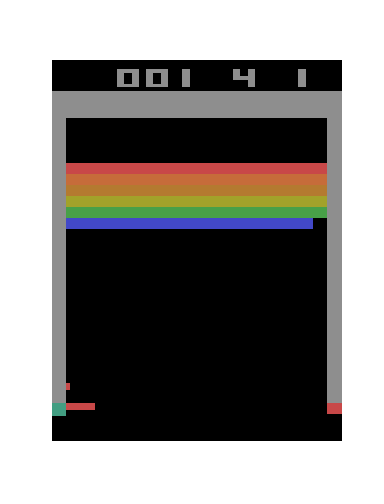
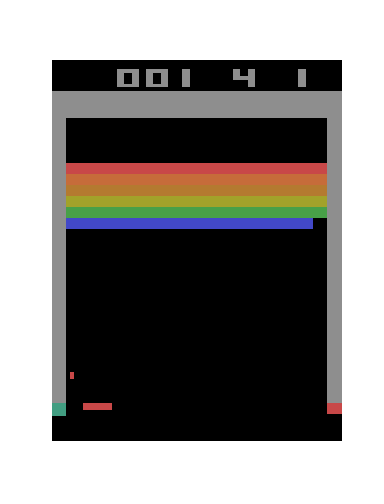
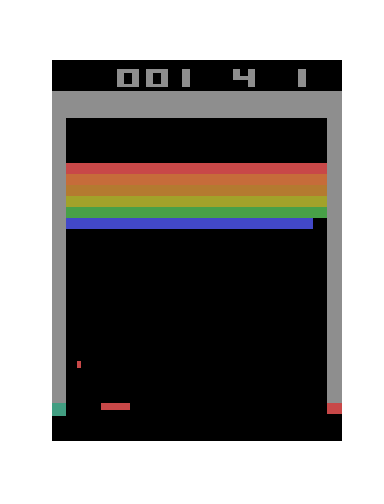
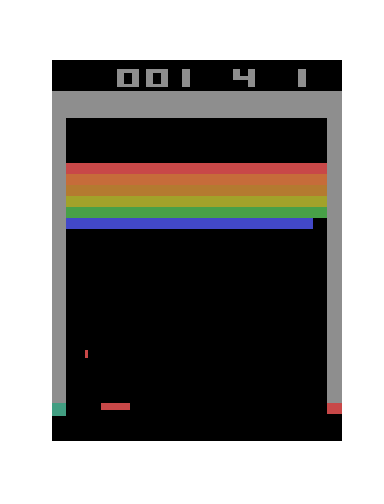
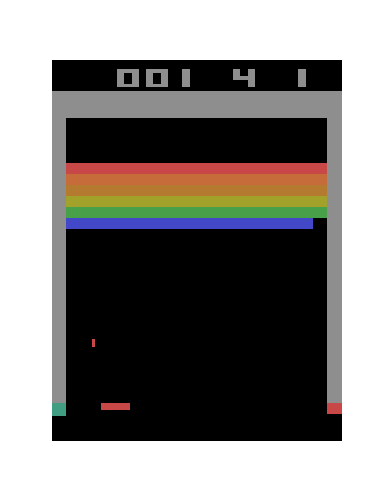
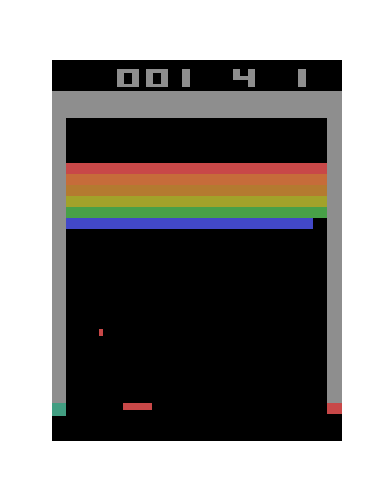
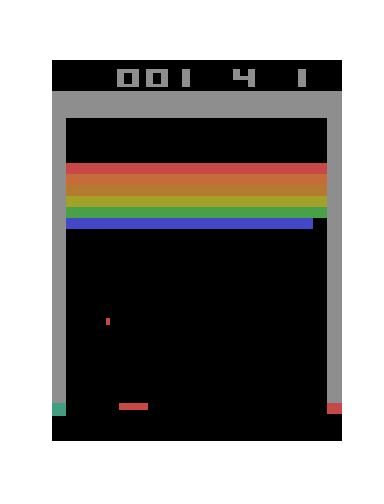
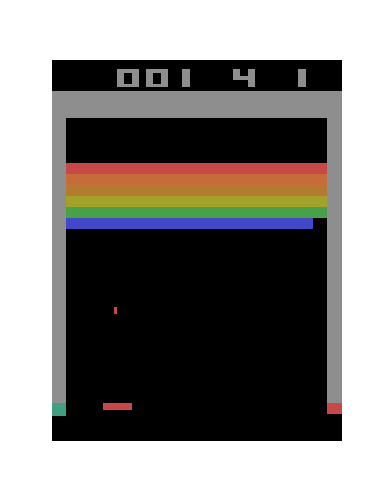
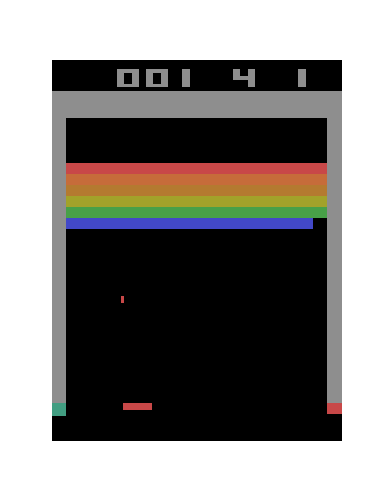
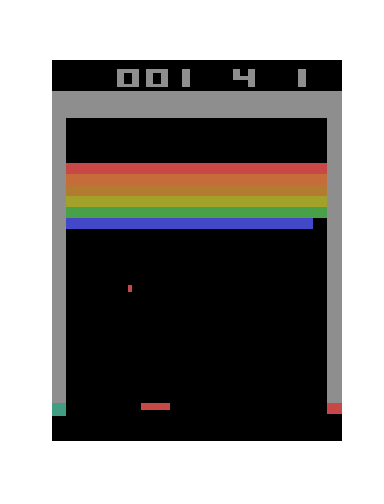
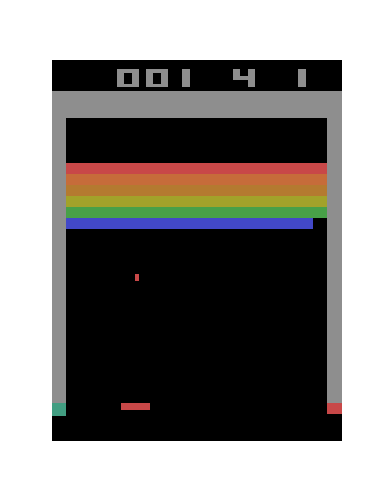
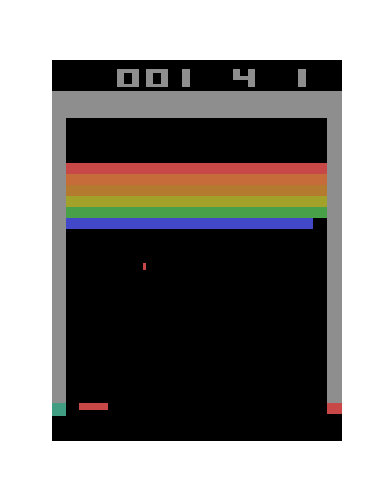
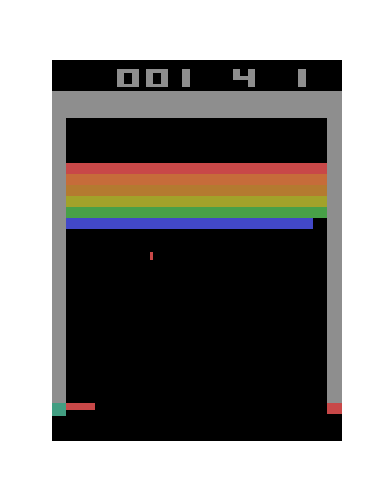
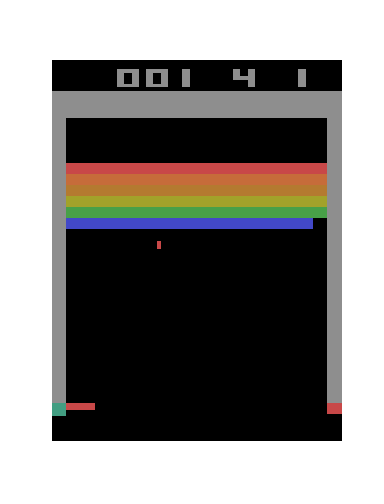
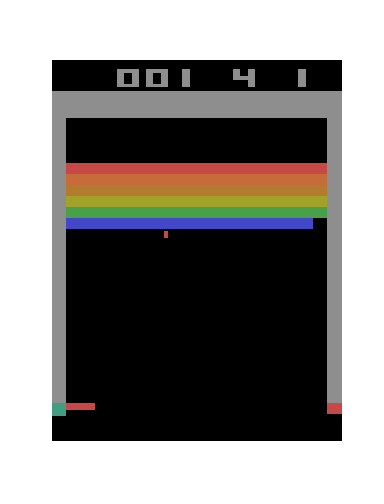
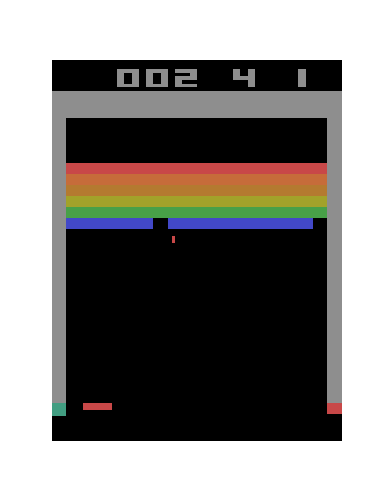
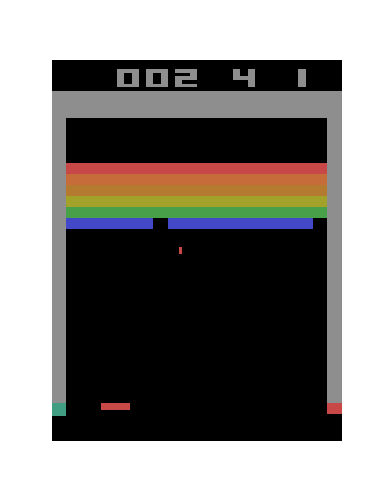
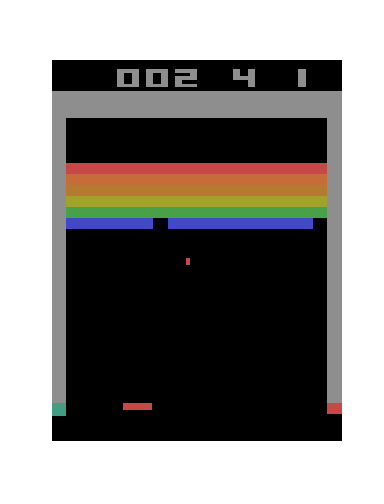
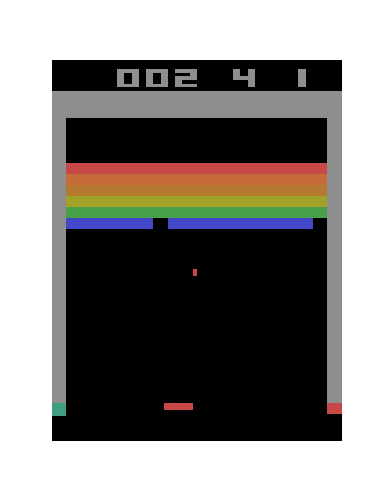
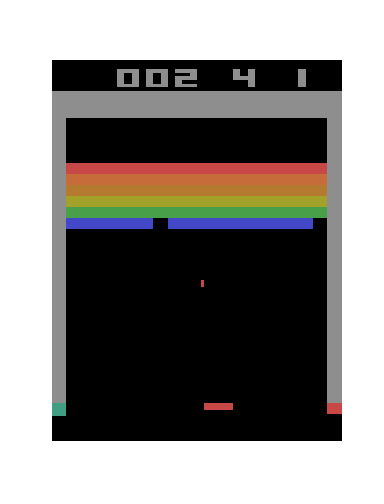
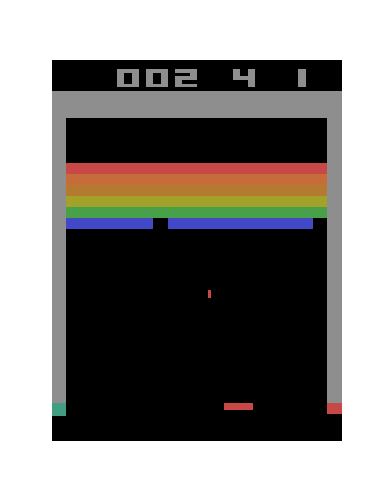
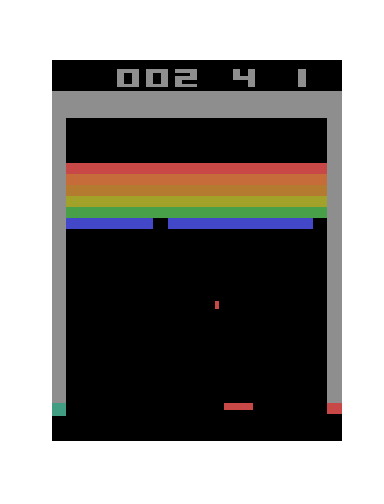
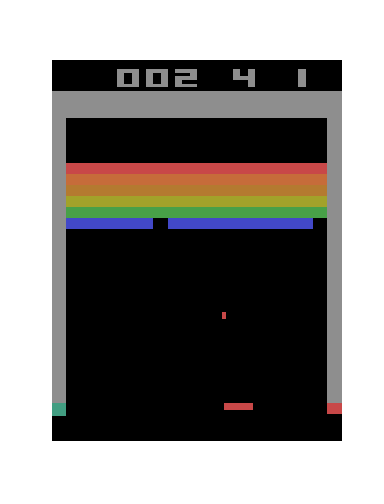
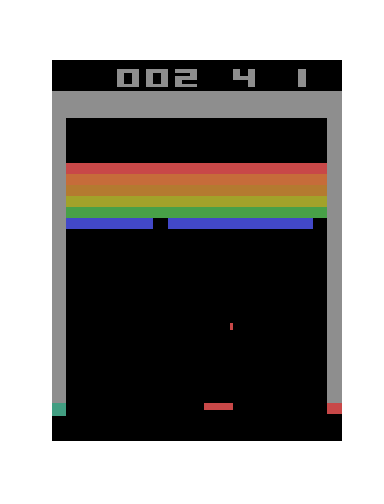
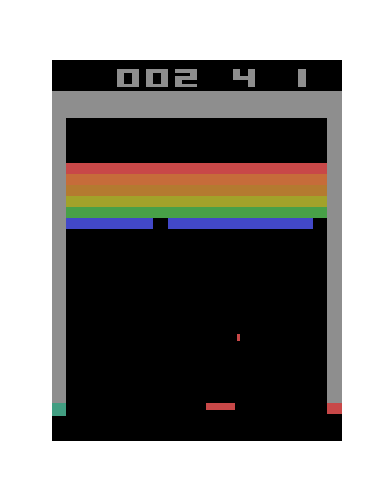
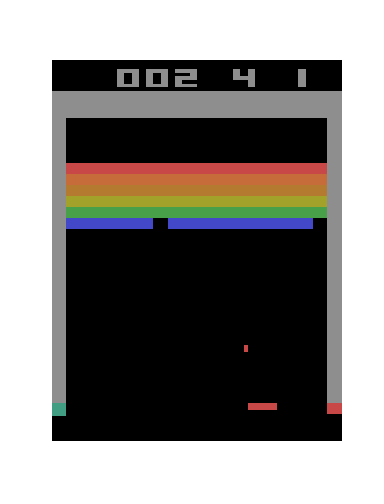
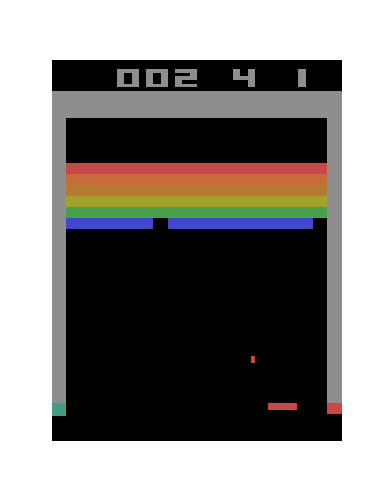
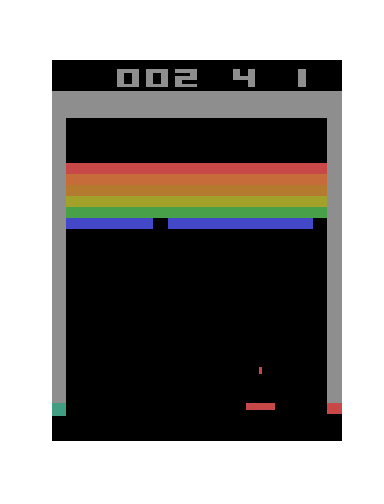
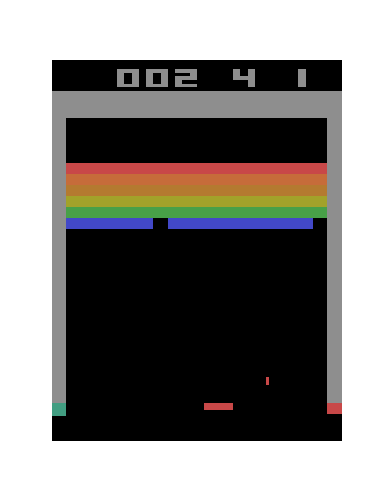
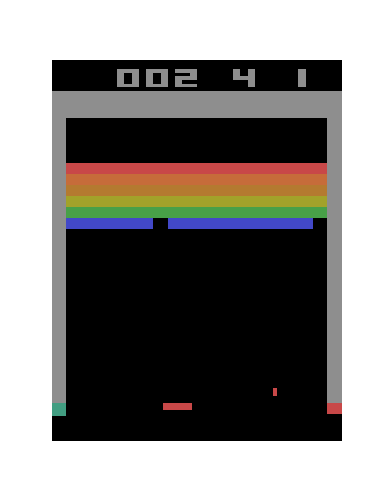
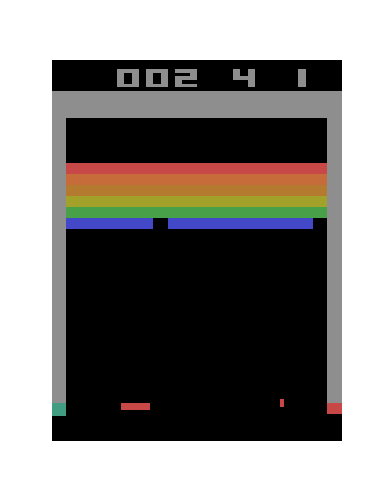
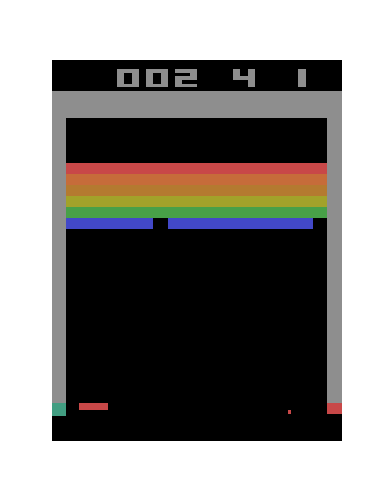
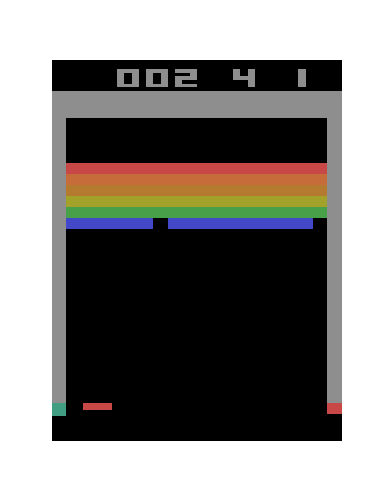
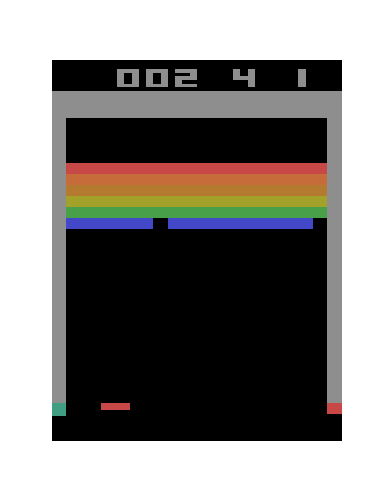
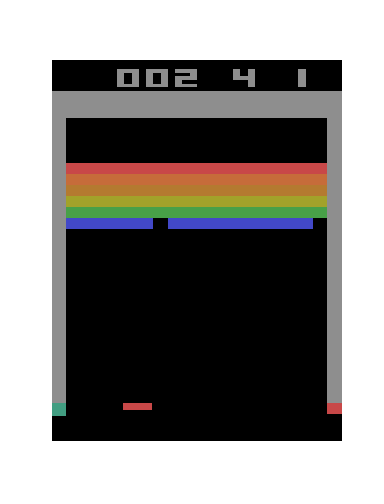
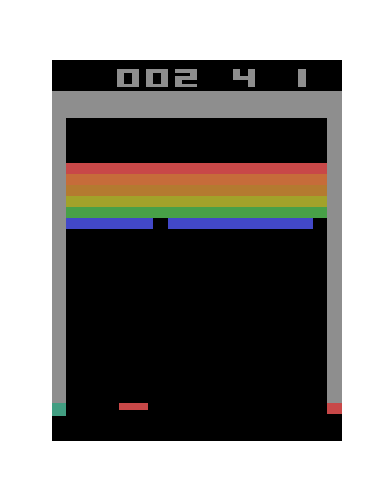
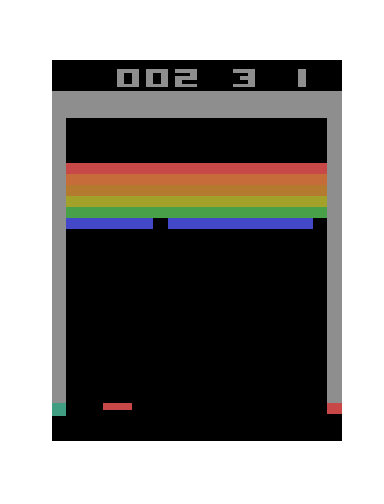
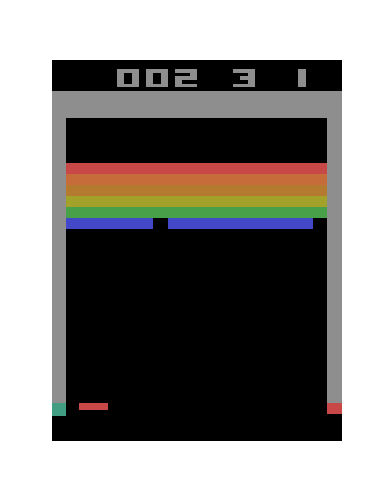
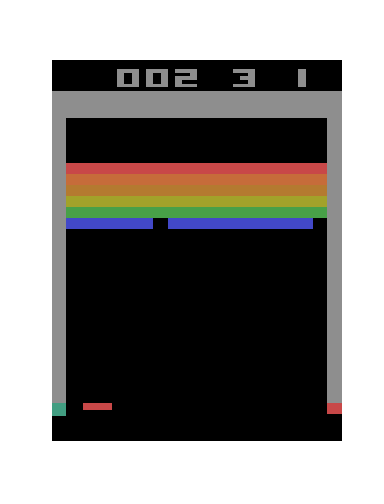
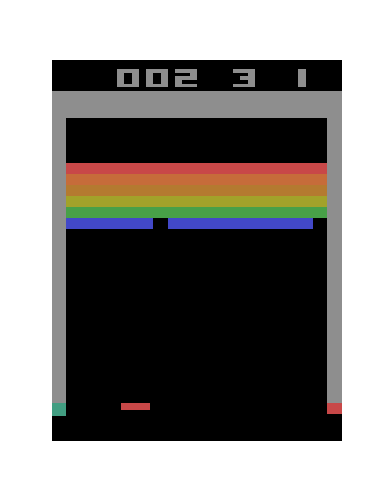
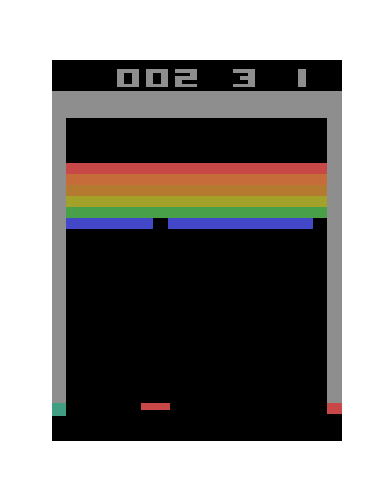
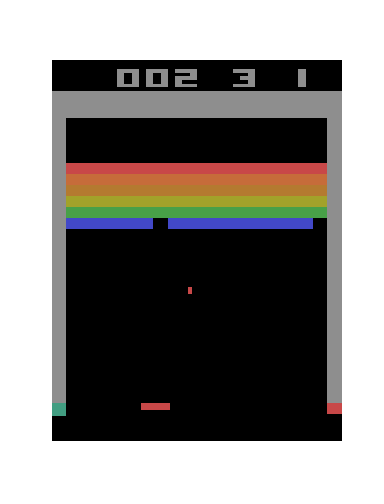
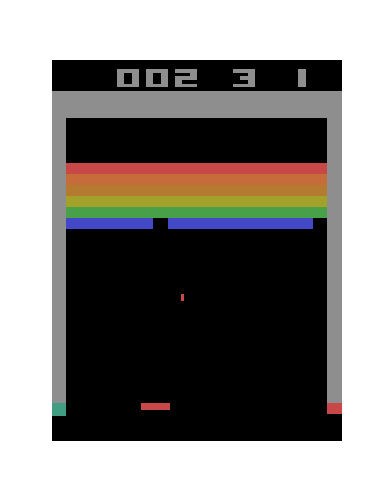
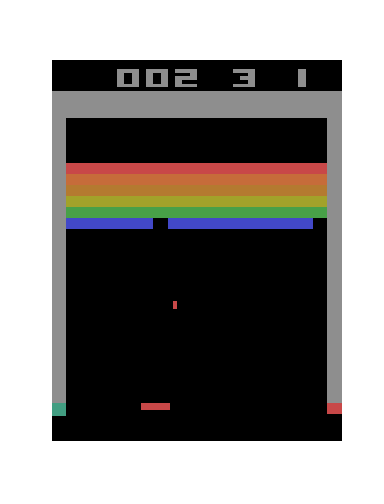
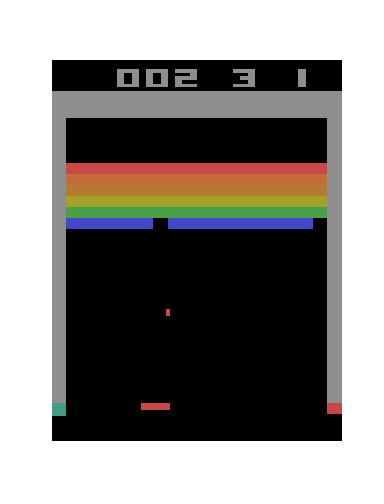
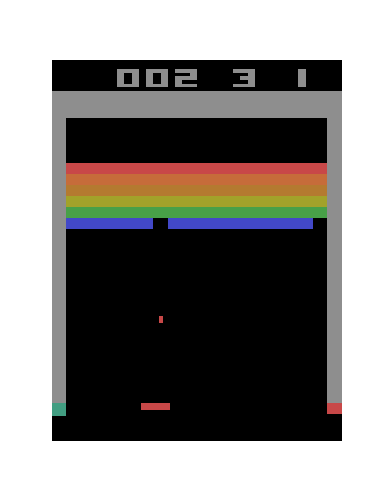
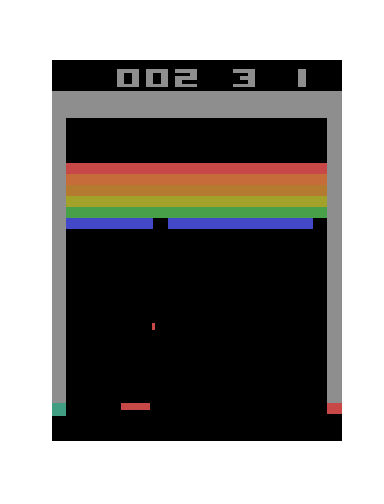
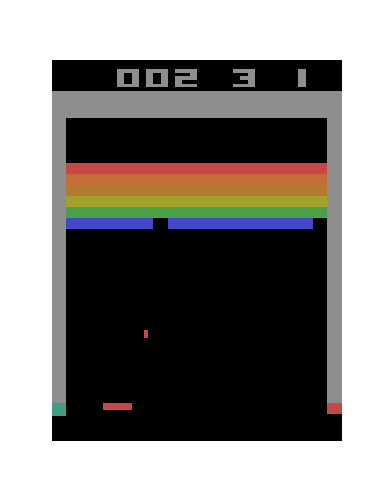
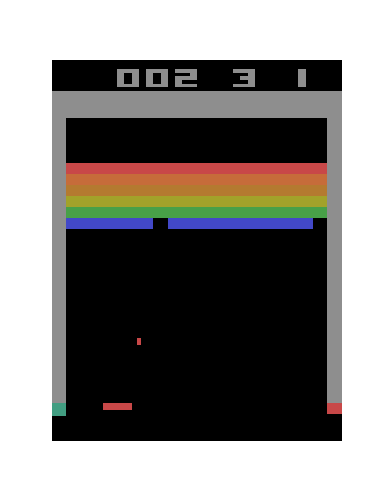
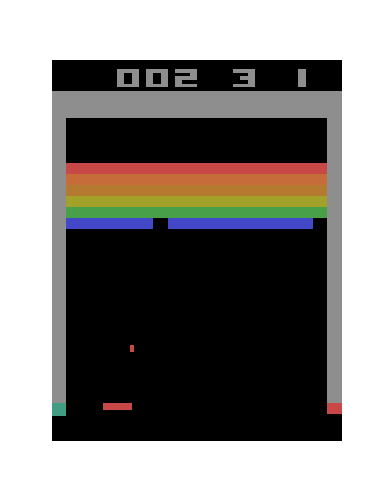
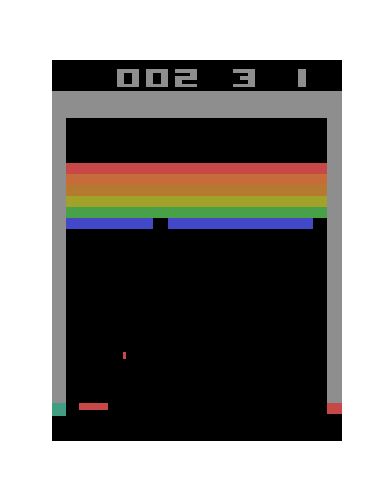
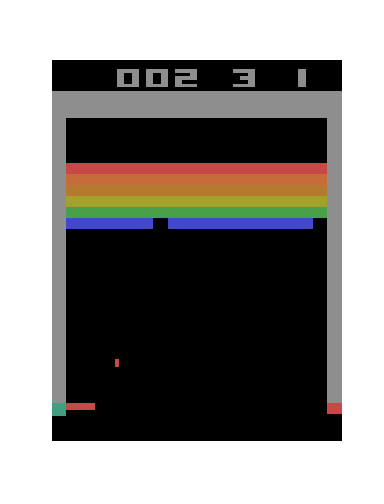
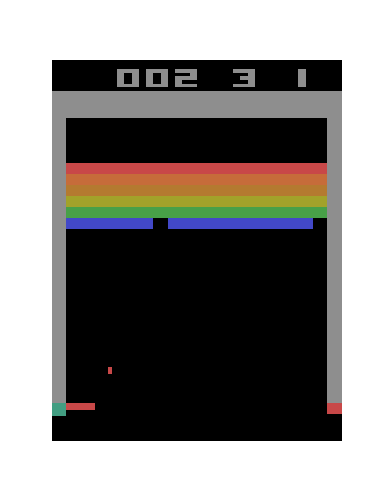
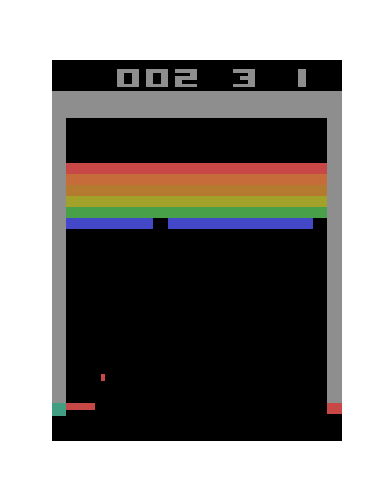
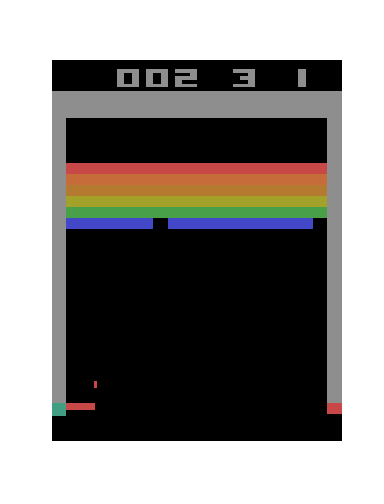
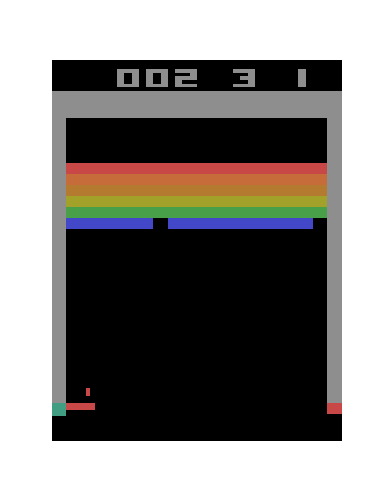
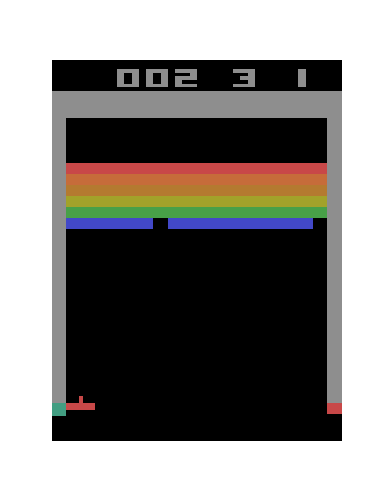
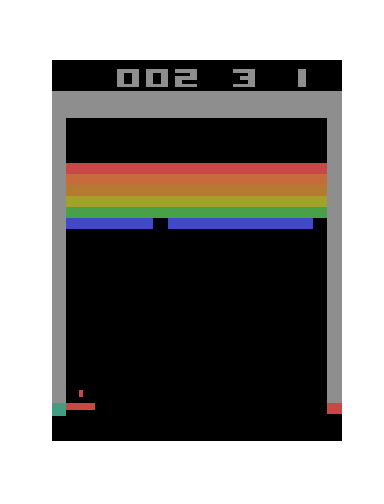
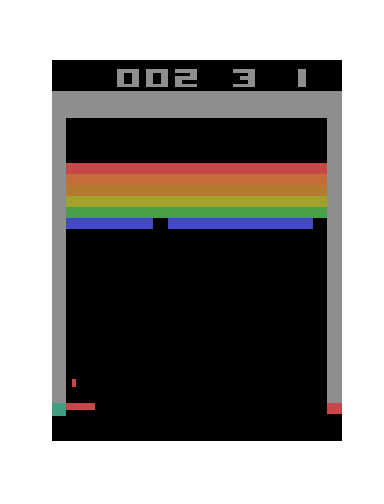
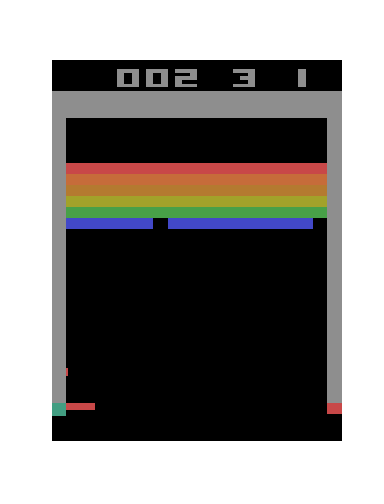
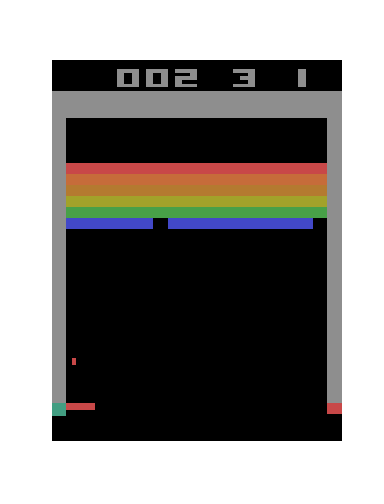
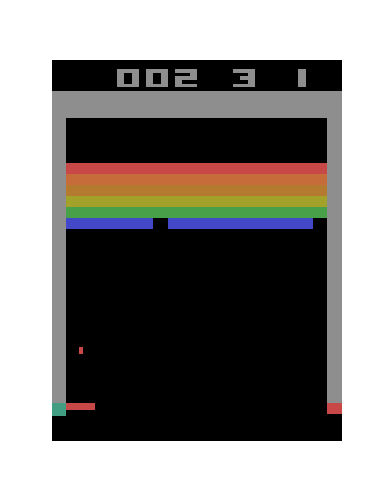
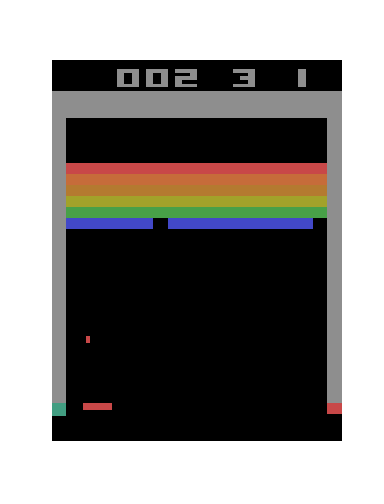
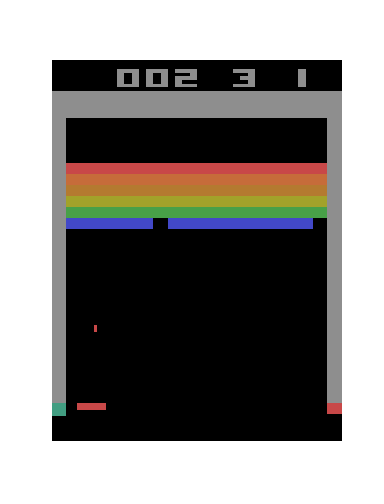
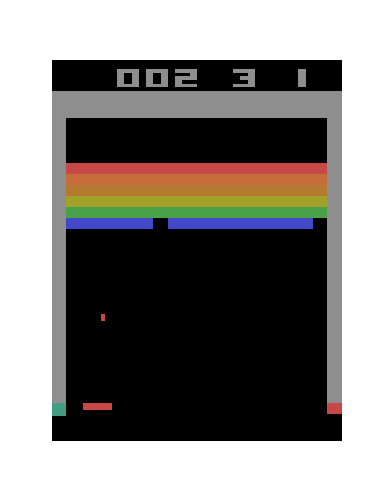
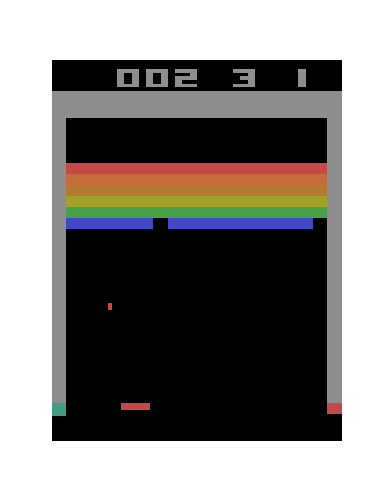
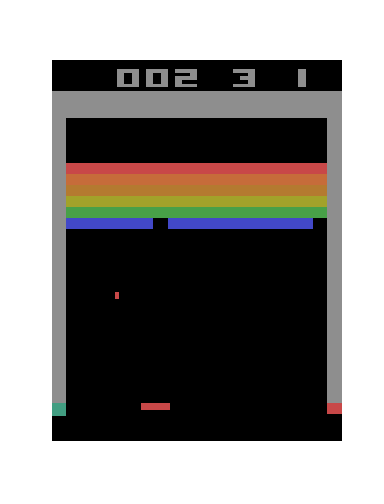
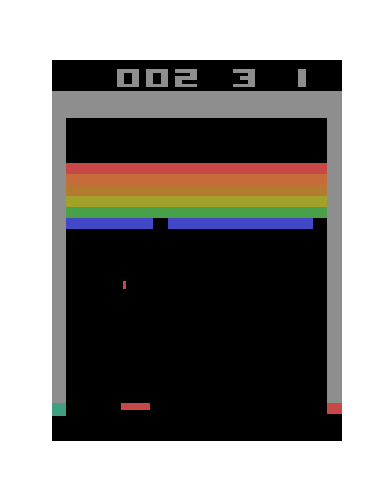
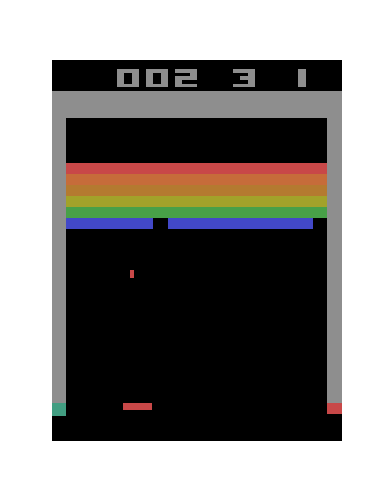
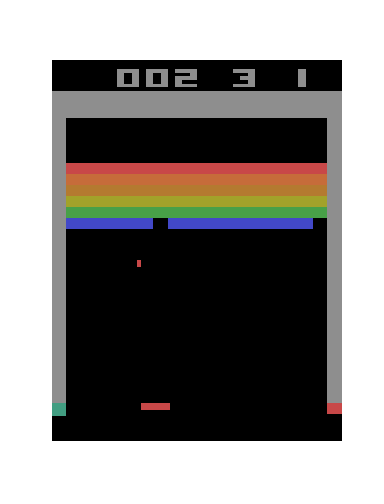
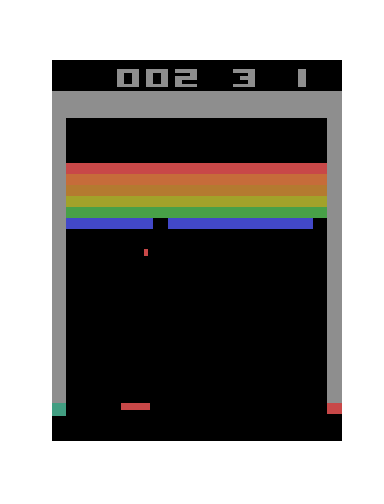
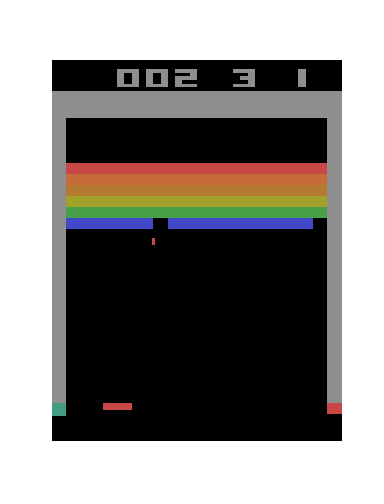
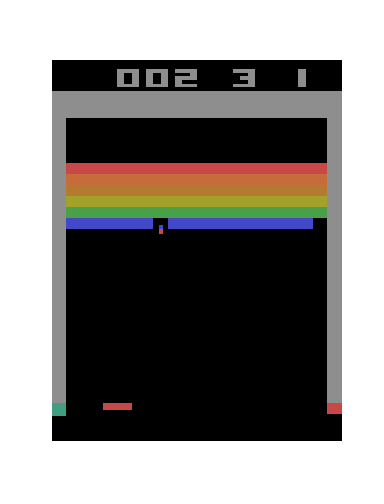
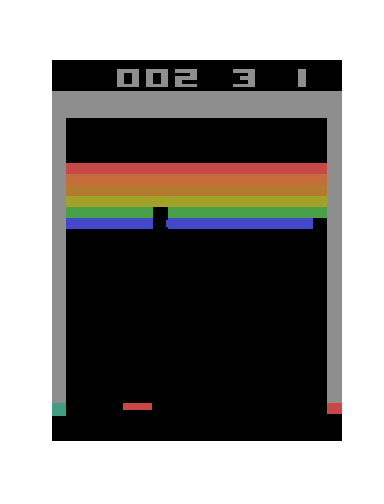
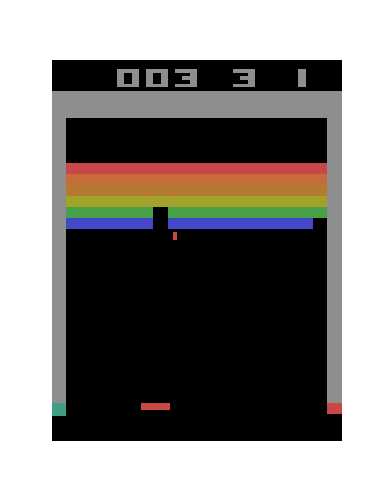
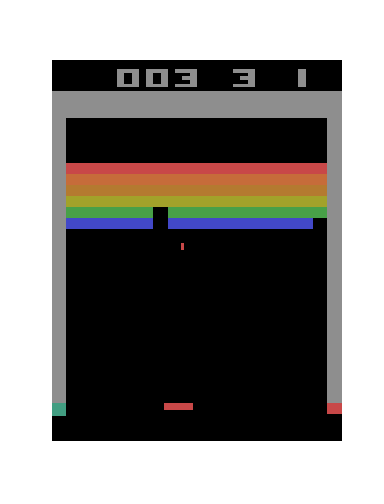
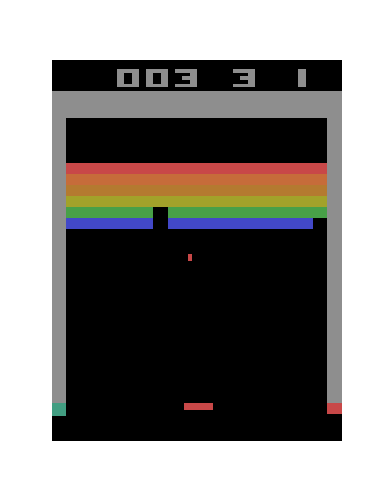
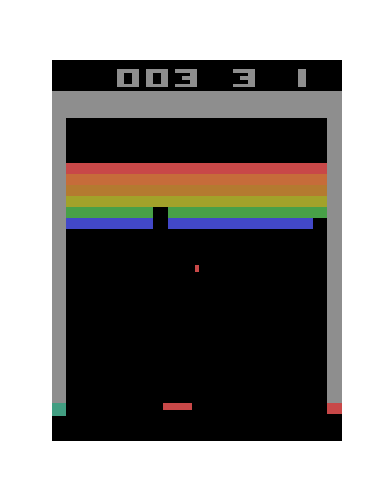
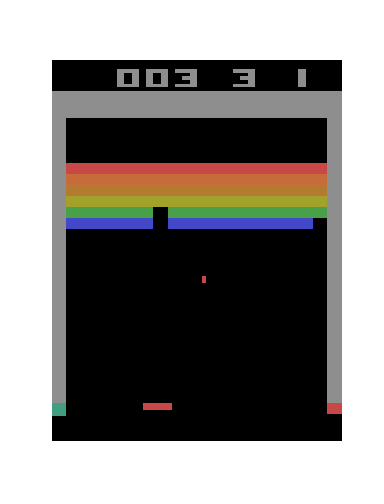
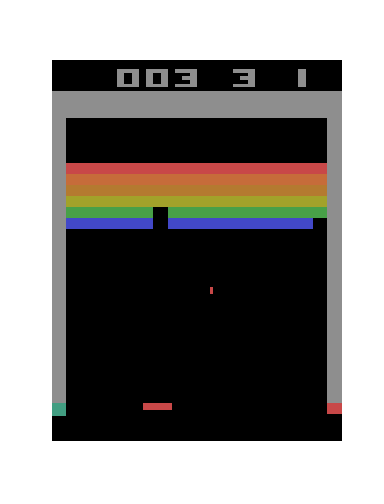
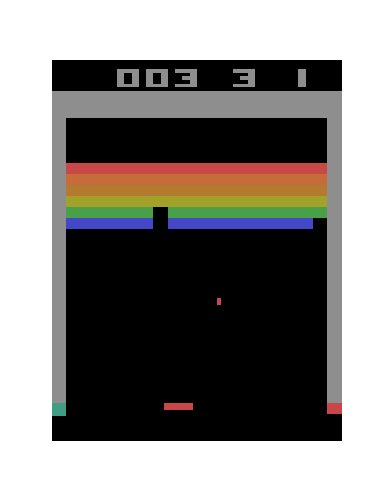
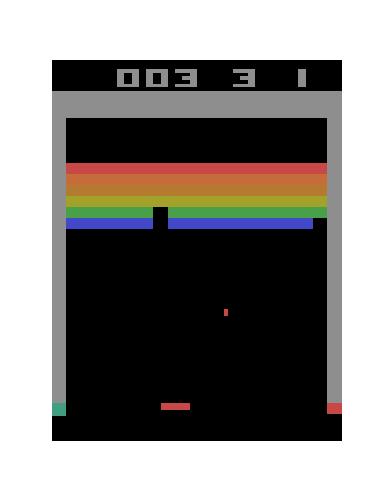
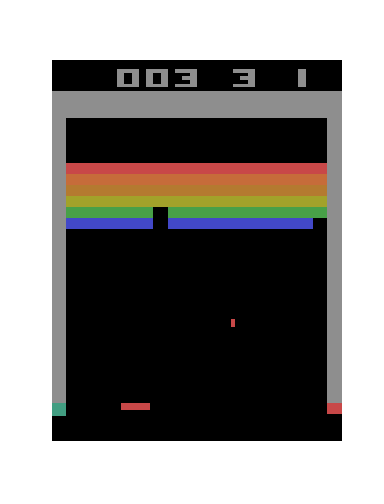
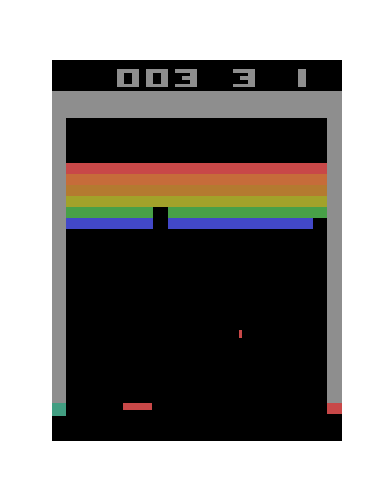
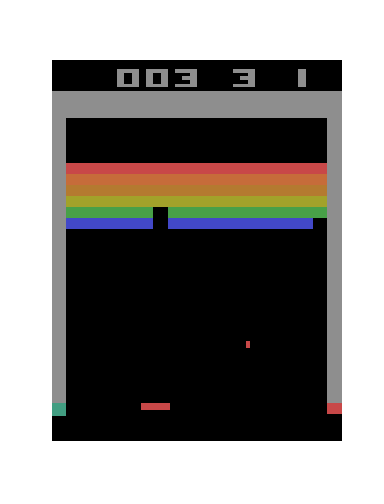
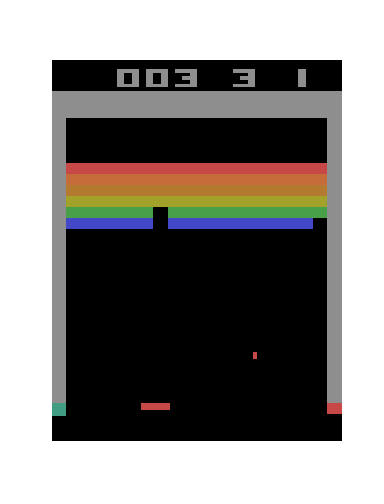
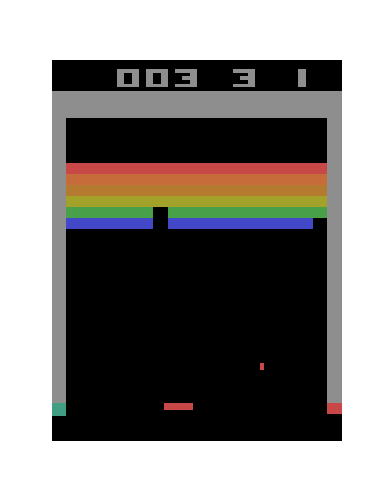
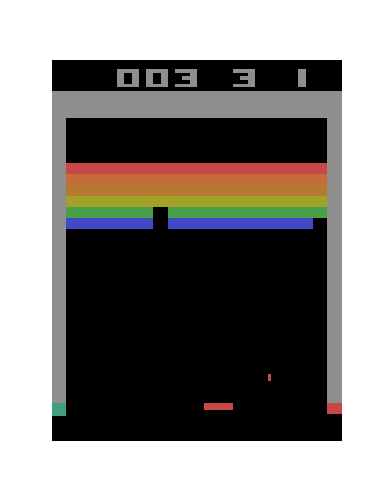
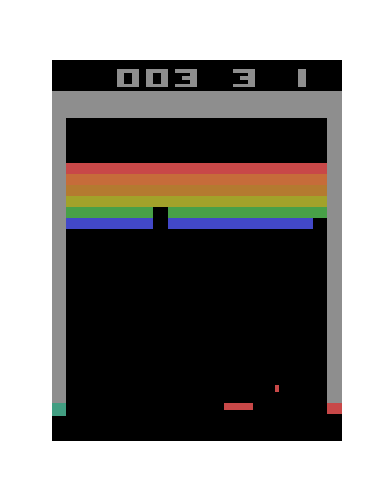
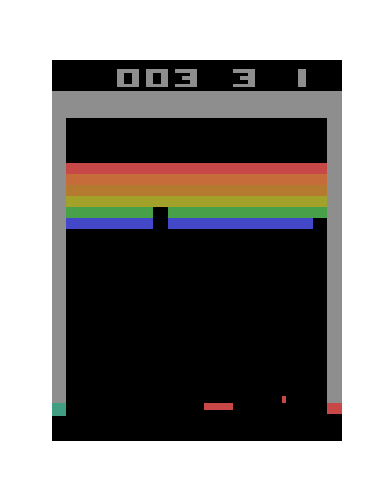
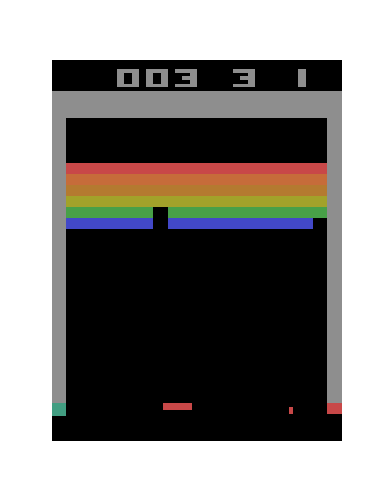
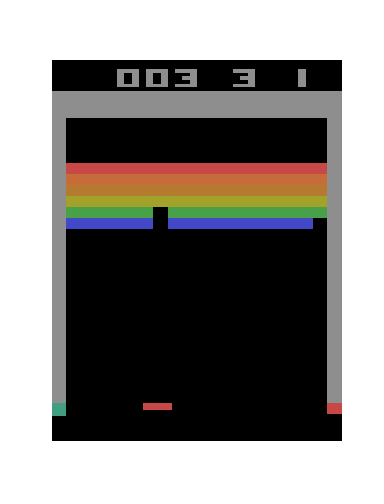
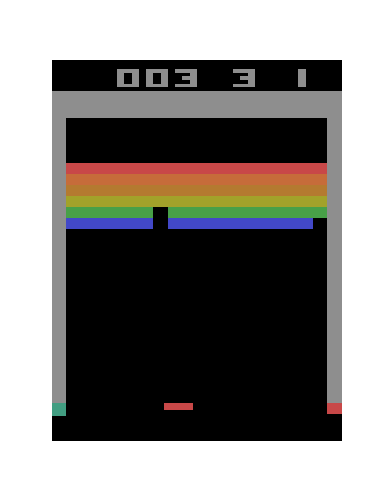
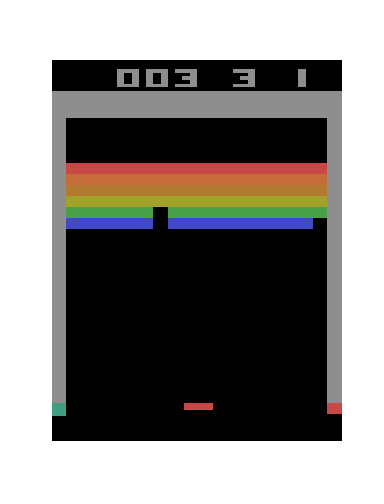
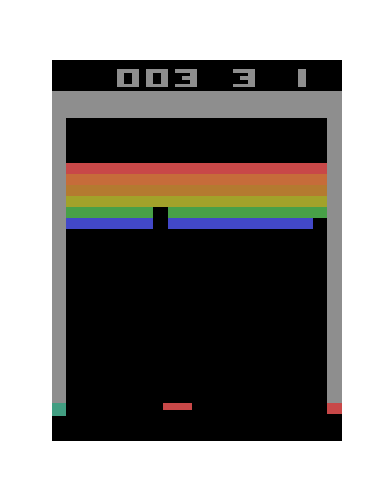
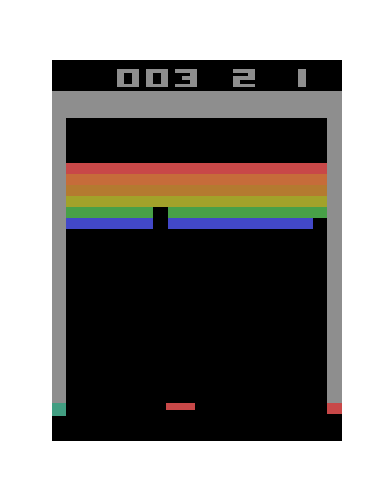
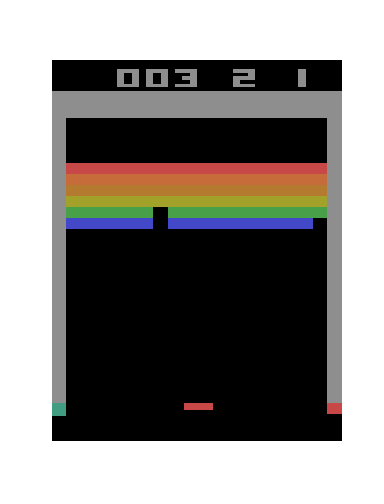
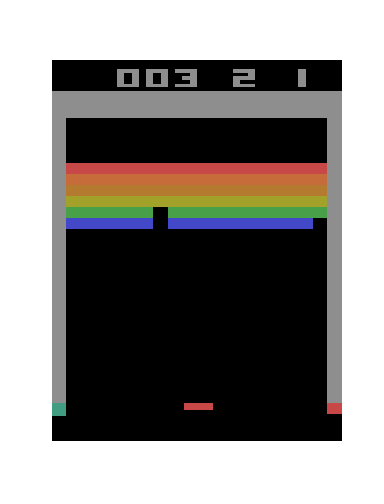
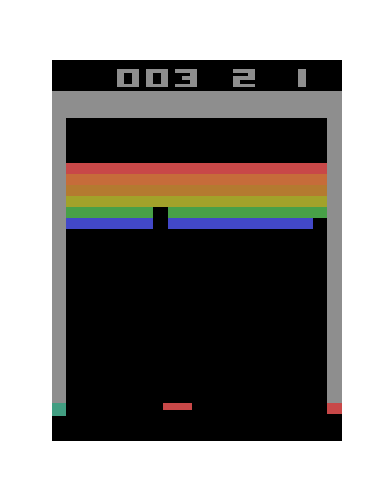
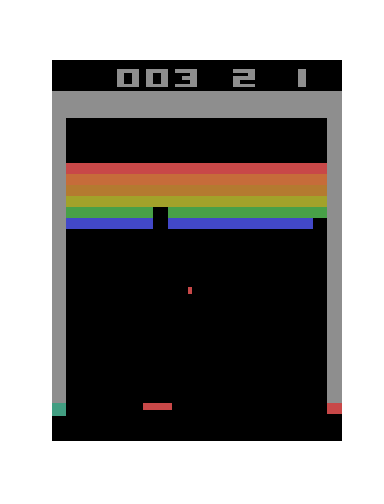
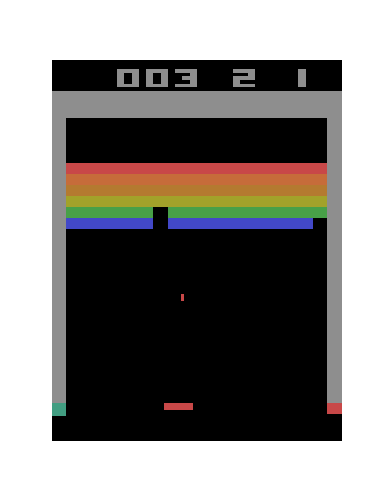
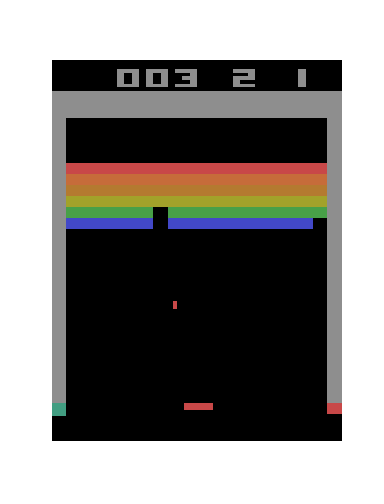
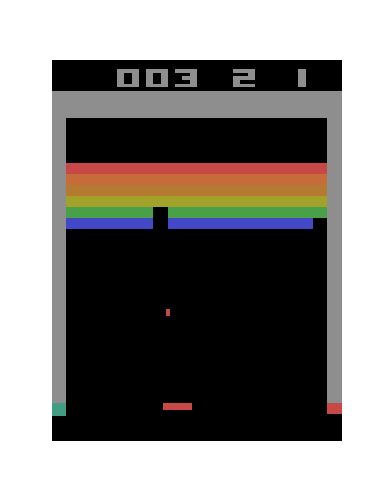
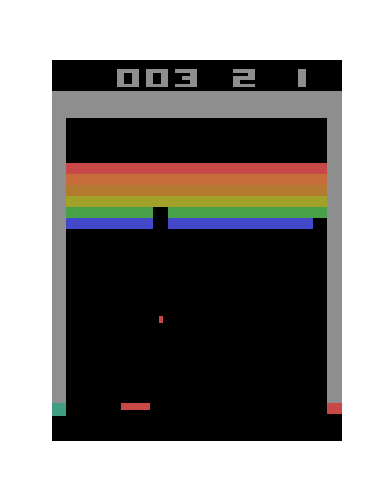
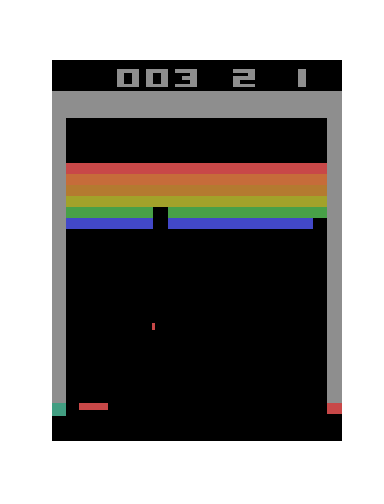
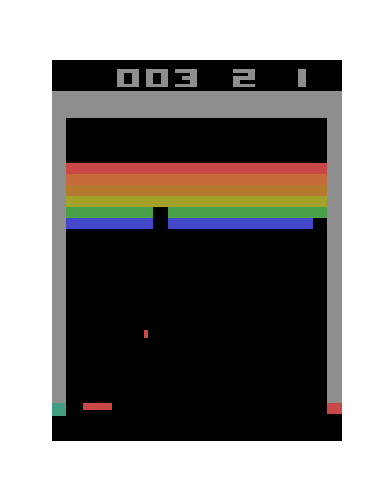
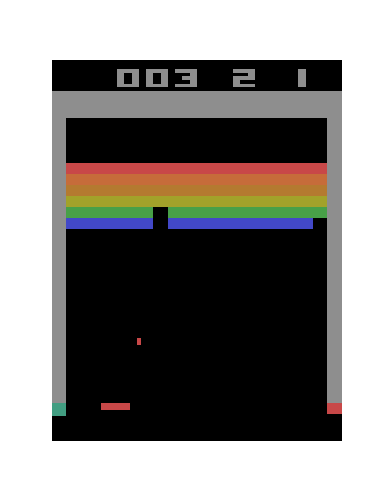
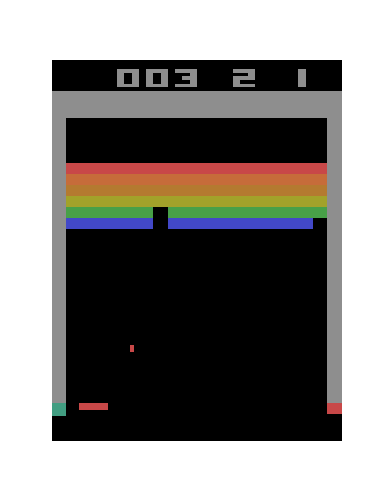
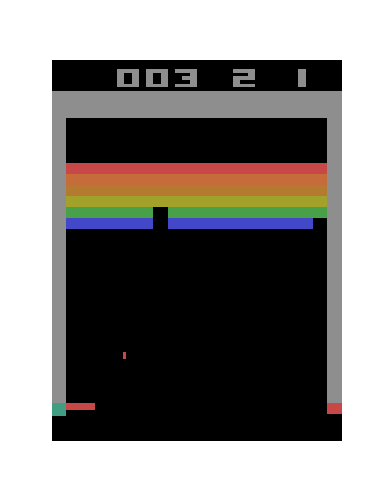
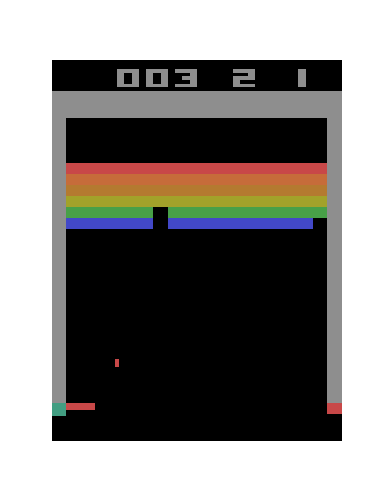
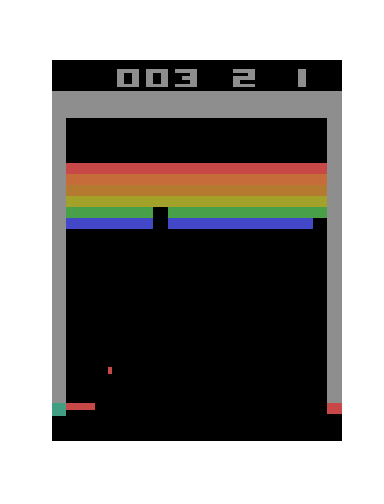
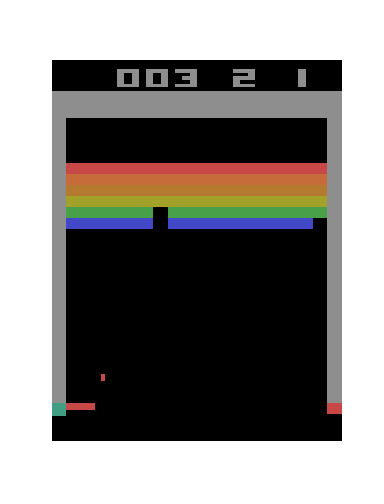
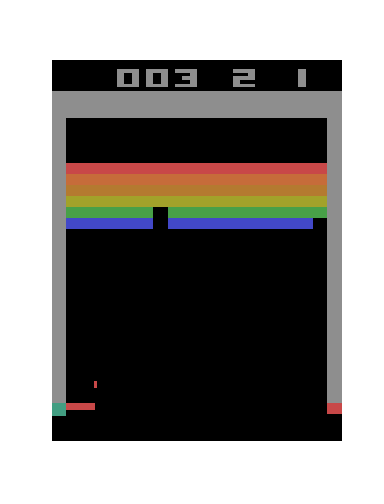
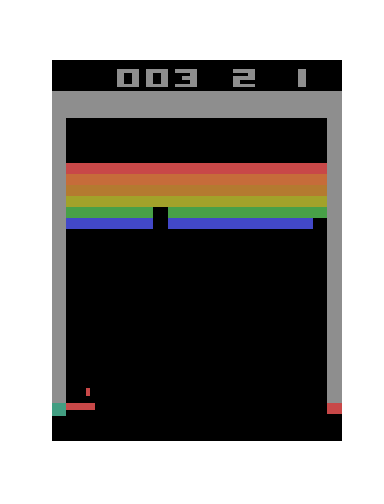
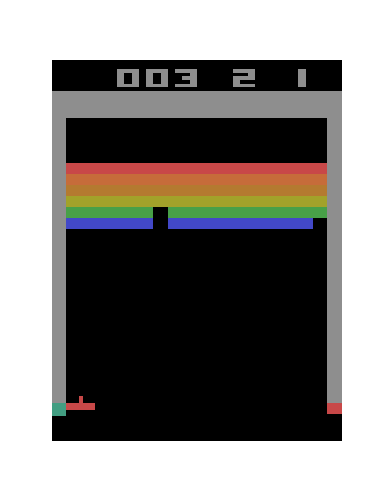
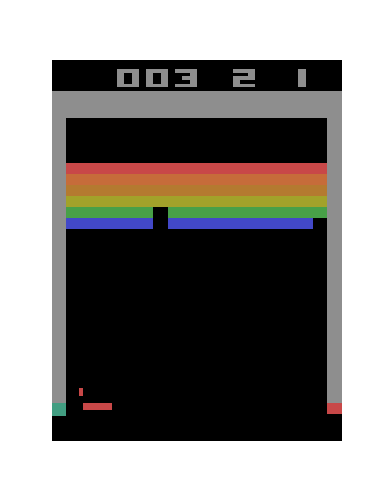
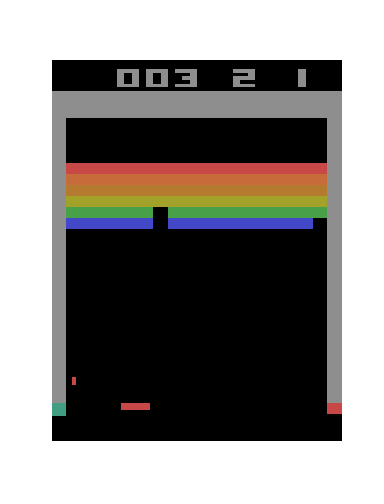
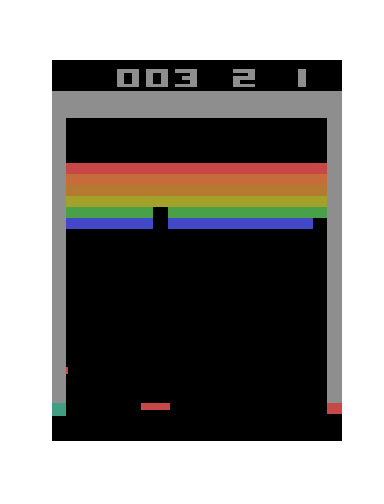
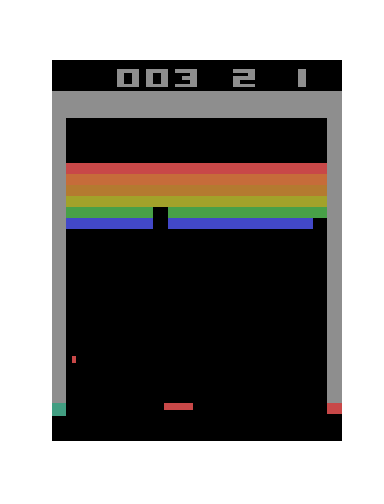
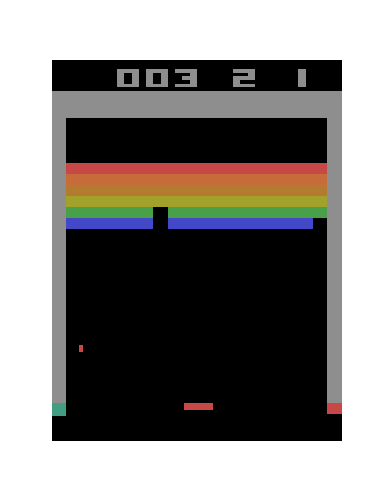
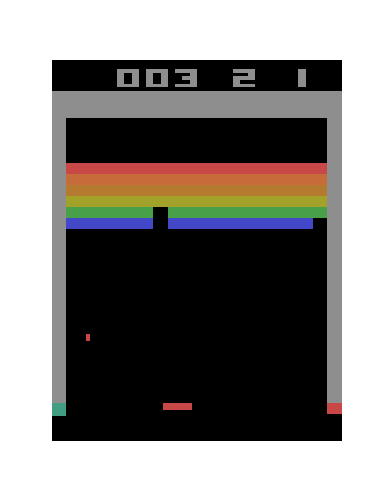
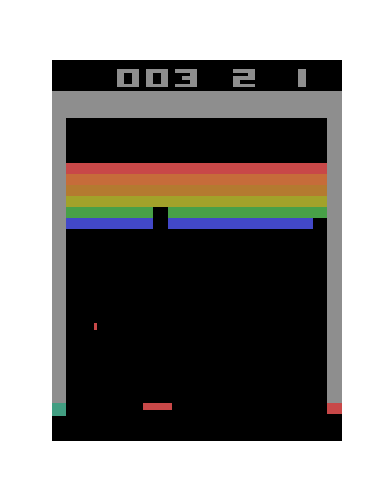
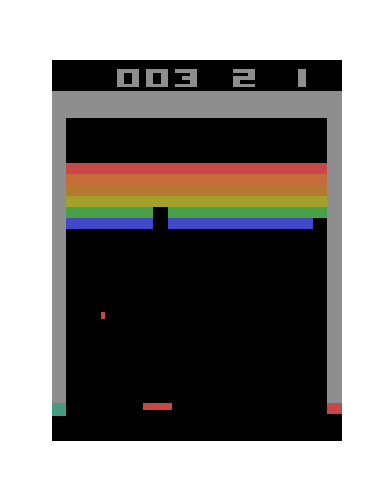
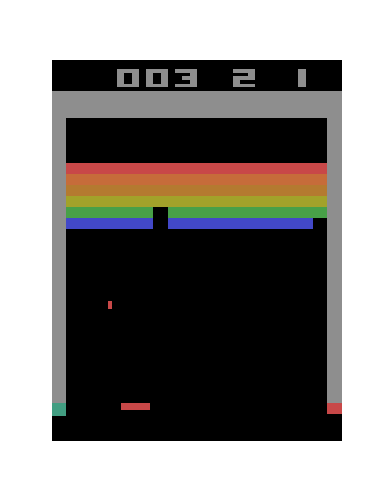
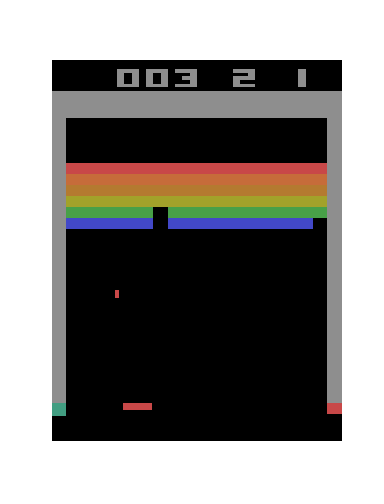
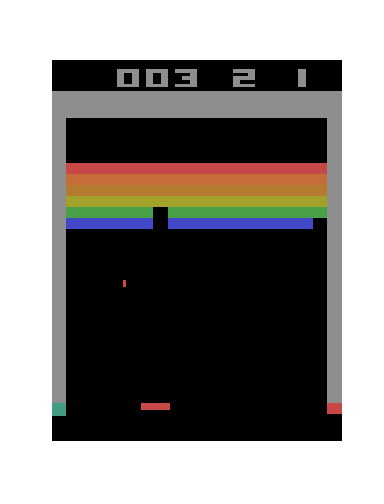
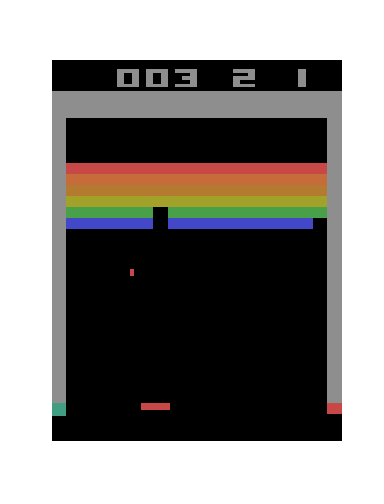
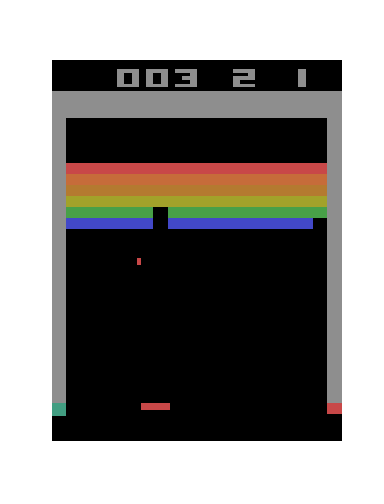
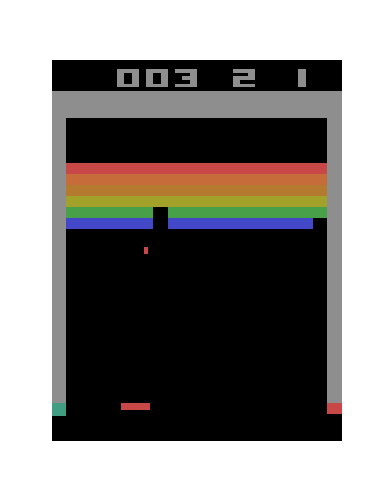
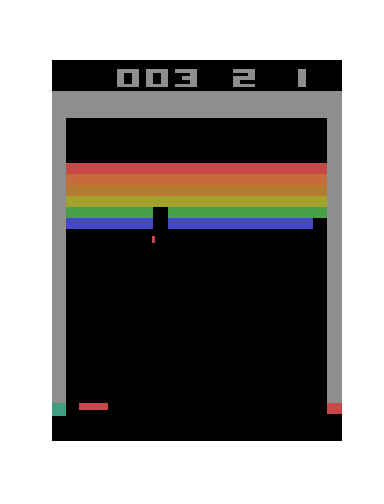
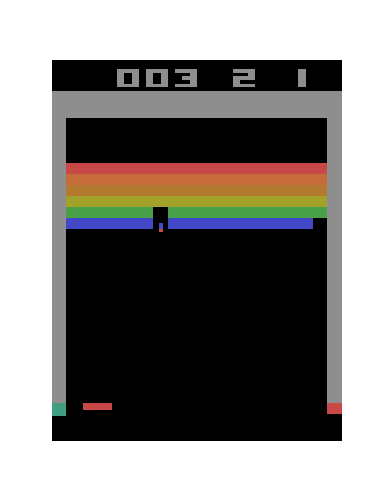
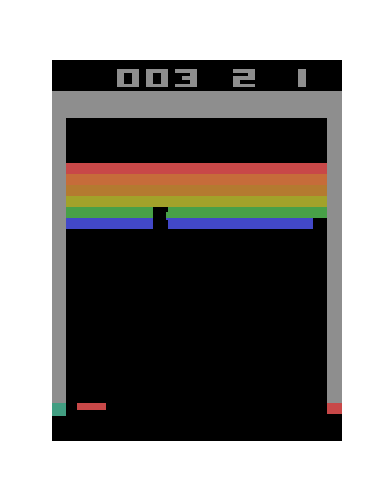
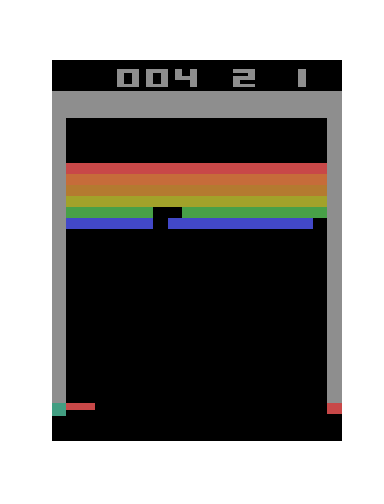
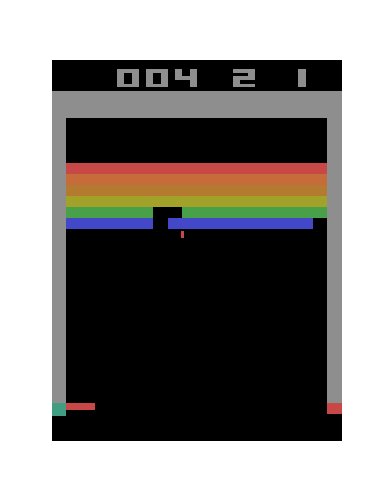
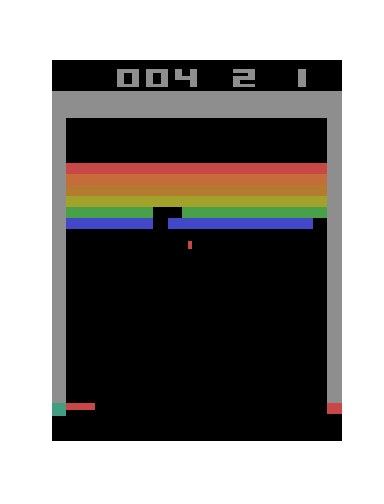
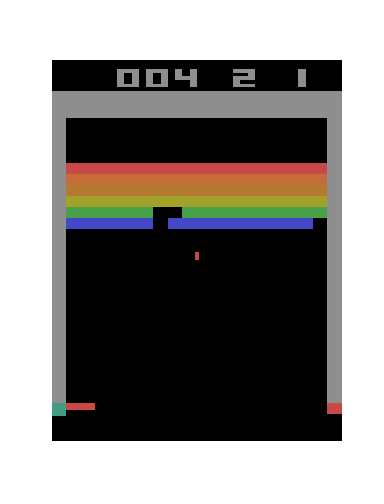
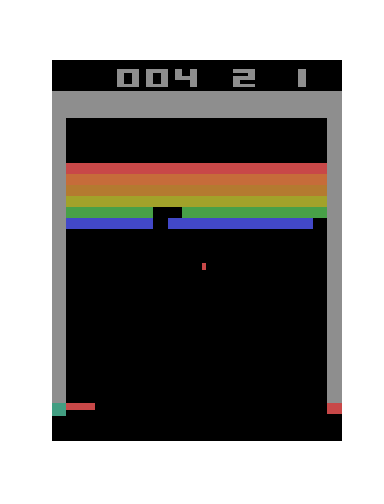
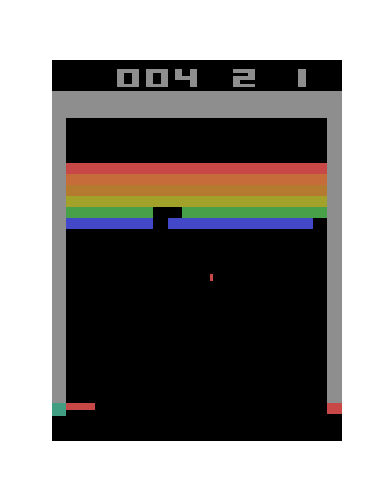
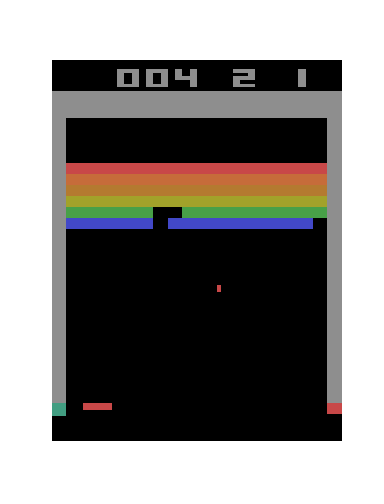
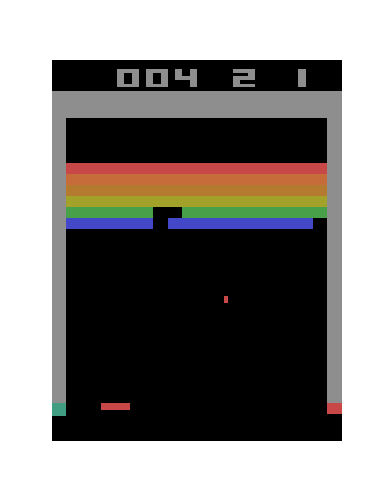
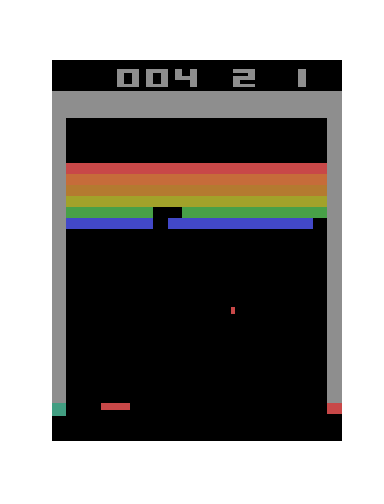
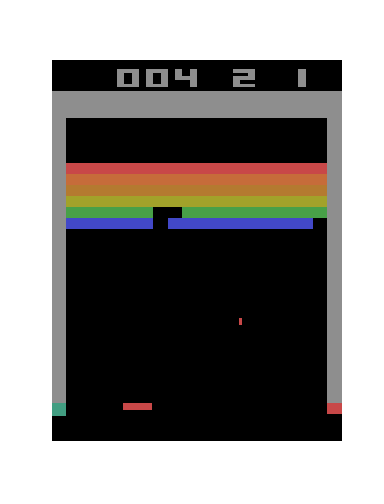
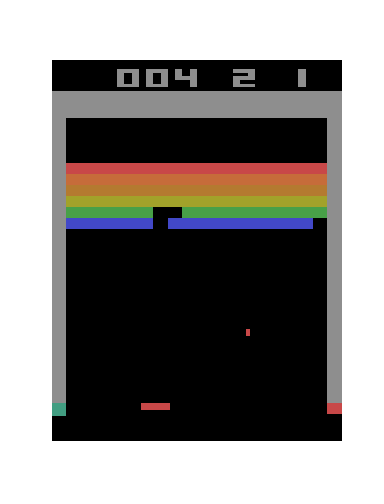
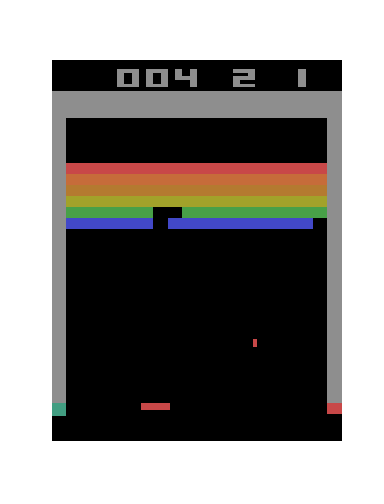
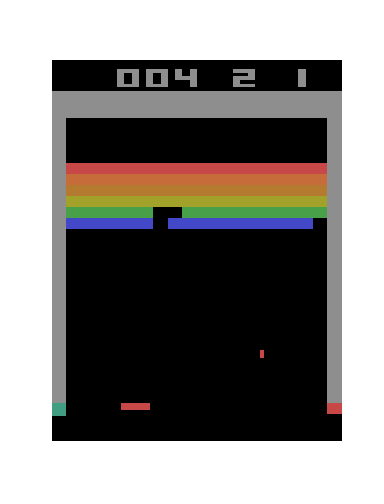
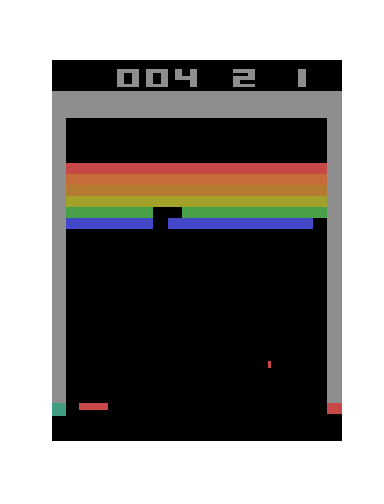
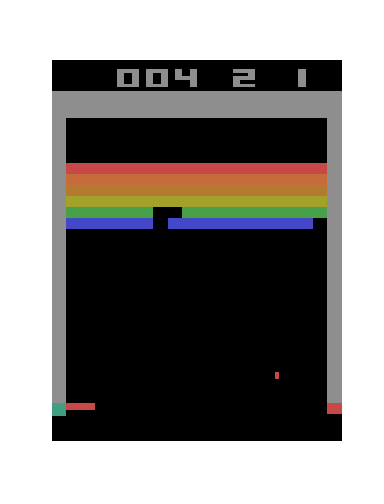
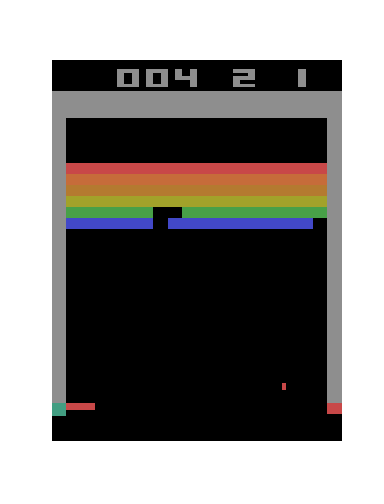
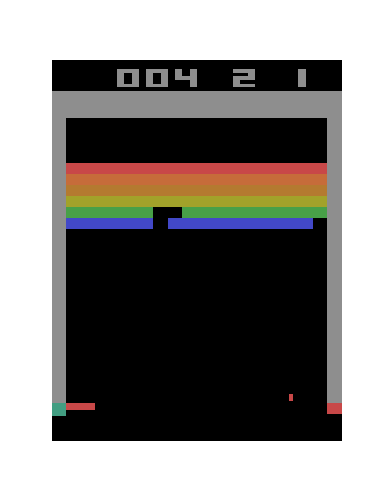
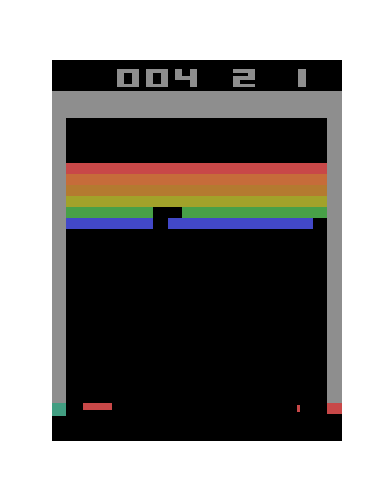
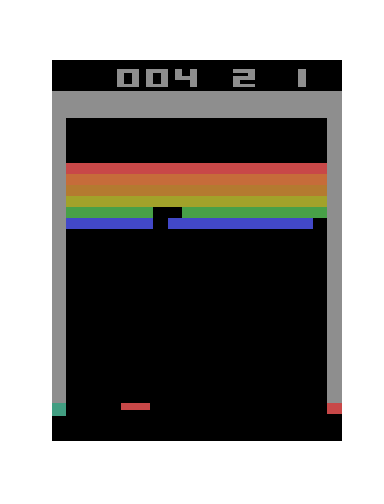
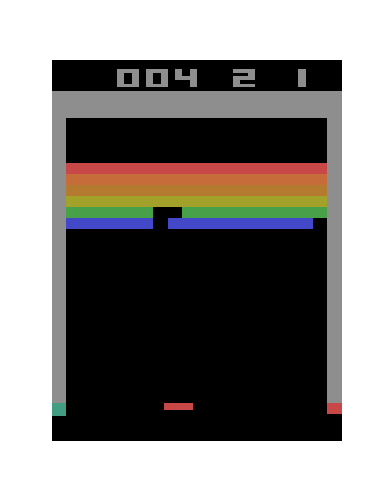
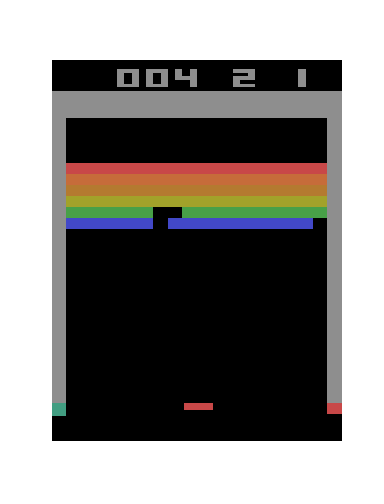
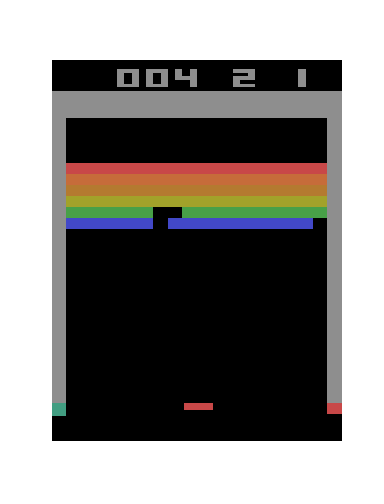
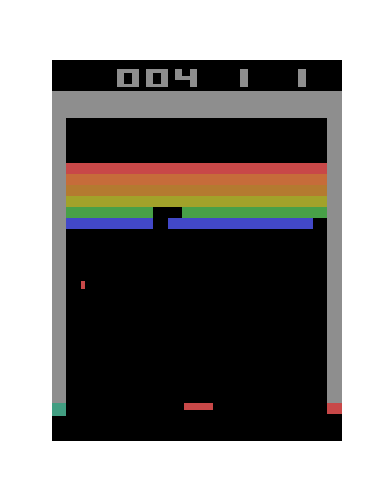
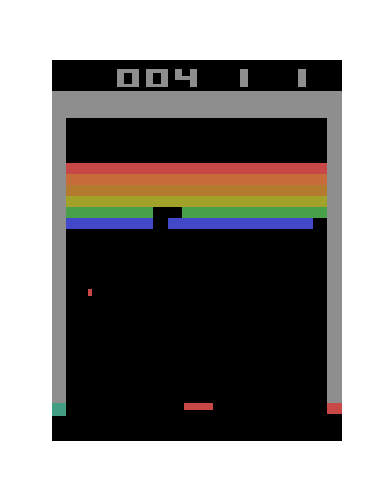
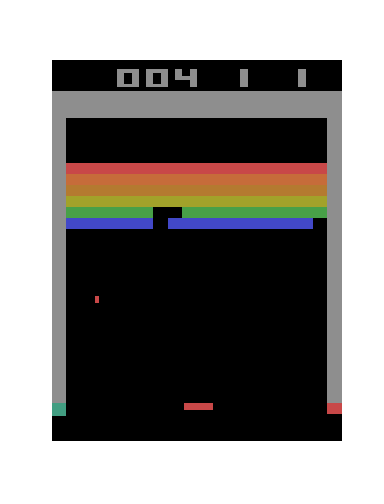
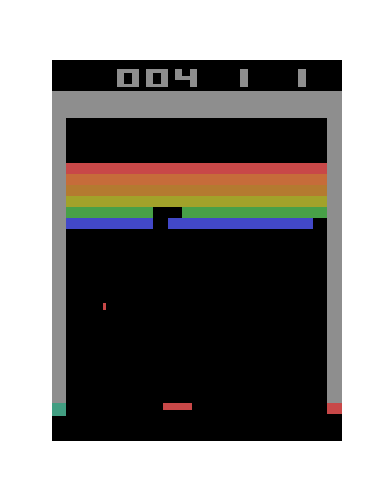
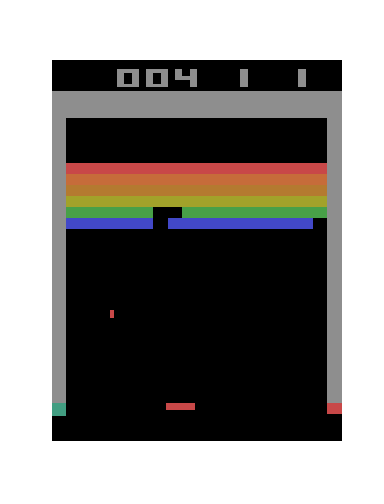
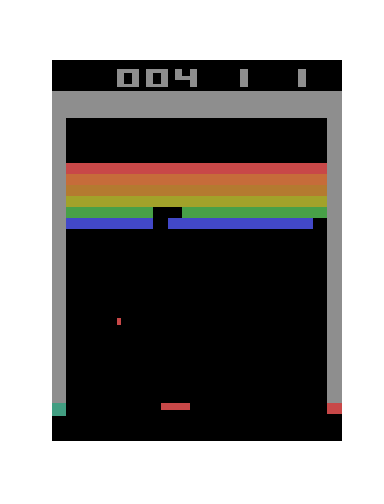
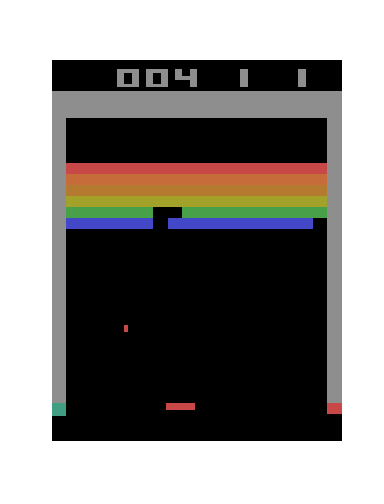
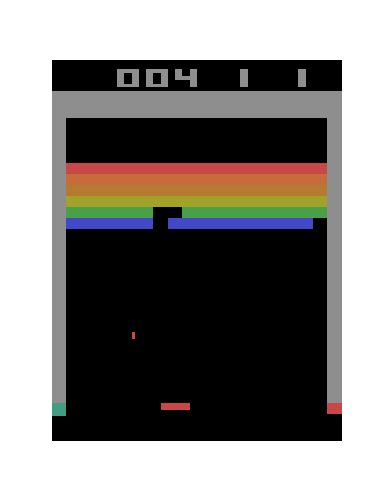
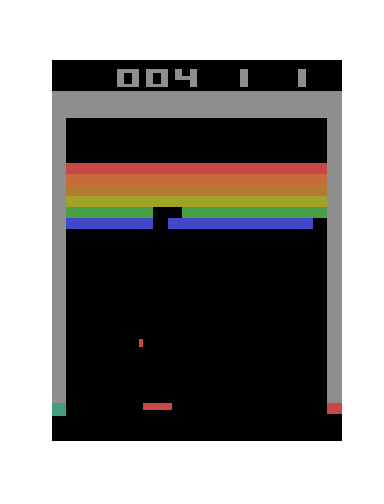
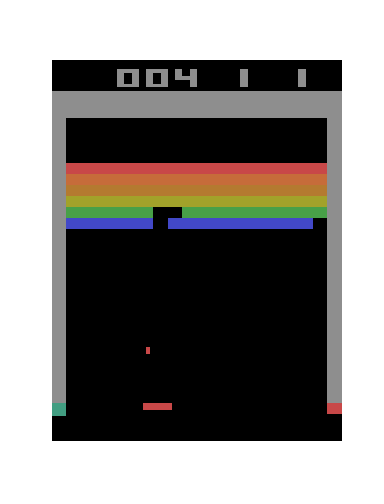
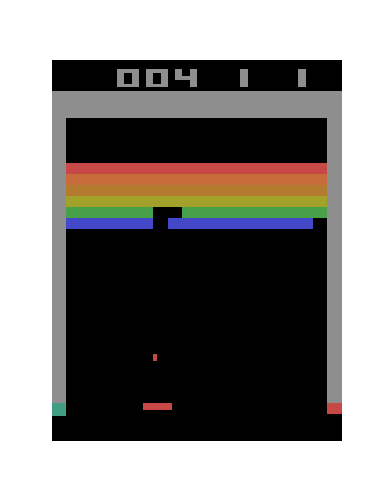
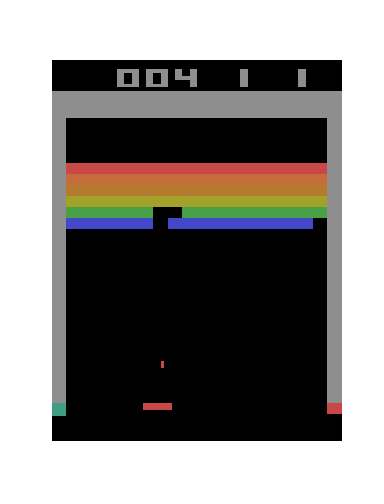
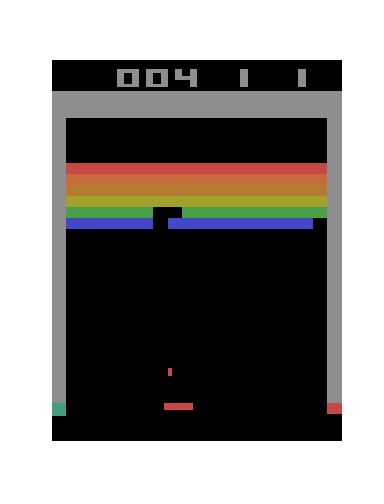
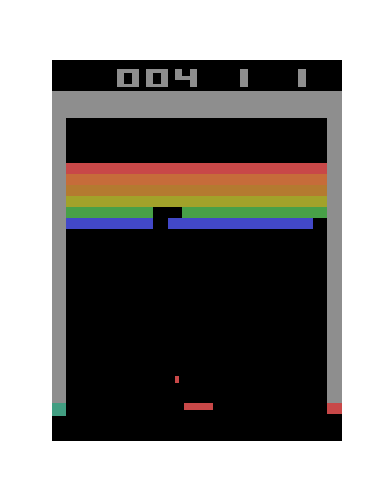
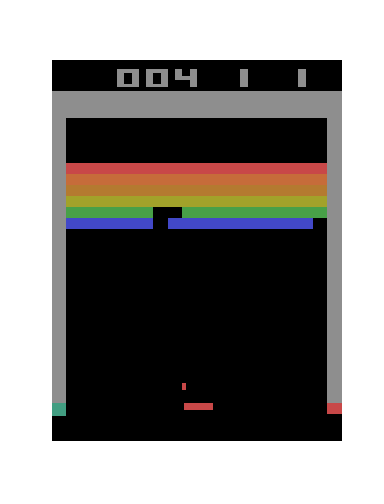
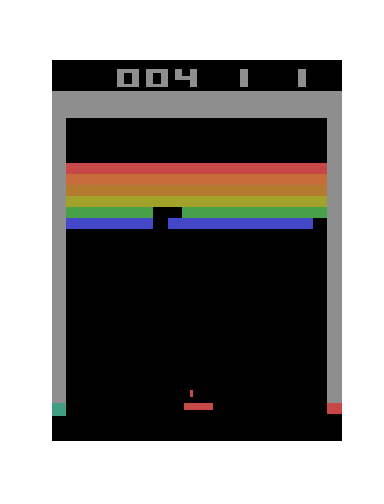
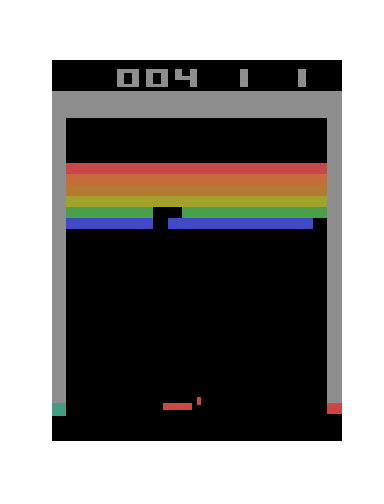
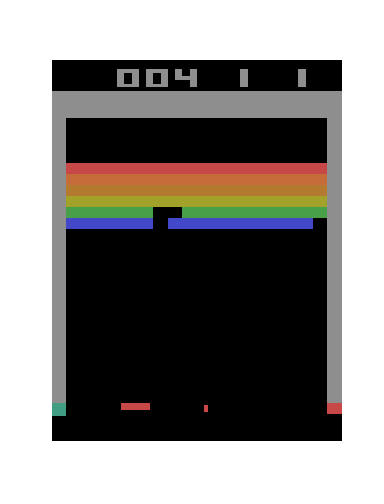
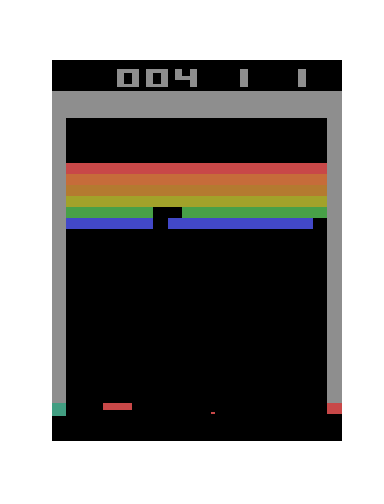
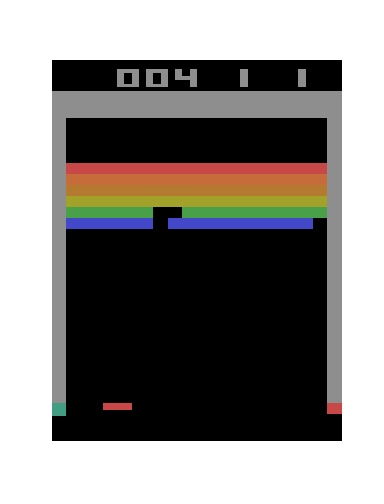
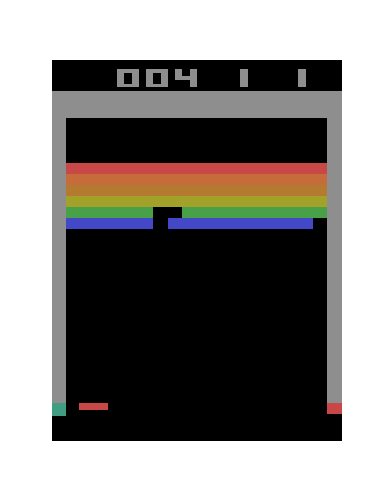
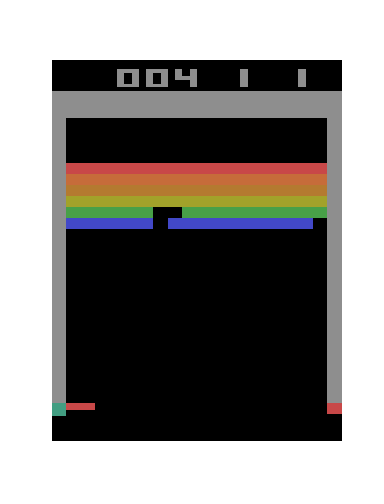
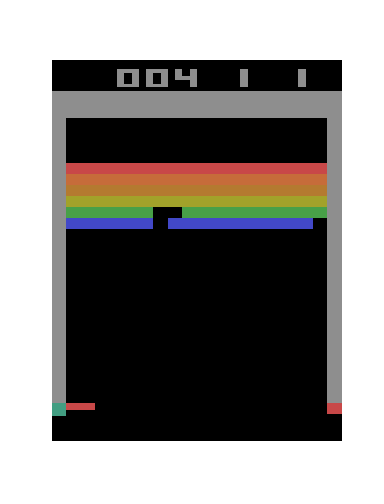
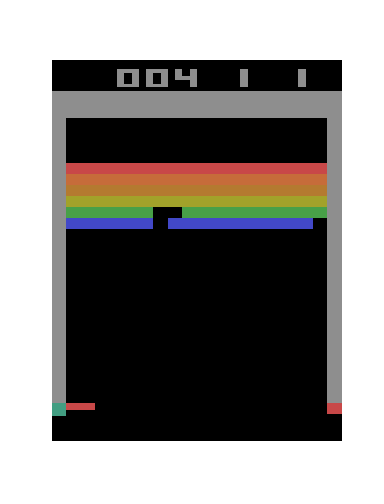
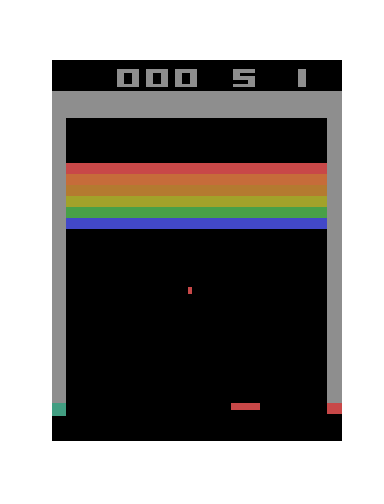
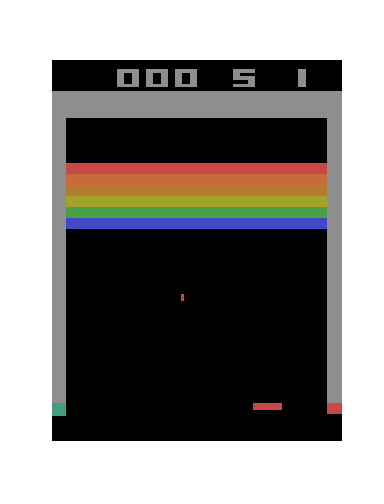
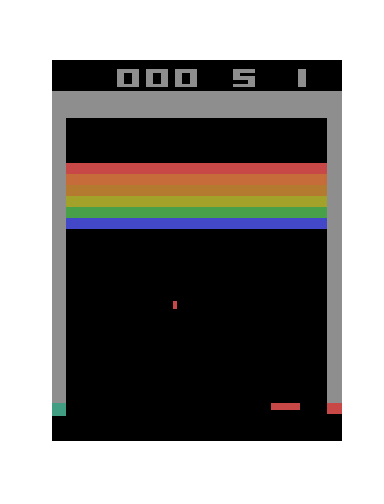
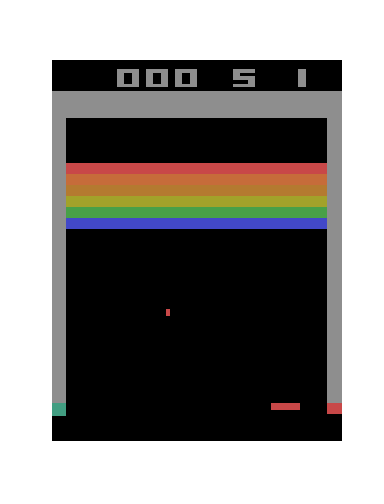
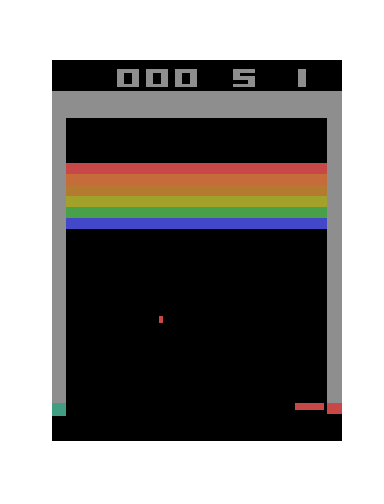
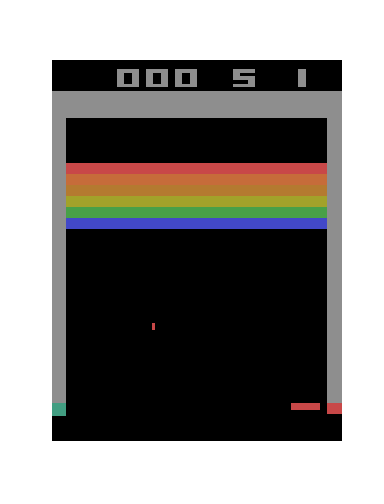
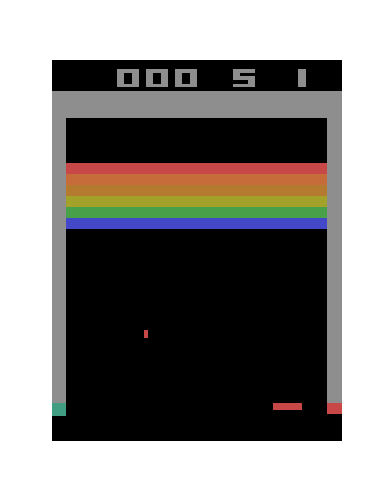
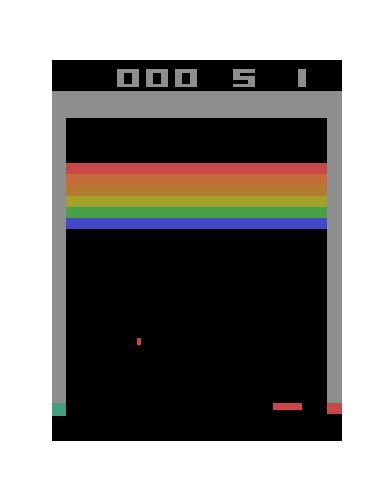
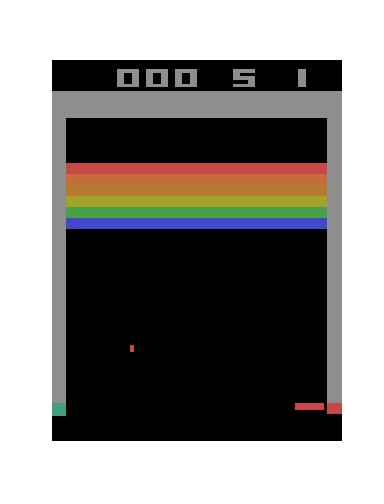
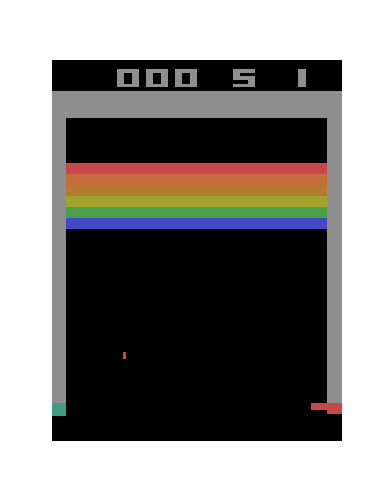
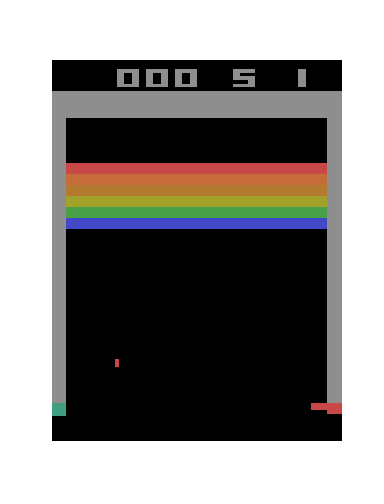
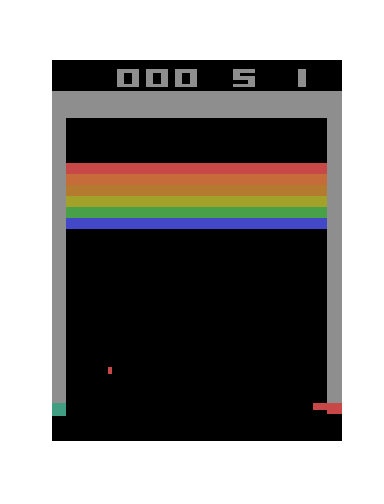
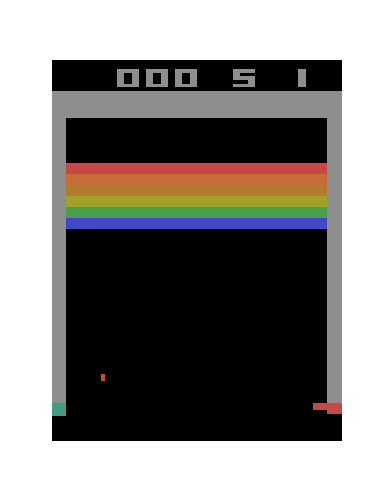
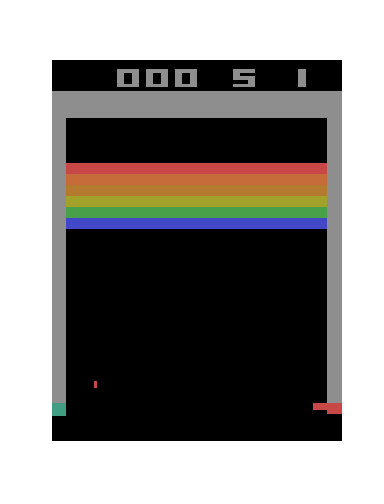
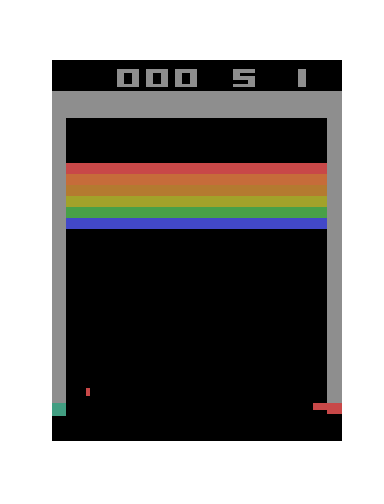
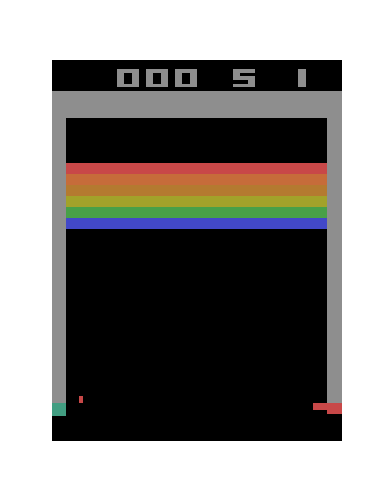
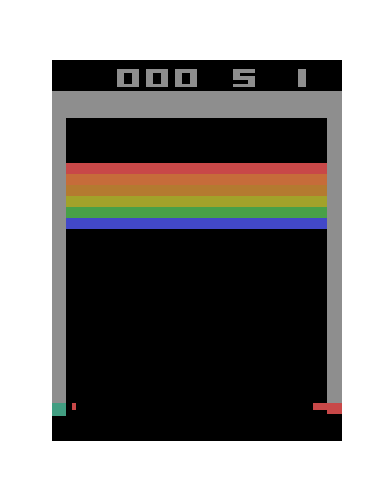
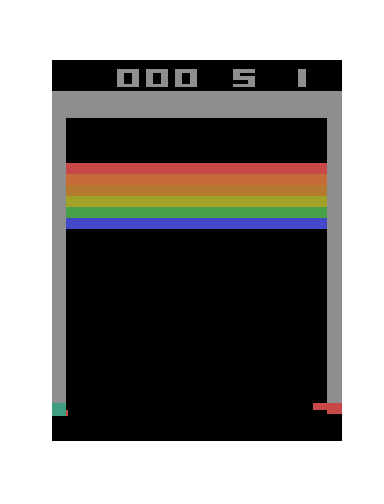
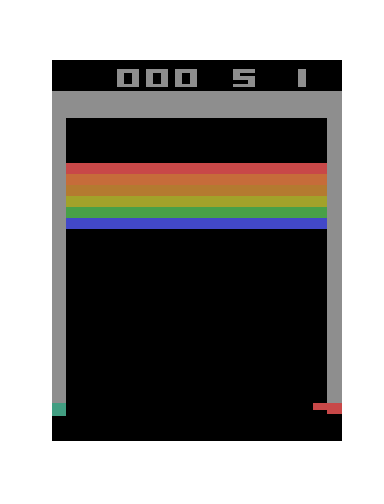
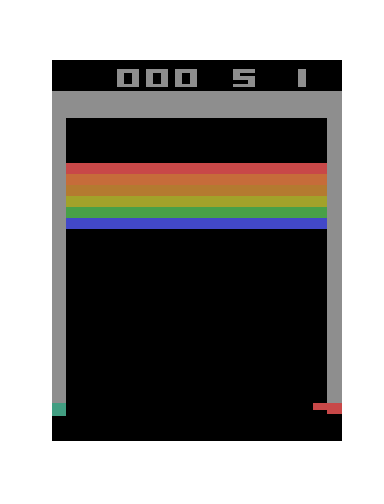
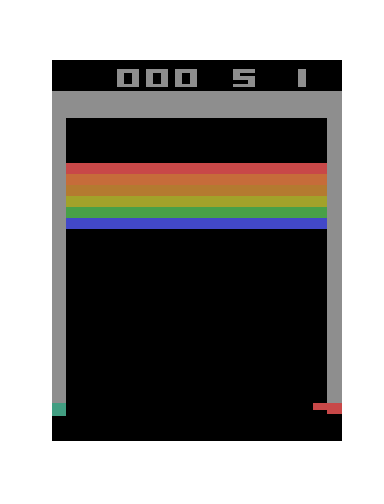
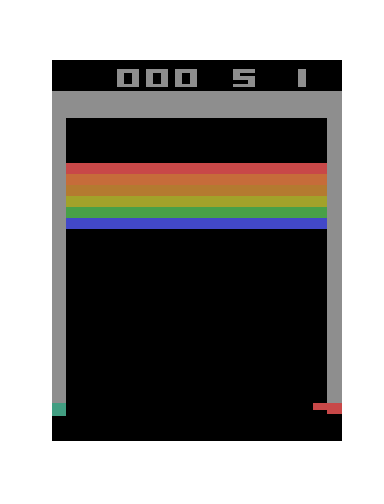
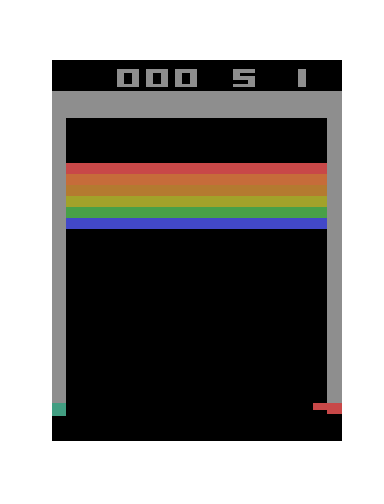
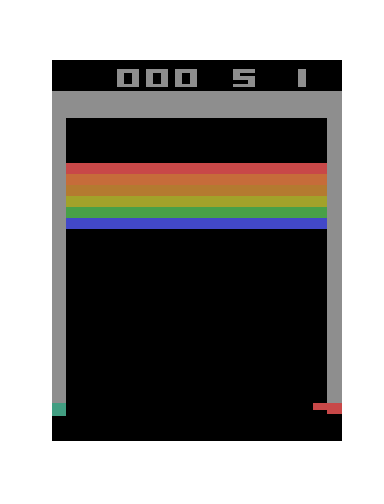
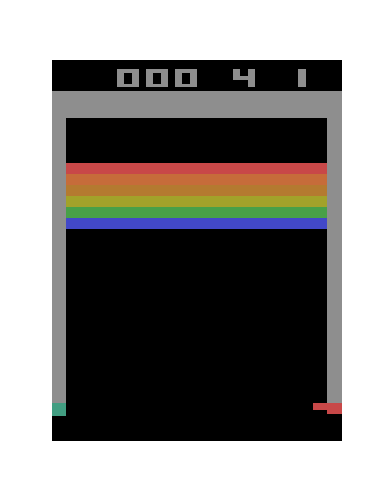
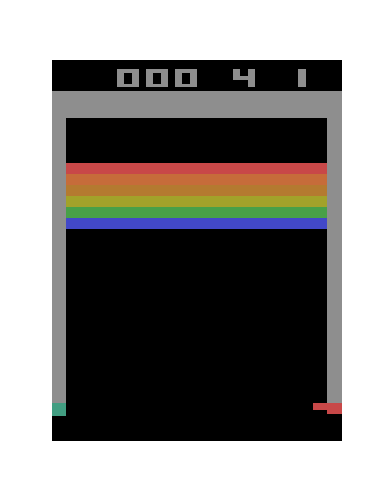
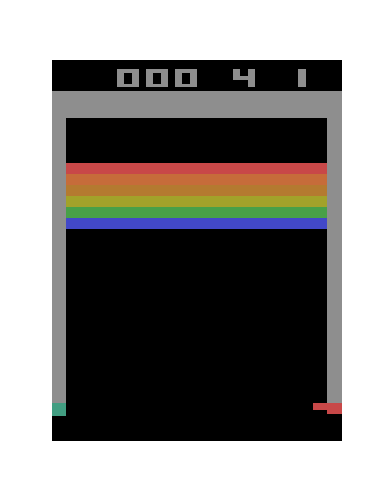
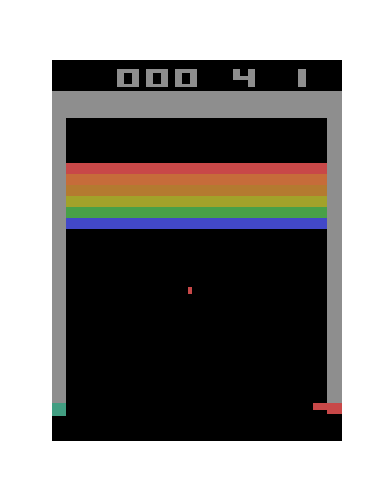
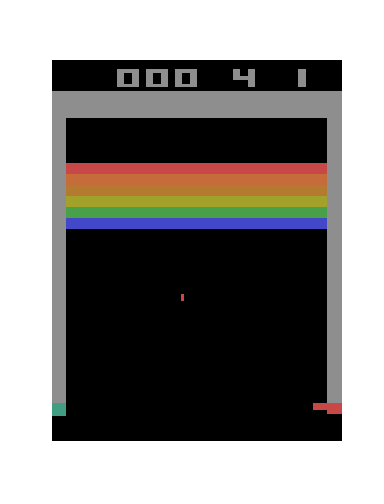
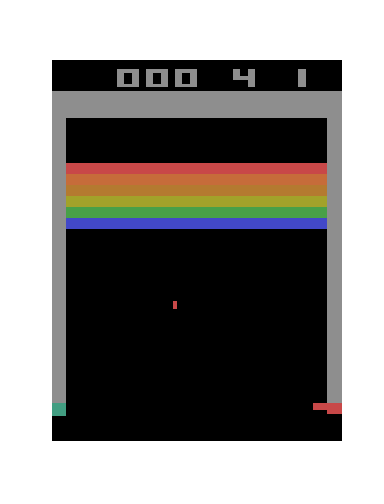
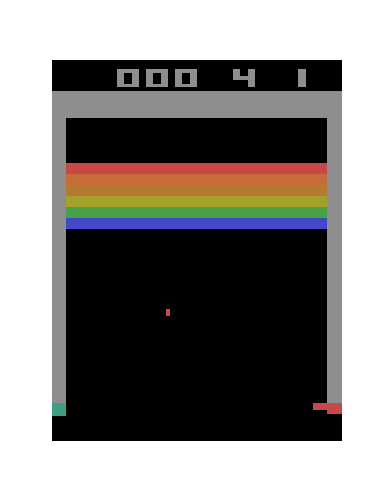
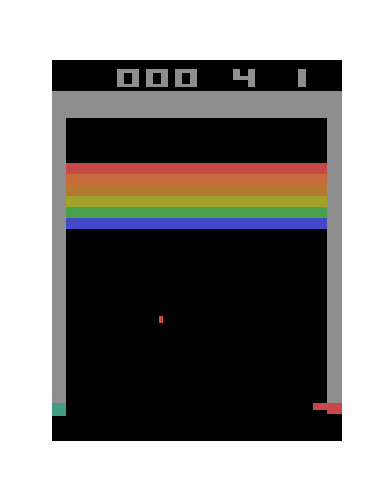
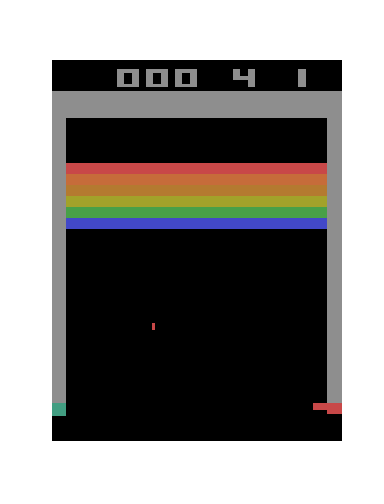
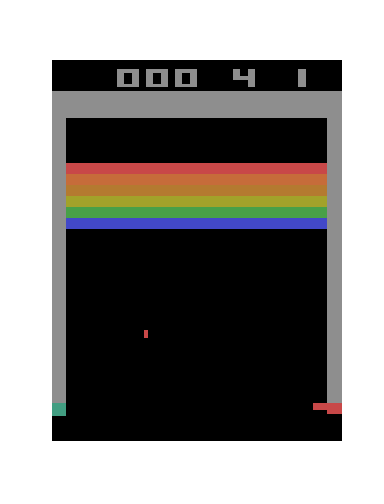
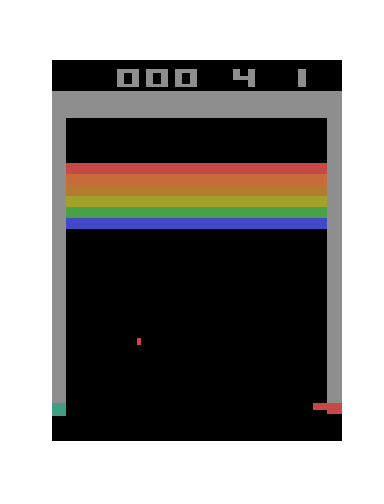
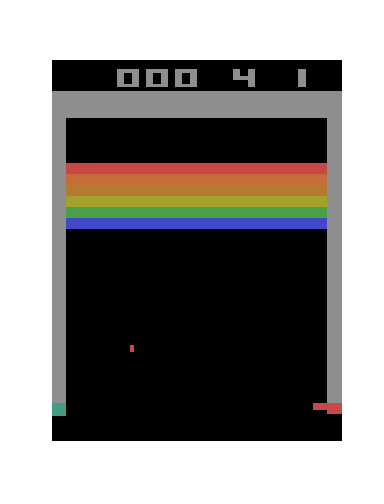
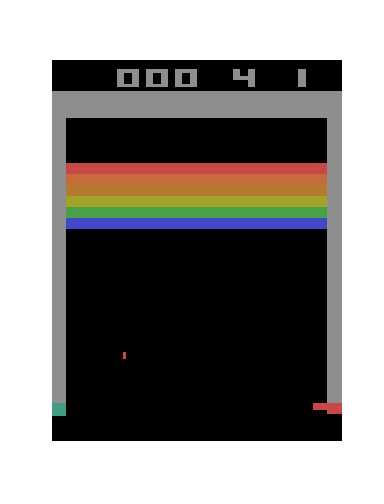
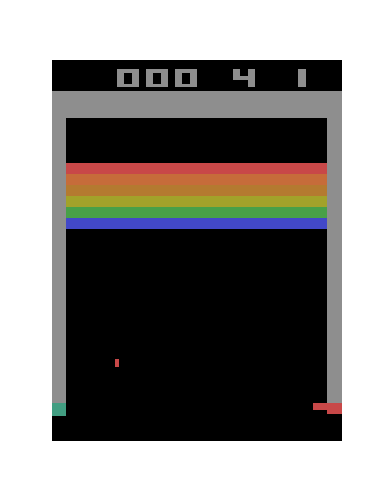
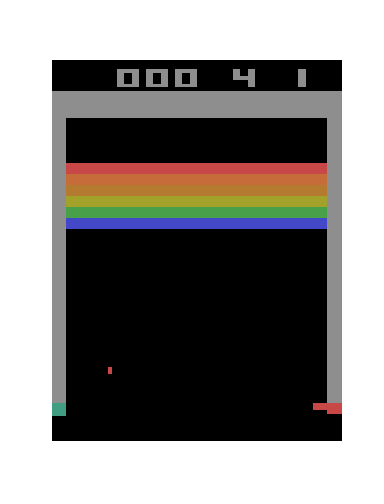
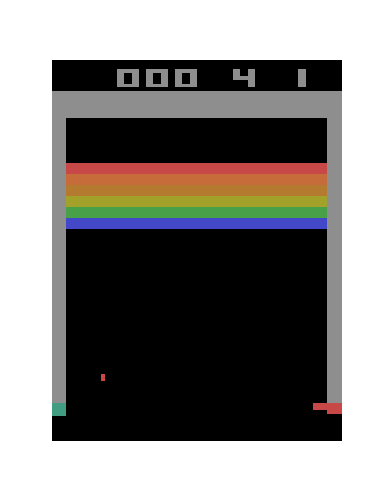
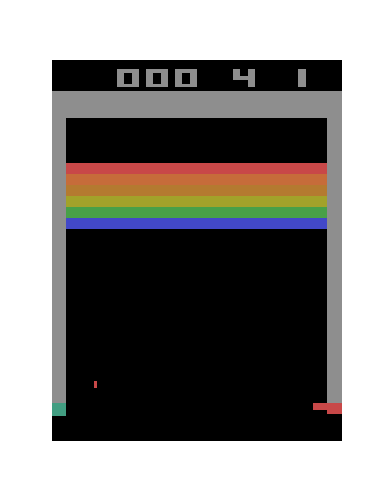
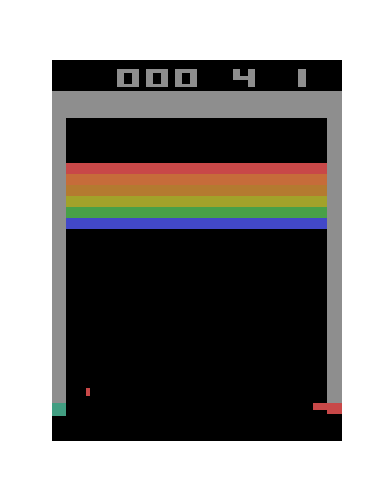
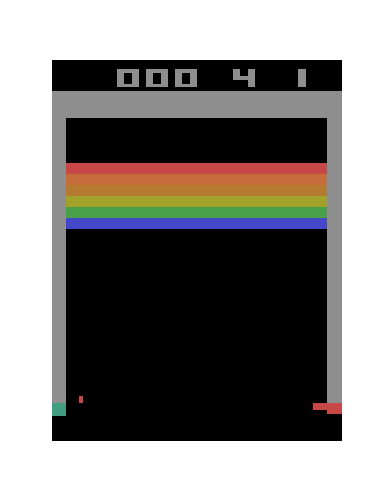
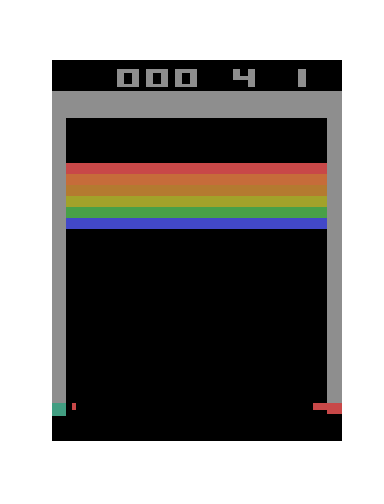
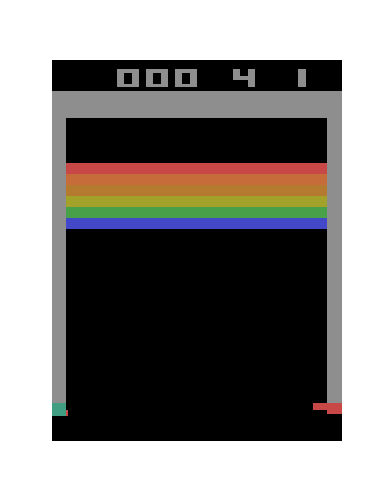
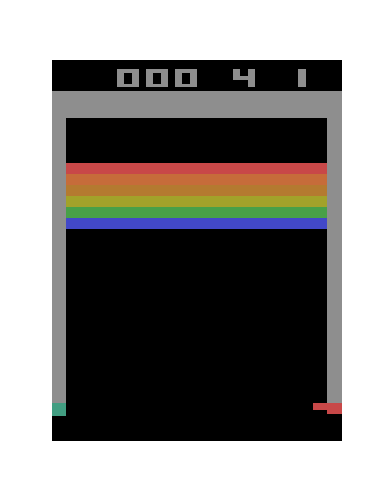
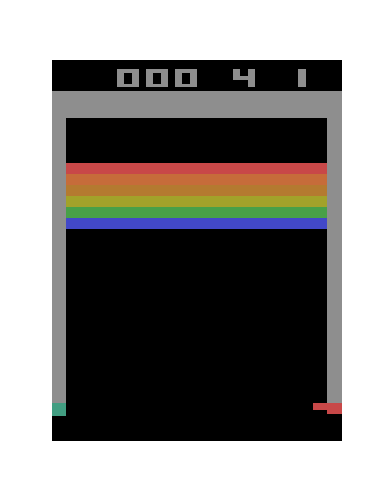
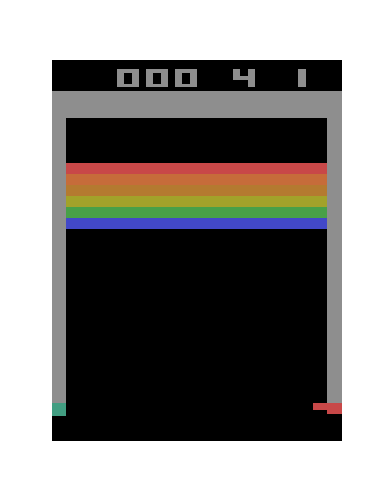
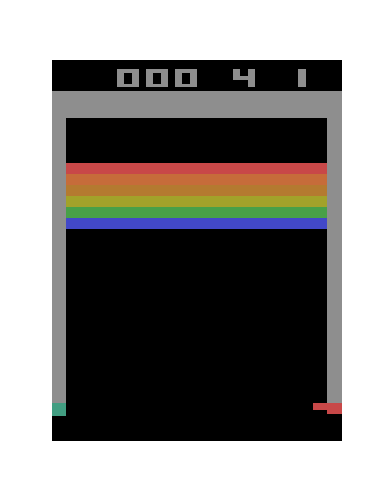
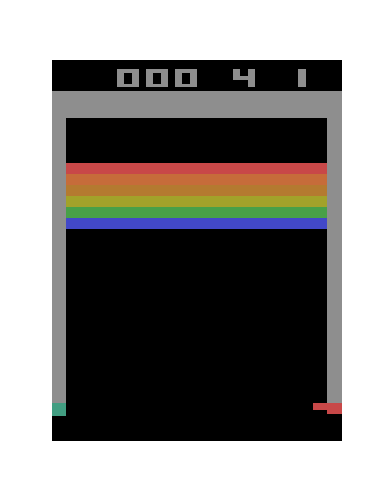
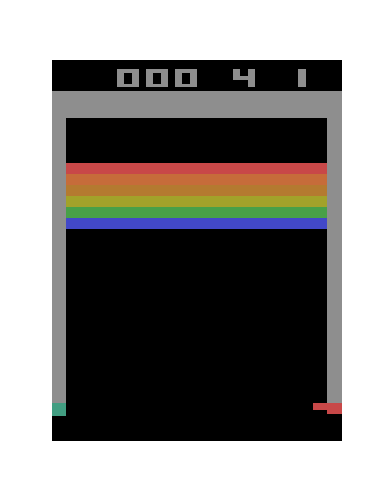
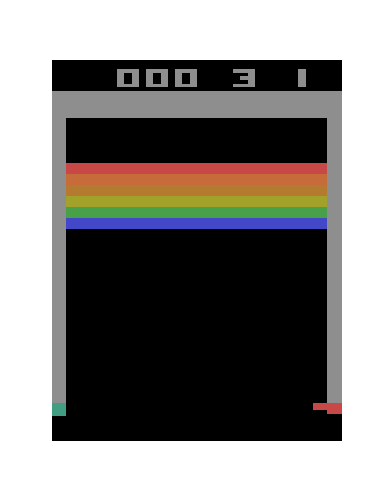
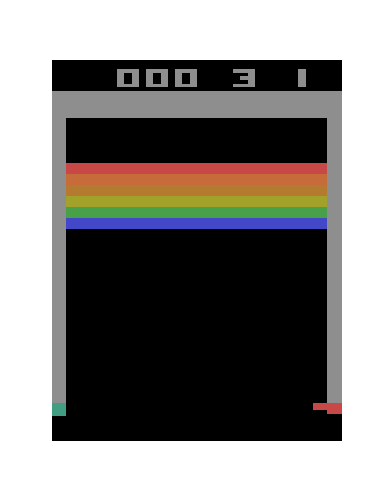
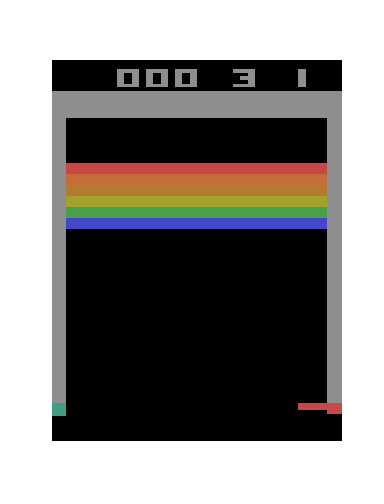
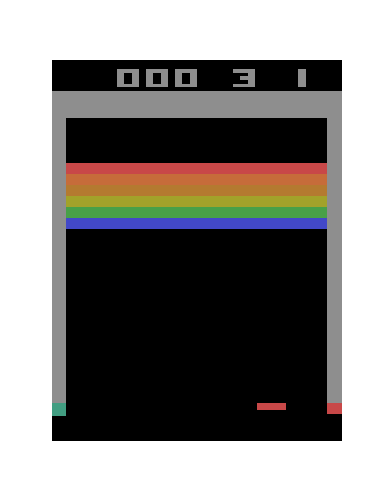
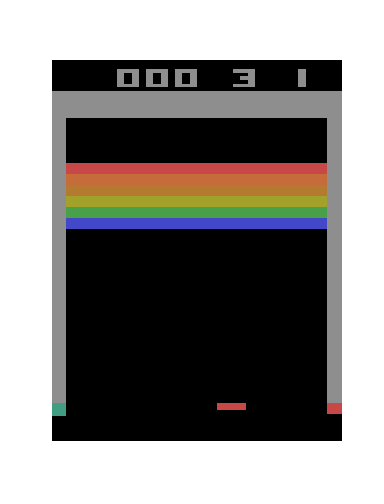
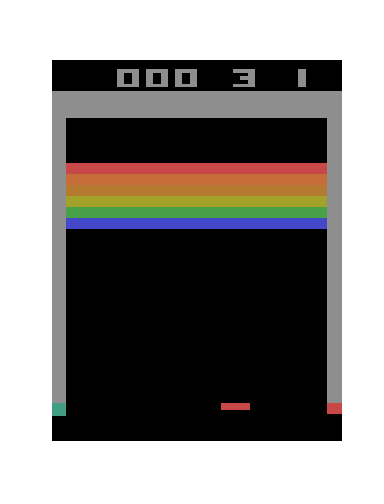
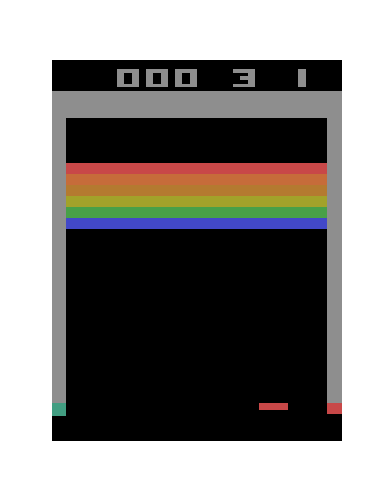
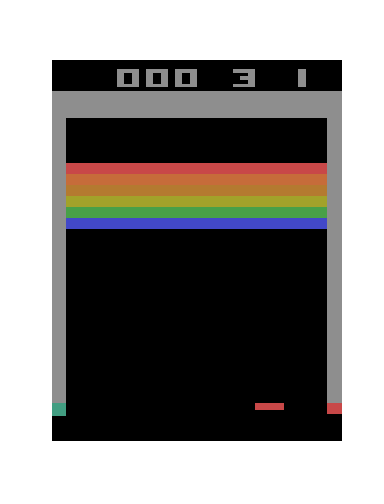
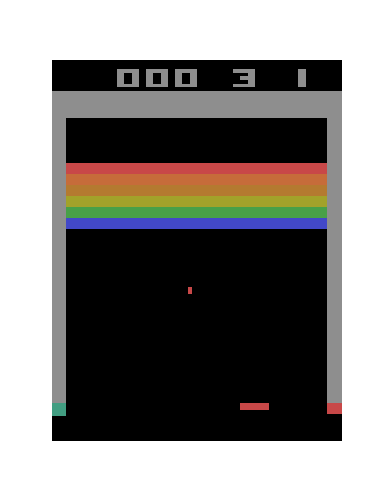
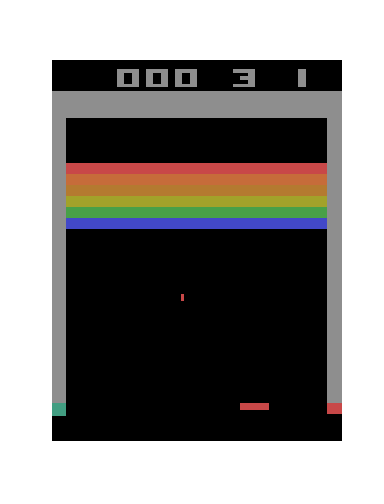
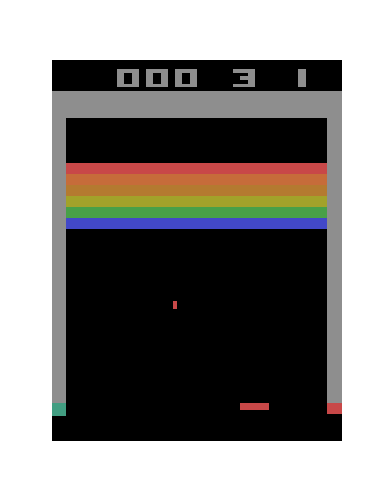
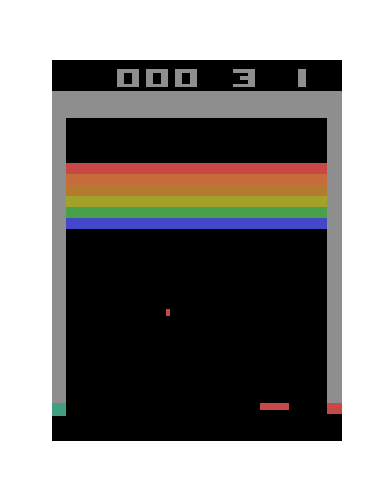
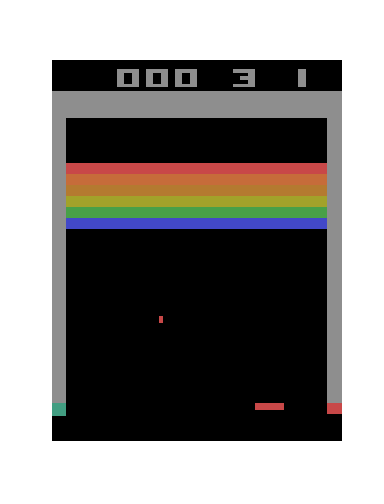
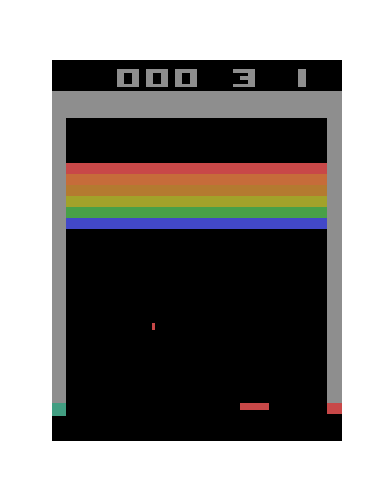
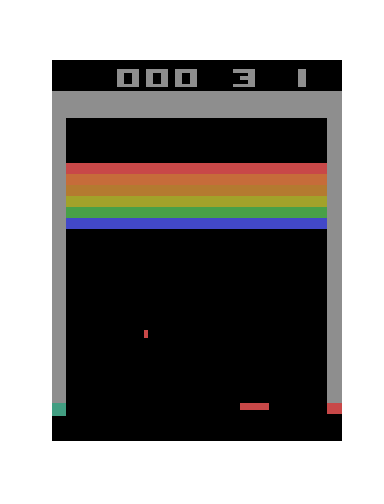
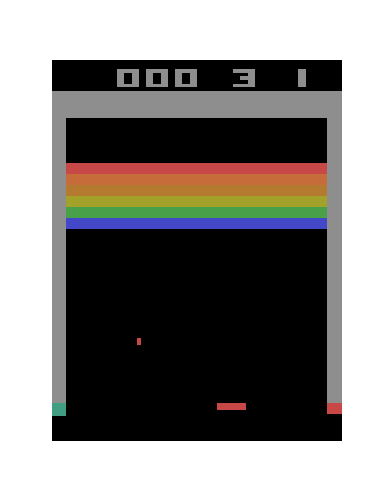
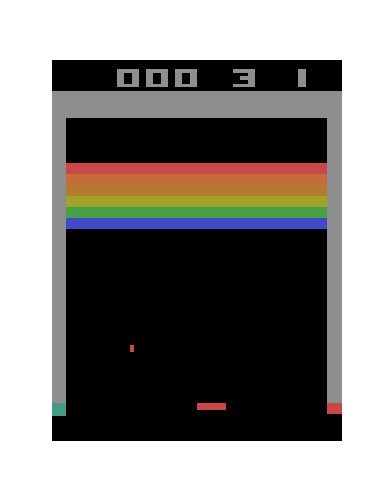
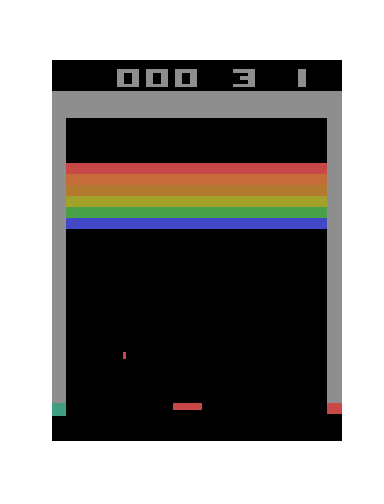
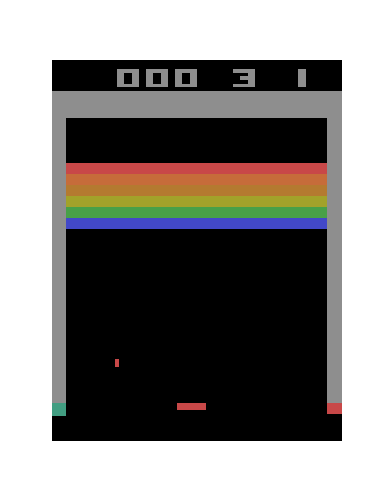
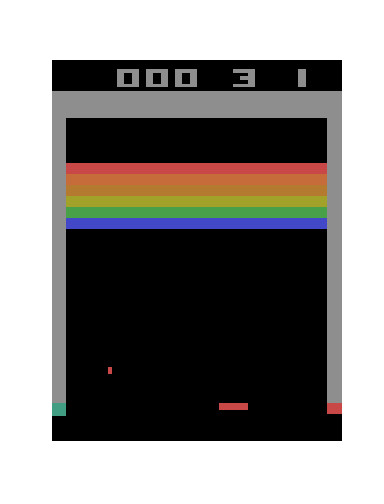
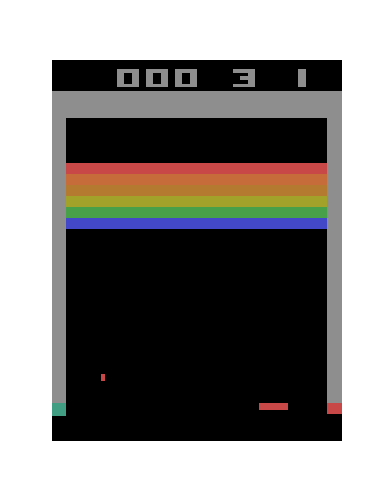
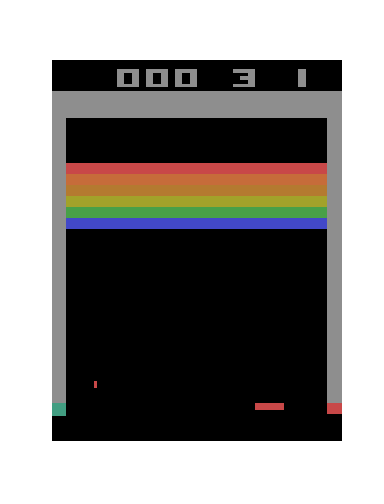
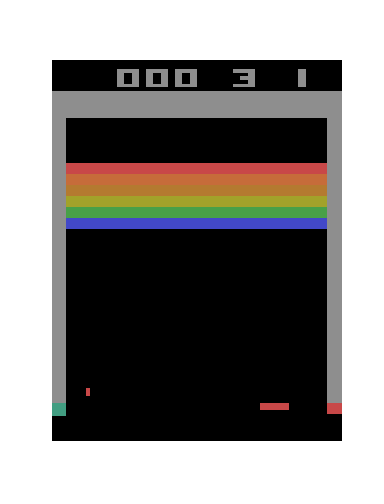
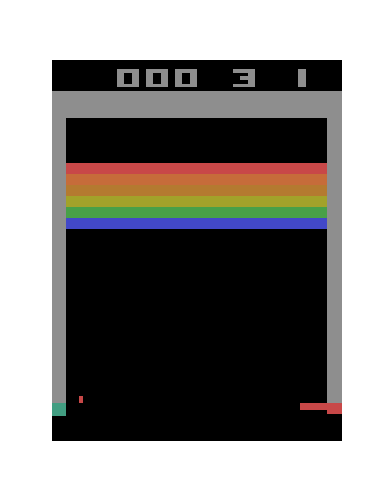
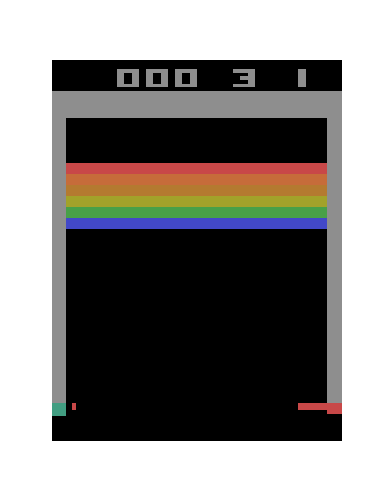
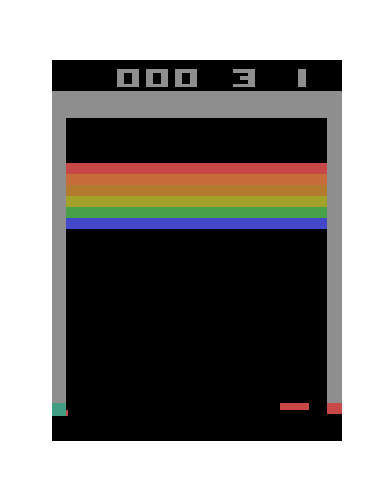
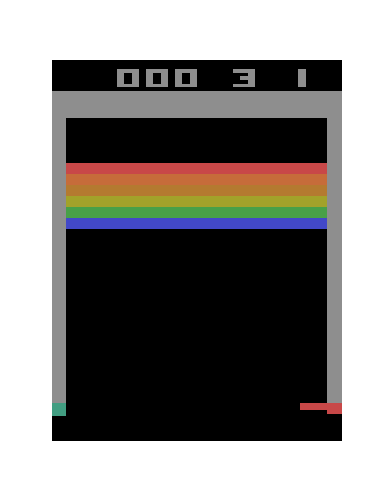
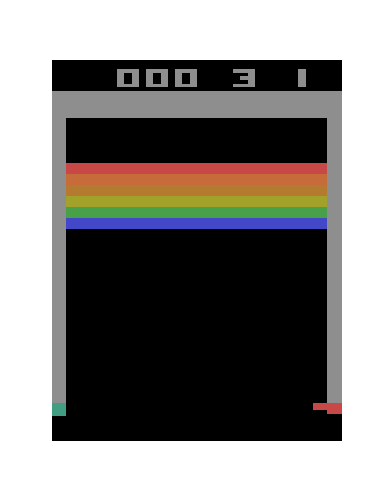
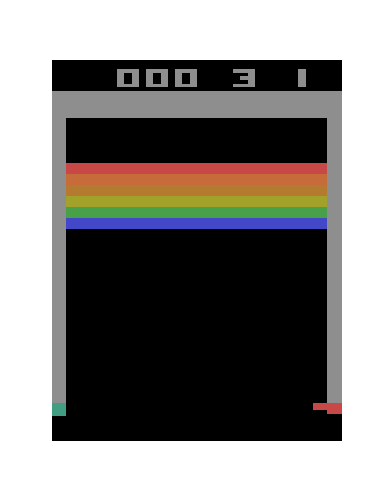
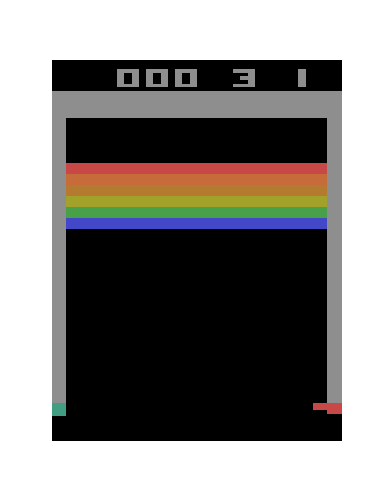
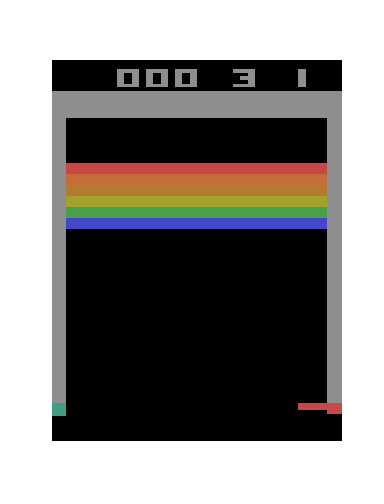
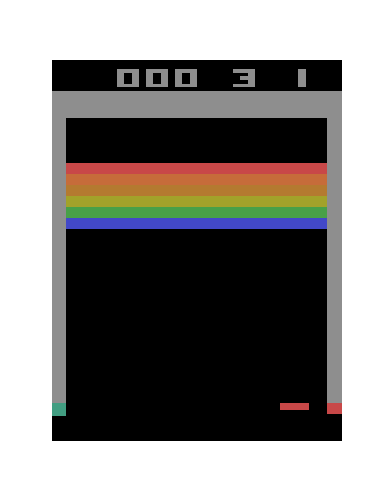
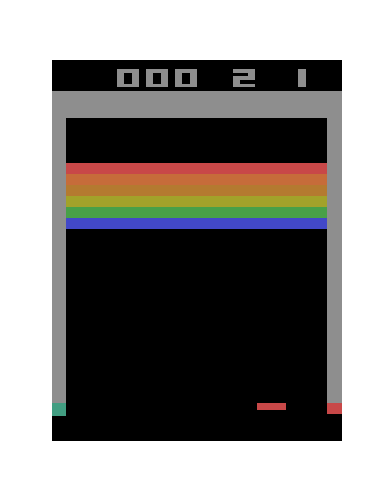
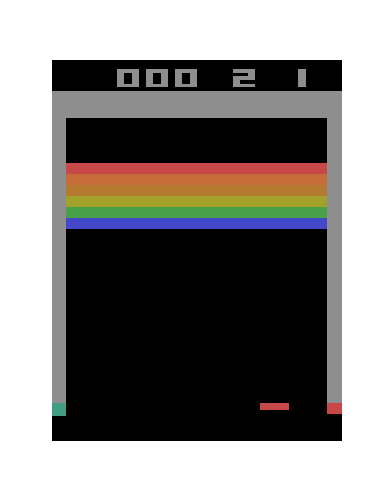
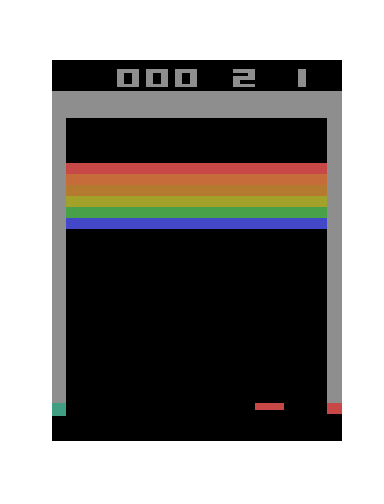
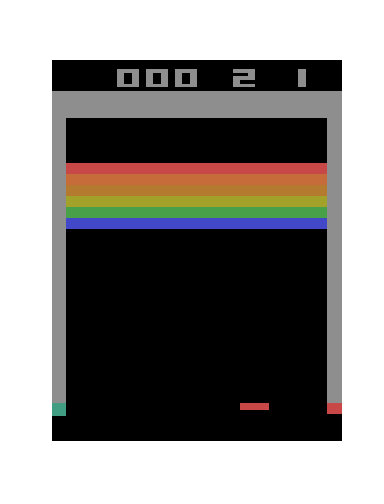
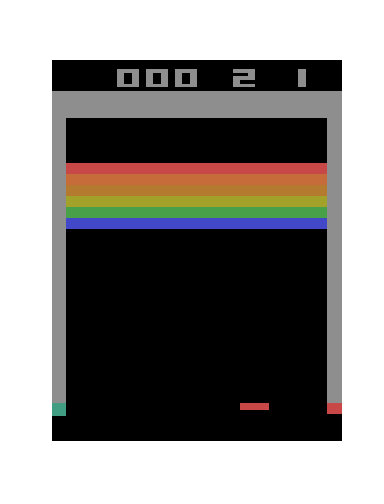
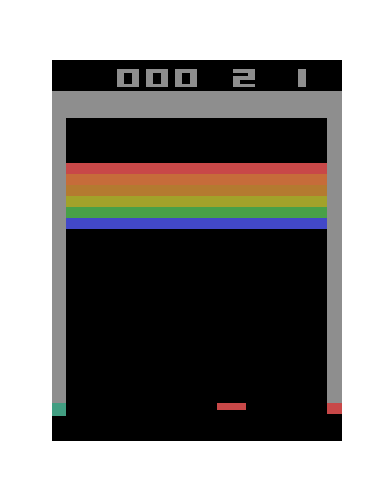
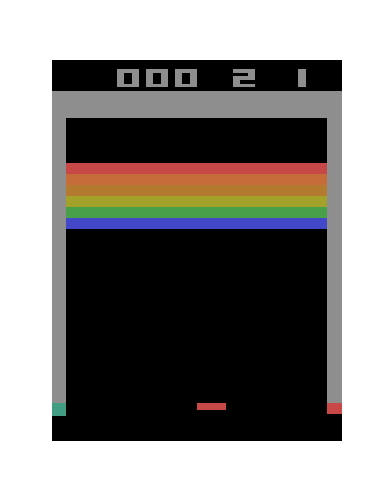
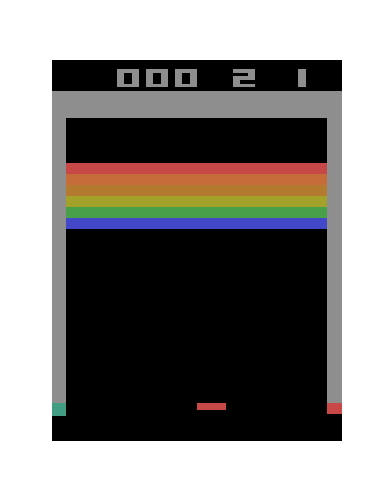
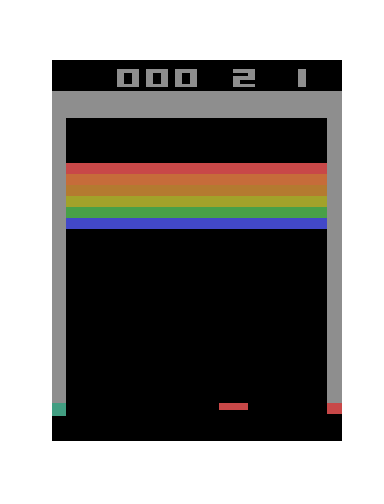
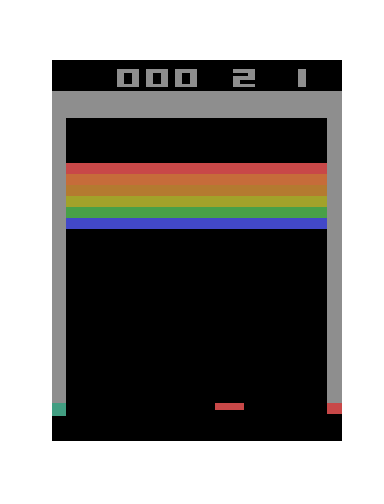
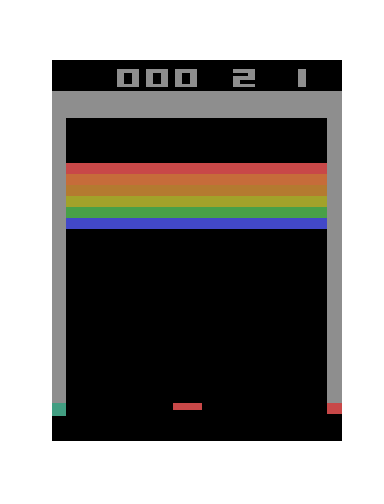
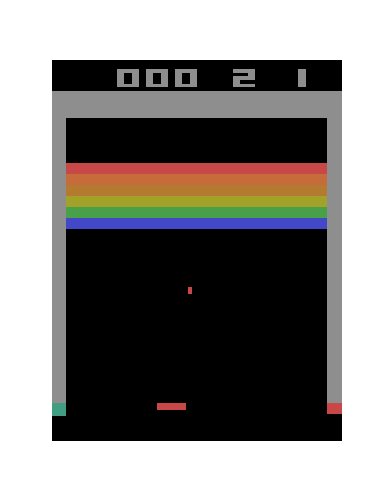
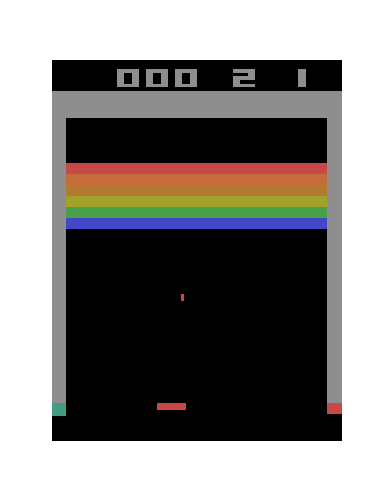
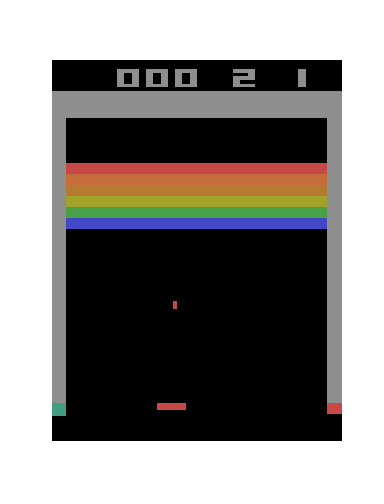
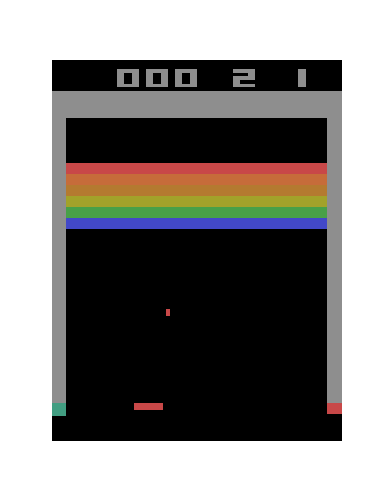
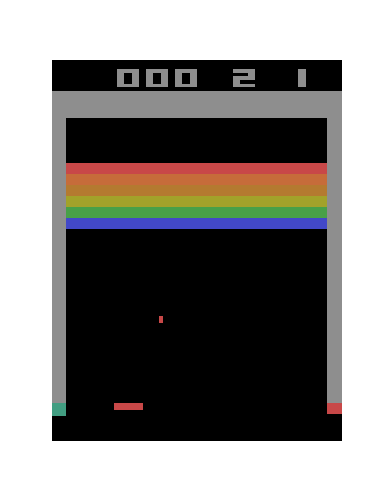
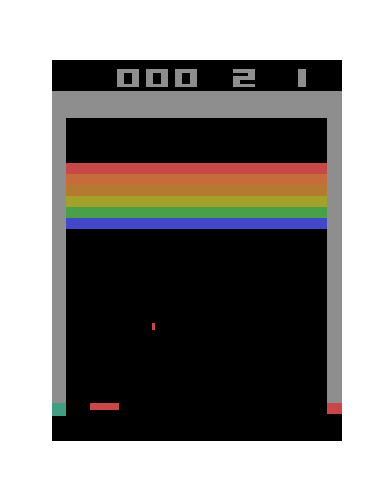
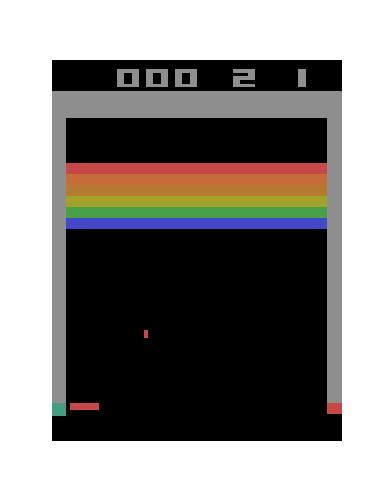
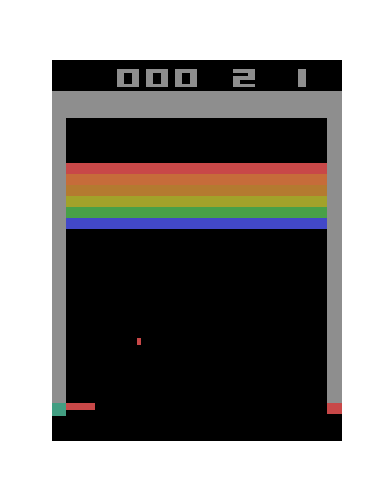
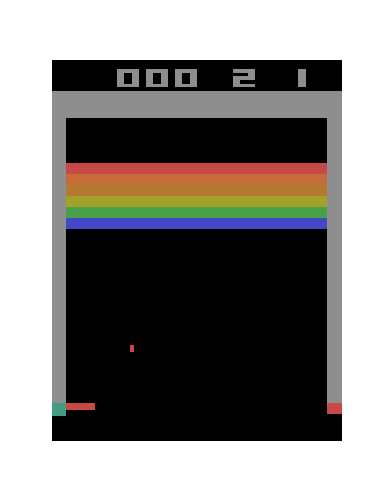
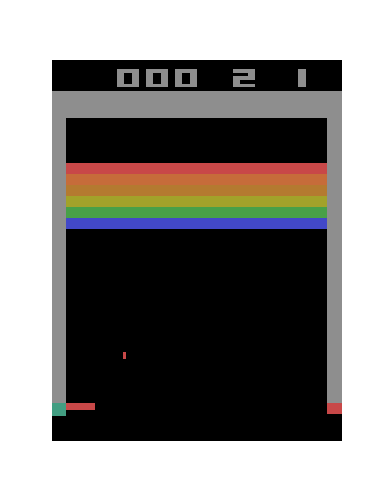
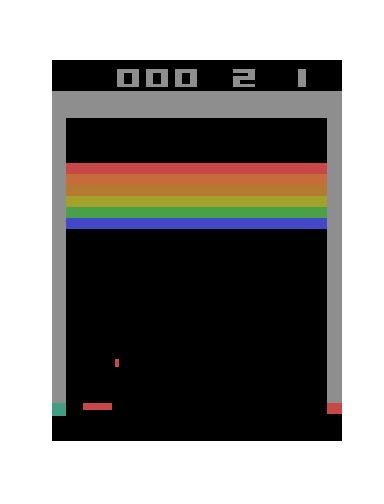
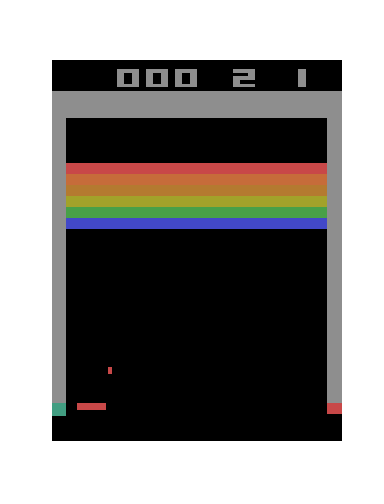
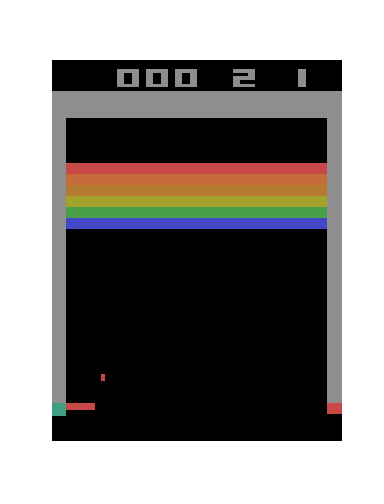
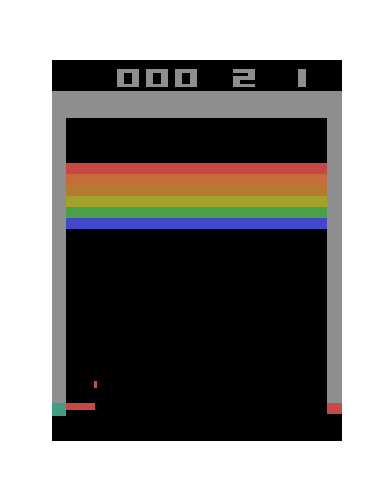
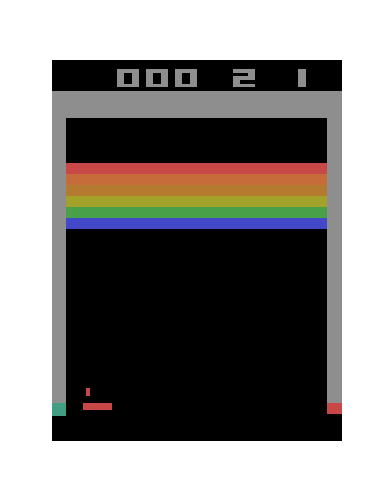
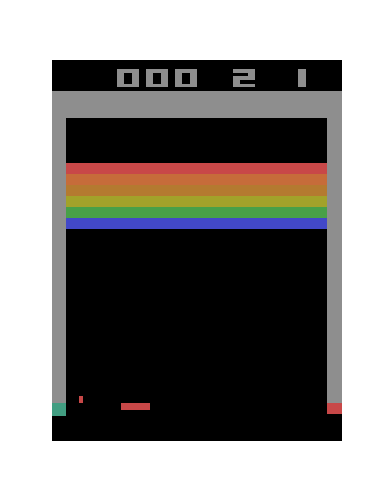
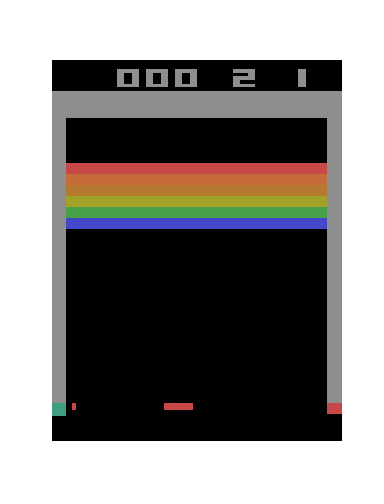
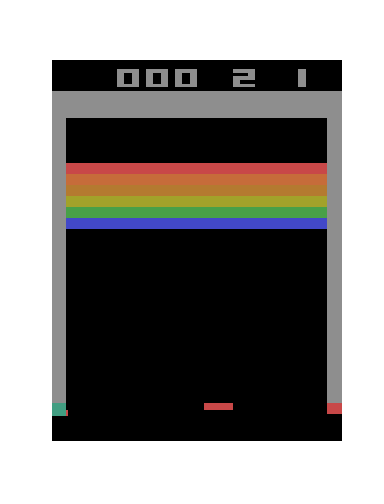
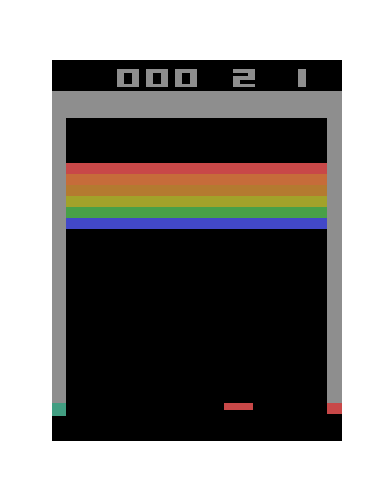
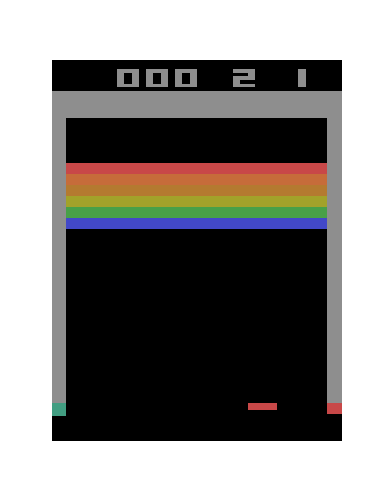
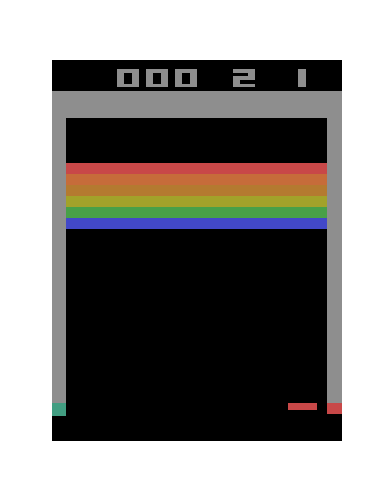
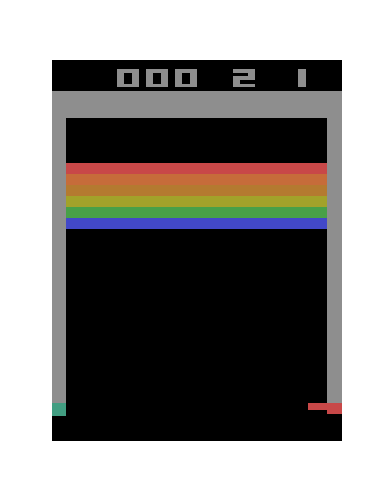
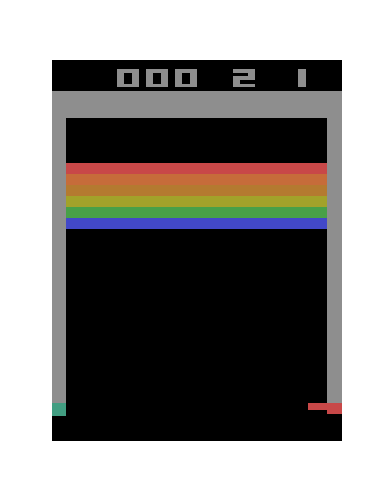
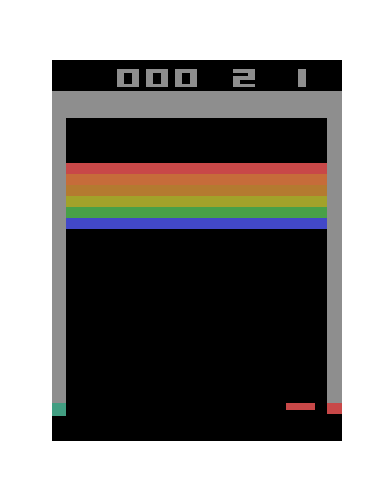
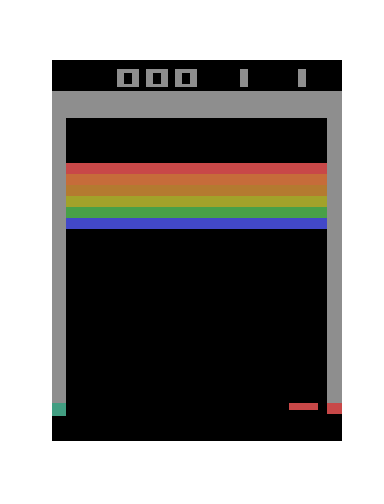
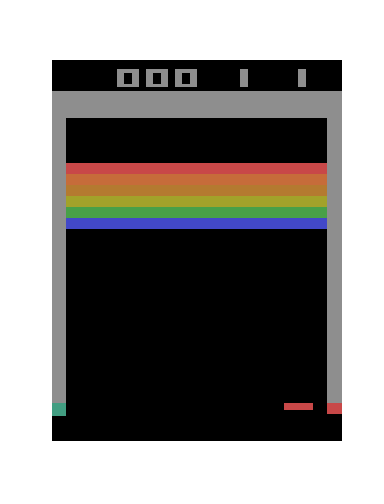
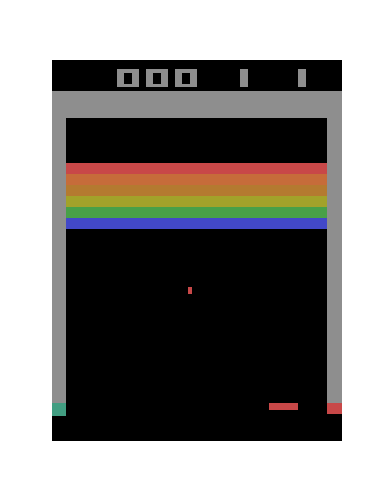
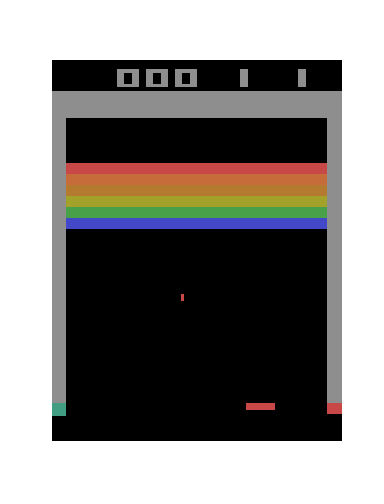
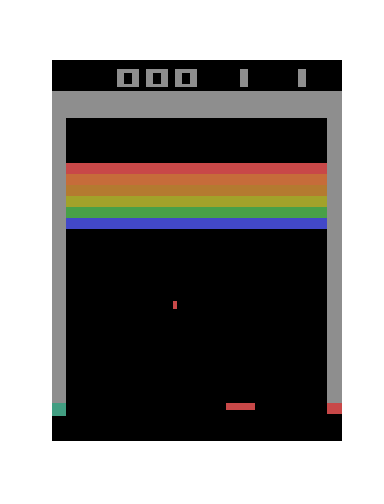
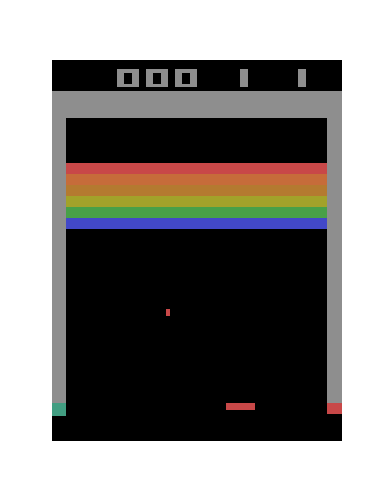
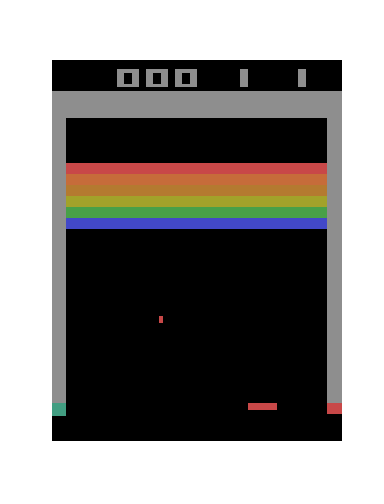
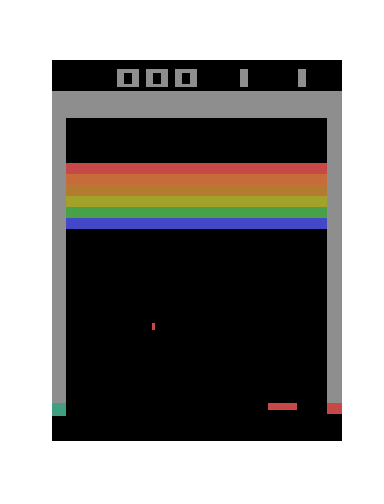
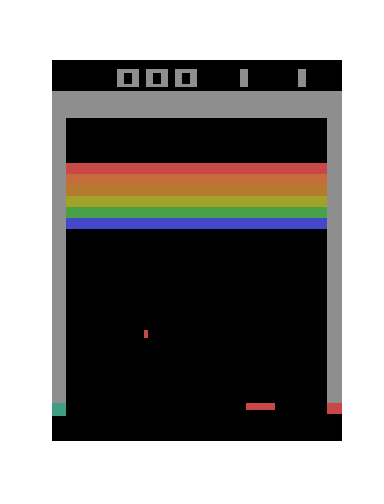
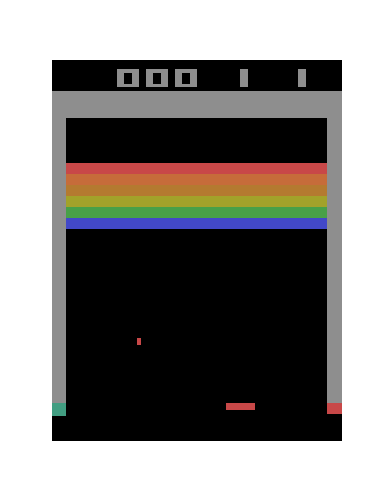
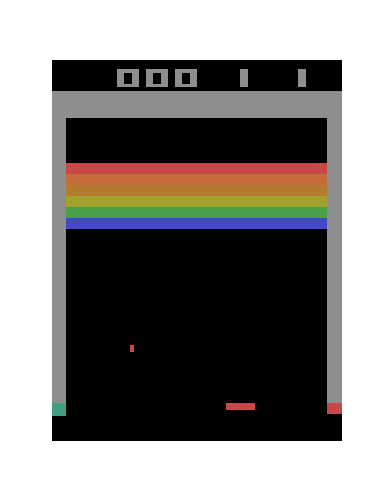
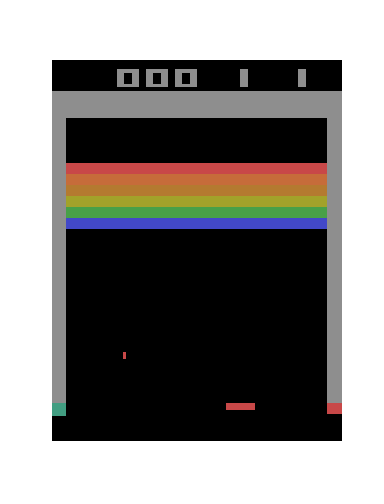
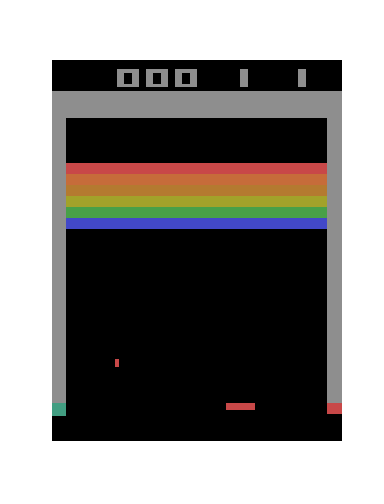
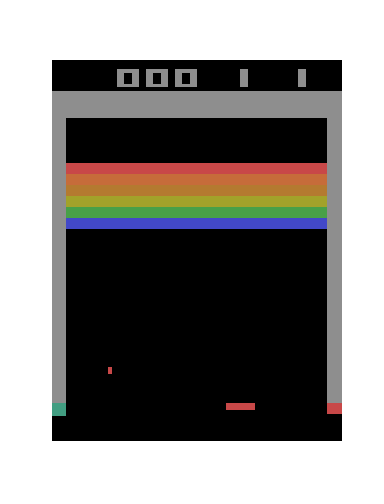
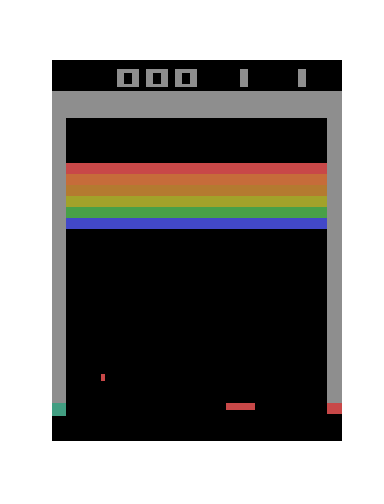
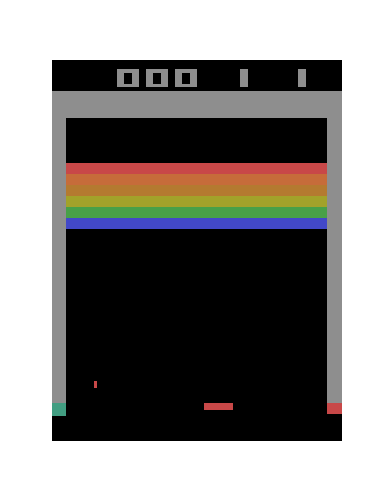
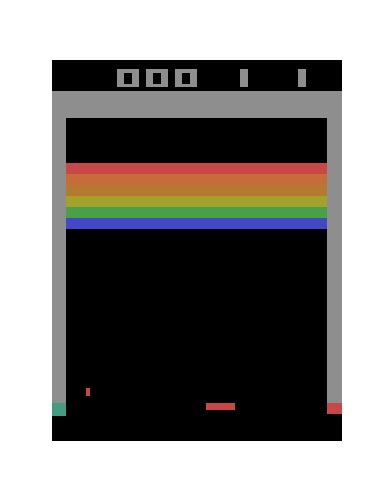
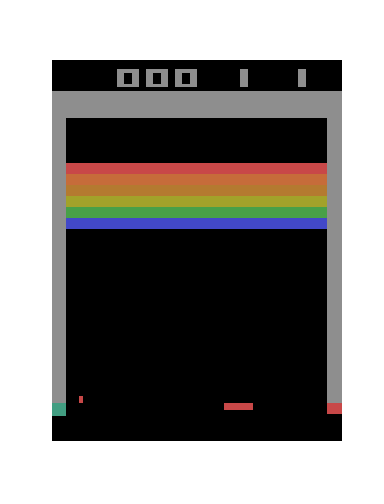
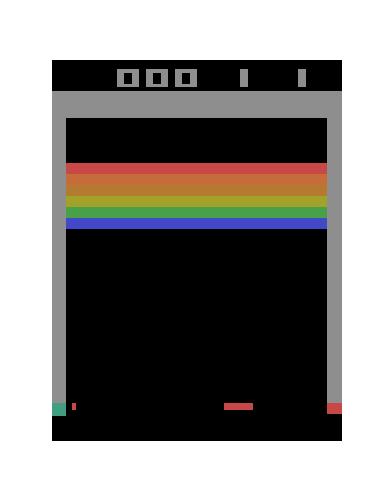
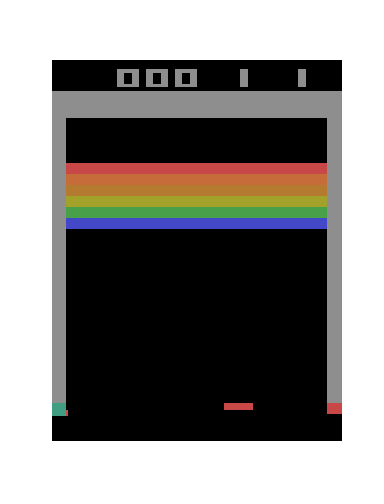
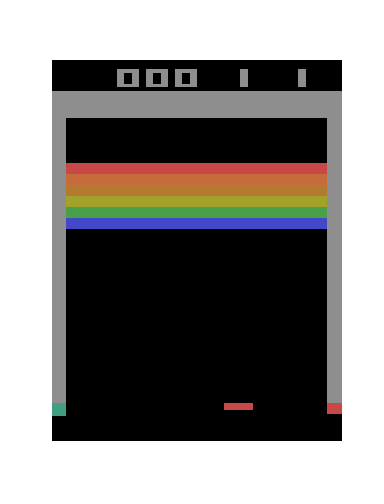
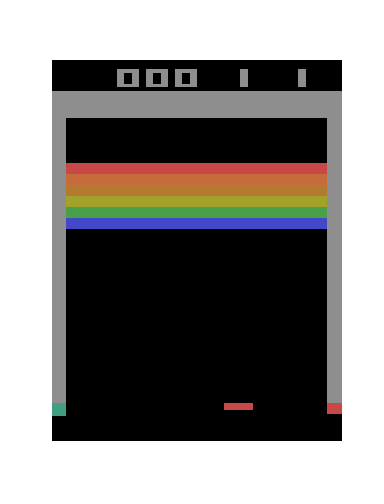
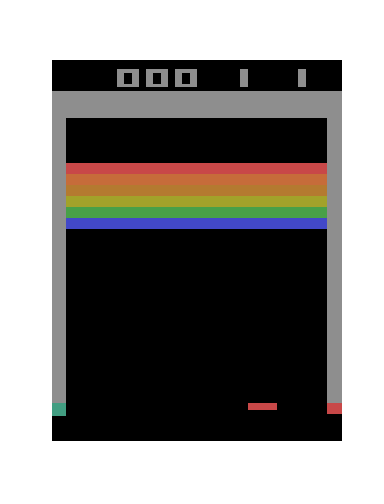
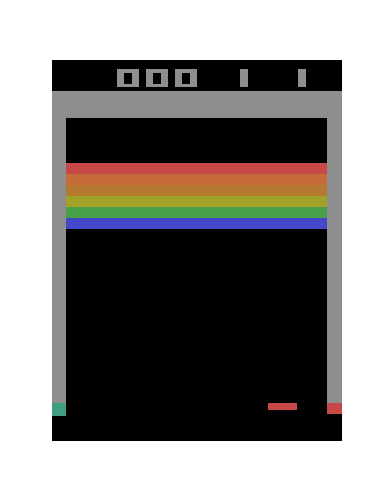
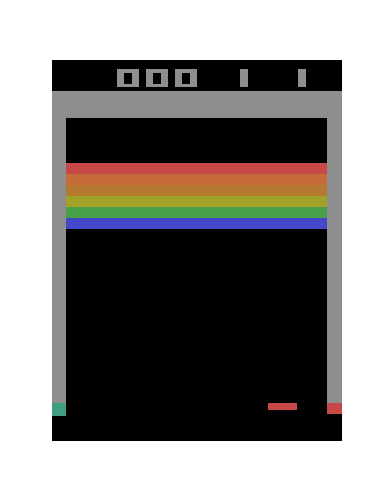
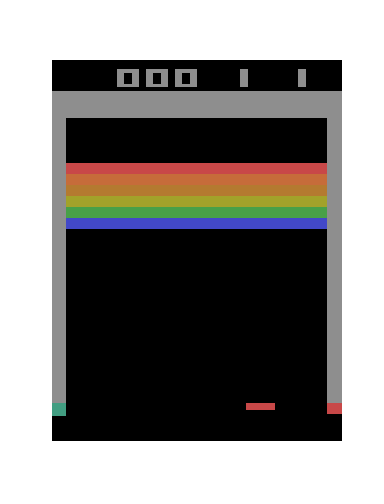

In [15]:
import logging as log
import time
import traceback
log.basicConfig(level=log.INFO)

episodes = 10
replay_start_step=1000
memory=deque(maxlen=10000)

try:
    global_step = 0
    frames=[]

    for episode in range(episodes):
        done = False
        dead = False

        score = 0
        step = 0
        start_life = 5

        start = time.time()

        env.reset()
        frame, _, _, _ = env.step(1)
        preprocessed_frame=preprocess(frame)
        state, stacked_frames = stack_frames(None, preprocessed_frame, is_new_episode=True)
        while not done:

            frame = env.render(mode = 'rgb_array')
            frames.append(frame)
            action = act(state, global_step)
            observation, reward, done, info = env.step(action)

            if start_life > info['ale.lives']:
                dead = True
                start_life = info['ale.lives']
            preprocessed_frame=preprocess(frame)

            next_state, stacked_frames = stack_frames(stacked_frames, preprocessed_frame,
                                                                        is_new_episode=False)
            remember(state, action, reward, next_state, dead)
            
            # If agent is dead, set the flag back to false, but keep the history unchanged,
            # to avoid to see the ball up in the sky
            if dead:
                dead = False
            else:
                state = next_state

            score += reward
            step += 1
            global_step += 1

            if getStatus() != STATUS.OBSERVING:
                train_replay(global_step)

            if done:
                end = time.time()

                print(
                    "state: %s episode: %s score: %.2f memory length: %.0f/%.0f epsilon: %.3f global_step:%.0f"
                    % (
                        getStatus().name, episode, score, len(memory),
                        memory.maxlen,
                        exploration_rate, global_step))
except Exception as e:
    print(e)
    traceback.print_exc()          

display_frames_as_gif(frames)
